In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
import seaborn as sns
import matplotlib.animation as animation
import matplotlib.colors as mcolors
from matplotlib.widgets import CheckButtons
# from mpl_toolkits.basemap import Basemap

%matplotlib inline

### Corona Virus Analysis

### Which Country had the most confirmed cases?

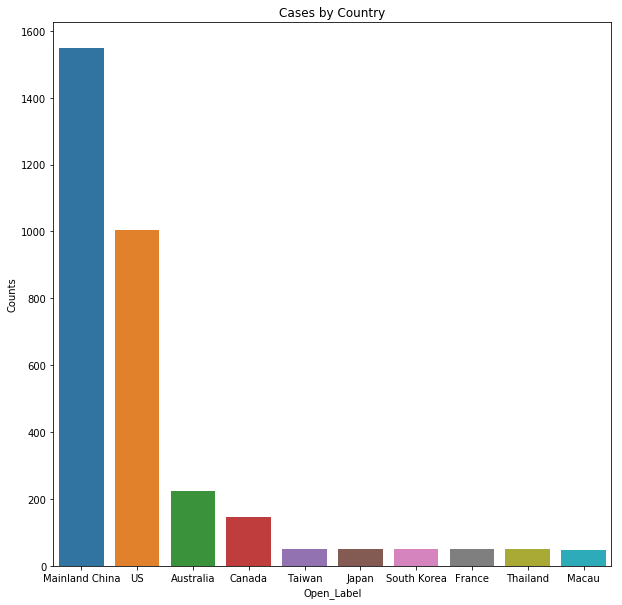

In [2]:
df_1=pd.read_csv('covid_19_data.csv')
x=list(df_1["Country/Region"].value_counts().to_dict().keys())[:10]
y=list(df_1["Country/Region"].value_counts().to_dict().values())[:10]
ax=sns.barplot(x=x,y=y)
ax.set_xlabel("Open_Label")
ax.set_ylabel("Counts")
ax.set_title("Cases by Country")
fig=plt.gcf()
fig.set_figheight(10)
fig.set_figwidth(10)

## So China-Clearly, so lets study china in more detail?

Text(0.5,1,'Cases in China Provinces')

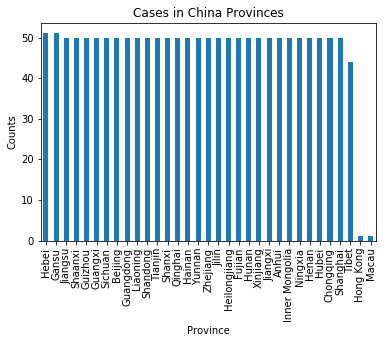

In [3]:
df_1[(df_1['Country/Region']=='Mainland China')]["Province/State"].value_counts().plot(kind="bar")
ax=plt.gca()
ax.set_xlabel("Province")
ax.set_ylabel("Counts")
ax.set_title("Cases in China Provinces")

In [4]:
df_2=pd.read_csv("COVID19_line_list_data.csv")

Text(0.5,1,'Cases in China by Age')

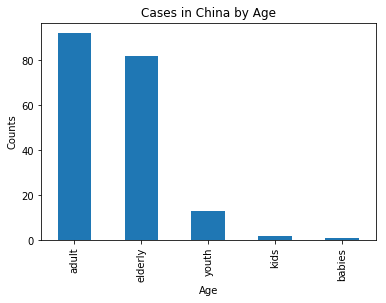

In [5]:
pd.cut(df_2[(df_2['country']=='China')]["age"].astype("float32"), bins=[0.25, 2, 10, 25,50,100],include_lowest=True,labels=["babies","kids","youth","adult","elderly"]).value_counts().plot(kind="bar")
ax=plt.gca()
ax.set_xlabel("Age")
ax.set_ylabel("Counts")
ax.set_title("Cases in China by Age")

Text(0.5,1,'Cases in China by Gender')

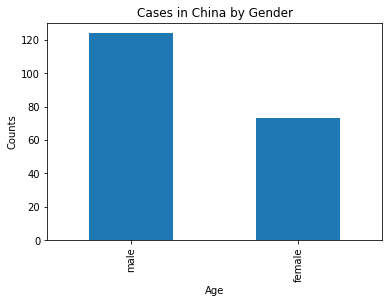

In [6]:
df_2[(df_2["country"]=="China")]["gender"].value_counts().plot(kind="bar")
ax=plt.gca()
ax.set_xlabel("Age")
ax.set_ylabel("Counts")
ax.set_title("Cases in China by Gender")

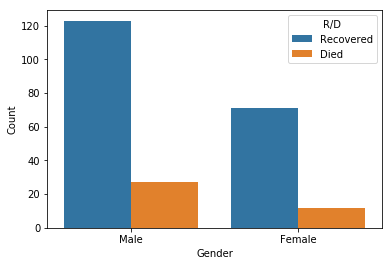

In [7]:
males_number_died=df_2[(df_2['country']=='China') & (df_2['gender']=='male') & (df_2['death']=='1')]["death"].value_counts()[0]
males_number_recovered=df_2[(df_2['country']=='China') & (df_2['gender']=='male') & (df_2['recovered']=='0')]["recovered"].value_counts()[0]
females_number_died=df_2[(df_2['country']=='China') & (df_2['gender']=='female') & (df_2['death']=='1')]["death"].value_counts()[0]
females_number_recovered=df_2[(df_2['country']=='China') & (df_2['gender']=='female')& (df_2['recovered']=='0') ]["recovered"].value_counts()[0]
df_temp=pd.DataFrame(np.array([[int(males_number_recovered),"Male","Recovered"],[int(females_number_recovered),"Female","Recovered"],
                      [int(males_number_died),"Male","Died"],[int(females_number_died),"Female","Died"]]),columns=["Count","Gender","R/D"])
df_temp["Count"]=df_temp["Count"].astype("float32")
ax = sns.barplot(x="Gender", y="Count", hue="R/D", data=df_temp)


In [8]:
df_2["age_category"]=pd.cut(df_2[(df_2['country']=='China')]["age"].astype("float32"), bins=[0.25, 2, 10, 25,50,100],include_lowest=True,labels=["babies","kids","youth","adult","elderly"])

In [9]:
babies_death=0
kids_death=0
youth_dead=0
adult_dead=df_2[(df_2['country']=='China') & (df_2['age_category']=='adult')& (df_2['death']=='1') ]["death"].value_counts()[0]
elderly_dead=df_2[(df_2['country']=='China') & (df_2['age_category']=='elderly')& (df_2['death']=='1') ]["death"].value_counts()[0]

In [10]:
babies_recovered=0
kids_recovered=0
youth_recovered=0
adult_recovered=df_2[(df_2['country']=='China') & (df_2['age_category']=='adult')& (df_2['recovered']=='1') ]["recovered"].value_counts()[0]
elderly_recovered=df_2[(df_2['country']=='China') & (df_2['age_category']=='elderly')& (df_2['recovered']=='1') ]["recovered"].value_counts()[0]

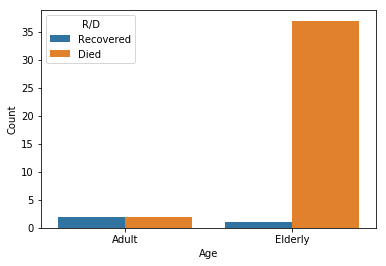

In [11]:
df_temp=pd.DataFrame(np.array([[int(adult_recovered),"Adult","Recovered"],[int(elderly_recovered),"Elderly","Recovered"],
                      [int(adult_dead),"Adult","Died"],[int(elderly_dead),"Elderly","Died"]]),columns=["Count","Age","R/D"])
df_temp["Count"]=df_temp["Count"].astype("float32")
ax = sns.barplot(x="Age", y="Count", hue="R/D", data=df_temp)

### Lets Study the Symptoms in More Details

In [12]:
symtoms_text=df_2["symptom"].dropna().tolist()
all_voc_symtoms=[]
for sentence in symtoms_text:
    allWords = nltk.tokenize.word_tokenize(sentence)
    for word in allWords:
        if word!=',':
            all_voc_symtoms.append(word)
allWordDist = nltk.FreqDist(w.lower() for w in all_voc_symtoms)
allWordDist={k: v for k, v in sorted(allWordDist.items(), key=lambda item: item[1],reverse=True)}

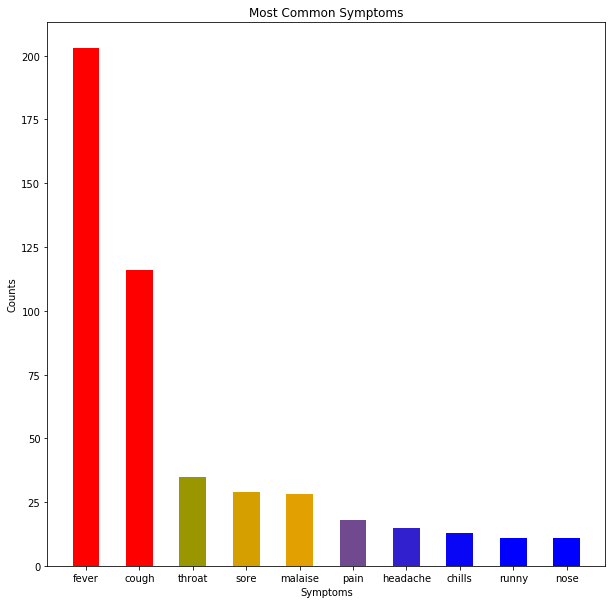

In [13]:
clist = [(0, "blue"), (0.125, "blue"), (0.25, "orange"), (0.5, "green"), 
         (0.7, "green"), (0.75, "red"), (1, "red")]
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)
bar=plt.bar(range(len(list(allWordDist.values())[:10])), list(allWordDist.values())[:10], width=0.5,color=rvb(np.array(list((allWordDist.values()))[:10])/100),align='center')
plt.xticks(range(len(list(allWordDist.values())[:10])), list(allWordDist.keys())[:10])

fig=plt.gcf()
ax=plt.gca()
fig.set_figheight(10)
fig.set_figwidth(10)
ax.set_ylabel("Counts")
ax.set_xlabel("Symptoms")
ax.set_title("Most Common Symptoms")
plt.show()

## TimeSeries Analysis-Deaths Worldwide

In [70]:
df_3=pd.read_csv("time_series_covid_19_deaths.csv")

In [71]:
df_3.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20
0,Anhui,Mainland China,31.8257,117.2264,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,NaN
1,Beijing,Mainland China,40.1824,116.4142,0,0,0,0,0,1,...,8,8,8,8,8,8,8,8,8,NaN
2,Chongqing,Mainland China,30.0572,107.8740,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,NaN
3,Fujian,Mainland China,26.0789,117.9874,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,NaN
4,Gansu,Mainland China,36.0611,103.8343,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,0.0


In [72]:
##only including those countries which has sum of deaths greater than zero
df_temp=df_3.drop(["Lat","Long"],1).groupby("Country/Region").sum()
df_temp["cummulative_sum"]=df_temp.sum(axis=1)
country_list=df_temp.index.tolist()
s=0
for value in df_temp["cummulative_sum"]:
    if value==0:
        df_temp.drop(country_list[s],inplace=True)
    s+=1
df_temp.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,cummulative_sum
Country/Region,,,,,,,,,,,,,,,,,,,,,
Albania,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.0,1.0
Argentina,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1.0,4.0
Australia,0,0,0,0,0,0,0,0,0,0,...,1,2,2,2,2,3,3,3,3.0,23.0
Belgium,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.0,3.0
Bulgaria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.0,1.0


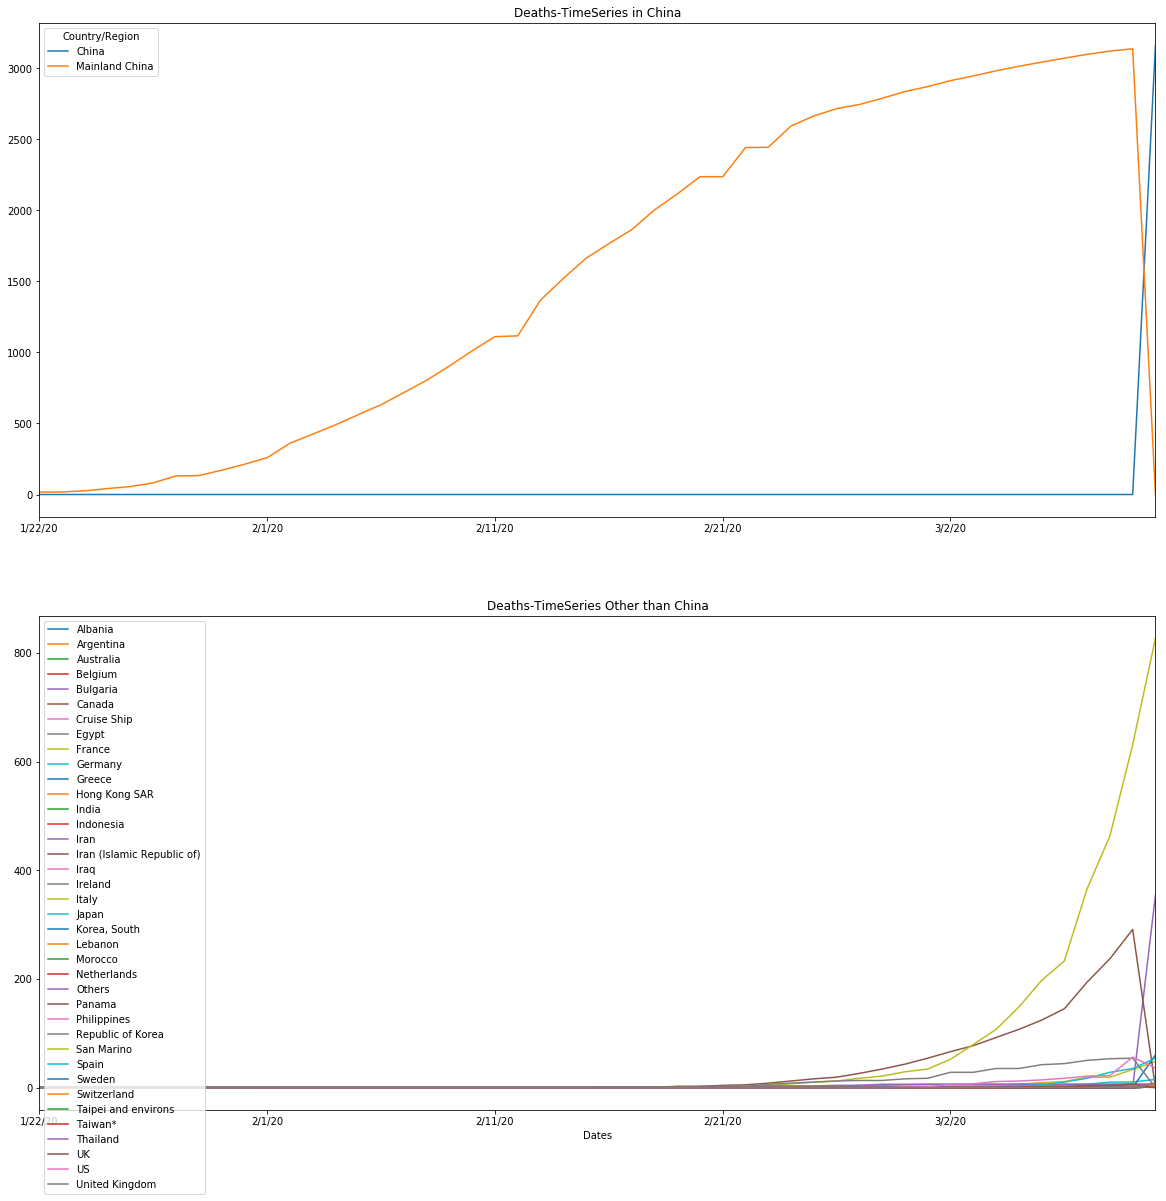

In [17]:
fig=plt.figure()
ax1=fig.add_subplot(211)
ax2=fig.add_subplot(212)##Next-Task-1-------Hovering Interactive
df_temp.loc[["China","Mainland China"],:].drop("cummulative_sum",1).T.plot(ax=ax1)
df_temp.drop(["China","Mainland China"]).drop("cummulative_sum",1).T.plot(ax=ax2)
ax1.set_title("Deaths-TimeSeries in China")
ax2.set_title("Deaths-TimeSeries Other than China")
ax2.set_xlabel("Dates")
fig.set_figheight(20)
fig.set_figwidth(20)
plt.legend(loc=2)

The Mean Death WorldWide is 2183.575


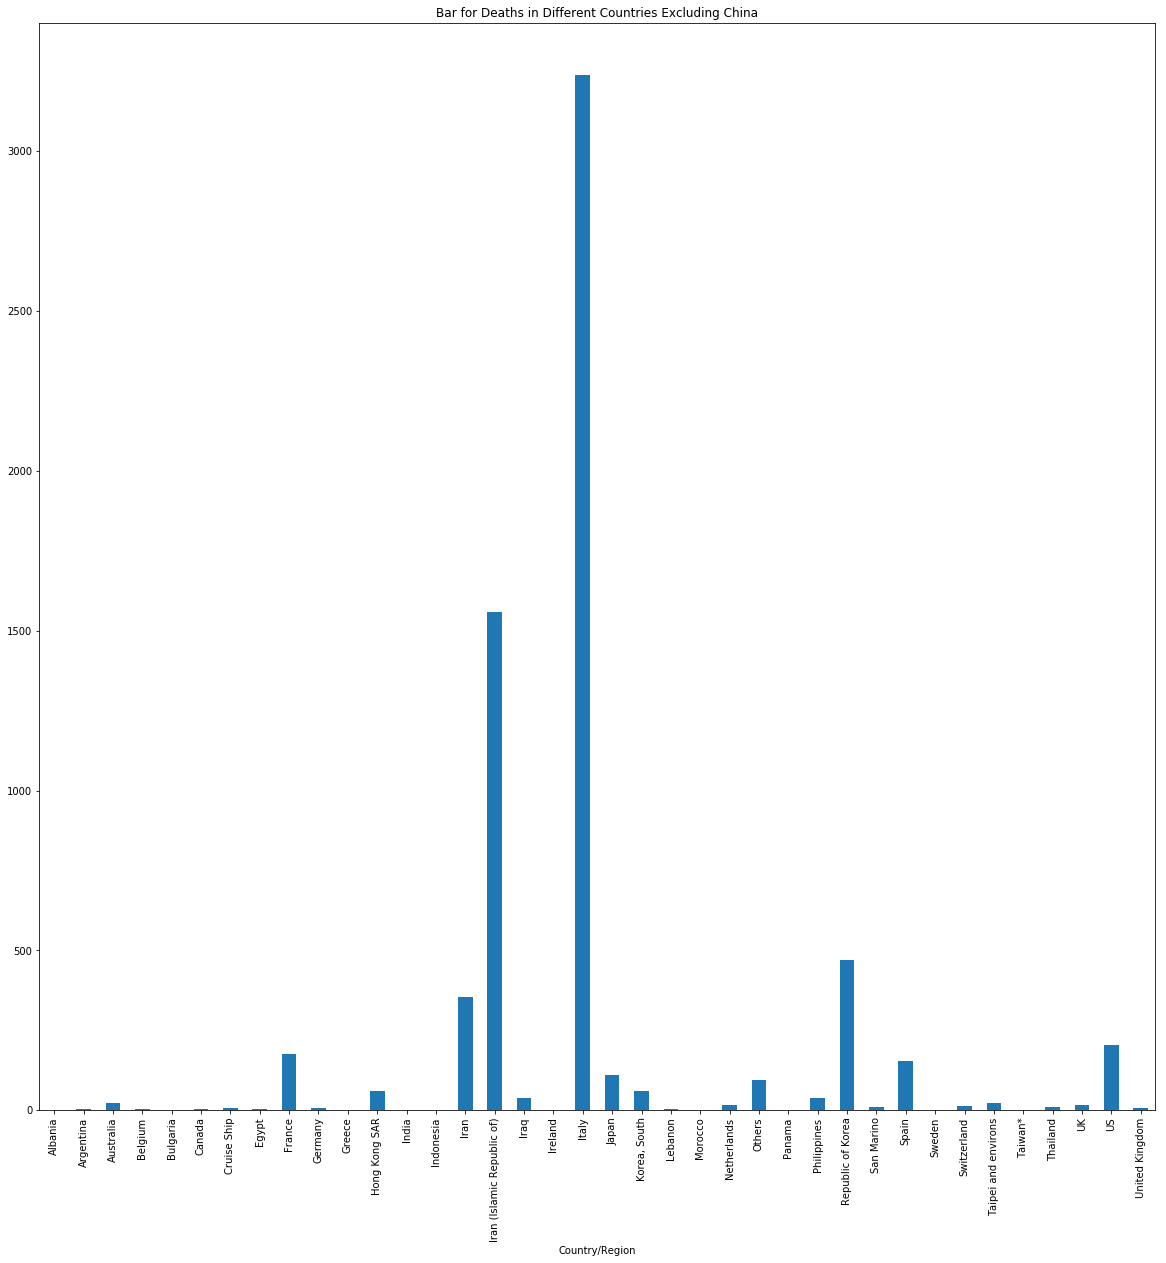

In [18]:
df_temp["cummulative_sum"].drop(["Mainland China","China"]).plot(kind='bar')
fig=plt.gcf()
ax=plt.gca()
ax.set_title("Bar for Deaths in Different Countries Excluding China")
fig.set_figheight(20)
fig.set_figwidth(20)
print("The Mean Death WorldWide is {}".format((df_temp["cummulative_sum"].mean())))

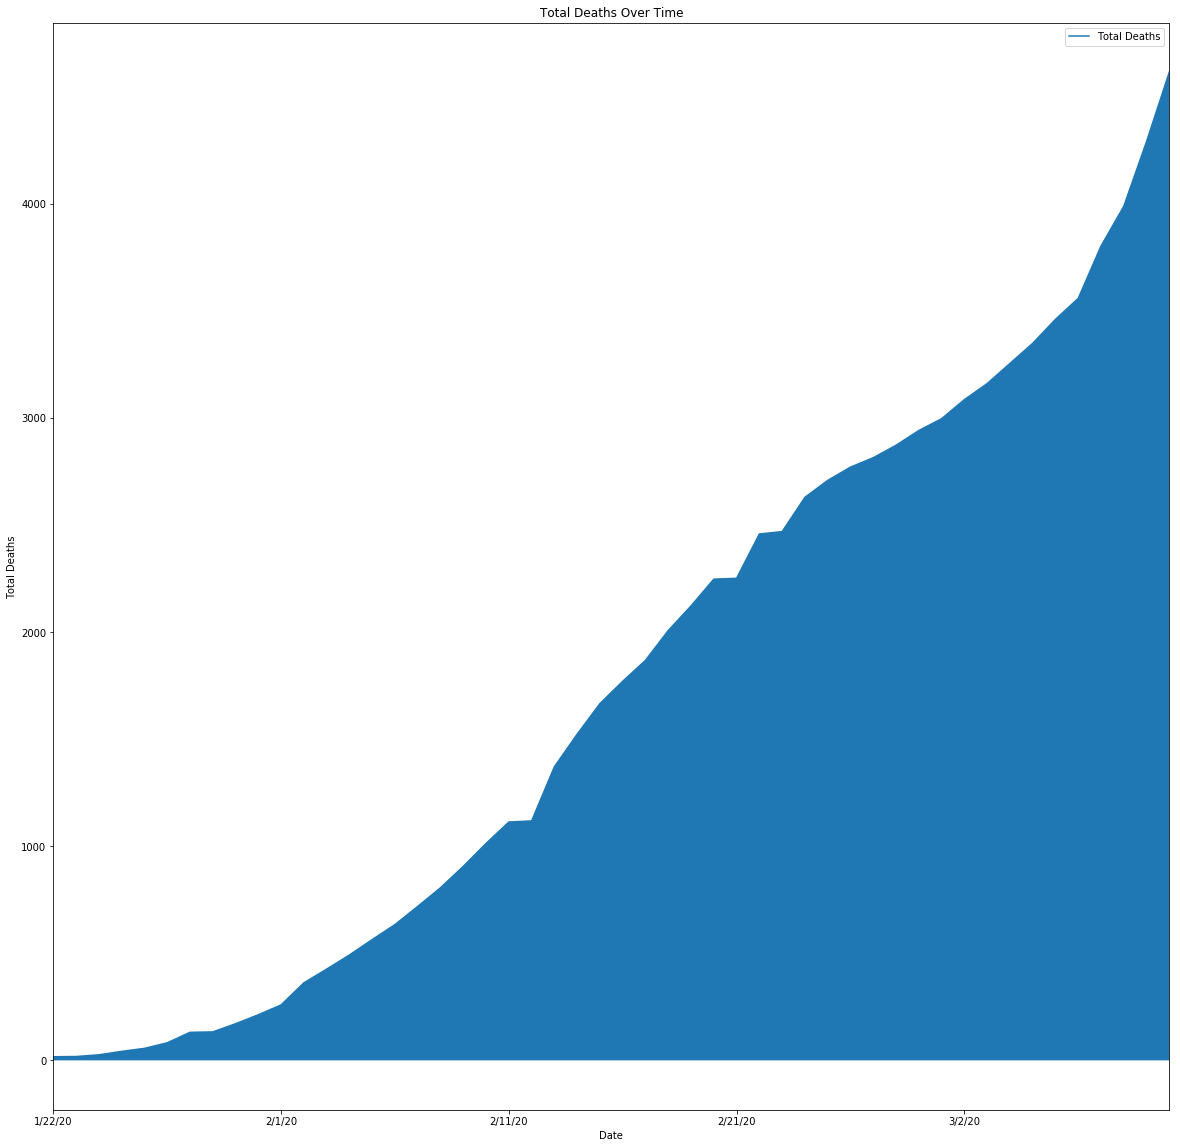

In [19]:
df_temp.drop("cummulative_sum",1).sum(axis=0).plot(label="Total Deaths")
fig=plt.gcf()
ax=plt.gca()
fig.set_figheight(20)
fig.set_figwidth(20)
ax.set_xlabel("Date")
ax.set_ylabel("Total Deaths")
ax.set_title("Total Deaths Over Time")
ax.fill_between(df_temp.columns.tolist()[:-1],df_temp.drop("cummulative_sum",1).sum(axis=0).tolist())
plt.legend()

<h1>Interactive Plot Show-Casing Deaths in MainLand China Vs Rest of World Over time</h1>

Traceback (most recent call last):
  File "C:\Users\MMOHTASHIM\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 387, in process
    proxy(*args, **kwargs)
  File "C:\Users\MMOHTASHIM\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 227, in __call__
    return mtd(*args, **kwargs)
  File "C:\Users\MMOHTASHIM\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1499, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


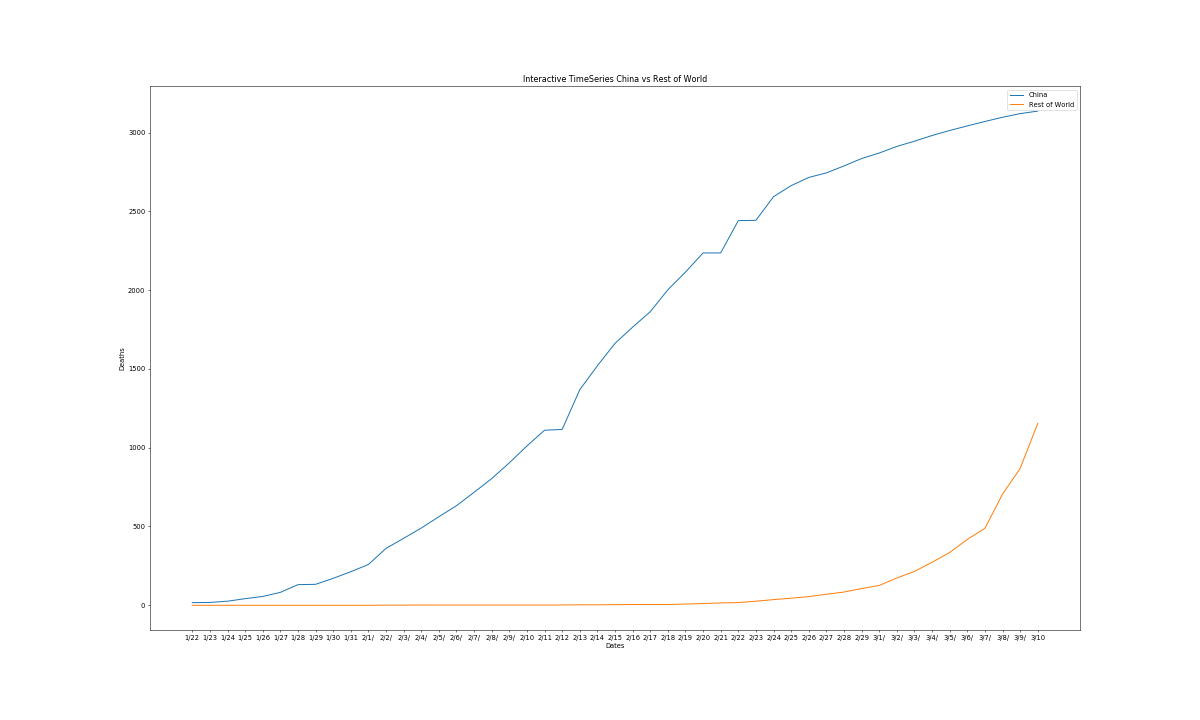

In [33]:
deaths_main_china=df_temp.loc["Mainland China",:"3/10/20"].tolist()
deaths_world_wide=df_temp.drop(["Mainland China","China"],0).drop(["cummulative_sum"],1).sum(axis=0).tolist()
dates=[date[:4] for date in df_temp.loc["Mainland China",:"3/10/20"].index.tolist()]
dates_worldwide=[date[:4] for date in df_temp.drop(["Mainland China","China"],0).drop(["cummulative_sum"],1).sum(axis=0).index.tolist()]
n=len(deaths_main_china)

%matplotlib notebook
def update(curr):
    if curr==n:
        a.event_source.stop()
    plt.cla()
    plt.plot(dates[:curr],deaths_main_china[:curr],label="China")
    plt.plot(dates_worldwide[:curr],deaths_world_wide[:curr],label="Rest of World")
    plt.gca().set_title("Interactive TimeSeries China vs Rest of World")
    plt.gca().set_xlabel("Dates")
    plt.gca().set_ylabel("Deaths")
    plt.legend()
    
fig=plt.figure()
fig.set_figheight(15)
fig.set_figwidth(25)
a=animation.FuncAnimation(fig,update,interval=1)

### World Map Representation of Deaths

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(12,9))
lat = df_3['Lat'].values
long = df_3['Long'].values
# determine range to print based on min, max lat and long of the data
margin = .2 # buffer to add to the range
lat_min = min(lat) - margin
lat_max = max(lat) + margin
long_min = min(long) - margin
long_max = max(long) + margin

# create map using BASEMAP
m = Basemap(llcrnrlon=long_min,
            llcrnrlat=lat_min,
            urcrnrlon=long_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(long_max-long_min)/2,
            projection='mill',
            resolution = 'h',
            area_thresh=10000.,
            )
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color = 'white',lake_color='#46bcec')
# convert lat and long to map projection coordinates
lons, lats = m(long, lat)
# plot points as red dots
m.scatter(lons, lats, marker = 'o', color='r',zorder=2)
plt.title("Number of Deaths on WorldMap")
plt.show()

<img src='https://i.imgur.com/se855UU.png'>

### Some Individual Countries in Detail

In [ ]:
def individual_country_death(country_name,lat_min,lat_max,long_min,long_max):
  fig = plt.figure(figsize=(12,9))
  lat_country_polar = df_3[(df_3['Country/Region'].isin(country_name))]['Lat'].values
  long_country_polar = df_3[(df_3['Country/Region'].isin(country_name))]['Long'].values
  # create map using BASEMAP
  m = Basemap(llcrnrlat=lat_min,
              urcrnrlat=lat_max,
              llcrnrlon=long_min,
              urcrnrlon=long_max,lat_0=(lat_max - lat_min)/2,
            lon_0=(long_max-long_min)/2,projection='mill',
            resolution='l'
              )
  m.drawcoastlines()
  # m.drawlsmask(land_color='coral',ocean_color='aqua',lakes=True)
  m.drawcountries()
  m.drawstates()
  m.drawmapboundary(fill_color='#46bcec')
  m.fillcontinents(color = 'white',lake_color='#46bcec')
  # convert lat and long to map projection coordinates
  lons, lats = m(long_country_polar, lat_country_polar)
  # plot points as red dots
  m.scatter(lons, lats, marker = 'o', color='r',zorder=2)
  plt.title("Deaths Location in {}".format(country_name))
  plt.show()

In [ ]:
individual_country_death(['China'],15,45,75,150)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAq8AAAFKCAYAAAAzALYxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjMsIGh0%0AdHA6Ly9tYXRwbG90bGliLm9yZy+AADFEAAAgAElEQVR4nOzdd1yV1R/A8c+57KEMB0NkuPfGvfcu%0Ac0uWWuYvNffGbZaamqWZucqSzJErd+Xee2siyJA9BNnrPr8/QNJEZFy4jPN+vXhx73PPc873gQt8%0AOc8ZQlEUJEmSJEmSJKkwUGk7AEmSJEmSJEnKKpm8SpIkSZIkSYWGTF4lSZIkSZKkQkMmr5IkSZIk%0ASVKhIZNXSZIkSZIkqdCQyaskSZIkSZJUaMjkVZIkSZIkSSo0ZPIqSVKBIYRQhBCVtB1HbgkhZgkh%0ANuZBvS5CiGM5PPcnIUSiEMIrh+c7pn1/dN/wel5d809CiDghxFNN1y1JUuEkk1dJkjIkhPBKSxqi%0AhBARQojzQoj/CSE08ntDCHFSCPGxJur6T72ZJll50F7b/yZWiqJ8oSiKxq9NURQ3RVE656KKZYqi%0AOL54kvY9aPvS8ypCiJ1CiFAhRKQQ4rYQYpIQQicLsWnsmoUQ6bvnKIoyDOimiXolSSoaZPIqSVJm%0AeimKUgJwAJYA04FN2g1JygtCiIrAJcAXqK0oihnQH2gElNBmbJIkSS+TyaskSW+lKEqkoij7gYHA%0Ah0KIWgBCCAMhxHIhhI8QIkgIsU4IYZT2moUQ4oAQIkQI8SztsV3aa4uBVsAaIUS0EGLNS811FEK4%0Ap/X2fieEEGnnVBJCnErrEQwVQmzP7nWkxbtKCOGf9rFKCGHw0uvvCCFuCiGeCyE8hBBd044PF0I8%0ASOuF9hRCjEo7bgIcBmzTriNaCGErhJgvhNj6Ur29hRD30q7ppBCi+kuveQkhpqT1ckYKIbYLIQzf%0AEP8wIcTZl54rab3hr329cmABcF5RlEmKogQAKIryj6IoQxRFiXipnEva9ztUCOH6Uizp1/xS7/eH%0AbyjbWAhxIS3mACHEGiGEfg7jliSpmJHJqyRJWaYoymXgKamJJ6T2xlYB6gGVgHLA3LTXVMCPpPba%0A2gNxwJq0elyBM8BYRVFMFUUZ+1IzPQFnoA4wAOiSdnwRcAywAOyA1Tm4BFegaVq8dYHGwGxITaiA%0An4GpgDnQGvBKOy84La6SwHDgayFEA0VRYki9pe2fdh2miqL4v9ygEKIKsA2YAJQBDgF//CdZGwB0%0ABZzSrntYNq7pTV+vt1IUpa2iKCfTnnYEdmXhtJZAVaADMPflRDwbZVOAiUBpoFna66NfiiunCbgk%0AScWATF4lScouf8AyrYfvE2CioijhiqJEAV8AgwAURQlTFOV3RVFi015bDLTJQv1LFEWJUBTFBzhB%0AaqIJkERqImyrKEq8oihn31jDm7kACxVFCVYUJYTU3sahaa99BGxWFOVPRVHUiqL4KYryMO1aDiqK%0A4qGkOkVqEt0qwxZeNxA4mFZvErAcMAKav1TmW0VR/BVFCQf+eOmas+JNX6/sKgUEZKHcAkVR4hRF%0AuQXcIvWfgGyVVRTlmqIoFxVFSVYUxQv4gay9NyRJkmTyKklStpUDwkntRTQGrqXd/o0AjqQdRwhh%0ALIT4QQjhLYR4DpwGzLMw+SfwpcexgGna42mAAC6n3YIfkYPYbQHvl557px0DKA94ZHSSEKKbEOKi%0AECI87Tq7k9prmO02FUVRkzqutNxLZd50zVmRm3NfFgbYaLi9DMumTQw7IIQITHtvfEHWv56SJBVz%0AMnmVJCnLhBDOpCZdZ4FQUocC1FQUxTztw0xRlBfJzGRSbxk3URSlJKm34SE1AQVQyAZFUQIVRRmp%0AKIotMApYK7K/rJY/qb23L9inHYPUhLLif09IGxP7O6k9plaKopiTeus/q9fxSptpPdblAb9sxp7X%0A/gL65lNb3wMPgcpp741Z/Pv1lCRJypRMXiVJeishREkhRE/gN2Croih30noQN5A6/rNsWrlyQogX%0AYy5LkJrcRgghLIF5/6k2CKiQjRj6v5jwBTwjNWlUZ3KKgRDC8KUPFaljT2cLIcoIIUqTOj73xcSq%0ATcBwIUQHIYQq7VqqAfqAARACJAshugEvL1cVBJQSQpi9IY4dQI+0evVITeoTgPNZvfZ8Mg9oLoT4%0ASghhDemT5LYKIcw13FYJ4DkQnfY1/lTD9UuSVITJ5FWSpMz8IYSIIrVX0hVYSeqEpRemA4+Bi2m3%0Af/8itbcVYBWpYztDgYukDil42TdAP5G6EsG3WYjFGbgkhIgG9gPjFUXxzKR8NKnJ84uP9sDnwFXg%0ANnAHuJ527MVktOHA10AkcApwSBuvO47UJPQZMCStfdLOe0hqUuyZNnzixTCEF6//A7xP6gSzUKAX%0AqUuQJWbhmvONoigepE6ecgTuCSEiSe1xvgpEabi5KaR+HaNI/Qco2ytHSJJUfAlFydadO0mSJKkQ%0AEkJsAAYDQYqivDY8oqASQmwidb3ZYEVRCv3ua5Ik5Z5MXiVJkiRJkqRCQw4bkCRJkiRJkgoNmbxK%0AkiRJkiRJhYZMXiVJkiRJkqRCQzc7hYUQcoCsJEmSJEmSlOfetFV0tpLXtIpyH00ei4+PZ8SIEaxc%0AuRJdXV28vLyoU6cO+vr6bz9ZKlSCg4NZsWIFTZo0oU+fPqSu/y5J+SclJYXp06ezfPnyTMsdPnyY%0AY8eO0bBhQ6pVq0a1atUwNX11c6qAgACWLFnCkCFDaNKkSV6GLRVTiqKwePFi4uLicHJyokePHtjY%0AvL6xWmBgIBWqVqflrkcI1b83ab23f0v1iH/Ys+O3/Aw7XWJiIt7e3owc8xkhtbpg1+MDrcSRU8Hn%0ADmF88mfOHf8zw9cfPXpE01ZtcBizjLItuudzdG+nKAqBJ3aTEBpA4O/f8fOmDcz9/Avo+gnWbd9F%0AURSN/R0+1vHNm+5la7UBIYRSGJJXgJiYGFatWkWJEiUoX748V65cwdLSktGjR2NsbKzt8CQNO3r0%0AKEeOHGHy5MnY2dm9/QRJ0pBdu3ZhY2NDixYt3lo2OTkZDw8PHj58yD///EN0dHT6awYGBsTHxzNj%0AxgxMTEzyMmSpmJs/fz4uLi5Urlz5jWV27drF2IXLqLPiYHrymhIfy+UPG3H+5N/UqlUrv8J9xYqV%0AK5kxcxZGFmVo8uMlVPoGWokjp5Jjojg/pDahQYFv/Dm/du0a7bt0o4rrJizrNM/nCDOnqNVccKlD%0AtQqOLJw3l+mz5xJhak1V142odLLdH5qpYx1Lv7Hntcgmr/914sQJjhw5wpw5c17r7ZCKhpiYGL7+%0A+mtKly7NyJEj0dHR0XZIUhGnKAqTJ09m5cqVua4nIiICCwsLDUUmSW+WlJTE9OnTM33fPnr0iL6D%0AXbh7/SqNVu5HpauP1/czaVO/JjvcfsnHaP+lVqtxrFwV63HfYFa1Piq9wnk39f70d1m3YAY9evR4%0AY5m///6bPgMGUevLXZSoqJ1/FP4rLtCHx6un8uzeFXp378rR4yex7f8Zdu/9L0/uemaWvBabCVun%0ATp1i6dKlMnEtwkxMTJg9ezZNmjRhwoQJ3L59W9shSUXc0aNH6dKly9sLvoUQQiauUr7R09PD2tqa%0AyMjIN5apUqUKt69eBuDqpN54fDGCr2ZOZPvWn/MrzNccP36cBB1DzGs2LrSJK4BuKVuePHmSaZkO%0AHTqwad1a7s0ZzPPHd/IpssyHhj78ciQBl/5m4IB+HD1zgapzt1C+76daGa5XbJLXwtpjLGVf/fr1%0AWbVqFWfOnEkf2yVJeeHYsWN07txZ22FIUra1adOGU6dOZVpGCMH9+/dZsHAhTx495IOhQ7WSqHh6%0AejJqzFje7TcA6wHjC/XchuTYKIIvHqNfv35vLdu/f382rF7FvVn98T+8Nc/zmKSoCK6MaMKDhR/y%0A/NFNnt25iM++TSTHRhEfGkDYw5u07tyNvx/4Un/N35jXcM7TeDJTbJJXqXjR0dFhzJgxDB06lFmz%0AZvHXX39pOySpiLl48SJNmzYt1H9IpeKrYcOGXLt27a3lqlevztw5cyhRokQ+RPW6DRs3UqehMyci%0AdGn4w2ms2/XRShyaEnhyLy1bt8ba2jpL5QcMGMDlc2eIO7ge9xWfkRIfm+sYEiPDX0uEFUXBfflY%0A+vfowtiebXiyeDhXJvbk4erppCTEoaNvSIWhU3nm/B7VF7ihb2aZ6zhyQyavUpFmb2/PypUriYqK%0AYtq0aWzYsIHg4GD++ecfjh07xjfffJPprTNJehNHR0fu37+v2Urd3MDREVSq1M9ubpqtX5LS6Orq%0AkpycrO0wMnXs2DEmz3Sl3qrDOI2Yg2Hp11dFKGyizu7jfyOGZeucatWqcevqZRpb6nJrfFeeu9/O%0AcS9syMVjnHWpy/N/brxy3HfnGkolhLPmm1XUq1uXCpUqYWZVjjquP2BgURa9khZUeH8KNu36vLL6%0AhLZodmpYASZ7R4ovIQR9+vShT58+uLu7s23bNkqXLo2DgwPu7u7o6habHwNJg6ytrbGzs+Pq1as0%0AatQo9xW6ucEnn0BsWs+Kt3fqcwAXl9zXL0n/UaZMGUJCQihTpoy2Q3nNgwcP6D/kfarN/hETu4ra%0ADkdjkmOeY2trm+3zTExM+G3rz2zYuJHZ84cS4u8HgE2HflQeOS9Lib3/ETeebvkCA11d1EkJ6cef%0A3bmA/67vmD1jGnWdmxAak4B137E4z+hTYMcWaz99zidJSUly3KtE5cqVGT9+PC4uLrRs2RJzc3O5%0ALJGUYyNGjGDLli2a6cFydf03cX0hNjb1uCTlgXbt2nHixAlth5GhQ4cOUaplLyxqN9V2KJqVi3VQ%0AhRB8MnIkQU996d6jJwABf+/i9KDanBtQndMDahJ27fVxzIqi4O22grAdK5k5ZRJGVnaYpY1XTXgW%0AwqMl/6OkqTHLf/oNowFTqf/9KWw7DyywiSsUo+S1cePGnD59WtthSAWMu7s7586dIyEh4e2FJek/%0AVCoVo0aNwtXVlZiYmNxV5uOTveOSlEu1a9fm7t272g7jNd7e3ny1chU6JYrgChwaWMRfCMHePbvZ%0AvXs3J06c4J9//qFx3VrEhwfxeOU4kmOj/m0uJQWP1VPhykEunjnNmh82YP/RfFQ6uqgTE3iw4AMa%0A161FZGwCNb/YRZmmXQrEsIC3KfgRakivXr3Yv3+/tsOQCpiVK1cSERHB119/re1QpEKqVq1ajB8/%0AnpkzZ+Lr65vziuzts3dcknLJz8+vwG3qEh8fj6OjI/H6JtgPHKftcDQqPjSA6JAADA0Nc12Xnp4e%0Affr0oW3btlSpUoXVq1fj4eFB984duTujH+6LP8L9i4+5M7knNs99uHzuDLv37EEp40Dpxh2IDw3g%0A9tTexPn8w+MnXjgMc0XPtKQGrjJ/FJvkVaVSUa9ePW7cuPH2wlKxUa5cOXr06EFERAQpKSnaDkcq%0ApGxtbZk5cyb79u3LeSWLF8N/d/8zNk49LhVshXSi3a1bt6hbt662w3jFi81ljByqoWtUdIZ0Rf5z%0Ag5vjujB94vg82Z2sZs2aVKhQgfVr17B24UyW/G8IS0YN5rsFM/j7yCFSUlKYv2gx5T+eT3xoADfH%0AdSb43jX0S9ti/M4YbDoP0nhMealYzVQZNGgQs2fPpn79+toORSpgOnfuzJ9//knXrl21HYpUSNnY%0A2BAYGJjzCl5MynJ1TR0qYG+fmrjKyVoFWyGeaHf37l0+++wzbYcBwNatWzlz5gy2dnaUtLajxpRv%0AtR2SxoRdPcGjZZ+yZeN6+vTJ26W+TE1N6du372vHPTw8UAsVpvZViHnqgS4K5RydKDdhFeY1NDDh%0ANJ8Vm55XSO1md3R05NGjR9oORSpg2rZtW2AnLkgF361bt5g1a1buJ4W6uICXF6jVqZ8LePIjUagn%0A2sXExBSYCavh4eGsX7+eTccuUOerfUWq1/XZlb+YMv6zPE9cM1OjRg0cHey5PK4rOobGWLbrh1GL%0AdylZqbbWYsqNYtXzCjBs2DA+//xzFstbcdJLVCoVZcqUISgoCCsrK22HIxUiHh4euLm5sWTJElSF%0AYKKDpGGFeKJdQVqBx8PLm0oDx1Jh5Hxth6JxRo41uPXgkrbD4NefNlO7dm3OuNSjldsNjKzKazuk%0AHCt2v2mNjIwwMTEhPDxc26FIBYyLiwu//vqrtsOQComgoCBWr17Nxo0bWbx4sUxci6tCPNFOCEFI%0ASIhWY4iOjmb23Hls3PwT1j2HazWWvFKiYk1u3rql7TCoVasWs+fMxa5NLwzLFqyJetlVLH/bRkZG%0AYm5uru0wpALmxZjFgtQbIRUs8fHx7Ny5k+nTp7N161b69OnDl19+iZ6enrZDk7SlEE+0mzJlCt98%0A880rx9zd3VEUBUVRSEpKyrO2k5OTWffDDzhUqozbxfs0/O4vjG0c8qy9vJKSEMfTgz/juWE+SdHP%0AMyxj4lgNX08P4uPj8zm61/V9rw+BF44SH+RLfGgAZwfW5FjH0hmuD1uQFcvk9fnz53LHLSlDrVq1%0A4u+//9Z2GFIBtHv3bhYtWoSTkxNLlixh8uTJBW6ZIUkLXFxg/XpwcAAhUj+vX18oxivfvXuXevXq%0ApT+/ffs2VatWpXLN2qhUKjp16sT58+dRqVQaW41FURQOHDhAlZq1WbR+K5Xn/kKV6eswsi74PdUZ%0AeXpgCzont9JY/zm3xnUi6skDAJJjokiOSV1vNeLORXR0dYmKisqsqnwxYsQIkhMTuT6jP6cH1SY2%0ALAirpp0xq9ZA26FlS7Eb8wqpt4c3bdrExx9/rO1QpAKme/fuzJ07FzMzM5ydnbUdjlRAXL16FU9P%0ATzlWXsqYi0uhSFb/a8+ePSxbtiz9+Ytls5KqNocH92jdpg0tW7ZEURR+2vIzH43I3W39a9euMWbi%0AZB4/DcT+o7mUbtK50HckJT8Lpn2L5qxdvZqftmxh3MQ+mFWsQejDG+gbm1K6fX/C/97O0UMHtb4N%0Ab3x8PJs2bWLz5s2sWbMGgNbbbmNYJvvb1Wpbsep5TUhIYN++fRw8eJCnT59qOxypAFKpVCxatIgj%0AR47IHdkkAJ4+fcpvv/3G5MmTtR2KJGnMzZs3qVOnTvpYbW9vbwBKOXcg9MQuatSsxXc/b8N51UHM%0ArO2wsc75RNaAgAD6DRpC+249iW7Ym/rrTqXu5FTIE1cAuz6fsPW3HZw7d45hH37IxbOnWO06kZAA%0Af7b9uBG74Ptcu3ie1q1bayW+wMBA5s6bx/Xr1xk1ahQNGjRg7/kbOLbuTo1R8wpl4gogsjO+Twih%0A5GY8oJ+fHz4+Pjg7O6Orm7+dvn/99RebN29m7NixNGvWrEj80Eh5R1EUVqxYQe3atenSpYu2w5G0%0AJCYmhmnTprF8+XKMjIy0HY4kZcrPz4/Q0NAsbTwwZ84c5s6di56eHg8fPmTq9Bk8NLSjXN9P8d60%0AAJVKF4f/LSbi7kV0D6/j0pmTOfq76eHhQev2HTFq3gsHl8noGpnm5NIKtOALRwha78qj+3cxNdXO%0A9fn4+LB9xw7iYmOpUqUKlStXpmTJklSpUiW9jEPLrli07UvZttpbsis7jnUsjaIoGb7pNJJBbt++%0Anfv376MoCmZmZlhZWWFtbY2ZmRk3b95M/4/O1tYWOzs7FixYgFqtpmnTplhZWaGjo5P+oVKpMnxu%0Aa2ubvvNGTrRv354LFy4QGhoqE1fprYQQTJkyhbVr13Lw4EF69Oih7ZCkfKZWq5k9ezZz586ViatU%0AKKxbtw5HR0fc3NyoVq0a77//Pvr6+q+UURQFb29vvL290dXVZcuWLQwbNgynd0bgOGgCeiUtqDLt%0A+/TyhmXLceHcaZwqV2Hf77vw9/fnn0ePmDB+fKaxeHh4MHfePI7+dRzrwZMoV0RXEgBIehaCrq6u%0AVib7RkZG8t7AwVy6dImyLXugKlkK9cnfiPXzIOjRXQDs3xuFoZklji5F5+5RtpPXWbNmoaenh0ql%0AwtbWFgMDA54/f86CBQtQFIWoqCgCAwMJDAwkICCATp064eDg8ErC2Lt3b1JSUrhy5QohISGkpKSk%0Af6jV6teeJycn4+PjQ0pKCtWrV6dLly6ULVuW+Ph4hBAYGBhkGvPZs2c5cuQIAImJidm9ZKkYGz16%0ANHPnzs0weY2Pjyc4OBhra+vX/kBIhd+SJUsYNmyYXPdXKjSSk5P56KOPAHBzc+PatWs0a9aMsLAw%0A1q9fT2xsLEII7O3tmTp1KomJiTx/njpD3qrLEPRKWrxWp1HaCgB6rfrTpEVLSljZEfcshHK2trht%0A+42d239DT0+P69evs/LbNXh6+1CjSiV27d6D2tAUp4/mY93+9R2fCruEZyE83boMpWRpwg5v4fK5%0AM5QoUSJfYwgPD6dNx87EOtSj2ba7qPRe/0clOSoiw+9rYZfjYQMpKSn4+/vz7NkzateunaveTEVR%0ACA0NxdPTE09PT4KCg7l19z6BwSF0bteaiRMmpJd7+PAhR48eJTg4GAMDA+Li4liyZMkb605OTmbG%0AjBksX748x/FJxdvEiRMxMzNDrVa/8j43NDSkTJkyBAQEkJSUhKIomJiYULNmTWrVqoWDg4Nc+7OQ%0AiYuLY+/evdy8eZOOHTvSqVMnbYckSVni7u7O2bNnGT48tYdz9+7dODk5cevWLZ48ecLIkSPx9PTE%0AysqKqlWroigK02bM5NvVq6ngMgn7QRPeWLc6MQGVvgFJ0ZHoGpnivf0bPH9Zjr6JKdMnjmfPwSM8%0A8fHFqscwTCrWIvapB2ZV62Nes3F+XX6+Crn8Fx5fT8BlQD8ePHJnvutM2rRpk78xhITQukMnkqu3%0AxGnk/CJ5RzmzYQP5NuY1Li4OLy+v9AT1n8ce/OPxhCeenjz1foKOnj5m5RwxsLYnOjKCsJvnsLax%0A5fCB/ZmO39m7dy8GBgZ069Ytw9f37dtHqVKlaNmyZY7ilqTExER0dXWzlIjGxMRw//597ty5g7e3%0Ad/p6iUZGRpQqVQpLS8vXPkxNTTP8xRMWFsbt27e5c+cOoaGh6cdVKtUrt6detGFtbY2zszN169Z9%0A690I6V+KonD+/HkOHz6Mrq4u77777ivLB0lSYbBq1SoGDx6cfqcgNDSUBQsW0LJlS65evcqtew/4%0A8/DB9PIlLUthqK+PzagvsWrVM1ttqZMSiQ/xI+TP34i+f5nSvT6mTLMuqHSK9gJGiqLw5Ic5RF04%0AyI5ft6ZPwlIUBV9fX4QQWFpaZrjlrlqt5vjx43y3fiNWZcswe8b0HC+1FxgYSMt2HdBp1BWHD2cW%0AycQVtJi8KorC3r17mT5nHk/cH2FuUx5jGwd0rezRtXLAyMYRI2t7jGwc0DM1Sz8v1t+Ly2M6khgV%0AQb/+A9i5Y3um7UydOpXZs2djZmb22mvHjh3D2NhYJq+SVsXHx/Ps2TPCwsIIDw9P/wgLCyM6OvqV%0Asi9+xiwtLalTpw61a9fO0hIrAQEBqX+kbt0iISEBACcnJ5ydnalRo0auxowXRd7e3mzfvp2wsDCa%0AN29O9+7d5WYDUqE1a9Ysvvjii1eO+fj4MG3aNJ49e4ZjhQqsX7cOALt271Cq1bvc/XIUjdf+TQmn%0A6toIudCJDw3gxv/a4O35GAuLf2/FL1j0OctWrETP0AhVSjIXzp6matWq6a/v2bOHzyZNIUnfhFJd%0A3icp2JeAI24MGjSQubNmYp+N3dj8/Pxo0aYdhq374uAyRaPXV9Dka/KalJRE5x69CAkLJ+JZOIm6%0Ahth96Epp5w6It/zxjPV/gu/mhQRfPUWzlq0Y8f5gevfu/dZxJCEhIcyZMwcrKytKliyZPmGsZcuW%0ABAYGcvz4cUaMGJHl65SkokBRFDw9Pbly5QrXrl1j2bJlhfo/9Nu3b/PHH38wYsQIbGxsUBQlfUx8%0ASkoKycnJ6Y8ze37z5k3u3buHvb09AwcOpHTp0tq+NEnKNk9PT4yMjChRogT79+/H19eX6dOnv1ZO%0AURSGDh1KjRo1cHV1xb5jX6rN+AGAhLBADEpZ53fohVbkw+tEbpjBg5vX0o8dOnSIwSNGUu+boxiW%0AtsH/iBsRu77h+uWLlC5dmoWfL+br79ZRefr3WNT+d6WjhGch+O3+noDDW+nfty/zZs/C0dHxrTHU%0AbdSYhPpdcMhkmEdRka/Ja2JiIiYlSmDbczhCCCoMnfpKr2pmgs8f5ubcody9e5eaNWtmOa4XXp4w%0A5ufnx549e1iyZAnLli1j/vz52a5PkoqK8+fPc/PmTUaPHq3tULIlMDCQ7du34+/vT506dejUqRNb%0AtmwhOjoaIQQqlQpdXV10dHTQ1dVNf/zy8xdlXnxUq1YtR79fJKmgePToERs2bKBMmTJcuXKFcePG%0AUa9evdc6euLi4tizZw/GxsZ8/vnnXLt2jQ4HfNAxNH5DzVJmgs4epNSlnfx96I/0Y+269iCs0bvY%0AtHsv/ZjXli8xfniWShUrcvrWA6rN+xnD0jYZ1pkYGYbf7nX4H9zCe33eZf5sVypUqJBh2SdPnlCn%0AUWOabbv31s7AoiDPl8p6mb6+Pt9+u5pfd/6OsZEhZz9oiFXLHpTp9gFm1Rpk2POTHBeD77avCTz8%0AC8uWL6d69ZzdwhBCULJkyfS1zSpWrMjMmTPzfQagJBU0zZs35969exw/fpz27dtrO5xMxcXFsW/f%0APm7cuIG1tTUDBw7E1vbfhbSnTp2qxegkSft++OEHli5dmr4805vuqOzbt4+P/jcatVpNYkwUlV0m%0AysQ1FxLCArE0ezWf8PH2plTXVxNThw9m8PjrCVwNS6D2V/sy/Zrrm5XCabgrdn1Hc3HPOuo0dKZ3%0Ar14snDubSpUqvVL2jz/+oEzTzsUicX2bPJ+wFRQUxKYff2TtDxtI0jOmRJ3mIHRAJUCoUBCEnd5L%0Ah9YtWb1y+St/pDTBy8uLWbNm8euvv2q03oLoxZJiTk5Ohfr2sJQ3FEVh8+bNeHt7I4RAURR0dHQo%0AX748LVu2fGUx6/ymVqs5e/YsR48eRU9Pj3feeYd69erJ97Ek/Yefnx+LFy9m7dq1byyjKAptOnbm%0A7kN37IfPomSNxsQF+b5y21rKvhgfd+7PG0KXNq1Yt+ZbzMzM+GLpMr5c9hUOH87Cqm0fFEVBz7Rk%0AjttIiorAb+96/Pdvokf37rapDocAACAASURBVCycOzv9d3OzNu2J7zCcsi26a+qSCrQCsdqAWq3m%0A5MmT3LlzJ30t1xefW7RokWdbp8XGxjJhwgS+//77Ij9h5cqVKzRu3JjSNuXo2qUL3Tt3pGPHjlrf%0AT1kquFJSUvD19eXo0aM8fvyYAQMG4OzsnG/tu7u7s3PnTp4/f06rVq3o3LmznDQlSW9w7tw59u3b%0Ax4IFC964cUZgYCCfjB7L6fMXafzzddlLp2HJcdE8WT8PPc/r3L91Ax0dHW7fvs2wT/7Hg7t3UKek%0AYNu+D5XGrUClm/PfZUnRz/HbtwH/vetZtXwZ7/Xpg215B1psv1dses8LRPKanwICAli6dClmZmYY%0AGRlRqVIl+vbtW+T/47x79y6Nmjan0epjhF47QeK9C/hfPs6qlSv536hPtB2eVMAlJyezc+dOrl69%0ASteuXenYsWOe/MyEh4ezY8cOnjx5QuXKlenXrx/m5uYab0eSCptFixaRnJyc4WtCCGxsbPjkk0/e%0A+HMZExNDk5atiXFsQKnm3SnVIG86hYo7RVG4O7U3X4z/hGHDhr3yWkxMDO/07c/DyESqum7K9Xa4%0Aqb29LtSvVhEflRkVpq7LVX2FSbFJXhVF4dGjR3z77bcsXbpUa3sMa8OzZ89o0KQZ4Rhg6VCJyAfX%0A0TEwQMe2EvoBj/B2/6fIJ++SZiiKwpEjR/jzzz+pW7cu7du3p3z58hmWTUpKwsvLCwMDg7cu9/Ln%0An3/y119/YWFhwYABA944KUGSiqu5c+eycOHCHJ///vCPOBcUT+VJ38jf93ks4PjvmJ7bzvmTf7/2%0AWnJyMh+N+h9Hzl+j+qJfMbAom6u2kp4/48qYDtj2HIbjwHG5qqswydcJW/ktNDSUHTt24O/vjxCC%0AKlWqMGfOnGKVuAKcPHkSY2Nj2jduTOsWzWjSZDHPnj3jx1+2csjnLsHBwXKbSylLhBB069aNbt26%0Acf/+fQ4dOoSvry8ABgYGJCcnp69Fq6enh4ODA9evX2fVqlUZ1hcaGsqyZcto0aIFS5YskX9UpWIl%0AJSWF27dvU79+/beW1dHRIT4+HkNDw2y3c/PmTfbv3Uv9dafkz1g+iLlzjiHdOqc/DwgIYPjIT5jn%0AOotmzZrx08YNuAz9gEMTuuO84Rwq/ZxvHKNX0oLmv1zXRNhFRqHteQ0ICGDDhg3o6Ojw4Ycf5nin%0ACkmSsi4pKSnDManz589/bTk6RVHYsWMHt2/fZurUqXJogFSs3L59mx9//BG1Wo2FhQXVq1dn4MCB%0AmZ7j7e3Nhg0b+Pzzz7PVlq+vL9Vq1samXR8qjpNboee1lMR4Lg6uw4M7Nylfvjx3796lfZeu6Fdv%0ASvC5Q5SxtsHSshTevr7YDRyP3Tsfy38ocqBIDRvw8fFh48aNmJqaMnLkyFd2uZAkSTuWLFlCXFwc%0AkHrLzNbWFg8PD3r06EGHDh20HJ0k5a/w8HAWLVrEwoULUavVmJmZ8eOPP2JmZsZ7772X6bmHDx/m%0A2bNnDBkyJMvtjZs4iUN+CVQclfMhB1LWBZ3+A8MTW7h4+gQAn479jGORBlQaNhN1UiJxQT7EB/tj%0AXtMZHYOMJ9ZJb1ckhg2EhobyzTffYGlpydSpU+XarZJUgMyYMeOV52fOnGHYsGEZ7vEtSRrn5gau%0AruDjA/b2sHgxuLhoLZyrV6/St2/fV/5ONWjQgC+//JLevXujq/vmP71t2rRhzpw52Upe9/5xANtJ%0Ab146S9KsqAeX6d6qOQDBwcGcOnMW095jAVDp6fP84XWC929Ed/QSzKo10GaoRVaB73lVq9X8/PPP%0APH78mMmTJ8ueVkmSJOlfbm7wyScQG/vvMWNjWL9eawnshg0b6Nq162sTHS9dusSBAwdQFAVzc3Ma%0ANmxITEwM7u7uPHv2jEqVKuHl5cXw4cPfOEkyI+/0H8iN54JKny5Gr4QcnpPXIh5c48E8F0Z8OJRf%0Aft1GqQ6DcPhgOipdPZSUFK4Mb8yY4e+zdsMmLFv2oly/sQQedcPYqQZlW/bUdviFRqEeNrB582Yc%0AHR0L/K5AGlPAehAkSZIKNEdH8PZ+/biDA3h55Xc0JCUlMWbMmLeuLR4REcG1a9cwNTWlcuXKWFpa%0AcuPGDQIDA+nWrVu22gwKCqLfwEEEVWmNUzGaja5Nzx/fIfTkHsydO2BZt0X68Vh/Lx5Of4cQ/6eE%0Ah4fzwfARHDl0EBNTU2xdpmPfZ6QWoy5cCu2wgZSUFK5evcqgQYO0HUr++G8Pgrd36nOQCawkSVJG%0AfHyydzwPhYaGMn/+fKZNm/bWTXHMzc1fGw+elRUJMmJlZYVlGSsiS9u8vbCkESUr1aZkpdo8/f17%0Anm6Yi6lzR0o16ULi83AqV60GwMFDhzh88AA/b9nCnEVfYF4z/zaAKeoKbM9rUlISM2bM4KOPPqJG%0AjRr50qbWFbAeBEmSpAKvgPzevHPnDps2bWLhwoWULJnz7UFzqnq9hpT8+EvMqzfM97aLq4RnwVz5%0AqDlbNm3gwqXLbNz8I0a1WqB+dBmho0uCGixav4ul11Xu3r5F672eqHQKdJ9hgVJgel7j4uKIjY0l%0AISEh/SMxMTHDx8ePH2f8+PFUrFgxP0PUrgLUgyBJklTQPHjwgIMHDzJlypR/Dy5enPGY18WL8zWu%0AHTt2sHLlSlQqVb61+4KiKPg88aCxrVO+t12sKQqxzyMYMmQIUVFRJCQmsvefYAw6vU/ZZl0oUbku%0A7stGM6hvH2Zdv4ZQya16NSXfel49PT1ZsmQJtWrVwsDAAAMDA/T19TN8bGBggKOjY/GbnFVAehAk%0ASZK0KSUlhaNHj3L67Fk+HTUKBwcHAExMTYmNieG1v0Naniswbdo0Fi1ahIFBzheiz43Q0FDsK1am%0A5e/ucj3RfHZrbAfMlHguXbzIkSNHmPH9VpJjo4nyccdx1CLcV03C6/EjHCtWounWW+iZ5n+vfGGl%0A9Z7X5ORkVq5cyZo1a9DX18+PJgunAtCDIEmSpC2RkZF8sWQpm7f8jK6lNYaV67OmXgM+Hj4M67Jl%0AiI2JYdD7Q18/0cUl3+cFbN26FXd3dwCaNWumtcRVURROnTqFuZ2TTFzzWXJcNBE+j/EMCcbY2Jim%0ATZsSNHIUKiH49usVzFv0OU2aNaNs2bJYlC5DYkSITF41JF96XleuXEmXLl2oWbNmts8tduRqA5Ik%0AFVMzZrmycf+fVJmwkhJO1QGIDw3Af/c6lMQ4UvQMCf97B8u+XMwnI0dqJVlTFIVly5ZRq1YtevTo%0Ake/tQ2rP9Llz59jx+25+37OXBLXA/v0pWHUqJpObtSzK8z5Bf2wk/NpJmjZqwOF9e4DU98a8+fPp%0A8+671K9fn7i4OBISEjA3N6du42YYuMzBolYTLUdfeOTZUlnR0dGYmJi89RfI3LlzWbhQ7vwhSZIk%0AZeyLpctwnTEdgPZ/eKNrlPEGF1Ge9/H4ejzBD24AvD6EII+EhYVhbGzMvHnzGDhwIA0bamdilKIo%0ANGnZGu+QCMyad6d0ix6YOtWQva75JOapB7en9GbmpPG88847VK9ePUtf+8493yGgZhdsO2e+RbD0%0ArzwZNnDgwAF++uknxo0bR+vWrd9YzsvLCyMjuT2aJEmSlLF5Cxby3c/baLb+FKaO1RGZTHoqUaEG%0AdVYd5q8u1mzcuDHPY/P19WXdunWYmpoSFRXF6NGjcXR0zPN232Tfvn14hTyj3ncnMv06SXnDb9tK%0APhv1MTNnzszWedMmfEbfIUOxrNcSw7Ll8ii64iPbyeujR4/48ccfadKkCb/88gtfffXVa8lrSkoK%0AAIGBgaxcuZLly5drJlpJkiSpSFn8xZes+XErtb/ai4GlVZbOUeno0uDLHUxzHUfPnj2xssraedkR%0AGRnJlStXWL9+PZs2bSoQW5JfvnyZCVOnU+7DuTJx1RLj6o2598+lbJ/XsWNHZkyZyKrPh1N7+X50%0A9A3zILriI9vv/lOnTjFp0iTeffddjIyMiI+PT39NrVazc+dOJk+ezJgxY/jyyy9ZunSpnKQlSZKk%0ATW5uqauZqFSpn93ctB0RANeuXWPOnNnUWLQty4nrC0pKMoqSOiFY03x8fHB1dUVHR4dJkyZpNXFN%0ASkrit99+o17jpnTpMwDjzh9SpmkXrcVT3JVt2YNjR48Q+/LE6iyaMXUqzapXxGPNtHwb7lJUZbvn%0AdeTIV7c2c3BwYMaMGejr6xMdHU3fvn1ZtWoVJ0+exNnZWQ4ZkCRJ0qYCvHOfWq3G0LQkuibZSw6f%0Au9/m8cpxHDv4B+XKafYW7I0bN3Bzc2PFihVaW0HgZXUbOhOpZ0rZd8bg3LQL4i07d0l5S9+8NKWq%0AN+TQoUP069cvW+cKIXDb8iP1GzfF/+BPlOs5PI+iLPpyvdqAoiio1eq3boUnSZIkaUEBXD86OTmZ%0AI0eOMHrcBCyGTMe63XtZPjc+2I+bE7qxee239O3bV6NxHTlyhOvXrzNjxgytbDbwX1FRUViUKkW7%0AfV6o9LWfSEupPH9dRStVEJs3rM/R+bdv36ZVp6402XpLDv/IRGYTtnL9VRNCyMRVkiSpoCpAO/fd%0Avn2bcRMnUdbWjk9mLcSs34RsJa7JMVHcnzuYmVMmaDxxdXNzw8/Pj1mzZmklcY2IiMDT05P4+HgU%0ARWHr1q04VamGY9chCD059K6gUNRqIk79zoC+WX/f/ledOnUoZWlB5MNrGoyseJGb7EqSJBVl9vYZ%0A97za2+dL88HBwbi5ufHDj1sIDAmjTIf+1Fi2F5PylbNd1605Qwh7fJ/pL28PqwGRkZHs2rWLPXv2%0AaLTerEpOTqa+cxOeRUUTHR6CvoEhJctXouKszZjXaKSVmKRXJUU/58kPriTHRGGuJ3jw4AEdOnRA%0AT08vR/UN6d+X7WcPYF7DWcORFg+yv1qSJKkoW7w4dae+l+XTzn2Dhn6IY6UqrD56CdOh82j883Uq%0ADHfNduIaHxqA+6qJhN2+wJKlS3O8pun4yVPYv38/Pj4+qNVqEhMT+ebbbzE3N2fv3r05qjO39uzZ%0Aw8iRI0ksWZbGW2/R/qAfTX66Qp1vjsrEtQBJjnmOz9HtOCmRPH54n0mTJuVo0tYLA/r1I+zcATlx%0AK4dkz6skSVJR9mJSVj7u3Ofj48PmzZs5/OdfNHO7ia5xzmfr++5Yjc+O1Xzy8UfM+TkcCwuLLJ+r%0AKArTZrri6+dHnepV+XblCr779hv0DI0xt7BApVIRHBSUXr7fkPextbZm0bw56OnpYfzfpF+DIiMj%0AGfnpGP6+cBlz5044jlmWmpQLgb556TxrV8oZIys7qo9bysODP6UfMzMzy3F9tWvXxkRflyj3W5Ss%0AUk8DERYvMnmVJEkqqv673fQvv+T5CgPJycn0ePc9IspUosrUtblKXAGeXzrKTxt+yNbM7vj4eDw9%0APfnpp59Y/tVXmFetx/atP2NRtS41Zq7H2NaJKI+7qBPjqWBRluAzf2DiWI37IX4c+GEeUc8jOXzk%0AKJt++D7DLWAVRcnVjlaKolDfuQmiejPqr/kbHcO8S5IlzSnXczjleg4n1t+Lm+O74Ofnl+PVLoQQ%0A1KxZC39fd5m85oBMXiVJkooiLS2R9fWqVYSpjKk1dY1Gtiw1rNGEm7dvZzl53bdvH5+MGYta1xCh%0Ab4CJjQN15m1B1+TVJblKVq6T/thx4Gfpj8MPbeHgwYMYNOrCB5+Oo1XjLfR7tzdPAwJp2awprVq1%0AAlI348npxC4hBKGhoTQYOk0mroWQsa0jljUb89dff/Hhhx/mqI6UlBSOHthH+VgdbDr013CERZ9M%0AXiVJkooiV9d/E9cXYmNTj2eUvP63lzaHQws2/eyG7fuzNZK4xof4Exf8lNPBzzMtt3fvXm7eusXl%0A6ze5dPMOFSauxrJeqxy1Wbb7ByRGRVC+3xgUdQr33VYwfs5CYoL9SYiNAcCpQoVcX5+dgyNxAT4Y%0AWJTNVT1S/lPUasIfXKV16+9yXEdCQgIAAecOUV1TgRUjcsKWJElSUZSdJbJe9NJ6e4Oi/NtLm4Od%0AuDq1b8vzB1ezfd5/efz4JacH18H/79/5fO5soqOjefDgAcePHycuLg5I3X3Kde48+vfvz4L583ls%0AVpH6607lOHEFsOk5HIfBE1Hp6aNjYITTiNk02ngB23dTe63ff/99PD08cpW8enl5EeDzhFh/zxzX%0AIWlPlMcdLC0scHJyynEdhoap28MmJ8S/paSUEZm8SpIkFUVvWgoro+OZ9dJmw9OnTzl15iwqde63%0AbH2yY3X6406du1CiRAlq1KjB8BEfERAQQExMDF17vcNPx87i9OFMWm29jtOHM/Nsz3i77kMB2Lp1%0Aa65miCckJODk5EREeDjeu77XVHhSPgq78je9unfLVR2rV6e+vyt9ME0TIRU7MnmVJEkqirKzRNZb%0Aemn9/PyIiIjItLmTJ09St6EzSQ26YT90ek4ifkXHw/602/OYDgd9sajegJr1GrBz5048PR5TsmRJ%0AWrRtj6cwo8YCN5wGj8fIOm/XrTW0Kk+5Ju1ZtmJFrnpdw8PDESoVToMn4PDeKA1GKOWX2Osncp28%0A+vv7A2Df91NNhFTsyDGvkiRJRVF2lsh6w0YG0ZaWdGzdjtu3blKihCkH9+6hUaNGhIeHM3WmKykp%0AKVSwt2P3gcM88fam0qTVlG7UTmOXoFfCHABTpxoMca6QPmmrW7du3Lp6lda/bkClm7NF4rMr8OQe%0AjJ4HMX7s2FzVY2RkRPM27bi2fyMWTtWI9/OgfP/P0DMtqaFIpbyUFB1JmPsdWrduneM64uLiWLZs%0AGbate6JjbKrB6IoPmbxKkiQVVS4uWZt0tXjxqysTAMkGBoyJjiW+/TBazOxEyKU/ade5K1MnjOP7%0AjZsxbtQJfbsqnLnvQ8leY2jcuKPGE0nf7d+i1jck8p/ruO7ZyMULFyhlZcPVq1cp1ag9+hZlNNre%0AmyRFReC9fi5H9u1GXz93W7Wam5tz9vhfxMfHc/HiRdb+sJ4z812ouXgHOgZGGopYyivh10/j3KwF%0ARkY5+14FBgZSrXrqFC3jCrU1MrGxOBLZGbsjhFDkbhCSJElF0H9WG3gyciQV58yh3f4n6Bql9g5F%0Aez3kydoZWL3zCWVbdM+TMNQpyfju3UiS932Czh6kTbv2HNr36ratdef+SCnn9ugameRJDP/lvmoi%0AHcuXYP3anM8ufxO1Wk3/wS5c9o+k2pwfUenIPqWC7PGqiYzv1Ihx48Zl+9yUlBR0dVO/v079R1N5%0A1EJNh1ekHOtYGkVRMszuZfIqSZIkvcLX15fa9Rvi8MkirDtkfXMATUiMDOdk3yr07t2boUOHoigK%0Ak6ZMIVa/BPW+Pkis3xNKVqqdb/HE+j/hyqg2BAX452pHpcwkJibSpUcvvPRKUXnSt7I3roBKeBbM%0AtVGtuX7xPJUrZ2+LY4Bt27YxZMgQSjVsS8Olu/IgwqIls+RV/osnSZIkvWLnzp1YNu2S74krgL6Z%0AJQD79+/nwr1HmJSriEHzd7GoWAsdQ5N8TVwBDMuUw8yxKt+vW0dScjIIFbNnztBogqmvr8+Bvbtp%0A0bY9/6wYh2m1hpTr/gEih5sgSJqnTk7i0Rcf89mn/8tR4gqpEx9tWveiymdLNRxd8SN7XiVJkqRX%0ANG7ZhuRuoyjTtItW2n+wfBxWHQdgWa+lVtp/WZTnfdxXTyP0zsX0Y6XLlCEkOFjjbYWFhfHBiI/x%0A9fUloXpLHEfM0XgbUs54rpuN/XMvjh06gI6OTrbPP3DgAL169aLyx3NxGpT9IQfFkex5lSRJkrIs%0AODiI0lqcPFR9yrdaa/tlj9fNxmvvJnp27068Q2/e69mDevXqsm3btjxpr1SpUhzct4eDBw/Sf7AL%0AdoMn5du4XunNgk7tI+7qUXZeu5qjxBXg8pUrAJTrOkSToRVbMnmVJEmSXrHAdSazvlmOZb1WxXr8%0AZXzkM9TJSaxe/S32L23u0KRJkzxt99SpUzRt3pygU/tkslMAhB3ewpqvV2JpaZmj89VqNXFxqTtp%0AJUaGoW9eWpPhFUtyQI0kSZL0ChcXF/SiQgn8a6e2Q9GayIfXibr2N1euXHklcc1LycnJ/Pbbb1So%0AUIFJY0cTduTnfGlXejN1chIhD67Tpk2bbJ87w3UOto4V0Dc0ZPlXywDybV3iok72vEqSJEmv0NXV%0AZd+uHXTq3oOkZ4GU7/9ZseuB9d+1hmkTx9OoUSPN1Ofvz8aNG0lJScnwdV1dXaKjo+nTpw9NmzYl%0AOTmZlE/+R5THXUpUrKWRGKTsi3p8Bzt7RywsLLJ1no+PD2vXrqXS1O+oUb8VoRf/5NbC4STHPM+j%0ASIsXmbxKkiRJr6lbty7XL12kQ9fueAT6UN5lCikJcaTExWBQ2hZ1UgJBJ3YTfeUYJZ07Ub5/7nae%0AKiiUlBT8Dm7B9+R+jHtlv7ctI7t27eLx48eMGzcOc3PzLJ2jq6vL/0Z+jNvhnykxdplG4pCyL+LO%0ABdq2zt7EQU9PT+o7N8G276eUdu6AUKmwat2LBkt2Yir/EdEIudqAJEmS9EbPnz+n/5D3uXzpEkYm%0AJhgbmxAY4I/QM6BH5w4kxERzJcaASh/PwaCUtbbDzbWgMwe4tWAYBoZGlHOsgJmZGUpKEn3fe4/Z%0AM2cAEBERgZmZWZZ6ox88eMD+/fuZPn16tmPx8/Ojep161Fj4K2bVGmT7fCnnFLWap/s34eu2nD92%0A76Jt27ZZPvfu3bu06/UeDTZeyLsAi4HMVhuQY14lqbBzcwNHR1CpUj+7uWk7IqkIKVmyJEcP7OdZ%0ASBD+Xp48vn+HaxfPM/HTkfz68xbK2pbD78/tPFkzTduhakSpRu0o1ag9DdYep+yENQSZO3Lz6hXm%0AzJoJwLlz57CwsEClUuE6b36mdXl6evLTTz8xefLkHMVSrlw5ftm8kYeLhpMQFpijOqTsi3n6mDtT%0Ae2N89Q+uXjiXrcQVoFKlSkT6+6BOTsqbACXZ8ypJhZqb22t70mNsDOvXZ21Pe0nKpXPnzpGUlESv%0APn2p/91xjKzstB1Srvns3UTCsyB0DU1w37QIAJVKhVqtxrlpM65cTO1RM7Eozca1qzExMaFBgwas%0AWfs9ew8cZOPaNdSoUYMpU6awevVqjI2NcxXPvAUL+WHnH9T6ai86+oa5vj4pY0pKCr67v+fpjtUs%0AnDeHcWPH5nhpLBsHJyou/A0Tu0oajrL4kNvDSlJR5egI3t6vH3dwAC+v/I5GKqa8vb2pUbsu9b89%0Agkn5rO8+FO39iNCzfxB54SCRT70wMrOk3OCJ2HbV7j9eKUmJXJvSh0Yr9xF+4wxebisIf2mTAoDm%0Am84Tee8SgbtWE+bjCYBZ5TqYVKiF/9FfARBCkJKSkuvJboqi8E7f/tyJ15fbx+YRRVG4P3sQ5fWT%0A2frjJipWrJir+lp36kpUm6GUbdZVQxEWP3LYgCQVVT4+2TsuSXlAT0+PylWr8tRt+VvLKorCgxXj%0AOdHLgUez+9POOIrfvv+Gp16eHN2zg/AdX+Oz7Wu02VGio6eP46DxqHR0Kd2oHQ2+2oNdz2Hpr9u2%0A6Y1hWVvKdR9Kw82XqTJqAUZl7XBefZQKLhPTyymKopFEUwjBtl+2YOB7D78963Ndn/S6wOO7MIsP%0A5+yJv3OduALUrl6V2KceGohMyohcbUCSCjN7+4x7XvNpXUpJArC1taVG9epcN8ja+y702kmEOpmg%0Apz6oVP/2oZQqVYqrF8/TtlMX3AO8Cb78F1VGLaRsu/deqyMpKgK9ElmbuZ8TZZt1Tn+s0tXDafB4%0AjMra4ThoHAnhQfj8/gMV3k8dy+rYfwz2fT5BpauHsa0TFboOxvNI6i5cZcqUwdfXF0PD3N3uNzEx%0A4cgf+6hdvyGlW/XCsIxtruqT/pUcF433pkUc2r0jx8ME/qtW9WocOXzx7QWlHJE9r5JUmC1enDrG%0A9WXGxqnHJSmfhIaGsm/fPmy6vZ9pubggX9yXjcaQFHbs2PFK4vqCjY0Nl8+dwTbGj9jQQB58Nwt1%0AYsIrZXx2rObc+/VJSYjT6HVkxsiqPE5DJiBUKgxL26Qnri+8vPi807ivKGFVjjFjxhAaGsrs2bM1%0AEoOjoyOjRn7M019XaKS+okZRFKI87+O1bRVPf1+b5fN8t39Lx7atadGihcZiqVq1Kol+jzVWn/Sq%0AbPe87tq1i379+uVFLJIkZdeLSVmurqlDBeztUxNXOVlLykfrN2zAqkU39M1KZfh6UvRzfH9dQeCx%0AbYz/bCzTf99EiRIl3lifmZkZZ0/8zfPnzxk89EMufNwcY8vULTUVtRqiw6lSpTJ3J/XAwKIMOkYm%0ARIcEgFEJ6n2xXetjQhOfhRIdEsDQoUNZs2aNRuueNWM6GypXxabvaEzscn97u7BTpyQTfv00EZeO%0AEn75Twx1BDqKGkPnLlk6PzbAm4ADP3H8zi2NxqWvr4+SnKzROqV/ZTt5rVRJzpyTpALFxUUmq5JW%0AHT9zDozt3jjGM+T8YSJP7+bR/bvY2NhkqU4hBGZmZhzct4cbN26QlPTvskOVKlVCCMG9e/eIjo7m%0A5s2bzJo1C6vmBWNyjJGVHXVmb6J9564sXrSA8Z9pbocyS0tLJk8cz+aty6g64weN1FmY+bitIOXy%0AQT7+cCi9P5+Iqakp9Z2b4Njro7ee++zOBdy/Gsvc2a7Y2Wl2lQw/Pz/0S2XtvS5ln1xtQJIKqLCw%0AMPbv38+xE6ewNDejRdMmNGvWDCcnJ22HJkmvCAgIoGO3HsTZ1aLiZ8te27894M8deK6dQXBgQK6X%0AjcpISkoKVnb2VFm0nRJO1TVef0747NnAw+9mYmJqio+3N5aWlhqrOzo6GvsKlaj2+fZivXWsolZz%0AZVgjDu7cxurv1uLgYM9369ZTvv9Yyg/47I3nqZMS8XZbTuixX9mycT29evXSeGxff/013517SMVP%0Av9B43cVFZqsNyAlbklRAfbV8ORt+P0jZrkNJiY/m0IbtBP1vNOu//473ZU+rVIDY2Nhw6exp3uk3%0AgMsfNsTA2BSEACEQPz6R9AAAIABJREFUCJS455w/eyZPEtf79+9Ts2ZNSpYtWL1cCX6PESoVo8eM%0A0WjiCmBqasqcWTP4+ucvqb6g+G5KEuvvSXJsFMHBwRw+c4HY/X/Q8Ks9lKxc97WyilrNszsXCD+1%0Ah6DT+2nRogWnb93A2jpvdoXz9n2KyrLw7zhXUGU7eY2Pj8/1rElJkjKnKAqVK1WiZPmK2L8zIv24%0AjcddRo/rR4P69alRo4YWI5SkV5mamnLs4B88fvyYlJQUFEVBrVajKAr29vaYm2tmZYBV33xDxYoV%0A8Xv6lLNnz1HC3AwAY4eqWu91jQv0we/or3j+spz6X/yGycWjfLV0KQvmzcPIyEijbY3+9FMWfbmU%0AmKcexXbsq3G5ipjaV+GH9etJjgwnKfo5usb/jqVWFIWox7cJPbmHkJN7KFPako9cBjPkm2s4Ojrm%0AaWyePr4YVG6Xp20UZ9lOXr/44gvUajWffvop5cqVy4uYJKnYG+AylN9/+5VSVV/tQShRsRYOI+bS%0A4933uHP9KqamplqKUJJep6OjQ9WqVfOkbkVROHXqFBMnTHjl+KxZswAIvHKSOnnSctbE+j/h7AfO%0A6c9vzBqU/tjY2JgLFy7QtGlTjbVnYGBAjVq1ifXzLLbJqxACsxa9KJvgxdlTJ2jbtSdGtqnDqiLu%0AXcbj6/Hoq5P4wGUIQ+ccpWbNmv9n776jorq2AA7/ZgCRXm0IgiAqKhY0sRtbbDH2FrEbG/auQcWK%0AHexGTOwY+7NEjC3G3iOKDUWkqCDSpcPMvD+IJAgq6MBQzrfWWzp37r1nwyOy59xz9s7zmJKSkpgy%0AfQbnL16iZufpeT5ecZXrUlnz589n+vTpbNmyJS/iEYRiT6FQEB4ejmlleypPybpT2axdX6RVG2BT%0AxY6hI0aRnJyczV0EofBLSkpCIpEgkUiQSqX0+tGJqk6LsO7phKF9eiK4dn16SaQ6C3erLM7kyNeZ%0AEldIn+h59uzfIvVff/210se1sbIk6XWw0u9bmCQ/uU2Lpo158eIFmkampMXHIpel8Xz9NJbPmcnL%0AAH+WuC7Kl8QV0pd7HbzijcPG82ibWeXLmMXRZ6151dPTIyYmBhcXF1JTU+nVqxe1a9dWdmyCUCxJ%0AJBL+PHmCocOGceZ/m7AduRB1LZ1M59iMW0Gc/wO2ObVijdsKNDU1VRStICifr68vFy9eJCkpKeNY%0AmYZtqTl/V8au/bSEt0TfvwGASb0WSLKpGZtf/LYuzvR6kasrM2fOBGD4yFGMcRqVbU3bL1XZ2orL%0A918o/b6FRWpcLOF3LtJ003KsrKyounot1wc4kBj3lnoNGjFo0KB8L5u2ffceLIYvpYSBctc5C5l9%0AdrWBpKQkNDQ0UCgU7Ny5k7CwMKZPF1PkgqAsjx8/ZuioMfx98walazdCzdSMlIBHpMTFYPztD+jZ%0A1iLcYwbPHz9UdaiC8EVSU1Np3bY9N65dwXXRIua5LsG4bguQyzDtMIgSBiZI1DUK7ExW7BNvrjm1%0AznQsJiYGfX39PB131uzZ7AlMwmbgjDwdpyBSKBQ8XjCYttUs2Lwxc0MCmUwGoLRuWTn18OFDGrX8%0Alq93eqv0w1RR8bFqA0orlfXbb79Rvnx5mjVr9nlRCoKQrejoaLy8vHj9+jW1a9dGQ0MDt7XrOfa/%0AQ3Tr1Zu9u3aoOkShqPP0zNNGGElJSZk2NNVdfgiTOoXvd8mp1umNFNQ1SvA2NibPNzd3692Xp1ZN%0AMGvTO0/HKYiCD2xA7foRbl29XGCePM12ceG3h2HYjFyo6lCKhHwpldWnTx8mTZokkldBUDJDQ0P6%0A9u2b6ViTJk14+fJlvs8sCMWQpycMHw4JCemvAwPTX4PSEtj1P2/C0rYKgU99qTratVAmrgAWrXsQ%0AfOYAaakpjB8/nk2b8raJgJ+/P1oNi1/ZvIi/L/DqwDq8b14vMImrQqFg5297KTN2tapDKRaUNq8t%0AkUgwMzPj7du3yrqlIAgfUb58+TyrUSgIGZyd/01c30lISD+uBNHR0ezevZvE0uk75st/N0Ap91WF%0AikPnoP9P04B3a17zUtBz/wK7lCIvyJISeLZpNv4rnDi4Z3eel7vKjfv37xMTl4CBXV1Vh1IsKHVR%0AhrW1dabdlYIgCEIhFxSUu+Of8OTJE06cOJGxkebp06f4+PhQaYgz355+g1qJwltHvGQpMxps+guL%0ARm04e/Zsno719u1bEuLjKGFcJk/HKShSYiL426kFtaXRPHngQ6tWrVQdUiZ//fUXRrWb5PsGseJK%0Aqcnr1atXqVSpkjJvKQiCIKhShQq5O/4RCQkJ1Haoy/edOgPpj1o1NTVRV1NDnpJcJH7xK+Ry4sJf%0As21XeuervXv3cuXKFaWP4+/vj1F5K6Xft6AK3r2Sbu2/5cCe3Ziamqo6nCwaNGjA28e3VR1GsaG0%0A5DUgIIDY2NgCs/5EEARBUIJFi+D9tq7a2unHcykuLg6TUqWRpaUCYFrOjOYdOlOuVQ80TYrIDKJE%0AgqaBMffu3qVnr1706dMnT5LXgIAAZFI1Tn9birDLXkq/f0GS8CqAsD8P4jp/nqpD+aC6desij48l%0A4aW/qkMpFpSWvFpZWTF+/HicnJxISUnJOJ6bagaCIAhCAePoCB4eYGkJEkn6nx4en7VZq1SpUvTt%0A1QOAkqblqLbsKF9tv0WlcSvQLCKPvyUSCfau+0hGjQP792NfsyYT3usKpgxNmzalmkX6mveinjC9%0AueJF8+bfULp0aVWH8kFSqZSOHb/jzdU/VB1KsaC0UlnvnDhxgoiICKKjo3n16hXe3t4cP368SDwO%0AEgRBED7f2nXrmO26jLKdhmLWvj8augaqDilPKBQKTn9bKtPrvFKtdl10By/AqEb9PBtD1VKiw7k1%0ArDE3Ll/Ezs5O1eF80NWrV2nbqQu1V59Cq4y5qsMp9D5WKkvpVXSbN2+ORCKhW7duuLq60rlzZ27d%0AuqXsYQRBEIRCxGX+Apa7rcJ69FIse44psokrgCI1BYu2fQD4/fff82ycuLg4nj15jH7lWnk2Rn5I%0AiYnAf/M8vMe3Q5aUkOV9dW094qIimLfIVQXR5VyDBg14Gx7GRcfa4qlzHlNandd3tLS0cPzP46RB%0Agwbxyy+/cPToUcaMGUOZMkXj0ZAgCILwcSkpKezevZtVq9dw1/sOVp2HYlynqarDylMJIYE8ntuf%0ASuVM2HDsGA0bNsyzsa5fv45pZXuVVWhQKBQkh4egaVI2Rx2lEl8HE3J8Gwk+V1DX1kNNzxDUNQm7%0AdpLevXpyWZHIi6NbMO80BLWS6eusQ87uJ8bXG4CUxMQ8/Xo+5dSpU2z6dSvBL15Qzc6OXzdtzKi1%0A/fz5c/oOHJxxbkrkazRNRCnDvKL05PV9mpqajB49mujoaNavX09CQgL29va0bt26QO4YFARBEJRj%0A4SJXlq1aTXJsNGYtulB57FJVh5TnZEkJhD97SPgzuNmqJR07dsyTcW7fvs3q1WvQqvpVntz/Y9IS%0A3hJyeh9vfv+V5Khw3kZHUrpOE2q67iPs0nFS42PST/xn9lEhV5Bw5xyR968zcEB/eq5dTmJiIpGR%0AkcTGxtJuoyvjxo/H9+EDypWz43z3ylj2Gc+LY9sgOYHmzZrg7OGB43vNWvLb06dPOXP9b8w7DuR/%0AhzdjtXAhc11ciIyMpEHTZhh3GMK3s/YhEc1j8lyeJ6/vGBoa4uzsjEKhwMfHhx07dhAREYGamhoS%0AiYTY2Fju3btH48aNefXqFb/88kt+hSYIgiAoWWJiIms3bKTeqhNol7cuNr/QZYnxSCQSfug/kObf%0AfJNn4+zYsYNjx45Sd+nBPBvjfbKkBAJ+nU/Inwdp1aoVP2/bTNOmTRkzbhwb1q3j9o+NqFqpIrb/%0AlMyUQMZ+l0YDutK37350dHSyvff8efPQ1dXj4KFDdO3Shf3b0z/ojB49GmdnZ8qVK5cvX+OHLFq6%0AjMWLl2A9dA5xvn9jqqtFv3+eMo8YMw79hh2p0HucSmMsTpS+YSu3kpOT2bBhA4mJiYwdOxY9PT3m%0Azp3L3LlzlTqOIAjFjKdneheooKD0mqSLFimtnanwaR4eHizcfhC7+btVHUq+UchknG6bvjQur9c8%0AzpkzB8+n0VT60SVPx/mv8Btnidu1gLMnT2BunnlDkre3N4mJiV+0TCIyMpKAgAAcHBxIS0sjMTER%0APT29Lw37i8XHx9OoRWtkLfoR7rWdutbl2bNrR0ZsZcwrUGXpEbTK5r72sfBhH9uwlW8zr+9TKBT8%0A/vvvnDt3Dicnp0zNDRQKBTKZTPRtFwTh83h6wvDh/7Y1DQxMfw0igc0Hcrkc1+UrKTNymapDyVdv%0Arp1EW1eXPr16KeV+crmcpKQktN+rs/vgwQNWrd9ItXz8YKBQKIjxvoBtpUpZEleA2rVrf/EYxsbG%0AGBsbA6Curq7SxHWB62JOnD7LU9/HRLwOQSGXw81rAGw/55UptpjICDQMjFUVarGk9GoDOfHo0SMm%0ATpyIhoYGbm5uWbpyNWvWjNOnT6siNEEQigJn538T13cSEtKPC3nOy8uLJHUtjGo1VnUo+UYhkxF8%0AdCsJcXEsXfrla3sVCgX796c/Zn/+/DmXLl3i+PHjeHt7065jJ6x+nIdBVQclRP5psuREniwbhc6z%0AG2z5eUO+jJmf/P39OX78OGFhYQDcunWLlWvWk9RmGFWXHaXBz+fQNTBES1cf0yq1OHPmDMnJyRw6%0AdIieffuhplkStZLZL4cQ8ka+J69eXl54eXmxbNky2rVrl+05LVq04Ny5c/kcmSAIRUZQUO6OC0pz%0A4sQJBg8fSdleE4pVfe+4QF8ibqf/3uo3cFCurlUoFNy7dy/Tus5Vq1bRp096ua1qNWvTe9REOnbs%0ASJ06dSj5dXvKtemttNg/JjnyNfendcXBUI1rF8+rfO3p+9xXr6Fa7br0HTDws64/fvw49g71GOmy%0AFFu76uzbv5+lbqso22UYpb5ujXY5S/Ssq2PRdzJVp65Dp1RZ1NTUaNWuA2PmLeO+aU3q/Xy+WP2s%0AFwT5nrxevHiRSZMmUaJEiQ+eI5VKKVOmDCEhIfkYmSAIRUaFD6w9+9BxQSmePXtGjz59sZy4ljLN%0Avld1OPlKz7oaFp2HAnDS6zjLly//6PnR0dHMnj0biUTCNy1bU6tWLUJDQ4mKimLt2rVMnTqVMnWa%0AUH/dKZod9qfGqj+wdpyE3fjlWA2ZlR9fErFP7+E9ri0jen7Pwb2/oaWllS/j5pSvry9z5i8gXE2X%0At1FRHD9+PFfXnz17lnGTpmA9chGlvv+Rd6uUtbRKgkyW6VyL7qOQJScQeOkkEydPIViqT43lR6nQ%0AeSglTQtWQl8c5GvyGhcXh46OTo4+oTg6OuLp6ZkPUQmCUOQsWgTvrRNEWzv9uJBnXr9+jaGlLSYO%0AzVQdikromllm/H369OnExsZmOScyMpLJU6dhZGTEwoULAfDXMqPeyiOUqfEVpUqXZty4cchkMrSs%0Aq2daGlBp8E9YfD8YqbpGnn8try8d54FzL35Z6848lzkFcmZx8bIVlOs4GLWEGH7//RgdO3YkPj6e%0A4ODgT1579OhRujsOQLvbOMq16kHsnb9YNHcOvXr2pMt3HXh741SWa7QtKqOpb4jEvAqVp24oNhU0%0ACqI8TV7PnDnD7du3kcvlQPr0/HfffZeja8uUKcObN28yrhUEQcgxR0fw8ABLS5BI0v/08BCbtfJY%0ATEwMr3xu4rdmCi9O7ELx3uxVURf/+mXG3xUKBZs3b870/smTJ/nu+064rVhOucbtAShRogR61tUx%0ArtWYWqtO0OL3YCr8M4OrbVk1/4J/F7dcTtCeVbzy+Ilzp/6gR48eX3zPyMhIZs+ezY8jRtG0dVvM%0ArSthVbkqmzdvJjk5OeO8lJQUHj16lKNKDaGhoRw4eJDynYaiU6NRxvG69RtQoUIFqteuw4GDB7Gu%0AYoeHh0ema5OTkxk1bgI2E1dj1roXEqkUeVw0pqamKBQKlqx0x6hl1k13+rY1+eaQH3bzdyPV+PDT%0AYyHv5Um1gfj4eFxdXalTpw4xMTEcOnQIgBcvXtArF7swv/32W/744w86dOiQF2EKglCUOTqKZDWf%0AvdvwMr5VHTZv3U7gmxdYDZih4qjyT9ChTRl/r1a9OsOGDSM1NZWrV6+y3XM3Wzz+fT/cJ33nekpK%0ACqlRYRnHpeoaVBmzhFKN2mNU89+kLK9Fel8idI8b4Y+9qW5vz9mbNzAzM/vi+6ampnLz5k0WLlxI%0ApcE/odfyG6z6WZEc9Yb5v67Gee48pk6cwPPAIHb/tgeFmjq1alTnwtmPb9petWYtJg3aUMLQlNJt%0A+/LswEY0Tcvh++A+AA/verNypRvPnzxmz/4DREZGUrlyZWxtbTl16hTS8raY1muRcT9ZSjJ+z56x%0AbNkyAsKjqd2+3wfHLoiz0MVNruu8Ojs7o6WlRaNGjWjQoAFaWlr4+fmxa9cukpKSUFdXJzExkcmT%0AJ2f6wZfL5cTExGBkZJTj8eRyOevWrSMkJARzc3O6detW4BaLC4IgCOkUCgXJycmULFmS0NBQatSp%0Ai4XTUko1aJuj9qGF3anWWbtGjh07lr0HD5FqbEHU/WuZ3jNv0YW0hLdolbXEdqzqyoolR4Tyt1NL%0A1ruvoH379p/d/TIlJQU1NTV+/vlnOnTogLW1dcZ7VQZOw7L/tCzXxDz+m9dHf0GjbAXKtO6NRE2d%0A60MakpSY8NEkcf+BA4xwGoNhvZZYDPwJDX0jznb4t4SXReO2lLSrj5qmFlKNEiSH+CN75U/8S3/e%0A+PtSvnlnqs/6NeP8+OCnPJzdF53y1lQYNg9dq/yf9RYy+1id189qUpCQkMDVq1e5evUq8fHxVKhQ%0Agf79+6Orq6u0oN8XHBzMb7/9hpqaGuPHj0ddXWUlagVBEIQcOH/+PD1+cCQ85CVVRi5Ax6oqJnWb%0AF9mZq7fP7nNnZi+SIsOIjY1FX18f28qVeZuYjFHX0UTeucCby17I5XK+XnMCw2pfoZDJkKUkoa6V%0AP6WWFDIZYVf/wLh2UzR09UmNi8F30VAGt2vGwvnzcn8/hYLr169z89YtNmzy4E3YGxJSUqltX4PQ%0AF0FEJslwWH8WDf1PT1zJkhLwmdaF4T2+Z8G8uZ88PyYmhoWLl7Bxkwfm3UZi0qgDJUuXR1374/Vh%0AFTIZCoU8X9YOC59P6cmrKj18+JANGzYwefJkKlasqNJYBEEQhE9r+11HtLR1uOfjQ4K6NmaOUzH9%0AqlWRTGJj/XwIWDSIr7/6inNXr2Nc7Ss0jMtgNWQ2Uo0ShF8/jURdA5O6zVUSn8+CoYScPwJAadvq%0AxL4KpEPH79m7a8cHJ4WOHj3K+s1b6ND2W8aPGQ2ATCZj//79/PDDDxnnGVSpg/WAaRhW/5pn66cT%0A5XMdgxoNSA0NwMDhGyo4TkGqlv0YMb53CNq6kCa25uz13Jmjn43Y2FgOHTrExIkTiY6O5tuTr8Um%0AqiKkSCWvkL7YeuHChSxYsEDVoQiCIAg5JJfLOXDgANOcZ6PVok+R7AWvUCi4NawxBlUdsBm3ArUS%0AJVUdUiYXutrQt2d3Jk6cSHx8PHXq1Plo6cplK1ayaLkb5n0n83DVZNzd3fE6c44rFy+gXaocZTsP%0AQ6pnjHb5imibVSRg3zp0LGwJ2DyHaePHoCaVIpdI8PrjFP7RiViOdCUlMgzjOk0zNj2F/HmQRyvG%0AstjVlbFjxqCpqfnRryElJYUbN26weNlyvI4dzTje5ky4cr5JQoFQINvDfomrV69iYmKi6jAEQRCE%0AXJBKpfTq1QtdXV1GuCyFIpi8SiQSHNafRVqiZIGcWTayc6B27drUqFEjR+cvWrwE+5XHSAp7BcDS%0APccp1boX1duOQtOkLFplLDKd/2xH+trdffv20bNnz4zj06dMYfGSpaya25eEuDiqz9uF8T8d2Eo1%0AaENIhUqU0NT8ZOJ69OhR+vR1xMDCBp2ajak9bwfPdiyj6pjFOf4eCIVfoVpBn5aWxuLFiwkMDGT8%0A+PGqDkcQBOHLeXqClRVIpel/FoP61g0aNCD80R3ksjRVh5In1DS1CmTiKk9L5fXtC5ibm3PgwAEA%0AHjx4wCYPD0JDQ9m0aROTpkzNqBoBkJKchKZxWQK3pddIth4+H60yFjx06ccD516kJcZnGqPykJ/o%0A2K1HpsQVQE1NjVnOP3HmhBeJcW9JevNvWbGEl/6E+z0kLi7zvd5369YtOnfujGG9VtRcdxab4fMp%0A3bgDDTf9hZF9wy/63giFS6GaeX306BFmZmYMHPh5beAEQRAKFE9PGD4cEhLSXwcGpr+GIl3my9jY%0AmLLm5sT5P0DftpaqwykWEl76E3blBNpGpvTu8wM6pcqxa88+/jx7hrfRUUycOp0yX7ci4MxB3Feu%0A4OTJk/y6dRsKiRRpCU2qz91BrJ8PGnqG3J3ckX2eO9mxew/X1k2lRGkLwv88iJqGBklR4fx+8/oH%0A46hVqxZNvmmO38ndlG3eFam6BpomZdPfs//4bPDVq1cBqDR8rtK+L0LhVKjWvMbFxbFhwwamTcta%0AbkMQBKHQsbJKT1jfZ2kJAQH5HU2+GjD0R65SDuu+E1QdSpGWEh3O43kDCPW5kel4sz0+vDq4AQ2j%0AUpg264KmcRmkJTR56/+QuOcPCNnjTvjzJ9SaszVTq9/gY1upGnKbQ3t/Iy4ujgZNmlGzZk2mT56I%0AhoYGenp6WFhYvB9GJg8fPqR69eoZFRcC9q4h6cwu7t/1Rk8v+0oBb968oUqNmpTuPgaLTkNEk4Bi%0AoMisedXV1SUuLg6AiIgIse5VEITCLSgod8eLkCH9+7GzRQv0K9lj+nUrVYdTJCkUCl4d28rXthY4%0AzkqvvR4SEkK/gYOQapTAekTWTc961tXQs65GuVY9ubfwR7TKWWZ6/+3lY/T/Kf0Dh66uLve9/851%0AXCdOnEi/15O7GFb7irItuhMU8IgKNrbMnjmd0U5OWda+jhg9FpPm3bHsPjLX4wlFT6FKXv/L3d09%0Aoy+0IAhCoVShQvYzrxUq5H8sufDkyRO8vLwYOXIkJUt+3m76+vXro6enR+S5/SJ5VTKFXI7/9qU8%0A81wJwEEfn0wbtP66eAmvX+dhO2EVEqmU2CfevNyxmBKlzLEasQC1ktoA1Jz1y7/3lMl4eXw7Mc/u%0A065du8+KKyoqilFjx3Pyr4vUXX4IkzrNAChZujyVp28k+sENJo/vQNUqVTJ11rx69Sp/Xb2Ow88X%0APmtcoegpVBu23lm7di1aWlqqDkMQBOHLLFoE2tqZj2lrpx8vwHr1G8CkyZO5fv3Daxs/RUtLi6Cg%0AIN7cOEtSeIgSo1O9hFcBBB/byrOtiwk+8gsKuTzPx1TIZLw8+Ruy5EReHNzIi4PrM957v7LA4oUL%0AKBHow4UuFTnV2pRrTq2Z0b8b+q99eXP1ZJZ7xz69x72J7dG+eYSrFy981u/fp0+fUrlaDW4laOLw%0A818Ziet/6VepQ9laDTjwv8Pcv38fuVyOTCZj7foNGDf5PiOpFoRCl7xWqVKFgwcPMnPmTFWHIgiC%0A8GUcHcHDI32Nq0SS/qeHR4HfrFW1kg0KuZytW7dy7NgxUlNTP+s+hoaG9O7Vk5BTe5QcoWq8OraF%0Av39syIPJ32Effo8BlfUpef0wfu55Xx0n/OZZHiwfy98jv+Hl/rX43LuHt7c38fFZd/Dr6+vje/8e%0AoS9f0KVrN1avXo2TkxMD+/bh7Y0/Ms5LS3jL0zVTuDaqJVVL63P90gWqV6+e7fgBAQFMnDSJyjVq%0AUca8AqXLW1DeyhovLy8A1m/8GYPm3bEZvQR1rey7cUrVNbBz2cn5kES+6dAJNTU11NXVOf84CIue%0AY5XwXRKKikK3bMDR0ZGHDx9y/fp1GjYUpTEEQSjkHB0LfLIK6RtmSpcujb+/P3t/2w3A9u3b8br6%0ANx2OHGPbLx6fdd+o2LdomBX+PvJhV04QdmANXv87RN26dZFK0+eG1DQ02Hgo62ymssQHP+XJMife%0APLoDwLZ17mhra2Nra/vJaw0NDfnfoYMEBQWxYMEC3Naux2qkKwDBR7fwaE365miJmhqJqTLS0tKy%0AbWiwefNmhv9TJaPu8kOUNUvvfpnwwp8+/QZy9NB+du7eTVXXQ5+MSUPfiEoTVwEQfuMs4df+oPLo%0AxR/szCUUT4Wq2sA7crmcSZMmMWvWLExNTVUdjiAIQpEXFRWFsbExWjo6lGrRHYmWHiZ1myNPSSJx%0A/0oe37vzWfddunw56w6dxG7BngJZGzUnFAoF5ztZsfUXD7p27Yqfnx+3b99mq+cebv99mzqrT6L9%0A3sYnZbk9vQcRt/+imn1NHvrc47+/o9/9/VPf10OHDtG9e3dK6Opj3rgdlNBCvVxF3vo/oPKI+bz+%0A6388Xv8T5cqV49WrV1mu79y9J2dv3eXrVV5o6Btlei/i9nkezB+IYYVK1Fx7RglfsVBcFLn2sJDe%0A09jV1RV1dXXKlStH//790dfXV3VYgiAIRYrT2HFsXLc207GK7X8gOT4ONYWMxNAg1s53pk+fPp91%0A/9TUVOxq1kan52TKftNZGSGrxMvft/Jk42wADMtbomNZBb2G31GqYTvUtXTybFzf1ZMJPLadI0eO%0AYG5ujoODA9euXaNbrz7ERLxhxIgRuLm5ffQeCQkJ/PHHH6SkpHDmzBkOeJ2irseljLgj/r7A7Wnd%0AgPTWrBoaGhnXpqamUsHGFmsXT3Stsp9Bj7j5J0ilmNRtrpwvWigWimTy+l9r166lefPm2NvbqzoU%0AQRCEIsPHx4eaNWsilUqpamfHwwcPspyjrqFBUmIiampqnz3OpUuX+K5Hb+p5XEZdJ/s6n4VB6tto%0A1LX1kHzB9+JznGqd/gSyVZs27Ny2jfmLXDl8L4CoBzf4upY9F/7M+YznlGnT2bDJg7KN2mM1ciEa%0AugYkR4RyvncNOnXuzJHDhzPOjYqKomPX7gTLSlJ1znYk0kK3jUYowD6WvBaJn7SwsLAPLiIXBEEQ%0APs+SpUuB9KXSLcFIAAAgAElEQVRa7yeufQcMZO/evTx88OCLEleAJk2a0Kl9WwJ3LPmi+6iahp5h%0AvieuAEZmFdA3MOTsqVM4Dh7K1EkTib17CfufPLh79y6XL1/O8b1WLFtK82bNeP7Hb8Q8vAVApPcl%0AAI4eOcKZM2eIi4tDJpPxdeOmvC5dlaqzt4nEVchXReKnrVatWpw+fVrVYQiCIBQpnrt2IZPJAFi1%0AalXG8ekzf2Ktuxu9evXK0cagnHBbtpSXJ3YRF+irlPsVFwq5nJSkBGxtK6FvXY2/Tp9k2IiRJMRG%0A8/rCESyGutCuYyeePn2a43uaGqevW/XbvhiAcq16YFqnKQAdu3Zn586d3Llzh6iEZGxGLFBJwi4U%0Ab0Vi2QDA5MmTcXFxEeteBUEQ8kBERAR//vknnTt3znbH+Zdyd3fHZZkb9Tacy7LpR/i4iNt/cXt6%0AjyzHK1aqjMHAOcQ9uE6Hchqsdlv5yXspFIqMSgktDj9DQ9cg/bhMRnJEKJf6O9CkeUsunE2fMPr2%0AVJiYdRXyRJFaNvBuFuB9tra2PHr0KJ+jEQRBKB5MTEzo2bPnJxPXt2/f0qevI4uXLc/V/Tt16kT8%0AmxCSo8K+JMxiyaRuc3TMbQCwHTid0g3aAKCjp8vbp/cIueTFGnc35J9oliCXy1np7o5BuQp8e/pN%0ARuIK6eWy1HX0qTJmCdENeuHguheAFPH/l6ACBb5wWlpaGkeOHMHb2xu5XI5UKmXBgsz9mC9dukRa%0AWhr169dXUZSCIAjCO3t/283e33YzfsxotN/vIPYBjx8/BiD84lE0jX4Us6+5IJelEf/iGaUbfEvF%0A/lMJObufyNt/kVixLomvnhP/4hmQXlVAVzf7BgEAQ4aPxOvKLWos3p9teS11HT0svh+c8brNmXDl%0AfzGCkAMFPnl9+fIlt27dYtGiRUilUsaNG0daWhrq6uqcPXuWCxcuoK6uzqxZs1QdqiAIQrGnp6dH%0AYmIiWlpabN26ldGjR+fouu+++477Pj4sXLKMw4O/plybPpTvOpKSpcvnccSFn0Qipd6KwxjXbgJA%0A2ZY9MK3fJmPmVEMhw7Fh9Y8mrgqFgr2eOzFt0jFjFlcQCqpcLxuYMmUKISH514e6QoUKqKmpZazB%0AcXJyYsKECezfv59jx44xb948Zs+eXWiLWwuCIBQ1JUuWBGDMmDEEBwfn+Do7Ozs8t2/F9/49OpQv%0Ayc2R35AaG5VXYRYZEqk0I3GF9KYE7xLX6Ic3iX94nZ9mTP/oPa5fv05SUhJl2/XL01gFQRlynby6%0AuLiwdOlSkpKS8iKeLN5PSqtWrcry5cuxsbFh+fLcrakSBEEQlCsuLg6AM2fO0LRZM1q0as13nbpQ%0At356+27pZ2zmMTc3Z427G7XqOBD98KZS4y1OFAoFgR6zWbF4ETo6H2+UsO/AQSr1n5wpCRaEgirX%0A/6qULFkSNTW1jE/W+aFp06asX78+47WWlhYODg6ZunwIgiAI+ct18RL09PSQSCR8++23XLp4kb/+%0APIvXsSPcvn4VAH9//xzdK7tKNi2bNiL2kUheP0dqXCwvft+Gibqc/v37f/L8g0eOYtKgXT5EJghf%0ALtfJ68KFCz+7DeDnatu2LTY2Nqxc+ekyH4IgCEIueXqClRVIpel/enp+8pKnT5/i/NNMSmppMX36%0AdMLCwlAoFBn/S0hIwN/fn6ZNm2Z7fXBwMHY17LGoaIND3bpIpVLCwzNvAOr8/feEHP2VB9M6E3Rg%0AI2nxb5XwxRZ9iaFBnO9uS9IfW/h14/pPzn5PmjSJIL8n6NvWyqcIBeHLFKo6r+fPn+f+/fs53gAg%0AfJn4+Hh8fHywtLSkXLlyqg5HEIS84OkJw4dDQsK/x7S1wcMDHB2zvUQul2NsYkpMdBTPnj3D2to6%0AR0OdOnWKtm3bYmBgQExMTJb3e/zgyP7duzIdS0xM5OzZs7ivXcdzjVLYTlyV5TohM3laKpe6V+Zl%0AUADGxsYfP1cux9DQkBQNLb7Z9zCfIhSETysydV4NDQ0/+R+i8Pm27djJV02+wcDQEPOKNhiblqLL%0AoOHYVKnKlKlTP1kjUBCEQsjZOXPiCumvnZ0/eMnadeuIiY7il19/zXHiCmScGxMTw7p165DL5SgU%0ACv78808MylXA6/hxbty4Qd8Bg7CrWYdqNWtx/PhxOnTowKF9e4m6cZpYP5/P+jKLE6m6BqbVHHLU%0AFvbVq1e8ffuWyiMXfPJcQSgoCtXM66JFixg+fDilSpVSWQxF2fbt2xk0aBAApRq2xWbgDPQr2XNz%0AxDdEPXtAUFAQFhYWqg1SEATlkkohu3/XJRLI5gNrSEgIZmZmVKlWnUf3fZRS6SU1NRUzC0vCX2eu%0AZGNTuSoB/s/QNzLip+nTSE5OZsOhP6ix9H9fPGZRFv/Cj6tDG3Pm9GlatGiBQqHg9OnTVK5cGSsr%0Aqyznd+7eA9/StbHsMSr/gxWEDygyM6+DBw9m6dKl2S7sF76co6MjbTt24qumzTGKecELz+XEv/BD%0AHh1GXFycSFwFoSiqUCFXx53nuABw5eIFpZUo1NDQ4LnfE44cOcLgYcPRNjDCtGpttHR0WL3KHR0d%0AXeYuXobL3LmoldQRvwM+QdvMmrK1G3Pl2jUAzp49S9u2balYsSJ//PFHlvNDw8LRKl8xv8MUhM9W%0AqJLXsmXLkpiYyMuXL1UdSpGkrq7OH8eOcOPCObZu9iDV34e/x7fHaeSIT5ZZEQShkFq0KH2N639p%0Aa6cff09SUhJbf9lMGTPzz17CFRYWxuHDh7MkoLq6unTq1IktHpvYu2sHSa+DibNtyIzZLvTt05te%0Anb5DnpaGQd0Woq73J0ikUmwmrWHJ8pUEBQXx7bffZrxX4b0PJVFRUdy78zcmdZrld5iC8NkKVfJ6%0A/fp1SpUqhbm5OQqFgujoaFWHVGQ1atSIl4HPObxvDzOnT1N1OIIg5BVHx/TNWZaW6UsFLC0/uFnr%0A+vXrADiNHJ7rYRQKBd16/0AFaxu6du3Kjh078PX1zfbcjh07cnXkcM4f2EBMVARjV62mxPGTKBQK%0AIm+czvXYxU1SeAgxj2+jkEgIDg5GQ7MkVUa7oqOnR7Vq1QgJCWH4yFGcPXuWEydOULp2I9RK5qyN%0AryAUBIUqeW3YsCFpaWmkpKSwZcsWRowYQcL7Gw0EpVFTU6NNmzbo6empOhRBEPKSoyMEBKSvcQ0I%0A+GCVgXezrW3+M5OXU0ePHuWS933q/3oVTX1DBg0ahJ+fX/Yne3pSY/VqKsjlSAHzpATcoyJYPPNn%0Aqi/4LddjFzd+66YRu3sJP02dTMOGDdE3MsLE4Rs09Iy4efMmo8dP5OClv+nrNJEBAwei+1UbVYcs%0ACLlSqJJXSH+0tGzZMkxNTXFzc2NRNo+2BEEQBOVITk7G4ev6SCQSatasCUC9evVyfR+XRUso12cS%0AJU3LUWVsendEQ0PD7E/OpgKCVmoyAzfNEUsGcqCC4xSiYmIIDH7BiNFjqFenNnendUWuUBAVFUWL%0Apo2Jfnwbm8lrqf/zX5i1yd/a7YLwpQpd8jpjxgxmzZpF586dKV++PA0aNODgwYOqDksQBCHdZxT8%0AL6iWu7nR7rvvuHPzBgArV64kICAAdXX1XN9LIpVSQt8IgLItumLRojNNmjShZu06JCcnZz45KCjb%0Ae5SJDBObtXJA37YW1hNWcR4zzqeV4uKVa6QmJaFIjOfR48c4z52P7eCf0LGqiq5VVaQlNFUdsiDk%0ASqEqlfUhc+fOZdCgQdmWACmsEhMTaft9ZwwMDBjQpxcdOnQQm6YEoaD7jIL/Bdl/ZzlfvXr1Rc1K%0Axk6cxKEbD6k6cxNqmtpc6lOdxMg3AFy4cCFzJy4rKwgMzHKPF+rqdJq/i1Jft/7sOIqjxNAgHrlP%0AJPz2ecpUr4fNpNXoWlZRdViC8FEfK5VVJJLXpKQkFi9ejImJCRYWFoSGhmJqakqPHj0K7SOm5StW%0A4L7/BEaNOxJ7+RgvbpwD4N69e9jb26s4uuwpFIqM73doaCghISGYmJhgbGyMrq6uiqMThHzwgaQL%0AS8v0taSFiL+/PzY2Njx8+BBra2s0Nb9sdi4pKYnhTqPxOn8F07b98N04C4AdO3fSz9Ex87/VH/gQ%0AcGvECDocO0Wdn89/USzFUfBvbsSFBFF1/EokamqqDkcQPqnIJ6/v+Pv7ExsbS9myZXny5AkHDx5k%0A0qRJWFpaqjq0XHvXRtG682Ck+sYEH9lCcmwUJ06coF27dqoOL4vIyEgqWFrR9ruOtGjSCOe589Ey%0AKUNSbBRv34Ry6eJFGjZsqOowhfd5eqavLwwKSq/ruWhRoZwhLDByWfC/oEpMTKRHz554HT+u1Mf0%0ACoWCbdu2c/n6DawsyjNyxAhMTU2zP/mfn01FUBDRenpsqVqNLSmpvI5NoK7HRaXFJAhCwVRsktf3%0AJSYm4ubmhrm5OQMHDlR1OLn28uVLPDb/QkR0NM+fP8fH5z6Bz54WyNnkqKgoypY3x3rILOL+/hOz%0AHyYjS07E+6feqKurExwYKDqjFTRF7BF3gZBHM6/h4eGYmJjk6X/7AQEBHD58mKlTp5KWlgZAl27d%0A+d/BA3k25sf4+voydtIUbt29j0nr3pQsZ4lWWUt0rezQ0NVXSUyCIOSfYpu8vjNz5kwWL16s6jC+%0ASFRUFEFBQdSqVUvVoWQrLS0NzZIlafVHKEmvg3l9/jARZ/YyqGcXli12RSotdHsDi74i9Ii7wMiD%0ADwS//vorP/74IwDPnz/n/v37pKSk8P3336OhoaGMqIHM61tnzZ6N06hRX7TG9XNFRkYyy2UuO3Z5%0AYtFrLOZdhosNRYJQDBXr5DUlJYWePXsycuRIGjdujL6++MSeVyQSCSbWdqRGv6Fr164M6NuHb775%0ABjWxvqpgKiKPuAscJS/FkEgk2Neshc+9u5mOBwcHY25u/qXREhAQwJ9//snQoUPZtWsXjiqcdU9M%0ATMSmih1adVpg0X86mkbiaY0gFFfFOnmF9DqFN2/e5PLly0RERNCqVSvatm37wfNjY2OJiIjAysqq%0AQD6iL6jmzp1LgwYNaNWqlVJnhIQ8ImZeC5WkpCSCg4PZs2cPc+bMYdSoUSxbtuyzN0MqFArMLa14%0AFfxvWark5GRKlCihrJA/SiaT8fjxY8LDwzE0NKRWrVq4r1qF+6HT2LnsyJcYBEEouIp98vq+AwcO%0AcOfOHaZPn55pJvbmzZts3boViUSCg4MDgYGBKBQK1NTUGDBgANbW1iqMWhCUTKx5LZTi4uKoW68e%0AT/5prRobG/vZXfAkEgnftPqWPbt2YGBggJaWljJD/aDXr18zZuw4Duzfl3Hs6ybNuH/vHjWX/Q/t%0A8taEnNmHQdW66NvWzJeYBEEoWETymo3Xr1/j5ORE79696dWrFwBr1qyha9euGBkZZZrNSExMZMWK%0AFcyePVtV4QpC3iis1QYKa9xKdO3aNRo2bMiRI0fo1KlTrq+PiIjA1NSUY8eO0bFjxzyIMHvLli1j%0A+vTpADRu0pQqVavwV5IBOpZVMKhcm4ibZ3mxZxUNvqrHrdu3MajbgorD5qPxT4MDQRCKh48lr8V2%0AF83Bgwdp0qQJ586dQyaTIZfL8fX1xcLCIstjOC0trawdYAShKMhhT/sC5d2McWBg+prdwMD014W4%0Ak9XnqFOnDiVKlKBz58652hApl8u5desWDg4OAHTo0CGvQszWPR8fJk2ahJ+fH3+d+5Pqdnb471rJ%0Aa68d3J/Zg3J+F7lw+g9Oef1OwFNfvimrhe/iYShksnyNUxCEgqtYzryuWbOGSpUq0aFDBy5fvszV%0Aq1eJjo6mV69eGb2737d582bevn1L9+7dC2XdWEEoMsRa3Uzu3r1L7dq12bJlC4MHD/7k+f0GDcFz%0A+1YAVrq5MWnixLwO8aPevHlD6dKlKVWqFEeOHMlSDzotLY0mLVoRZdMAq/7TVBSlIAj5TSwb+A83%0ANzdq1KhBmzZtgPRNC7du3UJXVxc7O7uPXhsWFsaBAwcICgqiefPmBbJZgCAUeaJKQhY1a9XC5949%0A/P390dHRwcDAIEtHrOfPnzNz5k/s3buHKjXsOXboILa2tiqKOHdCQkKo6VAPLcsqaJSriIaZDfq2%0AtTCyb6Dq0ARByCMieSU9SV2xYgUODg60atXqi++3adMmypYtS+fOnZUQnSAIOSZmXrNITExEW1s7%0A0zHP3btp2aIFK9xXERUVzZbNmwAYNHgwv2zeXOhK2IWFhXHr1i22bNnCwYMHMa3xFXXcvURFGEEo%0AokTySnqhbxsbG5o3b660e/7888+YmZl91mYJQRA+k6iSkK2YmBieP3+On58fPXv2zPacR48eUbVq%0A1XyOTHncVq1i/tKVWAz6iXIteyARzU8Eocj6WPKqnt/BqIpcLld6qauRI0eyfft2XFxcKFmyJDVr%0A1qR+/fof7tUtCMKXe5egFvNqA+8zMDCgdu3a1K5dm1evXnH06FHi4uKYMmUKANNmzCiUieu7CZOT%0AJ08yeeJEtI1Loa6tJxJXQSjGisXMa2pqKlOmTMHFxQVjY+M8GePvv/8mNDSUkydPsmrVKvEoSxAE%0AlYuMjMTExARIr2Ndr149FUeUO8nJyZQuU4bYmJiMY3Z2dsSXtqHq7G2qC0wQhDxX7Etlubq6Mm7c%0AuDxLXAEcHBzo0KED/fv3Z/369Xk2jpC3FAoFp06dYtSoUVy+fFnV4QjCF1mzbl3G3+3t7VUYCenL%0APays0jfcWVnlqLTZ7du3MxLXocOGUaWqHeFRMZTq8OmqCoIgFF3FInmVyWTY2Njky1j16tVDIpFw%0A8+bNjGMKhYKQkBDkxXQntKp5e3tz//79j54jl8s5evQokyZNQiaTsWHDBg4cOEBsbCwx/5n1EYTC%0AIiUlhXkuLgBI1dRQKBQ8ffoUhUJBSkpK/gbzmbV569evT9169bCzs+Oetze+jx+RkBBPyTLl8ylw%0AQRAKomKRvOrq6hIREZFv4zk5ObFr1y7Cw8O5f/8+EyZMYP/+/cydO5fNmzfnWxzFXXJyMidOnGDr%0A1q1s27YN33/aab6/9CU+Pp6xY8eip6eHm5sb7du3RyKR8NNPPzFv3jymTp2qivAF4YusXbs24+9y%0AmQwL60pUrlwZqVSKpqYmPj4++ReMs3PmDXaQ/trZ+ZOXWllV5NGjRxkTArq6uoSdP5oXUQqCUEgU%0A+Q1bXl5epKSkYGhomG9jSiQSXFxc+OWXXzAwMGDFihVoaGgAMG/ePEJDQylbtmy+xVMcbd++HX9/%0Af1q3bo2bmxsKhQJ3d3dCQ0P59ddfmTJlCj179qRSpUo4OzszZ84cypQpk+keDx8+BKBv376q+BIE%0A4Yt06dKFtLQ0ZsyYgUXnoYSdP5Lp/b379uXfUoKgoNwd/8fFixc5eGB/xutyLbpRqsl3GNVspMzo%0ABEEoZIr8hi1nZ2cWLVqk6jAyxMTEsGbNGmbPnq3qUIqkxMRErl27hq+vLyNHjvzgebGxsezfv5+b%0AN28yZswYatSokeWcUaNGMWvWLHbu3MmWLVt48uRJXoYuCEqnUCjYuWsXU2f8hIZVNeKjIol+dIvm%0ALVvhuXMHZmZm+RPIZ9bmVSgUTJgwgTVr1gDQ8lgA6lq6HzxfEISio9iWyoqMjMzTTVqfQ1NTk+jo%0AaFWHUWTNmzcPW1tbRowY8dHz9PX1GTp0KEOHDv3gOQYGBuzbt49hw4YRExPD27dv0dPTU3bIgpBn%0AJBIJA/r3p0f37ujo6ADp61+PHTmMrm4+JoGLFmVfm/cTEwsSiSRT6cEon2uU+rp1XkUpCEIhUaTX%0AvD548AB1dfUsaxxVqWTJknzzzTcsXLgQmUym6nCKDIVCweHDh0lNTWXIkCFKKVW2ZMkSJk6ciImJ%0ACePGjcPd3V0JkQpC/vtv9y25TEZ8fHz+BuDomN5EwtIyvY2vpWWOm0o4OzuzceNGDM0sReIqCAJQ%0AxGdemzZtSlJSEpMnT2bSpEmYm5vz/PlzKlasqNK4OnXqRKVKlZgwYQIjRozI9pG18GlRUVE8e/YM%0APz8/rl27RocOHVi5cmWejHX69OkC9SFIEHIrMTGRgIAAjv3+e5b13fnC0THXjSSMjIyIjo6mVLny%0AlDBSQcyCIBRIRX7NK0BCQgJubm6kpaXh5+eHpaUlzs7OWXqB57e0tDR++eUXXr58iZOTEydPnuTh%0Aw4eULl06oyuOkJlCoWDq1Kloa2tjaGhIpUqVqFQpfRe1unrefBY7evQoaWlpdOvWLU/uLwhC9jw8%0APBg7diyGDs2pNmUNJQxF90JBKC4+tua1WCSv7zx8+BBLS0tiYmJYvHhxgZn1jIyMxMPDg/bt21Or%0AVi1mzZrFwoULVR1WgeTj44OPj0++VQB48+YNbm5uLF68mMTERORyecbawffduXOHFStW8NVXXzFh%0AwoR8iU8Qirpz587hOHYq9qtPqjoUQRDykUhes/GuEP2rV6+oVq0aPXr0QEtLS9VhkZqaiqurKy7/%0AFBcX/vVu1tXFxSXfNk45OTnRsWNHAgMDCQwMRFNTE3V1dQYNGkTJkiV59eoVtWrVAmD+/PkMHz4c%0ALy8vypYtS9WqVbG2ts6XOAWhKPl16zb+OHkSj40bSE1NxcqmEvau+zCs9pWqQxMEIZ+I5PUjFAoF%0A3t7enD59mmnTpqk6HB49esS0adNo164dFhYWWFhYEBERwY4dO9i2bRtSacHZY/f8+XM2b96MVCrF%0AzMyMxo0bY29vnycx+vr6sn79en744QcaNmyo9Pt/SFpaGr///jtVqlTBzs4OgOjoaLZv305qaiqa%0Amppoa2vTvn171q5dy+LFi0lNTWXHjh08e/aMrl278tVX4heuIORUl67dOHL4fwDs2bOHfv37k5aa%0AinGl6tT7+byKoxMEIb+I5DUHXFxc6NevHyYmJiovr6VQKHjz5g3BwcEEBQWRkpKCtbU19+/fZ/Dg%0A9J7eYWFhlC5dWiXxvXnzhvXr12NgYMCIESPQ1tbm1atX7Ny5kzp16tCmTRuljZWcnMyaNWtQV1dn%0AzJgxGc0eCpJTp06xZ88e1q5dm2lJgUKhwNnZmSFDhlCpUiUVRigIhcfMmTNZsmQJlq27E3blBJYD%0AZqBhVAqdCpXRt62l6vAEQcgnxbbOa26MGDGC3bt38/r1a9q3b0/Lli1VFotEIqF06dKULl2aunXr%0AZhw/cuQIkZGR3Lhxg6VLl3L27FmkUimPHj1i69atlClThjFjxqCpqflZ4/r7+7NixQp+/PFHHBwc%0AsryfmJjI+vXrSUxMZNy4cZmSfDMzM2rUqMHevXu5evUqcrkcGxsbunTpgr6+PgB+fn7s27ePQYMG%0A5bg4+pIlS3B0dCzQyV+bNm24fPlylrWwEomEefPmMXv2bJYsWaKi6AShYLO1tWXOnDn06dMHNTU1%0Ajp08jf30DRjXa4FE3xTzrsORqolfVYIg/EvMvL5HoVCwc+dOXr16xeTJkwvUTF9ERASrVq2iVq1a%0APHnyBKlUyujRo9m4cSPDhg0jMjKStWvX0qlTpxwl32lpady6dYsrV64QGRmJlpYWkydPxtPTE4lE%0AwpAhQzLOTU1NZcqUKUyYMOGDpcbS0tJITExER0cHqVTKgwcPOHz4MHFxcWhoaGBoaIijoyM7d+4k%0AKiqKIUOGYGNj89EYlyxZwtChQylVqlTuvln5zMXFhXnz5mU5LpPJWLBgAXPnzs3/oAShEDC3sODl%0AixdA+ge+MvZfYb/yuFJqNQuCUHiJmddckEgkDBgwAF9fXyZOnIi1tTUvXrygSZMmKi+VZGJigo2N%0ADadPn2bcuHHo6emxYsUKypcvj5GREUZGRri7u7N//36mT5/OpEmTstRzDAwMxM3NDX19fWJjY1FT%0AU2PWrFmZZlGHDh3KrFmzMl7L5XKcnZ0ZO3bsR2vkqqurZ9pIVb16dapXr45CoeDt27cZM7BTpkwh%0AISGBuXPnsmzZskz3+Pvvv7G1tSUpKYlt27ahr6+fqcNOQfPo0SN+/fXXD852S6VSEv7bVUgoWjw9%0AwdkZgoKgQoX0jlG5rGVapOPJgRfBwfj7+zP0xx/xfhlJVZddInEVBOGjxMzrRyQnJxMeHk758uXx%0A8vLir7/+YubMmRgZGak6tE+KiYnh559/zpI4qaurM23aNDQ1NYmNjWXBggUsX748y/UzZszIeNTt%0A7u5Oy5YtM3bVK8uIESPo06cPVlZWyOVyjhw5wrVr1zAyMqJy5cr06NEDS0tLpY6pTFeuXMHLy4t5%0A8+ahpqb2wfM2btxI27ZtReWBosbTM/uWpznsHFXk48mh0NBQ9u7dy+z5C6nuuh/9SvaqDkkQhAJA%0AbNhSksjISJYsWYKmpiZSqTSjrFVhdfHiRd68eZNlRtnPz49z584xbNgwkpOTmT9/Pos+0YM8txIT%0AE1m4cCGtW7cmICAAmUxGp06dVLYJLbeOHTvG06dPmThx4idniWJiYli7di2tW7fm9u3bDBgwIN9K%0AfQl5yMoKAgOzHre0hICA/I6m4MWTQ+fOnaNly5bUdtlG6aYdVR2OIAgFhFg2oCTGxsaZHnMvX76c%0AqKioQjETm50jR45keWwPsH//fkaNGgXApk2b6NGjh9LHDgsLw8rKihYtWij93nktNDSUmzdvMn/+%0A/Bydb2BgQGJiIh4eHkybNg13d3esra3p169fHkcq5KmgoNwdz2sFLZ4cUCgUDB0+knL1W4nEVRCE%0AHBPJ6xfo1q0brq6uaGlpoaGhgY2NDb169cLT05Pnz59TokQJBgwYQFJSEgEBAdy5c4e7d+/i4uKC%0Ara2tSmOPj4/HxMQk25qspUqV4unTpxw7doxGjRpRp04dpY9vZmbGgwcPuHPnDi9evCAwMJAxY8Yo%0AfZy8YGhoSIkSJXJ1zcSJE4mKisrYWS2aUBQBFSpkP9NZoUL+x/Ju3IIUTw5IJBKmT5nExOkzkael%0AIlUvOBtkBUEouETy+gVsbGwy1oumpqZy9+5dxo4di7W1NXPnziU2NpbNmzeza9cuVq9eTffu3Zkw%0AYQKurjaF+6QAACAASURBVK7IZDJMTU1p2rRpniSHn/Ls2bMPJtBDhgxh6NCh1KlTh3bt2uXJ+Boa%0AGixfvpzt27djb29PWloap06dUmqNWGVRKBQEBQXh7e2Nr68vY8aMISEhgdDQUMqWLZuje5iamhbo%0AjWfCZ1i0KPs1pkpeYlNo48mBu3fvMnLkSExtqiER5bAEQcgh8a+FkmhoaFCvXj0qVqyItrY2APr6%0A+kyePJmxY8dmmql7N+v25s0bVq5cSZkyZXJc91RZnj59+sHaqQqFAi0tLbp06ZKnMWhoaPDjjz8C%0A6RUNpkyZUqCS13379uHj44NEIsHCwoI6depQs2ZN5syZw9y5c3F2dmbVqlViZ3Rx9W4TVEHZ3V/Q%0A4vmE1atXc/bsWcrYf0UV5y3ivyNBEHJMbNhSMR8fH3x8fOjbt2++jrt06VJGjx6Nrq5ulvecnZ3p%0A1q1bpgYJeW3v3r1YWFjQqFGjfBvzQ9LS0nB1dcXBwYGOHbOuw7t+/ToHDx6kZcuW+Pv74+TklOsx%0APlQXVhCKg4sXL9KsWTMAqo2aj3n33P83JAhC0faxDVvKb0Iv5Mrjx48JDg7m8ePH+TpumTJlePbs%0AWbbvDRo0CE9Pz3yN5/Hjx9jZ2eXrmNkJDw9n4sSJ9O7dO9vEFaB+/fpMnz4db2/vzy5/paamRlpa%0A2peEWnR5eqbvnJdK0//M559FIW/J5XImzfgJLQNjKjlOFImrIAi5JmZeVSwtLY2nT59y9uxZSpQo%0AwfDhw/Nl3NTUVGbMmMHKlSuzfX/y5MkYGhri7Oyc7aau7MjlcuRyOerquV+NEhYWxubNm3F2ds71%0Atcri7e3Ntm3bmD9/fkZDhbyyfv16evTokaWJRLFXSGuVCtmTy+WEhIRQvnx5IH2tfefOnXnw4AEN%0ANv6Jvm1NFUdYMClkMiQfqR0tCMWBqPNaSJw4cYKTJ0+irq6esRHswoUL7Nmzh2XLlim9Nuhvv/2G%0AlZUVDRs2zPb9+/fvs3nzZsqVK0dCQgLa2tp069aNypUrZznX398fd3d3tLW1MTMzY/DgwdkmgHfu%0A3MHDw4PevXsTEBCAn58fV65cwd7entatW/P9998r9WvMqb179xIUFMTkyZNznKx/if3792NnZ0eN%0AGjXyfKxCpZDWKhWyUigUuLm5MWXKFL76+mvKli3LsaNHAajYfQS2owruRjJVenVqLy/3r8Vh/RnU%0ASpRUdTiCoDIieS1kzp07h5eXFzKZjGbNmtGgQQNWr17N4sWLlTqOXC5n+vTp2XbYeicmJgZ1dXV0%0AdHSIjo7m4MGD3Llzh379+qFQKPD29ubly5fo6OgwadIkNDU1CQgIYOfOndk+FjcyMsLJyYlTp05R%0ApUoVKlWqhK+vL1WrVlXq15ZTcXFxuLu7U6tWLTp16pRv4x46dIiKFSuqpNJEgSaVQnb/xkgkIJfn%0AfzzCZ0tJSflg2+QmO26ibfbhVtPFTfitcyRHvsa4ZiO8J7Tnbfhr6q8/jUEV8e+DUHyJ5LUQUigU%0AmXbf/v7778TFxfHmzRtevHhB9+7dSUlJoXr16tk2SXj/+uz4+flx5swZRo4cyfHjx+nQoUOOdvw+%0AePCAwMBA/s/eXQZElbUBHP8P3SUgJoKgIiKga68odnfr2rp2d2Ar1ooda6y7i2ujrrXWGpjYAYqK%0AiiIIKKCI5Mz7gddZkYaBAT2/L8qde895RhGfufec55HJZDg5OVG8ePFCt1P49OnTnDx5Ej09PXr0%0A6JHvrVvnz5/PhAkT0NISd1ZSEHdevxlxcXGpvr91dHVJTJLy4y5f1HRFl7nPHi8dxrN/dsu/LupQ%0Ajcq/HC10P1cFQZFEh61C6OsfWq1atWLt2rU0btyYsmXL4uXlhZ6eHitXrkRHR4eff/4ZQ0NDAgMD%0A8fT05OHDh2zfvj3DOf766y9Gjx7N/fv3OX78OFevXmX27NmZPja3t7fH3t4+1+9Rmf755x8WL16s%0AtP8c0vqPXaBQ1ioV0qahoUEdl/pcPH9WfqxI5VqYtx8mEtcvxIa95u2jO/Kvy/ebSqkuI0XiKggZ%0AEMlrITJ8+HD577t06QJAixYteP36NcuXL+fDhw8UK1aMUaNGceDAAf7++29atWqFp6cnqqqq2NjY%0AcOzYMaKiorCwsCAuLg4DAwOio6PR19eXLyNYuHAhMpmMqVOnMnnyZMzNzZX1lvPEy5cvsba2Fv85%0AFESFrFapkD6JREJifJz8a02z4liPXYmmidik+Fncuzdc6OmETCrFrFI1bEYtR9+6orLDEoQCTywb%0A+IZIpVL5XdOkpCQOHz6Mt7c3LVq0wNjYmKdPn9K8eXN0dHS4c+cOurq68kYFBw8e5MmTJ7i4uHDi%0AxAm6d+/OqlWriI2NZdmyZWnWgy2sdu3aRfny5XFyclLK/MHBwXh5eeWoPqwg5CtPz1x9kHj+/DlW%0AVv+tba0wwp3S7QbmRaSFkjQpkVNNk7v0le02krIDRdtoQfhM1Hn9Tnz5uF9VVZW2bduydOlSXF1d%0AcXJyomPHjvLuX46OjtjY2BAaGsrEiRNRU1Nj/PjxJCUlERMTw/bt27l58yZ6enoEBATIx5XJZGza%0AtIkPHz6kmDsuLo5169ZRpEgRJBIJEomER48e5c8bz6aaNWty8eJFpc0fFRVFfHy80uYXhCz5XLbs%0AxYvkTXQvXiR/nY26uwMGDACg3M9zaPD3C5G4fuX5+mkA6Ja2xaRm3rTiFoRvkUhev3MzZsxg5syZ%0AtGzZEkhO7BYsWMCcOXM4f/48gwcPxtPTk7i45Md//v7+PHr0iBUrVgBw9uxZDI2N0dLSYvjw4bx7%0A944OHToAUKFCBQIDA5XzxjJgaWkp33CW3+Li4hg5ciTPxeYjoaCbPj3l2mNI/jqLtZhfvnzJnQd+%0A2I/9hTKdh6OmrZsHQRZun575AmBQsizGlWooORpBKDzEmtfvWHBwMI6OjhkW5C9XrhyDBw9mwoQJ%0AODs7Y25uLl8vum/fPjp16gTAwoUL5aWyPnvz5g1mZmZ5/j6yKyIigsjISBISEtDQ0MjXuTU1NbGz%0As8uwPJkgFAjpffDM4gfSjx8/YmltzaPfFqBlUZoiVesrLrZvhEWPCVj0UqGIs4uyQxGEQkWsef2O%0AeXl5Ubp0aapWrZrpuTKZjGfPnuHr60uTJk14/fq1fC1bQkJCjrpqKcu4ceNwc3PDyMhIKfN7e3sT%0AEhIiT/wFoUBSQNmyJcuWs9B9MeVmbMPYoaZCwxME4dsm1rwKaYqIiODEiRPs378/03MlEgnW1ta0%0AatUKqVRKjVq1Afh5+MhClbgCGBgYKC1xnTZtGnv27BFrXoWCb8GC5DJlX8pm2bJNW3+jRN/pInEV%0ABEGhClfWIShUnz59CA0N5fjx4/zzzz80bdo0S9dt3LiR0JBgunTrztqVK/I4SsW6d++eUta6QnJF%0Ahzp16sjXFwtCgZbLsmV16rkSFPic8nrK+aAoCMK3S9x5/Y6pqqpSrFgx+vXrx9WrV/H19c3SdcWK%0AFQOgbetWqKqq5mWICnX+/Hn27dvHrFn5W45mypQprF27lkuXLonEVShcevZMXiIglSb/moXE9U9P%0AT0qUtiQsLIzYj9FomnxbdaIFQVA+cedVAGD69OnMmjULNTU1IiIiGDlypLwG7Ne6du0KQHh4eH6G%0AmCv79+/n5cuXzJo1K9+bE2hqatK4cWOKFhXF2YVvl0wmY+as2azZ8hvGlWvz+PhOAEJP7cbIvrqS%0AoxME4VsiklcBSL4LO3/+fCA5KfXw8GDevHmpEr3P9V2nTZtWaO66njp1iqioKEaPHp3vcwcHB6Ou%0Ark65cuXyfW5ByE+RkZGsXbcOFZPilBk0F+nH9wReOMrzv3+j3Ohlyg5PEIRviFg2IKRiampKw4YN%0A6devX6rX7t27B0BIWDje3t789ddfBAcH53eI2XLu3Dn69OmTr3NeunSJW7du4e7uzvjx4/N1bkHI%0ATwkJCTRt3gITExMi34YT8fgu1/rXwKRRNyqN98Bh6oYcjy2Nj8N/8RAuda3Iu7uXFBi1IAiFmbjz%0AKgDJZbNu376NRCKRb2gqXbp0qvNu374NgImJCZs3buDBgwfs27ePkJAQJBIJtra2xMXFER4eTmxs%0AbKrrk5KSUFdXx9HRkbJly/LkyRMePnxITEwMJiYm9OzZE3Nzxa6RMzU1ZcOGDQwdOjRflgwEBARw%0A+PBhSpQowbJly1BXV8/zOVPIZUtPQcgOVVVVLnlfSHFMu4gFxo51UNczzPG4ce/eEHT0D+L9r/P7%0ArxvoM7A/Fh2HoW5gQvEm3VBRFf99CcL3Svzr/87IZDJmzJjBvHnzUrSTvXnzJvPmzUt17teu3rgF%0AQLvWrZBIJFSqVIlKlSoBIJVKefr0KVpaWpiZmaGlpZVmDAkJCdy5cwc/Pz9sbW1p1qwZ2traBAcH%0A8/vvvxMZGYmbm5vCGgiMHj2a1atXExQURMmSJRUyZkY2b96Mm5tbuu8/T31u6fm5M9Lnlp4gElhB%0A4aRSKY8fPyY6OhoAHbNi2E/fjF6ZCjlOXN+c/5u3R7cR4X+X5i1bMu6vHdSqVQtdXV0OHTnK6RMH%0ACPr0kVIdflbkWxEEoRARywa+QwsXLmT9+vXExcXh5eXF27dvkUqlqc5L6y6l/9MAADZt3pLqNRUV%0AFWxtbSlVqlSGiZu6ujo//PADXbp0wdnZGW1tbSC5isGECRMYOHAgkydPzunbS9OrV68wMTFR6Jjp%0AsbKy4vXr1/kyVyq5bOkpCFnl4+ODqqoqr1+/xvz/mxEdZv+OcaUaOU5cP715xdNV41k5dTRhIa/Z%0As+NPatWqBUCTJk34ZekSrMtYEfP4lsLehyAIhY9IXr8znxPSESNGEBQUxPnz55k9ezbt2rXL0vWt%0AmjQEwNambJ7Et2DBArZu3arQR+3nz5/H2dkZna8LrueRMmXKcOLEiXyZK5VctvQUhKxq1LgxAA0a%0ANCD0zRsADGwq52rM1/vXM6B/Pzp06CD/UPulQcNGcDcyAZuxHrmaRxCEwk0kr9+h1atXy38dNWoU%0Aq1evplq1alm6tkf37gAsWbmWw4cPKzy22NhY5s6dy5IlSxQyXmJiIvv27ZOX98pLYWFhjBs3jtev%0AX9O/f/88ny9NaaxTzvC4IGSRTCbjw4cPyGQy1q1bx769e+Wv1d/nT+OTYUhyUYEkPuodIad2M3Hc%0A2HTPCQoOwbRRN1Q1lLAkRxCEAkMkr9+h3r17A+Dh4cGFi9nbwWtlZYVT9VpgaMrNmzcVGldUVBT6%0A+voKHXPTpk0MGjQoXzZq3b9/nzZt2tCnTx+FrdfNNgW09BSEr92/f5/27TtgZGTE0qVLGT58OM+f%0AP0ddU4ua68+gYWiSq39jb2+d58HUDnTp0oUSJUqke15RM1Pi37/L8TyCIHwbRPL6HTIwMODs2bMA%0A9Pmpl7yCQFZ1bd+G6Gd+BL4OUWhc165do3p1xRUzf/PmDWFhYfINZXktIiIi39bVpqtnT9i0CSwt%0AQSJJ/nXTJrFZS8iRQ4cOsXPnThwcHDh48ABSqZTlu49QxOlHBg0aREJcLAa2uVsqII2P4/HS4aye%0AO4PNG9ZleG4xM1MSokTyKgjfO5G8fqfq1avH6dOnAXB2dmbp0qV4e3vLmxBkpHTp0siSEnkZpLhN%0ASYmJiRw5ciTLyxeyYtOmTYwZM0Zh42VGIpGwYcMGfHx88m3ONOWgpacgpGXXvv30+P/3j0nlWrge%0AeIqj+z6qLjtA1cV7+fGPG7meI/jf/Tg6VKJr164pKqCk5da9+6jpKvbpjCAIhY9IXr9jDRo0ICQk%0A+e7ppEmTqFu3LgYGBixblnE3nGLFigFw4vBBhcRx7NgxZs6cSdeuXdHV1VXImElJSXz69AlDw5zX%0Amcyu9u3bs2bNGg4dOpRvcwpCXvJYthRjUzMA3t29DPy36bNI1froFLPM1fgymYw3+9cxc/LETM89%0AduwYt/38KdFMfBgThO+dqPP6nStatCiJiYksXrYcf//HbN+6mYkTJ1K2bFmsrKxwdHRMtZbNwsJC%0AIXP/9ddf3L59m5iYGPkmMkU5e/Ys9evXV+iYWaGiopJmfVxBKIzMzMzYsnEDP//8M1HRH4kNDcpV%0A44GvhV87hbGWGo0aNcrwvPj4eIaMHI3lz/NRUVfSenJBEAoMkbwKqKqqMm3yJACaNW5I9+7d6dCh%0AAwAzZ81m7uxZKc4/d+4cADt37sz2XI8fP+b06dPExMTw9OlTmjVrRlBQULbH+fDhQ4abu06fPs3c%0AuXOzPW5uxcfHExYWRlJSEqqqqly/fp0bN24QHByMVCpFVVWVGjVq4OPjw8WLF5k1a5a8jqWgQKLL%0AWK6Fh4cD0KlTJ5KSkqi92Ru9MhUUNn5MUABPPcby129bMt3stXL1aqTmZTCr0Vhh8wuCUHiJ5FVI%0AoUWLFlSrXoM+vX9i+kw35s2ZjbVVGfr26SM/Z/6ChZgUKZLt8lMymYw1a9YwZcoUJBIJ5ubmma5x%0AS0+NGjWYNGkSVlZWPHjwAG1tbTp37oyenh6fPn1CQ0MDNbX8/faWSqVMnz6dKVOmEBoaioeHB46O%0AjrRs2ZLixYujoqJCdHQ0165dQ1NTE1dXV6pWrZqvMX4XRJexHAsPDycmJobSpUvTuHlLbl+/BkDN%0AdacUmrgmREdxf3oX3OfMokWLFpme77l7H0U7Z760QBCE74MkO484JRKJTDwS/XbJZDK8vLzw9/dn%0AypQp+Pj40LptO94EvyY+Pl7eOCA0NBQDA4Nstz/dv38/RkZGNGjQINexzp8/n5o1awJgb29PVFQU%0Au3btIiEhgaSkJDp16pTvieH9+/dZv3499vb2hIeHM3bs2DTvDgcEBHD8+HGGDRuWr/F9N8qUSU5Y%0Av2ZpmbyBTUjXkCFD2LhxY4pjNdefxsDWUaHzBO7bgKnfaS78eybTcxMTE9EzNKL2jnuo6xkoNA5B%0AEAquE41MkclkaT6WEXdeBbn79+8THBwsb81arVo1Ql4HERcXl6Ljlbm5ebbHjo+Px9vbm19++UUh%0AsVatWhVtbW3q1KkDJG8imzVrFvHx8Vy4cIEqVaooZJ7sqFSpEv369UNLSyvD8lwmJiZcvnyZJk2a%0AYGNjk48RfidEl7Ec8fPzQ1tHlzou9bh4PnlpkOuBpwpd4woQHxnOw/UzAAgODpZvAM0oLn2zYiJx%0AFQRBTlQbEOTu3r1Lw4YNU60/09TUzPXY169fx8XFJc3XHjx4wNSpUxk+fDizZ8/m4cOHmY5Xs2ZN%0Arly5kuq4hoZGmu8hv/zwww+Z1pU1MjJizZo1rFmzRmzuyguiy1iW3bx5k4MHD+Lj40PFihX5/dQl%0A3hSrhFGFKlh2HqbwxBXg1e5VDBo6DJlMlmniCnDjxg30yzkpPA5BEAovkbwKchUrVmT//v15MnaV%0AKlW4e/dumq+pqqqSmJjIokWLqFatGhcuXMh0PG1tbeLj4xUdZr4xNDREXV2d0NBQZYfy7clFl7Fx%0A48YhkUjYvXt3HgX3FU/P5GUOKirJv3p65s+8wMmTJ6latSrt2rWjUZOmAJi5tMF60ByqrzlB+Z/z%0AZsNjxJXjjBjyc5bPv3TNB/WyuWuEIAjCt0Ukr4Kcs7MztWrVwsXFhbi4OIWOraWlle6YkZGRVKlS%0ABQMDA5o2bSqvPZuR0NDQHC1fKEg+ffpU6N9DgZTDLmO+vr6sWLECgK5duyKRSKhevToSiYTmLVvx%0A/Plzhg4fgblFMSQSCRKJhFVr1uQ8zs8by168AJnsv41leZjAnj9/ng0bNrBjxw6aNGkCQL09fpi1%0A6IvLX3exbD84z+b+TMvYjPfv32f5/Cs+NzAQd14FQfiCSF6FFFxdXalVq5ZClgp8zdzcPNWdxrCw%0AMHbu3EmXLl0AUFNTIzExMdOxwsLCMDMzU3iM+alFixYcP35c2WHkKalUyp9//pn/E+egy9i2bdsw%0ANjZGJpMREBCARCLBx8cHQ0NDjh89gpWVFRvWrSXsTQgVKlYEYPTIkcTGxuYsxunT/6uI8FlMTPLx%0APHL9+nWGDh1Kzy/+PDSNzSjbfzpaZsXzbN4vaZhYZLk8XkJCAv4P7mFg45DHUQmCUJiI5FVIQSqV%0AEhgYyMOHD7OURGZH48aNOXHiRIoOVO7u7sybNw9VVdVsjfUtJK8NGzbM0hKJwioqKorZs2cTFBSk%0AnAQ2m5YuXcq7d+8AsLKyQiqVIpPJiIyM5MyZMxw6dIiYmBhkMhl+Dx5w+/ZtILnzU2bSXNushI1l%0ALi4uVKteHQAVdQ0an8jfZSvS+DgiH9+hePGsJcq+vr7oW5RETUe0hBUE4T8ieRVSUFFRYcaMGRw5%0AcoShQ4cqdGw7Ozvu3r1Lp06dCAsLA5LXrurp6WV7rJCQkEKfvPr7+/P27Vvu37+v7FAURiaT4e3t%0AzbRp01i9ejV9+vRh8uTJvHz5Mksb8QoqV1dXWrdujba2tvyYo6MjhkZGdOjQAYlEQomSJRk4cCD7%0A9u3j8OHDSCQSnKtUYerUqaioqCCRSGjSrNl/gyphY1lSUhI+15Jrt9oNnY8kh3WWcyr00jFUE2Kp%0AW7duls6/fv262KwlCEIqos6rkKbJkycze/bsFP9ZK8KWLcnddJ49e8bkyZMZNWoUa9euTTHPrFmz%0AmDNnTprX//vvv0gkEvbt28fKlStz3OSgoIiJiWHv3r0EBATIj0VFRcnXXhY2N2/e5PDhw0ybNi1F%0Ak4jExETGjRuHqakpXbp0oUIFxRW8V7Y//viDefPn89jfP91zBg8eTFxcHNu3bycmJib5+93TE+mg%0AQah8+vTfiTo6WVqfmxMRERHo6elhbGpOpYW7MayQ/+Xkbkxsz9tbFzh69CjNmzfP8NzIyEjsHZ0p%0AOngBZjWb5lOEgiAUFKLOq5BtiYmJedKhasCAAQCsX7+eUaNGsWjRolQJsp6eHhERERgbG6e6/sSJ%0AE9SrV4/JkycX+sQVQEdHh969e8u/vnfvHuPGjePRo0eUL19eiZHljJWVFWpqaqm+d9TU1Fi1ahWJ%0AiYnMnDmTKlWq4Ovry9u3b2nfvj3169fHx8eH+Ph46tSpo7RSZznx008/8dNPP8m/lslkxMbGoq2t%0AzYsXL4iIiMDJyYmkpCS2b9/OnDlzcHd3h549kQBvhwzBODqaQMDMwwPdHCSuV65coXr16shkMj5+%0A/IiBQXJN1MePH7Nu/XqCgoPZv3cvBsZF0CtppZTEFcB5wU7OtreRt55Nj0wmo8+AQWhVaSASV0EQ%0AUhF3XoU0PX36lF27djFt2rQcXf95vWBaa1m//B5KK0kJDg5my5YtzJgxI9VrGd2VLexkMhljx47F%0A3d0dDQ0NpSfnCQkJKZpTfCksLIxLly5Rp04dTE1N2bt3LyEhIfj7+zNhwgRKZ/DoWyqV4u3tTfXq%0A1dHS0mLt2rUEBQXxww8/IJFIuHDhAg0bNqRly5Z59daUpqK9PX6+vkyaNAl3d3cSExPR0NCQv/7k%0AyRPKli2b7vUvXrxg1tx5dGrfDhcXF44fP86237Zz/NhRLl26xKHDR1iy2J2KTlUZ1KcXPtdv8Ofv%0A2wFw3f+YuIgwVNTU0ClhnefvNT0vD27B9vV1Du5NvxzZxk2bmLFsFY4r/0FVI3ud/ARB+DZkdOdV%0AJK9Cutzc3Jg7N2e1Htt06MQ/R4+wZ/cu7OzsaNi0OTblyvMuIoLHfg/w2rtHXqonLWvXrqVhw4ap%0AHi/nJqaC7ty5c7x//57WrVvny3zHjh3j0KFD9OrVS96p7LMPHz7QqVMnhg4dSpMmTejevTuzZ8/G%0A2dkZqVTKsGHDqFixImpqaoSEhFC7dm2cnJzQ0NDAxMQkV3HJZDJ69+7N77//XqjuwGZFbGwsLVu1%0A4szp0yxdupQJEyYQGhpK0aJFAdA2MGLVL8sY+P8nFJ/JZDJGjh3Htt+2ExMVIT9exLYSbx+nXDNt%0AVqUuhpV/5MlviyjbfiAapctTvHFXVLW+qn2rJAnR77nauwoB/g/l7/tLDx48oJZLfRyWHkLPspwS%0AIhQEoSDIKHkt/M9dhTwRGRmJkZFRtq+TSqWsW7cOY2Mj9CpUoWe/AbRs0w6tep15W60Dqh3GYTdj%0AG52698THxyfdcTp37szJkydz8xYKHVNTU6Kjo/Nlro8fP3Lq1CnWrl1LSEgI48aN49y55JagMpmM%0AOXPm8Mcff/D48WNGjBjBqlWrOHDgAFeuXOHQoUP06NGDkSNHYmdnR79+/WjWrBkWFha5TlxDQ0M5%0AcuQIP/744zeXuEJyvePTp05Rrnx5Jk6cCECRIkXkr9tN3cTqDb/Kv5ZKpXh6etKqdWvWrvTAsKor%0AkNzJDcDBfR9NToVTa9M5SjfujEHREpjVa0+Z7qNpeDiQssPdKdW6X4FJXAHU9QywcGnN5i1bUr0W%0AExND205dsOzvJhJXQRDSJda8Cml6+/atfN1cdsTHxzN8+HAcq1RFP/o98ZVqE69nQLnuY5F8sYSg%0A7OhfaNqqDdcvX8TaOvUjTDMzM3lFgi/JZDJkMtk3mdjY2dmxc+dOhY4plUq5e/cudnZ2KWr3enh4%0AMHbsWFRUVOjYsSMdOnRg69atvHz5kk+fPtG2bVvMzc2ZMGECPj4+WFpaMnv2bBYuXIiPjw9eXl5I%0AJBJcXV0VGu/atWtxcnKib9++Ch23oAgNDaVKlSp4enrSvn17IHmDHkARZxdMnOtyamoXtHX1+FlP%0Al/Hh4XSXSqkDTAN8zEti230U1/9ahXXP8WgYJie++tb2VJi8PuVkqgX3x7t5y74sc+tBs6ZNqVq1%0Aqvz4jh07iDMpiXXT7kqMThCEgk7ceRXSZG1tjX8Gu6cBvLy85HUxP9PS0qJcpcrcuXmDlcuXIgt9%0ATvlxHikSVwDzOi0wdu3E+o2b0hw7veS0VKlSWS5wXticPXuWypUV2wZz586deHt7M2nSJCZNmsSM%0AGTMYM2YMxsbGlCxZUn6eRCJhwIABaGpqoqqqKi9l9LnL1OffT5s2ja1bt+bZh4fo6GjatWuXJ00y%0AYfijIQAAIABJREFUCgITExOCgoKoX78+hw4d4vbt25iYmNCoeSt0rexQUVPHxLE27WM+sjAsjFJS%0AKSpAGeBXoEP0e6wGuNH4ZBg2/aYq983kgoGtI5ZD3anfuBnbf/9dfvzqjZvoOrp8kx9OBUFQHJG8%0ACmmSSCRYWVnx7NmzNF+PioqiQ4cOnDhxItVrtar9IB9D0yT1mrbPTGo0YePGjbx8+TLdGL7m4ODA%0A3bt3s/IWCpW4uDgOHjxIp06dFDamVCrlxo0bDB8+nNGjRzNv3jxmzJhBQkKCvKPZ1zp37kz//v3T%0AHVMikeR6aUBGOnXqxI4dO/JsfGVTU1MjKSkJgIsXL+Ls7Mz48ePp1LYVERcOAqBrXYklWtrofLW/%0AQBcYd+0UkP6Hu8KkqEtrKi89wNgZc/BYtRqA67fuoF/WXsmRCYJQ0Ink9Tu1dOlSJBIJa9euTbv7%0AD9C9e/d0E4kbN27Ix+nbty8ymYzXr1/j6enJ9m1bgeRGAmrG6SevRnY/EJckY+LUtNth6unpER4e%0ALo/v2rVr7N+/Hy2tb2/38apVqxgxYoRCk5J58+bRrl07JBIJ1tbWaGpqoqWlxaJFi3Bzc5M/ri5I%0AatWqJe9c9a2SSqVAcpOKSpUd+eWXXxgyZAg65ZyB5EYhxePSbjlrFvZtPXXQK1MBq+GL2bFnHzKZ%0ADH/f++hZieRVEISMieT1OzVs2DDU1dUZMWIE79+/B5K773Ts2JFRo0cjlUoxMjIi5ove6+/evcPc%0A3JyAgAD09ZPbNd68eZPt27ejoqJCh85d6NWrFxYubTAwNmHKzFnoV0l/TaSKugZVlh3gSjobt0qX%0ALs2YMWPw8PAA4NChQ0yZMoUGDRoo6o+hwLC2tubPP//Ezc0NNzc35syZw9atW7lw4UKmNTHT06NH%0AjzS7dxkYGDB//nymTZuW4u+3oNDV1VV2CHlq8+bNALx69YrngS9xmLqeIlVd0bG0A8C0RhOC02mH%0AGmZWIt/izC8GNg743r3Ds2fPUNfRQ8Mw7+7sC4LwbRDJ63cqKiqKhIQEAAwNDYmLi2P58uXs37+f%0A1atW8fDhQzw9d8g7Pz179ozq1asTFhZGnz59ePToUYrxKleujN/jp1RZuIuSbfqRgArWE9dhXq9t%0AhnHoWdkREvSKyMjIVK99+vSJChUqUKpUKXr37k1cXFyKndnfko4dOzJnzhzmzp3L3LlzmTFjBg0a%0ANODTp08sXLgwR2Pa2toSEBAgf0z9JRMTE2bOnMnkyZOJi4vLbfgKFRQUxKRJk9i8eTMhISHZvl4m%0AkxWIpDwkJATXxk3Yt28fAAEBAXTq0pWYmBhMylXmqak9pbqOoljDzlRx3y1fw1qkigt/jFpCrGbK%0A5h2xmtpsG5C69nFhp2Fkipq2DitXrsSknKOywxEEoRAQdV6/Q5GRkVSvU5dIHTOKq8Ry++olhowY%0Ayca1a7DqNITAA5uJjIjA2MSExIQETp48SePGjVOMsXTpUnmpn8/sRiyiVLtByKRSZEmJqKhrkBW+%0Ak9qyZZFbqrqvN27cICgoiDZt2hAQEJBmVYLvQW4aM1y6dInXr1+nu5b2+fPn7N27l3HjxhEbG4uO%0AjvJLKr1//x4DAwOePHnCggUL2LZtW5avTUhIoJZLfW5cucSZM2cUXg0hM2/fviU2NpYnT55QoUIF%0ALCwsqOjoxK/r1tKqfUdkesZ8Cn5O2d6TKNl5ZIZjuZ7eS78t8zELCyLMrATbBszg34aKWxNdkATt%0AWsnzveso1rAz1kPmKzscQRAKAFHnVZCLjY2laas2SO1q4+C2lTvXLrNjxw52/JG841fP1hFjs6LU%0AqVOHBo2SE9YvE9fqK49SadRiVnud5IdlXrjsuIOWiTlFbOwp0SK5zalERSXLiSvAq5sX6fVFe83P%0ATExM5NUMvtfEFf7rVpaRhIQEDhw4kKr6Q+3atbl8+XK615cpU4bIyEguX75MixYtCA0NVVjcOfW5%0ARJuNjQ1169Zl1apVfPr0icTExEyvfffuHW+CXwPQoEEDOnXqzOjRo1OdFxMTQ//+/eVLZnLj4sWL%0ASCQSypa3Y8SIEZQsWZL69evz559/AuB75zZNW7WhzOgVVF64mwoT12WauAL827ATvXfcpvnJMHrv%0AuP3NJq4AJbqOpvYuP6wGf5sNSARBUCxx5/U74evry/Y//uR3zx1oVqhGuYnrkKiocKKRqfyc8kPm%0AoVumAjendAaSi+aHh4dTafIaPr4MQNPEnOJNu6GmrafQ2P7tYEvC+wgCAgKwsrKSH4+KimLLli2M%0AGzdOofMVNt7e3hw8eJBGjRrRtGnqPu+enp7cv3+fEiVKULZsWZo3b57idS8vL8zMzPjxxx/THH/2%0A7NlERkZiYGBAcHAwv/76a5rnKUvyEhZPJBIJ9erVo0GDBly7dg1/f3+6d++Ompoa0dHRDBgwgN27%0A0245+vfff6OhoUHjxo2RSCQYGhvzPjKSR48eYWNjk6NWvElJSUilUtTU1GjfoSMHD3hRxKo8Zces%0AIDYogHdndqFZzBrTpj1R0zNAt6RNbv8oBEEQvhuiPex3RiaTsWbtWm7fe8D76Gju3rtHyJtQzOt3%0AwLRBJ/TLVpLvan+4eCiBJ/cAUHP9afRtKhP9zI+78wci/RCBRnFrqq34O0f/uWfV5wR6z549KR5v%0Af+70NHv27Dybu7B4+fIlXl5eDBkyhOfPn1OuXHL3oRUrVlChQgWaN2/O27dvGTFiBDt27EhRteDy%0A5cu8ePGCbt26pTl2fHw86urqSCQSpkyZgru7e768p+zatWsX0dHR+Pn5UatWLUJCQjhy5AhPnz0n%0AMjKS0JBg+bkOU9Yh+xTNu7P7iXj1DPNyDgTduMD1a1dxdHTE3d2dqVP/q5Pq7++PjY1NhtUeYmNj%0A2bNnDz179sTX1xcHBwf5a0ZFzDBv1Z9SXUag+tVaVUEQBCH7MkpeC24LFiHHFi5yx+O3HZg2+wlV%0AI10MqnbGslLNVI0CAMoOW4TVwFloFrGQH9O3rkidrZfyLV6jCs5EPrxF2bJlSUxMZMGCBYwaNQpj%0AY+NMH5d/L9TV1fH392fChAkUL16cyMhIZDIZTZs2pUGDBoSGhjJ//nzKly9PYGAglpaW8msPHjyY%0A4aYvDY3kJR4vXrzA3Nw8z99LTnXt2hVIfuS/Y8cORowYIX+tqGt7TMyCKT9yMbKkRAxskzf+FG+d%0AXLPWz30IifFxODk5UdGpKs+ePqFUk668PLELgHLlynHr1i2cnJyA5CoaTk5OqKioEBMTw5YtW1i6%0AbDkvA1/Qu3fvVLGVGrKAYq4d8vT9C4IgCMlE8vqNOXz4MEtXr8PR4xhapsUyPV9d3ygfospYpemb%0AuT2qCSoqKowbN47u3bszd+5cLCwsvoli7IpgYWHB8uXLUVdXT3EX/NWrVxw9epSzZ8+yYMECHjx4%0AwP3791Mkr19fk56NGzcyfXraNXdzQyaT8fz58xRLQnLi2rVrLF22DDU1NY6fv4TD2GXolnNGw9AU%0ALfOMS0gVb/8z6vpG6Fb4Ac0iFtSxr46KugamLm14tm4qka8DKVOmjPz8qlWr0q5DR/R1dThy7Bia%0A1g4YtR+Bg44eRpVq8nzXamwHzERNN+2SVoIgCELeEcsGvjFVatVB2nQwReu2UnYo2fL417l0LqON%0Avp4eM2YklwNas2YN+vr69OnTR8nRFUy+vr5s3ryZJk2a0LRpUyQSCR8+fGDFihW4uLhw+fJl7Ozs%0AiIuLIywsLMWdyq99+PCB1q1bs2PHDooXL67QOGNjY9HW1ub27ds4Oua8FNLnDzKW9VtTtOMIjOyq%0A5jq2B7+MxS4plJW//IKdnZ18jq8/NDU69jpbmxAFQRCE3BHVBr4TgYGBPHzwALNaqTf1FHTqBkb4%0ABzyjfPny8mMjRowQiWsGtm7diru7O82aNZMnW/r6+ujo6JCYmMioUaMwMjLizJkzVKtWLcOx9PX1%0AOXr0KMuWLVN4nJ87ojk5OSGRSLC0tOTJkyfZHsfMzIxiLm0oP2ObQhLX2PBggo7+gbGhERUrVpT/%0AGe7Zk7wGXK94GWz6TcN1/2ORuAqCIBQgInn9hhQrVgx9fX2iAx4oO5RsK9lmAGcvXiUhIQFPT880%0AC+sL//H29qZatWry9apfmjBhAo0aNUJXV5f69euzceNGatSokemYOjo6NGnShAMHDmR6bnb/fpKS%0Akrh8+TJt2rQhMDAQW1vbNM9btmwZEomEkpZWTJ8+neZtktvbbt68GVUtHSy7jcrWvBn5+PIxP9Rx%0AYfeunfJjY8ZP5Odxk6i57hS1f7+Odc9xqBsYK2xOQRAEIffEsoFvzJKlS1l/0odyk9crO5RsC/c5%0Aw82pXQB48OABtra2qKurKzmqgmnSpElMnz4dQ0NDhY89ceJE3Nzc5C2Av+Tr64unp2dylygTE8aN%0AG5ftdq7//PMPzZo14+PHj6maIrx58wYLi/82D6pq6ZAUG4O6phZW3UZi2WuSwtZBh/ucIXaXO5fP%0A/SuvLWtStBgVlxwQZa0EQRCUTFQb+I68DQ/n+ck9WA6ei6axmbLDyRbTag0wsCzH+xf++Pn5YW9v%0AT1RUlDyxEJJr3/7999+cO3eOhw8fcujQIYXPMX78eNzc3ChevDgJCQk0b94cZ2dn1q9fj7q6OjNn%0AzkRLS4ugoCDc3NxwdXWlVausr7H+3Elt8M8/8+cff6R4zd/fHwBVbV0cpm7AvHZz4iLCUNPVR1VD%0AS3FvEjCuXIvTU2/SsnUbLpw7C4CzszNn+tYEoNHxYFTUxIcnQRCEgkYsG/jGaGkn15g819lOyZHk%0AjPOygwD4+PgAYGhoSFRUlDJDKjD8/PyYOXMmzs7OXL16NU8SV0iubLBixQoGDBhA3759OX/+PMuW%0ALSM8PJyBAwfK17CWKFGC5cuXA8kJb1BQUJbGl0gk9OnbF88//+TChQvy4wkJCbi4uACQ9OkjJk7J%0ATRU0jc0UnrgCqGpqY9GgI97nz3Hv3j0ATh8/ysRJk5Lj+RCh8DkFQRCE3BPJ6zckJCSEkLBwAKos%0ASrvTUEGnaWxGjTUnWL95KytXrgSgddt2QPLj5q1btyozPKXatWsXixYtwt7ePl/mMzExoXjx4owe%0APZr69eun2WYVoFWrVnTr1o1du3ZleeyNGzYA4OLigpeXF5DcLOGz0h1+Bkne/3gytHXAuEiRFH+m%0AtWrVQs/ElJhXAXk+vyAIgpB9Ys3rNyI4OJjixYtTsm4LbMevRl1P8Wsh89Orv7eScPJ3VJISePTo%0AETKZDIlEgqamJrGxscoOL1+FhoZiaGjI/PnzmTdvnrLDSSEhIYFJkyahqanJ/PnzUVPL+kokmUwm%0Arz8rk8k4evQoLVu2pOa6UxiUc8qrkFNIio3h+uAfcahQnsljR8mXP5w8eZL2nbtiN2s7JpVr50ss%0AgiAIwn9EqazvwKtXrwAwrNGs0CeuACVa9SO+RAUePXqU4nhcXJySIsofb968Yc2aNYSHh3P//n0m%0ATJjAihUrGDZsGC4uLkybNi3Lj+fzQ3R0NBYWFmhqarJw4UISExOzfK1EIpGvcbUoVpyIiOTH9HGR%0A4XkSa1pUtXQwb9kP7zMnad26tfz4Az8/1HX10S5aKt9iEQRBELJGbNj6Brx7947q1asrOwyFkkgk%0AlB21nNcXj5MQE03RokWB5M0+iYmJqKqqfpPdt4yNjbl58yafPn3CyMiIRYsWoa6ujqenJ6tWrWLd%0AunWsXLmSJUuWKDtUIDneyZMnA7Bu3TpevnyZrU5atra2lCtfAf9HD+nVqxcA+lYV8yTW9BhV/K8G%0ArlON2lQoa8U/5y/isOSASF4FQRAKILFsoJB7//495SpWQrdaEyz7TC0Q7V4V6f3ju1wZ2iDFsSpV%0AqmBiXpQTR498cwmsVCpl6NChbNiwIcV7k8lkPHr0iAoVKnDo0CHOnz/PpEmTMDc3V2K0KZ07d47T%0Ap08TFxdHjx49stRN6+XLl1y5coVBQ4ahWaQoxg06Y9k5/U5geUEmlRKwbQGmdVqSGBPNh8e3KVq/%0AA1rmJXhz9gAfH/pgPWTBN/e9JgiCUJBltGxAJK+F2IcPH5g1ew5e919SbtI6ZYeTZ6Ie3SJw1yoS%0A4+MIu3JCfnzHjh20adMm23VGC5qlS5cSHR2NVColLi6Oxo0b07hx4wyvWbJkCb169VJ4K1dFeP/+%0APRs3bmTixIkZnhcZGYmxcXIDgAo/z6Z0PietSfGxRN6/hnGlGiTFxiBNSiTAYwwSLV2CLx5D37I8%0A7x7dxqZCRZIcG2JQvgpFXVpnPrAgCIKQa6LO6zcmMTERb29vXF1dAfjx9+tKjihvGZZ3xsFtGwDx%0AUW/5FPyCuLch9OjRQ37OsWPHaNasmbJCzJUPHz4wd+7cLJ+fmJjIu3fvCmTiGhMTw+rVq6lYMeNH%0A/8+fP8el4X8JeqmOw/I6NAAi/W6gZVacjy/8eeg+GNMiRXj6KY73Ia/QKWJB/x5dKGtVBtcVszl8%0A5AjTpt5m66YNrN20mcMeY9G3cUCneJl8iVUQBEFIm0heC4m4uDhOnz7NX3v38fehv9E2K45N74kU%0Aa9rju1qXp2FYBA3DIgCU7TuFp7+5A3D8/12bCpqoqKg0u2DJZDICAgIwM8t+I4mDBw/Stm1bRYSn%0AcKtWraJ169ZUrlw5w/N+6tsftapNaLT2PCrqqVvc5oWPLx9zbWRT9I1MiI2LZczIESx2d+fUqVNE%0ARkZy39eP2W4z5csDHBwc0NXRoXr16tStW5cuPX/i/vUz6LTpny/xCoIgCGkTywYKuBUrVjDTzQ1U%0A1DC0tsOgZgvMfmyJtkVpZYdWIJxoZCr//YcPH9DT01NiNKl16dIFe3t7Jk6cKG+FevnyZXbv3o2R%0AkRHv3r1j5syZmJqaZjLSfyZNmsTixYuVtgZTJpPx7NkzJBIJEokEExMTDAwMuH79Op6enowdO5bS%0ApdP//vy8dtf6p4nY9Jmcb3F//l7x8vLCxsaGokWLZuvDg6enJ9M37aC82+95FaIgCILwf2LZQCH0%0A8eNH5i1YyOJFC1HXN6L25otomhRVdlgFTsWxv+C7YhyQ3Fq0SpUqSo4omVQq5ejRo1SuXJm+ffuy%0AZMkSPn/wq1ixIsuXL5fXOM0uW1tbnjx5gq2tLQC+vr5cunQJe3t77O3t87ydbmBgIIsXL6ZWrVrI%0AZDLu3r2Lk5MTV65cYe3atZm+r2Gjx1K2/UDK5lPimhAdRcC6KQA0b9GSEiVKUKlSpSxfHx4ejpmZ%0AGZ06dSLS/25ehSkIgiBkkbjzWsDIZDJ27tzJ6AkT0bWvRen+bmiZFby1jQVJ1MObXB3RBAAPD490%0AO0Hlp2XLluHs7EyDBg0Ufoc0KiqK8ePHY2dnh62tLefPn2fEiBH4+vri4+ODTCZj9uzZCp3zaxMn%0ATmTp0qVA8vesn58fxYsXx8go82oXJkWL4eDxD1rmJfI0RoC3N87xZMVourRvw4qlS3K0ue/znWIN%0AXX2cFu1OUVpLEARByBvizmshERMTg66uLkWs7bCeuBFjh5rKDqlAe7FtPqHnD2I36w9cvZ7wb3sb%0AxowZQ9u2bSlTpozS4kpMTCQ8PJyGDRvmyfiGhoZs3ryZd+/ece/ePRYsWICmpiZlypTh7du3ODnl%0AbXeqvXv3UrJkSfnXEokk0w1aXypdxopPbwLzNHmVSaU82ziTqMuH2b19K02aNEl9kqcnTJ8OgYFQ%0AujQsWAA9e6Y4RSqV8vOIUVi26YvtkAWoaGjmWcyCIAhC1ogOWwVEXFwcQ0aMBKDyskMicc2CmOd+%0ARLx8xqWBP/L21nnMKyXfERv8889KjUtFRQVNzbxPckxMTKhXr16Kufz9/bOVSGbXvHnzCAoKyvHd%0A7fj4eJAmERceouDIUgq9dAzVR5d5dP9e+onr4MHw4gXIZMm/Dh6cfPwLy1es4GFIBLbDFonEVRAE%0AoYAQyWsB8OrVK2rWrcfZJ29ocPAZ6gbGyg6pULAauQwAXV1dPu5ZTuh9HwCaZFIjNa/ldC2rIlSu%0AXJn79+/n2fgDBw4EYMqUKfzzzz/Zvn7Xrl0ExyRhVqupokNL4cPjO3Tr2F5eRzaV6dMhJiblsZiY%0A5OP/d+vWLeYuWITt5A2oqKnnYbSCIAhCdojktQAoVaoUd27dpMLMbajp6is7nEJDy7QYVRfvRVNX%0AH//7/22kyaw4fl6TSqVERUUpZW5XV1e2b99OUlJSnoxfrFgxRo8ejbu7O+/fv2f27NnExsZm6dqP%0AHz+yc89e9KzsUNXSyZP4PlPTMyQ8IjL9EwIDMz3+77//UqRaQ3SKWSo4OkEQBCE3RPKqZNevX0fP%0AxJS6f9xAosQ7doWVkX11YmJiWPbLLyxZsgQgWwX/FU0mkzFnzhwGDBiglPlNTU3R1dUlLCwsz+fq%0A3Lkz/fr1Y8KECTx48CDT88+fP8+1h0+xHJT3fz/q+saEvYtI/4T0Snl9cfzJs+eoaedtki0IgiBk%0An8iWlOjjx4907NYD66GLREWBHFLV0uGHdafx2OHFnLnzAHBzc+Ps2bNKiUcmkxEUFISdnZ1S5n/9%0A+jWGhoZYWFjky3yWlpZ4eHhw7Ngxfv31VzKqRlK0aFGSYqJR1dTK87jU9Y14m1HyumAB6HyVmOro%0AJB8Hrl69yvo1q9GpVDsPoxQEQRByQiSvSpKUlETPPv1QKeuMhWt7ZYdTqOkUt6LS4gNYj1xKhYFu%0AQPLj83fv3uV7LCoqKlSvXp03b97k+9yQvGQhrY5eeUlNTY0JEyZgb2/P5MmTmTdvHidOnCA6OjrF%0Aec7OzjhXqoj3T1VI/PQxb2PSN8r4779nT9i0CSwtQSJJ/nXTJnm1gadPnwIQ/TTzO8qCIAhC/hKl%0AspRAKpXSb9BgfJ6/wW7eDmWH802QqKhQrGEnAGKe3Cb44jGldaAyNzcnNDSUEiXyvo7p18LDw5W2%0AYax27drUrl2b2NhYrl69ysyZM+nWrRs1atQAkktqbd+8idKlSxP8z1+Uajcwz2JR1zPibUQGd14h%0AOVH9qjTWrVu3qFmrFvFxcZg7VMe6t3LXT39PQo57IpNKMa7eiHc3z6Nf1h79sllvJiEIwvdD3HlV%0AAnV1df7YtpUKs39HVSPvH6F+b8oMWYCmngGvXr3Kl/lkMhmDBw8mICCAy5cvc/LkSaUkkOHh4Wzb%0Ato2+ffvm+9xf0tLSol69enTt2pXnz5+neK1kyZJcunSJ4P3rkCYm5FkM6vpGvAsP49OnT1m+5uPH%0Aj7Ro2w7rQXOo9esFKi89KP595oM35//Gb3I7XmybT/geD24NqUfJhyfxm96FJ6smEB/1Ns3rQi8d%0AI+b1s3yOVhCEgkAkr/koKSmJMeMnIJVKcZrzO2raesoO6ZukZVoMy77T6dVvQJ7tuv+SRCJBRUWF%0AAwcOEBoayvLly3F0dMzzeb82fvx45s2bh6qqaq7HunfvHhKJBIlEgourKz4+PtkeY/fu3XTu3DnV%0A8Zo1axL5OpBzHcvlOs70aJiYY1S5NiXKWLN02TI+fkx7mcLjx48ZOWYsKioq6OnpoVm+GqXbDUTf%0Ayk6Ux8onUef3069lA65d8ub5E38iwkM5dtCLp4/8aFxKj+uD6vDywK8kxf9X1UImk/F8/TTujG9N%0A9POHSoxeEARlEO1h84lMJqNLly78feIUtbZdQ8PQRNkhfdNkUilXe1dhz/YtaRepV7AXL16wZs0a%0AatasSYcOHZSyZOHUqVP4+fkxcuTIXI+VXvxmZmaEhYURGRmZ6dpaLy8v1NTUaN26darXunbtyskz%0A/1JqqDvmtZujoq6R65jT8uHpfV7vXMHri8cpYWWNg4MD1SpXonnz5lSqVIm69erzSrc4qpo6RN46%0Ayw+r/kGzSP5sdhOSfy5e6V6Juz5X0u2Kd//+fRwcHAAoZl8FbVtnEt+/wyAikB6dO7LpzA3KTdmY%0Aj1ELgpAfMmoPK+685oOzZ89SrU5dTl32odL0zSJxzQcfA/15H/KK4ODgfJnP0tISV1dXPnz4wLlz%0A5/Jlzq81atSIt2/TfsQKyYnCP//8Q0JCxo/rN25MTgSMTUyQyWTExsZy8uRJbMuVk5fgMjIyyrCy%0AAEC7du149eoVv/32G7GxsUilUvlru3btwmvvHl6snczNIS58fPU0q28zW/TLVqL89C24HHiKxdh1%0APCtbn9/uBVOtWjW0tbW5fu0qJZr1xH7CSup43hGJaz6LffMSNRUJlpbp19KtVKkSv/32GwC71nsw%0AvG5Fetay58qFc7x8HYyKtm4+RSsIQkEh7rzmoUuXLjFh2gweBjynRI+JWDTogIqq2COXXyLuXeHe%0AjG58fB+Vb2tQExISmDt3LvPmzcuX+b42Z84cZs2aleKYVCpFIpHwyy+/YGpqio+PD2PGjMHGxibV%0A9TKZDBUVFZo2a8axo0fTvAP777//0qBBA5YsXcrECRMyjen48eN4e3tjamrKmDFjUr2+fsMGhg0d%0AirlTHRwX70eigGUPmXm2azUhp/dQbsh8jCvXEksElCT49F5KPPiHYwf3Z/vaNWvXMWvZSiovPyxu%0ACAjCN0jceVWCWXPm0rJTN97/0Jaqv16ieOMuInHNZ5qmxYj9GM2LFy/ybU51dXWkUmm+rLX92qNH%0Aj9I8PnfuXKZPn46DgwN9+vThl19+Yffu3WzYsIHHjx/L74jeuHEDT09P1q5dy/Fj6VdrcHV1xaGy%0AI5MmTuThw8zXGzZr1oz58+cTGhqa5gaqQQMHMmLECAzjowi7djIb7zjnrLqOpNam8xSp4iISVyWK%0AeXidhnVzVkt3yx+eWA1dJBJXQfgOiWwqD5w4cQKPdRtwXnMKTZOiyg7nu/X5w4KRkVG+zpve5qC8%0A9PLlS3799Vfc3d3lx2JjY9mxYwcqKiosXLhQflxDQ4Np06bh5+fH3r17qVixIoGBgejq6lK1atUs%0ANVg4d/ZfTExMsLOz49OnT2hpZb4rv1+/fmzbto1hw4alOK6mpsaqVauoUr0msWL3+Hfl40OIDWoz%0AAAARAklEQVQfak/ol6Nrw8NCsRTNXQThuyTuvCpYUFAQ3X7qQ7lJ60XiqmRa5iUoUbUup0+fztd5%0APz96z09//vknM2bMQE0tOWGPjo5m5cqV6Onp4ebmluY1dnZ29O/fn+PHj1OhQgX69++Po6MjGhqZ%0Ab54yNjbm9z/+AMDRyTlLMdra2vLixQvi4+NTvSaVSrl76wYlW/fP0lhC4Zf48QMRzx9TpUqVHF0f%0AER6OurjrKgjfJZG8KlBCQgJtO3XBvPUATJx+VHY4AmDk2plNv/2er3N27doVDw+PTDc0KYpMJiMq%0AKkp+h/nx48dMmTKFpk2bplmq6ktFixZl/fr1NG7cONvz/tSrF56envg/eoiTc9YS2F69evHrr7+m%0AOq6qqkqxUpZEPryR7TiEwun+1I507dEzS3ft01KqjBUfA/0VHJUgCIWBSF4V5Nq1a9Rv3JQ3El1K%0Adx2t7HCE/9O3rsjJI38TGRmpsDHj4uKIjY1N9/XatWvj7OzMrFmzSExMVNi86QkKCiI0NJSYmBjC%0AwsJYvXo1Hh4eODk55XnJrh49erB//37u3L6NRCLJdK2vg4MDenp6bN++PdVrK5a482z1xBT1PIVv%0AkywpibCHt/FYujjHYzRt6ErknYsKjEoQhMJCJK+5dOfOHZq2akOTNh2IdG5JBbftSJTUnlNILfFT%0A8vpTXV3FldOxsi5Lx04Z39GsX78+PXv2ZM6cOQqbNz0lS5bEzc2NOXPmMHfuXBYsWCBfPpAf2rdv%0Az507d4Dk9auZJbB9+vTByMiIlStXprg73alTJ6o72PFk7VSkSXmf9AvKI1FVpUyLXgwaOjzHYzRu%0A2IBP90XyKgjfI1EqK4cePnzIlJmzOPPvWUp0HUWJVn1FK8kC6MPT+1wb3ojwsDCFbNxKSkqSJ4ah%0AoaGYmZlleL6Xlxfq6uq0atUq13MXdKGhoRQtWpTr169TtWrVTM8/e/YsFy5cYPr06fI1whEREbTv%0A0g3/dzGUm/ormsYZ//kKhVdseDDX+tckJvpDjp4QvH//nuKlSlPEvhrFek3GsHzWlq4IglA4iFJZ%0ACrbp11+pVvtHHhqWo9pv1yjdYYhIXAsgmVTK07WTqVqtusJKV6mqqnLlyhUAGjVrken57du3x9vb%0AW17c/1tmbm4OZL26Q/369WnVqhWjRo1iwYIFQPJGsNPHj/JTUxduj2xM1MObeRavoFxRfjeoVvvH%0AHC9tMTAw4PFDP2qUNuXdrQsKjk4QhIJMJK/ZIJVKmThlKlPmueO44giW3cegpq2n7LCEdEQ/9yP0%0A7lVGDR9GkSJFFDaulZUVAL737rBo0aJMz586dSqLFi3Ktw1cyvK5XqyJSdZ3gDs7O7NmzRoA+bpk%0AVVVVFi9cwG/rV+M3qyevj/2p+GAFpZMmxqOjrZ2rMYoVK0YVJ0feHPmNd7dFAisI3wuRvGbDqDFj%0AWeHhgeOKo+iWTN2dSChYNIxMMTAxpWfPngod9/Tp00hUVLDuO5Vp06Zler6hoSHt27dn2rRpvH79%0AWqGxFCSfGxDo6Ohk+9qffvqJZcuWERAQID/Wrl07rl28wIut84gJCsjgaqEwMiznxM0b13M9zpgx%0AY7AsZk7ixw8KiEoQhMJAJK9ZJJVKWbt6FUlxsWgYmSo7HCELQv/egiwpUX5HUBFu3LhBjx49kEml%0AlGo7EL0i5mz/PfNSXHXr1mXy5MnMnz9fofEUJB8+JCcPWakT+7XSpUvTsGFDPDw8UhwvX748JYsV%0A5dIgF2RK6Fom5J3oQH+KWljkehw1NTWePvbHyL66AqISBKEwEMlrFslkMszMRdOBwuTNv/u5fNE7%0ARw0DQkNDadioERKJhJ07d8qPGxgYyH+vqqVD5SVe/Dx0GNHR0ZmOaWRkRKlSpQgNDc12PIXB27dv%0AAXK8htHV1RVjY+NUx6M/fEAaH4uvW3cSPiiu5JmgXKFeG5g6fmyux9m4aRPG5Z3ETQVB+I6I5DWL%0AVFVV2bhhPZZ1mio7FCELpEmJvH/zGhubnC3v0NLS4sz/O3N16dJFftx92XKsW/em4eFAAPQsyxMX%0A85FadZKbUjx+/DjDta2BgYFYKOBuU0H0OXlVtMDAQBISEmhYsQz/trfhQ8CDPJlHyD/vH98lPvhZ%0Apk00MhMZGcmMWXMoPWiugiITBKEwEMlrFiUmJnLs+HHUrSopOxQhCyIfXMOoiCmampo5ut7AwIBp%0A06cD4Onpydu3b5k+Yyb7/j6K5YDZqGr9t67Tqtto3oSGERMTQ7ly5bCxseH9+/dpjtu2bVu8vLxy%0AFFNBFx4enusx7O3t8fT0BEjxIUBNTY1li90BuDy4Ho82zsr1XILyhF08QvfOnVBXV8/VOG5z5mJc%0Asxn6ZcXPZUH4nojkNRORkZEsWbqUEmWsOXz1HkUb5e5OgZA/HszpQ/fu3XM1xswZMwDo3bs3JUqV%0A5q9bz3BY7IW6nkGK8ywadCT8TTBGJskVDQICAtK9+9qsWTOuXr1KZGQk3t7exMfH5yrGgqRo0eRl%0ANWfOnMnxGF26dMHX15f9+/czZMiQFK+ZmZnJO5a92LOWkNN7ch6soFSG/2vvzqOiuq8Ajn9nxgGJ%0AgEjABVGIcYwsCkoiFBWyUIwRjXE7VI82WlEwNmqo+0Lb2FisUlOOohipadCa5BjEiDECSWkitGTx%0AaDBRR81iBFmCgVR25vUPwzRWEWYAcZj7+W947/1+l3PmwZ0393d/3qP44F/5bRpDr9eTsvdVBv5y%0AdTtFJYSwFLJJwY+qqqrIycnhcMZRysqv8cF7WYwOCeXd45m4jgqjz+QF0gTbQtT/p4K8mcPNbn5+%0A5swZfH19iYmJYd/rb+I+eyV9Hn0GrUPz/UuVxkZUGg2fzg/iw2NHeOihh5o9Ny8vj/T0dNRqNS4u%0ALrzwwgsmx3ivcnV1paysjMrKShwcHMwa49SpU+j1esrLywkJCWHo0KG3nHPy5ElGjhzJsDW7QDHQ%0AZ+wk1DbmPWUXHa/w3f2UZh7Ab8thAAx1teRG+nDx3Bdml9Hs2LGDLUfz0C3b1vLJQgiLI5sUtMBg%0AMODjP4L5a14ku8aJAicviouLya9QEbDrnwxZmSSJqwWpvvoNbgM9UalUZGdnExg8moKCghav27lz%0AJydOnMDX98ZXkPsysvD541u4T5x7x8QVbmx3CTc2RmgpYfb29kar1TJ9+nTc3d1b+VtZhqtXrwI3%0AL2wzlZ+fH9OmTWP27NkkJycTFxdnbMPVxN/fn959+1GWuonPNsXw71+Po/Za198IwhI1VF/nfOJK%0Ays58xPeff4yiKKhtbOn9yOMcPnzY5PEURSEzM5PnnntO/oEJYaXk3gdyc3O5btDgu+VtHvjFUgZO%0AjSY8qwzvFdvp7tKvs8MTJqopvoyHpycNDQ2Eh4eTn5dr3NIVbjxlz/5xMdZPxcTEMGbMjYVXwzek%0AEJSSh8Mgb5PmVgyGFrsb9OzZk7Vr17J//37Cw8NNGv9ep9FoOH/+PADPTJnSprIIOzs7EhISiIqK%0AYvXq1TftkqZSqSguKqTw6y9ZunQpP1wsIGe6F0VHW25bJu6uuu/L6OXiytatWynctpizv5sDgMZd%0AR+b7Oa0eR1EUjhw5gv+oION94xgoC2iFsEaSvAJ7U/fRK3RKZ4ch2klNyRXstBrc+rsbe6pu376d%0A06dPAxA0eixhYWE3XdNUSxmw+S3Cs8roGzLJ5HnLT52g/Nuv7tjntKqqitjYWDZv3szUqVNbvZWq%0AJdHpdCxfsYJDaWnY2tqiUqmYOXOm2eO5u7uzcOFClixZcttNIRISEhgR8DAAVcWXzZ5HdIz6iu9w%0AdnHl+cWLuXT2cwzfnuXTBaMpz/grG9asatUY1dXVPBkxiXnLVlHt/yQAD0xfhGvw+I4MXQhxj7K6%0Amtfq6mry8/MJCgrC1tYWvV5PQFAw/n85jl3fgZ0dnmgH17/Rk7/oCeprqm45duXKFfr37w9AdHQ0%0AkZGRhIaG8tvfv8jON9/Gb9s7Zs+rGAx8tmoKkY8F8ectf7rtOcXFxRw8eJBFixaZPY+lUBTFeK81%0AvW7LWDk5OVy4cIH58+ffcryuro5hw/2oG/wwQ6QG8p5y7bM8Plo2kbDxE8g8egS9Xk9lZSU+Pj50%0A7969xetra2sJDQvnavfe6H6TiKG+lsrzp3D2G30XohdCdBapeQUaGxtJSUnBc/AQps2LxuNBHUVF%0ARYyfNJmBc1ZK4tqF9BioIzTtAt3us8f2/j4Mmfu/1chNiSvcqHFNS0tjT0oKLyfvYeiGvW2aV6VW%0AM3TNKyS+vI2KiorbnqPRaG76+rsrU6lUBAYGGl837cBlqqKiIhYsWEBJSQlz5sy57Tk2NjZsWL+O%0ArzJSKck9ZtY8omM4+QQyfP0ect7LprS0FJ1OR0BAQKsSV4CzZ89y/qtvGLJiB+puWrrZ2UviKoSV%0As4rkNSsriyE+w1iX+Aqeq15hZPKH1Ko0uLm50eDhi9uEZzs7RNHO1Fobxrz2CWNTT+I5K5aRm96g%0Am10PALT2PXlg8q8A2PvaPpYuX4XPxgPYOrd9BzVDQz3de9g3u2DJmpLXJk2L5RwdHUlKSjL5eoPB%0AgJubGzNmzLhjSca4ceMIC/s5l1/9A4bGBrPjFe1LpVbjMMib++wdcHExfRcsDw8PbJRGit8/2AHR%0ACSEsUZcvG6itrcW1rxsPLtuGa/B440rw77/4hB8unKb/uJnSYseKKIpifA/UXiuh4foP2N7fh252%0A9u02/sfPPkLOO4cZNmzYLccrKyvZvXs3sbGx7TKfpVAUxbiQzZy/Ienp6TQ2NjJlyp1r0xVFITj0%0AMSr8nmTA5CizYhXtT2ls5KO5ozj21us3PY1vjZKSEryG+zFoZTLOw4M7KEIhxL3GqssGjh07huMg%0AL3qPfuqmFkZOXgEMmDhXElcr89P3gG2v3vRwf7DdEtem8Xs98gRHMjJue1ytVhsXkVmj/ma2Bnv6%0A6acpKCjgpZde4vLl5hdlqVQqUnYl8fVrmzmzdQmNdTXmhirakUqjwXFECH9//Q2TrlMUhVnPzuP+%0Ax2dI4iqEMOryyeuev6XSM0Q6CYi7R+mmJTf/41t+XlpaSn5+vlUmr6mpqQDE/N+uWaZYv349ixcv%0AJj4+nqqqWxfjNfHy8mJr/CauvLOP7KfcKXpPvm7ubIrBQNmJDMYE/8yk63bu2sXpL7/FY07ruhII%0AIaxDl05eKysryTp+nN5jJ3Z2KMKKlP0jjZj584yv6+vriY+PZ9asWVRVVREZGdmJ0d1daWlpqFQq%0A40KrdevWNbuYrSUqlQpHR0fWrl3Lxo0b73hu9MKFFBYWMnXaNL7eHUdDlXmLxUT7UKnV6JYksCR2%0AOTU1rX8afjQzG+cnIlFrm691FkJYny6dvB46dAhX/2Bsejp3dijCijiOCGXChAnU1tYCkJycTERE%0ABAcOHCAiIgIPD49OjvDuKSsrY/DgwSQlJZGYmAiAk5NTm54+u7q6tmrb3379+rFi+XIUgwHFCp92%0A32v6jI2gQWvHuXPnWn3N89EL+O7d1Da1WRNCdD1dOnl9M/1tHAKlibW4u5z8xxLxzFRsbW/UU5eX%0Al6PT6XB2tr4PUVFRUej1egYMGIBWq+XSpUsAhIQ+atZ4Fy9eJC4ujvHjW3dfV1dXo7V3bNe6ZmG+%0A+9w8je+B1ggLC8NeY6D85AcdGJUQwtKY3G2gA2MRQgghhBACoNluAyYlr0IIIYQQQnSmLl02IIQQ%0AQgghuhZJXoUQQgghhMWQ5FUIIYQQQlgMSV6FEEIIIYTFkORVCCGEEEJYDElehRBCCCGExZDkVQgh%0AhBBCWAxJXoUQQgghhMWQ5FUIIYQQQliM/wKCdZm4+pvr6wAAAABJRU5ErkJggg=='>

In [ ]:
individual_country_death(['Iran'],15,45,75,150)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAO8AAAILCAYAAAAAOssEAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjMsIGh0%0AdHA6Ly9tYXRwbG90bGliLm9yZy+AADFEAAAgAElEQVR4nOydd1xV9f/Hnx82CCIgMlVUFAdOHKg5%0AGpqmlaWlZlqWmfnVHIl7D9yrssxd5rYyNbfmHrhxi0IIAoqAsrlw7/n9AfJzIHDhTjjPx4MHcM7n%0AfD6vc+95n89+v4UkScjIyBgfJvoWICMjUzRk45WRMVJk45WRMVJk45WRMVJk45WRMVJk45WRMVJk%0A45WRMVJk4y0EQghJCOGtbx3FRQgxVgixQgv59hJC7CvitWuEEAohxH8allUULVOEECk537eZvvUU%0AhNEZrxDiPyFEmhAiSQjxWAhxUggxQAihkXsRQhwWQvTTRF4v5Ouly4dCCNFWCBH57DFJkgIlSdL4%0AvUmStE6SpPbFyGKOJEleT//J+Q7a5vw9WQjxezElvpKc58kLQJKkSUAdbZWlaYzOeHN4V5IkO6Ay%0AMAsYBazUryQZXWMMtaM2MVbjBUCSpCeSJG0HugOfCSF8AYQQlkKIeUKIe0KIB0KIpUII65xzDkKI%0AnUKIWCFEQs7fnjnnZgCtgB+FEMlCiB+fKe4tIURITm2/RAghcq7xFkIcEUI8EUI8EkJsUvc+cvQu%0AEkJE5fwsEkJYPnP+fSHEJSFEohDirhCiQ87xvkKIGzmtkFAhxNc5x8sAuwH3nPtIFkK4v1iLCSHe%0AE0Jcy7mnw0KIWs+c+08IMUIIEZxzb5uEEFav0P+5EOL4M/9LOa2hlz6v4pKT9/+EECFASM6xxUKI%0AiJzP57wQotUz6ScLITYLIX7L+ZyuCSEaa0KL3pEkyah+gP+At/I4fg/4JufvhcB2wBGwA3YAM3PO%0AOQFdAZucc1uAbc/kcxjo90LeErATKAdUAmKBDjnnNgDjyH4RWgGvvUK3V04+ZnmcmwqcBioAzsBJ%0AYFrOuabAE6BdThkeQM2cc52AaoAA2gCpQKOcc22ByBfKmQz8nvN3DSAlJ19zYCRwB7B45nMOAtxz%0APscbwIBX3NvnwPHCfF55XLsGmJ7P952r+Zm89+doss459mnO92oGfAfEAFbPXJ8OvAOYAjOB0/mU%0A98rvydB+jLrmfYEowDHnDd8fGCZJUrwkSUlAINADQJKkOEmS/pAkKTXn3AyyH/yCmCVJ0mNJku4B%0A/wINco5nkt18d5ckKV2SpOOvzOHV9AKmSpL0UJKkWGAK0Dvn3JfAKkmS9kuSpJIk6b4kSTdz7uUf%0ASZLuStkcAfaR3XIoDN2Bf3LyzQTmAdZAi2fSfC9JUpQkSfFkvwAb5JHPq3jV56UJZuZ8t2kAkiT9%0AnvO9ZkmSNB+wBHyeSX9ckqRdkiQpgbVAfQ1q0RslyXg9gHiyay4b4HxOk+0xsCfnOEIIGyHEL0KI%0AcCFEInAUKCeEMC0g/5hn/k4FbHP+Hkl2zReU0yT7ogja3YHwZ/4PzzkGUBG4m9dFQoiOQojTQoj4%0AnPt8ByhflDIlSVIBEWR/jk951T0XhuJcWxARz/6T07y/kdO8fwzY8/zn8KIWq5LQXy4RxiuEaEL2%0AQ3cceASkAXUkSSqX82MvSdLTh+c7st/KzSRJKgu0fppNzm+19khKkhQjSdJXkiS5A18DPwn1p5Wi%0AyK69n1Ip5xhkP6jVXrwgp0/8B9k1poskSeWAXRT+Pp4rM6fFUhG4r6Z2fZB7bzn925HAx4BDzufw%0AhP//HEosRm28QoiyQojOwEay+0VXcmqQ5cBCIUSFnHQeQoi3cy6zI9u4HwshHIFJL2T7AKiqhoaP%0Ang54AQlkP1iqfC6xFEJYPfNjQna/ebwQwlkIUR6YCDwdWFoJ9BVCvCmEMMm5l5qABdnNw1ggSwjR%0AEXh2uuYB4CSEsH+Fjs1Ap5x8zcl+qWWQ3d82JuyALLI/BzMhxESgrH4l6QZjNd4dQogksmulccAC%0AoO8z50eRPfhyOqdpfID/7wMtIrtv94jsQaI9L+S9GOiWMxL9fSG0NAHOCCGSyR4kGyJJUmg+6ZPJ%0Afnk8/XkDmA6cA4KBK8CFnGNIkhSUc28Lya5RjgCVc/rr35JthAnAJznlk3PdTbJfCqE53YenzfCn%0A52+RPdDzQ85n8S7ZU3CKQtyzIbGX7O/wNtndgHReaFaXVETOCJuMjF4QQiwHegIPJEl6qXugYy2T%0AgOFkt2jK5AxwGSyy8crIGCnG2myWkSn1yMYrI2OkyMYrI2OkqDVRLYSQO8gyMjpGkqQ856zVXmWi%0AywGu1atXc/x0EBs3bqDJylNYOlTQWdm65vQndbl67gwVK1bUtxSDZtmyZXTu3Bl3d/eCE2uBJ0+e%0A4FHJi8YrTmDp6KLVsspbmrC+leMrzxt0s/ng0eOsXrGMLIUCi3LO+pajNSRJIiMlmT179+r05Sij%0APn/99ReOdf21briFwaCNN/jqNRzrtcCmvCsa2lFmkAghaDhvG+MX/ESzVm24fv26viXJvAJfX1+S%0Awq4jKfU/BWyQxvvo0SO+6D+AsP/+o3bAj1T+8sUVjCWPstXrU3/RHpIbdaLZa60ZP2myviUZLPps%0AnTRu3JiKbq7EnimS1x+NYlDGm5mZyYJFi6jmU4uj8RJNlp/A2sUTl1ad9S2tyCjTU0m8fYnUqDAy%0AExPyfWMLU1Mqvt+PRj8fZsnKNRw+fFh3Qo0EQ2iBBQwZxKOdq/QtQ/0BK20yY+ZMftq8A9+5f2Nb%0A2afgCwwcpSKda+M+xiI5DkVmJkmPH5OWkoSljS1WZcthaWePuW05LKvVo9KnIzCzzt74ZFXeDc9e%0AI/luzDjWLFtKXFwcbdq0MYgHVwY+/vhjvh0+gpR7IZSpVF1vOgzKeJ88SaRci3dKhOEC/LdsIk2q%0AerBt6wlMTLIbOUqlksTERBISEoiPjychIYHVa9exe0AbvIctxrHBawC4vtmVw98H0KTFa9g4ONGu%0AVUt+XbkcK6s8PdHI6JBz586hklSolFl61WFQxmtmagqqkjPamnHvFsPnT881XABTU1McHBxwcHCg%0AatXsnYft2rVj586d9O0/gHj/jji27EzkrzMo7+xMeloaSQ+i2Lz+d+7eCeH0ieOYmRnU11aqiIqK%0A4p33uuA98mfsqtQq+AItYlB9XhNTEySV/kfxNIWJuQUZGRmFStu5c2duX7tCY+t0IhYOZvrQAUSG%0A3SUh9gExUfc5fvw4owNGYGpakMMPGW2SkZGBiaU15Ru/rm8phlXzOtjbE7tmCaonj7Bv1BaH+i1y%0A+4HGiDAzR6Eo/PZYBwcHNq1b+9JxJycnWrZsqUlpMkXEw8ODpEcxSEolQs8vUoOqeUeOHMnBndv4%0Awq8yZnt+4WQPX66N/pD0R9H6llYkLNyr8fWgb5k4aTKhofntz5dRB31OFVlYWFDWwYmM+Ad60/AU%0AgzJeExMT/Pz8GDd2LEHHDhMbE033ts24u3CIUa488uo/lUqjlrPuahT1mzSjkX9LfvnlFxISEvQt%0AzWgxhBF3X9+6PDi4Rd8yDMt4X8TW1pZZgTNwUDwh4q9lPAo6iCrTeLy0CCGw92mI98CZ+K+/gtR5%0AIDM378ajkhedP+zG9u3b1WpWyxgG69asJH7XKh4c3aFXHQZtvADm5uZs+v03/lsTyN35/+P+P7/p%0AW1KRMDEzp0LzDviMXYn/7xcJ82rJN5Nm4eLuydWrV/UtT0YNKlasyJ4d2wn9MYDHN87rTYfBGy9A%0A7dq1SXycwMG9e7i/eTHKjDR9SyoW5rb2eHbqg++8HTj4teX8ef09ADJFo1GjRsyaNoWYTYv0psEo%0AjBeya2A/Pz+aN2vK/Z1r9C1HY5iUdeLRo0f6liFTBCRJwkyPu4uMxnifMnvaFO5v/oGstBR9S9EI%0AJvbO3Aq5o28ZMkXg1p27mLpULjihljA6461fvz5tWrfi/vaSEdHT7a2P2LB5i9zvVQNDmXm4eScU%0AGzevl45nxD8gNTr85Qs0jNEZL8CsaVO4/8dPZKUm6VtKsbFydqfyZ2P55LO+ZGXpd62sMWAIU0VP%0ACb17F2u3l2vee9tWcry3H/veKk/chaNaK98ojbdOnTq0ad2amz+O4fKgNznbpxHnB76hb1lFxr1T%0AHx4Ja+YtXKhvKTKFRJIkIsPDsM6j5q3+xdjc1VfnR37I/T3rtaLBKI0XoIytLdEHt9Kva2f6fPwh%0Adl7GuxNJCEG1IQuYMXM2ISEh+pYjUwhiY2Mxs7DE3DbvsEhO3r7Y2GWfuzbvW1Kjw7nz8zju/b2S%0A9IfZsdxSIu8QunZOkbsBBrW2WR3C/gtHUmbRt29fWr3xFhUDftG3pGJh414Fz57D6PX5F5w+duS5%0AnUgyhkdUVBTmNnZIKhXime9Klakg7sIRytZshImpKanXL+Do6Mi1CT1RJDzknU6d2TNwNjYuHqTG%0ARmNmYoJDg1Y41G2utgajfUIi7oVTtVYdbt68iapMOexrNtK3pGJT8f2vuJeUwU8//6xvKTIFULdu%0AXap7VSTyr19QZSqIPb2P2/MGcbJHHdj+A9+8VptfZkwAYNasWTT1rUmTZv5sXreW+NgHbF72I5fP%0ABTFl0gRC5v6P0BVTSbh6Ri3fWGrFKhJCSIYw0qdUKrG0smL4dyM4e/ESsfU74fF2T33L0gjJ4be5%0AEvAeVy6co3Jl/U1DGCorV66kffv2BuEiNzQ0lAaNm6JUqfCpWYs+PT6iW7dueHp65qa5evUqNWvW%0AJDMzkydPnuDq6vpcHpIkERQUxJ/b/uaH778HCysaLfqHMp7eua5fNea32RCIjo5GmZVF3Tq1+WnZ%0AcvyHLNe3JI1hW7kG7h8OoM+XX3F4/16DGl01FAyhAgGoWrUqxw8fwsnJCQ8PjzzT+Pr6AmBmZoa1%0AtfVL54UQNGvWjCdPnvDDT0up8uWEPAfB8sIom83h4eGUr1CBM+fO4/b2J5havvyhGDMVu/2PG5EP%0AWL1mjb6lGByG9jKrV6/eKw1XHZo0aYKkzMLt9Q8xMc2uU9MTYvO9xiiN183NjUkTJvDb2t9x7fS5%0AvuVoHBMzc6oNW8ywgFHExMToW46MDnBwcKB+Iz/izh8mPTaK2/O/JWjEB/leY5TGW7VqVTp37oyp%0AlQ02eUySlwTKetfFrpI3V65c0bcUGR3R48P3CV0xlfPftKVbvUocPHIs3/RG2eeFnOaTgfR9tEVK%0ATCTVquk1WLyMDunZsycRkfcZNnQInp6exKTlP/JslDUvZHvdSHkcx+3ZA0iJKHkLG1SKDJLjHlCp%0AUiV9S5HRES4uLsyfN/e50er8MFrj9fDwYOb0adw/sgNTSxt9y9E4aTH3cPGoKLt5lXklRvtkmJiY%0AcOtuKJXe+wKrCsUf7TM0UqNCcXZ25tSpU0RHRxMTE0NUdDRRD2IZMfRbateurW+JesNQpor0jdEa%0Ab1hYGOs3bKTJipP6lqIlBP9FRtGt/7dYOLlgau8M5SqQmajiXJ/PuRR0ulQuoTS0qSJ9YrTGu2rN%0AGso1bI1FufL6lqIVnP3b4+zf/qXjkkpF8PBOrFy1iq/69dODMhlDwWhf3V9/9RVZt88TtW+TvqXo%0AFGFiQpX/zWLk2PHEx8frW46MHjFa4/X09OTf/XuJWDWF2DP79S1Hp5StXh/HFu8watx4fUuR0SNG%0Aa7wAtWrVYvf2bdyZP5jH18/pW45OqfzZWDZt+YOLFy/mHnvw4AGXL1/WoyoZXWLUxgvQvHlz1v+6%0AmmuTe6PKytS3HJ1hXtaBSp+N4cPuPWj5RjscKrhS1acWLV9/kx+WLAGyN3AcO3ZMHp0toRjtgNWz%0AdO7cGVsba9IfRGDjUVXfcnSGe4deRJmakWbvRL2v6mDp7E5a9H+MG9aJzX9u48K5c1g7OuNka83U%0A8WPp1q1biYgyaKgvo61bt9K1a1edjYirXfPGxua/00FfVKnmTWrUf/qWoVOEiQkeb/fE2b89VhU8%0AEEJg414F38DNPGnWFf91l2m0/CQmbT+hR48eeFX3YeWqVSjV2PBtaBjqVNH9+/fZvHkzU6dORaVS%0A6aRMtWvepk2bUq5cuef6WoZAzerenC5lxvsq7Kr5YlfNN/d/97d7cvPH0cQrVAwJGI13tWq0adNG%0AjwqNm/DwcFauzHY97OzsTM2aNblw4QKzZs0iMTGRUaNGMWPGDCwsLLSqQ23jDQsLo1u3brzxxhsc%0AOnRIG5qKhG/NGuzbdhDp3c+f8ykkA2bWZfB4qxv3D2zF3MqaWrX0G9HdmFm0aBHx8fGMGjWKMmXK%0AEBsby82bN/Hy8qJq1ewuW9myZRkxYgSBgYHY2movvnSRnvKtW7eiUCjo0aOHpvUUmf79++OhSiJk%0AwRC1/ACVFqp9ke1Pyb5sWSpUqKBnNcZLz549USqVbNq0CaVSibOzM61ataJ79+65aapWrcr48eMZ%0ANWqUVkPZFMuHVYMGDUhISMDCwoKqVavi7+9P165dqVevnja0FkhKSgrt3ulMlGV5qo/4MdcjgUw2%0AV0a8y7yAQXzyySf6llJk1qxZQ9u2bfHy8tJpuREREZiamuLu7g7A2bNnOXDgAGPGjHnlNUlJSSxc%0AuDC3DxwbG8sPP/xQ6GWtMWlK3GzMXunDSiMO6GJiYti6dStHjhzhxo0bhISEEBoaqhH3IOqSmppK%0Ax/e68J9kS42RP2FiZq5zDYZIalQYl4d0ICzkFk5OTvqWU2T0Yby//vorkZGRODo6EhUVhSRJODg4%0AkJGRQYcOHWjUqHCeS0+dOkVYWFihX546Md4X8fT0JDIystD5apr09HQ6dfmQkHRTfEYvw8RcuwMH%0AxsDtuQP5tFktpk2ZrG8pxWLNmjW0adOGKlWq6KS8+Ph4li5dytixY587Hh0dzU8//cTjx49ZsGAB%0A5uaFqyQCAgKYNm0aVlZWBaYtyHg1PrKza9cunJ2dNZ2tWlhZWbHr77+obWfCzelfoMos3dHnk8Nv%0AkXD+MAHfDddovhkZGYSGhnL06FHi4uI0mver0PVUUXBwMP7+/i8dd3Nzw8nJiU6dOrF48eJC5zdg%0AwADGjRunkc9L4zVvw4YNmTFjBu+8805xtRWbzMxM2rZ7m/g6b1LpwwH6lqM3bk7vyzcdX2P0yJFq%0AXRcZGUloaCiRkZFERkaSkpIdVlWSJIQQWFpa4uHhgYeHB4cOHaJhw4Z069ZNqwb266+/0rp1a53V%0AvN9//z09e/bMs0JKS0tj0KBBXL58mX///Rc7O7tC5Xnv3j02btxIfHw8lpaWCCFyF55IkkRmZiYu%0ALi581G8gnnaWums2e3h4cP/+/ULnqW2uX79Os1ZtaLLiFOZlHfQtR+ckhlzm9uReRITexcamYI8j%0AMTExbNmyhcjISLy8vKhevToVK1bE09OTMmXK5Hvt/v372b17NwEBAbi5uWnqFp5D18Y7ceJEpk6d%0AqpOyniU4OJgVa9fzw7zZujNee3t7ZsyYwaBBg9RTq0X6ff0Nh+Mkqn0zQ99SdM71CT0J6Pku3w4e%0A/Mo0iYmJbNu2jevXr2e/8T/66Dk/SpmZmaSlpVG2bN5BtZ4lOTmZuXPnUrVqVfr06aPxWlgbxnv5%0A8mViYmKIj48nISGB+Ph4MjOz18mbmJgwadIkjZWlDtGpWbiXMded8SYnJ9O0aVNsbGw4efKk1leZ%0AFIaHDx/iXbM29RZmh5EoLTy+FkT43AGE37mNpaXlS+eVSiXz5s0jMzOTpk2bkpSUxL179wgNv0do%0AeAT3IiKIjozgcfwjzMwteLP924wc+i2tW7cu0ChPnDjB5s2bGTZsmEZHhjVpvJmZmUybNo1q1arh%0A7e2Nk5MTjo6OODg4FHoASpsUNGCl8YlQW1tbrl+/zrRp03B3d2fVqlW89957mi5GLSpUqMDoUQEs%0AXTmVWpN+06sWXRJ3eh89unXN03ATExOZMGEC/fr14/DRo3Tr0Qunuk0xLe+BiZM7VnVqY93Wg9rO%0AHliWd0WVkUbY/s107dsfRxtLVvz0I61bt35l2S1btsTPz48FCxbg6OhI//79Dcptz6NHj5g8eTJD%0Ahw7F29s4X+haDTR2//59WrdujVKpRJIkzMzMcHFxYfTo0To36PT0dKrUqInnkMU4NnhNp2Xriye3%0ALnJv9ldEht19znBCQ0NZsGABw4YNY8iIkQTduEONMcsp41mwj2hJkrj35y+4h53i0O6dhdJx4cIF%0AVq1axaBBg6hZs2aR7weya95WrVrlLkUsCsHBwaxatYqpU6cWqiugL05euUnLerV0N1X0LB4eHty9%0Ae5f//vuP8PBwTp8+zXfffceIESOoXbu2TkN5WFlZsWjubO4tn1hqlk+WrdEAlU1ZDh48mHvs8OHD%0ArFy5kgULFvB5/wFcU9pRf+HuQhkuZE/VuLbtwtlTJwu9e6ZRo0YsXLiQXbt2sXDhwtz+ZFEobh/6%0Azz//5J9//mHBggUGbbhHjhzhu4H9802j03aMs7MzXbt25fbt24wdOxZfX1/Gjh3Lnj17dLKN6uOP%0AP8a3iieXh3bg8fWzWi9P3wghKPdGd1b+9juQHR7z1q1bTJ8+nXPnznH1Zgje/5uFicXLzer8sHRy%0AxaJsOa5fv17oa8zNzRk+fDgdOnR4acGDrliwYAFKpZIxY8YYVBM+L9q0acMPK3/NN43e7qBly5b0%0A6tWLwYMHc+PGDS5dusSGDRv48ssvuXXrllbKFEJwYNdO5o0dTujMflyf+hnpj6K1UpahkBkZQq0a%0A3kycOJHKlSvz9ddfI4Rg7OSpuH88uMjLR+19/Tl2LP9YOnlRq1atPENd6oL4+Hg++ugjvZRdFDwr%0A5h8tQy/Ge+fOHb7//nvmzp2Lm5sb3bt3Z8GCBVSpUoVffvmFH374IXdBgKYRQtD700/Z/scWalpl%0AcuGbNsQc3a6VsvSNSpFBzOFthN65Q+/evXnrrbcACAoK4lLwVdzbFz0guXXtZuwvIBDWq3B2dubm%0AzZtFLruolAQvIs+ic+O9ffs2P/30E3PmzMmdRnJ3d+f333/H398fMzMzxo8fz5QpU7Tm7kSlUrF+%0A/Xr27NrFsUMHCftxJE9uGZZzAU2gSIwnMyOdN998k+rVq+cez651v1W7ufwsDnX9OXH8eJGu/eab%0Ab1iyZAlJSUlFLr8oGKr7nKKic+OdNGkS06ZNy3cezdXVlXfffZcVK1ZoRcPKlSvp27cvpqamNGjQ%0AgDXLf+Hm1M/JiCtZsXCtyrvRaMEOvh09noDR2VvXQkJCOLj7Hx4f+ZPb84q+kMbGoxqpaWncu3dP%0A7WvNzMyYOHEikyZN0qlBWVlZkZ6errPytI3OjXfOnDmMGjWKJ0+e5JuuVatWpKenExQUpNHyo6Oj%0AiYqKem4b14cffsjQgV9zc+rnKBUl58sFsPdpSIPv97Jg3lySk5OpVKkSu3fvpm/nN8l6FFXkfIUQ%0AONX153gRa19nZ2d69OjBDz/8oPa1RTX4ypUrEx4eXqRrDRGdG2/FihWZOnUqkydPLjDtoEGD2Lx5%0AM5MnT1Zr50ZexMbGMnfuXH788Ue+++67l85PmjCeZj5e3Fk8vMQ1rxQJj/DwqoqtrS2WlpZ06NCB%0A6Ng4yvi9Wax8rWo14+Dho0W+vmnTptjZ2T03lVUQxZkqqlKlCmFhYUW+3tDQy4CVo6NjoXZgCCGY%0AN28ekydPxt7enqtXr6pd1s2bNxk/fjwrVqygd+/ezJgxI0+/QkIINqz9FZvo20RsXaJ2OYZMxqNo%0AlJmZuXusJUnin127cGr6VrHyLefbjENHjxbrZde3b18OHjxYpOa3upQ04y3S8sjMzEwWLVqUOyJc%0ApkwZ3n33XbVWz1SsWJHJkyfz7bff4ujoWGD67t27ExgYiK+vb4Fpn7J161aio6MZN25coaYnbGxs%0A2LtzOw2aNMW6kg/OzdoVuixDxqnJG6SG9aFBk2b8s+1P7OzsUEiCMpVqFCtfu+r1CBUWdPmoO2tX%0ArSjyooeJEyfy3XffMX/+/EJtUi8qrq6uXLhwgaioqFx3NsaM2jVvWFgYw4YNo0uXLkyePJnJkyfT%0Av39/Tp48yciRI1m7di1paWkF5vPVV18xaNAgFi9ezJIlS1Ao8t8wb21tjYWFRYF95acoFApOnTrF%0A4MGD1ZpXrFixIn9u2kjoDwElZiWWEIJK3b+l4sDZvNWxE/2//hrHxm8Ue7WSiakZ9Rb8w9XMMtRp%0A0KjI7oCtrKwYNWqU1rfeCSFYvHgxixYt4uRJ4w8Na1qYvudTpkyZMtnBwYFp06Y954HQysqKhg0b%0A0q5dO4QQfPLJJ7Rq1arAGtXGxobXX3+dsmXLMnv2bBQKBT4+Pq9MX7lyZdatW0fz5s0LfPCWL19O%0Aly5diuQp0cvLi19//50sp4rYeOhm36guKFOxOtZV6hC0ej6OTd7EsUGrYudpYmqGY7P2ZNk6snDw%0A59jb2dGkcWO1Xwz29vYIITh06FDuYKIkSbk7nW7cuMHZs2c5duwYMTExxMbG8ujRI5KTk1EqlVhY%0AWBRqHtfc3JybN29iaWmZ77NmCCRnScyfMZXJkydPyeu8xjcmKBQKunbtyqZNmwq1+ftZRowYwbx5%0A8/JN8+eff3L+/HlMTExo1qwZr7/++kubxJOTkwkMDCQwMFCt8p9lyZIlzP1jPz7jVhY5D0NElang%0AQEd3PFt1ovak/JffqUtKRAi3AvvRqoEva1YsK1IzesWKFdy7dy93+aKtrS0uLi64urri4uJC+fLl%0AUSgUxMfHExcXR1xcXO4+3Kett6cvjqfPqhCCsmXL4ujoyN27d2nTpk3ughVDRuMO6FQqVYFv1fv3%0A77NgwQK8vLzo3Llz7t7LjIwMrly5goeHR56eFiZNmsSUKXm+ZF5CqVRy5swZ/v33X1JSUnB1dcXf%0A359r165x+vRpxo0bR6VK+S8vy4/Hjx/jUcmLpmuCsLA3Xm+LebHvreyA5O0PaN6nsDIjjdCl48m6%0AdoLtf2yhQYMGGi9DXSRJIjExkbi4uFzXPcaAxo03ICCAKlWq8OWXXxa40T46OpodO3bw33//YWZm%0AhoWFBb6+vly+fJkqVarQu3fv3BdBeno606dPZ/r06Wrc3vNlBQUFUbduXapUqaIRDw7devbimmMd%0AKn34dbHzMiSuzv4fUfs3aWT4QtAAACAASURBVMV4nxJ9cAthSycwZ8Y0Bgz42mBjDBkyGjfewYMH%0A4+3tTd++fQvtcCsvjh07xh9//EFAQABmZmZMnTqV0aNHU7FixSLnqWn+/fdfuvcfTIOfD5eohy/u%0A4lHOB3xIsx/3YV+zcD6Hi0JKRAi3ZnxJs9o12PD7b8V6XkojGjfeoUOHYmdnh62tLdWqVaNatWrU%0ArFmzSEP8KSkpzJkzh8TERKZNm6bVuC5FQaVS4VmlGpVGLtPqQ65rJKWS/W+7AFBn+EI83umttbIy%0AkxP5t0v2xvmEhATKlSuntbJKGlpxup6VlUVqaiphYWHcuXOHQ4cOMX36dBwcSp53xp+X/sLYGbOo%0AM31jifJ/lXjnCiGTPiEzK4taU9Zp9eUUvul7bi2fSlpamlbncUsaWnG6bmZmRtmyZalfvz5du3Zl%0AxowZjB8/noSEhOKpNUC+GfA1cyaOI/i790rUBv6MR9HUrluP1cuWcnPGlygev7r/q1JmFSrP+OCT%0A/Ld+AdILjhUs3bxw8axY4pad6huNLI8sV64cM2bM4H//+58msjM4vvqqHxt+XcWNyb15eGKXvuVo%0AhIy4GCp5evDhhx/yVZ9ehMwZmGe6JzcvcLx7nXyNGyDm8DZuTf0cs/O7CFv5/4stksNvEfpDAP9s%0A+0tvm/BLKhrzHnnt2jWDmBbQFp06deLQ3t283fldFHExeL73hb4lFYuMR9F4Vc5eIhgwfBg//uhN%0A1P7NpIZcwtLDm8en/qHWpF8J/f47PJyduL9jFVV6vzriQrnaTZCEYPWyX+jR+zOuTY9AJMURdyuY%0AHxcvws/PT1e3VmrQSM178eJFDhw4QEBAgCayM1gaN27M2ZMnuLlkTKGbkoaK9PgBnjnznUlJSSjS%0AUih/cQfNbNL4b9VUfMpZEDTgdWq4O7Pj721E71yNMiPvZa+qTAWmNrZ4fjyYkeMmcPTgfoa/25qV%0AgRMID73DF1/01eWtlRqKXfPeuHGDzZs3ExgYWKKmU15F5cqVkVQqhIlxu1RRxsfkLlaoWrUqiYmJ%0AlClTBkmSePLkeywsLOjT9wtmTp9G9erVada0KVH7N1Gx8+cAKB4/4lHQQZLO7ePhuSNIyiwcvH25%0AdSWIU6dOMXy4ZoOaybxMsWvehQsXMm3aNN5///0CNxeUBCRJwt6pPLfnfMPja0FGOQijUmaRcDs4%0AdxeYECJ3iakQgnLlymFjY8PWTRtz3edMGBXAgz9/Jmz9Qq4Of4egvs2oeOsgkz59n7DbN4mPfcjS%0AqWP4qGcvLlwO1tu9lSbUnio6efIkzZs3zz125MgRoqKiOHv2LAsWLNCGRoMjISGBVatXs+jHn1BY%0A2ODYrhcIEzITHiA9icWsnDOVPvnOYOMCPwo6iGLrPK6cL7yXEkmS6NnncxzK2fPhe+/SunXrPCMx%0AyGgOjc/z2jlVoG+fT5k1Y3ru6OHIkSOZMGFCqVtBo1Kp2LdvH2vWbcDG2pqK7q64u7mx9e8dXHvw%0ABJ9xq7CwL3ivsq65NfMrAj54s8TODpQUNG68/j8dIGrrjxB+jUljR5OYmEiTJk3Ys2cPU6dOLRX9%0A3oJQKpWMGDWaXzf/Qe0p6ylTqXrBF+mIzKTHnO7diMjwsEI5QZDRHxo33jLlHPF47wssPaqRdGYP%0AKgsbki78y9zA6QQHBzNgwABq1aqlsRswZlauXMXQkaOoMfJnyjd+Xd9yAIjYuYaq4afY+edWfUuR%0AKQCNG294eDjde31KXK03qNI9O+ZrzNHthP80mu1/bCE4OJj4+HiGDh1q0LFgNMmlS5cYOmoMKgkq%0Ae3rg5emOZ07E+MePHzNwyDDqztmGrVfxgmxpgivDOrJ85iQ6deqkbykyBaDxEJ+VKlVi0ICvGb9y%0Ac+4x19bvYWZVhs4fdOWPjeupW7durr+pXr16ldimdFpaGhMmT+GXFSup1Gc0luXduPAohlP/RSNd%0APEFWXDQJty5RwcmRJzfO6914UyJCSH8Qwdtvv61XHTKaoUjzvH5+fjwZNe65Y+Wbvok0/Hv6DRxE%0AeMgtZs2axcmTJxkyZAhffvkl9evX14hgQ+HIkSP0/qIfonId/JYewdLRJc908ZeOEzzhEzzDCx+U%0AS1sk3r6Ef/MWmJlpPCyzjB4o0rdYo0YN0p/Ek3IvhMyURNIfRJD2IALFvVtkZmTkpmvRogX16tUj%0AMDCwxBjv48ePGTpiJNt27qLKwJlUaPlOvukdG7xG/cDNZBawNlgXlKnkw80/1XdyLmOYFNmH1Vsd%0AO3E2KAj3ipXwqlyZ6lW98K7ihZ+fHy1btsy9Zs2aNTRp0oQ6depoWrte6PX5FxyNeEz1b+djbmtc%0AfXqVIoMjH1TjSUK8vEnACNB4n/cpB3b/U6h0165d4/PPPy9qMQbH9Zu3cP14lNEZLoCJhSWOlb25%0AevUqTZo00bccmWKi8c6PQqHg7t273Lp1i/Pnz9OsWTNNF6FXIu+FU8u16I7t9I1947cYM3Eyv69e%0AScCYsTRt1JDXXnuNevXq5bpOzczMZPWaNWRlZvLee+/h6empZ9UyeaFR16+DBg1iyZIlvPvuuwwe%0APJjmzZsbnGub4qBQKLCxteX1nRGYmBrnoI8qK5NrYz+mU5M6rFu3jnK+/mQ+CCf1UQwNGjfltWaN%0A2bB5Kyqnipg7OBN1bCcTx49jnJ6i2ZdmtOIGJz9UKhXXr19n+fLlDBw40OAdW6tDaGgofq+1pela%0A447lq3gSz+Whb2OSloRjx8+o8tkYFE/ieXw9iKSbF7Cv25zyjV8n/vIJQmZ+xfnTJ6lWrZq+ZZc6%0AtOIGJz9MTEzw9fVl/vz5rFq1isuXL2u6CL0RHh6OravxNyEt7B2pNfl3UtIyiN61FlWmAgt7Ryo0%0A70C1vmMp3/h10h5EcGtmfzavWysbroGitSiBZmZmzJw5k61bt2o8xq6+CA8Px6KC8fZ3n8W2sg+1%0Axi4jJT6Wh8efH3xUKTK4Mbk3E8eOon379npSKFMQahuvOgGaTExMmDp1Kvv27ePIkSPqFlVklEol%0Ax48f1/he29CwMISz8de8T3Fu1o6aA6YSf/7f544rEuNJexjJd0OH6kmZTGFQ23i3bNmillEIIRg3%0Abhznzp1jz5496hanFkqlko0bNzJy5EhCQkKYOXOmxgw4IyODNb+vp1zd5gUnNiIqdv2GWt9lBy6X%0AJIn7+zZi6eSKMLfEv80bNPRvqVbwaxndofaA1fbt27G0tESlUlGvXj214pz+9NNPWFlZ0bZtWzw8%0APDS2mVupVLJlyxbOnj3LRx99hL+/PwBHjx7l9OnTjBz5asdphWVG4EyW7jpK7Sm/FzsvQyVs0/eE%0ALJ9Ku/2xJIVcRvEknqzkJ4T9PIZtWzbxxhtv6FtiqUIrgcYmTZrEa6+9xqFDh+jQoQNt27bNTfPw%0A4UOCgoIIDw/Pc7N3UFAQN27cIDIyEoVCQVJSErVr16Zfv35q35xSqcztUz9rtM9y6NAhLl++zLBh%0Aw9TO/ymRkZHUqteABov3YONeckJ+PosyPZWDnSthYmFFvXHLyIh/gJPf61g5u3Pvr2XcWzeP3Tt3%0APPddy2gXrU4VSZLE6tWruXbtWm44zwoVKtCkSRO2bdvGrFmz8s0vMTGRMWPGMG3aNLU2hqtUKrZs%0A2UJQUBDdunV7zi1PXuzdu5eQkBAGDRpU6DKeZeCgwewMiaXWyCVFut4YCFsdSMi6BfjUa4iHhwfl%0AHR3YtWsX1tUbkH77IpbW1lTycOf82ZIx+GgM6GSeNysr66WdKgWF60xPT2fIkCEEBgbi5FT4EJqp%0AqamMGTOG7t2706JFi0Jft3PnTiIjIxkwYEChr3nK1atXafXGW1T+ZhYurd9V+3pDJ/V+KJeGduRG%0A8KXnVlNFREQwfNQY3u/UkU979dKjwtKJTuZ5XzRclUqF6oWQFy8ihEAIQcYzu5AKIi4ujoCAAEaP%0AHq2W4QJ07tyZhIQEdu1SP+KBr68vh/buJmzJSJLDb6t9vaET9c+v9OnV86UxCE9PT8YGfEf7du30%0ApEwmP9Q23sLU1EIIHB0dmTp1KnFxcXmmsbS0ZOHChcycOZOIiIgC8wwPD2fSpEkEBgbmGZg7PxIS%0AEpg4cSIODg5qz1sqFAqGB4xk0IhRJMbFkplU8uIx2VZvwE8//kiFChXwqFKN7p/2Ycy4cVTxqUXj%0Apk1ZvXq1viXK5IHaxrthw4YC0wghGDZsGAMHDmTJkiWvvMba2pp58+Yxb948wsLCXpnflStX+P77%0A75k/fz729vZq6T106BCzZ89m8ODBDBgwQO2N6IcPH2bttn9IadULYWqGtYvhxA/WFE5N3gSgcqfe%0AeI3/javODdgSloLLoIV4ffg1ERERSJLErVu39KxU5lnUXl1///59Jk2ahL29Pe3bt8fX1/eVacuX%0AL09AQADz58/P8/yhQ4c4duwYNjY2LFmyhHnz5j13XqlUsn//fs6cOcPcuXMxMVG/le/q6oqbmxvO%0Azs6FSp+RkcHDhw9zg3z/vfMfHFp3waVVZ9rtjVG7fGPg6fbGR5dP4jNs4XPueu5t/pElm3cRFxfH%0Axo0bjdLJfElFbeN9Go/o8ePHTJkyhdmzZ2Nh8Wrn4uHh4a9s5p47d46BAwe+ZFhbtmQ7sjM1NcXP%0Az4+JEycW2Q9W7dq12bVrF3fu3MHbu+D4ulu2bKHPZ5/Rq8/nBE6dzI5du/EYsbRIZRsTdUZ8n6eT%0A+Kp9x2Lh5MrGjav0oEomP4o12nzz5k0OHjxYoPPu4cOHM2fOnJearLdu3eLkyZP07fv/gai2b99O%0AQkICn332WaF1FYRCoWDEiBEsXry4wJfA5ClTWH3hHhY2ZbizMdtlTLt9DxFFqPVLCplJj/n3A29s%0A7exISkzUt5xSg1ZHm2vWrElMTAyPHz/ON13fvn3zHPTw8fHh9u3/H709fvw4d+7c0ajhAlhYWPDJ%0AJ58UauAlJCwc26p1IOcdVbldt1JtuADmduXw/mIcmUqJMePGk56erm9JMmhgqmjQoEHMmDGDSZMm%0AsX379jwNuW7duoSFhZGcnPzSOXt7e548ecK1a9fYt29fsVZCvYhSqeTEiRPMmDGDHTt2kJqaWuA1%0Aof+FY1XBk/jzhxBCYO/fUWN6jJmqnwyj2apTrD9xmZp163P06FF9Syr1aGwzflZWFufPn+fo0aM8%0AefIEMzMzmjZtSqtWrbCzsyMyMpL169czcuRIsrKyOHDgAK6urgghOHz4MOHh4cydOzfXFYsmWLZs%0AGY6OjnTs2DE3Cl5+bNy0if6DhtDo58NYlCtPWlQY1q6VERrUVBJ4cPwfwn4ew7iA7xj5nRzKU1vo%0A3JPGUxQKBWfPnuXYsWMkJydjYWFBWFgY1apVIykpiQ4dOhAXF0dwcDChoaGsWLECKyurQmspDKNH%0Ajy5wieZTLl++TKs32+EbuAW7aq8eQZfJ5va8QQxu35ThGmwpyTyP1rxHFoSFhQUtW7bMdQObkZHB%0A0aNH8fb2pkqV/1/c361bN21JIC0trdCjzPHx8dhXriEbbiFQpqfy8OQePlm9UN9SSjU6G4mxtLSk%0AXbt2zxmutpk3bx4rV67kzJkzBaZ1d3cn7VG0DlQZPw9P7savSVNcXV31LaVUU6KHUc3NzQkMDOTo%0A0aNs374937Tu7u4kxcbIixAKwePDW+n/eW99yyj1aK3Pa2j89ttvpKam4uvrS1paGu3yWGxvbWtH%0A83XBRulQXVdkJMRy9gt/HkbfL9QgoEzR0bn3SEOlT58+1K9fn5SUFK5fv56nLy5nV3cy4krmEkhN%0A8eDwNt7p3Fk2XAPAOD2HF5Gnm/bbt2/PsGHDqFu3LnZ2drnnXd2zjde2cg19STR4Mm6eoUtf7Q0y%0AyhSeUlPzPosQgjFjxjBz5szcY0lJSViampAeG6VHZYaPpEh/7oUnoz9KVc37LC4uLjRr1oxvv/2W%0AsmXLYmtri1sFZ2LkZnO+qBQZGp+PlykapdZ4Ad5//33ee++93M0KixYt4sIx/QfBNmRUinTZeA0E%0AtY2334BvcHepQKWKFfHw8KBmzZo6nbvVNM/uMvLw8ECZ8G8+qWWUBlzzXr16lbCwMGJiYnj48CEK%0AhYIyZcrQtWvX50K2KJVKVq9ezccff0zZssY7s6C28R6MN8E0NRXp/GGyHkVjaybxw9TxJcKnr7u7%0AOwq52Zwvhmi8KSkpBAYG4u3tja+vLw0aNMDFxQULCwvi4uL4448/WL58OR4eHvj5+bF+/Xq6dOnC%0AwoULmTRpkr7lFxm1jdelTRdsvWpiapXt6jXu4lG69viEi0Gn8fLy0rQ+neLu7k5qrLzKKj+UBths%0AnjVrFgMHDsTDw+Olc05OTvTv3x/I9r998uRJFi5ciLm5Obdu3eLq1av5eoMxZNR3gzP/G6Ii7tFq%0AQzCWDs44NWzNoxad+fmXX5j9zOitMeLm5kbyowdIKlWp38P7KpQKhVaNNzQ0lKCgIEJDQ8nIyHhu%0AxZsQAmtra6pUqULVqlWpVq0atra2JCcn4+LiUmDenp6efPzxx7n/f/311wwfPrxQThoMEbWN18rK%0Aiup9ArB0+H/XNdKjSPwaGn80OSsrK6xt7chMjMeiXHl9yzFIsrRU82ZkZLBo0SIsLS1p3749Xbp0%0AybOc1NRUQkNDCQ0N5cSJEyQnJ9OyZcsibSU1MzOjW7dubNq0iR49emjiNnSK2sYr+bahUs//3wYm%0AKZXEXjlD69ZrNKlLbzi7upERFyMb7yvIysjQWIypp5w8eZJNmzYxZMgQqlatmm9aGxsbfH19NdbU%0Abd26NaNGjaJTp05GN3+ttvFW6TvuuSZGUug1nCtUKDE7TNzd3UmJi5G3Br6CrAzN1bxJSUnMmzeP%0AqlWrsmjRIr01XYcOHUpAQAA1a9akRYsWNGjQIF+nioaC2sab/ijquWBbCVdO8XqbNhoVpU/8m/ix%0A+eBmyjd50yj7QdrG3Mo6ezVaMWvf3bt3c+DAAQICAvT+4ndzc2Pp0qXExsZy6tQpZs6cSWZmJhYW%0AFjRs2JAWLVqoFZJHV6i9q6hMOUfc3/uSSh8PxtTKhtszvyLgw7cYOHCgFmXqjtTUVOo2aozN+4Nw%0Ab99d33IMjmsj3mXtghm8/vrrRbr+0aNHzJkzhxYtWtClSxcNq9MsCoWCCxcucOrUKeLj45EkiSpV%0AqtCzZ8/cwHraROOeNK5dusDQgFH8+3Urmiw/Sbm2XRk/ZQROTk7Y2tpiamqKmZkZLVq00MkNahob%0AGxv+2ryRlm3foFydJth45N8HK21YetXi8uXLRTLe/fv3c/jwYcaOHUu5cuW0oE6zWFhY4O/vnxs6%0AVpIkLl26xKpVq4occVKTqG28lStX5q/NG3Gt5EX6o2gqNO+AlJHOqB9Xg1KJpFLxJPIuk0cMZejQ%0AodrQrHXq1avHtMkTmTl7APUW/IOJmbm+JRkMll61Cbp4uUjXHjt2jBkzZmhYke4QQtCwYUPWrVvH%0Aw4cPqVChQu45pVJJSEgIV65c4ebNm6SmptKlSxeaNWumNT1FXttcwcUVRcJDbNy9cGnbBZe2XVBl%0AKrg+pQ8IE46cOGW0xgswZPBgduzaQ/hvs6nyxXh9yzEY7Kr6cvHf9fqWoVeGDx+ea8BPAwmYmpri%0A7e1NvXr1eP/99zE1NWXz5s1s3ryZTz/9lIYNG2pcR5GN19XVlYfxD587JszMsSjnjMXDMOYETi+2%0AOH0ihGDDb2uoXb8hWU8eYVOzCfa1/ChTqUapXsBhW6Uml27dyDMmc34kJyeXmA387u7uhfIv3rNn%0ATz766CPWrl3LunXr6Nu3L3Xq1NGYjiK7wfny6284aVmFSu9/+VwaVVYm1yf0pENDH1Ys/dnoR2zD%0AwsLYuXMnR06d4fTp08TFxlK+ZgMsazTCrqYf9rX8sHSoUHBGJYhzfZtwfO8/1KpVq9DX/P3331ha%0AWtKhQwctKjNcFAoFq1ev5s6dO5iamuLj4/NcmJ+80Jrf5slTpvD7nSSqfT7mpXRZKUkEj3iXIZ9/%0AwvixL583ZuLi4ggKCuLEqVMcOXmGS+fOYl7GDvuajbCo0YhytRpj510XU0trfUvVGren92XWgF50%0A717waHxaWhpr164lKyuLb775xuhf5sVFqVRiamrKqFGjmD17dr5ptea32d3NDenc3TzPmZWxo/a0%0ADcwb9g7e1arSoxBfsrHg5OREx44d6dgxOwyKSqUiJCSEM2fOcOzUaY6vGs+lWzdwrOKDS7dBuLQx%0A7OmQomBWuRYXL11+pfFGR0fzzz//EBoairW1Ne+88w5+fn46VmmYPF3G2aBBAy5evFisvnCx+rzK%0AhAcvHc9KTcLU2pa4oAMo01NJTik4PpAxY2Jigo+PDz4+PvTp0wfIrm0OHTpEjz6f49T4TczKGNey%0Au4KwrujDxg0zsbK0wMLCggoVKuDo6Mjt27dJTEzEzc2NTp060a9fP31LNVi6dOnC7Nmz9WO8bm5u%0AL3laTL0fyskvmlPWxQO38o6cPPIvdevWLbI4Y8Xa2ppOnTrR4e23Cd72C169Ruhbkkaxr1GfmLR0%0AJk+enBuMPC4ujnbt2hnd+mB9YW1tTVZWFgqFoshLMYvc501OTsanTl0cPxqGe8deAIT9NpvW1kn0%0A7f0pTZs2xdy8dM+P3rlzhwZNmtF01RnMyzroW47GkFQqjnapSnTkPRwcSs596ZpTp05x4sQJBg8e%0AnOdyU631eW1tbTm0bw/+rdpg7uCMnXdd4v7dytd/bKJJkyZFzbZE4e3tzYcffMCpLT9S9csJ+paj%0AMYSJCU7etQkODqZNCVrXrmuaN2+OmZkZ06dPx8TEhC5duqjVjC52xITTp0/zxlvtMLOwpGOnTmz8%0AbU2pH1F8loiICBo3b4FNvdZU+WpKiamB73w/giFvNuTbb7/Vt5QSQXp6Otu2bePixYt4enrSs2dP%0Asso4aD/EZ3p6OpaWlrLRvoLExEQCxoxlw+ateH09Dde2Hxj9ZxWxfRWNEm/y++qV+pZS4oiIiGDD%0Ahg08ycgicOI43cfnlXmZ06dP0/uLfqTZu1F18FysXSrqW1KRSbh6hpRfJ3Htwll9Symx6C24tkze%0AKBQKZs2Zy9wFC/HsMZSKXfojiuDCRZdIkkRaVBj3927g3l/LUKal5J7LysoqkgsamYKRjddAuX37%0ANn369SfsUSJVhyygrLdhTKlJKhWpUWEkhQSTcjcYRegVIoIOP5fGpfV7VPrgK+7MG8ypg3vw8fHR%0Aj9gSjmy8BowkSaxctYoRo8bg3K4HlT8NyHWpq5PylUpSIu+QePsyaXeDyQgN5tHtq5RzcKBBw0a0%0AaNKIxn5+qFQq9uw/wNY//yJDEpRr1BblwwiiL57g4P59tGrVSmeaSxOy8RoBDx48YMDgIezdswdn%0A38ZY1mpOubr+2Ps0xMRCM87eVJkKksNvkRQSTNrdYNJDrxB35xrOrm40bNSIlo0b4efnR8OGDV/p%0A8kWSJK5cucL+/fupVq0aLVq0eG5Pq4xmkY3XiIiNjeX48eMcPHyEg0eOERZyi/I+9bCq5Y993eaU%0Aq92kUEstlYp0kkOvk3gnmIy7V0i9c5n4sFu4V/bCr1EjWjbxw8/PjwYNGhh1uI+Sjmy8RkxSUhKn%0ATp3i8JGj7D9yjCsXz+NQyRubOv7Y1fGnXF1/TK1sSLp7laSQYBShwaTcvULCvbtU9q5BE79GNM+p%0AUevVq1di9tOWFmTjLUFkZGRw7tw5jhw9yr7Dxzh7+iTKzEyq1axNU79GNM+pUX19fTXuW1lG98jG%0AW4JRKpVIkqSWRwsZ46Eg41Xbn0taWlrxVclohKeeOmVKJ2p/84GBgahUKurUqUOPHj0wKcX+nGRk%0A9EmRms2SJLFkyRLat29PjRo1tChPRqb0ovFmM2R7VvT39+fGjRvFUycjI1Nkitzm9fHx4ebNm5rU%0AIiMjowZFNl47OztSUlIKTigjI6MV5NEmGRkjpdjGK8/7ysjoh2It0ti0aRPBwcGYmZmRlZVFjRo1%0A+Oyzz7ShU0am1KHTFVbr16/HxMSEHj16qK9URkbmOXS+PHLVqlU4ODjwwQcfoFQquXv3LhcvXuTm%0AzZs4OTnRrl07atSoYfQ+nGRktI1e1jYvW7aMe/fu5YY9bNCgATVr1iQ2NpYDBw5w8OBBatSowbhx%0A4wp/JzIypQyD2phw7tw5tmzZgru7O3379pX3ksrI5INBGG9QUBCbNm2icePGdOvWrdRHUpCRKQxa%0Ai5igDjt27GDevHlyP1dGRoPoZJGGEEI2XBkZDaN141WpVKhUKm0XIyNT6tC68ZqYmKBUKomPj9d2%0AUTIypQqdNJsDAgKYO3euLoqSkSk16MR4HR0d8fPzY9++fbooTkamVKCzXUVdu3Zl7969JCcn66pI%0AGZkSjc6MVwjB4MGDWb16ta6KlJEp0eh0P29qaqocHkNGRkNofZHG3LlzqVu3LpIksXv3bkaOHKnt%0AImVkSgVaNd64uDgAzM3NUalULF68WF6sISOjIbRqvDt37uTdd9+lZs2a2ixGRqZUohXjvXLlChs2%0AbCAiIkL2rCEjoyU0brxJSUksX76chQsXyk1kGRktonHj3b59O/369cPU1FTTWcvIyDyDxqeK3Nzc%0ASEhI0HS2MjIyL6Bx461YsSL37t3TdLYyMjIvoDHjvXr1KklJSXh6ehIZGampbGVkZF6BRvq858+f%0A56+//sLOzo7k5GTKly+viWxlZGTyQSPGu27dOubOnSsPUsnI6JBiN5vT0tJIS0uTg2zLyOiYYluc%0AtbU1ffv2JTAwUBN6ZGRkColGqsumTZvSsmVLebufjIwO0Vhbt3nz5kRFRWkqOxkZmQLQmPE+fPgQ%0AFxcXTWUnIyNTABoz3h07duDn56ep7GRkZApAI8a7f/9+LCwsaNiwoSayk5GRKQTFNt7bt29z7Ngx%0A+vXrpwk9MjIyhaTYxnvnzh3S0tI4fvy4JvTIyMgUkmIb7zvvvMPcuXP5+++/SUlJ0YQmGRmZQqCx%0AAashQ4awaNEiTWUnIxmsZAAAIABJREFUIyNTABozXk9PT8qWLcv169c1laWMjEw+aHRB8oABA1i6%0AdClFCcAtIyOjHho1XnNzcz766CM2btyISqUiKCiIBw8eaLIIGRmZHDS+FahVq1bcuXOHiRMnEhER%0AwcKFCzVdhIyMDFpy/TphwgQgexrp4MGDpKamYmNjo42iZGRKLVrdhBsaGkq1atUYMmQIjx8/1mZR%0AMjKlDqHO4JIQQirKYFRcXByzZ89mzpw5al8rI1NaiUlT4mZjhiRJeTpA14n7CycnJ9566y02bdqk%0Ai+JkZEoFOvNd0759e27cuEFERISuipSRKdHo1PFUv3792LVrly6LlJEpsejMeJVKJX///bfsFlZG%0ARkPoxHgVCgWvv/461atXp2vXrrooUkamxKMT47WwsGDjxo38/vvvuihORqZUoNM+r1Kp5OTJk4SH%0Ah6NQKHRZtIxMiUMn87wAWVlZ3Lhxg/v373P//n2io6NJTEykYcOG9OzZs0h5ysiUZAqa51XbeG/d%0AukWNGjU0JnDPnj0cPXqU8ePHy0soZWSeQeOLNHx8fGjeogUrV67UyNa/Dh06MGjQIEaOHMm1a9eK%0AnZ+MTGlB7ZrXzc2N6OhoAGJjYzU29aNUKpk/fz4VKlTgs88+Q4g8XzYyMqUGjde8UVFRufF3P+3d%0AB5VKVajrNm/ezPDhw185UGVqasrIkSOpXLkyo0aNIikpSV1pMjKlC0mSCv2TnTybpUuXSoBkaWkp%0AHTt2TFq7dq2UlpYmvcjhw4cl4Lmff//996V0z/LgwQNp8ODB0oULF/JNJyNTkolOzZJybC5PeyzW%0AaPOxY8do3br1c2kqVapEx44dad++/XMLMu7du8fDhw9p3Lhx7rGePXvStWtXWrVqhbOz83NNZZVK%0AxQ8//ICVlRX9+/eXm9EypQ6Njza/mD4+Pp7Lly9z8OBBNmzcSOjdu8+dv3z5MvXq1cv9PzIykvXr%0A1zNq1KiX8nd1cyP6hWBlp06dYvPmzXzzzTekp6cTHx+Pra3tcy8BGZmSiNaNNy8kSaLZa60YMvAb%0AevXqVWDaqKgotm3bxqBBg9i4cSPdu3d/Lk1CQgJ//fUX9vb2ODo6EhwcTPXq1XnnnXcKrV1GxtjQ%0Ai/FC9qIMU1NTtZq7Hp6eRN2/j0qlKvC6ESNGMGfOHExMdLpITEZGZ+htM76ZmZna/dTvFy8GKNT8%0Asb+/P5cuXSqSNhmZkoBBVVsHDhwAKFRt+sYbb3Do0CFtS5KRMVgMynj37t1b6LSOjo4kJCRoUY2M%0AjGFjUMYbFhYGwE8//1yooGW1atVi9+7d2pZVclm3Dry8wMQk+/e6dfpWJKMGBmW8d+7cAeB/Awfy%0ASZ/PC0z/6aefEhwczJkzZ7SsrASybh307w/h4SBJ2b/795cN2IjQ2ZbAwpKSkkKLVq0JvnihUANX%0AkiQxbtw4PvvsM3x8fLSqrUTh5ZVtsC9SuTL895+u1cjkgd6mioqDJEk8fvwYBweHQqXPysoiICCA%0AESNG4OHhoWV1JQQTk+wa90WEgEKuV5fRLgbht1ldhBCFNlzInpYKDAwkMDBQHsQqLJUqqXdcxuAw%0ASOMtCtbW1kyfPp3x48eTkZGhbzmGz4wZ8KLzAxub7OMyRkGJMV4ABwcH3N3dSU9P17cUw6dXL1i2%0ALLuPK0T272XLso/LGAVaiRKoL5RKJcnJydjb2+tbinHQq5dsrEZMiap59+7dy9tvv61vGTIyOqFE%0AGe+RI0do06aNvmXIyOiEEmO8D/+vvfsOr/H+/zj+zMnJnrKIJGLFigSxR21qa4tWUaPaqi57dFC1%0AalVRpS2tUZQasWoXQYwIRRIjRsQI2VOSk5yc+/eHb/P7+loZ55z7nJPP47py9crJPV6hb597fEZC%0AAm5ubmLQvlBmmEzxbtiwgQEDBsgdQxD0xmSKNzExUXTQEMoUkylepdKkHpwLwkuZTPEKQlljMsUr%0AHlQJZY3JFK8+BkwIgiExmeIVhLLGZJ7ypKSkcPr0aRQKBUqlEnNzczw8PPD09JQ7miDohEGO5y2J%0A8+fPEx8fj0ajQa1WU1BQwNGjR1myZInc0QShRF42ntdkWt6goKCnPrt48aIMSQRBP0z6nlc8gRZM%0AmUkXr6Fe4guCNph08QqCKTOZ4s3PzycrK0vuGIKgNyZTvLdv38bBwYFff/1V7iiCoBcm87TZz8+P%0A/m+/zXvvvYetrS09e/Ys9gOr9PR01qxZQ0JiIhmZWQwd/A5paWm0b99eR6kFoeRM5j3vv6pUrcrt%0A/yybAlDOxYX79+5hY2Pz0n3v379Pp27duXLp8SsmS2trrBzK0bplc37/bWWxpqMVhNIyynmbS+PW%0AzZtcunSJ33//nZ49e5GakkJ1P78i7evu7s4bPXsUfl914DgaLNnPgb17SExM1FVkQSgZSZKK/PV4%0Ac+OyZcsWCZAUCoU0fuLE5263ZOlSyc3TSwIkQDIzM5MsrKwlOxd36cNPPtVjYkF47EG2WvpPzT2z%0AHk2u5f1fffr04a23B6DRaFgwbx4LFy165nZHj4ciObrRfmcMDeduxd7VgzFjxrB1w+8Me2eQnlML%0AwsuZ3D3v8xQUFGBpaYlGo2Hnzp307NnziZ+r1WqGj/iQfafO4z/rTwrycome/R4PL52hQkUvHty/%0A98Ljx8TEsHDxEqr6VqJJkya0aNFC9PASSqXM3fM+j7m5OcuWLwfgpxVPv05SKpWsXrmCcuYFpF0+%0Ai7WbJ3Xnbaf6sC9QWloxY8YMpk2bxtSpUzl37lzhftnZ2Xzx1RQCghqxN76Apcci6d7nLTZu3Ki3%0A300om4y65ZUkieTkZG7evElMTAxBQUHUqFHjudurVCo8K1XG1saGe7dvAZCWloadnR0WFhYkJyfj%0AU7kqzf+IQGljB0B+Vjp3tixDkiTMFApUKQm4JkTzz5mTbNmyhU/HjMO6ZiN835uGtcfjCfBub/6R%0A9spEli/9Qed/BoLpMsolPp/lxo0bHDt2jLt376LRaAr7Lbu5uVGtWjV8fX0JCwvj+vXrlCtXDldX%0AVw4cOMDV6zfQmJnTsH49vv7qC7Zs3cpXU6aQlJCAg4MDdesHcf3aVfzrB1HBxZnL2QpqfrXquTk0%0A6nxODwigZo0axCalUXnkt7jUa/nENikXTpC3aQ4Xw07p9M9EMG0mUbwajYbPPvuM8ePH4+Pjg7m5%0A+Qu3T0lJoU2HTsTlm+PWqgcZ0RdQSJB+IYSuXbqwZeMGAKxtbDC3sKTu7M2os7PIuBqOS8N2ONVs%0A8MLjP9i9CnWBBq8eQ1CYP93PRf0ok9C365KVniZmtRRKzCSKd9u2bbi7u/PKK68UeZ/169czadEK%0A/OdsBSD+xF/kPIgF1SPub1/Bo7QUFBaWuDVqj//kZVjYOWo1c8TY7gzr1ZlZM6Zr9bhC2WH0xStJ%0AEuPGjWPhwoXF2k+lUuHp40ududuxq+RXeCwzMzMKVDmYKcxRWFiSeesyCSd2U/WdCVp9OqxKTSRy%0A4mt89u47TP3qS60dVyg7jL549+zZg4WFBZ06dSr2vpM+/4Kt15OpNnK2DpK9nCr5IRETX2PCxx8w%0AecIEWTIIxsuoXxVJksTBgwfp2LFjifb/eOSHPPx7C+oceYYKWrlWoO6cbcxbsozvFy+WJYNgugy6%0AeA8fPkyHDh1KfDlbqVIlWrZqxcO/t2o5WdFZu1ek7txgvpm3kB9/XCZbDsH0GGzxSpLE7t276d69%0Ae7H3VavVbNy4kX379vFGj24k/rVK1ilxbMr7EDBnG1/O/JYVK1fKlkMwLQb7HuPnn3/mzTffLHar%0Am5KSQu++b3I9IQ1LOwey7seQkfAAVfJDrN3km8PZtmJl6s7ZwviJr2NpacmQwYNlyyKYBoMs3rNn%0Az6JWq2nevHmx9rt8+TJdevTCqvGrBEyeWvgOVtJoMFPIf5Fh512dut9u5bPxb+Dq4kKPHj1evpMg%0APIf8/0f/j9TUVDZs2MDHH39crP12795No6bNyHbxwXfI5yQc20XyP8cKuzUaCnvfGni++Rnbd++R%0AO4pg5Ayq5ZUkienTpzN16tRiXy5v2rKVRs1acCH8LGfebUa1St6kZWURZ+VIwIJdOkpcMkobe7Ie%0AZssdQzByBlW8P/74IwMGDCjRdDO/r37cH3nhosX4eFWkb9++ANg5OpGfmYaFg7NWs5aGuZUNj7JF%0A8QqlYzDFe/LkSZRKJY0bNy7VccaOHvXE99Vr1SHr9lXKBTQr1XG1SWEtilcovWIX77Rp04DH42Nd%0AXV1xc3PD3d0dNze3wi8LC4tiHTMpKYmtW7eyYMGC4sZ5qcC6/py/fcWgitfcypbMzMzC7pqCUBIl%0ALt78/HySk5NJSkoiKSmJa9euERoaSlJSEvn5+U/tZ2Zmhq2t7VMF7+7uzr59+0p0n1sUjeoFcCok%0AUuvHLQ2b8t78c/UqHl4+tGzZis7tWtOnTx/Kly8vdzTBiOi1b/OjR48Kiz0xMZGkpCSSk5NJS0tD%0Ao9H877kwMzPDycnpqdbd3d0dW1vbIp3z0KFDDJs0jTrzdpQ4ty5IkkROXAzJ50NIOLiRkW90ZcaM%0AGXLHEgyIQS3xaWdnh52dHb6+vkXaXqPRkJaWVljw9+7d48KFC4Xft2rVit69e7/wGIGBgaTciCI/%0AKx0Leydt/BpaYWZmhk3FKjyYMoDczHQcHBzkjiQYGYN5YPUsCoUCFxcXXFxcnjm9zdixY+nVq9cL%0AL7c9PDzo0+cNTv2xiKrvf63LuMWmzkonM+42LVq98sLpewThWQyn90IJtG7dmhMnTrx0u7mzZhJ/%0AYAPZcbd1H6oYLBycqdxzKHb29rz++uuMHjNG7kiCETHq4u3Vqxc7d+586Xaenp6MHzua6999SlpU%0AmB6SFV3l96dxXeGKpZ0Dixct4ubNm3JHEoyEURevQqGgRo0aXLly5aXbTpowgVH9e3H560GkXTn3%0A0u31xdzSmmqfLaDtjhgqt+lBeHi43JEEI2HUxQswaNAg1q1b99LtrKys+HzyZKr61UAqUOshWfFZ%0AVA0gLNxw/mERDJvRF6+NjQ3lypXjwYMHRdo+T6WiINswF+G2rx7IqfDzcscQjITBz2FVFCkpKXzy%0AySf4FWE1wMuXL3PwVBgNl4egtDWs1zOqlHjOvd+KjNRk0fNKMP4J6HRh8LvDOf4gmxrjl8od5Slh%0Ag4P4e1cwQUFBckcRZGbUE9DpyrIliymIDifh1D65ozylQu/3mTpjltwxBCNQJovX3t6eSWNHk3Ha%0A8IrXq/sQjh0/QWSkYfXHFgxPmSxegBYtWpB55azcMZ5ibm2LV5+RfDlNrLQgvFiZLd6AgAAy4++T%0An5Eqd5SnVOw5jMNHj3L58mW5owgGrMwWr1KppF7DxqRdNrzWV2ljj9frHzJl+ky5owgGrMwWL0CH%0A1i1JPL4TjQF22vDq9S4HDh7k2rVrckcRDFSZLt6RI0ZQKTeeCx+1I/ncUbnjPEFp60DF1z5gqmh9%0Aheco08Xr7e3NiSN/M2roAC59PZgCVY7ckZ7g1es99uzdy40bN+SOIhigMl288HhQfN26dbG2dzC8%0AIYP2jni9PoK2nV5lxsyZ3Lp1S+5IggEpkz2snmX+/PlMnDiRFitPYF+5ltxxCkmSRFpUGMlHt5Jw%0AbCdVqlRlYL83UCqVZGRkkJSaRmp6BtZWViycNwdnZ8OZ4lYoHdE9soj+7UvsN3wKVd4e9ZKt5aFR%0A55Ny/hjp4YdAoQQbe5R2jpjbOZB97TxWty8QcuiAmMjORIjiLaJ/i7fetDWUb1X8lQnlJkkSd9Yv%0AIDtkC8t/WEybNm2wt7eXO5ZQCqJvcxF9O3cu8HheKWNkZmaG76AJOL85lhFTv8WtfAWCmrdiwcKF%0AT83MKZgG0fL+h1qtxs7BgfKNO2BX7xUcazbAoZo/5pbWckcrkYLcbFIjzxD3x3c0re7DxnVrsbY2%0Azt+lrBKXzcUQFRXFyZMnCT0dxqmws9y+EY1LlRo4Ne6M7+BJcscrkYK8XK7P/5jyqmT27dqBi4uL%0A3JGEIhLFWwrZ2dlcuHCBtwYNpsLHC3Cp/4rckUpE0miIWTmNgguHOX08BA8PD7kjCUVgUJOuG5sq%0AVaqQkJDw+Ju96422eDEzw8xcSXZ2NtligTOTIR5YvcDGjRtp3749AG6te8mcpuSkAjXJpw/QsX07%0AvLy85I4jaIko3hdo164d/d9+G/+gRlxfPFbuOCWmUFpQ7/s9hFyPo17jpmzcuPGZi8EJxkXc8xZB%0AUlISlapWp+70dTjVaoiZ0gJJnY/CwlLuaMUiaTQkntpHwo6fyXtwm9GffMSHI0bg6uoqd7QSS0xM%0A5MSJE4QcP0FSahpODvY42tvh6ODAwIEDqVSpktwRS0w8sNKCnJwcavkHcCfmJn7DpxC3bRk2bp40%0AWHbEaGd5zLgRQfyOX4gP3Uu/fv2YOHY0derUkTtWkeTk5PD5V1MJ3rmTxPh43Os2wqp2Uyyc3SnI%0AeURBziOSQoJpH+TPO4MG0aBBgyIvbmdIRPFqyZUrV+jUtRv3Y28DUK22P85Dv8G1YVtZc5WWKjWB%0AB7tX82D3aurXr8fksaPp0qULCoVh3lHdvn2b7q+9QZarL15vjca+cm3MzM2f2i796nmST+wm/+5V%0AEiPCOHJwP02aNJEhccmJ4tUBjUbDmjVrmPrLeurM3CR3HK3Q5Kl4cDSYxB0/Y63OZdLY0QwZMgQ7%0AOzvZMkmSxMOHD4mOjub69etcvRbNr2vWUrHfp7i370t+WhJ2vjVfevVzZ9tPpG9fzrezZzFkyBA9%0ApS89Ubw6olKp8PKtgttrI/Du+S7m1kVb7NvQSZJEasQpErb/Qu71f7h7+xaWlvq/t09NTSWgQUPS%0A0tOxsHPEuU4jlN41UNo5khN1isTwo9g7OpInKag+dtELX+OpUhMJ6Veb4cOHs3LlSj3+FqUj+jbr%0AiJWVFSF/H6Taw4uEDW3Mnc1LUec8kjtWqZmZmeES2IJaU1dj5lCOCxcuyJJj3MTJWNVrQ+D8HaTH%0AxZJ49jDJ+9cjhfzBxL6duXv7Fm/164u5lTW2XtVeeCxLJ1cqBDYlIDBQT+n1Q7S8WhAREcGX06Zz%0AJCQE30ET8Or5rtyRtOLmj5PwJ5XfV6/C0dFRb+cNDQ2l2xv9aPjLCcxt7Dj+ejVOh55AkiTq16+P%0ASqWi/6DBnLl5j9pT12LhWO6lx3x07wYXx3TnwtkzVKv24mI3FOKyWY8uXLhAgwYN8B/7PV7d3pE7%0ATqmpszO5vWIa2ReOsG7Vb3To0OG522o0GnJycop9jxwfH8+ITz4j6spVXN3ccHd15Xz4WZz7jkJp%0A50jWxePc3b+RM6dO0qBBA5KTk+na6zXird3wG7+0WANHYjcuoU5GNNs2/VGsjHIRxatHN2/epHr1%0A6oDxjgt+lqSwv7m5eCztW7fC1s6O5JRUUtPSSE1NJSMtlYz0NHKyMjFXKln244+8/957RTrupk2b%0A+PDTUbh3HoBz4w6kXjpNxuUzqO5Ek5eZStPmLenUphX29vYkp6Sw73AI506doFr/T/Ed/DlmxXwi%0Annb5LNlrviYi/ExJ/hj0ThSvHmk0GuydnCkwtyAvPYWWq09j511d7lhakZ+ZxoNDm1FYWqF0cMbC%0AzgkLByeU9s5Y2DuhtHMk+/4tLo7rwd/79rzwtUxSUhLDR4wk9Pwlqo9fSm7Cfa4u+AT/eg1o17IZ%0Adra2ZGVnc+TEKS5fuoBL1drY1m2OY93mONdtioW9U4l+h+y4GG581Y8HsTEl/WPQK1G8etaoZWvo%0APQpVSgKuDdtg5VK2pqRJCN3D7aUTGDTgbbq92pnWrVs/cSkdHBzM8A8/wrVdX3wHT8LcyoZ7u9eQ%0At3cF1vaOXL8ShVvNQGzqNMcpsAVOdRqhtNHOjCDq7ExC3/InN9s4HiyK4tWzT0ePYX+WA5Xe+ID7%0A+/6gUm/TeHhVHBnXL5Icdojsi8dIvnaRuvWD6NWlE5eirvB36Gmqj/uBcnWbFm6fHRdD/JFgnPyb%0A4FS7IeZWNjrJJUkSR3v4kJqcJOv766ISxatnW7Zs4f3RE7Cp3YQHh/6k0/74Z/YAKivUOVmkRpwm%0A43wICktLfN4ei9JGvsI5OziI8ONHqFq1qmwZikqM59WzPn36YG1tzaIfl/MAyE16gE15b7ljyUZp%0AY497k464N+mos3MU5GZzb/dqvHsOe2mrbV3OjQcPHhhF8b6M6KShZWZmZvTo0YNDe/+iep0A8tOT%0A5I5k8u7+uYSHmxYRMa4nBXm5L9zWIagd3y5YqKdkuiWKV0fUajV3Y25i62MaT5sN0aO718lNekD0%0A2gWkp6aQdu8W6sy0F+7j8/YYTv1zieDgYD2l1B1RvFq2f/9+Tp06xdWrV3Eo76W1J6XCkyRJInRY%0Ac471Dyj8LC8rg3u7Vr1wP3NLa6qOWsj7H31CWtqLC93QieLVskXLfqZbr9fYu3cvDtUDXr7DMzy6%0Ad5OIsd2JmtyHzJuRWk5oGpLO/o2ziyvTp09/4nON+uXLtboEtsCmcm127Nihq3h6IYpXy27euoWV%0AX30+//xzLKoUr3glSSJu/x9cHNOdye8N5PNhb3JhfG/yjXQieF269t0oevXozpQpU3jjzf4olI+f%0AvVq6vHxmTEmjIf1GJC1bttR1TJ0ST5u1SJIk7sfGUGPCeMwkCZegNkXeV/0ok5tLxqG8f5WTIYcJ%0ACHhc+Ju37yL5fAgVjHgCPG1LjTiFrVJRuPD4pvW/U6nyCVJz86nYuf9L99fk5ZKX88jol4MRLa8W%0ASZJEu/YdSF83CxsnFxz9ij4E7d6etfgps4k4H15YuACD3uxD7C9TufXrDDKuX9RFbKPz8M/FzJo+%0ADSsrKwCUSiUrfv4JK0vLIg1UMLe2xatDX5Ys/VHXUXVKFK8WKRQKdm/fxtmTJ4g/tZ+89JQi71uQ%0AnUnLZk2xsXnyPeXw4cM5tCuY13ysOT+mB5m3orQd26hk3IggO+byUzNiODg4QDE6EHm+8SHLfvrZ%0AqOexFsWrA66urnTr3p2Hh4o2RU5eWhIJJ/56qnDh8XvjRo0aMXP6N+Tl5nBr3XfajmtUHvy5mEnj%0AxhS2ugAFBQV88PGn+A7/GoWl1Qv2/n923tVxqt2QtWvX6iqqzol7Xh2QJIkaVXw5smEtPm98+NI5%0Alu5tW05mzJUXriP07/QtDtXqajWrsci6fZWEgxtJvxjKyB2/k52djfl/up2uWLmSDKUdddu+Vqxj%0AVuj3GaPG9mXC5C9wq1CBChU88aroiW9FT6pWqcywYcOwtTXc6Y1E8eqAJEnMnj0bgNSLobjUb/XC%0A7TPOHmLv3r106dLludvs+usvABxrNtBeUCMgaTRcn/8xWZEnGfrOIEacPom9vT1nz56lYsWKpKWl%0A8fmUr6k1/Y9iT8Pr7N+ENjtuk5+Ziio5HlVKPFdT4rmUHE/Oxr+Yt3ARYz79mJNh4Uz5fNITzyIM%0Agbhs1gGFQsGSJUsAuPfnkudup8lTEfnlm+TbODJm4mRUKtVzt61Vsyb25b1wa9RO63kNWcyvM3DL%0AiuPurRvMnzuncLIDZ2dnoqOjady4CY71Wxfr4eB/M1MosHRyxaFqHdwatcOrc3+qvD0Kq2qB3Ll1%0Ag1nLV3FeWZFW7Tpw6NAh4PGMKa07dqZt5y5MnDiRpq3b0bDFKyz47jsePdLfcENRvDry6aef0q9/%0Afx6GHUYqKHjmNqlRZ4g7cxhbR2dibt4gLi7uucc7c/4CvoMm6iquQUmLCuPEkMbc372avLN72bdr%0Ax1NrC/v5+REWFsaSJYtJPR/Co3s3tJrB69UBtFx9hqBlh6k2ZBI1vljJG/0H0K1Xb1p3epXkgM4k%0A1evO/Pnzic23gF6fsXT3Mbx8q/DNjBl66b0lhgTqkFqtpm2nV7l46y5ONepTZ9KyJy7tYtYt4Prq%0AOcDjccBLvn92h/kzZ87QtW9/Gv56GoW56d/pnHqvJZm3r+FWoSKnjocUtrbPs/THH5m9Yj0B3+3S%0Aaa6s2GiSz+ynYrfBhbN5SJL0xN9pVmw0cZuXkHT6AB9+8D4Txo3Fw8OD7OxsZs+ZQ+y9ON4b8g7d%0Aunfn408+4f3hw/Hz83vm+cR4XpklJSXh7u4OgN+A0VQe9mXhX/bFj9qhzM3AxtKCS5cuPfNpM8D5%0A8+fp+tY71P/pmN5yy0WdncnJtwPZs2sHbdq0KdLKDTExMTRs1ZbGa8/rIWHR5Dy8Q9yWpTw8Esyg%0AQQNxsrNl3rx5wOP30mq1GqdqddGkJ+Lj7c3wdwbQv39/KlasWHgMUbwG4MiRI/yyYiWHQ45R9avV%0AONaoD8D12cOZOfxNBgwY8ML9VSoVDk7OtN52XWezTBgCSZK49ctUauXHszt4a5H3S01Nxcu3Cq8E%0A39RhupJRpcRzf+tP3Nj0AwD2VepQfehknP2bYOnshqZATeqFUFJCthIfupfAevUZNrA/3t7e2Hp4%0A0a5xfVG8huCtQYOJLB+E93+mhb25ajYDqtkz/ZtvXrqvn38gFp0GU7HTWyazOsN/kySJ2LVzkM7t%0A52TIEdzc3Iq8b0FBARaWlnTc97DYM0oakoK8XJLOHCL1yGYyb1/FpVI1bp44IFZMMARNg+qjivn/%0AHlI23tWJuBJdpH0Xz5+DxYk/iVk6SVfxZBX7+zwKzu4l9OjhYhUugLm5Oda2dqizs3SUTj/MLa0p%0A/0oPak1dQ+PfzlBt2oYXbi+KV48CAwNRxV4u/N7WuxpXo4tWvN26dWPh3G/JT7qnq3iyiV2/APXp%0AXYQePVz4fKC47B2dUD8qW6OvRPHqUb169Ui+cZl/bz3svKoSe/M6Rb0VcXFxIS/DuAeQ/687f3yP%0A6kQwoSFHKF++5NPkOjg5oy5jQydF8eqRu7s7NjbW5MbfBcDCsRwKC0vi4+OLtL+LiwuqjFRdRtSr%0AO5uWkHP0T06GHKFChQqlOpaTkxP5jzK0lMw4iOLVs149exEX/HPh986VqheOS32Z5ORkNBqNrqLp%0ATV56Mte/H03Nho9jAAAfIElEQVT23xsIDTmCp6dnkfctKCig4BmdXpycnETLK+jWvNkzSTy6jcyY%0AKwBYVaxKdBHueyVJ4rNxE/B66zNdR9QZSaPh/l9rOfdBK7pUKcel8+F4eXkVaV+NRsPGjRsZM2YM%0Av/zyyxM/27JlC3k52aizRMsr6JC7uzszvp5C7E9fIEkS5p7VuHz15S3vrl27uBp7H6/uxrOy+3/L%0AvBnJpTHdsAz9k2OHDrDshyU4ORVtzaH4+HhGjhyJr68vw4cP59ix/++s8vfffxMfH4+/fx3yM03n%0AlqIoRPHK4KORI7HLSSU+ZAeWruWJunb9hdurVCo+Hj0W3w9moFBa6Cml9sRtX8GpEW356sMhhJ8K%0ApX79+sXaPyUlhbZt29K8eXPMzc2xtLQkMzOTc+fOcfr0aT7++GO6v9qZlL83IpnAbUVRieKVgVKp%0AZOXyH4n5ZQoxK77mnf79Xrj9kh9+AM9quDVur6eE2iMVFBC59HMAPvrooyJ1d/xfdnZ2haN16tat%0Ay4IFC5g8eTKbN2/miy++AKBXr15UcLDhYch27YU3cKbfy91AtW7dmk8+eI+a1atx9cqVp35+/fp1%0Abt26hUajYea3c3Xe6V5XUiNP41c3kOiIks+/ZW9v/8RQO3d3d3744QfMzMwK+4mbmZnx/dxveXPY%0AB5R/padRXqEUlyheGc2e8XjO4QMHDrB+/XoGDhwIwJ07d6hRo8YT22rynj/W15Clhu7mnX59SnWM%0A/255//WsFrxDhw7UqlaZB/v/wKv74FKd0xiIy2YD0LlzZ1QqFV9//TWjRo1ixYoVJCQkFP68bbt2%0AhI/qZhQFnJ+RijonC0mSyIy5QlLoX7zZ78W3BS9jaWn5wokK/tvCObO5t+E7ClQ5pTqnMRAtr4F4%0A993H6/guWbKEgQMH4urqioOjI0FBQZyLiKLe7I1FnlxNLursTC6O7Y76UQZmbt6kXwnHuVw5ateu%0AXarjFmd6m6ZNm9K8SSNubVlG5YHjSnVeQydaXgOjVCoLOyHMmj2biNv3qffdblwCW8ic7OXSos6S%0Acf82PhU8SL8SDsDuXfq/V1++ZBGp+9fy4MBGvZ9bn0TxGph/B2oDbN35F5WGTUFhZYOk0XB50TjC%0Ax/SQOeHT1NmZFORm49a4PS1+P4e6aW/MFAo2bNigtSVFitP6Vq5cmWN/H+L+mpk8PGL8qwE+j7hs%0ANjDm5uaFxXvj2hWST36CwgxsPbxJuvl4RFJ2XAzmNnZYOrsXe8ZEbct5eIfjg4IA8GnVlZpf/oqF%0AqycVvCvx1ltvaeUcCQkJT81h9TK1atXiyIH9tOnYGYW1DR7Nnz8zp7ESLa+BadiwIT/88AOpqals%0A+3MTVyIukpWexqpFcylf8XFXwhODG3Pi7Xpk3rhU5OOqszN1kvf+jhWFT37vntjLyf7+WIasZ9Uv%0AP5Xone6zLF++nPv37zN16lTOnTtX5P0CAwM58Ncubi0aQ/K5o1rJYkjETBoGKDk5mblz59KmTRu6%0Ad+9e+LkkSQwcOAhXN1cOHD6K/aApReq48fDQn1xZNI4q/T6iQvehqJIfokqJJy8lAVVKPKQlUJCR%0AjOMrrxV7QbNH925yblwvcpPjWbhwIf369cPb27vYv3NRSJLE+PHj+e674q0aceLECbr1fp2aX/1m%0AFM8O/tuBjm5iGhxjtH37dk6fPs3kyZNxdnZ+4mc9+7zJndqdqdDu9efur8nPI+aXqeRdOMKqFT8z%0AavxE4uLicC9fAU9PT7w8K+Dr5YlXxYrY29szbda3aLxqYunjR8aZA+RlZeA9aCKeHfpiZm6OOucR%0Aj2KvkXkritzbl8mLvULKjSg6dezIiuU/lnggfXFs2LCBGjVq0KhRo2Ltd+jQId54623qTN+AU60g%0AHaXTPlG8RiwpKYm5c+fSrl07unXrVvj5kPc+4KydHz693n3mfrlJD4ieNZwAHw/+XP/7U8X/LDk5%0AOcz8dg7Zjx7R5/XHS4d8Nm4Cd+KTQNKQmfCAyn41aVAvkMb1AwkMDCQgIKDUY3FfJDMzk/PnzxMe%0AHk5aWhpqtZpOnTrRvn3xu4ru3r2bAUPfxX/WnziWcOFzfRPFawK2bdtGWFhYYSu8bv16Rn7yGZ7d%0Ah6JOfYgq4T4KRxeU+bnkZ6SSFhvN+DGjmfrVl6W695QkiZMnT+Li4oKfnx9KpW6fcebl5bFy5Uoe%0APHgAPF79LygoiIYNG1KuXLlSH3/z5s0M/+hTAuYGY+9b4+U7yEwUr4lISkpizpw5dOjQga5du3Lr%0A1i1mzZ1PtcqVuH7zFqt/XcnWrVtxd3fHx8eHypUryx252NRqNePHj2fRokU6O8fqNWv46JPP8GjQ%0AErsmr+LetBNWLiWfgkeXRPGamK1bt5Kamsp7771X+JkkSYSFhdG0aVMZk2nHkiVL6N27N76+vjo7%0AR3JyMnv37uXP7Tv5++ABnCr5Yd+kM27NumBfpbbsr+D+JYrXBH355ZfMmjVL7hg6kZ6ezuLFi5k6%0AdapezpeXl8exY8fYtmMnwTt2klsg4drsVZybvkq5wBYoLCz1kuNZXlS84j2vkbKzsyMzUzfvbuWW%0Ak5PzxOLZumZpaUnHjh1Z9sMS4mJjOL7/L4YG+ZK/eT6hb9YmevZw4g79SV56it4yFYVoeY3UqVOn%0ASEpKomfPnnJH0bqZM2cycuRIXF1d5Y5CfHw8f/31FxuDd3Ai5Cgu1f2xb/wqbs1exdzalry0RFRp%0ASagz03Br0hELh5c/1S8O0fKaoMaNGxMWFiZ3DK3LyMhArVYbROEClC9fnnfffZcDu3aQHP+QX2Z+%0ARXNNHNenvEnU2K6kLB+P3d+/4XFhF+Hvt+TBkW1Fnoe7tETfZiOlVCpNYhrY//Xbb78VDo80NDY2%0ANnTr1u2J9+3/7fTp0wwe/j5Xjmyh5le/YW5ZvP7YxSVaXiNWqVIl7ty5I3cMrVGpVMTHx1OpUiW5%0Ao5RIs2bNiLpwnnrudtxe+fLF40pLFK8R69y5MwcOHJA7htasX7+eQYMGyR2jVCwsLFi3+jeyzx4g%0AIXSPTs8liteIValShZiYGLljaEVBQQGXL1/G399f7iil5uzszNZNf3BzyThyE+7r7DyieI2cubn5%0AM5f/MDbbt2/n9defP8jC2DRv3pxJY8cQPXcEmgK1Ts4hitfINWrUiPDwcLljlIokSYSGhmpt1g1D%0A8fnkSVR3sePO+gU6Ob4oXiPXtm1bjhw5IneMUjly5EiJRgkZOoVCweYN60jav46UC8e1f3ytH1HQ%0AK0dHRzIyjHuBrSNHjjz39Yuxq1ChAn+sXUP0vI/JS0vS6rFF8ZoAR0dHLl26VDj3lbFRKBRamzLH%0AEHXu3JnhgwdyY+FnWu3AITppmIARI0awZ88egoODUavVmJmZ4eTkhL+/P4GBgXh6ehrMKJmyau7s%0AWRxu0Yp7wT/j88aHWjmmKF4TUK5cucKlUv6Vnp5OREQEO3bs4MGDB4X/4vv4+BAQEIC/vz+Ojo5y%0AxC2TLCwsCP5zI/UbN8WpbjMcaxRvpcRnEcVropycnGjVqhWtWrUq/EySJO7du0dkZCQ//fQTmZmZ%0AmJmZoVQq8fPzIzAwkBo1amBhob9FusrSQJcqVaqwYtlSPhz/AQ2W/o3SzqFUxxOjigTy8/OJjo4m%0AIiKC6Ojowntne3t7/P39CQgIwMfHRyeX3unp6fz666+MHTtW68c2VEOHv8/Ru+nUmLjspX+mLxpV%0AJFpeAQsLC/z9/Z/q3ZSZmUlUVBT79+/n7t27SJKEmZkZFSpUICAggICAgCJNbPciZ8+eLVOtL8Cy%0AHxYTENSIhwc34dm5f4mPI4pXeC4HBweaNWtGs2bNCj+TJImHDx8SERHBr7/+Snp6OvD4iXH16tWp%0AW7cutWvXLtJg+mvXrnHw4EHy8vJ49OgRdnZ2OvtdDImtrS07tvxJi9btcKzdEDsfvxIdR1w2C1pR%0AUFDAjRs3iIyM5MqVK+Tl5SFJEra2ttSpU4eAgAAqV65c+Ero9u3bLFmyhHnz5pGQkMDKlSv1Nu2N%0AoVj+009MXbiUCq9/hMLCEjMLSxQWlpQLbI7Sxh4Qc1gJMsrOzuby5ctEREQQExNTeOmdnp7O/Pnz%0AsbR8PD/UihUrCqd4LSskSWLm7G+5dPkKubkqclUqIi78g9vbE/DqMgAQxSsYoH+L+F8ajYZRo0bx%0A/fff63xuaEP23ocfEWrhS6XXHs8MKqbBEQzO/z5lVSgUjBw5kmXLlsmUyDDY2Vijycst0raieAWD%0AUadOHXJycrh165bcUWRjZ2uDJk9VpG1F8QoGZdSoUSxevLjMvT76l62NDZJoeQVjZG1tTZ8+ffjj%0Ajz/kjqJ3kiSxfc8+bLyrF2l7UbyCwWndujVRUVEkJWl3CJ2hCw4OJjYxFc8OfYu0vShewSBNmDCB%0A+fPnyx1Db/Ly8hg1fiKV3vsGM3PzIu0jilcwSM7Oznh6eprMBHsvs2z5cihfGbdG7Yq8T9l9oSYY%0AvMTERKOdw7k40tLSmDZjFnXmbCvWfqLlFQzSv5MKmBfxEtKYTZsxE5dmXXCoUrtY+4mWVzBIJ06c%0AeGIssqmKiYlh5W+raPTzsWLvK1pewSCZ6oyS/2vcpM/xfu19rFwrFHtfUbyCwZEkiby8vMJBC6bq%0AzJkz/H3sOF59PirR/qJ4BYNz7tw5kx9dJEkSH40eS6V3JqO0Kdk4ZlG8gsHZt28fXbt2lTuGTgUH%0AB3M3OR3PTm+V+BjigZVgcEx9Vo3CDhkfzityh4xnES2vYFCuXr1KrVq15I6hM6dOnaJeoyYoq9bD%0AtWGbUh1LFK9gUHbt2kWPHj3kjqF1iYmJvDPsXbq81geLnh/hN/nnUh9TFK9gUFJTU3F1dZU7hlbt%0A3LkTv9r+nMqyotGKk3i276OVaXTFPa9gMO7cuYO3t7fcMbQqJCSEQcOGU/ub9TjX1u4TdNHyCgZj%0Ax44d9O7dW+4YWhMZGUnvvm9SY/IvWi9cEMUrGJC4uDi8vLzkjqEVd+/epUOXrlR6fzquQa11cg5R%0AvIJBSExMxN3dXe4YWpGenk67zl1w6fFekQfWl4QoXsEg7Ny5k549e8odQyvGTphEQdUG+PT9WKfn%0AEcUrGIQbN27g51eyZT8MyYkTJ9iyYydVPpiu8zWRRfEKssvIyDCJtYJVKhWDh79P5Q9nYWHvpPPz%0AieIVZLdnzx66desmd4xSi4yM5O7tW6jj9DPvtCheQXYXL14kMDBQ7hilFh0djY29IxYVKuvlfKJ4%0ABVnl5uZibW2t8/tDbblz5w6LFi0iLi7uic9Xr17NxxO/wH/2Zsq3fU0vWcRCY4Ksdu3ahaurKy1a%0AtJA7ykslJibSuHlLMpS21K7gQujRw4U/a96mPbkdhuHRUruX/2KhMcFgnT59+onFuw1VVlYWHbt2%0Ax7JZD1zqv0LbV1oW/iw9PZ0L587ioqPOGM8jileQTX5+PgqFonDBbUOVn59Pz9f7kFG+BpWHfkH6%0A2YP07N698Oe7du3CPaBp4YLY+iIGJgiyOXbsGK1b67e1Ki6NRsPAIcO4kWNGrQnfgUaDxkxB2w4d%0A8avtT4PAumzfsZOaX6zUezZRvIJsQkJCmDJlitwxXmjshIkci4ym7rdbUZg/LpdGPx9H/SiTjJsR%0AhN2MxH/mRhxr1Nd7NlG8giw0Gg1qtRoLCwu5ozzX5s2bWbdtF4EL/8Lc2vaJnyntHHAJbIFLoHwP%0A2gz7ZkMwWWFhYTRt2lTuGC+0Yu06PPuPxsKxnNxRnkkUryCLAwcO0LlzZ7ljPFd2djYnjh7BvUkn%0AuaM8lyheQe8kSSInJwcbGxu5ozzXwYMHca1Z32BbXRD3vIIepaSksHXrVm7cuEGvXr3kjvNCm7YG%0AY9/MsOeOFj2sBJ3Kyspix44dREREUK5cOfr06UP16tXljvVCBQUFuHhUoN4PB7Ep7yNrlhf1sBIt%0Ar6B1KpWKPXv2EBYWhp2dHb169WLAgAFG03/55MmTWLt5yl64LyOKV9AKtVrN4cOHCQkJQalU0rVr%0AV2bPnm00BfvftmwLxqlZF7ljvJS4bBZKTKPRcPLkSfbv348kSbRv3542bdoY/YLYVWvVwePTxTjV%0ACpI7irhsFrRHkiT++ecfdu/eTU5ODi1atGDKlCkmtRynm7sH+Rmpcsd4KVG8QpFcvXqV4OBg0tPT%0ACQoKYvz48dja2r58RyPUrmVzgq+cxa1JB7mjvJAoXuG5YmNj2bp1KwkJCdSsWZORI0fi7Owsdyyd%0Ae6VVS/6Y8Z3cMV5KFK/whPj4eLZs2cLdu3fx9fVl0KBBeHh4yB1Lr5o1a0bi5fPUKigo1RKcuiaK%0AVyA1NZXg4GCio6MpX748ffv2xcfHsF+T6JKbmxvu5cuTFXsNh6p15I7zXKJ4y6hHjx6xc+dOLl68%0AiLOzM2+88Qbvvvuu3LEMRovmzbl0OUwUr2AYVCoV+/bt4/Tp09ja2tKzZ0/69+9vlO9ida39Ky05%0AG3wUegyVO8pzieI1cf/beaJLly5G23lCn5o3b0767Hlyx3ghUbwm6N/OEwcOHKCgoID27dszffp0%0Ao+88oU916tQhJyWRvPRkLJ0Mc7FvUbwmQpIkzp8/z+7du8nNzaVly5Z89dVXJtV5Qp/Mzc2p36gJ%0AaZfP4tHcMLtKiuI1UtnZ2Vy+fJlLly4RGRlJTk4O7dq1Y8KECSbbeUKXJEni/v37REZGEhkZyblL%0AkURfuYxzlasGW7yib7OBkySJ2NhYLl26RFRUFNnZ2QDY2tpSp04dAgMDcXNz47vvvmPatGnyhjUS%0ASUlJREREEBUVxbmLEVyIiCT6ShTmFlY4V62NhU9NrH1rYV+lNo7VA1FYWsmWVfRtNhIZGRlEREQQ%0AERHB/fv3ATAzM8PX15fAwEA6duz43FbV3NyctLS0MtEDqiQ0Gg0HDx5k7veLOX3yJC5Va2PlWwvL%0ASrWw79eNJpVrYensJnfMYhEtr55lZWVx//597t27x/3794mNjSUvLw8AR0dH6tatS2BgIBUrVizW%0AE+G7d++ydetWRo8eravoRikzM5M1a9Ywf/EP5CqscOs5HM/2fTC3MtwpeP6baHn1QKPRkJiYyP37%0A9wu/4uPj0Wg0T2xnb2+Pl5cXXl5etGjRgv79+2vloZKPjw8PHz4kPz/foKdT1adbt27R/JU22NRo%0AgMdHCygX0NykXpGJlrcIcnNziYuLe6LFzMjIeGIbhUKBu7s7Xl5eeHt74+XlhYeHh15fz4SHh3P9%0A+nXefvttvZ3TUMXHx9OoeQucen6IVy/j7Tn2opZXFO8zqNVq1q9fz9WrV7G0tMTKyoqKFSsWFqWX%0Al5fBruQ+fvx45s+fb1ItTHFlZWXRuEUrNEGvUvmdiXLHKRVx2VxE/xZtREQEAwcOZMiQIXJHKraW%0ALVsSGhpKq1at5I4imwMHDpBp6UidQRPkjqJTonh5vArc+vXriYqKYsCAAUZZtP/q1asXn3/+eZku%0A3n8uXMCmVmOTv/oo08X7b9FGRkYycOBAhg4dKnekUjM3N6dy5crcvHmTatWqyR1HFmfOX8Q2qLfc%0AMXSuTK6YkJ+fz+rVq/niiy+oX78+CxYsoEGDBnLH0prBgwezdu1auWPIJuLSRRyq+csdQ+fKVMub%0An5/PunXriIqKYtCgQSbR0j6Lvb09FhYWpKamUq6c4S7XoQvp6emkJidh61lF7ig6VyZa3vz8fH77%0A7Te++OILgoKCWLBgAfXr6389VX0aOnQoa9askTuG3l26dAnXqrUNevoabTH5llelUjFmzBhGjBhR%0ApmaK8Pb2LpOdNsLCwrCuYrizX2iTybe833zzDZMmTaJevXpyR9G7fv36sXnzZrlj6E1oaCjfzJ6D%0A+6uD5I6iFyZdvKtWraJDhw74+vrKHUUWDRs25Ny5c5SFjjUXL16kW+/X8Rv/o0GsdKAPJnvZfObM%0AGTIzM+nQwbAnzta11q1bc+zYMdq0aSN3lBKTJIl79+4RHh7O+X/+IS8/HxsrK6z+86VUKvlm9rdU%0AGfmtwU+Urk0mWbzx8fFs3ryZ+fPnyx1Fdj179mTSpElGVbzx8fGEh4dzJiyM42fCuXD+HOqCAlxq%0ANcCiSgBmltZI6keQnwrqPFDnUWnEbDxaG/aav9pmcsWbn5/PjBkzmDt3rsn3sCkKhUJBtWrVuH79%0AOn5+fnLHeaG7d+/Ssk07klNScK1VH6tq9bBr9iaBQ77Fyr14QyTLApMbmDBt2jQGDRpk8As469Oj%0AR4+YM2cOM2bMkDvKc0mSRJuOnYn3CcJ30ARRqP/xooEJJvXAasOGDTRp0kQU7v+ws7PD2tqalJQU%0AuaM818+//MK1uCQqDRgrCreITKZ4//nnH+Li4ujWrZvcUQzSsGHDWLVqldwxnun27dtM/OIrqo9f%0AisLc5O7kdMYkijcpKYk1a9YwduxYuaMYrIoVK5KUlFQ45Y4hGTRsOF59P8K+ci25oxgVoy9etVrN%0A9OnTmT59OgqF0f86OtW/f382bdokd4ynxMfHY1WxbI6AKo1i/9/+9ddfM3XqVL7//ntyc3N1kalY%0ANm7cyJAhQwx2ZgtDUq9ePS5evGhwnTZ++mExsb9MQZOnkjuKUSnx0+abN2+yfPly6tWrR/PmzfHx%0A8cHKSv/z206cOJF58wx7TRlDsmfPHqysrAyq80pubi7Orm60/CMSpZ2D3HEMik6mwalWrRoLFizg%0AwoULnDp1ik2bNqFSqQqfFJqZmVG+fHl8fX0LvywsLMjMzCQjI6Pwv1lZWWRkZBR+5uTkxPDhw4uU%0AISYmhipVTH/olzZ16dKFSZMmGVTxhoaG4lqtjijcYtLZe16NRkN8fDyxsbHcvn2bO3fuoFarcXBw%0AwNHR8Yn//vvl6OjIyZMnSUtLK9IMiHPmzGHEiBFlbsxqaa1cuZKWLVtSu3ZtuaOgUql4tUdPHvg0%0AovLAcXLHMTiyTECnUCjw9PTE09OTZs2aFXm/rl27MnPmzJf2CCooKCA9PV0UbgkMHDiQmTNnMmvW%0ALFlzqFQquvd+nVv51tR86zNZsxgjg3w8O2nSJBYvXoxK9ewHGA8ePGDSpEn07dtXz8lMg42NDQ4O%0ADiQkJMiWQaVS0eO1N4jOVVLz819QKMvOmGNtMdjukTExMaxdu5avv/668LP8/Hx++ukn0tLSGD16%0ANA4O4h6ppBISEli1ahWTJk0q8TFSUlI4fvw4KSkppKSkkJySQnxSConJKSSnppKakkJOTjYfvjuU%0AUZ99hrW1NRqNhvPnzzPpyylcV1mIwn0Jo5y3uUqVKtStW5cvv/wSV1dXCgoKuHfvHiNGjKBOnbIx%0AU4IueXh4kJGRQW5uLtbW1sXaNzs7m4WLFjFvwULK1WqAspw7ZrZOmNmXQ+lQBYuaDbCwd8bRsRwO%0AGg0/bl7C90uW0r5De/bv34/CxgGXV3pRc+B4UbilYLAt77+ysrIK1/txcHAQ/V61KCoqitOnTxf5%0A6b5arWblr7/y1bTp2NdujPeQz7HzLlo/8tSIU2TciMCtcQfsvEWHjKIyypb3X/b29nJHMFn+/v6s%0AWrUKSZJe+I+iJEls27aNsZM+R+1cgepfrS72bBXlAppTLqB5aSML/8XgW15Btw4dOkR+fj5du3YF%0AHi+JGRsby507d7h79y63Y2P568AhHmbm4jNsCq6N2omrHz0SC40JzyVJEqNHj6ZJkyasWLuOM6En%0AcKjgjY27F0p3LxSuFbGvUgf35l0wE33H9U4Ur/AUtVrNwYMHWbnmd3bv3IF73Sa4dOyPe4uuKG3s%0A5I4n/IdR3/MK2iNJEmFhYfy29nf+/HMzNhUq4dS2L83XTsWqnLvc8YRiEsVbBkRHR7P293WsXree%0AXEmBa9s+1P1uN7ZeVeWOJpSCKF4Tlp+fz9D3PmDXX3vwaPs63hN+xrFGffHAyUSI4jVR2dnZ9O77%0AJlfS8miyJhxza1u5IwlaJh4fmqC0tDTadOzM9QJban+9VhSuiRItrwkaMGQYyR41qPHxXPF6x4SJ%0A4jUx165d4/iJEzRde14UrokTf7sm5tv531Gxx1BxqVwGiOI1IQkJCWzevBnPnkUbaCAYN1G8JuTc%0AuXO41AgUHS7KCFG8JqRChQrkZxjukiaCdoniNSFeXl5kJcTJHUPQE1G8JsTNzQ1VdhYFefJPhi/o%0AniheE6JQKHD1qIAq6aHcUQQ9EMVrQiRJopyLC6rkB3JHEfRAFK8JUKvVrF+/nhp1A0nKzsPGs7Lc%0AkQQ9ED2sjFh2dja//vors+d/h8LNi/KDvqJK4w5i1FAZIYrXCKWkpPDDjz+yaMlSHGs3otKEn3Cu%0A01juWIKeieI1Ivfu3WPedwv5bdVqPFp0oc7cYOx9a8odS5CJKF4jcOXKFWbOmcf2HTvw7NyfhsuP%0AYu3hJXcsQWaieA1QQUEBERERHD9+nO1/7SMs/CwVew2n6aowLBzFwmrCY6J4DUBeXh7h4eGEhISw%0A/+hxzp4+ia2LB44BzbFt0IOmn/4kRgkJTxFTv8ogKyuL06dPcyQkhINHj3PpfDjOlaph798ce/9m%0AOAc0xaqch9wxBQMg5m02AOnp6cyc/S17Dx3m+pUo3GvWw6ZOUxzqNsO5ThMs7B3ljigYIK0Wr9ZS%0ACYJQJFopXkEQDIfoHikIRkoUryAYKVG8gmCkRPEKgpESxSsIRkoUryAYKVG8gmCkRPEKgpESxSsI%0ARur/AMnbU4QAMFqoAAAAAElFTkSuQmCC'>

In [ ]:
individual_country_death(['Italy','Spain','Belgium','United Kingdom','France','Norway',
                          'Denmark','Germany','Austria','Greece','Romania','Poland','Turkey'],30,65,-15,35)##Major Europe Countries


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA6wAAAILCAYAAADsVRGmAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjMsIGh0%0AdHA6Ly9tYXRwbG90bGliLm9yZy+AADFEAAAgAElEQVR4nOyddXiV1R/AP2fNAgYjB5PRjC5BSpBG%0AykIBUUqUBkVSERRpJQVFQOnWH6J0hxJKSjNg5IBtwAbrOL8/zrtxGYu77W534Pk8z57d9z31PX2+%0Ap14hpUSj0Wg0Go1Go9FoNJrsho21BdBoNBqNRqPRaDQajSYptMKq0Wg0Go1Go9FoNJpsiVZYNRqN%0ARqPRaDQajUaTLdEKq0aj0Wg0Go1Go9FosiVaYdVoNBqNRqPRaDQaTbZEK6wajUaj0Wg0Go1Go8mW%0AZEuFVQghhRAlrS1HRhFCjBRCzM8Ef98VQmxNp9uFQogoIYSfhcWK93+3EOKDzPA7s8ms/LIkaUlf%0AIcQmIUSXzJYpKxFC/CCEGGVB//yEEE3S6fa0EKKhpWRJ5Pdz0QZqNJZGCNFVCLHf2nJoMp9noU/W%0AWA4hxAtCiEdCCFtry5IUmTm+zY59vhDiayHEwkwOY4kQItwcnSRVhdUY0IULIR4KIR4IIf4SQvQS%0AQlhE2c2sAiCE8DYKgJ2l/U4mvIZCiBum76SU46WUFo+blHKZlLJZBryYLKX0jn8w8qCh8XuMEGKp%0AiVmmVCIjvXababeraaURQvQQQpwzyuQdIcRGIYRbRmVKS34Z6TTGTLsLhRBdjd9dhRCxRqP8SAhx%0AWQjRO/1SJ4+UsqWUclFm+C2EMOsDzkY99DN1l7g8JS5zKSGl7CWlHGu4e6rOWRIj3742eS4vhPAX%0AQnxqyFJeSrk7s8LPDEzLohl2E7cL0Sbl9pEQYmhmyppWTOU1w66fEMLb+L3QKJc1TcxLmlvGrUUG%0A6mCm9unWJHFfkYrdJ9pwIYSbEGKqkT6hQohrQoi1QohamSVvVpHeem/yrqtRR96xkDxmtd1p7JPT%0AHUchRCkhxEohRIAQIkQIcVEIMUsIUcQc/7IKC7Xf8XW+dmbKmh6klNeklK5SytjU7KZ3DGmiG8T3%0AY35CiOEZk9yypCefhZrMj49TVKL+elMmi2w2Qgg7IURM/LOU8j2gjTluze2g2kgp3YCiwERgGLAg%0ArYJqNBlFCNEAGA90NMqkD7DKulKlmQNGo+wKvAlMFkJUtbZQmuQx8mcX8LWU8htry2MlVsWXW+Nv%0AcmILQvEsKj73gK9TtWUGIosmSTPIM9mnZ1baCiEcgZ1ARaA1kBPVt6wEWqbTz2y5SpROuqDqyPtZ%0AFWBW1SNjAvUQcAuoKqXMCdQFLgH1rCmbhVlljDnyovqyNVaWx9q4G+nREfhCCNHC2gJlBGMyP35c%0AOZ4n++s0t2HZsYynaWAhpQyWUq4H3gG6CCEqgGrshRDfGDOSdwxNP4dhllsI8Ycxc3Xf+F3EMBsH%0A1Ae+M2YBvjMJrokxy/VACDFbCCEMNyWFEHuEEMFCiEAhRJqVFUPe6UKIW8bfdKPDijdvJ4Q4bsy0%0AXYovyEKIbkKIs8bM9GUhxEfGexdgE+BpMqPhKZ5erWwr1DbCB8asiI+JmZ8Q4lMhxEkjbquEEE7J%0AyP/ElihjtqhXUumVEYQQe42fJ4w4vZNSfiZy6yCEuCeEqGjyLr8QIkwIkS8DYr2IUviOAUgp70kp%0AF0kpHxphLDTK3zYjn/YIIYqayDBDCHHdyNsjQoj6JmYJ+SUez8J1Mcp1oBDiswzInSRGPM6iBkfx%0Acrwk1AzoAyHECZHMqpEQwlYI8a0h2xUhRD9hsqtAmOxeSKIseidh92sj3EdCiN+FEB5CiGVGWv0t%0AjBWpzEQYM+9CiMFCiLtCrWh2MzFfaMiZXJ2zEUIMN+ptkBBitRAij4n794QQVw0zs/JTqJW3bcBI%0AKeVsk/d+wthObKTvaiHEYqPcnRZC1DCxW00IccwwW2PUb9PV2yFGXG8JIbonCj+X4W+AIfvnwlAK%0AjbbgTyHENKO8XBZC1DHeXzfSMFO3hRtlZ5wQ4k8gDCgukmkrDfup5XEOo1xfFaot3C8e9ydm1Y10%0AsAioJNSEWFJx9BRCrBeqTfMVQvQ0MRsj1ErcUiFECNBLqBXMvIb5Z0KIGCFETuN5rBBiuvG7lVEu%0AQoz8GmPi7wYhRP9EcpwUQrxuoTint083p47OEepIwiOjfBYUqp+9L9TumKom9uPr60MhxBnT+CUq%0A30FAQvqY2JlilJFcGUiK94AiwGtSylNSylgpZaiUcq2UMiFMIURZofqWe0KI80KItxPF+3uhdvyE%0AAq9kQlrsN/LlvlBtfkvDrL0Q4kiidPlECPFbBtIk3p+iQAPgQ6C5EKJgYpkS2U/YRSOEeNWIx0Mh%0AxE2hxjgpjZdM61FX8XS/tUYIcdtoF/YKIcpnNH6oMvWnlPITKeUNACnlXSnldCnlSiPc+DI/TAhx%0AG/jZeN9aqLFi/KplJRNZPYUQvwjVbl8RQgwwMbMVartzfF4fEUJ4GWbJljFLIKWMAZYBhYXJWEwI%0A0VOotu2eUG2dp4mZFEL0EWqM+VCoNqyEEecQofo+B8NuimNEofqLsUZdeCiE2Coet5WJxyXdRDL9%0AiAXT4wBwGohv++oINd4JNv7XScqdEf+dQo0lAoUaK7mbmKc4phcp9PmZgRCiiUi07dYo0w2N318b%0AMq4QQjwEOiey62Dk82ohhL1QY634Mhwo1A6F3IbdLSLRzkGjHTBrJTVZpJQp/gF+QJMk3l8Dehu/%0ApwHrgTyAG/A7MMEw80CtIjkbZmuAdSb+7AY+SOS3BP4A3IEXgACghWG2AvgMpWw7AfWSkdvb8Mcu%0ACbOvgINAfiAf8Bcw1jCrCQQDTY0wCgNlDbNWQAlAoBrwMKCaYdYQuJEonDHAUuN3aSDU8NceGAr4%0AAg4m6XwY8DTS8SzQK5m4dQX2m5NeSbhdiFolSi6/E2Q28bukybPZ+QnMASaZmA0Efk+tzKVSHusD%0A4cCXqFlQxyTi9xB4GXAEZiRKq85GHOyAwcBtwCmJ/IovP/OAHEBlIBLwyaD8ifPuReABUNp4LgwE%0AAa8a5a+p8ZwvifTtBZxBDbRyA9sxKfOJ7CbOV+8k7Pqiyncuw98LQBMjrRYDP2ck7kmVpyTSvSEQ%0Ag6qj9kY6hAG5E5dfkq5zA1F1u4iR/3OBFYZZOeCRSdmYaoT1VPtmEtZW1MrCe0mY+8W7NeIQYchr%0AC0wADhpmDsBVQzZ74A0gyiQeLYA7qA7TBVhumk5G2v+Gqm/eRr70MClPMUA3I9yvUW3zbCOOzVD1%0AwTWD+fZE+UlkttsIs7xRVuxJva1MKY9nG34WNuJUx4hLinUjA3FbaKTbAIy6CZQEpImdvaj2zAmo%0AgmpjG5mkTTTwmiFXDsP+m4b5VtRqTUsTv143SYuKhrtKRjl4zTB7GzhkIkNlI74OGYyvHxnr01PL%0Av4VAIFDdSK+dwBXU6lx8Gd1lEm57VL9ng1KcQ4FCicp3f6Ns5TDe7TfszwO2AM4ZTJOVwMJU7LgA%0A11F1zQ6oasSznEm8g1H9Uvz4xNJpEQ30NNz2Rq0KClT9uIdJ/wQcwyiDGUybUcBh4/e/wGATs66Y%0A9GfGO9O2yx+ob/zOTerjpcT1aAxP9lvdUeXREZgOHLdA/G4DXVOx09Aoh5OMsHMY+X8XqGXkRxdU%0A3XI05D8CfIFq/4sDl4Hmhn9DjLQsY+RfZdS4JMUyloE4JqSjIc9Ew9/4/r+R8VzNkH8WsDdRnv6G%0A2nlQHjUW2mHEK3680MWwa84Y8RJqTJzDeJ5omHnz5Lgk2X4kA2mREIbhb13D38ao9u4+agLLDrX6%0Aeh/wMJE9fkxVEtUHOaL0iL3AdJNw/EhmTE8qfb4FynRCfpu8awL4JXp3A2ho/P4aNS5pw+P69zWq%0ADXMGNqN24dgY9gcDf6L6ZSdgPrDEMOuEmgSKD6c6qq48pY8lJ1uS9syIuB9Jd24HUYqjQDWqJUzM%0AagNXkvGvCnA/UeFNSmGtZ/K8Ghhu/F4M/AgUMbdQJmF2CXjV5Ll5fGKhBrjTzCwU64CBxu+GpKyw%0AjgJWm5jZADdNCosf0NnEfDLwQzLhduVphTXJ9ErC7UIyoLCmJT9RDfk1QBjP/wBvp6XiJRNmS9QA%0A6gFKAZkK2JrEb6WJXVcgFvBKxq/7QOUk8iu+/BQxsXsY6JBB2buiOr4HKEVCojqH+DQahlHpTdxs%0A4XFnYJq+O4GPTOw1IWMK62cm5t8Cm0ye22CZwcFT5YmnFdZwTOotqqF7KXH5Jek6dxZobPJcCDUI%0AskMNHkzLhguqgU5JYQ1BDTDzJmHux5MK63YTs3JAuPH7ZVRdFybm+03i8RNGh208l45PJ9RAKAqT%0AAQvwEbDbpDxdNDGraLgtYPIuCKiSwXwbY8jxwOTP06TsfJWK+8RtZZJ5jGoXwzHqZCI/UqwbGYjb%0AQlTH7Ihqr1piorACXqg2xM3EzQQMBcdIm72J/BwLzDTK3W3UZMVEVMcejjEASkKW6Rj9j2H3PlDK%0AeP4GmGOBOphQbhO9N6tPTyn/TNJznolZf+BsojL6IAX5jgPtTMr3tUTmXVFbOFcBv5BBBd7wcztP%0A1sEqRhkPAc4b794B9iVyNxcYbRLvxUmULUumha+JmTOqrhc0nr8Hxhm/yxtlxzE5v9OQNheBQcbv%0AEcCJRHmRksJ6DdVe5UxkpyFJj5cS16MxJD9R5m6ElSuD8YvBZIIf6MfjscU8E3mjMCa3TdJ7bCK/%0AzqMUq1pJlNsRGJO+hr12SciSYhnLQBzH8Lj9jkX1CQ1NzBeg7jaJf3ZF9ZveJnla18T8CDDM5Plb%0ATJS1RGEnNUb83OS5D7DZ+O1NMuN2wzyhH8lAWsSH8cCoI2eBAYbZexiTMyb2D2BMaJCEvmJi7zXg%0AmMmzH8mM6Umhz89I3BLld3oU1p2JzL8G/gfsQ01imo5hLgINTJ69UJP28cruA6CYYTYdmJmCvGYp%0ArBk5a1QYNaOXD9VwHjG2RTxAaeL5AIQQzkKIuUJt7wpBzUK4i9TPd9w2+R2GqkCgViYFcFiobXfp%0AWUr3RK14xHPVeAcq0S8l5UgI0VIIcdDYMvEANbOcNz1hSinjUDNphU3sJBdnc8iIW7NJS35KKQ8Z%0AsjQUQpRFDQLXZ1QGKeUmKWUb1KxVO1SnaXoxw3UTu49Q5dTTkP9TY4tJsJGHuUg5DzMjXQ9KKd2l%0AOkNWEDW4GG+YFQXax9clQ8Z6KMUrMZ6YxDXR7/Rwx+R3eBLPloh7LGpVxhR7VOcYT5BU25biSUu6%0AFwX+Z5J2Z40wC5AovaSUoaiOOyVmoyZatsVvd0mBxGXFydja5AnclEbLbGCaV4nz0bRtyotKn8Tt%0AlWm7kTifkFJmRt6tNspt/N8tE7Mnyp4ZbWVyeZwXpagl1QanpW6kGSllJErRHJvIyBO4J41jBwaJ%0A8yBx3duDGuRWQ62kbEMNZF9CKR1BAEKIWkKIXcb2uWDUrom8hjwRKKWss1BbwDsCSzIazxQwq083%0ASK2Omt2WCCHeF4+3VT5ArTqYlpWk2rWSqLb/SylllLkRTIEgTMqRlPK4lNIdtRsi/rhQUaBWovL3%0ALqoNT0lWS6ZFQhsjpQwzfsa7XwR0EkII1MB7tVGm040Qoi5QDLUCDWolqKIQooqZXryJqvtXhTqe%0Ak9pFP8n2YUJto51obEEMQSkEYP4YLDkS5/13Rt5P58m+KsCok/EUBQYnKg9eqPaiKGrLs6nZSFQ/%0ABMmPM80pY+lltRGvAsAp1KpXPInHp49Q6ZJSP5NkOTZzjGjWuCqDY+7UyCulzC2l9JFSzjTeJdYN%0A4Om2Pl62AsY22JtGPJcmIVty8Uypz7cmSdW/uqgx6qREY5gXgN9Nyum/xvv8UspwYC2q77IFOmCB%0AvitdCqsQ4kVUBu5HbSMIB8qbDGRySXXwF9SycRmgllSH2V+O98b4b5oAqSKlvC2l7Cml9ETN3M0R%0Aab/F9haqYYjnBeMdqAwrkdiBUGdcf0HNchcwKv5GzI/HE2EanYoXauXlWSK1/EzMItQ23PeAtYka%0A/AwhpYyTUu5ArTRWMDHyiv8hhHBFKba3hDqvOhS11S63kYfBKcie6RiKxS88viXtOmoVyVQxcJFS%0ATkzCuT9q62s8XknYiScUNQiNxxIdYHq4hprhNKUY6Wuwk6pz11FbL03Tz0lKeROVXqZlwxm1fSkl%0AYlHbW64BW4RxDjGN+KPOC5mWM69E5qbPL5j8DkQp84nbq+zWbiTkhRltZUoEomZpn2qDSVvdSC8/%0Ao1Zu3jB5dwvII568iTxxHiQui3+h2snXgT1SyjOGm1dRymw8y1GTeF5SylzADzyZTotQA9bGQJhU%0A560sThr7dEuGWxS1rbcfatXZHTWYNk2DpOr5WdS2yU1CiDIWEGUH0Eyo85XJcR2Vl6blz1VKaXpW%0AK03jGVPMTItkkVIeRK2i1Ue1WZaY3OhihH9cqLObh0zeQ6J+RZicbzVk+ltK2Q51/GodavcXJJ9O%0AKaVfJ9QkRRPURLN3fLDmRCQFdvBkfU+OxLJdR61om5YHZynlCsPsSiIzNynlqyZuk2vjUitjGUJK%0AGYg6jzxGCBGvqCcen7qg+sb09DNpHSMmSQb7kfSSWDeA5Pvb8agyUdGIZ+c0yJZSn59ZJK6rdjw9%0A/kmq/m1E5cEO8eT9MzeApkmMteKV9Pi+qxlqhf3vjEYgTQqrECKnEKI1arZtqZTyX2OlcB4wTQiR%0A37BXWAjR3HDmhur8Hgh1+cnoRN7eQe2DN1eG9uLxAe77qASOS8GJoxDCyeTPBnUO9nMhRD6hDnt/%0AgZodAbU1opsQorFQh4oLG6uDDqiZ1gAgRqjLDkw/LXMH8BDJX/ywGmhl+GuPqtSRqIFNdiZx/qSW%0An4lZihq0dUZt504SoQ7ij0lNGKEuxOog1MF+IdSFOA1Q29nieVUIUU+oSwDGolY0rxuyx6Dy0E4I%0A8QXqTEaGEeqigIbpcOeBSp/TxqulQBshRHNjRtlJqAsfkrpefzUw0Cij7qgtk8lxHHhZqO+c5UJt%0AT7IIQl2MsdtM66tQda+IUb+aoJT1tekIOqk69wMwzhj8YdTxdobZWqC1Sdn4CjPaQCllNOpsWSCw%0AMZVBbVIcQCm+/YS60r0d6qx8PKtRF4yUM5TohDol1fX+q404uRnx+oTH7VW6EY8vuPDOqF+JSK2t%0ATBajP/kJmCrUpSW2QojaxuDF7LphvE+z8mCsGo7GpC4ZbcdfwAQjzEpAD1LIA2P16wjQl8cK6l+o%0AFVRThdUNtXobYbRlnRL5cwDVv31LCgpIGuugqbv09OmWxAXVhwcY4XTjycnHZDEUg5HAdiFEUoP/%0A+ItPuprh3WLUIPJ/QogK8eULqGFi5w+gtFAXt9kbfy8Kk8sTM0i608KExcB3QLSUMslv1Zpb7434%0Av41SbqqY/PVHreTaASeA8kKIKob9MSbuHYT6Znwuow0N4fFYLbXxUlK4ocZMQaiB9/jkLKaxbRsD%0A1Bfqk0aFDfd5MbkIMRnmoS5Yq2WMRVyEukTNDXV86KFQlzTlMMpTBaEmhkCd9xsr1Od0hBCikjEW%0AMLuMZaT9llKeRx2niP802QrUuLeK0daOR52f90ur36R9jJgcaepHhJljyFTYiEr/TkZf/Q7qeM8f%0ASdh1Q20bDzbKzZA0hJNsn58YC/bT5wA3o/+0N8JMvNstSaSU41Hjp+1GOQU11hovhHjBkDO/EKKt%0AibP9qDychIV2BpmrsP4u1K1R11FnXKaiZjfjGYa6sOWgUEvj21EzLKC2VeRADfYOorYWmTIDeEuo%0A28RmkjovAoeEEI9QM9MDpZSXU7D/CFV54v8aofZl/wOcRC1jHzXeIaU8bMRtGmr1bQ9Q1NgONgBV%0A0O6jBhYJ21ullOdQlf6yUEvkCTesGebnUUrbLCMt2qA+LWCJ7UyZyRhgkRGnt0k9P5/AGOwdRXXE%0A+1Kw6oU6wJ0a91GXTlxEdYBLgSlSymUmdpajKuM91LaX+NvOthjyXkCt6EWQ8W20CHW730Meb4lI%0AjdrCuB0RtVIQgBoExKdXO9RALMCQbwhJ19V5qAtdTqIu2NiIUsif+oaZlHIbSlk8iRpIJ9UApxdz%0A8w6UkvgXqjG7jzrX8a6U8lRaA02mzs1A1cutRpt1EHWeCCnlaZQCsRw1OL2PmiU0J6wo1Cx8BKo9%0AzJEGOePd9kCd6+iMSv9Iw3wTql7tRLWjOxN50R81O3oZlW7LUUpdRvFC1QOLrtam1laawaeouvQ3%0Aqg5PQl30kJa64UX6JwNXoMqHKR1RKzq3UGd6Rkspt6fizx7UgOCwybMbaotcPH2Ar4yy+gWPV6BM%0AWYw665jSJEVa6iBkrE+3GMbK87eoSZ07qHiaHQ+pvjP9FbAz8YBOqEkpD56czEzOnwjgFdTlMRsw%0Azq6ixhtvG3YeogbMHVDl4DaPL+HJMBlNC4MlKCU3tbJiTr1/DTVmWmzsbLttrJ78hDqb3UJKeQGV%0A/ttRfXJiJfk9wM8oQ71QKy6pjpeSYbGJ3GdIOV/NbtuMONRC7VY6YdSLP1F5PCoFd/+gxiLfodo5%0AX9TxpPiJxtYoBf8Karw0H7UyDKq+rUb13yGohZIcaSxjGW2/pwAfCiHyG23ZKNSKpj9q9bdDOv1N%0A0xgxOdLRj6S1DUwqzCBUvg1GTYwMBVobq9KJ+RJ15CMY1Wb8moZwUuvzTbFIPy2lvI8aSywy/LrH%0Ak1uWU3M/GnW79zahFkimovJ2h1Fn/kK1l/H2JarOVkDdSp1h4i960fxHEELMQw2+7kgpk5yVzoQw%0AfwJuSSk/T8a8COp8RZLXh6cxrIWoyxySDCszEEJ0Rm2fs9iqZTrlaIk61J94S0tmh3scddFRaudB%0ANQZCiEOovPrZijJ8jjqXNddaMmQWQoj5wBop5RZry5JRhBDvAx9KKZP8JqRhR9fBRAgh6gF9pZQd%0ArS1LVmFMpN1F3aR6MRk7z229j0fH8b+FJceQ2Y1nOZ+FumPofSllwxTsLELtMvSXUqY4KaoVVk2m%0AYsx6H0d9kPtKFoS3kCxWWK2FMTh5BTVLWwA1O3pQSjnIqoJpnkKo73ueR806v4vaTlNcSpl4JU+j%0AScDYLrYTdTtwskcqNBoAIcQnqBWhRtaWRaPR/HcR6ujUHmCqlHK5JfzMyC3BGk2KCCHGoi6NmJIV%0Ayup/EIHalnIftSX4LGpboSb7UQZ13usBarvRW1pZ1aSEUGdGA1DbQy3S4WueX4QQfqjPJw22siga%0AjeY/jBCiFWqnxzXUUTTL+KtXWDUajUaj0Wg0Go1Gkx3RK6wajUaj0Wg0Go1Go8mWaIVVo9FoNBqN%0ARqPRaDTZEjtrC6DRZHdEOr7nqNFoNBqNRmMuUkphbRk0muyKVlg1GjNI7ax3cHAw7u7uT7wr3PJd%0Ayg+ekZliaTSa54SIuzfZ26nyU+93795N7z59OXvmNABDhgxh8uTJFgt3yJAhjBgxgjx58ljMz+ed%0AkJAQqtZ8CadmXSnSroe1xXmC0Bu+BB7cRuiR7dw+foAC1eoRdP4EXTt1wKdMafr27Yutra21xTSb%0AsWPH0qNHDzw9zflU67NBcHAwXT74kJ179vLC+8PxbNaRbc0LWFssjSZboy9d0mhSQQghzaknd+/e%0AZfjw4fz888/kq1qPKhN/QTxDAwONRmMdZFwc+ztWIjwo+e+4jxs3jmHDhllU2Vi5ciUeHh40bdrU%0AYn4+z9StV4/wsDDc8+bnqlNBSgz4BiGsvygWcvEEd7ev5sHf2xBR4bR69VXeaNuGevXqsW7dOr6e%0ANIXrl305evQolSpVsra4aSIsLIyhQ4cybdo07O3trS2ORTl8+DD9PvmUK7cDCbx0Vq+wajQpoM+w%0AajRp5O7duzR/9VW+//57AgICAFi8ZAneJUuz68Yjqo5fSeUJa7SyqtFozOLWlhVPKKu2dk9ufho0%0AaBAjR460qLJ67do1zp07p5XVNPDG669z7Ngxdm3bglOJihAXZ22RALi5dDK1HB+xfd1aAm7dZNGC%0A+bRr1w4PDw969OjBpXNn2LhxI/nz57e2qGnG2dmZQYMG0a9fP8aNG8f8+fP5/fffCQsLs7ZoGaZs%0A2bIUyJcPG3tHa4ui0WR79AqrRpMKiVdY4+Li6NWvP/O+n4OtnR11GzYmIvQhIdXb8sJrH1hRUo1G%0A8yzy8MpZDvSsD4B7uRo45y1EyKkDlClTlj4fdKN9+/a4ublZLLzY2Fg+/vhjJk+ejJOTk8X8/S8g%0ApWT37t10fK8LRQZMx6N6A2uLxJmJvejTqBojRoywtiiZSlRUFHfu3OHUqVP4+/vTvXt3a4uUIbr3%0A6MHPP/2EsLFBxsXpFVaNJgX0CqtGk0ZsbGyo/WINyvr44JwnP/7etbjt6EGustWsLZpGo3kGcS1a%0AhmrjV1Hp8/mEXvqX7g2qcuLvQ/zz1z66d+9uUWUVYPbs2fTo0UMrq+mgSJEiNGrUiDs3r2OfM7e1%0AxeHayhnYXD5Oly5drC1KpuPg4ICXlxctW7bE19fX2uJkmFkzZ5Izlzuu3mWsLYpGk+3RCqtGkw6G%0ADB3KubNnkQhy5C9M2c9/1gqrRqMxm7jYGC7+NB4ZG4uwsSFvzcbke6kZrvkLU61qFXLkyMHChQtZ%0Au3atRcM9fvw4AJUrP33BkyZ1/vnnH9q2ew1QW3EfnD1iNVmurZxB2M4VHNi357m6lCglbty4wejR%0Ao/H29ra2KBnGxcWFY0ePkDMm3NqiaDTZHq2wajRppFLlygQFBgLwwruDKdjoTStLpNFonjmk5Mry%0AqVyaPybhla2TM8X6TOSNN97A09OTbt26MWjQIIsGu2PHDgICAjh16pRF/f2vUKhQIX5b9z9CQ0MZ%0A2qEVVyZ058a6eVkux7XVM7NMWd2yZQsf9enLrVu3Et4FBwenenu+pYmLi2PIkCF88sknfPjhh1ka%0AdmYQGxvL9z/O41FM9jgLrdFkZ7TCqtGkASkl1atV4/XXXydf6Yp4tuhkbZE0Gs0zRPSjEAL/2YXf%0A8qkAXF7zPQEHtyaYh93wpWGTZoSFhSGl5MaNGxYNf/DgwYwYMYIjR44wdOhQFi1a9FxcYJPVODs7%0AU6hQIQJu3eTMdyOyXHkL2K+RecYAACAASURBVLyMBXO/z5KV1QIFCvDj93MoUaYsNes3JE+BQri7%0Au3Po0KFMD9sUGxsbihcvTq5cubI03Mxi6dKlfDNpIjEReoVVo0kNfemSRpMK8ZcuXblyhd27d+Pp%0A6UmnLl0p+dlC3MvVsLZ4Go3mGeDivC+5tX01kUF38C5Vmrdef52X69UlV65ctHrtDTx8qnH34inC%0AA/yfctu/f39mzpyZKXKdPn2a+fPnM23atEzx/3kmOjqaGTNm8NmoUXh3HIT3u59mepjXF08k+Nge%0A7vldZFC/3kwYPz7TwwwMDKRJy1aEVmyCW6lKRD8IIuTXGVw5fxYbG7XuERwcjJubW8JzZjFx4kT6%0A9OlDzpw5MzWcrCAuLo6goCB+/vlnhg0bpi9d0mhSwC51KxqN5tSpUzRs2hyXstWJCbpNoY6DtbKq%0A0WjMIvJ+AKG3/IgMugOA38ULFCqQnzZt2gBwcN8e2rdvT3iAP+vXryd//vxERkYSERFBZGQkdevW%0AzTTZypcv/1wM/q3Bw4cP2XfgEG6e3njUbpnp4YVev8jNPxay4bf/4ebmRokSJTI/zNBQChcpgp2T%0AM4XL1CVfzSZcWT4NF+ccBAQEkD9/fr4c+zXjxo1DCEG+Qp7c8ruMq6srJ0+epFixYhaVp23btnzx%0AxRf0798/S+KfmdjY2JAvXz6KFi1qbVE0mmyPVlg1GjOoWLEilYbPoWCTt60tikajeca4uWERIf/s%0AoGHzVylfphQ+pUtRsWLFBHMPDw/Onj3L6NGjE5TYrEQIvbCTVrZt20anLt3IVac1VWZtw9YxR6aH%0AeeuXOfTv05t69epleljxuLi4MHbcOL79aTlFOw8BwLvDQK7GRFKpeg1q1azJoXNXqLvkCHHRURwb%0A1RmAR48eYW9vb3F5ypUrx4QJE5g/fz7+/v707NnT4kpxVvPOO+/QoUMHa4uh0WRr9JZgjSYVhBDS%0As+k7VBg229qiaDSaZ4i4qEhubV3J3d/nUyiXMyeP/JOkvQcPHrB69WqrXSQzZswYxowZY5WwnzXC%0Aw8MZPHQYy9f8SslPZuBRvWGmhielJPz2Ne4f34/f/DH4+V4gb968mRpmUjK0bPsavo4FKdH78Rbk%0AO/s3cG3FNJxyuhN5+xoP7wUSHRqSYB4bG5upW4RDQ0OZP38+d+/e5cMPP3ymVyqFEHpLsEaTAnqF%0AVaMxg/JDv7O2CBqN5hkiItCf4yPfIeTyGb766is+//zzZO26u7s/F7eePu8cPXqUtzq+S1wRH6p9%0AvzvTv8MaFxvDsb6NiAu5x8svN2Di0sVZrqyCUqZWLF5I+SpVuVaoODI6kvvH9+GAxP5hIMP6dKNy%0ApUq88sorCW5+++23TD/P6uLiwsCBA3n06BEjRoxg1qxZmRqeRqOxHvqWYI3GDPSWOY1GYy5SSi5N%0AHUCLmpVxcXXFwcEhW7chDx8+JC5Of1ojJQ4dOkTDps1xfXMgpUf8mOnKKsDDiyfJaQdBt2+xbs1K%0AWrdunelhJkfu3LnZsXkTcbuWUSPCj7uHtlPULoLrVy4xcMAAGjZsyN69exPst2vXDiEETZo25dKl%0AS5kqm6urK15eXoSEhKRuWaPRPJNohVWj0Wg0GgsREejPubFduXl4F6tXrmDP7t0MGzYsVXe7du1C%0ACMHYsWMtIkdkZCS//vorS5cu5dixY0RERCRpb9++fVStWjXTV8OedT4ZPhKvLiMp1Lh9pk4+xMXG%0AcPV/P/LgzN/cP7GfRg1ezjaTHT4+Ppw/dZKlC3+i/ssvc/r0aRwcHBLM69evj7+/P7t372bmzJmU%0AKlOGHdu3M3Xq1EyXzdvbmzNnzmR6OBqNxjroLcEajUaj0ViI29tXUzWPA0v37MHDw4Ny5cqlaD84%0AOJihIz/jxznqjLyXlxc3b96kcOHCaQ5bSsmhQ4fYsGEDQghatWpF7ty5OXXqFJs2bUpQWu3t7Sld%0AujRly5Zl7dq1TJ8+Pe0R/Q+xa9cuzvpepvrwjpkeVlxEOOdnj6REuQpcOnOKsatWZXqY6WHP7t1J%0Afr+3YMGCFCxYkAYNGtC/f/8skeXevXscOHCAt956K0vC02g0WY++dEmjSQUhhGy2PdDaYmg0mmeA%0AU4NbU8AmkmPHjtG9e3cWLFiQpD0pJWvWrKHPwI/JWb0ROUpX4+raOYRe92XS5MkMHTLE7DDv3LnD%0AokWLuHfvHrVq1aJVq1ZPrHwlJioqigsXLnD69Gnq1auXLuX4v4KUkhp16hHVoDOeTTP/lngpJQc7%0AVuDUkcO4urri7u6uV79TIC4ujkGDBvHVV1/h7u5ubXHSjb50SaNJGa2wajSpoBVWjUZjLlubPHkp%0AzqVLlyhevPgT73x9fenRqw9n/G5SrN9kZGw01+aNplDOHHw/Yxq1a9c2O7z79+8zatQoxowZY5UL%0AeZ53tmzZwru9B1Dth30IW1uL+RsbFcGdvevxbPI2QYe2cXfdD4TdvcHDO7fI4ezMwT/3U7ZsWYuF%0A97wyZcoUmjdvTqVKlawtSobQCqtGkzJ6S7BGo9FoNBnAf9sqHv29ldBrFxPeNWjWkqoVyuHq6prw%0ALjIykgkTJzFu/HjigNyFvPj7Y3WRjq2dHW179KR8+fJmhxsZGcmoUaMYO3YsuXNn/iVA/xWioqII%0ADAykUKFCDB7xGYXfHWpRZRUgOuQ+pyb2IejwdkTgTYZ270izZs3w8vJ6osxokmfjxo0ULlw42yur%0AUVFRzJgxg8PHT9KscSM+6NYVf39/ChYsqFfPNRoz0SusGk0q6BVWjUaTHNdWzeTub3MZ/dlI6tWr%0AR9myZfH19eXatWtP3OoqpaR6jRqcOXuWF2vXo1XTRqzfsJErNu4UbtUVW6cc3Nm0mIhTf/LrqpXU%0AqVMnxXDj4uIYNmwY/fr1e6a/P5mdCAkJ4eLFi2zesoVffvudfh/1ZPjEqVSZvQthQcUi8Sq8s1tO%0A7gXcxdHR0WJhPM8EBwezYMECpJQMHjzY2uKkypYtW+j4UX8KvdmHgA0/4+nqwIkj/3Djxo2E7fh6%0AhVWjSRm9wqrRaDQaTTqQsbEE7vudkOBgBg4cSPXq1Tly5AgAlStXfkJhFUKwZvVqihQpgoODA7//%0A/jufjxpFuaGzCTl1gPCzhwg4ewwv72JcunQ5VYV10qRJdOzYUSurFuSFF14gODiYwt7F8b9+lcFf%0A+FN21EKLKqthNy9T45t12OfMzZ3dv2F3bDP9+vTWyqqZTJ48mdDQUD744AO8vLysLY5ZHD9+nFyV%0A65K/Tks8qr/C1TWzsT1xnF4DPsbWRrBs4U/WFlGjyfZohVWj0Wg0mnQQFRLEwzs3iYlUt+8eOXIE%0AJycnDh8+TMWKFZ+yX7x4cbZv384nw0dy6ug/ANjtXMzrDerToMNw6tSpY9bFMQsWLKBKlSpUq1bN%0AshH6D3LixAl2795N0aJFCQ4OBiBS2FPl6xXk8qmOvWsui4X18MpZTo14C2JjKNS2ByIqjByubvTv%0A189iYTzvNGvWjAULFhAVFWVtUczm8LGTXN+6jnuHd1Dtu22U6DoCt5IVuergyN3189m4caO1RdRo%0Asj16S7BGkwp6S7BGo0mKI8PaE3RkV8Jzfs8i7N+9k9y5cz91AdL+/fv5ZPhITp8+Q9iDIAB2795N%0AgwYN0hTmhg0buHv3Lt26dct4BP7jnDx5kpcbNyX3Sy2QD+4ScOEkLsXK491hILkrvmTRsB5dvcCp%0A4W8wZ/q3vFy/Ph/27U9kVBSrly5+Ji7LklISFhaGi4uLxf2OjY0lODiYPHnymGU/KiqKqVOnkjt3%0Abnr27Jntz4GWKFcBJwcHmjR6hdW7D1Fhwlps7OwBuLFpKcUu72PD/37RW4I1mhTI3rVco9FoNJps%0ARuiNS1xe+k2Csvrbb7/R7YOe3L11A5/yFfhq7NeEhISwbds2xnz5JS/WfZk273TmhlOBBGXVwdGR%0A/Pnzpync6OhoNm/erJXVdDB/wQLmz3/8iSFfX18aNW+Jd6/xlB40lTJjllJv+UmqjlthcWX1/OyR%0A/PVBXT7q+h7vduqEl5cXm9avY+fmjc+Esgrw66+/4ubmhkf+gnTp0ZPbt29bzO8jR45QrEQJs1ca%0AHRwcGD58ONWrV2fQoEH4+flZTJbMoHC+vPy2djVTp0zGJ58b1xZNSDDLX+dVdm7fZkXpNJpnA62w%0AajQajUZjBmG3rnB+XA/+6vYSvgsnJrxv1qwZ3383iwpVqxMbHcXS5SvIX8iTbsNGs/RcEDHNe1Jj%0AwQEKNnqTXGWrI2xsmDF9Oj4+PmkK397eHmdnZ0tH67ln+fLl3Lh+nQ8/7MnSZcu4efMmLzduQqFO%0An1Kg4WuZHn5sVARISdwzvKGtTZs2SCm5F3CHxT/Np2atWhbx96+//mLW7Dk4ODjSunVrvvp6HObu%0A/KtRowaTJ09m2bJlzJ8/32x3Wc3ePbspWbIktra25M6dm7jYGADiYmMQtrbkLf+ilSXUaLI/ekuw%0ARpMKekuwRvPfRkrJiSHtcCzqw/XfFjxh5uvrS4kSJQC4evUq3t7elBv0LXYuOXmwYyUIgRACbGwQ%0AwobY6CiuH9wBQP4CBbiThpWq6OhoBg4cyJw5cywXueecbdu20fbN9sRFRyIROLm64ebsTM4W7/PC%0A2wMyPfwL3/Yn5kEgNw5so9+AAcyaMSPTw8ws9u3bx8l/T/HvyRPMnTsXPz+/DF/6FRQURIWq1bl9%0A/SqOufLgXqQ4NUp6sWLJItzc3Mz25+DBg6xYsYLBgwfzwgsvZEimzCK+ffBq0Br3Oq2xc8nJqXE9%0A8WzRiav/m6e3BGs0KaAvXdJoNBqNxiD8zg1u7/yFiwvGAuDkmhNbOzvsBETd8AWgYsWKnD9/nqio%0AKHLkyJHg9sGDB7jm9iDi5iUCtq1gwY9zcXFxIS4uLtFfLx49evSEW3MYP348n3zyieUi+5wTERFB%0A94964zP8B+Kio/D94XN8PpvPowvHKdKuR5bIYOuSC/vLx5g8eTIffvhhloSZWdSvX5/69eszZcoU%0AAHr27sPC+fPw9PRMt58eHh788b9faNi0GWVGzCd3hVqcmT2cKi/WYvPvv1GqVCmz/HnppZeoXLky%0A33zzDUWKFKFr165qoigbUbRoUa5du8bGjRtZu34D+3btIDo8jLADf1hbNI0m26NXWDWaVNArrBrN%0Af4f7/x7k748ff44mt4cHZ06dwtnZmc9GfcF3Mx+vkPXq1Ys5c+YghCAsLAyfSlUIdS9MbEQ4D04f%0AolylKqxatoQKFSpkWK5ffvkFW1tbXnst87ewPstERUXh4OAAwGejvmDp/uOU/fxnq8kTE/aQfz6o%0Ay+9rVvDyyy9bTQ5LMnHiRH44eJGYkHvUL5KLFYsXZtjPefPmM2LCN1SesRk7Zzdu/rGI60sm0qZ1%0Aa24HBPJay2YE3rvHsCFDUp3o+fPPP1m1ahVDhgzJ1p++2bVrF40aNWLwkKF8O2WyXmHVaFJAK6wa%0ATSpohVWj+e8QFxPN9haFqF+/PgMHDqR27doJK0gFPQtT9+UGDBk0gFq1aj2xgnPv3j0GDxuOvb09%0AOV1cyOnmiouLC++88w5FihTJkEw3btxg3rx5fPnllxny53lm0qRJjP7yS6IiI5n93WwaNXqFGrXr%0AUG3ObpzypX8F0BwuzRiM4wtlKPL6h0SH3Of+vweIjYrA1jEHj84dIWDvb9Sq6MOWjRsyVQ5ziImJ%0A4c6dOxQuXDjdfowbN46fTgfiWqICXqc388evaywiW5ceH7D7SiBlRs5HCEHIheMEXzhOdPA9fH8e%0Aj7C1RcbGsn37dho3bpyiX2FhYUyZMgVvb2/ef//9bLfaCmpyxdHREacczkSEh2mFVaNJAb0lWKPR%0AaDQaAxs7e16o25wXXyzP5cuXWbJkCXv37uWHH37A/+aNZAe+efLk4ed5P2aKTHny5CEsLCxT/H5e%0AGD58eMLvPn16412iFF4dP8l0ZTUi0J/be37D3sGBoG0rCLnlR/GSpTh9/Ch1Gjamzct1qfPeHGrX%0Arp2pcphDdHQ0b3XoxJ/793P75nXs7NI3BIyNjVVns+3sibTg91Dnzv6OGrXrcmb4Gzi+UAa7/F4U%0AbPAajnkLkffFRlyY3Id7fhfYuHlzqgqrs7Mzo0ePZv/+/QwePJhJkyZhb29vMVktgYODA41btmbH%0AJr0lWKNJDa2wajQajUZjEHz+GHf+PczUP7c88d7Ozs5qqzTOzs5Ur16dffv2Ub9+favIkF2ZNXsO%0Ai1asSngu8eaH5K7TirvbV1G43QeZHn7wmX8oULAga1YsIyoqiurVq3Pp0iV8fHzYv3NbtlnZi4yM%0ApN1bb3PqXgR2HgVZt24db7zxRrq+YRobG8vl5dMAeK39OxaT0cnJiX07t7N3716uXLnCzt17ODxl%0AK7Z29kghcK/WgE96duGzkSPN9rNevXoUKFCAyZMn89lnn1lMVkvxeqsWWmHVaMxAbwnWaFJBbwnW%0AaJ5PIoNuc3JEe+5fPotLbg8cXdy4d8MPAB8fH06cOJFtVmWklAwaNIipU6dia2trbXGsTlxcHMHB%0AwdSs1wDHlh/gWswHF69S2LmYf7OsJYh+FML5yX0o5RzHlj/W4+joiJSSM2fOUL58+SyVJSW2b9/O%0Aax3eJXeFl3h45wbB547imMOZwl4vsGLJImrWrGm2X599/jkzl/2KS0wop44dSfiW7KVLl/io/0Dy%0AeniwcsmiDMscFBRE7foNqFmtKpsPHqXIe8Ow2fwjRw/sT7Nfq1evxtXVlVdffTXDclmSS5cuUbJk%0ASQC9JVijSQH9HVaNRqPRPHfI2FgenPmbyHt3kjS/vv4n9rxTgbeaqotwQu8H0bvLu7Ru3ZolS5aw%0Adu3abKOsAggheO+991i8eLG1RckyHj16xIkTJ/D19X3i/fLlyxkwYAB58uTB98y/FGrSnlxlq2W5%0AsgpwtG8jgk8d5K99e1i/fj2g8io7Kavh4eEsXb6C0KC73NiznrderolbnryU7D8Zh2ZdadGmHSdO%0AnEjS7YMHD4iIiADg1q1bzJ07lwL58+Ps6kqOqo1o36kzERERTJo0iSEjRnLyXiQbN2zgwIEDLF68%0AmM9HjaJd+w5UrvEiu3btSpPcHh4eXDhzigUL5tOwRmWuL57AsYN/smr16jSnwdtvv82ff/7J9evX%0A0+w2MwkICLC2CBrNM4FeYdVoUkGvsGo0zw73ju8naOdqAg5uxSNPHoLDIqgw8VecPb2JCQ/l5sYl%0AOObz5ORX3QFwy5WLzRs3Urdu3af8CgkJSdO3ILOCkSNHMn78eGuLkSWMGDmSqdNnYm9vR+Cd2zg5%0AOQE8tc22VI9RFOs4MMvliwi4xYl+jbkfcCfbbP1Niri4OJq1asOOzRup+VJtDh34i2PHjtGoeUvy%0Av9GHu39tIubaef7at4eKFSsSFRXFn3/+ySuvvJIQr6rVa3DsyD8A3Lx5kyEjPmPH8bPERUfhbhPD%0AxdP/AlC4en3iJMiIR+QoXJzb//5NZOAtPh0ylK9Gf4Gjo2O64iClZOLkKYwcPgyAzZs307x58zT5%0AER4ezpAhQ5g2bVq2mYwqWLAgd+6oSTW9wqrRJI9eYdVoNBrNc8O1uZ/RoXJRTv5zGL+L5xk7cij/%0ADnudC5N6sffN0pz//nNOftUdxxzOvFi7Dg+Dgxn11ddMmjQpwQ8bGxv++OOPbKes3rx5M8M3Dj9L%0ADOjfH0cnJ3DIwc6dOxPeBwYGEhsby8cffwxAiO/JLJUrLjaGkIsnCDi0lZov1c7Wyiqo8vz7r2tp%0A2botE8Z9DUDp0qVp06IZF+aO5sG/B3F1diI6OpoHDx5w7949GjVqRJmyZXmvm5rYiVdWAfz8/Fjy%0A8wJeqVQGYWuHa6eRlO07gXy1mnDr+F+U+3oFlWZuw/PdIYjQBxw7coRJ48elW1kFNUkxYthQNm7c%0ACECLFi04cOBAmvzIkSMH/fv3Z/bs2emWI6OsWLHiiVXeO3fu8MUXX1hNHo3mWUGvsGo0qaBXWDWa%0AZ4czQ9vy9YAPefvttxO+17h6zRoC7t6lcePG9Os/gIED+tOkSRMcHBzwLOpNSHgUEffuYpfDhZjw%0AUAAKeXpyydc31W8+ZiUrV66kQoUKFvmu67PC+IkT+WzECBo3a06J4sUZ/PEgypQpg5OTE0WKlUCW%0ArU3xXuMQWXSuV0rJxWkDCTuxl/CwcCaNG0vv3r2zJGxLEhgYSP78+Sna/B0e3rnJ/ZMH6NKtO8TF%0AcPXGTQb160vbtm0B8ChWhqAr5xPcTpo0iSFDhhAXF0en97uy78J1HPMWwm/zSl6c9ju5K6obkeOi%0Ao9j3Zinu+t8iZ86cFpN906ZNCWdRT5w4QaVKlcx2e/z4cfbt20f//v0tJo+5SCnx8i7OzWt+tH27%0AE53eaEuHDh2Ijo7G3t5er7BqNCmgV1g1Go1G89xw4+hfdO3aFWdnZ4QQhIaGUqJ4cdzd3Vm8ZAlj%0ARn9BmzZtsLe35+LFi3Tu8A4OxvbAmPBQKletxltvvYX/rVt8+umnVo7Nk5w+fZpy5cpZW4wsZfDH%0AH+Pg6MiOrVtYf+YG73XrTpGixYiIiCBHi+4U7zMhy5RVgJvrfsTV/zyXz58j5F7gM6msAuTNm5cq%0ANWuT5+XXsY8MxcnZmZ/n/8j2nbvYuXULwz7/ImE1M15ZtXVyAWDYsGH06NEDW1tbli9eSPMqZWhe%0AIi9Ozi64eJUCIDYqAht7B/KWqczBgwctKvvsH+Ym/K5cuTJ+fn5muYuMjGTBggX07dvXovKYixCC%0AObNmkKvQC/iVbcInk2aSp0BBRo0eYxV5NJpnCa2wajQajea5oUDpirzc8BW8S5bGxsYGt5w5qVGj%0ABp07d2bC+PF06dYdIQT29vb4+Pgw9dtvGTtyKJ4veANQ86WXWL16NVJKq24dTAopZbo+Q/Is4+jo%0AyNo1a/AoVppyn87kpnAjd8chNN0WQKFWXbJ8O+6jo7sY/+VoXFxcsjRcS7N//35u37jK9TWziAq6%0Axe2bN5gwaRLBwcEAnD15nO4f9eLXX39NcBMbEcqQ4SOIi4tjwYIFANja2vLzvLlMmTCe2Lg47Nzc%0AuTxvDHvfLE3A4e04+dRk7/603+qbHGfPnmXD+t/o/kFPgoODGTBgAFFmfgt26tSpfPzxx1atQ23b%0AtqVm1UpE3rxEhSnrKTv+F9ac1xcvaTSp8d/q+TQajUbz3CGlJPTaRWLCQ3EoVZVzMS64d/mCOgsP%0A41a8PA7Orgl2L/teJLdHXsaNG8fkKVMAOHjwEL7nzvDZqC9Y9NMCvvzqK2tFJVkCAwPx8PCwthhW%0A4eq160QF3eb2lhWU/3IphZq8bbVzow+vXcTHx8cqYVuSoKAg/G/dIuDYftxz5sTBwYHhQ4dy+eIF%0AmjZtBkCOOq/R7cNezJs3D0dnpaBPmTiBmJiYp9L/+vXr2Dvl4PRn71Dw7ll+Xb2Ky1MHEB50l+17%0ALKewBgUF8XKDBsz/cS45c+ZkxowZlC5dOlV3hw4dIl++fBQvXtxisqSXud/N5MbaOdzYsBjXomUo%0A0fu/cYmaRpMR9BlWjSYV9BlWjSb7EBsVwUPffwm5cIKoyydxyFeE6NAQLv8yFykl+T0LExEeQUSc%0ApNhbvXEtXY0jw94E1M2iDRo0SLhtFpSyC49vnr106RInT57k9ddfz/rIpcC6desoUqQINWrUsLYo%0AWU6R4iWxqdSQ/C81x+PFRlaTIzYqgp2tvJg0aRKvv/56wvcznyWCgoKYOes7Zn3/A6ERkTgKycPg%0AB4D6xEqjZs3599hRAIrUawnuBQjc9QsRoQ8T/KhQoQLr1q2jRIkSAEycOJGHDx8m3F7t5OREeHg4%0Ay5Yt49NJMwi+6kvfXh/y+cgR5MqVK0X59u7dS9myZcmfPz8AU6dNo22bNhlK67CwMEaMGMH06dOt%0AfkHW3bt3yZ8/Pz169uSn+fMp8FJTcri547dtjT7DqtGkgF5h1Wg0Gs0zw6WZn3Jt8kfUCvNlcKu6%0A+K2ZTZ5bpzh9+jQAX30xiiGDPyYq+B5l7p/n3MQPE9z2HTCIHDly0PCVVxLeCSGeGMSWKFEi2ymr%0AAA4ODty7d8/aYmQ6UkpOnnzy1l9bOzu82na3qrIKYGPvSJk+4xnx+Sj27NljVVnSy8qVK/nqyzHc%0Av3ubqJD7zJoxnbt379KiRQvy5cvHv8eO4pIzFzZ29tw5cZAbfywkf9MOAHw6bDjexUtw6tQpSpYs%0ASbs332LK1KmMGDGC8ePHY+PgSM5c7mzevBlQ3211LlONGt/v5JvJk3B3d6dFi5ZERkYmK9+AT4dR%0A46U6CedSZ82dR42X6vDPP/8k6yY1Jk+ezJAhQ7JUWQ0NDeXixYtPvS9QoACffPIJs2fNYujQoQT/%0Ae5BrO37JMrk0mmcVrbBqNBqN5pnBMa8nD+7fZ9FP8/l06DAiwkLxv36Vbdu2ERISQs+ePWnbpg0A%0Av/2yht1bN1O7gVJQL104R6MmTVi5YoU1o5AuWrZsycaNG4mLi7O2KJlGSEgIbd94i2o1atCzdx98%0AfX1ZvXo1oSEhyJhoa4unFJ6YSCpWqky3bt2sLU666Nu3L4cOHVKfC0JdRDR58uQEJXPMl19yPzCA%0A1StXEP3wPgA3NiwG4MsvRnHlki9nzpwBYP2vvzB08GDsHJVfhRq3xzZPAS5dvgzA0X9P4+RVhuCz%0ARyhXpRplypRhy5bNODk5sWzZsiTLcnRMDHGlXqRm3XqcPn2anDlzkbvxOzRu0ZKtW7emOb47d+6k%0AVKlSWf45qO3bt1OlarUnFG0pJT179mTatGn4+/szadIkFv40H5ssvDRMo3lW0QqrRqPRaJ4Zgi6c%0ATNieGB76CIAb168zcOBAPujVBxsbGypVqpSw1bdGjRr8uWsH+/fv58qVK+zYto2CBQtaTf70IoSg%0Affv2rFmzxtqiZBorVqzg8BV/6i0/yabjFyhVqhTd+g7CvUkHcngWs7Z4ADjmLcQlv6t0fr8LYWFh%0A1hYnXdSsWZOI8HC826zz4QAAIABJREFUi5fgo48+4ptvvkkwi4mN5cd58/jmm28BeKVpcwoY9cXF%0AxYXIyEh8fHz4oPfjm3ad8ytl8Oampdy/cp6PevXixx9/ZOWSRYT4/sv1ReOY9e0UVq1ahWuu3Ng6%0AOdP9oz6Uq1KNrVu3Yno0LTY2Fq/XPqBgl8+p27AR9+7eIXeVepQa/iOt2rTlzz//NDueISEh/PHH%0AH3Tq1ClD6ZUe3N3dibWxpVmrNgkrrYGBgSxdtgyA4sWLI6Xknbff5o0338py+TSaZw2tsGo0Go3m%0AmaHcJ9Mo0WUYtk4u5CxVCe8SpVixYgVexUqwevnSJ241jUcIQd26dfH29s56gS1I3bp1OXz4sNm3%0Aoj5r+Pj4YBcbjWPufPh8uQz30pUJC/SnRLfPsMuRPW7lLfDKm+Rt0oEVy5bS5o1nW9GYOX3aU+9W%0Arf2Vqd/N4eDBA3Tp2pVVy5bge+4M0dHRTJkyJWFb7bw53yGlJCoqipoVylCyzOOLqBzyejJq7lIA%0A2hR15YPOnWjUqBGVK1fm0F/7iY0IIyo0hMvnz9G8eXO6de+e4DY2NhZsbCnUuD3FB03n9m1/Hpw6%0AzNUfR/FKk6aULVvW7PhNmDCB4cOHW+Xcap48eSAujvt3b1O6dGn8/f3Jly8f1WrVTrDT+b33AFi5%0AfFmWy6fRPGvoS5c0mlTQly5pNNYn9PpF/P83l9u711GyeHFOHlcXwxQtXgK/S77cv39fDRKBBQsW%0AUKdOHUqXLv3cfQbmzJkz7N27l169ellbFIvz6NEjPPIXoPbCwzh6qFW9iIBbOOXztLJkT3Lyy24E%0AXziOfVQYD4ICrH6RT3q5desWhQsXfup9+w4d2bBhAzevXcXd3T1Vf6KjowkJCSEqKoqdO3fSa8Ag%0A3IqVY0TX9vTv1w+Aq1evUrRoUQDOnTuHj48Pb7Z/mymTJhIdHZ1w02/xsuUpOPgH3IqXI8z/KveO%0A7ObM9MGAuhQqb968ZsVt/fr1SClp166dWfYtTVRUFHPnzuXkqVPM//FHSpevyKH9e9mxYwdvd+xE%0AXLSadDp58iQVK1ZECKEvXdJoUuD56sk1Go1G89xxfd18/u7diHcqFuHS+bPs27ML11y5yelVgsaN%0AGwOQO3duQkNDAejRowc+Pj7Y2toihKCtlQatmUG5cuW4evUqERER1hbF4ri6utKv/wAOdqvFkX5N%0A8d+xJtspqwAVv/iJIq27EnI/iE2bNmVZuEePHk3y/aNHj3in8/u0aN3WbL8WLlpEucpVcfUqSc5c%0Aj5XSPn370qvnB8yZNcssZRXA3t4eDw8PChUqxLvvvouXZyH8j+zl8uXLfPfdd3z33Xd4e3vTofP7%0A3L9/nyXLluPolotf1qxm46bNT3yWJjYulshAf6SUnPt2IGemD6aUT3ny5M1r9qVjW7du5cKFC1ZT%0AVkFdkta/f3++HD0a55zuhBcpR+s33qJt27a458lDsY6DAKhUqZJaVdZoNCliZ20BNBqNRvPfJC46%0ACr81c3AuVBS3EhXIUfAFLv38NZ6tuhAXFUXoDV9Cr57n0qJJAFzy9U04fzpwQH8W7TnKuq07abh0%0AKe917kxQUBAAPT74gD69e/Pvv/+yfv16ypQpY7U4ZgaOjo7Y29tbW4xM4dtJEzhz5gyb/1hP0ITe%0A5K3VDHvXlD+FktUIIchTtT4FX3mDSdNm8Oqrr2ZKOHFxcVStWpW///6bq1evUr16dR4+fEhsbCyh%0AoaFERUXh7e3N8ePHWb1sCQCdOr/H8qVLkvQvJiYGOzs7bt++Te9+A8hbvy0hZw5RpHhJ1q9ZiYOD%0AA15eXhmW+4fZ39GgQQN+uwM2l48S+yCAcn3H84//Fby8i+HoUYjcFWtz+6/N9Ovbh9v+twgLC+OP%0A/7N331FRHl8Dx7/03lF6x4qKiL3H3ns31sTeoknsxq7R2KKxxhprLLHXGBV7AUSkiAhSpCggVdqy%0Au+8f/LIJrwoWcMHM55yc4z77zDx3iHj27szcOXWK5o0asX/+YOz7TKDihGWYeB0j7uR25s2Z9U5n%0AqB49epS4uDi+++67jx5HcbC2tqZN27ZcDggjVSc/uR/51VccevSCyuOWEvrrfH5ctlzZYQpCqScS%0AVkEQBEEp8jIzCN+5hNYdu3Dv1zm8fBGPa6XKPLh4iIzkRDzrNUAz45/zHw/+foA1q1dhZWXFlG8m%0A8fO6Cqjp6GFoYADAsv8ViunapQtubm7UqlWLIUOGKGVsJUkqlaL2mVYWTUpK4qqXF18cfYKGwbvN%0A8CmDUeVaaMpy6dmtY4k9w8/PD39/fxo0bU78s2gAqrh78Cz8ieIeGxsbdu7cibahMdlpKdSvW+eN%0AfSUlJWFjY0M5Gzsc7O0xKG9NzpP7yFMSSFWVKc5ULQ7NmjUDQEVNHduB36FlaqF4r1zrfuhY2BP0%0AQ3/FtUWLFqGqqopMJuPx48eY2LugbWHP7ZFN0dTWRU1Xn++mTGH7rt3s3r6VWrVqvfG5e/fuJTc3%0Al7FjxxbbWIrD999M5FijRshMzFi1Zg0jvhrOOs861Nt9n3IN27NsQitlhygIpZ5YEiwIgiAohYah%0ACbpmFhjq67F04XwAIp4+xcRQHwBXJwfi4+MBsGnYFssmHalYxY3ff/8dU1NTvv/uW4YN6EfXrl2R%0AyWRs3bIZgC5duqCtrc3JkyeVM7ASJJVKP7t9uf+2d+9eytdvXaqTVYDMmHBSHt7mq6++KrFnJCQk%0AAOB75xaxMc8A0G7aG33j/L3aVlZWxMTE0Lp1a7LTUviiTTsmTJjwxr7MzMy4dOkSOdlZ3A8Jw6BR%0AJ1Qy0zhy6CDy3Lefi/ohLly4wJwffsD+RSA+Ixpzs29VLrQyJ2TzXPSd3dAwNMF54koc2/TBsfsI%0AKo1bgvuifTTcdpMWJyOoOG0TgSsmUt7SmmeRTzm6dxeLlyzB0cmZ1T+vfeMzt2zZgoaGRqk8bqhB%0AgwY0at4CTRsXVu49Rqv2HTHU0+X5lWPoWNjiOGaJskMUhFJPFF0ShCKIokuCUHJyU5OIv3iQhLO/%0AkRSRf/yDmaU1f/y+Hzc3N8zNzZk1axYHjx4nV5KHqZkZTRs2YM3Kn17ry9/fHwAjIyP09fUxNTUt%0AswVx3iYgIIDAwED69u2r7FCKnVwup1KNmhgOmYeZR1Nlh1OosF+m0quKJT8uWfzJnjlv/gLmz5v7%0A9pjCwgpdNpuWlsaMmTPZsH694trmzZvp06fPO+9XfV8ymYw7d+7QsGHD/AsqKjQ7GISWSbm3tpFL%0ApTyYO4gXty+wYcNGRo8e9dbfY7lczpo1a6hYsSIdO5bcbPfHSk9Pp2W7DiQY2mFUvx1RW+eiaW6D%0A+4rjAFxoZS6KLglCIT7fr2kFQRCEUi/2/H5CtswHVTU0NTWpUaMGB/fuxs7ODk1NTRYvXszChQt5%0AHPiQiMfB+N66/sZkFfILmNSoUQMHBwfMzMw+u2QV4O7du9Sp8+Zln2Wdr68viclpmLo3VnYoRcoM%0AD6RKpYpF31hMoqKiyMuTKF7PnDmTsWPHUr58ecW1v1cj/H8pKSkkJSXxxx9/sH3fQQBUtXQAGDVq%0AFNra2iUWt6qqKg0aNMgvovToEUOGf829rxoQuvY7clOT3thGRU2Nmov20XDrdeat20KzVm2Iiop6%0A7T65XM6SJUvw8PAo1ckqgIGBAZcvnMMqM46Um6fw2OiFy/hlyg5LEMoMMcMqCEUQM6yCUHJiLhwg%0AcPn4Iu+7evUq9erVQyKRkJubi0Qiee0/a2vrEpspKi3mzJnDggULPstk/JdffmHlqetU/H590Tcr%0AWUqwD48XDCYkwL9A0licLl26xIoVK2ncuBGLl69Az6kqSUHe2Njaceb4UapVqwbkz2KWK1+el0lJ%0APH/+vEA8EokETU1NxWurVn2Iu5iftPr5+eHu7l4isb+NVCrF1t6B58/jqb3iOCbV6xd6v0yaR8ja%0A77HLeMaNK5cK9DN37ly6du1aJr7AOX/hAro6Onh6etK2UxdeWFbF8at/ZsvFDKsgFE7MsAqCIAhK%0AY16nRYHXXw77igGDh752X9OmTdHS0lIs9bWwsMDW1hYnJycqVqyIu7s7W7Zs+URRK9fnmKwCtGvX%0AjiTvy8ikecoOpUjGVTwp16ovw0eNoaS++DcwMODs2TPMmjWLzNRksiKCWTB3LqFBAYpkFfJnMRMT%0AEvjuu++QyWQF+ti4cWOB15VGL8DMszkArq6uxRZrdnY2mZmZhd7j5eWFhY0d2Tk5yKVSnqyaSOLd%0Avwptk5eRSl5sOEO/HKC4JpFImDZtGv369SsTySrA3t8P0axZM5avWEm92p7IxMdvQXgvokqwIAiC%0AoBRymQyv3lUVr319ffHw8CAuLo64uDhcXJyp4OTItGnTUFdXJy8vjypVqlCrXgMCgx/x4nk8XzRr%0ARvfOHWnVqhVGRqXr+JPilp2dXaLLN5XN1dUVW1tbkh/cxKxW6d7DCmA/aCq3x7fi4MGDJbKnuE6d%0AOvTr358D+/fTpmMntm3aiK2t7RvvVVFR4aefCi6Vl8lkTJo0CRNTU6ztHJA360/C7Qsk+VxRtCku%0AO3bsYOzYsYwZN555P8wpMMsrl8vJyMhAQ0OD1OSX1Ji/m+wXz8iODSczKgTqtizQl1wmI9H7Ei8v%0A7CPBx4vOXbsyeNAgALKyspg+fToTJ058Y2VjiUSCurp6qftSp1O7NuzZsY0fV60hNy2ZOj+fUXZI%0AglCmiIRVEARB+OSSH97i0ZKRaBqaIMlIZcTosXh4eAD51U8vXTgHgI+PD5D/QXX//v04ODjQtGnp%0AT2ZKQlhYGPr6+soOo9hNmjSJ4ydOcOP6dYYM6MuWa8fKRMKqpqmN65S1jB7/Jc2bN8fCwqLoRu8o%0ALCyMa9eucWD/fmrXrs35U+9f8VpVVZUjR47Qs2dP0rNz+eKnoUQf+xWAWXN+QFdXt9jiHTVqFDt/%0A28PG9b9w+543PrdvoqKiQmJiIpXdqpORkY6uiTlmFWtgWKEGJjUaoPa/fbT/39NtC5A/uMTUieMZ%0AcHSXYpl/eno6M2bMYMaMGdjY2LzWLjY2luo1a5GelopMmsfNGzeoW7dusY3xY/Tp3Zvc3FxGT5iE%0Adb9JGFX2VHZIglCmiDUJgiAIwicnyUilvKkxnVu3oFevXjjZ2TB+/HiysrIK3Ofp6YlMJkNdXZ1B%0Agwb9Z5NVADc3N0xMTFi5cuVrSz/LMg8PDyIjIrC1teXk6TPEXz2J7F8Fhkozo8q1KNemP8NGji7W%0ApcFH/viD0ZMmAxATE4OlpSVHjx5973569OhBaGgo1lZWhP86D8uWvVFTV2dg/34fFd/ly5cZ+vUI%0Anj59yu3bt1FVVWXBvB9QUVHB3+8+e/buBWDrtm0YeDSj2YlI6uzywX3NWfIy07nepyqB03vy0u96%0AgZ9bSuBdki4f5vY1L8aOGaNIVpOSkpg2bRrz5s17Y7Iql8sZMGQY5u0H0+RwCJXGL6ND126EhYUB%0AkJmZSXZ29keN+WN9OXAg+3ftIPH8Hl4+uK7UWAShrBFFlwShCKLokiAUv9SQ+9wZ1/q16ydOnKBz%0A585KiKjsePDgAdu2bWPu3LmYmZkpO5yPEhUVhYODAwDlGrTDtHo9Xlw4gNuCvehaOyo3uHcQeXQL%0AOpb2PNu5mLUL59C/f/9i6TcjIwPHChXRq9+JqP/Nih46dIhevXp9UH/Xr1+ndYdOWLfsRfSfBzE0%0AMODC6ZPUqlXrg/rbsmULo0aNwsbOjpjoaCZ/+y1bd+6m4tSNqOnoEr70a54EB1KlRk3sp27BqPI/%0Az3k4vSdx3l6K11qGxuSkpWDt0ZBX8dFsW7eanj17Kt6PjY1lyZIlLFmyBENDwzfGs279ehZt2E6N%0AVadRVdcAIOb0LsJ/nQeAJDcXC2tr/H28MTU1/aAxFxcvLy+69OyN/dfzsWrRExU1NVF0SRCKIGZY%0ABUEQhE9Ox9IeNW1dtMsXnC25feeOkiIqO9zd3Vm4cCGLFi3iThn/ec2cOVPxZ6vWfXDoM4E6W2+U%0AiWQVIPLQBvzmfEliWDCjxo5/69Ey70tfX58lC+aTG/YAHUNjHj9+/N7JamRkJDXr1qdi9Zp07t4T%0Ap6EziTz9G4t+mE2P7t0ICw//4Pj+rjzcqkV+0bRtB/6g5trzmHk2w7hqHfTdm9C2XXtk+iYFklW5%0ATIZl99EAuLi40KVLFzavXQNAfSdLdm5YWyBZDQ8PZ9myZfz0008FktXHjx9z8uRJMjIyCAkJYeac%0AuVT4fr0iWQWw6TiEOltvUn/PA744/Qyduh3o1X+g0lcnNGvWjEvnz6JycQfew+sReegXpcYjCGWB%0ASFgFQRCET07TyIwvjj7BocfoAteXLF6MiooKKioqVKxYkRUrVnz0s+7evUv7zl1YsmTJR/dVWhgZ%0AGbFq1Sq8vb3ZvHlziVWqLWmrV6/GuWJlnLqPwKJJ2ZpZl8tkqGvkJ0haWlqYlyvH6tWri6XvrKws%0A/O7fJ/7hXdTksg/auxwVFUVc6ivMxq2m6rJjWLboiVQiISIykrmzZtL7A2drAf743/LkXbt2AVB9%0A4T50LOwU7zsMn4NfQCDmHYYVaBe2aTZhayajoqLCw4cPOX78OEOGDEEul3PkyBG6deumuPfhw4ds%0A3LiRFStWoKNTcL/r5cuX6dKlCwYGBnjWrYf9oGno2VV4LU5tcys09A1RUVHBcfhsgl+koqOjw5Ej%0AR5T6O+Pp6Ym/913O/fE71dNClRaHIJQVYkmwIBRBLAkWhOKX/PA29yZ3AvKroS5dupSYmBh8fX3x%0A8fHBx8eHrKwsrK2tiYmJ+aBnhISEMGLcBK799Se2Ts7cu3kDS0vL4hxGqXDjxg2OHj3K3LlzMTAw%0AUHY470UqldK1R09OnzhO7RVHMa3ZRNkhvTNZbg43B9VCRZLNvt2/0alTJ6RSKRoaGkU3fouMjAw2%0AbtrE1O+/B6Bf/wHs/m0X6urvXyMzMjKS6h61cV9zBl0bZ2LO7iVw5STF+x/z+S8lJQUTExMAbNsP%0ApOq3P792T1Z8FNrlbVFRVVW8frxlHnWMVRg14ms6der01v7v3LnDyZMnWbBgAaqqr8+tBAUF0a5j%0AZ6hUF/v+36Br4/JOlYFzkuLx6pt/JFCjL1ry6/p1VKlS5Z3GXJJUVFTEkmBBKISoEiwIgiB8cgau%0A1QGoUaMGM2bM4M8//+T48eM8evRIcY9MJvuo4ym2bt/O9atemFlYcfWvi59lsgrQqFEjKlSowOTJ%0Ak1m3bt1rs1GlmZqaGvoGhuhb2KDv5KbscN6LqqYWZlVqMaFbS7p06ZJ/7Q3J1fto064Dd729QUUF%0Aa3sHOrRv98G/Aw4ODsz7YRbLfxpH5Tk7QE2Ndl26c/b4Hx8VI6D4Pa296gSmNRq+8R4dS3sAXkWF%0A8mjxV2TGR1G+XDluB7/C0NSM9u3bo6am9lq7ixcv4u3tzcKFC9849rNnz9Klazdcv56DXbeRqLyh%0Aj7fRMrOkxg/byU2MIwmo26gJw4YMZtH8eW/dHysIgvKJJcGCIAjCJ5ebnIC+rQv+/v706NGDZcuW%0A8ejRI+zt7Rk/fjx37twp8oP6sWPHWLlyJTdu3HjtvZiYGFJevkQuyeXyn+dxcnIqqaGUCuXLl8fY%0A2LjMndMqkUj4fe9uMp7HcKVnRWWH897shs1m8dJlpKSkFEt/B/btoXfv3uibmiOxrsTYb6dy5syH%0An9n5zcSJVLY0watvNZ57HcfX+x5Ozs4MHTaMxYsX8+DBAyB/xtTR2ZmXL1++U7/z5y8AIGTRcGLP%0A7wcgJzmBV1GhpAT7kOh9mYzIxwBolbPCtEF71LV1SZeqUG7gVC77hzJ6/ITXZnmPHTvGo0ePmD59%0AeoHf/+DgYFq0ace1a9cYNHQYeZJckny83itZ/Ztl0y7Y9xiFfY9ReG65xsmQ5zhVrMTOXbuUvr9V%0AEIQ3E0uCBaEIYkmwIBS/JJ8rPFo4jIED+jNmzBjc3d3fmqBmZmZy8eJFmjdvrpgFSUtLw7xcedR0%0A9Zkz9VtmzpihuH/gwIHs27ePLVu2MHLkSH755Rf09fVZvGQJOjo6PPDz+yRj/JT8/f25f/8+Q4YM%0AUXYo7+3s2bN06NABPfuKNNp+U9nhvJfsxDgezv2ScX26snDB/GLr19/fn0nfT+PKhXPcvHmTBg0a%0AfHBfMpmMcRMmsmnD+gLXHXuNIeLwRn6YN59DB38nOCiI+g0acOvmu/0/ePHiheLs2coTlhG6aTbW%0A9o4YGBqRnZlBwosEbPtPwbb7yPwlr1IpqKigoqqKJCOVe6OaMXPKRGZM/R65XM6mTZvQ1dV97e9w%0ATk4O2traaBqboyaVYGBlR6W5e9AwNEFdR++Dfy7/lhLsQ8SG6dgYaLF14/oPrp78PiQSCVOnz0Aq%0Ak7FuzWqxJFgQCiESVkEogkhYBaH4yaR5hKz6hujzBxTXUlNTFQmpRCLhwoUL7Nizj7OnT5OTnUnT%0Apk2JeBZL3549aN2yBX2GjyQpMv+cRVU1Ndp07EJ0eCiBAQEsWrSI9PR0li1bVuC5M2bM+KyKL/1t%0A5syZzJ07Fy0tLWWH8kEsbO2puOQIujbOyg7lnWUnxnH9Sw969unHd5MmULdu3WJ/RmBgIFWrVv2o%0ApfGQn1yeO3eOIUOGUK5SDRJC/LFq3IG46wVnby9cuEDr1q8fN/U2169f5+KlS5w6fxEjA33OHD9K%0At569uHz5CjmZGQDYNetMpembUVHXICM8kBeXj5B45SjmJkbMnTmDbl27MH/+fHr06EHDhq8vL05M%0ATKRcuXKK14UtQ/4YcpmM2HN7idq1lB7durLixyWYm5sX+3P+lpCQgK2DI46DpvJ4yzyRsApCIUTC%0AKghFEAmrIJScqMMbCd06n8WLFtGvXz8iIiLYsOVXDu7bq7hHS8+AnFfpABi5VkcmySE3IYaczFeY%0AWljRq0d3tmzcUOhzPufzXZ8/f87OnTuZNm2askP5IC9evMCxQiUaHwn96MTsU8mMiyQnKZ6AHwbi%0Ac/tmqSjcU5hTp04p/v5v2ryZnj160KxlKxbNm8v1W7dZ9dNydMvb8P24Ucz7Yc4HP0cmk6Gmpkal%0AMYuQS/PQMrci4cYZdCxsyfC5hEp2BoMG9GfIoC+pXr06AQEBbN68mR9++KFAUvr//Ttpbbzrbol+%0AsSFJTyFq9zKSr58kwM8XKyurEnlOamoqxsbGeCzez/1Z/UXCKgiFEEWXBEEQBKWIOb6VZ7+vRpqX%0Ax/Tp05k+fbriPdNy5enRsyeN69ejdu3aqKur8+TJE3bu3Mmpi5fJyXwFwF/nzlCzZk1++nEpGzdt%0AYvr/kraDBw/Su3dvwsLCWLFiBS4uLkoZY0mRSqU8evSIe/fucfny5WI5/kdZvL29Ma9cs8wkqwAx%0Af2wi/vw+jM3NiYiIKNUJ6/nz5wt8WdO+XTvMzc0JfJC/NL579+5kZ2WyafMWvP0efNSzVFVVGTtx%0AEkf+2IKjkxMPHz5ETUWFDr16MWznFho2bKgoTLVnzx5iY2NZs2bNG4sv/Zu5uTkSiYTJ309l7+y+%0AVJ6zCwPnqh8V69toGBjjMnYpT7X1GDtpMkcPHii60Qf4ezVE+u6FJdK/IHxOxAyrIBRBzLAKQvGT%0Ay+X4z+hNXnQIi+fPJTwiko2bt5D1Kp2w0FDs7e3f2M7X15cbN24wceJEvLy8aNq0qeK9K1eu0KJl%0AS7TMLHG1tcLv3p0iPwiXNUFBQSxfvhwHBwcqV65MnTp1cHF5tyM9SqtVq1bx7bff4jxwCq7DZio7%0AnHcSMG8wsdfPEBUVhZ2dXdENlCg7O5s///yTJ0+eMGXKFOD1I22q1vQkPjaGwAf3P3pGUSKRkJOT%0Ag76+Po8fP8bR0RFNTc0C8SxcuJCmTZvStm3b9+5/z969jJnwDc4TlmPZtMtHxVoYaXYmPiObcHDn%0Ar++1TPpd/T0bnZ6ejoGBgZhhFYRCiIRVEIogElZBKH55r9K51NUJo8qeVDbX4/Y1L9LT01m5ciX9%0A+/enUqVKhbaXy+UFkjS5XI5rpSqkpKYiyc0l81UGx/44UuhZj2VRdnY2c+fOfW1vblm2e/duBg8e%0ATNUpq7Fp/2WpT76TA+5w75uOitdl6XNUWloagYGBBYo4vXz5EktLSy5evFjgC6CSEBYWxqpVq5g+%0AffpHJfq+vr507NYdgyY9cBwy44OqBb+LhNsXSNg2h9CggBKtwC3OYRWEwoljbQRBEIRPTl3PAC1D%0AE1If+bBo7hxycnJo3KQp8+fPp3LlymRlZRXa/v8nNXK5nMUL5hEV/oSRI75GT9+A+vXrl+QQlEJb%0AWxsnJ6cC59WWdQMGDODgwYPE7lpMxP41yg6nSKlB95QdwgczNDR8reKwkZERPj4+JZ6sHjt2jD17%0A9rB69eqPnpWuVasW/j7emD/zI2juQCTpxXOs0P9Xrn4bVO2rsGjJ0hLpXxCEdyMSVkEQBOGTe7R+%0AJrn/K6T008/r0NbWxv+BHyNGjeLs2bPo6Oi8V3+qqqr069cPPT09Zs2YjteliyVa4VOZhg0bxs6d%0AO5UdRrFRU1PD1taW9LQ0LL7ooexwiuTYZzz1N15C18CI27dvKzucj6ampkb16tVLrH+JRMKCBQuQ%0AyWTMnTu3wPLgj1GuXDmu/vUn9e3NiP59bbH0+SaOo5fw8y+/8Pjx4xJ7hiAIhRMJqyAIgvDJGVZw%0ARy7NA+DCqRNA/v7MLZs2KY7x6N27N1FRUe/dt4mJCTVr1izWeEsTLS2tz26WtWrVqtja2hK+aZay%0AQ3knBi7VMGnUie69+iCTyZQdTqkVHR3NN998w4ABA+jRI//LiEuXLrF167ZiWUqtrq5Ok4YNkOcW%0AviLjY2iXs8a232SGjxpTppZ/C8LnRCSsgiAIwidn3aYvrf9MwKhKbcW17n36ceTIEWrWzj/P8vDh%0Aw9y9e1dZIZZqQ4cOZceOHcoOo1hIJBKat2xF5NNwVE2tSLh7kYzIEGSSXGWH9lavop8Qc24va1b+%0ApKh6KxR0/vxxQCJpAAAgAElEQVR5Nm3axIoVK3B1dQUgMzOTfgMHMWLE1/QfPLRYnqOqqgolnEja%0AdhvB45gX7Nu/v0SfIwjCm4l/ZQVBEEqYXC4n6sAaAuYMUHYopYqKigqpwd4ANGrcmJAAf3r16oXz%0A1I20/jOBcs6Viiy+9P/JZDJyc0tvolNc/p5lDQ4OVnYoH01dXZ25s2exePFiWpZXR/fiNiIWfEnw%0A3IGKGa2s+CjSQv2VHOk/9B0qYluvBcnJyYprQUFBVHGr9kGrAj4nUqmUZcuWkZiYyOLFi4mKiqJe%0Ak+aYW1ljbGpGQnwslapWo0WTRsXyPAMDA5LvXyXR+3KJzYCqqqlj3LwHBw7/USL9C4JQOFElWBCK%0AIKoECx/jhddxog+uJTM6FIt6rag4a7uyQypVsp4/49rAmhgZG6Nl7UylWdvQsbBDJs3jSmcH0lKS%0Ai9zP+nfF4LCwMFxdXRk5ciSbN2/+RCNQnpycHObMmcPy5cuVHUqxy8vLw7WKG6ZD55IVEcKzI+tR%0AUVOn9tabaOgbKTs8ANJC/Qmc1YfTx/4gOzubbj17kZudxdIlSxgzZgx6enrKDrFYRUdH89OKlWhp%0AanD24iXWrvyJFi1aKN4/efIkk779ngZ1PJk5cyZubm4ADPnqa66maqBt7Yx5nRakPfbD4v4JLpw6%0AXixx5eXlsW/fPuYtXopK5fq4Tiy+M4n//rdFkpGG99cNuHzuNJ6ensXW/99ElWBBKJxIWAWhCCJh%0AFT7Ui2un8Js/FIDuPXvhFRaPY58JmNdtqdzASplXUaHcGN6Aat+txbpd/ix0Zkw4obN6ER8d+cY2%0Acrkcb29v1m/awqGDv9OrR3d+++03xfu9e/fm4MGDnyR+ZdqyZQuNGzematWqyg6l2B05coTevXvT%0ArFUbtm3awMIlP3ItRQWXMUuUHZpCko8Xj38cCWpqqFs4khbiS3mPxqglRLF7xzaaN2+u7BALtWHD%0ABrS0tPjqq68Uydnz58+Z8M1kpkyaSP369dm5axc62trc8/Zh5/lrqOW8QsO5BpkPb0B2OslJSdRv%0A1gIVqYR7Pr6oq6mhq6ereEZmZhb1tt0kcu9KYs7tw7JlLzJ9/yIxLrZYx5KWloZL5ao4TduCSbV6%0AH91fbmoSN4fUwb7zUPIy0mhkqsKenSXzhaNIWAWhcCJhFYQiiIRV+FAv/a6R/OAmiZcOkRoTAYCW%0AmQVahqZYtx2Afa8xyg2wFAn4tiPxD+9h23EQqikveBniR8svmvPHgX0F7ktJSWHv3r2s3bSFhOQ0%0ADDyaEXVql+J9CwsLHBwcmDJlCn379v3Uw/jkgoOD8fHx4csvv1R2KMVOLpdz//59PDw8UFFRITEx%0AEdfKVam69DAGzm7KDk8hJegemsblSLx9Dn1nN0xrNuHFzbOEr59Gn+5dWbV8GQYGBkilUpKSktDU%0A1MTY2FjZYRMcHMzSpUvZvXs3y1esIC7+OWfOX8BIV4enOerkxj3F0daK6MRUtM3KE+t7gwabr2Dg%0AUg0AaW42T3f+SPjBX6i19CBRR7dg0bwb5Rt2QJr9SvEcNW09NPQNkaQlc/er+pgbGxH5NJzExETM%0AzMyKdUwHDhxgwuyF1Fz/F6rqGh/d36NFw8gMvI2quiYPfL2xtLQshihfJxJWQSicSFgFoQgiYRU+%0A1v3RTUl4ElTgWq0lv4uZViD9aTC3RjQBYPDgwTg5O1O9WjXS0tIYPnw4MplMcebq9Nk/sG7tWjLT%0AUwHQ1jMg+39H42zavJlRI0cqZxBKtG/fPmrWrPlZzrC+yYaNG1m0ZTcVZ21HnidBw8gUNU1tZYf1%0ARpKMVCK2zCHx1nnU1NRIT3mJNC+PHr16c+RQ/ux/RkYG+/fvx9HRkdatW5d4THK5nEmTp/DlgP5M%0A+m4q3ndukfe/Pd9q6uo4D5lB6LaFQP6/UbmpSZh5NkPL1ILclEQ0jd98VFTyw1tkxkVi06Zfoc+P%0AvXAA6bmtdO/UgQoVKtC3b9/3PsKqqPE1bdWGxIpNse819qP7S7h9gdwjqwjwLdmzd0XCKgiFE0WX%0ABEEQSkBe1isSbp8nyfeqIlnV0tHBvZYnTj1HiWT1f7TLWSv+3LdvX+bNnUvz5s0ZPnw49vb2imRV%0AKpUSHBxMrkyOg0sF/vzzT6KehmFtYwPwn0xWAUJCQt67MFVZNmrkSFxN9fDqXYWr/WsQ/ut8ZYf0%0AVhr6RlSYspaa6/7EfcNlXL/8FhMzc5YuXkRQUBCjx43HwtqGkSNHluhxKRkZGTx58gSAufMXsO7n%0ANdSrV4/b17xQ1TVCQyN/JtJ52Cwc+02k5akodCzsSLh9HuvWfdAytQB4a7Kal5XB82unsG5d9IoG%0Aq9Z9kVZtwgHvUKav3sSAwUOL9VggFRUVtm1cz7Pf15Cd8PFLjlOun2Bw/z7FEJkgCB9DzLAKQhHE%0ADKvwIdLDA7k3vg2GRka8THgBwJgxY1BVU2PT5i00OxKCuq6BkqNUPrlczt2hdRjQtQMb1q8nLy9P%0A8QH6t927GfTll9y6dYvmLVqSm51/1mJsbCxWVlZA/gfUgQMHsmfPHqWNQZnmzJnDwoULlR3GJ9e0%0AaTOuXbuqeN34N290rR2VF1ARXj0L48bQf/ZVGphbYNl2IEn3LvJlx1b8vGplsT7Pz88Pd3d3QkND%0AadOxM4lJSRgbGZGRI8GoZhOizv6z1N6mdlOs+k3BtGbjD3pW7IXf82dhzd5vuaw0N5uAad0Z1rkN%0ASxcv+qBnv83M2XPYe8OfyrPfvOc0/uJBUrz+QMPGFU1bV/TsK6JnVwEtk3KKeyRpydwZWofIsFDM%0Azd+crBcXMcMqCIUTCasgFEEkrMKHSn54i0eLhmNdvhwvtEx59cgbUMF5xHzsuw5XdnilRtbzaAKm%0A92TyyOHEv3jBhnVrFe9JpVJGj5/A/nOXMVPL4/a1q4p9ZMnJyZiamvLkyRNcXFyUFb7SSKVS5s+f%0Az4IFC5QdyicnlUpxrVSFiLBQ7DoOptK4pahqaik7rEKF71vDk+2LqD5rCxaNOxF7ZjfyK/vw876L%0ApqbmB/cbEBBAamoq9evXp2ff/iQkJnLT6zJDhw3j6MnT2A6ejnW7L0l77IeWmaViVUNu6kuy4iIw%0AqlyrmEb4/nJTEvGb1JZBPbpgZ2eHtrY2WlpaaGlpvfZnd3d3TE1N36nfrKwsXKu4YTnqx9dWs8Re%0AOED87qWsW7WCqKgoHgQ9IiAomNBHQTgOmopt91FkhAcSdfRX6hvLObx/b0kMvQCRsApC4UTCKghF%0AEAmr8DEyIh4RuGAoFu2+xDTkKn27dWbV4XNUmV/yH4LKkuzEOAJn9EIuk/Iy8gn6ts5kPAtHIpFg%0AZe+IWY9xRO1cjFwqpWLFijx48ICZM2eydOnSEl1OWZoFBgbi7+9P//79lR2KUsTExFDNw5MsiRSX%0AL7/Fsu0AXkWGKDUBex8R2+YTdWInTi4unD1xDAcHB8V7GRkZqKmpvXV/p1wuJy0tDSMjI9atW8fE%0AiROpXNWNVG0TDNzqkRXzlNykOOyHzsSkeoNPNaQPkhkTTtyFAyDJBkku5OUiz81BnpeLXJKDLDeH%0AnLSXOJkbccvr8jv3e/r0aQaP+4ba224rruUkJ3B3WD18792hcuXKBe6PjIykVt36SKQyjIwMad+2%0ADbOmTS3w/6WkiIRVEAqnruwABEEQPmf6jpWpt/02z87uwd7OlpAnYehUKv5z/Mo6bXMraqw+S9Tv%0Aa0F2XFFMyc/PD6mqBum3zpD1Kr/y6NChQwE4f/58iS/VK61yc3PZunUrU6dOVXYoSmNjY8OurVvo%0A2rUrqSe3EHV4A+Tl0mB/gGLvc2nm+NVcLLuO5ME3HXj+/Dnq6urY2NgoEtGVK1cyZcqUAm0iIyPZ%0As3cv23fv5fmzaKpXr056ehoAySYOVP1+Xak5p/Zd6do44zJsZqH3yPIk3B1ci4cPH1K9evV36tfW%0A1hYVCn6ZJc3KwNjM7LVkFcDBwYEHPveQSCQ4OTm9+wAEQShxImEVBEH4BLKehVO1qgvrN22hwqJD%0Ayg6n1JFJcgn9aQxmOcnsO3yAevXy9/uNmTgJjMthIMkgNzdXsb8V4PLlyx+1lLKsSk9PZ+bMmXz7%0A7beKvbz/VV26dMHb25tKlSqxYcMGlq/+mcyYMPRsXZUdWqFe3DrH86ObkMhVSI2PVvx9z87Oxsgo%0AP+EcPHgwSUlJZGZmcvr0aX7dtYeQR8FYNO2CXvcJvFo6htu3bgLQZI8vOpb2ShvPx8p6/oyUwDsY%0AuFRHz9YFFTW1Au+rqmtg2XEIfQcOYlD/vjRu3Jg6deqgrf32CtEXL17E0L1JgWtyaR5q6m//6Gtr%0Aa/txAxEEoUSIhFUQBOETkD0LIcOuOnJtPfQdKio7nFJHLpeRkxiHR5N6eHp6Ut7aFom+GfGmrqgl%0A+9O7R5cCySqAoaGhkqL9cHl5eWRlZWFg8GEFt168eMH8+fOZN28e5cqVK7rBf4CnZ/6KhalTpzJt%0A2jRCty6ixuxfi+UczpJi6FqDwIB75ElyFdecXCsw+bvvAdDQ0sbe2RUVVVVU1dUxc2+ESYfRNJjb%0AElUNTeRyOVnPY3iyfRFfHAtHQ7/s/S78TS6T8Xjp1zgZ6/J0bzQvExMwc3VD27k6Oi41MKxQAz2H%0AStj3mcgLu4ps873L2j2TSHwSyIL585kxffob+z136QqvXuYSe+F39Bwqol3Omvi/DqNbjMfoCILw%0AaYg9rIJQBLGHVSgON/pUwcXOhky35jgPn63scEqlvFfpPFo4lLQn/mSkJGPboDVZTwP5euhgpkye%0ATPny5QF48uQJVlZW6OnpKTfg9xAREcHCxYvZvnUrbTt25typE+/cNikpCW9vb/z8/BQJq76+fglG%0AW3b9vRRYRVWV2iuPl+r9m3Ent/Pyyh/EPLiNkZUdqXHRmDlVosbqM2VuWe/HiPvzICoXd3D/7m1U%0AVVVJSUnBz88PX19fbtzzwcfXl7joKMycKqHjUgMt52pkhz1EJfQeF06ffGvBtdu3b3Phzz/xfRhE%0AUFAQ0RHhtG3fgYU/zH7nZcWfitjDKgiFEzOsgiAIn0D1xb8Te2QDdq2KPqvwv0pdz4Cqiw6QkxhH%0A0OKvyQy9z5FDh+g3aAiSPCm9e/agQYP8BOTq1as0adKkiB5Lh8DAQDw8PZHk5AD5BXXe1eLFi8nL%0Ay6NFixaMGzfuP5OohoeHo6Oj815LnuPj42nXqTPnTp1ELpMhy5OUYIQfT8uhMmkJcQCkxkVjaGlL%0Alfl7P5tkVZKRCjIZGoYmAMSe20vimZ0YNuhIuSadkOVkk+x/i9iDP3P+xFFUVVUBMDY2pnnz5jRv%0A3py/d/C+evUKf39/fH19uXnPB7Xymvyy93ahqyzq169P/fr1S3qYgiB8AmKGVRCKIGZYBeHTyXr+%0ADDVtXdS0dXh2dAshW18/Y9THx4datcpGJVjI35dobGpGTlYmTs7OVKhQkfPnzr5T24iICE6dOsX4%0A8eNLOMrS4fDhw/Tu3RuAWbNns+gdz5i9dOkSXXv0JDMzE/uWPUgJD6bi+GUYV61dkuF+lIyIR6SG%0A3EfP1gVdG2c0jMzKRLGodxW2fRHPz+2hwrfrMK/dAu+v6rFw+nfcfxjA0aPH0DMwoHmzpvTs0pmu%0AXbsqO1ylEjOsglA4McMqCIIglApyuZxrA2uirmtAndUnceg3iTTfKwxr1wTf+/fp0KEDY8eMQe3/%0AFWQp7bS1tencrTuH9+/ljyNHcHNze+e2RkZG+Pv7l2B0pYu3r6/izw729rx48UKxFLww9vb2/Lh4%0AEfv27ePmuQPY1G6KhkHpnqnUd6yMvuPr1WpLWm7qS7ITYjB0LeFlsamJ9O7amdMbvifGugJ2luUZ%0AN24cAFs3bSzZZwuC8FkRCasgCIKgdMkBd/Ce0hmAvMx0Hs3ui26lWkjiwpkz54KiGmh4eDgtWrYk%0A4ulTZYb7Xry9venVtTOH9+/l9Jkz1KxZ853aXbp0iTNnzrBs2bISjvDTiIiIwM7OrsAXDhKJhMzM%0ATEVl3NS0dMV7I0eOZOTIkVy+fJnmzZu/tV+ZTIaPjw8rfl5Hjq4JtVccw7Rm4xIbR1kVd+kISX8d%0ARNOhCvFnd+O57gIvzu0hO/whms7V0XOpgUGFGuhaO6Hyv+W5H0OakUyn4cNZsWIF4yZNZvCAfsUw%0ACkEQ/os+/l8kQRAEQfgIGZGPebRwKK6u+UeRfD1yFBFPHjP0izp8P3mSIlnNzs7GxcWFyIgIvLy8%0A6NatG/36ld4PwcOGD2fIkCHUqVOHGzduALBl+453ahsXF8f58+f56aefMDExKckwP5kvWrehhmcd%0Ajhw5QnkrG5q2bsfgIUMwNjbmwO+/AxASlv9FxL179/5p98UXpKenv9afXC7n2LFjVKruzqQFyzEd%0AvpBqK07+Z5NVuVRK0I+jeRUdCoA0O5PUkPvIpHkAGDi7EXvnLyIPb8DGohy3v25Mhcxo1s+ewuCq%0A5bDyP03orF5c6+FK0NSuhG2aw/Nrp5BLpR8UT17aS8zMzDA1NWX/7l20b9++2MYqCMJ/i5hhFQRB%0AEJTq2Y6FzPxuCq1ataJOnToYGehz89YtLC3KM2niRNyqViU3N5f1mzYr2vw949ajRw8lRV00VxcX%0AZs/Orwj96/adWDfrwrPrp5HL5UXuVbS0tERDQ6NM7ml8kZBAjx49mTF9Go0aNUIul3PkyBEinoRi%0A1ao3vXr1Qsu0PIlurYiJCEK3vDXjps7i1NnzPI+PR8/KnpOnTpOXl0dNj1oEPPRH519Hkcjlcs6e%0APcv3s+aQmCnBetB0nOq3LZM/q4+RnRCLTJKLlpkFalo6SHOziLn0B6n3vbAdNA1J6kue7l6Opo4e%0A5T0aIUMVO2dX/vh9Pw4ODgQHB9OkSRNUVFTo3Lmzot/ExETu37+Pr68v+49sxG/vcmyH/4B5nZbv%0A9TPOSUvG1NS0JIYuCMJ/jCi6JAhFEEWXBKFkRexfQxP1RJo2bMCQIUMU11XV1JD9v9kdI1Mz9u/Z%0ATevWrVFXL/3fuYaHh9OpWw8yTOyQ5WQxqtMXzJk9653azpo1i8WLFxdbLHK5nPT09BI/v/by5cu0%0AaNHije85VKhMuXLlMDUx5p5/AG5LDqNr5UBeVgbh62cQcW4/7j/sIOLXuZgZ6RP+KIjadetx785t%0AUlJSuHbtGjk5OQwYNJgqU9ejoWeEac3GqJSxfc0fQ5qdSdS+lcSd2Y2evj5JL+LR1NFH19QcSWoS%0AJ48dZeXa9UREReFRozo/LlrAX3/9RVxcHGPGjEFXV/ednyWXyzl+/DiTp04nV9cUHWc30NZHVdcA%0ANV0D1PX0UdfRR13PAHVdA9R081/HXzpM+I6lPIuOeqc9yP91ouiSIBROJKyCUASRsApCycqMCef6%0AkLoAuFaoyJPQxwBU96zLQ5+7r92fkpKi2PNYFsTGxuJaxQ1NPQNOHNhD06ZN36ndr7/+SuvWrXF0%0AdHzvZyYmJnL9+nUyMjK4dPU69/0f8jg4kNzsLM6dOUPLli3fu8/3cfbsWSIjI7G0tMTCwoIqVapg%0AZGRUYIZu3fr1zF6wBMfRi9CxsEPb3IqsFzEYVfIAICXoHj7fd8fe0Ynxo0dibGTE+MnfkZ2eAoBD%0A73FEHloPgOeyI5h5NivRMSnbq6hQnqz5huf+dzAxNSUoMBBLS0tkMhlJSUnExsYC4O7uXuzPzsvL%0A48SJE8TExJCWlkZySiovU9NITUsnJS2NtLQ00tPTyUhPIyMtjZq1ajF9yjdcuXKFpUuX/udmv9+X%0ASFgFoXAiYRWEIoiEVRBK3oPxLXj+yB91bV3ysjNxcKlA75492LB5CzpObiT5XVfcW6VqVexsbblw%0A4QKbNm1i1KhRSoy8aFevXqXf2MmYdfyK9D/W4OLiyu7tW7G2ti603ZMnT7h27RrDhg17r+fJZDJa%0AtG2P18ULAFQatwQDpyroO1UlJeAOkeunUq2GO+rq6qSlJLPh59XUrVv3g8f3MQ4dPsz6X7cT8TSc%0AyNAQLBu2xbLtQMzrtkKa9Qp1fSNePrjO020LMJNn8/TpU1RVVcnNznqtr8/93+m8V+lc61MFNzc3%0AXrx4Tkx0tLJDeiO5XM79+/c5ffo08fHxrF69Gk1NTWWHVaqJhFUQClf611MJgiAInz3j5r1ICAuh%0A+g/bCVg8gqjwJxx5GEXtzVfRNrdCJs3jYltLAIKDgggOCsLZ2ZkmTZooOfLCRUdH06xZM5xa98Sq%0AVW/k0jz8T27l+vXrdOjQAX19/be2dXFxYceOdyvS9G93797FLyCIxr95kxp8D6uWvRXvlWvYHk2T%0A8mRkpCCX5OI3dzA5OTkfNLbi0LtXL3r36sXQr0ewPy6OZL8bSMMf4jc3f7bQ0q0WutUbk/s8mu0n%0AjqGrq0tISAgDBgwo0I9D73HKCL/EJPl4kREVQl5iLLKkWHIT48h8EYM0T8LaNatL9d/7lStXYm9v%0Az5QpU9DT01N2OIIgfAZEwioIgiAonX2P0dh1G4GqugbNj4aRnRCLjoWt4v3E2xdQVVPjt1276Nev%0AX5k5i/XcuXMAqJjboqKqik37gWQ9useAgQOxd3blyp/nWb5qNZ3bt6Nt27YF2ubk5HzQPl13d3ck%0Ar9JR09EtkKxC/kyOcdXaALy4eRY3D08aN1Z+Vd2vhw6hacMGaGpq0rNnT9atX09IcDD9+/fn3IU/%0AabxzuyLOatWqMXjoMH7bmZ/MO7brh33P0coMv9gFLhxG7149cfOohK1tfWxtbbGzs8Pa2lpRNbu0%0ASk5O5rvvvlN2GIIgfEZEwioIgiAonYqqquLsRxVVVUWyKpfJSAm8g9/cwQDcvHmTgQMHKi3Of9ux%0AYwdLly4lODgYuVyOqqoqqv86v3LxkiWcPp+/LFfd8J9qqWYtemNYtw05cU+pWLkKOuVtOH7iJE+C%0AA9HS0lLcd+bMGTp06PDO8fy9xUdHR4e27dvz6Nop7LoMf+v9L/7YwIBWX/DkyRMqVKjwzs8pCY0b%0ANy6QOH83ZQpqamqMHj2axQsXFPi5ZGRk4OzshL6RMRYteuIyrmydU/suVaINylsx9dspVKtW7RNF%0AVTy8vLze+ZxhQRCEdyXOYRUEQRBKldzUl4rkK+LAz9yb3JnBQ4dy5coV1q5dC8DLly85c+YM7dq1%0A4+HDh0qJ08PDg9DQUNTV1TErb8m6devIyclh586deHl5MX/BAm5d9QJAy9xK0c7EvRHlG3XArtc4%0Aqi3aj3mL3sRFRzFz5swC/d+9e/ed9pYGBQVRv+kXGBib4lK5Kvfv32dw/76k3zj51jZ5Wa9IehLE%0AihUrqOnh8YE/gZKTkZEBQN26dfntt98AiIiIYOyEidg7u7Lr9iNqrDpdppJVuUxG9OEN3BzoTt6r%0A18+V/Vt6eBC5WVkkJCR8wug+XnR0NGfOnKFXr17KDkUQhM+MmGEVBEEQSpV7Y79ANU+Ceb1W2PT/%0Alpzox/y2cydjR4+md7/+HD18qMD9c+bMUUqcNWvWJCoqCnt7e9KSk7jr7UPW6tUs37wDXSMTjF3c%0AsOk3GR1Le/Qdq7zWPjngDs9O7iDV+xKnTp7gxo0bZGdno62tTWpq6mtVdf+/v2fq1m/aTJyZK7W3%0AbeSl7xWatWrDlEkTSArxI+flc7RMLV5rq66jR6P9/vhO60XDCrZv6F250tP/Seg8PDzw8vKiY9fu%0AWLX/Es//7WsuS/KyXhE8fzCWqjl4VqtC0Kw+6FXyQMe1Jlateiv+P8ulUvxm9CEv/SX37t3DxcUF%0Ae3t7JUdf0NOnT7l27Rph4eE8CntKaFg4ZsbGWJga8euvv4qKwIIgFDtRJVgQiiCqBAvCp5ObksiV%0AXpUVrzV0dJFkZRa4p4aHJ1O/nUynTp2UdrxNdnY2nbr35Ob1axjaOKJiZo38ZRw5aalUmrVVcTTL%0Am6SF+hP31yGMKnuS/TwKj8xwDuzZjb+/Pw8ePGDQoEHs2LGDBg0aULly5Tf28eLFCywsLEhKSqJ6%0Ardo4zNyBgUv+8tGs+ChCfxpL/IPbVJ6wHPuub14WnJ0Qi8+Y5jz09cbJyenjfyjF6NGjR9Rr1pLM%0AlETSU1OZNecHTiSo4jzoe2WH9k6ijm4hdOtCDOwrYGjnQtazJ7RvXI+tmzaQnZ3N1atXCQkJYfW6%0A9ZgPm0f5Rv8s/Y4+uJaQ7UtBJqVf/wHs3bNbiSMpKCIiglr1GmDs3ghVC0e0LezRtrTj6d6VpAbe%0A5c/z5/niiy+UHWaZI6oEC0LhRMIqCEUQCasgfDpxl//A4MYB6taswZo1a1i9Zg3uNWrQokULxT2h%0AoaG4uroqLcb+A78kICSUAJ+7NPj1GgZOr8+eFiYl2AfDiu6oqqmTnRCL7+hmPI99hq6uLlOnTkVH%0ARwdtbW1mzJjx1j7+3jOrra2NlrE5dXffLzCzJZdKiTq0DjVtPWy7jXhjHyHLRtOvdkV+XLK40Hh3%0A7NyFiYkx3bp2fa9xfoicnBxFUaHyVWuhpqVD48qOhIaFo9bzW8w8m5d4DMUh+tROgtcULDz09OnT%0A187UvXjxIn2GjqDWlmuoaenk37d9ERYxDzh3+mSpqrKbkZFBrXoNUG/eH7se/xwl9ezULnRtXUi4%0AfZ5WpjK2bt6kxCjLJpGwCkLhxJJgQRAEodTIuO/FiB7dGDBgAMbGxkyaOPHvD3P4+fnh4eHBzp07%0AWbRokdJibN+2DQf27cWm7QD0bJzfu71xFU/Fn7XLWWNSpRZHjx5l4MCBLF++/J36iIiIwNjYmJSU%0AFKzrtX5tGaaKmhoO/b55a/vkgDtkBt5iztGdhT5n7S+/MGnCBJwqVCyxhPXfRYj+fV6ny+Sf0bVy%0A4MaCIcTdu03zmbVK5Pklwa7TUOw6DQXyvzwIXf0Nhw4d4vvvvyc2NhYbGxvFvVr6hqSHByn+Xtj2%0AGsf1ATV4+vRpqSq6NPirEUjsq+PYfaTiWnLAHeRyGaY1GyPLzSHw/GYlRigIwudKFF0SBEEQSo3U%0Ahzdp1NqwwKcAACAASURBVKgRZmZmzJ07t0AiVrNmTeRyuVKS1aioKLS1tVFRUWHIkCE4tumDXbev%0AUNXUKrpxEUxaD+CXLdveq41EIiElJQW7rl/hMHTWe7WV5eYQuXkWq5b9WOgM3s/r1vHDkp+w6zSE%0Adv/vyJ3iEhAQgI29A3v27GHi5Cm4VK2GrpEJtZYexMCpCmraulSdt4eai/ahoW9YIjGUNBU1NUwa%0Ad+LQ8VMALFuxEjWd/J977RVHaXYsvMCXGM9O/4YkO4sWbdtRo059vhrx5hnyT83FyZGsmDBkudmK%0Aa0k+V7DtOAQAfeeqBD30R6zcEwShuImEVRAE4V+yX8QQeXgjz6+eJDXkPrmpSeID2CdkXLMpv+7Y%0AqewwXvP8+XNycnIAqPvzGSpO3YBhBfdi6bt8g3Y89H/A06dP37lNxYoVuXr1KinXjvPqWViR9+em%0AJBJzfj8hC4dyvU8ValdyLvR4oNU//8y8H1dQ46djkBBNm5Yt3nrvh7p16xbVq1cn7lk0gwYN4lyK%0AFuXHr6HRwUeY1/nneaqaWpSr17rYn/8pmXo0JSg4GJPylmzevIWGv16jzcVETGs2ee1e+56jMLR1%0AJjszi+pVqzColBzjtGzJYhpVcebxsjHIpVIA1PUMyMvMr+isZWaJVC4nPj5emWEKgvAZEkuCBUH4%0ALMgkuYStmYyqniEaNhUoV781OhZ2yKVSVNTUCtybGRtBTlI8JtXrkxkTzvO/DiJ9Ho2qpSNZL56h%0AHnIH+6puREREEB4SRPXZ2woURRFKjv3QmewZ0YixI0dQvXp1ZYcDwM9r11Lb05PmrdsSkpCGYeXi%0AXZqqqqmFZYuebNu+g0ULF7xzuyZNmrBk/lxm/ziSert8AMhJiifm3D7kMim61o6YVG9I6LJRpIQH%0A0fyLlvQZ2pMOB7dRvnz5t/a7fsNGFvy0muo/HUfLzJKEgHs0a9bsvcfl7u6Ov7//G9+r36gxZiYm%0AABhWdKfy+B8xrlrnvZ9RFsgkuST5emHm3pCMp0G4fbuevMx0ok/tJDc+EquOQ9G1clDcr6qhhY6R%0ACWtXLqVPnz5KjLwgVVVV9v22ky/atCNi2wKcRs5HXc+QvFdpaOgboqKigomLGw8ePMDKqmxVcRYE%0AoXQTRZcEoQii6FLZEHngZ8o9uUGndm2YPn264rqGljbl3RtQYdpmpNmveLZ/FYk3zmBgYEC2XBVZ%0AVgYD+vfDs6Y7j588ITDkCe1atWDcmNGkp6djZWtP7W230DIpp8TR/bc8O7EdrVtHOH38aKn44Pv3%0AsuQKAybhMHg6quoaxf6MiP1rsIy8i9ef59+5zcuXL3H3rINxnylYt+nHq2dhBM7qQ/d2rXgSGsrT%0AXA3kcjn9m9Vh0YL5aGkVvXw5ISEB54qVcV9zFj1bF3KS4rk1tC4H9u6he/fu7zUmqVRKVFQUISEh%0AhISE8OjRI0JCQggICCAhIQGLpl1w7Duh0IrKZZlcKiXq+Fai962icuXKfDVoAIaGhowYNZpyVtY0%0AbNAAq3LmbN2xE6uOQ7DrNwl1HX0AEm6fJ2P/jzzy90NVtXQthouMjKRG7XrUPxBI/NUT6Nm6YuBc%0AFYCwTbMZUduRadOmKTnKskUUXRKEwokZVkEQSpX0sACits1H09SCCt/98k5tcpJf8HTvSo7cu4ub%0Am1uBhDU4MICKlSqhunEmyd6XGDt6FNN2PUZPTw8fHx/q1KmDhsabE5CDBw9i7tFYJKufmE3HITx9%0AHk3FqtWYNGE806d+j76+/iePQyKREBgYiJaOLnU2XUH3AwosvYu8zHTCdv+Ebo0ahIeHo62tTXJy%0AMm5ubm9vk5dHl569/4+9u46r+vofOP66wKW7RJCwCxXEmt3d3T2d3R0Ys3V2O3N2bCbY3aIoYqNI%0AqXTnjd8ffMfGT6XTnefjscfmvZ/P+7wvA7zve855H1Qr1kXbqgSRb5/yYm4fVvy6gGHDfmbg0J+5%0Au3cvZSpUZPGvC7/7Pf7/zV+0GPOGndApVhIAdeMiFG0zgM6dO2e6O7OqqirFixfHxMSEBw8eMHPm%0ATKytrQE4fvw4A34ejnTI7AzHKwy8Nkwl5uVDUNfEsGFXXm9K3l/sdvdWyjW9e/dOVYROmjiB8ZOn%0AcnFobUqMWoZ57VaY1myO/75lnD59mg550J05M6ysrIgJD0EplyPVMUAWE5HynKZdBe4/vpuP2QmC%0A8CMqWB/bCYLwnxUf/Im3v43j5azujOvWmi+3XUiKjkj/RkCREE9iXCz29vaEhoam7KHy9PREJpOh%0Arq5Olyp2vH/zimVLFmNsbIyGhga1a9dO8438hm2/Y9ysV468PiHjJKqqlPjZGYf1F/njrie2pUqz%0AZetWZDJZnuXw7t07bEqWpnmXnlg17YqWZe6dU6qmrUf5Catxf/SQkiVLUtHenmo1alAxjQ6xYyZM%0A5Pa1K3y59iePp3XFc1YPdm/dxLBhyQ16du/YTnhYKE8e3Mtwserr68vuPXux7j0RgBjft3jO7I7U%0A8wY3btzI8lFCMTExODs7Y2Njg0QioUWbtowcNwFdC2tkcTFZillQaViXIeazL442RXi1fhqurq64%0Aurqmuub/z5hqaGhQ3NaGpNho4t97AskzbkV7TmTmvAUFbg+9mpoaeobGBD+6gqqOHrKYSABkcdEE%0Aueyhsn2FfM5QEIQfjVgSLAjpEEuCc5csLga/YxvxP7mDYUOH4Dx7FgYGBrTp1AXvEvUo1rpfujHe%0ArhrDB5eDAMTHx6OhoYFCoUBFRQWlUolMJsvwm/a/vXr1ihr1GlJz/1NUVMVilPwU8foJPjvmoRUb%0AytqVy2nTps1Xx7jkJC8vL2o3aIhZ9wlY/a8Dam6KD/7EjZ5f79eVSCS4uLgglUpp0KABqv/bi33p%0A0iVat2lD734DiI+J5vTZs5w7fSpL+0z/rd+gIdxL1KfE4NlEeT3n2bTOOM+eyfixYzP98/MtDx8+%0ApEaNGgCY/dQCx4X7sx2zIPLaPo/4u2eYO2sGw4YN++51nz9/ZsnyFfy+cxdFGnbEqvtYtIpYpzyv%0AVChwH9mQyT8PoEmTJpQuXRp9/eROySdOnGDur0to3bwpXTt3olq1anm6dHj/gQPMnr+Q8LgkinYe%0AgVWLXnjO7U2zyqXYvWN7rv58/ojEkmBBSJsoWAUhHaJgzT0xfu/wmNqZpg3rs2rZEuzs7ABwd3en%0AdYeOmPWcgkXznt+9X54Yj1Iu49PJHfge28SQQQNxnjMbo/81c8mqgIAA+g0ajI9xGUoMdc5WLCFn%0AKJVKgu9fwOf3BZQqZsG6lcupXr06QUFBuLm50bJlS1auXIm9vT2tWrXK8jheXl7UadgI027j86RY%0ABYj74ovvqV3oWJfCc+XYVM/pW9oQGeCDv78/lpaWAMTGxhITE4OZmRkuLi5YWVlRuXLlbOXw5s0b%0AnGrVpvrO+6jpGvB8WidmDe7FqFEjsxX3/2vVviOup08C0NQlABWpejp3FC4BLn/gvXMh48eMZsE8%0A528Wbl++fGH+r4vYu+8PLJp2w6rbGDRNv71XO9zzAUF/bSXW/z3hfu8ZMHAgfXp0p22nLhQfuZRY%0ALw8Crx6nf/curF+7JrdfXipKpZLmbdriEauOOjIcjDX48+jhlA9WhIwTBasgpE0UrIKQDlGw5iyl%0AUonPia0YVa7Nk+ldUcTF4Ofrk9K19MyZM7Rr1w4AVS0dmpz++N1Yj0Y2IeydByoqKsj/t1zUvlJl%0APJ49zVJuCQkJrFq9miXLVlC0dT9sek9CVVM7S7GE3KGQy/jksh//w2sgKQENdSlfAvxTnt+wYQOj%0ARo3KUCxXV1csLCxwcHDAx8eH6OhoGrdoiWnXcVi1HZhLr+D7lAoFF5v/0723b7/+/LFvb/Jzufx3%0A9ehx4zkfqkaJgTMIvH2OyINLee3xFDW1nF1d4OHhQeXKlbFs0Rv7KetyNHZB8GJeP5I+PGfdbyvp%0A2rUrKioqfPnyhZMnT3Lg2J8EBwfj+eQRBiUr4rD4MBomFhmOLYuJ4unENsR+8aXCnN2YOCXPqL+c%0A3YNlY4fQq1feb184ePAgvXv3pl7jplw8dyZDjb2Er4mCVRDSJgpWQUiHKFhz1pebZ3i/ZjwKNXXi%0AI0LR0dNn4vhxOM+dS2JiIm3btuPixQtom1tSZeEB9Ep+fx9fqPst3i0bzpMH97CxsSExMRGJRJKl%0AN00uLi4MHz0WpUUJbIctTGk6IxRMSqWShOBP+J3dw/s/VqU8/unTJ/T09NDR0Uk3hkQioWXLlixY%0AsIDadeuiJtWg5M9zsWo7KDdT/66o9y+4O6w+AD4+PhgYGGBgYECLFi1xdXXJtXGTkpIwtyxGxZWn%0A0TIvhtvwuhz+fSvNmuX82adyuZy69RsSZFWJksMX5nj8/KZUKgl9fB3f3b9ioi5h2oRxjB43HtNq%0AjdGv1QqpoQmfz+3FqNJPWLYfkun48cGfiPV/j3GVOgAkhH7h0dA6BH7yR1s77z9ci4mJQVdXl0bN%0AmvP71i14eHjg/vQpElU1Zs+YLpYGZ5AoWAUhbaJgFYR0iII1Zz2f0p7F44YRHhnJzBkzePniBWFh%0AYXh7ezNy3ASCgoJwXHIEw4o10owjj48F4IVzH5aOHUr//v2zlM+7d+8YMXY8j5+/xHb4r5jVap6l%0AOELeC3G7jvusHgwdMgR9fX1WrFiR8lxERETKfr9v8fT0xN7eHh0DQ8zMzFCr2pwSw+bnRdrfJYuN%0A4naPinzwesfhw4eZMGECkLxct3Tp0rk27tmzZ/l5xgIqrT7Hx6MbsPZ5yMVzZ3JlrPfv31OyZPKH%0AQY1Pe6cc4/KjUSqV+Py1ndcbZ2JWsRqOa13TvykLfI5voUrUGw7t25Mr8TPCqWYtHj+4j0ERSwxK%0AVEBqW4GoZ7cY2qUtixbk789UYSEKVkFIm+gkIghCnjJu3J2BAwcCyUWDtrY2y1euRKFU4ljViVvX%0AryGLjU43zstV4wi4+idFrW3p1q1bpvOIiYlhwa+L2LhlK8W6jqLqmG2oqIvlbIWJfllHSg6cyfGL%0Ahwl+/zrVcwYGBjRr056fqjlSzckJR0dHdHV1cXV15ehfp7h4/jzlh8zCtFEXor1fol/GIZ9exT/U%0AtPVQ0dRO2asKoGdgmKvFKsC23XsxbNyNhLAg/A6v4+S9O7k2lr6+Pq1ateaW+/MftlgFUCTGE3b1%0AGACmTXvk2jjh144xdN2KVI9FRkZy7Ngxnj9/TuPGjblx4wZ6enpMmzYNdfWc3zM8adxYRk6fS8mR%0AS1A3MkO/VCUSwgLZNK4l5cqUpl/fvjk+piAI/y1ihlUQ0iFmWHOW35k9vFgzCTU1NWJjY+ncvQdn%0A/voTM3NzwsLDkctk/LT9Frq2ZdKMkxgRgufMbnRuUo/NG9ZnaunZsWPHGDluPNoVf8J2iPN3G54I%0AhYNSqSTu00e0itrisXAIn2+cwqxqPYq2GUislweJ7z0IffOUxNgYLJzqoVO9OWa1WhTI/+9hz+/z%0AZEpH1qxezejRo+nbrz/79ube7Fl4eDhWNnbU3POIj7sX0dLOgI252LynZ+8+HDlyGKVczo/6e1Wp%0AVPJm2Qisk0J47umJ/aozuXKGb/THN7ye1YUvfr4AXLlyhStXrqCjo0PXrl0pV64c+/fv58WLFwwa%0ANIg1a9YwefLklOZ2OSUyMhLzopYoFQrUtXVxWOOCtqUdUR9e8mR8K4I+f8qXc5QLEzHDKghpEwWr%0AIKRDFKw5KyHkM/5ndvFu3ypqN2iEka42Z8+eRVtXj9joKGqsP49heafv3h944xQRjy6jX70Z73Yt%0AIsbnLe06duKv48fSPNYhMDAQbW1tdHV1KWpjh1GnUVi3H5wbL1HIRwq5jHCPuxg71Ev1uFKpRKmQ%0AF4ojil4vHkqY50Miv/jz6tUrypYtm2tjnTx5klELV2IzfBEvZnbjw5tX2e6y/f8plUrevn3LspW/%0A8dzTkwd3bgHkWMGqlMvx3rccA4e6BJ/bjTwqHD2H+hTrMS5H4mdW3Gcfbvatip6hEUU7/Ixdv6m5%0AMs77XYuoLQ2jdMmSxMTE0KRJExo1avTdLr0JCQksXrwYa2trWrVqhZWVVY7lsmHjRszNzDhw8CC3%0APd5QefVZVDS0uNrWmvjY2Bxv3vWjEQWrIKRNFKyCkA5RsOasELfrhFzYT+Cjq+hoaRH0OQAAx18P%0AYFDeCXUDk2/e9+XSEYJd9uL/9B5NmzYlXiHh1pWLqa5JTEz87nmR/38GVrtIMaxa9iba8z7FRyxG%0A1zb3igJByAx5fCzhng/xWj6cFx7PKFo092aCAwMDsStVBv3i5Zj1c1/GjB6d42Pcu3ePn376CYCy%0Aw+cTfP4PVDR1cNxwKduxFUmJvFkxEp1AL96+eYNTjZrMmzWD3gMGUXbeH/m21PvzpSNIjYqkdPLN%0AaUqFglvdyjJtwjgmTpyInp5ehu998eIF165dw98/ubt2yZIl6du3b7aWCyclJeHm5oazszP6Ribc%0AeP4WbZsyRLhdIfTLpyzH/a8QBasgpE185CUIQp4Kv+9KpPsNHt29zYWLF5k5x5nys35P941d1JPr%0ADGrXlF+f3kNfX5+Lx48TFRXFpUuXePjwIUuWLMHd3Z3q1at/836FQsHjx4/Zun0727duRVOZRPTF%0AP1AYFUWrqG1uvFRByBJVTW10S5TH6KdW2NgVZ+vmTQwenDurAczNzanXoAHv3r5lxC+/5MoYtWrV%0AYuTIkWzatInXW52pf8gjR46LksfH8urXwdibavPXwwf8tmYt9evWoWLFitjZ2hB041S+FawWTbt/%0A8/GEsECkOgbZ3i+vlCWRGBPF3LlzM92Jt0KFClSoUCE5jlKJp6cnU6ZMYfny5VnqsH7t2jVOnz5N%0Aw4YNOXz4MNra2hw5coTIyEiK/ZJ7+3cFQfjvEDOsgpAOMcOas5RyOe/WTeLT1T8xKutA8dErUu1X%0A/ftYCMNKtVBV10x5/MPv81F/eZtaTo706tWLJk2aZHrs8PBwzp07x6ETf5GUEM/dh4+pstY1ZS9j%0AbIA3IW5XSfB+gVZZJ0ydGn73nESlUok8PhZ5fAzy2GhkcTHI42LQK1ERNZ2Mz3YIP76k6AiCH1wi%0A8sEF1G3KUrz3xAzd92HHfD4c28zIkSMZOHAgjo6OuZLf+/fvSUpKytWlxwB3796ldu3aADS7EIgk%0AjSX86UmKjuTlvD7UK1+C/Xt2IZVKWfnbak6cOoOP9we0qrfAbqgzKmrfXnGRV5RKJdEfXhBy15XI%0A+658fvGEilM3YNW8Z7ZjX2tnQ0jglxzZH+rj48OKFStYvnw5Wlpambp3ypQpLFu2LM0tGULaxAyr%0AIKRNzLAKgpCnJKqqlBr3G2bNe2NQoXqq2QFZXDRvlo0g7OltjKrUodzsnSlvOE0adObJmb3YVyif%0ApWJ17759DBk6FFliYspjVZceJeLFI/zcrxP++BrKxHiaNm1KzXoOXL55hRtbZqNTxAp1XX1kcTEk%0AxcWQGBNNYmwMiXExSDU00dbVQ0tHBx0dXdTV1XnzJZDSk9Zj7FA3+18sodCKDfAm6K4rMQ8vEPLq%0ACYlxseiaFcW+9+QM3Z/8gUgMcoWCdevWYWpmlmsFa4kSOd8Q6Fv+XoIKyfs8tS3tshQnMTwYz1nd%0A6di4Lls2rE8plA4cPU6YrRPmzYbm6/FUClkSYR53Cb/nSui982ioQOeOHei6YRU7du/FPTEhR8bR%0AMjAiNDQ0RwpWGxsbZsyYkVJ8ZuQcY0g+FqxEiRKiWBUEIVeJGVZBSIeYYc19gXddiXK/iUWbgTwY%0A0RA/Hx969R+It5oJpSYkdyx98dt4/M79waCfhzFr2tSUsxwzYtu27fzyy3CQSKjiVB33h/cB0NLV%0Ao3qt2nRo1ZzmzZtTsWLF1AW0TIabmxvx8fHo6uqiq6uLnp4eurq66OjofLO5iYuLC30HDcZ2zCrM%0AarXI5ldGKEwUSYl8PLCK8DvnSIoIoW3btnTt2J5bd++x68ifVFx8FE0zy/QD/cunK8eRn92Cx+NH%0AhbookMvlOFaviccTN2puuIB+WcdML2UFiA8K4PmMrvzcqytLFv2aKoamtg61D3og1TXIydQzRJ4Y%0AT9BtFyIfnCfwwWWKlyhJj84d6NihA/b29il5Dh81mnPvgik3YTUq0uwdMfN0ZENcD+/DwSHnlj1/%0A+fKFBQsWsHTpUvT09IiPj+fw4cM8f/4cqVSKhoYGDRo0oE6dOkilUubPn8+kSZNEF+BsEjOsgpA2%0AUbAKQjpEwZq7EiNC8flrG76H16FjZkliYgJrFs2nfv361G7akmq7HwFwu1s5jI0M+ezvizwpic2b%0ANzNs2LAMjTFrzhxeenoSHh3D1YsXADh//jwNGjTI0p6t9GzYsIHfXO5SeuK6HI8tFExKpZK3K0dh%0AJw9nycL51KhRI6XAbNC8FeG1umHRoEOW4j6b0IoVU8fSr1+/nE47z/j5+eHgVI2QwC+Y/9QSh4V/%0AZDqGUqHg4eAaTBn9CzOnTfvqeVU1NRqf9cvzZcBKpZLXiwZjnhDK0AH9aNeuXaqzdP/ty5cv9Bs8%0AFPe3Hyg5cT36pStnedwX0zqyZ/l8GjdunOUY3xIcHIyzszNFixYlPj6eHj16UKlSJSC50/D169e5%0Affs2CQkJvH79mlq1atGzZ09sbUUvgKwSBasgpE0sCRYEIV95b5mJ98VjmBa1Ys+2jfQf8jNrNmzC%0AwcEBDT3DlOs0dfW45HKWkiVL4uPjg4FBxmdR9uzalWo5oru7O1WqVMnR1/Fv5cuXJ2qVKFb/Sz7u%0AWYJBiDdnr19FWzt1Q6FmDeqy2/0RZKFglUgkmLUZzNZde+nZsyeqqqqFcqa1WLFiBH/5zMWLF+n9%0Ay1iUSmXmZ1glEtQ0tKj1ncZqADEfX6NX0j6b2WbOJ9cDaAZ5c/PRAzQ1NdO8tkiRIpw/c4p9+/Yx%0AZmIPLNoOwqbXhCwV2Wp6yUuCc5qpqSlLly5FLpdjaGiY6jkNDQ2aN09ekaJUKomPj+fMmTMEBQWJ%0AglUQhFxT+P7WEwThhyGLjcLnyp8MHDiQ4E/+7D1wkMuu55gzYxphYWFI/1WwqusZcvDgQdp16cbu%0AffsxNjbO8DheXl6EhoYSFBREVFRUrharjx49onufvhTplDsdV4WCx//MbuJun+TiuTNfFasADerX%0AJ8bzbpbjRz++QpN6tSlvX4mLFy+mf0MB9tDNDVliAmRhdVdy8T6IVes3fvP5rVu34jauFf6nd2Y3%0AzQyL8fPCe+dCThw+mG6x+jeJREL//v158fQJxT578HRsc6Lee2Z6bBVdw1wpWAH09PS+Klb/P4lE%0AgpaWFtbW1hw6dIigoKBcyUUQBEEUrIIg5Bs1bT2cVp3i7J1HqGtqcvrKLRwcHPj48SOhoaGo6v5r%0AhtWuAjvOXePh52gWOM/B19c3w+NoaGhgZGSEqalpru61unHjBo1btMJm5HKs2gzItXGEgiPo3nkC%0ADqzkygVXzMzMvnlN9erVCfv4FllsVJbG0CpegUWLF+P15nV2Us1XSqWSKdOm89u23VReeSqlQ3DQ%0A/YvcG1SL6I8Ze23KxHgUCsVXj9+4cYM1GzdjVLwcemWr5mju36OQJfF2+QgWzZ9LxYoVM32/lZUV%0Al1zOsmTaeJ5O7ogsJnPfHxLd3JlhzaxatWoxa9YsNm7cyKZNm5DJZPmdkiAIPxhRsAqCkK+M7GtS%0AZf0lyk/bgr5V8pKy6dOno66ujt9tVzwntub9b2NQ0TcmLklB8P3kGabTp08TERGRn6l/ZYbzAmx/%0AXoB5ndb5nYqQByJePebdb+NwOfUXpUqV+u51mpqaVKziSPiLR1kax7r7WGpsvESRcpXR0yucRyZN%0AnTGLvafOU2nlqZRjpPxO7+SZcz9UZAloF0u/iVpSVDh+h9fy29LFqR5XKBQ0b9ESSfMhVF57Ps/O%0AXg1wPUCZIkaMGT06yzEkEglDBg+mRq1aBN07n6l7VfQMCQwOyfLYOcnIyIh58+ZRv3595syZk9/p%0ACILwgxEFqyAI+U5FVY0i9dpi038G+iZmPH78mDJlyrBsyWL8nz2gTWlzSoa+Rvr5Xco9o0aNSnfJ%0AWl769OkT7o/dKFK/XX6nIuSB2IAPvJzfnz92/U7NmjXTvb6ErTUxGZxF/Ba9kvao6ZvQpFlz9uzd%0Am+U4+eX1u3eYNOuFuoEJkDzj+vnPLVjb2FKk3WBUVNNvqSGPj0WiVKbqEB4TE8OuXbtQKJUYlHfK%0A1tmumZUQHECzhvWz1O34/xvQqzuRt09nfOzQL0TcOZepvfx5IT4+Hicnp/xOQxCEH4xouiQIQoFh%0AWKEadr8splqNGhhZ2hDi8x6A9Rs3opDJ0DNP7rxpX7kKXTt3olevXvmZbioHDx6kSO1WqGpo5Xcq%0AQjYlRoQQ6n6LpKgwkiLDUEaHIQ8PRBkbjTw6goTIUKK+BLBi2RLat2+fbrynT5/ieuEi1bY5Zyuv%0AiouPEnTvPL+tX8eA/v2zFSuvjRsxnN4jxlOs/WAkEglhT2+hiIkkMElGzVYZ636saWaJfvFynDt3%0Ajo4dOzJ/0WJWrlyFsX1N7J13o22VN+fJpoiPQVc3c8cUfU+HDh0YMXosJWOjUNNOexY94tVjXi0c%0AxJjhQ5kza2aOjJ9Tzp49y5QpU/I7DUEQfjCiYBUEoUCxaNQJ87ptUJGqE/b0NomRYTydPxAANU1t%0A1DU0eP7sKc+fPWXevHkUlKO5ft93AKOe0/M7DSGbFHIZL+f2obS5ASWKF6eImQlm5eyYOnUT2tra%0AnD17FlNTU8zNzTE2NubWrVucOnOWM+cvUr2qA/Nmz6J48eL/xFMoGDx8BLb9Z6BuaJrt/EyqNebO%0AijH4+vpibW2d7Xh5xcHBAXlkCBEv3TCsUI1gl31IFHIsGnVK1VwtPQYNu9KpUycAzCyLYb/4SJ4t%0AAf5KfEyOLdE2MjKidr16vNs4HbsBM9E0t/rmdZ8uHMJ7xzz2/r6djh075sjYOeXvrsHfajwmCIKQ%0AlKQOhgAAIABJREFUHWJJsCAIBY6KVB0Aoyp1UopV224jCfN5R2JCAmZmZjx48KDAFKtv3rzB188P%0AY8d6+Z2KkE1+RzdQ0lSP65cusGblcsqVKUNEZCQVK1UhNjaWdZs28/jxYypVroJUKqV52/asWLaU%0Al+5u7N35Ow0aNkyJ9ebNGxYuXIh/dCKWrXPmDFUVNSlF6rTk6NGjORIvLyiVSkxNTQn58on44ACS%0AIsP4fO8CUTExFO2QsbOU/2bRKLlYnTJ1KglxcWj8bz9sXksI/UL4i4eYm5vnWMxDe3fT2d6axyMb%0A8XbNRGIDvFEqlSRGhBDu+YB3G6YRfnQ1d29cK3DFKsC9e/eoVatWfqchCMIPSBSsgiAUaPX+eEz1%0AteeIunGC6dOn41jViaCgIDw8PPI7tRR7//gD8wYdM7QPTyi4ot574n9iCwf37iYwMJDqtevivOsY%0Ahz7GQ4shVF16lMv3HjNgwAACv3ymrH0l4iLCqOToRGBgIHK5HJ+PH1PidejSjc3HzlJi/Joc3Vtp%0AVLcDu/YfLDTdWIODgwEwreBEkXrt8NowBYlCTtGq9dCxKZ2pWH6ndgHw+5596JdzRKqf8eOtckrk%0A26e4j23BiL49aNcu5/asm5mZsXrlCrzfvaFnFRuejmvB7a5leDioJjF7nGlgpsZTt4dZ6kicF1xd%0AXWnRokV+pyEIwg9IvLsSBKFA07Kw4f2WWejp6PDXyVN079aVx27J3VYjIiK4fPkyzZs3z9XjatKS%0AlJTEnj8OYDVpc76ML+QMRVIi71aOYvWKZQDUqFMP7YbdKdl7Yso18YH+JIUFsmHDRoYN+xlVVVVq%0A1qzF2bNnvnmkTZ06tbmltECvePkczdW4an1enNhEparV2LVtS4Gf1Xr58iXmZSpRZfU5Pl8+ipr/%0Aa4pYWWPcPnOzqwCfLhzEoHg5ykzbjH6pSrmQbdo+X/2TD5tnsHPrZrp27ZorY5iYmLD414XMnD6N%0AuLg4TE1Nc6SxU26Sy+UkJSVl+CxaQRCEzBAzrIIgFHjWfafy8b0Xr16+ICIyMuXxO3fu0KVLF/T0%0A9JBIJHl+zI2npyeONWohsSyNflnHPB1byFkf96/EoZQdDerXp2bdeui2HIjtv4pVWUwUkW+fYl28%0ABKNGjUQqlaKiosLDhw++uyy0dfNmxD67meO5qqhJqbjkGNK2I2jRvhPTZhXsY0RevXqFbqlKxAcH%0A8GHrHMaOGE6UTIlJtUaZjvXTzrvU3H4rX4rVELfrfNo5jxuXL+Zasfpvurq6mJmZFfhiFSAkJITI%0AyEjmzp3L7NmzuXPnTn6nJAjCD0RSUPaACUJBJZFIlM0vBed3Gv854S/diHzzlETfVyT6viHg6T3K%0AV6jI86fuqa7bum0bvwwfjq1dcT6898qTN3dyuZzFS5eyfNVqbAfOxLJ1/0LxplL4NkVSItc7leTk%0AieMsWvEbwWXqYdttVMrzIW7Xebd6HAmJiZQrXYon925nKG5YWBiW1rbUPfY6ZV92TkuMCOXhkFp4%0Auj/G1tY2V8bIrr9/NoxLVmDSz/25dece3na1sW4/OJ8zy5z3e5fRxUqNpYsXp3/xf9iePXtwdHSk%0AcuXK+Z1KoSGRSFAqleIvEUH4DjHDKghCgaNISuTddmc+Hd+Az7n9+LndQiGT4fnsKRKJBIlEwocP%0AHxgzfgK/DB8OwEfvD6ioqOTJvj53d3fmzp6NgUN9rNoMEMVqIee9bS7G1RrTs29/7t68hpquIbLY%0AKGRx0bxdNxnfdePo0b418oQ4wkOCmDd/PnK5PM2YEokEY2Nj4mOiCLx9LtdyVzcwpmiLPixdsZJX%0Ar16RlJSUa2NlVbkqVbFs0pVSFib06NqVGzduULRZj/xOK9Nkvm+oUinvZ3YLGwcHB44dO1ZgmuIJ%0AglD4iYJVEIQCR0WqTrXfzlBz72OsOwwBQFffgNLlyuNYtSpNmjShe+8+bFi7BjWplGYtWrJ3714i%0AIiJQU8v9rflVq1alcrUaGNcSDUYKu6SocD6e+wOC/bD+eQGqqmp4b5+L78mdPP6lAbWNJLzxfE6D%0ABg1IionC+91blq9eh4uLS5pxExMTuXDhAhIVFYyq1M7V12DZaRg7duzAqVZtevUbUGAKhU+fPlGh%0AiiPe798R8egyR/bvY+2GjRRt0Rs1LZ38Ti/TYj6+KrANjwqSKlWq0K5dOxYuXFhgvhcFQSjcRMEq%0ACEKBVmLgDEp1H4W6lhbLlyzm8KFDeH30xVeRfNafLCmJVSuWc//+fbZs2ZLr+SiVShYtWcLnqHgs%0AGnXO9fGE3PX50lFatmkLUaFEP76ChqEJcdHR+J3ZRdsmjfhj904MDAxSOt0OGDKU+MgwVq7bkGZc%0AqVTKhYsX0dDRx3v1ON6tHo/X7iX4ntpJ4O1zxAd/yrHXoGlalAZ/vuOnA8+4ePU6jx49yrHY2TF/%0A0WLiSzhh2W4oY0YMx9jYmF2791C0/ZD8Ti3TFEmJhPt/pGzZsvmdSqFQvXp1mjZtyqpVq/I7FUEQ%0AfgCiYBUEoUBT1dCixLD5lJy+g8FjJ1LFqRo67YajaVsu5ZqpU6eyceNGihQpkmt5KJVKfH19ad2h%0AE+v3H6fsnN05elSJkD8SPnjQrmVzjhz4g5ldm/HH1o3s3/8Hhhqq3PpX45hevXrx4MEDdu/Yzs2b%0ANylXqkS6sec5O3Pr6iXWTx/DtPb16FNChxoxbzG8c4gnY5oR/fF1jr0OVXVNlAoFiTGRlC+fs12J%0As8Lf358/9h/Aps8kUJGgpaXF7t27MXGog1YR6/xOL9MSQr9gYGSMhoZGfqdSaNSuXZvo6Oj8TkMQ%0AhB+AONZGEIRCwahSLRw3XSMxPBh1QxM829mlPOfq6sry5csZMGBAjowVFhbGiRMnOHToEJcuXUr1%0AXOnuo6i8anOuNdER8pZES5eYmBjq169P/fr1Ux5v3rw5R48eTfmzmZlZytE1derUoU6dOunG1tHR%0AwcnJCScnp6+eW79+Pc7z+1N95/1s5S+Pj+Xj7sXIQz4R98WXqtVr5NsRT/82f9FiirbojYZRcgdl%0AhULBijXrsBizOp8zyxqpriHRkRnvQv7w4UOePHlCvXr1KFu2LCrf+HArICAAFxcXhgzJuRnnixcv%0AMm7cOB4/flwgjpgRS4IFQcgJomAVBKHQUNPSQU1Lh/ujmgHw5MkTSpUqhVQqzbGZj1u3blGvXr2U%0AP+vo6ODo6MitW7eoueECBuWq5sg4QgGhpffN45CMjY0Z/r+GXrnh/uMnmPzUKvuBVFQIun2WAd06%0A0WH2WBwcHLIfM5t8fX05cPAQ1bb/003ZxcWFRHUdDO0L9pmx36OqrYtMJiMmJgYdnW/vv/348SPO%0Azs68fPkSa2trKlWqxOzZswkKCkq5Rk1NDRsbG968eYOWlhYmJia4ubmxadMmtm3bxu7du9HR0aFW%0ArVp06dIlw/8/ZTIZ/fr1Izw8nGnTpjF8+HD27NmTI69dEAQhv4mCVRCEQiU24AMRr5/g5ORE6dKl%0AU715VCgUvHnzhnLlyqURIW1169YlMTERqVSa8pifnx+jJ0zi4oxumNdqhlnrgRhVKpxvvIXUVHX0%0ACQ0Pz7X4SqWSQ4cOUbRoURo2bAgkz76dPutCtR13sxX71YpRaJeqgmX3sZxx3cnKlStTfd/ml/mL%0AFmPZsg8aRskz0kgkPHjwAPupGwttR22JRIKusRlBQUGpfueEh4ezePFirl+/jqGhIZMnT6ZZs2bf%0AjRMbG8ujR4+oUaNGygzowIEDcXR0pFGjRly7do3Y2FiOHz/O0qVL8ff3B0BTUzNVEatQKAgICMDD%0Aw4Pnz5+zb98+pk2bRp8+fQDYsmULAQEBWFpa5uJXRRAEIW+IglUQhEIlPjD5DZyGtm6qN45v375l%0AwOAhSFVVuHzpEu/fv6dMmTJZGuPfb/r/3ru6Zf1aXrx4QfsOHYjye0/VdecL7Ztv4R9q2nqEhH3M%0AldiRkZEMHvYLxw8f5OTJkxw+coTSpUrx86gx2AychZqOXrbiq6qp47XNGammNrFREazbsIFJEybk%0AUPYZEx4eztu3b6levToAPj4+HDp8hOq/py7G9UzMsWjYMU9zy2laxmYEBgZiZ2dHYmIiLVq0QKFQ%0A0L9/f5YuXfrNZb//n7a2dqql5wC7d+9O9Wd1dXWGDBmSaqlweHh4ShEbEBCARCJBX18fa2trSpUq%0Axa1bt9DX10+5fv369QwaNIjz589n70ULgiAUAKJgFQShUNEwtQAgLCS5a6tMJmPlb7/hPNeZqjVq%0AUKVyZUqULImvj0+29099+PCBfoOH8uLdexKiIlBRU8N28FwsW/cTxeoPQk1Hn7APGd+bmBnd+vTD%0A7UNyN+Bps+fwyuMZWjq66NuVpXI2ziFVJCagREnxXxYS8ew2axbNQyKRYGhomFOpAzBxyjQeuT8l%0APj6ehIQEEhISSExIIDExgcqVK9Oobm2mTpkCwPBRo/H+6Ivfxw9Ytu6HuoFJShztosWx6TUeFfXC%0A3bBI3dCUwMBAAPr27cuIESPo3r17noxtaGj4VRGblmrVqlGhQgUaNGiQ8phUKsXOzg57e3t69uyJ%0AhYVFbqULJK94CQ4ORqFQZKiYFwRB+B5RsAqCUKhEvHADoGWrVjx79ow+Awfz/IkbLdq0Y9umDdja%0A2gKwePHidGMdP36cBYuX0KdnD3r17Im1dXL3UoVCwfoNG5g9bwHFuo3GacYBJBIVlAo5KJWoqOX/%0AskshZ6hp6xERGZkrsV+9fk3piZuxiwzj9YapqGnrYtd3CoZVG2Spw7QsLpqA07vwP7EFhSwJi6bd%0Aseo/g7GTpuDp/jjHln8qlUoUCgWPnz7jo74dZi1aoCHVQEuqjopUAxV1dR4sGsrzkHhqrD1HyF1X%0ArinM+fz2NhGvn9Fw3rFU8SybZ704L0hUDUy5c+cOz58/JyIiIs+K1axavTp1g6vo6GgePXqEm5sb%0AzZo14+DBg9jb2+f4uHfv3mXcuHFoaGhgZGREq1atcHFxQUVFBS8vL86cOUO/fv0wNjbO8bEFQfgx%0ASUQHN0FIm0QiUTa/FJzfaQj/8+nyUTyWjGDAwIH8sX8/8qQkuvfuw0LnuQQFBdG6a08iP/tR1NKS%0ARw8fpvkmPj4+ng5dunHh3BkA7KtWY0i/Puw/cgy/GBklJ6xBx7o0SqWSsGd3CDq7C/+b5zArVwXD%0AJj2waNgZqa7+d+MLBV/4i4fE7nHG41H2uvV+i66BETV2P0Sqb0RSdCSgRKpr8M1rYz99JNb3HSbV%0AG381e58UHYn/qR0E/LWNxo0asXDubPT19dm0ZSs7du4CAzMq21ly9YJrtmf+IyIiaNW+Ix5Pn1LE%0A3AxF8SqUnrr5q+uUSuVXY4W/eEjky0fYdBmRrRwKKq8d87H0d6dFixaMGTMm1RLcwiYwMJCmTZuy%0AadMm6tatm2Nx4+PjqVGjBjdu3EiZ8d+2bRtbt25FW1sbU1NTypQpg6enJ2fOJP/evXv3LidOnGDY%0AsGGULl06x3IpTCQSCUqlUizbEYTvEAWrIKRDFKwFh++Z3bxcMxmAlStXMnnyZLr17MmrFy/xePaU%0AmTNnsmzVauQJcQDoGhozafw4pk6ZjLa29jdjJiUlMXLseE6dPk2gv2/K48Vb90GtaAlUpFJCLx1C%0AWyJn0phR9OnTh3v37rFpx06uXLpEkVrNMGnaE2PH+uJc1kIo2vsV/suG4v3mZY7GjYuLQ9/AkEbn%0A/DNURHof3cibrc4AmFSshmX7oXjtXkJCeDDyuBgATp06Rbt27VLuUSqVtGrfkfeGpYl8cp2Zw/sz%0AdsyYLOccEBBAo+YtkZf7CcvOIwi6eQaJPAnrHmOzHPNH4n10I800Qtmwdk1+p5IjIiMjady4MXPm%0AzKFDhw45ErNNmzYMHz6c9u3bp3ldkyZNMDAwwN/fH1tbW9q0acOxY8cICQnBxMSElStXUrZs2RzJ%0AqTAQBasgpE0UrIKQDlGwFhxB9y/i7tyfeXPnMGjgQGxsbBg4ZCh7dv6ear+qgbEJcrmC6IgwAIpa%0AFePOrZvY2dmlGV8mk+Hj44OXlxdeXl68fvuO4LAwBvXtQ6NGjb4qPEJCQti/fz+bduwiKCoWh/UX%0AUdP69pEXQsEUHxSA5/gWBH8OyNG43t7eONauT419TzJ8T1JUOK83TCPg8nEsLK34HOBPuTHLebt9%0APvL4GFasWMHkyZNTrnd3d6dR6/ZU+/0ecYF+PJ3Qhvu3rlOhQoVM5/vq1SsaNW+JYYv+WPcYK/Zo%0Af0PAxSOU/nCTE4cP5HcqOSYxMZHGjRszaNCgbJ8Hu2nTJh48ePBVE6lvCQwM5MmTJ7Ro0eKr5xYs%0AWICqqiqzZs3KVj6FiShYBSFtomAVhHSIgrXgUCqVPOjnyN6tG1PNCGjq6lN58WF89q/iy8MrnDt7%0AlpYtWxIdHY2Pjw/+/v7UrVsXLS2tXMutfZduvDEuj23Pcbk2hpDzZLFR3OlVibjoqGzHkkqlyGQy%0AAOxKlyFeQ5/Ka1wzdK9SqeT9+smEPb6OmYEeVy+ep0TpMtTa68aLaZ0IfPeCeg0bc+Pq5ZR7PDw8%0AaNqpBw5bbwLgf24v8ot7eProAerq6pnKvWS5Cmi1HopVmwGZuu+/JPjRVdRdt3D36qX8TiVHKRQK%0AWrduTcOGDZk+ffp3r/P09GTVqlXo6Oigra2NgYEBFStWpEWLFnz69Ilu3brx4MGDbDdYatu2LRs3%0AbkzpRwDw+PFjJk+ejEKhAJJ/XhISEqhfvz4zZ87M8YZjeU0UrIKQNrF+TRCEQkOZlEhsRGhKsbp0%0A6VIMS1akzPjfMKxQncqLDmFRrkpKMw9dXV0qVKhAs2bNcrVYBVi+aCH+xzcR9f5Fro4j5CwVDS0S%0AYmNS3ghnh7e3Nxs3bgRAu/1ISk5a/91rA2+fI8TtOpFv3Inxe8fnK8dQvn7A7YsuuN2/i6WlJfEx%0A0Xy5cYrE8GCqODhw89qVVDHMzMyIC//nwzTLVv2INrBkxuw5mc49wNeHIo06Z/q+/xJ1Q1OC/tcl%0A+EeioqKCq6sr7u7uTJo06ZvXREdH06tXL3r06EGrVq2oWrUqpqamXL58mZYtWzJkyBCOHj2aI92A%0AQ0JCUv7by8uLpk2bMnPmTHbv3s21a9e4du0a169f586dO5QvX54mTZqwadOmbI8rCELBJboEC4JQ%0AeKiooKatj5GBPn4+PjjVqk2xLiNSne+YEBlGeHh4nqdWrlw51q9exdiJnbHsNBzr7mNQURW/Ygu6%0AsKd3KFvZIUtvtOPj4+nesxfxciXaWlroaGuhramJmro6lk26ffcYF6VSibtz/5Q/6xuZoKGlyaF9%0AeylXrhwAY8aMYf369bxcO4U2HTpy9uRfX8UxMTEhKiSIgItHsGzWHYlEQslxv7FjZCPat2md6kiT%0AtCQmJpIQH4eKumamvwb/JeqGpoQE/XgF698OHTrE2LFjqVOnDnZ2dgwfPhxDQ0MOHz7Mn3/+yZYt%0AW746QzY3HDhwgLZt22Jra0t0dDQbN26kYsWKX12noqLCoEGDGDBgAI0bN8bExIQePX6MjtSCIKQm%0AZlgFQSg0Qh/fwK5YUfx9fdm3bx+BiRKKNk19tIRV78l07dOf9l268fHjxzzNb+CAATx/4ob5h/s8%0AG9+K6I+v83R8IfNCrx1jaL8+WbpXQ0ODnt27ERYaysmjhzh+5hw3JZaUG78aFXUNEkK/8OnKcWQx%0AycuNwz0fkBAWhEQioca6f5YKr1i6mEB/Pxo3bpzy2MqVKzl//jwTJk3mw9s3KY//veRYoVDg4uIC%0AwPNlI4kPSt6Dq6ImRd3EgvMXM75sVSqV0qhpcz7uWZKlr8N/hbqRGUo1da5fv57fqeSadevWcfv2%0AbUaPHs3o0aOZMmUKZcqU4d69e3lSrAIUL16cv/76izlz5nDt2rVvFqv/pqKiwqVLl/jtt984f/58%0AnuQoCELeEntYBSEdYg9rwfF+1yK62WkzdfJkSpQtTxnnfRiUdfzqOllcDO93LqKCMpizfx7P8zyV%0ASiVbt21jyozZ2C8+gn7pynmeg5A+RWICt7qX59njRxw+eozgkFBWr1yepYZDM2fNYssfR7Bfepww%0A91tE3DhB6As3Kjk48OLVa2wHzyHizlkUsiTKz9+PRCIhPtAfr+3zUPvogbfX2+/GTkpKQk1NjYSE%0ABDQ0NNi5cycLl60gWq5CyPuXaOnoYjfUGasWvXkyugm927dizaqVmZo1DgoKoqKDI9ZjVmNavXH6%0AN/xHfb5+krjjq3nx9Alqaj/2CopatWpx586dHFnmmxfi4+Np06YNMpmMChUqsHnz18cxFVRiD6sg%0ApK1w/BYSBEEA4l7co2H9+sx2nodh9WbfLFYB1LR0KD5gGlcuXiQsLCxjwffvBzs7UFFJ/vf+/VnO%0AUyKR8Mvw4XTo0J7IN+5ZjiPkMomEIjWb8lP9hhw5coT169by84iRGd7PunXrVkxMTTEvasmyZcuI%0ADwvCfWQjini4sGzsEAI/+XP3+lVmThyHx9KR+Nw4i9+dC3y+kvwhiqa5FVKplF49uqU5jlQqRSKR%0AoKmpiaurK1PnL8Z02BKqbr2B07JjOK51pVjr/igVcuJDAhk/ZnSmiwxjY2NsbGxJ+OKTqfv+SxRJ%0AiYTcdSU0CTYVomIoK/z8/NDX1y80xSqApqYmly9f5vr165ibm+d3OoIg5KDC85tIEIT/NEViAsGv%0An2FsbMzuvfuwHZT2kQchj69jbGKChsa39xGmsn8/DBsGHz+CUpn872HDslW0ApS2syEhyD9bMYTc%0AoyJVp+yMbZSavZtQDSPKjl7C2XvuDBgyFLlcnu79oWFhhIaEEPT5Ewq5nC4d2hERGsylc6fp1atX%0Aytm/9vb2qe5L/PzPUnXT5r3YvP133rx5Q0YcP3kK/VotMXGsj0QiwcSpIbp25ZCoqiJRk6Jb3okt%0AW7d99365XI6bmxvLly9n/oIFXL16ldjYWJatWEFAggTLVv0ylMd/0Ycd8/G/dBSTJt25cuN2fqeT%0AqxYtWsTw4cPzOw1BEARANF0SBCEP+Ln8gdfORTit/Atd26wdBh/x+gklSpclKiqKhJgooryeY+LU%0A8JvXxvq/58OGqVw575JSNKRp1iyIjf1/QWKTH++Ttf2NALa2tijviT1VBZ1BuaoYLD4KQNEmXbk8%0Arx+9+g3gwN7daS77nDF9Om+9PnD5cyLRz27SuXPnby4nbty4MS4uLnh7e3P/kRsXnt1FIUtCRU2K%0AhqklaOuzavVqtmZg1m7U8GH81botfubFKNZpWMrjSrmchyMbE/H+Jc8M1Vi7di1WVlZYWVmhoaHB%0ArVu3OHPhMndv3UTTxBz9ynWRaGiy7fh0Qt55oqqugdPGK0hUVbPwFfzxBd4+h/+5fRhaFCPx9SM6%0A9u+U3ynlKnd395SO14VNXFwcUVHZP6ZKEISCQ+xhFYR0iD2sWaNISiQxIoSIV4+JevuM9/tXAVCs%0ARiPM2v+MaY2mSDKx3Mz78Hq89y5FTVMH8xqNKdp1NHol7b+6Tp4Qx7MJrZk7djijR43KWHAVleSZ%0A1f9PIoFsHHdy+fJlBk6bR4VlX3d4FQoueXwsHpPbs27e9HS7jt6/f5+WnbtjN/xXIg8s4fXzZ2kW%0Aud7e3hQvXhzLuq2wn7ePj0c3EnFmO15vXmfsw5X/xWjSohUqDo0pMWxByuMRrx4T4/uOhOBPKEI/%0AIQ/9TEJwALK4WPQqVEencl2Mq9RBw8Qi9etNiEOREI9U3yhD4//XxH324dGIRuhoaaBfsyWJwZ8w%0ASgjjr6OHKVGiRH6nlyvq1KmDiooKxsbGtGvXjp49e6Krq5vfaWXI5MmTmThxIpaWlvmdSoaJPayC%0AkDYxwyoIQo5QJCXy5cYpitRrx/XuFVDKElFT1yA+MpzGLVpj3bwVjpUqUrVKZZb+tpJHW2ZScvwa%0AtIraIYuNQh4bRVJMJPKYKGQxkchio9C0sMGifnsAijTogH55Jwwr1kjzuJgPW2ZTp3J5Ro0cmfHk%0AbWySlwF/6/FssLGxIfaLX7ZiCHlPVVMbbQvrdPfvKZVKatWqBUBiVDjx2sbs+P13hv3883fvffjw%0AITrmlhjXaQeATedfePn8DqPGjWfe7FkkJSWRlJSETCZDRUWFChUqpJq19fHxYduO3wmPCEfD6zkK%0AuSzl58GgXFUMylXN/OvV0EJVI3fPKS6sFEmJvJzfn7ioCEyrtqXEqGUEXvsT39+d2bx5MzKZjL59%0A++Lk5JTfqeao27eTlzx7eXlRr149Pn/+zOzZs/M5q4xJSEgQe1gF4QcjZlgFIR1ihvX7ZDFRhLhd%0Aw6jyT7z7bSzhz++jXqwUoS/cAOjcvScnjhzi5s2b1K1bF0g+87Fth45cdE0+ksO0qBW6+vro6elj%0AYGCAgb4+hgb6mBgasHP3Hhw3XELLImOF46dLR4g4uprnT9zQ09PL+Av5ew/rv5cFa2vDtm3ZWhIc%0AFxeHvoEhDU9/REVNmuU4Qt57NbMr2xfOoHnz5mleN33GDDbv2keVVadJDA/m/ujm6OobsHH9Ovr2%0A7ftV4XrkyBGmbzlA6Vm/pzwmi4ni5bw+xH3yQUVNDRU1KSqqasRHhdOlQzt+37qFly9fMm7KNO7e%0AuYNF4y4UaT0AXbtyufLahX+83TCVD3/txKZhe8pM34pEVY0bHUtw58Y1qlatilwuZ//+/Xh4ePDz%0Azz9TpkyZ/E45W+Lj49HU/Oc83gkTJiCTyVi/fn0+ZpU5Hh4e3Lx5k5GZ+dAyn4kZVkFIm5hhFQQh%0AyyLfPuXlshEolAradejE72c+0KJNO4ZMmcKKFSsYN2oEJ44c4vbt29StW5cvX77QpmNn3O7doUuP%0Anhw7dDDN+Cqqqpz+axslf/k1Q/l8OrSaP/ftzFyxCv8UpbNmgY9P8szqokXZKlYBtLS0qNuwEX5/%0AbsWm2+hsxRLyhlKpRCKRkBQTiYGBQZrXHjp0iM0791Bp+Z9oWdigZWGDuVMDVAxMGTBgAE9WFAfp%0AAAAgAElEQVSfPmXw4MGoqamhpqaGVColNDQ0ean5v6jp6FFpxalUj4W4XcN792KuXb1GQkICISEh%0AeHl5IdUzxLr3JNQNTXP8tQupfbp6gg9/7cSiekPKzNiWMpOtX8Qy5YMIVVVV+vfvT0JCAtu3b2fv%0A3r2MGDECKyur/Ew9S3x8fKhfvz62trZA8s9CqVKl2LlzZz5nljmVKlXi5MmT+Pn5UaxYsfxORxCE%0AHCAKVkEQsiTG7x2hT25SrHgJPNweoqWlhUQi4f7tm0gkEho1asSpM2cB+ODrx8yZM9m8fQeR4eFo%0A6xsyffKkdMeYNH4c2+wrY9N3ClLd7xcPfxcZCllSlvcthbRsSZCTE4aGhhgZGWWsu3AGbN+0Acca%0AtTBv0AlN88L3Jva/xG1aVwCqzNudbsF65coV+vTti1GZKsQHBaBTrBQADsuO8+XWWT5fOc6+ky7s%0AO3kOpVyGQva/f+QyLJqlvS/237mEAI8fP8bJyYm3nh6YWliikCVl/8UK36VUKvE5sp7X2xega1Uc%0A+18PpdqGoFfGkYcPH+Lg4JDymIaGBqNHjyYyMpLNmzeTmJhIlSpV8PX1JSgoiL9Xs0kkEurUqUOz%0AZs3y/HWlZ/jw4Zw4cYKqVTO/rLygGTNmDHPmzGHdunX5nYogCDlALAkWhHSIJcFfUyqV3OlTBRsz%0AY1YuX0br1q2/uiYyMhJLq2I0a9mKSuXL4u3tTVR8Is0a1qdhw4ZUqFAhQ2N1692XR1FqlB6z/Lsd%0ATF+vGIk8NprwF494+uBulhqhdOrek0tXr4FCTlxkOKpqUvQMDbEtVoy7t2+hrq6e6Zh/mz3XmX03%0An1Bu9q4sxxByl1Kp5GIzM4r3mYQsKoywW6d58/wpRYsW/eb17u7uXL58GTU1NWbOcabM5PWY1/n6%0A5yDdceVyPt84iXZRu6/2nwbePoe7c/+UP0skEtR19Kh3/E2a+7iFzJMnxJEYHkJSRDABxzbic+VP%0AtEwtqL37AaqaqZthvT+whjp8Zvfv278bLygoiI8fP2JtbY25uXmqfcizZ89myJAhFC9ePNdeT0Z9%0A+PCBCxcucOPGDSIiIjhz5kx+p5Rtb9++Ze3atYwZM4ayZbPWlT6viSXBgpA2UbAKQjpEwfo1eUIc%0Al9tYA/Dp0ycsLCy+uiY2NpZTp07RuXNn5s+fz6JFi7I0VkhICO06d8UnUY0y07ch1dX/6hqvDVNR%0AeXmbt69f4+vri4WFRapOrZcvX2b95q3MnTk91exBdHQ0f/31F8bGxsxwno9al8kYlHci4Mwe/E5s%0AwrGKA84zp9G0adMs5f63uLg4Slewx3zYYsxqZC+WkDsi3z7j3ojGSPUMUTc2J+bjG/7880+SkpKI%0AiIigWbNmKUsl//bu3TucqtcgMjwMqboG1TddztS+0tiAD7xZNARLfS0CAvyRFi2BRbexGFdtQNjT%0AWzxfMJgBfXqydfNmSnYfRbGuI1E3MBVHz+SQ4EdX+bB+CrHhwciTEjE0McPY1IwaTo7ExMTy9Plz%0A/D68x8imJDolKiExKUrM4yvEBfozd85sJo4bm6VxExISmDhxIitWrMhwZ+jcMG7cODw8PGjcuDFN%0AmjShZs2a6TYaK+iUSiWjRo1i7dq1SKWFp2+AKFgFIW3iI1pBEDIlKSqcjzv/OUojICDgmwWrtrY2%0APXv25PTp07Rq1SrL45mYmHD90gVGj5/AsfEtKD9vX8ryy7+pFS2Bdfwnzpw6xS+jx3Lt2lV+nT+P%0AUSNHIpVK8fLy4uojd662akt1p6osnjcXBwcHWnfoxNvQWNS1tImPSaSMpR0vZvWgVrniHLp8MdWS%0Av+zQ0tJi+6YN9Bk2EuMqN0VH1gLo2cIhQPL3d1JUOABGRkaYmJigq6vL/7F332FRHW0Dh39L7wgi%0AAtIUsSv23o1Ro1GjookxMfaaKJYEsfdg7C0WjC12Y9RE1CQm9i4CCoJYqNLr0hbYPd8ffuF9fS2g%0ALizK3NfllXB2z8xzUJbznJl55vjx40RHR9OjRw+qV6/OnDlz2L79PyPm+XkKtHRfbxq5UpFL0sNg%0APJevYOL4cezbt495S2YTvV2PvNwclHm5yLOyCAkJYdmKVewf2YYqHw6i6tg3e/jzLlLl55EWdJ20%0A2+eRMlORVEpQFoBKwrRFN6zb9nzh3rfFkR58nS8G9GHhggWYmpq+sJ2cnByCgoK4ffs2jx4/puvw%0AFbRv3/6VWxcVRV9fHy8vLxYtWsSSJUveuJ234e/vj5+fHxcuXNBI/yUlLCyMFi1avFPJqiAIRRMj%0ArIJQBDHC+h+pd67w5PAGYi6dwszcnLTU1CJvFj09PVm6dOkb31T+S5IkWrfrQIJdPaqPWfjMa8q8%0AXIJnfUpB9H0KDMyoOWMzUT8tRC89jk3r1hATE8OiQ39S9esfiD25l5hDazHW00HLqQ61Zv1UOL0y%0A6eY/pG6fw4PguyUy0tDrk/6EmVXD+UtPtbctvJ0/PrDC/uNh1Jn0A5JKxfUvGnHhz5PUr1+/8D1K%0ApRJfX18iIyOxt7fn0aNHTJw4katXr9K+fXvMq9amICsD14neWLfuXmSfQYtGEHP2GH/99RddunQB%0AQKVSceLECfbsP4Curi779+7lfmgIFhYWtOvUhdzqzalWzCJk76qc+CiSbpwh2+8f4v0uUK26K70/%0A6oa9nV1hAav8/HzGjRsHQNOVx7Fs0Pq1+3mw8htmfNKJkSNHqvsSipSXl8esWbNYtmxZqfcN0LZt%0AWw4fPvzCh43vsvPnz+Pr68usWbPemX1jQYywCkJRRMIqCEUQCetT4VvmkHLhGF7TpxIfH0/wvRCO%0A/HL4mZGG/Px8vLy8Cqe5SZJEkyZN6NOnz1v3v3rtWhav20zdxQdR5mZjVOXZdaoF2XL8vv6QtIgw%0A2u3xx8C6ComXTxKxdQ7GWhJ6NZtR/btNAKjyFCRe+xOr5l2eGe28O7033lPGMWTIkLeO90WioqKo%0A49aIRuv+LPZWPULpCNu2iKqDJ6Nj+PQmN2yjF/1cKrB8mXexzk9OTmb37t0cPnqMFLeeOPQeVuQ5%0AGWGBPF43DYO8TGZ7fsuQIUMKi31lZmYSGhpK6zZtadKsGfKsbHKqNaXa2EVv/fCnrFHm5ZJ25ypp%0AN/8m/dYZ8tKS6frhh3zS6yO6du360j01V65cydSpT4u3mTvXoP78n5/7XHiVe579SAnxY+n33zNx%0A/HiSk5O5c+cOVapUKfHtaXx8fGjZsiX16tUr0X5epkOHDpw7d04jfZe0qKgoNm3ahJ2dHSNHjlRb%0AAb2SJBJWQXg1kbAKQhFEwvpU5L5VZP9zAK9vp5GSkkJ8YhIfdO6EXC5nz4FDfPJxT4YPH86GDRuI%0Ai4vDw8ODihUrqqXvf/75hw+6dsW4ki15GanItLRptvk8hpWf3bIgLz2Zs/1rYlGvBc1WP61QrMpT%0AEH1kMzrGJth9PPylfaTeuUr0qolEPgx7q+l+RZHJZBhVssVl5Bwqt+uNll7Zv5kqT5SKHB6s/Ib4%0AK3+wdu1aRo14+b+ZF1m3bh2r/7xJ9Ukri/V+SZJIDbhI3KH15EaGMN1jEoFB9zh0YD9mNvYYWNkQ%0AH3QLfUMjWh24994kq9lPHpN0/QzZt/8mwf8KNerUpV+vHnzUowdNmjQp1gyH8PBw6jVuisNnUwjZ%0AOBOAFuv/eK541Yukh/hxbeKHOHQbRPQfB/nve6Evv/ySnTt3vvnFFUGhUDBnzhy8vYv3MKQkdO7c%0AmVOnTr1VMbmyLjQ0lE2bNvHpp5/SokULTYfzSiJhFYRXE2tYBUEoFsfPPIi1sGbZbxcp0NYl8vh2%0A1qxaiY6hMZaWFvy4bg0ymYyvvvqK77//np07dzJlyhS19J2YlITHlKnUqVWTXXv2YqCnR8j2hdT0%0A3PzM+/TMK9J+XyCKlPjCY1p6+jh+WnRxlNiDq5nr5VmiyapCoQBgwXdT+fXEYa5umYPNh59h89FQ%0AjGydijhbKC06FSphUKEis+fN58atW/Tr/TGdO3cu1s19s2bNyFy7qdh9yWQyLBu2w7JhOzLCAtl4%0AeD0ZD+7Q9tC9wtFe432riPXd9U4nq5IkkeJ3jrRrp0m7eQZVbjbdu3Wjz9fD6dp1H5aWlq/dprOz%0AM3Z2VTB1bUDbXTe5+GVT0u/dKjJhTb51jlvf9X/6hTwVZDK6dOvBmOFf0aNHjxKfSurr60vfvn1L%0AtI+iGBgYEBUVhYuLi0bjKEk1a9bE0dGRSpUqaToUQRDekhhhFYQiiBHW56nyFMRf+A2zmo249FUL%0AVq9ezejRo/Hx8SEuLo7Ro0c/V1FVHa5evUqXjz5GIU9DpVTSbM1JKtRp+tbtZj8J59b4TqQkJmBg%0AYKCGSF8uNTUVCwsLAO7fv8/6Hzexc9duzGs2xPqT8VRs3L5E+xeKR5IkMsNDuDH5Iwqy5Li4uPDg%0AwYNXnvP3338zdMQocgwr4DxsFua1GxcmnW+jICeLxCunsO3c/5nj+ZkZJPudxbCyA0ZVXF5YQbus%0ACN/tTfb5I4wdOZyeH31EgwYN1LJOfPbcuewPSaba6PnFev+TM4e5u3QsAOY29owbPpTZM71KtVrv%0A/fv3uXLlCkOHDi21Pv/bkydP6NOnDzdu3NBI/6VFoVAwfvx4fHx8yvzDHjHCKgivJhJWQSiCSFif%0AlxkRSrzvTuL+Ooy1VUVGDBtKSkoK48ePL9YT+6ysLIyMjF77JuLq1av0H/U1OmYWpN69huPYJVT5%0A8NM3vYxCqjwFAZO6sXDa14wZPfqt23tdOTk5HDx4kK+nTKPe90cwrVa8PWqFkpP95DHRx3wI/+Xp%0AKL6TkxPh4eEvfb9KpaJJs+akZ+VgbGJC5KOHVPnSk7zIUIxqN6Nyhz5q3Ts1PyOVIC93bE30eBAa%0AQpY8A5OKlVCiBVraNN/wJ/qWldXW39uIPLCW3LMHuHbx/EvXo76pwMBA2nTqQk3PLS992CNJEnmp%0ACdz/cRax//wKgJ6BIX17f0ytWrUwNTXFwcEBR0dHHBwcsLW1RbsEtw6SJIlZs2a98VZfb6tjx46s%0AXbuWBg0aaKT/0iJJEqdPnyY4OFhts31KikhYBeHVxJRgQSjHCrLkZEaEolehInoWldA2MH5lEil/%0AeJeIjTNIfxzMxAkTGLv8Fs7Ozjx69Ij169cXa1T10KFDXL58GSMjI+bNm/da2w9oaWmRlRyPcWVn%0AsnNysG5VdCXWYrWrp4+r5xamT+9N+3btqF27tlraLS5DQ0OGDh1KVnY2C9dNpf6KE8je8f0Q32VZ%0A0Q+4PakHn306iMFnzhRrGxMtLS1u37pZ+HXLjl3w2zqf/p/05cHZ3fjt/h6bAV9j13UQAKlB10j3%0AO0em/zm0Laypu2BvsePLS0/mxpgOZCXFkfBfxzOTEwGoZG1N7MndOH8+rfgXXUKif91C5p8/c7UE%0AklWABg0acGD3ToaPHkuKWzuMarcgNzEaKSmG/MQYom48X1jIoaoLp0/8VvhzLpfLiYyMJCoqijt3%0A7hAXF4dSqQSeJj0ymYxKlSoVJrSOjo5YWlo+91kpSRIKhQK5XE5GRsZL/+Tk5HD9+nXmzJmDTCbD%0A2tqaMWPGlOhyhH/t2rULZ2fn9z5ZhadJYPfu3QkMDCQuLu69q4gsCOWJGGEVhCK8byOsBTmZRP68%0AHJWuPnEndmBlaUleXh4piQlIgElFawytq1B9+o/kxEchfxSEWY2GmLrUJTv6EXcXfIU8+hEnT56k%0Ae/f/JIz3799ny5YteHt7v3R04smTJ2zevJn58+fz4MED1qxZw6JFizA3Ny8y7rt372JhYcHmLVtZ%0AuGA+htZVaLc3QF3fFgBiTuyk4M+dBNy8rpHKkiqVimat25Lb8hPsX1EgSihZYeu/I+3iceydqyHP%0AyCA7U86endv54IMPit1Gp64f0rlDB2bN9EImk3HhwgVmL1zMLT8/8nNzqFGrDr26d0WZn8/Bq0HU%0AmFO8Ij+K1ETuevanrr0158+dpWmr1hz4eTcxMTEcPvIr06Z4kJSUROeefWj60zW0dDVXVCfmxE6S%0AD6/l6oVzJbJE4L/J5XLmzF/Ak/gEXJ0dcXZywtHRkW7dumHs6Ipd10+R3/qLeraWHN63p1ifOf+S%0AJInExESioqIKE9vk5OTCZPa/GRgYYGZmhqmpKWZmZoV//vvr/51dcvfuXTZv3szw4cNp1KiR2r4n%0A/8rIyODgwYP89ddfhIeHo62tTfPmzVm6dGmJL4EoCxITE9m2bRuenmV3OzExwioIryYSVkEowvuW%0AsAZ49CD+zn/WLrXr2Inz//wNPN1KIyEhgeWrVnHqYTKZYQE0r1uDsEfhhIeFYunsSlxIIAAbN24s%0A3AfxX8HBwezatYtFixa9cLRAkiS8vLxYunQpACkpKcyePZvp06fj7Oz8yrir1qhFfGwsterU5kmO%0ARO15P6Nn/vqFWl5FkiRCFg2jvVNFHj5+zFyvGTx8+BB3d3cuXrzI7ydO8NO2bWrt83/dvXuXVu07%0AUnXsImw6Dyjza6/eR5kR98mJj0TX2IzYP/ZhHBnIrauX1bLOMSwsDCsrq8J1zEuWLOGnwFhcRs0r%0A8lxFchx3PfszdsggunbpzFfDR3Dz+rUXVuP+ZOCnXA4Ko8aMraVS0EuSJBSJT0i7d5OskFvk3r9F%0AfmIMl879Q/Xq1Uu8/5eZPX8BPlu3EhcTzYyZs1i0YH6J7LH8tpRKJT4+PiQkJDB16lS1ral1d3cn%0AKSmJdu3akZiYSMOGDRkxYgSDBw9m0KBB9O/fv+hG3gOzZ89m2LBhVKtW/G2PSpNIWAXh1UTCKghF%0AeJ8SVkml4q/uNkgqFQAHDhygU6dOz1VRTE9Px6GqCxUsLAgPC0VLS4vc3FwCAgI4dOgQu3fvJiAg%0A4IVTrEJCQti5cycVKlRgyJAhVKlSpfC1n3/+GR0dHT799D/rTvPy8vDy8mL8+PEvvZkICwujaZv2%0ANFz3J0k3zmDbuf8z+6eqU35GKv5Te4GROa6m2vgHBFCpcmViwh/TwK0hAf63S6Tf/3b16lWGjxlH%0AmrYxVSd4Y+Jcq8T7FJ6nSI7j/GcN2LljB1988YVa2y4oKGDzli3MnDOPah6rqdSy2zOvZ0aEEn96%0AL1JaAvmpCeSmxJP4MIRP+vXnyC+HkSQJpVL50mmkkiSxYtUqFixeSrWvl1O5XS/yMzOIO3MYXQMD%0AbLoNfqv4lbnZZIQFkB58k7wwP1KCb6KlUtKsRUs6tWlJq1ataNasGcbGxm/VjzoEBwdz//59jVfm%0ALY7o6GiWL1/O+PHj32gv2IKCAtLS0rC0tGThwoUkJCSwYcOGwrYHDBjApEmT2LFjByNGjGDgwIHq%0AvoQyKTc3l3Xr1iGTyZg4cWKZG1kWCasgvJpIWAWhCO9TwlqQJefvPlWpNWEpIRtmAE+nob5oFG/v%0A3n3o6Oow0N39jfpKSkri559/JjU1tbD9WrVqPZOs/uvu3buEhIQwYMAAEhMTmT17NsamZszymoGx%0AsTFjxo3jfGJBsfe2VIf00Ntcm9CVmqPnoqVrwL0NM4iKisLe3r7ok9VAqVQyefJkNvlso8Mv90ss%0AQRdeTpIk4s8fJ9JnHt0/6MzendvVMuL9zz//MGbiN2Tqm+M8djGmLvWeeT1wwQjizh9j5syZ1KhR%0AAxsbG2xtbXFzc0OSJF7n9/b169fp6z4QKjmSdj8QN7cGRCTLqb/ur2K3IUkS2TGPSL93i+zQm2SH%0A3iI1PAzXOvVo37ol7Vq3omXLljg5OYkZAWqQnp7O1q1bmTbt9dcgjxs3joCAAPT19XFycmLHjh3P%0AvD5//nxyc3OxsLBg4sSJpVoduSx4+PAh69evp3v37nTr1q3oE0qJSFgF4dVEwioIRXifElZJpSLh%0A4glUBXncWTKGbt17cOqkr6bDIikpiREjRlC/fn2SkpIwMzNj+fLlGJmaU6lyZQqsnXGZvAp9C/UX%0AbXkZlbKAO3O/oM53PxL3zxHurf2WY8eO0bt371Lp/969e7Rq3xHncUup3KFPqfQpPC9ilzc5j4OI%0Au/43uTnZb52QRUVF4ejoSI3R83Byn0BOXCQp/hcwr9EQU5d6qJQF/NXt6cyF//39LJfLuXfvHs2b%0AN3+tPtPS0jh27Bg9evRAJpPhWK06rXb7oWta4ZXnyR/eJWbnYpKDb2FsbEzzli3p3OZpctqoUaMy%0AN0r1Ppk1axaLFi167fN69uzJtm3bRIGhV5AkiWPHjnHx4kUmTZqEg4ODpkMSCasgFEFUCRaEckSm%0ApUXl9h8D8OTUHk6fOkleXh56eporzAJgZWXFsWPHAGjXqQs3bt5Ez9AIrQpWWHw1D6vmH5T6yI2W%0Atg5ui/ahUhaQl/b0gUVWVlap9W9kZIRSqcSsVuNS61N4Xl5yLKYpkUxcuICYmBgqVar0VgW5HBwc%0AWL9+A14LFpF8aheqnCzatW/P+Z1LsGjZHdu+ozGuYEnAzevPnWtqavraySpAhQoVntnzc9SokeyZ%0A3J3a8/dgbP/ybahy4qMwksdzJegOdnZ2r92v8OaysrJQqVSF620LCgq4du0aZ86cISAggNGjRxeO%0AEM6ZM4dTp05hZGREZGRkiVRjfp/IZDL69u3Lhx9+yMKFCwtrKgiCUHaJEVZBKML7NML6L1VBPpcH%0A1SE7PZWKFSvSsn0nbCtbs/XHDZoOrXBfxSabz6NjZKrxqbB/fGAFwLp16xg7dmypbD3xr7nzF7Dj%0A7xvUmrOj1PoUnor+dQv6tk6YVm/A49WTyUuOIzc9BVW+gvN/n6Fhw4Zv1f6FCxcwNzenfv36yGQy%0A0tLSmDN/AT9u2MDwUaPYvGG9mq7kxT7pP4AbyXnUnb0dgLizR6ncvvcz2ynF/nOEgt9/JNjfr0Rj%0AEZ43ZMgQ7ty5U1jNWCaTUbVqVVq1akWrVq1YtGgRUVFR5Ofn06NHDxYuXKjhiN89/v7+3Lt3j88+%0A+0zToYgRVkEogkhYBaEI72PCqszN5sHaqWgbmaFlaQtA+M/LyMzI0Mh2Lv/rG48p/B4ah+vUdZoO%0ApTBh1cRnZW5uLtVr16Xy6KVYNe9S6v2XV0k3/iZqnQf6+gbk6Rqhpa2FVFCAqiCfxMf3gafbOLm6%0Auqq978jISKysrEp0bWFERARVq1bFrv3HVOrijqVbWxKvnsbUpV5hga+c+Gj8v+nKH78fp2XLliUW%0Ai/Bit2/f5vHjx/Tr1++l70lKSkKlUokR1Tfk6enJ559/jkKhID09HWNjY1q0aKGRddgiYRWEVxNT%0AggWhHNI2MMKkWj0S/txHWnQ4ZhYWtGzTjry8vDKRsNrZVCZp7wGqq1TPjPhogk1tN2ZNGEVkZCQO%0ADg4lejOTlZVFREQE4eHhJCUl4e7uztaN6xky9mssm1xCS1t8ZKuLqiAfmUwL2f/sGZyfkcqDVZM5%0AsncXrVu3JiAgAB0dHXR1ddHV1UVHR4eaNWtSo0YNEhMTsbKyUmtcjo6Oam3vRZycnLh16xanTp/m%0A+KntXPYeh7mjK4k2ztSZsgotPQPClo3luykeIlnVkPr163P8+PFXJqzq/rdX3rRq1Qp/f38qVKiA%0Aubk58fHxeHp6UrlyZQYPHizWAQtCGSJGWAWhCO/jCCtA8Ld9WPTNKAYMGFAmtp74V1BQEPXq1aPJ%0AsiNUbNxe0+EQfWwbweu+A2Dnzp18+eWXam3/ypUrfDVqDPeD7jz3Ws06dbl2+RIdunZD1msC1m0+%0AUmvf7zNJkki4eILMO5eQ5KkUyFPJz0hBkZFKdloKeTlZWLnWp573r+gYmxae92iDJ50q67Llx40v%0AbTs7O7vwZyY7OxtDw3e7gnNOTg6mpqYolUosHaph3KgjVnHB3LxyqUzuWVpezJ49W0z11YC4uDgW%0AL17MxIkTqVmzZqn0KUZYBeHVxG8iQSinVLoGTJ72LZ8NHcZvv/2m6XAK1a1blw0bNnJ/2VhS71zR%0AdDhk3rnI15MmEx8fr/ZkFZ6OdiUmxNO2Qyfu3LlDVFQU6enpeEybTmhwEBUqVKCCkQGxhzQ/Pbos%0AUSpyXvpaXloSoYtHkLHveya2q8P8L/uwac5Ujm7fxPWzfxEbFUF+Xh492zUnZOFXqPIUPPnrIBlh%0AAWhb25OSlv7Kvo2MjEhMTCz8/3Pnzqnz0kqdoaEh4eHheHp6smXVMqKO/8Tt61fFFjUapq2tTUFB%0AgabDKHdsbGxo1KjRO/8gShDeJ2J+mSCUI9FHt5By5gDpMRHIJBX2ztUoKFCSmFi2RpDHjx9H9eou%0ADPh0MK7fbcKqaSeNxJHsdx5VeBDLTh4ssS087OzsiHr8CCMjo2cShJU/LKNNyxYMGDCgMCEqyMlE%0Ax9CkROJ416QF3yDp+l9UqNMc69Y9npna+3DVJLrVq8q6kwde+fe29ceN9O43gODVHk8fjiiyKZBp%0AE5qcwJMVP7yyMq6VlRUPHjygevXqdOzYEYB9+/a9cJ/hd4G9vT01a9akQYMGxMTEsGDBAk2HVO7V%0Aq1ePgIAAmjRpoulQyp38/HyCgoJKZYq+IAhFEyOsglCOGLvUJyc1mY97fkRmehqhgbfxPfoLw4cP%0A03Roz0lKTkamo4tBpSoai0Hb0Jis7GySkko2oTc2Nn7haFb//v1JTk5m+KgxGJqak3jmUInG8S6p%0A2Kg9NUbPR8fYlKBVUwheNYWc+BhU+Xkk+l/m+8WLinzIIEkSuQoFUr4Ci+r18Nm8iV/27AIgNTW1%0AyBhcXFyQJInY2Fjc3NwIDAxUy7VpSseOHTl37hx2dnZs2rRJjLBqWM+ePTl8+LCmwyiXRo8ejVwu%0Ax9PTs3A2hSAImiNGWAWhHFFmyVHmK0hLT+fcuXNM9vDA//Zt4Ok+f6W5ZUtRjp84iZFjTQxtNLOp%0Ae156MqlXTpKaEIeDgwN5eXno6uqWehyWlpZs27KJ76ZNoXHzlli2/gh9y8qlHoempIf4oWNihlEV%0AF3ITonlyag+qhEjy4iKQP4kgJz0VG0cnjAwNuDmxC9WGz8KpmgsVK1Yssm2FQkFcXO3m598AACAA%0ASURBVBwKmSFZUWGYmU0mNDQUgDp16hQ7RhsbG/z9/d/4GssKJycnwsPDNR2G8P8MDQ1xdHQkJCSE%0AWrVqaTqcckUmkzFw4EC6devGokWLmDZtGpUrl5/PXUEoa8rO3akgCCVOpmdAxXotuHT5Mp06PZ1m%0AGxsby3SvmZz8/XeSExM0HOFTCoWC2NgnxN06h+56T2pPXVMi/SRe/QNlThYWDVqhX9EGRUo8Sdf+%0AIivgHOkJsegnR3H48GEGDBhA7Tp1yMrKIjUlBblcXurJa40aNfj888H8c3QrVYfPKtW+NSEzPITI%0AbfMpiAqlQKmkAC0wqUBa2B1atW7N92uXUa1aNezs7NDS0kKSJMZN/JrNKyZja1eFZcuWYWtri7m5%0AOb17935hH8bGxvjfuMa2n36icaNGNG/enJMnT2JlZVUuRxfL4zWXdcOHD2fOnDl4e3trOpRyy9ra%0Amvj4eJGwCoIGiSrBglCE97FKsKRSEbVvJRGHf0RLSwvtinZkPAoiJycHLS0twsLCCAkJITg4mLvB%0A9/ji88H06tWrVGP0nDmLFStW0Oj7Q1jUb6XWthWpCSRcPMG9NdMBMDG3QNvAkIKcbDp37UqPLp1Y%0AtmoN4WGh/PHHH9y5c4epU6cCMH36dJYtW6bWeIrr8ePH1G/clBa7bqFjZFr0Ce8gRWoCUbu8Sb7s%0Ay5yZM5g4YQK6urqEhITw559/8ueZv/liyOcMdHd/7lxJkmjdpg1XrzxbrMvb25tvv/22WP1LkoQk%0ASeW2Oq6Pjw9dunShatWqmg5F+H9btmyhTZs21K1bV9OhlBuXL1/m0KFD2NvbU6dOHbp27VqiM5BE%0AlWBBeDWRsApCEd7HhPVfBTlZKHOzCF0/g7hzx6hkV4W0pCTMbR0wcapBRnoaKQGXAXj06FGp38RO%0A8vDAN0mbal/NUEt78kdBRGzyIv1BEN169MDF0R4fHx+SkpJ4+PAhzs7OhSOn2dnZfO0xhdiYGHx/%0A/43Y2FhsbW3VEsfb6Os+iNBK9XHsP07Toahd4iVfwlZPZtjQocyfMxsLC4vXbkOSJJZ4L+NOQAB9%0Aen/M6dOn2blzJ+J3XfGsX7+e7t27U716dU2HIvw/hULB7NmzNfag7H0RFhbG+fPnSUtLo2vXrjRo%0A0OCl712wYAFTpkzBxKR0ityJhFUQXq18PkIWBAEAHUNj9C2sqee1mfb77+C68CDtj4RhXr8VkkqJ%0AkZERANo6OqhUqlKP76Pu3ckNvqqWtjIe3OGulzvzxg4lKT6WX/bvZdmyZaSkpKClpYWrq+sz03yN%0AjIzYtnkTvx8/BlAmklWAGtWqkh2knu9JWaLMzebRxhn4HjvK2lUr3yhZhac3fjM9v+ObrydiaWnJ%0Ajh07SEgoG1Pdy7qkpCQSEhJEslrG6Ovr4+DgQExMjKZDeadt2bKFrl27MmLECK5fv46npyePHj16%0A5j0ZGRnMmTOHatWqlVqyKghC0cQaVkEQ0NLWwcDKFqxsebx9MXbZsUz/9hvkcjmZX7nj5OSEi4tL%0AqcfVqlUrEkP8UeXnoaWr98btZIQFEjT7U7Zv2kj//v1f69yyNDV085YtbP15Hw1W/K7pUNQu5vg2%0A2rVuSbt27dTSnpmZWeENfqVKldTS5vtu7dq1TJo0SdNhCC9QpUoVkpKSqFJFc1XT32W//fYb7dq1%0AK9ymZuTIkeTk5LBlyxYSExMLp/tKksSECRPEelVBKGNEwioIQqHk2+dJObOfC/63y8QvbDMzM5yq%0AVScjLJAKdZq+URsZYQEEzf6MHZt/pF+/fmqOsPQcOnSIb2fNpf4PxzCoZIckSWRHPUBL3xA9c0u0%0ADYw0HWKxSJL0wuI++SnxdGjdUm39mJiYIJfL1dbe+y4oKAgbG5tiVVcWSp+hoSE5OTmaDuOdlJ2d%0AzdGjR9m2bdszxw0NDcUDGkF4R4iEVRAEACSlkhDv8ViZGRMZGVkmElYABwd74p88eqOENeO+P0Gz%0AP2OXz9OpYCEhIURGRhIfH88nn3zyzkz5+uOPPxg+djz1lhzC2P7pSPcT311Ebl+MnoEBGSnJyLS0%0AMKpQEQNzC/TMK6JtZol2JXvsB0xEz9xSw1fwlCI1kasjWuEyfCbGznVIPPsrToM90LesjFYFa57E%0Axqmtrxs3btCwYUO1tfc+kyQJHx8fsUayDDMwMCA3N1fTYbyTjIyM6NSpEzt37mTo0KGaDkcQhDdQ%0Adua6CYKgWVpaOA6ZRlxsLNbW1pqOBoAnT55w5fJlKrXs9trnpof4ETT7M3Zv28qt2/5YVLSibfde%0AfD7BgxGjRpGRkVECEatfbm4u3bp1IzM1mZy4SCSlktzEJ0TsWMLlC+dIio1BkZtDSlIi/lcv8vue%0A7WxZ4MnCr/rR0SwPv3EdSbr5j6YvAwB5WCBO9vbIzu0nft1kKj65Q9wf+wHQr2jDnv37GTJsBD/8%0A8APHjh0jMzPzjfvy8/OjUaNG6gr9vXbixAk+/PBDjewzLBSPGGF9O0OGDMHU1JSNGzdqOhRBEN6A%0ASFgFQSgkv3qSuXPn4OTkVHgsLCyMsLAwjcSzbsNGbDr1Q9fE/LXOy4p+SOAMdzq2bklAQADrt+2g%0A9c+3abLtGub1WzF6zBjs7OxKKGr1MjAwICUlhQP796P6bT03R7QgeP5QJn89kXr16gFPCw0ZGxvj%0A5OREkyZN6NatG59//jlbN/3IL3t2ErV2Mg9/9EKp0OwNr/xREN26fsBdv5tEPLjPmpUrSD5zAEmS%0AsOnYFwePdfiZ12bz9ce4f/oZv/322xv1k5WVhaGhodhXtJhiY2NJSEgQlZTLMDHC+vb69etH9erV%0AWbt2raZDEQThNYmEVRAE8tKTebDaA8OMeKZNmVJ4/MGDB9SoUYO58+aVeky5ubls2rIV2z4jX/tc%0AHWNTqvQfR5CsItvP3abOgn3oWzwtvGPWpAv7DxzCxtaWJ0+eqDvsEmFhYcHAgQMJuHGN3w/sYUTf%0Absye6VWscz/44ANC7gRSj1T8v+5KXnpKCUf7cgXhd2nS6D/TdFu3bo21mTFXBtXmwarJVGzUHoeP%0Ah2HZpicVK1m/doGsf/n6+tKzZ091hf3eGzVqFE5OTkyfPp3U1FRNhyO8gBhhVQ87OzsMDAw0HYYg%0ACK9JJKyCUI5JSiXRx3/ibP+aPD7xMwf37EYmkxEYGEhsbCwdu36IrmkFDh48iIGhIdVdXUtti5D9%0A+/djUr0+xg6ur32uvoU11YZMo/o3y6nh5YOJU43C16xadEWem0d8XNw7V2BGJpPRunVrvl+6FD29%0A4ldNtrS05NdDB3BzrUaK37kSjPDVMh8F4ebmVvh1TEwM27dsolmTxuha/mfNdOz+VfTv3Qttbe1i%0Atx0YGMidO3d4+PAh165do3HjxmqN/X3XsWNHvLy8WLRoEWfPntV0OML/kySJEydOsGHDBvFvWg1+%0A+eUX8TBLEN5BImEVhHIq9e41/L/+gOC13wJgXKUqLdu2Q1dXFzc3N+zs7IgJf4yBnh7KggIUublk%0AZWWVyrRBSZL4fuVqKvUepfa2Y/86RIE8lX379r1WQvSuk8lkdGnfhqz7tzXSv1KRQ1pMBHXq1Ck8%0AVqtOXfoMHcWjPD0cPp8GgCI1AV0XNzZt2YqdozPrNmwosu1//vkHX19fQkNDuXz5Mn379hXTgd+A%0ApaUly5cvJyIigiVLlpCfn6/pkMotlUrF0aNHmTJlCnp6eqxZs4ZatWppOqx33tSpU1m6dCkKhULT%0AoQiC8BpElWBBKIckpZL76z0xNTWhWo/PiPznGKYUEJf1nyI3n38+hAED+uPm5oazs3OpJgAXLlwg%0AKSOLxk07q71t67Y9ebB1Pp999hk5OTkMGzZM7X2UVS1btmTjwZka6TszPAQnF9dnRoYNjU2oMWc3%0ABtZVyEtPIWTVJJJvnsXO0Ym2nbrgaF8Fw2JM3zt27BgrV64sU3vmvqtkMhlDhw5l27Zt+Pn50aJF%0AC02HVO4cPXqU8+fP06dPH1atWqXpcN4rJiYm2NnZceLEiXd6mzNBKG9EwioI5ZBMW5v6c3eQHnyd%0ArJBb6BsYcOzIYRo1alQmKoV6r1qDde9RyEogAVFmy9EuUPD48WOcnZ3V3n5Z5urqSlrEfY30nXrr%0ALM2aPDulUZGdxfnBbtQcu5DYIxv58rNBLPv9CYaGhq/Vtru7Ox4eHjg5OWFoaMjYsWPFCOtbCg4O%0AZvjw4ZoOo9w5deoUGRkZrFy5UtOhvLcyMzNFsioI7xiRsApCOaRU5HDxiyYAeHt702767zRv3lzD%0AUT1d05iYmMi5s2dpsWtFifQRe3ovA9zdy12yCnD69GmsGrUt9X4zI0J58usmTly/Wnhs/DeTkWek%0AA5B0ZAPHD+6nQ4cOb9R+mzZtcHNzQ6lUsmfPHsLDw6latapaYi+PgoKCqFu3rkj6S1lsbCznzp1j%0A6dKlmg7lvaaOh7Lx8fHcu3cPc3NzzM3NcXBwKGw3Ly/vtWoMCIJQNJGwCkI5khMXiZ5FJaJ9d9N8%0A7UlC5g5h6tSpZWItZ0FBATVq1SI7MxOzqrXRMTJVex+SUknCyd1MOnFM7W2/C3x27aFCl9KdAq3K%0AzyNs2TiWf7+E6tWrFx7v0KYVd4PvceHMHyQnxKFSqd6qHxMTEwDatWvH9evXRcL6FpycnNi7d6+m%0AwyhXlEolS5Ys4fvvv9d0KO+9goKCV76ekZHB/PnzcXNzo3Xr1ri4uBQ+vFGpVGzfvp2oqCg6dOhA%0AREQEaWlphIaG4uLiwoMHD8jMzKRXr1507969NC5HEMoFkbAKQjmQFnSdmF1Libl1AfPq9cl8HAx6%0ABihzstDR0SE8PPyZvVdLWkFBAUeOHOHDDz/E2tqaxMREzM3N+XHjRhYuXkqGpN6PJkmpJPn2eZJO%0A7cLJ3o5GjRqptf13QUxMDHcCA2g1o0up9hvx8w+4VXNg9KhnC2gNGjSIQYMGkZGRwYYNG7C2tlZL%0Af7Vr1+bQoUNqaau8MjExwd7ennv37lG7dm1Nh1MuPHjwgNTUVBQKBcbGxpoO573WvHlzjh8/Tu/e%0AvV/4+tatW5k8eTLZ2dlcvHiRnTt3Ak9/LmJiYvjiiy8YMWLEM+ecOHECV1dXRo58ug3bqlWr0NPT%0Ao3Nn9ddhEITySCSsgvCeUxXkc997LMvmzUJPbyQRkRH06tmTlavXIE9Pw87ODnt7+1KNydfXl0GD%0ABuHiWpP8/Hy69+lHx9YtMNDXp22rFpy+HaKWfrKiwoj/8wAJZw5SxcaG6SOHMXjwYLW0/a7Zv38/%0Aldv0QFuv9PYgTAu6TuIfezkf6P/S6aVmZmbMmDFDLf1FRkaycuVKBg4cqJb2yrPhw4cza9Ysfvjh%0AB02HUi7UrFmT1atXs2rVKhwcHBg+fDg6OuIWrST06dMHLy8vWrRoQeXKlZ95TS6Xk5aWhoODA/D0%0A7+VfGRkZGBkZvfDv5X+3yvHw8MDb2xtdXV3atWtXAlchCOWLrDS2qBCEd5lMJpM+/CtJ02G8sSen%0A9hLpM4d+AwbyMDyCiIhw4qIiycvNQSaTMXrMGDb9+KPa+42NjaXPJ/2wdXAkQ55JekYG8owMMjPS%0ASU1KRGZoglXtRrhMXk16yC0ywwKRJBVoaWPTse8b7b/6r/zMDELmf0FuzEO+HPI5I4d9Rb169dR4%0Ade8WSZKo26gpRoNnUrHJm60TfV0FOZncHteRbWtX8sknn5RoX0qlks2bN5OWloaHh8drF20SXmz3%0A7t3UqlWLZs2aaTqUciUgIICffvqJPn36iBG6t6BSqcjJySErK4vMzMzC/2ZnZ5OYmMjx48fZvn07%0A+vr6heesWrWKfv36qWXGkSRJTJs2jRUriq7HIJPJkCRJLBoXhJcQj+8E4T2nb1mZSt2GcNXQgXx7%0AS+QRT5BpaTF6/ASmTZ6Eq+ubJ4avYmBgwI1rV5HdvInbvB3oGJliZWyGjZEpOsZmaOnqoqVngJaO%0ALtatumPd6u3W+yRe/QP5w7vomJiTceMvujepw5brZ8vlKMWDBw/w8/Nj4MCBZGdnM2zUGJIUStwa%0Atim1GB5vnkOPLh1LPFkF8PLyolOnTmLNmJq5u7szd+5ckbCWMjc3N1avXs28efOws7MT+6++gT17%0A9nDz5k1sbW0xMTHB2Nj4mT81atTg66+/Zvr06dSsWZP4+HgkSaJq1apqWx4jk8kwNVV/LQZBKI/K%0A352cIJQzFZt3oWLzLsSc3EPiyZ186zGJMaNHY2FhUSL9tWjTllYtW1KnZg2s7eyx/vy7t05GixJ9%0AZBNJxzYxdMjnJKc+Rr9ZbVYu8y6XyWpwcDBt2rQhLS2N0aNHY+voTI5NDRos/w0t7ZL/fsSc3IP8%0AQSD5Aef48W5gifcHMG/ePCZPnkzjxo3VthZWeDqNvLxOodc0mUyGkZHRGy/XkCSJ+Ph4YmNjsbGx%0AwcbGptxUfb506RIXLlxg4cKFVKpU6ZXvbdGiBU+ePKFKlSol8v1RqVSoVCqxR7QgvKXydzcnCOWQ%0AKk9BasBFRg4biud33z33ekZGBjdu3KBLl+IV5MnJycHTywtXFxfc3Nxwc3PDzMyMpKQkHoeHE4Up%0Autfu4jT9Ryzqt1L35RSSJInw7YvJv+7LjcuXcHR0LLG+3hVXrlwhLS0NgPT0dKq0G0iNT0aX2s1q%0A2pn9tKpehbm+v2NmZqbWtm/fvl04OvIvhULBuXPnMDQ0pGLFimrtrzwrKCjg7t27fPXVV5oOpdzK%0AysoqrH79Ikqlkps3b/L48WMiIiLIzs5+5vXKlStja2vL1atXiYuLQ5IkLC0tSU1Nfa4tLS0tPvro%0AI5o2bfpOJ7b79+9HqVSycePGYiWJWlpaJVrDYeDAgXh4eNCvX7833rZLEASRsArCe09Sqbg5pj3y%0AJ+F4/6VkxPDhuLq6IpfL+e2339i57wBn/zxNixYt6dixY7G2uNHX1yc1PYOvv/668NhnXwzl6K+/%0AUrFuM1wmLUe/ok1JXhYAWRGhPP5lE6qCfCZ6TOX4Ly+vDiuXyzE2Nlbbk265XE54eDj169dXS3vq%0A4DljBplyOXK5nJGjx3Db0Bn7fmNKNQbjJl2ICDpDUFAQdnZ2WFpaPvO6UqlEpVK91l6It27d4t69%0Aexw5coS2bdsSGxuLg4MDsbGx6Ovr06lTJ5YvX14mtmd6Xxw4cIBPP/1U02GUa69KHFUqFbNmzaJZ%0As2Y0aNCAjz/++K2qCysUCo4fP86hQ4ewt7fnk08+wc7O7p36mUpNTSUgIKBM7WNbr149Vq9ezeHD%0Ah1myZAkzZsx4px8ICIKmiIRVEN5zMi0tLBu1IyvxCUplDr6+vpz+5xx/nTpJviIXS2sbtvn4MHjw%0AYBITE5+rmvgiWlpa7PppGxVMjFm3bh26+gbcVFag1Z4AdIxLb82OiXMtWu+8QeSBtfx2ZCuhoaE4%0AOjo+U3Tn9u3beK9YxS8H93Pq5MlijyK/ikKhoEu3Hty4cqnUtwT6X3K5nA0bNvDznr0E3b0DwE87%0Ad2NVrxlVJ6un+u7rsO87iicGxny77icSRozCtVZten/UjZ49emBqakr9+vULb9yK6+jRo/Tu3Ztt%0A27ZhYWGBJEnExsZia2srbv5KiImJCZGRkTRt2lTToZRbLyuKKUkS8+bNY9CgQTRs2FAtfenr6+Pu%0A7o67uzvR0dGcOHGC+Ph4VCrVc3GYmZnRv39/nJ2d1dK3uqxcuZKpU6dqOoznyGQy3N3d2b9/P4GB%0Agbi5uWk6JEF454gqwYJQhHe9SjA8HWWVJBWJl06Seu4XUqPDkT+8SwO3hnz4YVduBQZx6/o1dLQg%0AOiqqyCqro8dP5NzFS0Q+ekj9RfuoULc5Mg2t0Yk8/CMhm2Y/cywgIIBHjx6xdMUqQsMeYvPxCDL9%0Az+LetjHt27enRo0a1K1b9436U6lUuH/2OUcO7sfargpBAf5YWVmp41LeyPr1658Z6W615RwGVnbo%0AmpXMGuXikFQqcuIikT+8S7TvbpJvnHn+Pa/xuyc6OpqDBw8yZcoUdYYpFGHRokUMGDBAFP3RgKSk%0AJPbu3cs333zzzHFJkliyZAkffPABLVq0KPW4JEkiNTWV77//nmXLlpV6/y9z/fp1goKCGDZsmKZD%0AeYZCoeDy5ctcvHiRzMxM3N3dX/gQSFQJFoRXEwmrIBThfUhY/5UZcZ+QJSNIeXgPHT19rGs3RJ6W%0AhjwiFICHDx9SrVq1587bvftnLl26yLHffWnVti0njv5K/QV7MKvhhq5phdK+jGdIkkTELz8SfXgj%0Aeso8vvpqKAePHEVlYkmlvmOo3O5jtHR0Sbzky+25Xxaet2nTJq7d9MO1hiszpk97ZR//XTRj6rff%0AsWrlCvQNDLl2+RINGjQo0esrrsFffsWFxHzqTFtb6n3nxEeTfu8mFvVbUpAl596Kb0gJukGbzl1x%0Aq1sbt3p1qV27Nq6urujo6KCrq4u5uflr9eHp6cmCBQvQ09MroasQ/ldBQQHz5s1j0aJFmg6l3Ll0%0A6RLJyclcuHABU1NTKleuTJUqVfD396d9+/a0b99eo/GtW7eOFi1akJqaSkREBHZ2drRp0wYLCwsu%0AXLhA06ZNMTQ05MGDB8ycOZMlS5bg4uLywrZycnLYu3cvDRs2pEmTJq8dS0FBAVOmTGH16tVlrrjR%0A7NmzadCgAb169Xrlg2CRsArCq4kpwYJQnkgqKnX/AtfaTTF2qsHfHzs/8/KUadMZO3oUVlZWHDry%0AK1du3KJuTVf27tuPga0zCTFR3KvkhkM/ayzcWqOlU/x1iCVFJpPhPGA8Tp+MIfq3nzh+LxD7qT9S%0Aoc6zT7G1DIwA0NU3wNLJlWXHzqFbtR6HvX/gow+7vnSa1sGDBxn39TdMGDuGX38/SUhwEFpa2hza%0Av0+jyWpBQQF+fn6cP3+ek2fO8vepE2jp6ZdKwipJEnF/HybT7yxpd64g5eXi1qgRl3+YSL4it/B9%0AM6ZMomfPnmrpc9CgQRw8eJAhQ4aopT2haFlZWc+tQRZKh5aWFr///juTJ0+mZs2axMXFERMTQ79+%0A/ahTp46mw2PYsGHs2bOHunXr0r9/fx48eMCcOXNwdXVFoVBw9uzZwqJRPj4+zJkzhy+//JLAwEAi%0AIiL47rvvSExM5KeffiI/P5+BAwfi4+NDnTp1Xnsf5fj4eKpWrVrmklWACRMmsGPHDrE3tCC8JTHC%0AKghFeJ9GWP+bUpHDmZ4OhV9bOlRDu1IVEv0uAODUpR8W7fuSExsBqgKcBn6NUpGDtv67+YtXmZtN%0AdswjjB1c0dL7z0bxUcd8MLp+jN3bt1G7du1nzrl79y6tO3TC7lMP8p88RKVvTPoVX7wmjWeaBqan%0AyuVy1q5bx6kzZ7l57Qq5WZkAVBsyFYc+I9C3KJ0tXVTKAu56DiDe/xLz58/Hy8sLbW1t/P39+bhP%0AX6IjI9C3smXisCH84O3N5cuXqVmzJlZWVpw9exYDAwNatmzJ5cuXadasWbELME2dOpXly5eLdaul%0AJDs7m4ULFxaub3zTafTCmxk3bhze3t5qr7ZdUkJDQxk5ciTnz59/7mfUz8+P8PBwGjRogFKp5MSJ%0AE8TFxTF79uzCvUojIyPZtWsXs2bNAp5Op92+fTsmJiYMGjQIXV1d4uPjuXz5MpmZmQwZMqSwn2+/%0A/RZvb+8y+dmwYMECJkyY8Moq5mKEVRBeTSSsglCE9zVhBXi4eTbywItU7jeByh37IikLSDh7DC0j%0AEyq3Vc/IWFmnKsgncu8KYn13U7tWTaZMHE+lSpV49OgRC5Z8TwX3KaCtTdzh9ZhoKZnn5ckXX3yh%0AkRuj6Oho5sxfgJa2Dnm5OezZvQuVSgWAobkFLkM9ses9Avj/BD02gtz4KCzcWqNj+PLtMV6XpFKR%0AePU0EYc2kBF6m2quNRj91ZdMnz79mfctX74cKysr8vPzSUxMLNxaw9zcnBo1ahAcHIy1tTUeHh7F%0A6vfEiRMYGhrSuXNntV2LULScnBy+++471qxZUyYTgvdVXFwcW7ZsYc6cOZoOpViUSiWPHz+mevXq%0ARb73+++/R09P77l16T4+PtSuXZvQ0FBCQkIYMWIEWVlZHDp0CG1tbSpXrkybNm3IysrC19eX+fPn%0Ao6enh6+vL4aGhnTq1KmkLu+NxcfHs23bNry8vF76HpGwCsKriYRVEIrwPieswn+o8vNIuORLyh97%0AoCAPPRsnjGq3wLhaHR4u+ordP/nQrVu3MnPDHhwczOiJ35CQkEhYUGDh8SpuLciICSdXno6toxNJ%0AcbHUmrEVq+ZvXx25IFtO7On9RB9eh511JTq1a8uvx38jPjqy8D3DRoxk+zYfAGrVqkXHjh0ZMGBA%0AYXVmpVJJcHAwaWlptGvXjuXLl9O3b99i3eRmZmYyb948li9f/tbXIryeQ4cO4eLiQuPGjTUdSrmh%0AUChYuHDhe7mGuKCgAJVK9dyadEmSWLlyJV26dCmyAvLjx49ZsWJF4dp2b29vFi5cWJJhv7H58+cz%0Ad+7cl74uElZBeDWRsApCEUTC+v5SKnLIjnn0yqq64XtW8KFZDutWryrl6F7P33//zfXr12ndujUu%0ALi7Y2tqipaVF9Tr1qTRpHWbV33y/2OzYCGKPbyPuz/106tSJ4V98zp07dzA2NiYmJgZ7e3v09fUZ%0APHgwkZGR+Pj40K9fP1xdXbG3t39l23l5eXh4eNCsWTMiIyNRKBQ0aNAAd3f3Z9akFRQUMG3aNDw9%0APbGxKfk9foVnZWZmsmbNGmbOnKnpUMoNf39/Ll68yMSJEzUdSpmVlpbG7Nmz0dfXZ9KkSTg4OBR9%0AUim7fv06vr6+jBkzBjMzM4yMjJ578CkSVkF4NVF0SRCEckP++B6J545SEBWKPPweGXEx2Do6kRj7%0ABGMrG8xqN0W/RmP0LSsj09ZGpq1L+tWT9Fr1vaZDL1Lnzp1fOFU2IS4W+4qvn+BJkkTa3askHN1M%0ASuAVhg/7Cg9/v8I9ZxUKBe3atcPOzo4LFy7w22+/sWDBAqpXr87q1avR1tYuXaNiUwAAIABJREFU%0AVj96enrMmjWLnJwcHB0d0dHR4eLFi3h4eNC7d+/CkdnAwEAcHBxEsqohCQkJr1yDJ6hfw4YN+fPP%0AP7l+/TrNmzfXdDhlUoUKFVi5ciV37twpk8kqgJ2dHS4uLhw9epSMjAxycnJISEjA09OTnJwc/Pz8%0ANB2iIJR5YoRVEIogRljfHw82zaJ6xmNGjhxBvXr1qF69Orq6uiiVSu7evcvVq1c5d/kqickpFBQU%0AUFBQgJGBPkcPHXjnqjzevn2bjVu2smfvPtoevl/sfXJV+XnEnTtK4rEt6Odl8a3HJIYOHYqJSdFr%0AYPPy8tS27YwkSRw9epTbt2+zYMECoqOj+fTTTzl9+jTGxsZq6aNY9uyBmTMhMhIcHWHxYvj889Lr%0Av4xYvHgxEyZMoEIFzW5jVd5IkoSnpydjx46latWqmg5HUJOcnBzWrl1LlSpVaNSoEfXq1RMjrILw%0ACiJhFYQiiIT13SZJUuH0q4e7f+DhTm8AUlNT38ub7wMHDjBvqTdxCUlYdxuMzYeDMbCu8spzlLnZ%0ApPhfIP36n8SdP079uvWY4/Ud3bt31+hWEf8WWrl9+zZmZmaMHj36tfdvfSt79sDo0ZCd/Z9jRkaw%0AZct7mbQGBwcjl8uxtLTE1dW18HhBQQGzZ89m6dKlGoyu/MrLy2PKlCksXLgQC4sXL10Q3m1iSrAg%0AvJpIWAWhCCJhfbfd+bYvufHRmLnWJ/baGawqVmTp4kV8+eWXmg5N7dLS0rBzcKK211YqNumI7BXT%0AcrNjI0i6/hfZN/8kIfAa9Rs1xr13T+zt7alQoQI9evR4/QDUOBqpVCqZPn06bdq0ISgoiFmzZpV+%0A8uzsDBERzx93coLw8NKNpYRFR0ezatUqunTpwpkzZ/jmm28Kp38fP34cfX19du/ejbW1NaNGjXpu%0ACyihZKWlpTFr1ixWrFiBvr5+0ScI7xSRsArCq5W9XZYFQRDUSB4Ryi+7f2L+V/0JCgwgJiqy1JPV%0ABQsW8ODBgxJp+9KlS3zYqzcffPQxX3w5FOum7bFq3uW5ZFVVkE+K/0Uebp2L3+g23PXogVtqEMs9%0ARhMXE8X1C2eZPn06vXv3xt/f//UD+Xc0MiICJOnpf0ePfnr8DRw8eJCBAwfSv39/evXqxZQpU8jJ%0AyXmjtt5YZOTrHX+HmZubo1AoaNiwIXPnzmXHjh2Fr126dImqVavSvXt3vL292bBhA0qlUnPBlkMV%0AKlRg+vTpzJo1CzHQIAhCeSMSVkEQ3lvKvFxy5el06NCBoUOHFmvrlJIwd+5cXF1dmTl7DocOHWLh%0AwoWsWbOGn376iT179hTupfqv+Ph4Tp48yaNHj156c3r58mXadelKr4GfE+PagaTmAwi1dsPus2nP%0AvVeSJG6MaEnmrvkMcrXg9707SY6PZf/unbi7uz8zzdbY2JikpKTXvymeOfPZqbPw9Os3qCqrUqm4%0AefMmLVu2BKBx48Y4OzuTlZX12m29FUfH1zv+DpIkiaCgIHx8fNDT0+PYsWOYmZmhpaXFmTNnyMrK%0AwtzcHB8fH5ycnNDV1WXUqFFs2rRJ06GXO05OTrRp04aVK1dqOhRBEIRSJaoEC4Lw3sqKCMWqsq1G%0A12HC0+mW9vb2eC/7AWVeLvoVK2PfoTcPj2wFoEePHgQHB3PC9yTHfE8R/ughFWvURx79CJUil+at%0A29Cra2f69OlDbGwsnrPncickjCqfTqbp9EFo6b660JEyN4vclETuRYcXK153d3c8PT1ZsGBB4fTD%0A8PBwQkND6dat24tPUvNopFKpJDMzE5lMhkwmIykpCSsrqzdq640tXvziNayLF5duHCVALpfj7e2N%0AJEnUqVOHIUOGUKlSpcLXZ8yYwd9//423tzcNGzakc+fOhWu+3dzcOHXqFHv37sXJyQkbGxsqV65c%0ArMJcwpv79ttvqVKlCiNGjNB0KIIgCKVKrGEVhCKINazvptyEGAKn92aR13dMGD+uWOckJyeTl5eH%0Ara1t4TGFQsG1a9f488wZIqJjWL50CdbW1i88v3b9BmQr8rCwsMTS0hKripaYGRtx+JcjWDTugOOI%0AuWRHP0TbwAjzWo158vsOwncuQVKqMK3ihEnjzlg07Yx57aZo6eg+7T85jpSAS2T6nyfx2h/o6BtS%0A5VMPbLsWnagWfi+SYrk7qSvJcbHFej9AREQEP/zwA506dcLPz4//Y+++w6K6tgYO/4YOCoiAIgKC%0ADVHsvcYWNUZj7DW2WGLBXhCVIiKIFSVi73o1GksSu0k0do0NFbGCCEiT3hnmfH94wxeuCiIDA7rf%0A58kTOHNmn3UgENbZe69lamrKy5cvWbJkybv30Cl5v+fNmzf5448/kCQJSZIICAhg48aNxb9/7xOq%0AEnzs2DGCgoKIi4vj2bNneHh4ULly3gW53kcul/PgwQMiIiKIjIwkMjKSV69e0b59e7755hslRy4A%0ALFu2jAEDBuTsLRY+HWIPqyDkTSSsgpAPkbCWPhmvI7g3uxdzp0xgzsyZH/w+X19fHBwc+Pnnnwl8%0A9IhjZ/7g1vWrGFnXpEzdNijkGaRcPc6vh36mdu3aeHt7U6FCBSwsLLCwsGDeQmceYkSlLoPJSooj%0AKykeeVI8xk07UraK7TuvmRkfg6TIRrt8xXzjk/67dPhDW9T8I/nFY156jiTkyaMCvU+hUHDt2jXq%0A1q1L2bJluXHjBkFBQQwYMODtk4u4om5gYCBbt27F1taWESNGoKEhFgh9CIVCwe+//45cLufVq1f0%0A7NkTIyOjIvv6+fn5UblyZaKionj58iXwZv/lpEmTlNby6HOVkpKCu7s7Xl4lvy+0UDAiYRWEvImE%0AVRDyIRLW0iE7I43oq6e57zUBGRIuLq4snO/0we8PDQ2lR69vuXvrJhXtGlCmdnMM6rfBqF4rNMv+%0A/x7PyIvHeOYzg369enLkjwsYN2xHduwr0qPDSYoMQ8e0Mo3X/VEUt/jR4h/eJHnrfB7culGocSRJ%0AYu7cuXh7e7/7hGKYjXRwcMDZ2TnX8lXh3WJiYli8eDFt27bl2bNnzJ49O6fFU1HasWMHNWrUoFWr%0AVgA8ffqUbdu24fEJLKVWta1bt9KwYUMaNmyo6lAEJRIJqyDkTTyiFgThkxB6eCNxx7ehyMrEwtKy%0AQMkqwOHDh7l76yb1XbZTsW2P955Xsc3XlLGswS/uIzBp1Z2qY1xyvV4SHwLKUxIxUEL/UplMRufO%0AnVm4cCHwprJs586dadCgwZsThg4t0uWyCQkJREdHi7YeH+DixYscPnwYNze34u1dC4wYMSLn4+Tk%0AZPz8/Bg4cGCxxvCpsrCw4PHjxyJhFQThsyISVkEQSj1FViavftnMX6dPUK9evfe23MjIyCAjIwMD%0AA4Ncx/fv34+6ujq16jdCx9Q83+uVrVKTRuvOIfF2clocM1gFJU9NosL/3PPH6tKlC126dAHe9IZ0%0Ac3Ojfv36xXLfhoaGrFq1ikWLFjF06FDxR/t/SZJEYmIisbGxxMXF8ccff1CuXDmWL1+u0v8ew8LC%0A8PDwwNXV9Z37vn19fbGxsaFFixYYGxurIMLS5fnz55w7d44lS5aoOhRBEIRiJRJWQRBKvfDT+7Cv%0AbUf9+vUBUFNT49SpU4SHhxMdHU14RCThUdEkx77mxq3bnPjtF6pVq4ZcLsfU1JTnz5/j5PRmRrat%0A0YctNVXTKj2zfPKURMqVU/4sW7ly5ejQoQOXL1+mdevWREREcPPmTZo0aULFivnvyf0YlSpVws3N%0ADV9f388+Yb137x5+fn5UqFABAwMDjIyMKF++PL1796ZatWqqDi+nPY5cLn/n669evaJatWrs3Lnz%0AzZL8Hj3o0KFDMUdZcikUClasWEFSUhIARkZGODs7qzgqQRCE4if2sApCPsQe1pJLkiRe7l9D1C+b%0AOH38Nxo3bgzA3r17mTh7Hsb1WiEzMEbN0BhNg/K8PrEThaEpaYF/k52VhWmFCngtXkSHDh3o038A%0Ad4NCab31KjJ1dRXfmXK9OOhHWymMTev9lD52VlYWkydPxtTUFDMzMxo2bMjp06epUaMGQ4cOVfoM%0AX1JSEn5+fpibmzNs2DCljl3SLV++HGtra/r164dcLmf69OmsXr0a9RL832taWhpz585lxowZWFtb%0A53otIiKCHTt2MHfuXCRJYvv27cTFxTF58mQuXrzIuXPnMDExYcqUKaoJXoUkScLV1ZVvv/32s38w%0A8zkQe1gFIW8iYRWEfIiEteSRFAoy46N57juX8qlR/Hb4Z7xXruLUyVOcPXWCPgMHkdqiHxZfD3/7%0AvZJEelQYalravNy1lOe/bMfKphqxCYk0234dDT19FdxR0Xqy2Z2gfT6sW7eOCRM+rMVPYTk5OTF/%0A/nzKlCmjtDGvX7/OwYMHcXBwwNLSUmnjlhavXr3CwcGBHj16kJSURIcOHbC3t1d1WPnKzMzE0dGR%0AH374gZo1a+Ycj4yMZPz48Rw6dCinV/KdO3fYv38/HTt2pF27dsyaNYu1a9eqKnSVkCSJxYsX07Vr%0AV5o1a6bqcIRiIBJWQcibWBIsCEKpkRYRwp0ZPUiKCgfg+/E/8KPPQSRJ4ueDBwl/GYJdvQaYd/8O%0Aqy/f0XqFN38Y6Fa0AKDqDx7o2TVDXUcPC6uan1yyKikUBG1xR7p5Crs69mzfsbPYElYNDY13Jqux%0AsbEsW7YMT0/PDx7Lz8+PxMREwsLCWLly5Wfb0qZSpUrY2dmhr69PampqqUhWAbS0tPD29sbJyYlh%0Aw4YRFxfHiRMnMDY2Zv369TnJKkCDBg1o0KAB4eHhDBs2jDFjxqgwctXw9vamY8eOIlkVBEH4r8/z%0A//qCIJRK0RePYWNeEYsWTTlz+jSpqamkp6dja1ebqKhIzDr0wXaiB9oF2Idq/p7EtrRTZGXyZMUU%0AjJPCOH31cokoahMSEoK3tzeampof/J4rV66go6PDwIEDmT9//mebrP5j1KhR/Pbbb6VumayGhgZe%0AXl4sX76c2rVr4+HhkedSZnNzc+rUqYOenl7OsYSEBAwMDEpkYTNlWblyJc2aNaN169aqDkUQBKHE%0AKFj3eUEQBBXSr9WIFKv6PFIrT+s9d7gckUaz1m0ZNmQwMknC/MuBH5ysfsrkKUkELBxMbd0sLv75%0Ae7Enq1lZWSgUilzH/P398fHxYcWKFW9VaX6ftLQ09u3bx8iRIylfvjxaWlrvLeDzuahatSp6enp4%0AeXmRnp6u6nAKRE1NjTlz5tCjR48P2nfr4uLCw4cPWbduHffu3WPcuHFMmzaNyMjIYoi2+K1duxZ7%0Ae3tReEoQBOF/iD2sgpAPsYe15JIkibBft/HyP6uoMcMHk6YdVR2SyiiyMkkJfUbKi0e82r+abzq2%0AYcOPviopyJOVlYW3tzeZmZnAm++TtrY28+bNQ01NDRcXF9zc3PIdx93dnREjRmBlZQXA/fv3OX/+%0APJMmTSrS+EuDoKAgfHx86N27N1988YWqwylSN27cICgoiCZNmmBqaoqnpyeNGjWiSZMmyOVyDAwM%0A3tk2pzTx8/PDysqKr7/+WtWhCCog9rAKQt5EwioI+RAJq1ASZSUnEH5iNxmPb5HyIpD40GDMLK2o%0AXbsOvb7qyg8/jC+xSyddXV1xdXXN8xy5XM6MGTNYs2ZNruOrVq1CkiT69+//WRZe+rewsDC2bt3K%0AwoULVR1KsTt37hzBwcFoaGhw4cIFNmzYoOqQPtrmzZsxNjamd+/eqg7lk5adnU1KSsoHr/AoTiJh%0AFYS8fd6bgQRBEEqZjLhowg9vIPz4Tr7u3p1vxw6kdu3a2NraoqOjo+rwPoiWlhZnz57liy++eO9+%0AVg0NDSpXrszLly9zJabTp08nMjKSgwcP4u/vX6oTlcJatWrVB81Uf4rat2+f83F4eDgJCQkYGiq/%0A13BR27FjB4aGhiJZLQYXLlygQ4cOXLhwgTZt2qg6HEEQCkDsYRUEQVCip2tmEbTLm5SQJznHJEki%0ALSKEqMsnyEpO/OixQ3Yv4+8xrWinn8792zfZv2cXgwcPpn79+qUmWQWYOXMmCoUCd3d3nJyc2LVr%0AF3FxcW+dN3nyZH788ce3jlesWJEJEyZQvnz54gi3RAoKCsLMzEypbYNKq+bNm7Nr166cJeilxd69%0Ae9HU1KR///6qDuWz0L59e8rq69O2bVt+//13VYcjCEIBiBlWQRAEJcqKfIFp1CMCT+1CXd8YbSMT%0AXj+6i46ONolxsTTwPED5+gWvABofcIPXp3fz5OEDKlWqVASRFx9tbW26dOlCly5dkCSJwMBAFixY%0AgJeXF/r6/99aqEyZMpQvX/6tWVbgs58lsbGxITIykqSkpFxfs89Ru3btkMlkLFiwgO7du+eafS2p%0ADhw4gFwuZ/jwt3tFC0UnPCwMAwMDOnfuzN7//IfBgwapOiRBED6AmGEVBEFQIr2GHahtX5fI0Jcc%0A2Pwjfs6zePrwAWHBQaira2BQs36Bx5QkiZebXfH2WFzqk9X/JZPJsLOzw8XFBRcXF/6pqyBJEpGR%0AkYSFhWFhYfHW+86ePUuXLl2KO9wSZebMmSxfvlzVYaicTCajXbt2LF26lF9//fWd56xZs+ads/Wq%0AcOzYMRITE0WyqgL6+vr4+/ujrq7OkMGDafdFeyyqVqdp67acOXOGd9V12b59OxERESqIVhCEf4gZ%0AVkEQBCUybtqJ4y6DUVNTo127djnHExMT0dLRJe3VC/Sr1inQmAkP/yb64S0MDAw4efIkmZmZyGQy%0AunXrVqCepiVZhQoVGDhwIOPHj6dixYoAqKurI5PJSEtLQ09Pj8DAQC5fvkzXrl2RyWSfzL1/LDMz%0AM6pWrcrly5dp1aqVqsNRiYyMDHbs2MHr16/JyMigXLlyXL9+nWbNmuWcs2bNGqpXr87t27d58eIF%0AVapUUWHEcP369c9273FJULduXTIzM1m8eDEuLi6YNW5HUr0vGTzegcrGhixxdaZ79+7IZDKOHTvG%0AqFGj+PPPPzEzM1N16ILw2RJVggUhH6JKsFAQkiRxfVgDrp3/HVtb21yvbd6yhfnL1lDP5xTZaSmo%0AaWqhrqOX75iKbDmvTv2HyF+3EPPkPgANmzTl99OnMDIyKpL7UBW5XI6Gxv8/Sw0LC2P16tVoampi%0Aa2tL8+bN2b59OzExMTRq1IhRo0ahq6urwohVS5Ikpk6dyrx58z652fcPsXDhQgYMGECNGjXQ0dFB%0ALpfj5OSEt7c3GRkZ/Pjjj9SpU4euXbuSlpaGo6MjK1asQJKk9z7wyM7OJj4+ntjYWHR1dXPN8F++%0AfJnw8HDS09PJyMggIyOD9PR0zMzM6NWr1wftKf7Qtk5C0UtNTcV7+QpWrPahYueBaFepRfTRDZjo%0AaeHhshB3z6XcvnGNsoZGjB03jhVLPYuk+rqoEiwIeRMJqyDkQySsQkE99ZlJy3ISWzdvQktLK+e4%0AJEl06tadh6lqJN2/SlZGOsZVa6Fbqyll7ZpSzr45Oia5kw5JoSDO/xLRJ3YSc+NP+vTry5QJP9Ck%0ASZPivq0S58GDB5w4cYJZs2apOhSVio+PZ+PGjSQmJjJy5EiqV6+u6pCKxd69eylfvjzdunXLdfzE%0AiRNcvXoVbW1tOnbsSIsWLXJeu3nzJsePHyc4OJgtW7bkHE9PT8fX15fXr1+jq6tLuXLlcvZPGxsb%0AM3bsWFJTUxk3bhyOjo7o6Oigra2d8+8XL15w9OhRUlNTad++PV26dHlvYuPm5saCBQtU0iNZeLeI%0AiAjmzl/IoaNHsRgwDW3TSrz6yYekl09JS0mh5ng34s8fZuaYYcyZOVPp1xcJqyDkTSSsgpAPkbAK%0ABZWVFM+T5ZMwyYzn6MGfsLKyynktLCyM4aO/Z5nnEuzs7Pj777+5dOkSv1+4zPWrV1DT1sWoTlO0%0AajQiK+wp0ZdPYGZWEYdxY/juu+8oV66cCu+s5FmyZAkjR47E3Nxc1aGoXEpKCjt27ODFixe4uLig%0Ap5f/7H1pI0kSa9euJSIigjp16jB06NCPGuffs5xyuZwJEybg5OSEjY3NW+devnyZ3bt3Y2RkxPff%0Af0/VqlXfO65CoeCnn35CU1OTvn37vvOcZcuWMWHCBMqWLftRsQtF5/79+0yaPpP7j59hOdoZmYYm%0AKcGBVO42hOyMNO5M6cqRn/5Dx44dlXpdkbAKQt5EwioI+RAJq/AxJIWClwd/JPLwem5cuUS1atXy%0Af48k8fTpUy5dusSFy1epWb0qffv0+WxmzD5GYmIinp6eLF68mPPnz1OpUiXs7OxUHZZKhYWFsX79%0Aetzd3VUditLdvXuXBw8eMGTIkEKNM2nSJObPn4+ZmRlnz55FQ0NDqUnI9OnTmTdvHhUqVHjrNV9f%0AXwYOHIipqanSrico16lTp5g0fSapOoZUdVhBGasaALy+/RfPl03kzo1ruR5EFpZIWAUhbyJhFYR8%0AiIRVKIxAp35scp/32Ve0LUo//fQTd+7coUOHDpw4cQJHR0cqVKiAJEn88ssvnD59mqlTp1KzZk1V%0Ah1psjh49ikKhoHfv3qoORamWLl3K+PHjC73S4OLFi9y/f5+IiAji4+NZsWKFUpfovnr1in379hEV%0AFYWVlRXffvttzh7jI0eOEBkZydixY1FTE80aSqrs7GzW+vriunQFDXxOol3+TTG4kAO+qF/7hRuX%0ALypt/7xIWAUhbyJhFYR8iIRVKIyAWT34z9pln3XP0OKUlJTE8uXLkclkKBQKWrduTceOHVm6dCm2%0Atrb0799f1SEWGz8/PzQ0NBgzZkyRFIopbunp6Tg7O+Pt7a3qUAokJCSEw4cP8+rVKyRJ4ttvv0Um%0Ak7F161b8/PzEXtYSboGzC+u27cSgSk1k6hpIWrokhwejm/KaST+MZ/LkyYVe3i0SVkHIm0hYBSEf%0AImEVCsN/ckd+272Vxo0bqzqUz97Jkye5dOkSMpkMdXV1atSoQf369alZs+Yn2yLnr7/+4rfffsPV%0A1bVQe1qzsrJYvXo106ZNIz4+nri4uGKdsXZ3d0ehUNCvXz/q1ClYW6iS4o8//iAmJgYdHR2uXbvG%0AqVOnOHv2rNiXXsJJksS5c+dITk5mxcpV/B3wiDKmlTBSpBIcFIRcLuerHt/ww5jRdOnS5aN+l4iE%0AVRDyJhJWQciHSFiFwrg9thXnfjtM7dq1VR2K8C9yuZzHjx/j7+/PggULOHv2LNbW1qoOq0i8evWK%0AZcuWoa+vj7m5OePHjy/wGA8ePODw4cNERUVRqVIljI2Nefz4Me3bt+err74q0lnCGzducPXqVRwc%0AHIrsGsVh1qxZeHt75ywDliTpk5j5/pwMHTEK/wcBZMuzOHpgP5aWlkyY7MC+AwcpY2JGWnQ4gwYN%0AZtTwYTRp0oSff/6Zr7/+Ot+HEiJhFYS8iYRVEPIhEtbPR/yD6+hVrkpy8ENC9/ugXrYcirQUajtv%0AQ11L56PGvP5dQ25f/uuTTYZKux07dqCvr0+fPn1UHUqx+OWXX4iLi2PEiBEFet++ffuoV69ergcv%0AkiTx119/cezYMbS0tFBTU6NSpUqMGzeuQAlsXFwcCQkJmJmZoaPz5ucsMzOTQ4cOcfPmTezt7Rk8%0AeHCuFlGlzf3797lx4wajRo1SdShCETh27BhDR4wiOSEeAxs71OUZxAQ9AuDFixf5FmgSCasg5E0k%0ArIKQD5Gwfh4y4qK5OqIpamoyypuYoqUmI+j5MwAqNWpDHc+DqKlrFHjcywNq8TTgPhUrVlR2yEIh%0A7d+/H7lc/tGtUUqrrVu3YmJiwjfffJPvuZGRkZw7d44zZ87g5+f33uWO/8wW+vv7s3nzZkaPHk2D%0ABg1yXvf392fXrl1YWloycODAnJ8HhULBlClTaNSoEZGRkaSnp+cc79Wr1yfTb3jevHm4urqira2t%0A6lCEIhIXF4dcLmf8JAcu3gukQs8xhO1bRb0aVdm+eeM7Wyb9QySsgpA3kbAKQj5EwvppyEyIJSHw%0AJkmBN8l8cptsuRyrsW6EHfSlTO3mpEe+pJl6HFs3rkdLSwt1dXXGjBtHFUtL/rhwiTDjmlQd65pr%0ATEmhIOnZfQxq1ANAkZlB6G/byIp8idV3c9Esa8DfY1oxqGc3li/1UlpFSaHwjh49SkxMDN9//72q%0AQyl2KSkpDBs2jJEjR9KrV688z3V2ds6Zff53ApqX7Oxstm3bRmhoKPBm/6uVlRVjxowhIiIip3pu%0Au3btiIqKwt7enqZNmxbupkqwsLAw9u3bx8yZM1UdilAMJElipY8Pu/cfJDYmmsiICNRksGC+E7Nn%0AzHjnQx+RsApC3kTCKgj5EAlr6SVJEkHrnYi78TtpcTHUbdiYL1o2p3Wrlty4eQtPLy8aN25MFZuq%0A/HX+PEcO/kSLFi3eGuf169fUbdSYCiOcqfjFmz/wU8ODuL9wKPEvHlNr1Dz067XmxvQedOr6FYps%0AOcGGVTFu/TXJQYE82+qOuZkZl87/SeXKlYv7yyD8jz///JOAgAAmTZqk6lBU4sCBA1SrVo07d+6g%0Ap6fHoEGDcl6Ljo7mwIED9O3bFy0tLX788UcWLFig9BgkScLBwQFDQ0M8PDyUPn5JERYWhoeHB0uW%0ALBHFlT5Tv/76K0OGj0TD0ATTMlrs3LLprf/PiIRVEPJW8PVtgiAIpYA8LYVXvx8g5cYZzh37FTs7%0Au1z76r755htq2dakZo0a+c7uGBsb89vhQ3zRuStlrGsR73+JkJ3eTHeYSHR0NDt2rsXwzB4AsjPS%0A2LZtG1/37os87D42FSvSdvh3WJlXEjOsJcTJkydZunSpqsMoNpIk8euvv9KgQQOsrKy4desW/fr1%0Ao1GjRhw4cIAFCxagpaWFra0tFy5cwMHBgd27d+Pv719kyaRMJqNevXoltnp2RkYGjx8/JjAwkKCg%0AIDp27Ejjxo1ziiTJ5XL++OMPsrKy+Prrr985RlhYGMuWLWPFihXiZ/8z1rNnT27fuMbX3/YhVk2P%0ATt2+ZuCAfqxa5o2hoaGqwxOEUkHMsApCPsQMa+kTdek4j5Y70LhpM9yUs+abAAAgAElEQVTmO9Kx%0AY0eljLt12zZ+mDCRWnXs2b97J3Z2dgAEBgZStWpVdu3axe3bt/H19VXK9QTlCw4O5vjx40ycOFHV%0AoRSbZ8+esXv3bipVqkRISAhWVlaMGzcu1zmZmZk8ePAAOzu7nMJHRW3lypUMGDAACwuLYrneh3r2%0A7Bmenp506dIFOzs7rKysOH36NDdv3qRcuXKkpqaiUCjo2LEjkZGRxMTEMHny5Lcq/v71119kZWXR%0AqVMnFd2JUJKkpqbiuGAhvx4/wctnT1CTyaheoyaNGjZgz549YoZVEPIgElZByIdIWEufZ7uX088M%0AvDw9SUpK4vz588yYOZO5c+YUes/ihQsXaNmyJRoaYoFKaeTl5cW4ceMoX768qkMpNvv376dOnTrY%0A29urOpQcKSkpLFmypEQuB3Z0dMTFxeWds6JxcXHo6enlKp504cIFTp06haura67fC6dPn0Ymk9G0%0AadNSvxw4Pj4ebW3tXF+ThIQEdu7cSVxcHNnZ2cCbmelBgwZ98H7nz1ViYiL79+/nt9+Occffn5Dg%0AIJGwCkIeRMIqCPkQCWvpE7RvDXp//0oWMgLu3Mr1mvid9/lSKBQ4OTnh5eWl6lCKTUREBHPmzGHb%0Atm1F2iu1oPbu3Yu1tTWtWrVSdSi53L9/nytXrjB27NgCvS8wMBA/Pz+aNWvG06dPyc7ORpIk9PX1%0ACQoKws3NjQoVKhRR1EUnLi6OrKws5syZg62tbU4VZ7lcjo6ODsOHD6dKlSo558vlcrZv305QUBBT%0ApkwR1dE/kNjDKgh5EwmrIORDJKylT8Kj27y+fJxn+9YiZctzvTZq1Ci2bNny1vI94dN3/vx5UlJS%0A6N69u6pDKXKhoaFs2rQJXV3dEjmjnJaWxuzZs1mxYkWJafXy6tUrXF1d8fX1fW/7nrzExsYSHR1N%0A9erVcz0cSE5OZu7cuSxdupSyZcsqM+QiN3HiRPT19WnVqlW+FaX/LSEhAUdHRxYtWoSpqWkRRvhp%0AEAmrIORNJKyCkA+RsJZeT1ZOIdP/L8L+217DqHx54v77R6WJiYmKoxOKm5OTE4sWLfqkl3MHBQWx%0AZcsWjIyMGDNmTIku6hIcHMzmzZtZvHhxsV1zzZo1JCUlMXToUKytrYE3X7Nt27ZRtmxZxo4di5GR%0AkdKvGxUVhbu7OytXrvyoZLi4JCUlcfbsWW7fvk12dja6urqkpKRgbW3N6NGjCxT7lStXOHToEGXK%0AlMHf35+ff/5ZPCh8D5GwCkLeRMIqCPkQCWvplRYZypOVU7H8bg4x5w9TLvwBt65eVnVYggokJSWx%0AevVqFi5cqOpQikRoaChr1qzBwsKC0aNHl5qZvDNnzpCYmEjfvn2L/Fo7d+7E1NSUli1bsnv3bkJC%0AQgCoXLky33//fZF/zZ49e8aGDRvw8vJCTU2tSK/1MSRJYvr06QwbNoyGDRvmmiV+8OABW7dupXXr%0A1jl9eQuie/fu2Nvb4+zszLp160hLS6Nly5Z06dJFmbdQaomEVRDyJhJWQciHSFhLH0mSePX7AdKe%0AP0Ae/oyU0GfEh4cwecpUVi37fNqZCP8vMjKS/fv3M2XKFFWHUiQCAwPZt28frq6uqg6lwObNm4ej%0Ao6NSZoMvX77My5cviYmJITY2Frn8/7cE2NjYMHLkyJzPJUlCLpcX64zn3bt3OXjwIGpqahgYGDBz%0A5kyCg4NZsmQJhoaGzJw5EzMzs2KL598OHDiAiYkJHTp0eO85y5cvZ8CAAVhZWRVobEmS2Lx5M48e%0APWLatGmYmpqyYcMG2rRpQ6NGjQobeqknElZByJtIWAUhHyJhLX2k7GwCl00i+sopstJTGTBwEBvW%0A+6Gvr6/q0AQVWrBgQbEuPy1uO3bswMrKKs+EoyR6/Pgxc+bMoX///gwZMuSjl42uW7cOAwMDGjVq%0AhImJCeXLly/Ry78XLVpEu3btOHnyJG5ubmRkZLBq1SokSaJBgwY0aNCAKlWqFNkyWoVCQUxMDGFh%0AYYSFhXHhwoV8+xPHx8ezdu1apaxUyMzMxN3dndmzZ5OWlsbr16+pXbt2occtjUTCKgh5K7m/yQVB%0AED6STF0dO8f12GZlEnfvKmc2LuT333/n22+/5T/79mFjbU1WVhbGxsaf7R9InxtJklAoFKoOo0gN%0AHz6cOXPmULdu3VKzRzs9PR0fHx+2b9/OgwcPmDZtGqNHj6Z+/foFHis0NJSFCxe+sx1NSVSuXDmu%0AXr2Kp6cnMpkMbW1tXFxcSE9P58GDB/zxxx8EBwcjSRJqamr/JDXvHEtDQwMnJ6d3VoKOjo5mx44d%0AJCUl5Touk8kwNTXF3NycypUr4+Li8kExZ2VlkZKSQpkyZT7uxv9LS0uLqVOn4urqiqmpKXFxcUyY%0AMAEbG5tCjSsIwqdHzLAKQj7EDGvp9+LAj7SUh+Kzcjl29RsSFxMDampUqlQJd+cFZGRkMmrUSCRJ%0AEkVBPlG3b9/m6dOn9O/fX9WhFKmEhAQ8PDzw9vZWdSgfxNvbm379+lG1alUAsrOz2bJlC2FhYUyb%0ANq1ABZCePHnC2bNnmTBhQlGFqxQKhYJly5Zha2vLt99+q5QxHzx4wObNm1myZElOwi5JEjt37uTp%0A06dMnTpVaQ8xHj9+zLlz5xg3bpxSxvtHZmYm8+fPZ9myZUodtzQQM6yCkDeRsApCPkTCWvqlhDzh%0A+qROqKupU6aSJXYLt6OuV5Znq6eTERVKRkIcZfV0SE1O4tqliwwaPJghgwfTvn176tatW2Labggf%0Az8PDg6lTp+ZbWCc0NJQlS5ZQo0YNJk2ahJaWVjFF+OHyerDy559/Eh0dzYABA4o5qvxJkkRAQAC1%0Aa9fOif/atWuEhYW9VcgnJiaG1atXU7VqVbp164ZcLicrKwu5XJ7zz78/Dw4O5u7du3Tq1Ilu3bqp%0A4vbylJyczMOHDwkICOD69et8//33St+7GR4ejoeHB25ubsTGxuLr68ugQYOKpNft7NmzWbp0qVKL%0AR8XGxrJt2zZmzpyptDFLC5GwCkLeRMIqCPkQCeunS5EtRyZTIzM+GnlyIlF/HuTJrhUAVKlShRcv%0AXhAaGkqZMmUoV66ciqMVCsPR0REvL688zwkLC6N///5s374deLMn8ptvvqFjx47FEOGHyczMxMjI%0AiA0bNmBoaEjPnj0ByMrKQl1dnYULF6Kvr8/gwYOpUqWKiqP9f9u2bePu3bvY2toSFBRE69atCQsL%0AIyoqirCwMDZt2vTO9926dYsbN26goaGBpqYmGhoaOf/8+/NKlSphb29fzHeVv9u3b7N9+3YqV65M%0ArVq1qF27NjY2Nu9cuqsMiYmJuLi4YGlpyeTJk4vsgcuZM2fIzs5W6sOBX375hYoVK9K8eXOljVla%0AiIRVEPImElZByIdIWD8f2ZnpxN25xC2ngTnHRo8dz9ZNG9i2bRvXb94iK0vOpvXrVBil8DFcXFwY%0AN24clStXzjmmUCh49uwZ/v7+AJiYmBAXF8eJEydo0aIFI0eO5ODBg9y5cwdNTc2c/YOZmZkYGhrS%0Au3dvbG1tiyTe7OxskpOTycjIID09nYyMDDIyMjh37hyampp07NiRW7ducfXqVfT19UlLS8Pe3p4R%0AI0YQFRXFxo0bWbBgQZHE9jGePn3K6tWrmT17Nnp6erx8+ZLKlStjampaIlu8KMP9+/fZu3cvHh4e%0An9xWA0mScHBwYOHChVSsWFEpY7q4uLBgwYIS3af2Yzx58oSUlBQaNGiAJEk5qyDs7OyoWbMmOjo6%0AImEVhHyIhFUQ8iES1s9TxF+/ELdzMXFJSSS/js45rqOrS926dTl86BDlypUrdOERoehlZWXh7e3N%0AyZMn6d27N/Hx8TmFbKpVq5ZT4Of169fExMQQHx/P8OHD0dHRee+Y8fHxHD58mICAAMzNzQkODkZX%0AVxczMzOmTJmSKwl7/fo13bp1y1WBtWzZsjRr1uydY58/f56ff/4Za2trtLW10dHRQVtbG21tbcqW%0ALUu3bt3eSoAkSWLMmDG4urqSlZXFX3/9lauFS0mQkZHBkiVLaNOmDV9++aWqwylSjx49YsuWLXh6%0AehbZbKqqpaSk4OjoyMyZM7G2ti70ePPnz8fDw6PwgZUA3stX4v/gAU3q1+XoseNcOHeObj168uz5%0AcwL97wBgXKU6Ca9eUtHCkrDnT0XCKgh5EAmrIORDJKyfJ0VWJpeH1MWy9w+Ub9mNK2PbvvO8sLAw%0AzM3Nizk64X22bdtGcHAwmZmZDBkyhIiICI4dO8b48eOpXr06YWFhSm0VsnTpUrp164aZmRkVK1bk%0AypUrPH36lO+++y7nnPPnz+Pv75+r8u358+f5+uuvc+1jTE1Nxdvbm2rVqjFs2LACxxgSEsKxY8e4%0Af/8+w4cPL5FLK8+ePcvr168ZOHBg/ieXYo6OjixevLhEt9VRhszMTObNm8fo0aOpU6fOR48jSRLj%0Axo3Dz8/vk/ia9RsyjAuhiZQ1NiUj9BmW3zvzZPNiXt/8kwrmFlS2sCAsMQ3rCZ5o6htxaXRLkbAK%0AQh5K/28FQRCEIqCmqUW9JQcoY1kddR09Oh8PIzMxFh2TSqTHvOKe2wi6NLQTyWoJEhAQQFJSEm5u%0AbsjlciZOnMhXX33FqlWrcpI/ZcwE/dvEiRPx9PRkyZIlALRs2ZIjR46QkpKCuro6Ojo63L9/n/79%0A+2NmZpbzvlatWjF58mS++OILsrOzSU1NJSAggNmzZ+datlwQVlZWJbZC7oEDB7h//z56enrMmTNH%0A1eEUOR0dnU8i8cqPlpYW3t7eTJ8+neXLl3/0nlmZTMacOXOYN28eXl5epX5W2t62Bqcu7YWoYGKD%0An5LmORZTQ318du9mwIABaGhosHPXLqbNGoVh086qDlcQSjwxwyoI+RAzrML/CjmymUBfR+7fv1+o%0AWQVBuZYvX05UVBTVqlVj/PjxxXLNu3fvcurUqVxJ2MuXL1m9ejX+/v58+eWXZGdn4+jo+NaMaUxM%0ADDExMairq6OhoYG1tfUnt9fxHy4uLri5uak6jGJx69YtLl26hIODg6pDKTYBAQGcO3eOiRMnFmqc%0Ahw8fsmPHDhYtWsSVK1do3LhxvpW9S6I9e/YwbNiwnM/37t3LoEGD3vr5jo2NxWftWha5uooZVkHI%0Aw6dZ6UAQBKEI6VZ6U32129c98PHxYdCw4ezbt0/FUQkzZswAoFOnTsVyvfDwcLy9vZk1a1au45aW%0Aljg4OGBpacngwYOZN2/eOxNRExMTatWqRY0aNbCxsflkk1UAfX19EhMTVR1GkYuKimLXrl1MmjRJ%0A1aEUq9q1axMeHk58fHyhxrGzs2Po0KG4uLiwevXqUlmQKzw8PGdLwHcjRtKr3wAaN278zp/v8uXL%0A4+biUtwhCkKpU/p+EwiCIKiYafMvaf/zY4yGzMXn1DV++s8eTE1NVR3Wh9uzB6ytQU3tzb/37FF1%0ARIUmSRLu7u4MGTKE6tWrF8s1N2zYQOXKld/5R7W1tTVbt27F0tKyWGIp6SwtLXn58qWqwyhSWVlZ%0ALFq0iEWLFpXKRKuwHBwc8PX1LfQ4devWxdPTEzs7O/T09JQQWfEJCQmhfqMmSJLE+vUb2Ll9G0cO%0A7KdmzZqqDk0QSrXP7zeqIAiCEmgZlqdSp/6Y9XmzBO6vixcJCwtTcVQfYM8eGDcOXrwASXrz73Hj%0ASn3SunLlSjp27EiDBg2K9bra2trFer2oqKhivZ6yWFhYfPIJq7u7O9OnT0dfX1/VoahExYoVqVCh%0AAj/99FOhx4qKiuL169ekpqYqIbLiERQURIu27YiJfMXg70YwbtxYVYckCJ8MkbAKgiAUgr6NHc3X%0A/c7uW8FUt63Fr7/+quqQ8jZ/PvzvH4GpqW+Ol0JZWVmsWLGCWrVq0bbtuys5FxWFQsHLly/x9PRk%0Az549XLlyhaKoCxESEsLq1atxdHQsca1q8pOWlkZoaCgmJiafdMK6c+dO2rRpQ7Vq1VQdikqNGzcO%0AAwMDHB0dSUpK+uhxTE1NGTZsGGvWrFFidEXn+fPn1GvQkCSZDrb29di8ft0nvcRfEIrbp1/CThAE%0AoYgZVK+L9ndziTx/lIYNG6o6nLyFhBTseAkll8vZu3cv9+7d47vvvqNevXrFHoO7uzvwph9laGgo%0Avr6+1KlTBwMDA+BN31EvLy+ysrKYMmUKFSpUeOc4Fy9e5NKlS2RkZKBQKHIlvZmZmVhaWjJo0CDM%0AzMxwdnYu+htTksTERBwdHWnYsCFxcXHF/kChuEiSxMOHDxk+fLiqQykRunXrRqNGjZg9ezbe3t45%0APw8FIZPJkMlkuVpBlWSPHj0iOTEBEhPYfuVKqVvKLAglnUhYBUEQlCDsgC9Dhw7BwsJC1aHkzcrq%0AzTLgdx0vRdauXUvz5s1LRJJQpkwZbG1tGTduHK6urnTu3BlbW1tWrlzJ7Nmz0dbWZvXq1Tmtb/4t%0AKiqKEydOMH/+fLS0tPJshSJJEk+fPuXQoUP06dOnKG+p0JKTk3F0dGTatGlUr179k97Teffu3WJf%0Ail7SVahQge+++46LFy/SvXv3jxqjSpUq+Pr68ujRI0aMGIGRkZGSo3xj9uzZjB49Gjs7u48e49+V%0AjNdv3EiLFi2UEZogCP8l2toIQj5EWxshP9mZ6VzoW5PAB/exsbFRdTh5+2cP67+XBevpwcaNMHSo%0A6uIqoN27d9O8eXNq1Kih6lBykSSJs2fPcvv2baZNm4aWlhZHjx7l+vXrOUsEbWxsaNmyJbVq1cLR%0A0ZH58+djaGj4weMfOnQIhUJB//79i/JWPtquXbsIDAwkIyODMmXKULVqVUaMGKHqsIrMkiVLcHBw%0A+Gz3rr5PZmYmnp6euBSyCu7Lly/ZsWMHGRkZzJ0796Pb3Jw4cYLHjx8zbdq0nFUM8xcsYImHB/fu%0A3cPe3v6Dx1IoFNy8eZMVK1ayf///V4jX1dUlISEBTU3NAsUmk8lEWxtByIOYYRUEQSgkNU1tKjRp%0Az2KvpWzZsF7V4eTtn6R0/vw3y4CtrMDDo1Qlq4mJiVy9epV27dqpOpS3yGQyvvzyS7788sucY9eu%0AXWPx4sWoqakhSRLBwcFcvnyZ//znP3Tu3PmDk9V/xu/bty/z58+nXbt2VKxYsShu46NkZWWRkZFB%0AaGgojo6OOQnc7NmzycjIKPYCVcUlKSlJJKvvoKWlRWZmZqHHsbS0ZMGCBRw7doyAgACaNWv2UeNs%0A2rSJw4cP5zq2xMMD4IOS1RcvXuDp6cmGDRtyHa9gZobzggV07dqVatWqib2rglAERMIqCIJQSDKZ%0AjJqzfuTI1K403bCBH8aPV3VIeRs6tFQlqP92/fp19u7di7Oz83v3hJY02dnZOUtiZTIZNjY2hZ6J%0Ad3R0ZN68eZiYmGBjY4OdnR21atX6qP2CheXv78+hQ4eQy+VoaGjg7+/PtWvX6Ny5MwDff/89W7du%0AZcKECcUeW1EKDw9n1apV9OrVS9WhlFj6+vpKS+iNjIyIi4v7oHOzsrL4+++/0dPTo1y5chgZGVGr%0AVi0AXr16lXNe56++5uyJY9y6dYtGjRq9Nc7Fixff2nutq6ub00KrUqVKhbgjQRA+lEhYBUEQlECj%0AjD52rjuZPaMHde3tad26tapD+uRs3LiR7OxsVq1aVeJnMY4dO8aOHTtYtGgRurq6xMbGUr58eaWN%0Ar6+vj6+vL9nZ2QQHB/Pw4UPOnz+fU5lVJpNRqVIl7OzssLOzw9TU9KO+Zunp6Xh6eua8V5KkXONk%0AZGRQu3Zt5syZk1NoJiUlhezs7JxzatWqxY4dO0hJSaFMmTKFue0S48GDB+zYsQNnZ2cxu5qHNm3a%0AcPHiRb766qtCj2VoaJhvpenY2FjWb9jA6rU/IitrhAyJjKQE0hLjyUhNBshJMg2NTVHTLYNN/4l0%0A7PoVW9avQ0dHBwsLi5xiT48ePQLAxcWFKVOmKPVnWBCEDyf2sApCPsQeVqEgoq+eJsR3FjcuXyz5%0A+1lLkX8q7hZ2P5wyhIeHExYWhrm5OZUrV37r9Q0bNmBqakrPnj1xd3cnNTWVHj160L59+2KLUZIk%0AXr16RUBAAA8fPiQ6Ojon9mrVqtGuXTsaNmyYZzXTlJQUHB0dmTt37kcXE4uNjWX79u1YW1sTGBiI%0Ak5PTR41T0ri5uTF79mxRDTYfmZmZeHl55Vvd+ubNm+zYsQMnJyfMzMzeec6ECRMYPnw4LVu2fO84%0Ates3JKVCNcz7Tcaget1cr0mSRMi+1Tza4pFzrELNupStUY/khASiLv5G2YoW1K1Vk8vnfi/AXRae%0A2MMqCHkTM6yCIAhKZNqiC5mRU6jbsDH9+vZlwby5VK9eXdVhlXqXLl2iTZs2OZ/L5XKePXvG/fv3%0Aef78Od9++22hCzDdunWLR48eMXjw4DzP8/LyomvXruzfv5/ly5e/9XpwcDDdunVDU1OTRYsWFSqm%0AjyWTyTA3N8fc3Dxnae6dO3fYuXMnw4YN4/79+6xevZq0tDQkSaJKlSo0bdqUOnXqoKmpSWJiIvPm%0AzcPZ2blQ+2SfP3+OiYkJOjo6+Pv7M2nSJDw9PVWydFlZ5HI5mZmZIln9AFpaWmRkZOR5joeHB9Wr%0AV6dTp04cOnSIiIgI4uLicipvT5o0iSVLlrBy5Uq8vLwIDw+nb9++7xwrMjICe6dd6Ji8vVRXJpNh%0ANWgaivRUnuxZBUDU43tEPb6Hjo4OjVu1JfD+PYKfPSn8jQuCoFQiYRUEQVCyyr3GYNq+N5ePbKRh%0AsxZ06tQJ1/nzSl7riz17Sk3xJTMzM7Zv3469vT0eHh4YGxtTvXp16tSpQ4cOHZg2bRrbt2//qPYp%0ACoUCX19fZDJZzkzk+0iShKGhIV9//TUPHz4kJiYGExMTEhISuHr1KsHBwUydOhUnJye8vb0xMTH5%0A2FtWquPHj3Pnzh2WL1+OmpoalpaWOcs0JUkiJCSEGzducOTIEeRyOfHx8bi7u3/UEsi4uDjWr19P%0Aeno6SUlJjB8/HltbW7p3705kZCSurq589dVXuQpTlSanTp2ia9euqg6jVEhNTUUul+d5TmZmJgMH%0ADuTOnTts2rQJNzc3jIyMCAgIoH///ri5ueHu7p6TpPr5+TF97jxiXoVx5vRpWrdujUKhYPv27SQn%0AJKCurfvea8lkMqxHOpGZGIsiLQWj5l0JPuBL0hN/jv70H8zNzfNNsAVBKH5iSbAg5EMsCRYKQ56a%0ARPixnYQfXk+jBvXp2KYVzs7OpKenq7Zqailrb5OQkIC7uztZWVm4urq+1ZPRxcUFNze3Ao8bHh6O%0Al5cXo0ePpkGDBri6uuLq6vre86Ojo9m3bx8ODg48ffqURYsWYWVlhaGhIc2bN6ds2bLs3bsXPT09%0AXFxcUFdXL3BMyrZnzx7kcnmRt5ZJTk5mw4YNJCYmMmHChPcu7ZQkiYMHD3Lnzh3mzJlToCrJqpCR%0AkYGWlhYymQy5XM7MmTNZtWrVJ91bVllWrFhB3759sba2fu85//zsZmdnk5qammtP8D/7np8+fcqT%0AJ0/o1KkTPj4+LDtwkugbf2BQzoiEuFj27dvH5PluWI6cT4VWH7Zf9vrY1sQHvdmjumbNGiZPnqyS%0AvfGSJP1TQVwsCRaE9xAzrIIgCEVIQ08fq/6TsOg1hvAz+3F2nkG9+g1U3+Jj/vzcySq8+Xz+/BKZ%0AsC5dupTJkyezbds2Dh8+zOjRo3O9/rF/aB4/fpxJkyZha2sLQExMDOnp6ejo6Lzz/IsXL+a0wKhe%0AvTo7d+586xwDAwMmT55cIpJVeLNEuVevXjlVfJUtPT2dLVu2EB4ezrhx46hSpUqe58tkMvr370/7%0A9u1ZvHgxHTt2VEpRnqJw584dNm7cmDNTnpyczNixY0Wy+gESEhJITk7OM1n9N3V19bcKWP1TpKt6%0A9eo5Wyu++uorvJavpPKXA0i+d5lbt26x0N0DqzGumDbr/MHxVWj5FRU6DYCsDJxc3Pj9r4u4LXDK%0AKbiUl5CQEJKSkqhTp84HX+9dIiIiGDpiVKHGEITPgUhYBUEQioGaljY6Fd4Urpk6daqKo+HNMuCC%0AHFehrVu3cvToUXR0dBgyZEhOcvlv/65KWxBNmjThxo0bOWPOnTuXWbNmsWTJkrf2Wd66dQt/f/98%0AC8hUr16dkydPflQ8RWHixIkcP36c/fv3ExkZycaNG5U6/rJly2jbti2TJk0q0PtMTU1ZtmwZhw8f%0AxtfXl8mTJys1rv919OhRbt68+dbDDS0tLfT09Pjmm28IDAzk0qVLKBQKateuzfPnz/H19RUJ6kfI%0Aysr6oCXlBX3YZG9vz+0b1/jqm28Jiwjl2959yNA1wKZppwKNYz16Qc7HFn0n8Oi37TRq1IinT5++%0At2BefHw8wcHBNGzYkI6dOvH72bMA3Lt3j79v3mTUyJH5XvfFixc0a9UGbR1doiNfYdVnPFByfl8I%0AQkkklgQLQj7EkmBBWRTyLF6dPYDizHYC7txUbTDW1vDixdvHq1SB4ODijiZP4eHhmJiYoKWl9d5z%0Ajh8/zsuXLxlfgB64ycnJzJ07FxcXl1w9XV+/fs2PP/5IdnY2BgYGzJw5k4CAAHbv3o2Hh0eJb6nz%0ALgqFAkdHR8aPH0+1atWUOnZSUhKLFy9m6dKlHz3GihUr6NWrV5EUKJMkCR8fH8zMzBg0aNBbr2dm%0AZpKUlISDgwN9+vShT58+ZGdnc+3aNVq3bl0qv98lQXZ2NosXL863snd+y/DfJzU1le49v+H8H79T%0Ad54flTr1/8hI35AUCh4v/YHov/+kQsWKdO7YAU0NDR4/D+ZFcDDhL1+gUEgYmFsR9eQB5SuYMWjg%0AAAb268sspwVIyLhx8Xy+1zlz5gw9+vQjMzkRgEZLD3Jrbj+xJFgQ8iAeGQqCIBQTNQ1NKnXuT3DQ%0Ac06ePIlCoVBdMB4eb/as/pue3pvjJYy5uXmeySpA9+7dMTU1Zfv27e98PTAwkNevX+d8/r5kFcDY%0A2BhnZ2emTp2a8z3y8/PD3d291CYvPj4+pKWlvXepc2Ho6+sXeo0KxnUAACAASURBVKnx5MmT8fX1%0ARVkP0W/cuMGcOXPYuHEjc+fOpWXLlu9MVuHNDKuxsTHbtm3jwoULhISEoKmpSZs2bUrt97skUFdX%0Az/N3XGZmJufPnyclJeWjxs/MzCQ1PQMj2/qYdXh31eCCkKmpYTtvI61/CsRsmi9/SWb8Ia9ATLN+%0AmDj40HznLdoeeU4Dv/N8eSaaWksOciZJjwHjJnPvQQCx//r98j5yuZzevXtj2vgL9K3eVDWP/eOn%0AQscuCJ86McMqCPkQM6yCMkmSxJkvTYE3BXxUWkW2FFUJ/lCrV68mNTWVGTNmkJ6ezv79+3n+/Dm1%0AatUiNjaW169fU6ZMGUJDQ3Fzc3srWf23tLQ0Zs+ejZOTEzdu3MDIyIh27doV490oj0Kh4ObNm9y4%0AcYOJEycqfXxnZ+dCt/C5ffs2R44cQZIkFAoFY8eOzXc/7D8uX75MVFQUycnJpKSk8OjRI1asWEFI%0ASAg6Ojof3JonMzOT2bNnM23aNNFHWQneVwzt2bNneHp60r9/f9q2bVugFkHBwcFkZWXRs08/5DWa%0AUXXCEmQqXrKdERvJ+QF1aNWhM0tcFvDFF1+887xmLVtx4+qVNx+vOcET9xFkZmaRkhAnZlgFIQ9i%0AD6sgCEIxerFjCTVq23P62K+qb3kydGipT1D/ERcXx9q1aylbtixdu3bFw8MDXV1dBg4c+NYS2OTk%0AZCRJeqvAy//S1dVl2bJlzJkzB3t7e7KysoryFoqUmpoaKSkp79z/W1gBAQGk/m8Br4/QsGFDGjZs%0ACLypzOvh4UHTpk3p2bPne98jSRJeXl5YW1tTq1YtNm/ezKxZs/j++++RyWQfnPD+Q0tLK+d7PmXK%0AFKpWrVqoexLeLT4+np49e+bbHujZs2c5P78hISHs3rOH+U5OANQcMYeqw2ardBZckiSir54i4qc1%0AAFy/dCHPqtd9en2Tk7Ben1IyC40JQkkkZlgFIR9ihlVQlti7l7jvNoI2LVtw5uQJVYfzSfH29mbI%0AkCFYWFgofeyMjAx+/fVX+vXrp/Sxi8qhQ4d48eIFdnZ2NGrUiMzMTBo3bszw4cPx9PRUSrXgO3fu%0AsHfvXmrUqMHw4cOLpPL1wYMHCQgIoH379ujo6KCjo4Ourm7Oxz4+PvTs2ZPmzZsDb2bf9uzZw/z5%0A8wt13czMTObOncv48eMxMDDA3NxcGbfz2XnXDOvly5fZv38/CxcuzPOhXXJyMoaGhjx8+JBnz569%0A6cOqU5a0uGhqfr8A68HTijr8d5IUCm5P6Yp+wy9IvnEGIx11Fi1wwsLCgudBQXw3bNh733vp0iXa%0AtGmT87lehcpImemkxb8WM6yCkAcxwyoIglBM0sKDqVPLFl+f1aoO5ZNjbGxMVFRUkSSs2trapSZZ%0Azc7ORl1dnZlOC8i2rAN7j5AU/JBWrVoTFRXF1p27ePnyJS4uLtjZ2X30dcaMGUPjxo3x8PBAU1NT%0AiXeQW79+/QgNDeXRo0ckJSWRnp5OWloa6enppKenM3To0Fz3YW1tTXJycqGvq6Wlhbe3N2vXruXF%0Aixf4+PgUekzhTcVveLN0P7+Z0ZCQEBQKBat81rB92zbS09KoP8cP01bdUFNXzZ+vCnkWIT+tRTMl%0AlobZEYxZs4xu3brl3Evr1q3zfH+jRo1yPtbU0yc1Kgy9SlUgPv/9r4LwORMJqyAIQjExbtyewGNb%0AGTXuB7ZtXF8kyzM/VyNHjsTR0RF9fX1q1Kih6nCKXWJiIvOdXfD70Rcj04okxMXyxerfUdPU4qnv%0AXJ5Xrkb7n5cSe+svfl07m6dPn7Jw4UJ69er1zvHOnz+PnZ3de/f42tvbo6WlVaTJ6j8sLCw++EGE%0AQqFQWv9bTU1NZsyYkW+VW+HdUlJSiIyMzHXsn4clHyIkJIRyltXYs/c/aOuVoebMNVRs26MoQv0g%0A8Q9vErR2JrUszDj+5+8fVW1bV1eX7OxsFi32wP/ObQ4fPkzrhnU58+odFdsFQcghElZBEIRiolOh%0AMvV8TnG+vx21atVi3vwFOC+YXySVWz836urqeHp6Mnv2bKZMmfLJF8y5d+8ejgtdMDQwoFb1qqxd%0AvxH9hl/Q5j/+ZKelIk9NQk3zTWXl6pPftJtJCLxF7Nl9aGqoM27cOHr0ePcf/5Ik8fPPP7/5w3rR%0AIoyNjcnIyMi15DckJISFCxcW/Y0W0KtXrwgNDSUkJAQrKytVh/NZW7duHWPHjs2p/FzQvaYRERHE%0Av3wGQJPlhynfoK3SY/wQWcmJvNi+mLjLx/lx9UoGDRpUqH2zampquDovRJIksrOz0dDQENWoBSEf%0AYg+rIORD7GEVlEmSJP7qZUNGajJaBkZUMC7Pqd9+oXbt2qoO7ZPwT5XXWbNmYWlpqepwlC4mJoY2%0Abdvy5MkTNMuZkvE6AmQymq76DSP75u99X9CGhbz+6zBzZ85g6pQphIWFce3aNQIDA1FTU8Pc3Jwq%0AVaogk8k4e/YsX375Jc2aNcPR0RETExPi4+Np0qQJ3333HTKZjCNHjqChofHepFeVoqKicHd3p1ev%0AXnTu3LlQYykUCiZOnMi6detQU3El2tImPT2dGTNmoK+vj46ODjKZjIoVKzJhwoQPev/z58+pVq0a%0AlTr1w2bIDMpWqVnEEecmSRKR548SvHEhvXv2YNWypRgZGQFvKohraGgobYWBTCYTe1gFIQ8iYRWE%0AfIiEVVCmjNhIbv/wBUd/PkCvfgNQlC3PgC7t2bJxvapD+2Skp6czefJkNm3a9EnNXMTHx9OkZWue%0ABQbkHDPv3J/as9fmu6cvZP8aLEL/pnG9umhqamJjY0OLFi2oVasWkiQRHh7OixcvkMvlNG/eHF1d%0AXQASEhJIS0vDzMyMc+fOcejQIcqWLYuNjQ1jxowpkV9fuVzO9OnT8fHxUUqSefnyZfbt28egQYNo%0A1aqVEiL8fISHh7Nw4UI2bdqU7/fi9evX+Pn5kZKSQpkyZWjRogV3797lxJmzPIxOxt77SDFFDVmJ%0AcTxZNgHtuHB2bN5I48aNc1bCODo6snTpUvbv38+AAQMKfa2UlBTKli0rElZByINIWAXh/9i777Co%0Ajq+B4196b4qgAlIERVHB3rD3RBNj1NiNvUSNvVdsKPbE3o09MRqViNgL9oaCEVRQEaWD9LZ73z98%0A5ReiAsIua5nP8+QJ7N47c+7qrnvuzJzJh0hYBUWKv3eF9F1zuXv9Crdv384pwiGTycQIjoJIksTE%0AiRPx8vJSdSgK5e/vT+M2X1N35x0kuQw11FAr4HpNWWY6NwfU58j+3bmqlP6be7MWJCWn0KNLJ7p3%0A6/bJTqmNiorCw8MDd3d3unTpopA1rXK5nL1793Lnzh2GDx+OnZ1d0QP9Qty+fZtjx44xadKkXH8W%0A/v7+VK5cmfT0dNatW0dqairDhw+nVKlSpKSkcO7cOW7cuEHJkiVZ5nMVx9HLiy3mtMgw7s/ojmNZ%0ACwwMDTl74jjW9uV59igYgPHjxyvs82X//v388MMPImEVhDyIhFUQ8iESVkGRwn12U+nFNX7f9Rvw%0AumrmgAEDuHLlSs7WHELR+Pj4oKGhQatWrVQdikJJkoSFlQ3Wwxdh4lwTHbNSH3T+ozVTGd6gAuPG%0AjXvruZCQEFxr16XC+NUkXDlG9MWjbF63hi5duigqfLKzs0lNTSU9PZ2MjAzS09MxMjKidOnSCuvj%0A365evcqBAwdwcnKid+/eClkrnpqayurVq8nKymLkyJH57uUrvHbt2jUOHjyImZkZDRs2xMLCgjlz%0A5mBra4u6ujpDhgx5Z2EtZ2dngoKCqDDUA7vOw4s1Zrksmwjfvchl2ZRp2ZWU54+5v3gEsugwzpw6%0ASe3atRXWl5gSLAh5EwmrIORDJKyCIj3eMo8+Fc2YOXMm8PoLsIGBAV27dWffnt0qju7TlZSUhK+v%0AL7du3UJHR4cZM2Z8lNNVi2rYyFGs+/UXnAbOxL7bqA8695HXcCZ+15yBAwe+Neq4YOFCNl8JxnHU%0AEgASH/rzYG5/fuzeBS/Pgu3bumDBgpxkdMqUKZiamuY89/LlS6ZPn07lypXR0dHJ2Uc1Pj6eiIgI%0AtLW1adCgAY0aNVJYEbKZM2eirq7OP//8Q3Z2NgcOHFBIu/B6quuvv/6Ko6Mjffv2VVhl4s9ddHQ0%0At27dIjo6Gjs7u/eO9r/x5j3svuM6+mU/jkJqkRe9ebxyLJ7zPFADnoY9Z57HnCKtZxUJqyDkTSSs%0AgpAPkbAKihQ8fwALBv1A9+7dcx5r4N6Iy34Xyc7OFl98P5Cfnx9HjhzB2NiYNm3aUKNGjc8yUX1D%0AJpPRtVcfHpStjfVXvT/o3Avdq5EW/YI2bdrg4+OT67mK1dww7juHEm7/SyAyX8UR7DmYuval+XPf%0AnjzbliSJOXPmMHv2bOLi4vDw8KB79+7UrVuXzMxMxowZg5eXF/r6+u88PzMzEz8/Py5evEhaWhoW%0AFha0bt2aSpUq5RR5OnPmDJUqVSI6OppXr17RtGlTvvrqK9TU1Hj58iVly5bNaS80NJRjx44xfLhy%0AR+WGDRvGyJEjRdE0JTl69ChDps2lyrK/VR1KLslPHvBkzSR0LMuRGvGMrk3qsGr5skK3JxJWQcib%0A2NZGEAShGKW/CHlrn9Ctmzfh7OyMpqYm9+/fp1KlSiqK7tNjYmKCg4MDgwcPVnUoxUJDQ4PGDRtw%0AfMZMsuMjse40FE09wwKdW+GnhaT/sZS//vor57F69eszbepUIiIisa1aP9fx2iYlcJ6+lb+7VyEr%0AKyvPEaR/P1+iRAmWL1/OunXruH79OpGRkYwbN+69ySqAtrY2zZo1o1mzZgBERkZy8uRJdu3aRWpq%0AKi1atGDlypUEBQUhk8moVKkSZ8+eZerUqWhra5OVlUWLFi1yqgLv3buXoUOHFuh1KawjR47g7u4u%0AklUFSE9Pf+fI+rkLF9F3Vc12NnkxtHOmyuLX76OsxHh+G9GCxg0b0LlzZxVHJgifJ5GwCoIgFBNJ%0Akoh/HvpWwlqxYkWCgoLo1bs3sbGxKoru01SlShV2795NcnIyhoYFS9w+dT+P+InydrZ06NABNR19%0AbAu4ts+i4Vc8OP07w0f9zOb1r6tSX71yhW+++QanbiPfWcBJ08AI49LWBAYG4ubm9t62s7Ozc00b%0AVlNTY9iwYVy/fp3k5GQcHBw+6BotLS3p2bPnW49XrFgx5+d/J7iSJDF27Fjc3d3R1dUlJiaGW7du%0A0aJFiw/q90MkJSURGxuLXC4XBdMKITw8nB8HD+Wuvz9R4WGv16pWyL11zVEfX8z6zVVRhAWjZWxG%0A2e5j2bJzj0hYBUFJxCesIAhCMcmMi0RXVw8TE5O3nqtQoQLXrl7Nd02X8Lbhw4cza9Ys1qxZQ1xc%0AnKrDUbrU1FRCQ0MBKPd9wfa0hNdJpNO4Xzh0/BRbt23Lea1qLv4Tu/4z3nueYYUaXLt2Lc+2MzMz%0A0dbWfuvx2rVr5ySVyqSmpsbIkSOZP38+a9eu5cKFC+zbt4/p06czdepUYmIUv6yjevXq3L17l/Hj%0Axyu87S/F2ZMnKDt0IUamJShfvnzO45IkERAQwJOQx5hUqqnCCAsm40Uotd2qFurczMxMBUcjCJ8f%0AMcIqCIJQTFJfhGJmZkZaWlrOPpdC0VlbW7N06VKePHnC+vXrsbOzy7VG+HPTvE07rl48//oXuRw+%0AYN2zpoERzjO20b/f6xsjls6ulKzROM9zdJyqc/7y1TynXec3Zbg4ODg40KpVK2JjYzlz5gwGBgYA%0ATJs2TWGFnP5t8+bNTJs2DXv7j6MY0KfGysoK5yrVSAy+Q1JCHFpaWowZOw6/6zcJuHMbTX0DHLr+%0AhLqmav9eFURWaAC1uv9coGPT0tI4deoU585f4NQFPwJu3VBydILw6RMJqyAIQjFJef6YJ4+Cqdeo%0ACWdPHMfMzEzVIX1W7OzsmDJlCtOnT1d1KEoTERHB3bt3cZ29HQ0dvQLvw/pvhnbOlO8zkdgbZ3AY%0AvTTf402cq3Pl1x15t2loSGBgIJGRkVhaWn5wTIrSuHHu5Ds2NhZ9fX2lTBcfMmQI+/fv58WLF/To%0A0SPPbanS0tLIzMx85+yKL9FMj7n8cfAv/rlzE25dB8DYpjyHYzUxajOYWiNd0TGzUHGUBSNJEnHB%0A/lSvXj3fY1NTU2nWqg1hSZkYVG+CyXdjaTS1Bqe/ETc9BCEvImEVBEEoJk/3/QLAvTu3aNW2HTeu%0AXlFxRJ+XrKwsxo8fj42NjapDURo9PT3ksmxK1WtdpJGn8n0mUr7PxAIda+Tgwu0nIXmuE9bT08PL%0Ay4uZM2fSp0+fPNe7FqctW7bQr18/pbTt5OTEpEmTkMlkDB48mICAAMzNzTE3N8fZ2ZmSJUsC8OrV%0AK6ZMmULJkiXR19dn8ODBOc99qRJfvXqdrP4/5yGzsen80ydZ4TsjNoKstFRKlCiR53GZmZl806kz%0AkfqlqTJ7DWpi3bMgFJh4twiCIBQTE5c6ABzz9sbLc6GKo/n8rFq1iuHDh3/WawpNTEywsbUn6dG9%0AYutTXUubkuUrc/LkyTyPMzQ0ZMmSJfj6+ip0z9PCSk9PJz4+Ptd2N8qgoaHB6tWradmyJdbW1iQn%0AJzNjxgxSUlKIjY1l6tSpzJs3j7lz59K/f39WrVrF8ePHlRrTx65W9f/d0LDvMZZyXUZ8kslq1EVv%0A7oxuR0ZaKosWLXrvcVlZWXTr1YegZAmn8b+IZFUQPpAYYRUEQSgmumqwevVq2rRpo+pQPksPHz7M%0AVUX2c9W0sTsXAq5g4lyj2Pos03MivfsPYkNaWp7rg9XV1Zk4cSK//PIL9+7do2rVwhWiUYTdu3fT%0Aq1evYulLV1cXW1tbbG1tAahatSpTpkxBJpOxcOFCjI2NuX//PqtWrcLS0pKIiIhiietjJZfLc352%0A7DtJhZEUjb51ebT0DWnWqs079/yVyWTs3buXyTNmoVbWiYrTNn0Sa3IF4WMjElZBEIRikvr0PrVq%0AjVZ1GJ+thg0bcvHiRYVUWg4ODmbV6jW4VnGhU6dOH9UUzmaN3Dm5cW+x9mleuzk6iw4wfHxv7gXe%0AZ57HnDy3cvnxxx9ZtWqVyhJWuVzO/fv36d+/v0r6L1u2LAMHDsTR0TFn/1kPDw927tyZa/ufL9WV%0AK6+XQzTee69Q67A/FoZ2zrj9epJnvy3Guaor639dRbNmzUhPT+f69etMnDaDFE0DrIZ7UbJ63sXN%0ABEF4PzEnQRAEoRhIMhlxTx5SuXJlVYfy2bp582aBCp/k5fnz5/To8yM16zXAJ0aNBXu9sbFzoHHL%0ANmzZsoXtO3bg7e2toIgLp2HDhsTcu4IkScXar5GDC64rj7Ni7QaqVHMlNTX1/ccaGZGUlFTsMb4R%0AHR1NWloaWVlZKukfoFq1ajnJKsCoUaPYuHGjyuL5WAQHB7Nz3+/U/dUXXfMyqg6nyDS0dbEfMJMK%0AM7YxYroHDhUrUbV2PUbMXoRxr+lUXf63SFYFoYjUVPWPiSB8KtTU1KTWJxW/h5/wZUl5/pjHM7ry%0A8tkTVYfy2Xr8+DG7du1i5syZhTr/1atXuNasjWbttpTrNhotw9cVXbPTUoi5eoJXFw7x9NxRANp2%0A+Jb1v66iXLlyCou/oCRJwsLKBmfPg+hbORRbv9mpSTz6ZQLRd6+SFhkGwNOnT9/7GuzevZsqVapQ%0ArVq1Yovx3x4/fsyyZcuYPXs2pUqVUkkM/7Vu3TqqVatGgwYNVB2KyjRq3oqYys0p9937t0n60vi2%0ANEeSpE9vEa8gFBMxwioIglAMkp88oJJLFVWH8VkrX748TZo0YcKECWzduvWtEcDY2FgyMjLeea5c%0ALqdrj15oVG1E+YGzcpJVAE09A0o37UjFGdtodSKaFn8/J7SkMy5uNfBcvLjYR/HU1NRwd3cn8uzB%0AYu1XkssJO3mAbu3bMGPWLABsbW3Zt2/fO4/v0KEDhw8fLs4Qcylfvjyenp4sWLAAf39/lcXxb0OG%0ADGHVqlX4+PiobPRZ1SQ1NfTKim1cBEEoODHCKgj5ECOsgiKE7lpKx1JyFi/yVHUoX4T79++zb98+%0AMjMzc9YMGhkZoaWlxZgxY946fvrMWWw+7EsVzz9R19IuUB+p4SGErpmCXmIEWzesIzw8nDZt2mBq%0AaqrQa3mXhw8f0rRVawybdMG298Riq7D6cMVYzKIfcsrnb4yNjWnWvDnnz50jMjISC4u3983csGED%0ABgYG9OzZs1jiexe5XI6Xlxfly5enc+fOKovjTSzTp0+nadOm+Pj4UL9+fTp16oTGR7yOMyEhgStX%0ArnDz5k0yMjJQU1NDTU2N5s2bv7XvbUH0GTCIG4YVsPlGNeuLP0ZihFUQ8iYSVkHIh0hYBUV4uHAQ%0Ac/t9r9Iv7l+66OhoVqxYwfz583M9fvjwYfoMHo7bL77olLD8oDYlSSLy/GEeLBlFZloKpuYWzJw2%0AhZ+GD0dbu2CJb2FFRkbSst3XJJepiOOopcVSfVSSywlZPx3th9c4f+oE5ubmJCQkYGJi8t6k+a+/%0A/uLhw4eMGzdOpVuXHDhwgJCQECZMmKCS/h89esT27dtp0qQJLVu2BOD48eNs376d3bt3qySm/5LL%0A5Tx48IDLly8TGhoKgJmZGXXr1qVmzZro6enlHLto0SLq1q1L6dKlefnyJdbW1jg5OeXbx/z589ka%0AGE35ATOUdh2fGpGwCkLeRMIqCPkQCaugCHeGNOL4H7txc3PL/2BB4VJTU5kwYQKenp4YGRnlPP7g%0AwQPqujfGefZOTCvVLHT72SlJpL4IRU1Dk7Ctc5G/eMTe37bTqFEjRYT/Tvfu3SMxMZHZ8xZwPyYF%0Ah1FL0C+GqZaSJPFk2wJkN3y4cPpkgfY5vX79On/88Qdz585VeiL/b126dKFSpUqYmZmhqalJRkaG%0ASvbpXb9+PQDdunXDxOT1dPO0tDQmTJjAnDlzVF6F2tfXl/Pnz6Ouro6zszP169fHzs4uzxsMkiSx%0Aa9cuNDQ0KFu2LEeOHKFChQqEhITg6ur63u2P1qxZw5IjF3Aa/6uyLueTIxJWQcibSFgFIR8iYRWK%0ASp6VybmODiQmxKOrq6vqcL44crmccePGMXHiRMqUeV2VNCQkhGPHjrFwyTLMvh9F2XaK3a8z7Og2%0AzO/5cv7kcYW2+0Z2djb6+vpcunQJNzc3Fi5ahNfS5Vi27o5N97FoGRorpd9/e7Z3Bcknd3Px7Omc%0A/Ufz8uTJE5YsWYKHhwclSpRQenwAe/fuxdLSEldXV2JiYqhQoUKx9Ptf06dPZ968ebke+/nnn5kw%0AYQLW1tYqiemNtWvXkpCQwJQpU4rUTlpaGmFhYVSoUIHp06czbtw4zMzM3jrGqXIVLAYvoFSdlkXq%0A73MiElZByJtIWAUhHyJhLZyU54/QL2P/Se+xpyjJTx7w3LM/Tx8GqTqUL1JWVhYzZ86kefPmHPb+%0Am8PefxMfn4B57RaY1G+HRcOvFN9nUgKXe7mREBuDjo6Owtt/l4iICCZOncahI0ex6Tmesl/1QV1D%0AuXt+Pj+0kdhDazh/6mSBksGEhARmzJjBmDFjcHBQfoVjSZIYO3YsCxYsyDWdtTjJZDLmzJmDh4dH%0Arsdv3rzJzp07sbOzIy4uLudxSZKQyWRUrFiR1q1bU7p0aaXFtnHjRgwNDd87GlpYMTExTJw4kebN%0Am1OjRg0qVKiApqYms+Z4sO3MdZxnbFNof586kbAKQt5EwioI+RAJa8FkJb/i2W+LSbjrR8n6bXn4%0A21IqjVyEqas7SHIM7ZxVHaLKRJw5iFXAMf4+dEDVoXxRnj59ire3N1t27CQg4C4ly7tgWLMFJWq3%0AwMixGmrqyi2Uf290G3at8qJZs2ZK7ee//P39GfbzGB6GvaTcwDmY12mh1P5e+OwiZP1MKrpUoUnD%0ABizzWpTnVNI3NxC++eYb6tevr9TYAMLCwti+fTvTp09Xel/vIkkSEyZMYMmSJW899+rVK2QyGWZm%0AZrleM0mSCA4OxtfXl4iICHR0dGjYsCHu7u45N0DCw8Px9fUlJCSEkiVL4ubmhqur61ujmu+Ladmy%0AZVSqVImvvlL8DRt4nag/fPiQ27dvExQUhEwmY8/+39FuOxCbb/oppc9PlUhYBSFvImEVhHyIhDVv%0AklzOy5P7ebplLt99056Lfn5YWFgyc8okvv+hO1ra2kiShN3A2ZRp3a1QfWTERxNx5k+s2/dFQ/vT%0Am1Ibsm0h3ez1mfufERZBeYaO/Jldu3dTqnZzdCvXw9K9PdomxTMN9Y2QrQv43kYHz4ULirVfeJ2Q%0AHDlyhBFjxiFZ2FJukAeGthWV1l9GfDQpT4MIXjyM6xfO5jvaKkkSK1aswMbGplgq927YsIGaNWtS%0As2bh1ykXxfbt26lRowZVq1Yt1PkZGRn4+flx4cIFMjMzAShbtixt2rTB0dGR2NhY7ty5g7+/PwkJ%0ACUiShI6ODpUrV8bNzQ07OzvkcjnXr1/n7NmzvHr1ivbt2+Pu7q7Iy8zXkJ9GcFYqjd33w4q134+d%0ASFgFIW8iYRWEfIiE9f2SnzwgZNVYzDVkbF63hjp16hAfH4+RkRGampr88ccfNGjQgISEBNq2/wZN%0A1yaY1mqBjnlZMmJekhL2EHlGOlJmOmSmQ1YaUmYGUmY66kZmlGrTi9Swh4RumIGdjTUxki5Ok9ej%0ApqGBLC0FLeMSufbL/Bhlp6Vwa7A7R3/fQ8OGDVUdjtJJksTjx49xdHRUSf8ZGRmkpqZi6+BI9XXn%0A0DUvo5I4AOLuXCRt1zwCbl1XWQyZmZmsXrOGOfMWYN6oAza9J6FtorwCPw8XDWFG96/p1y/3CJok%0ASe8cdd23bx8RERGMGjVKKRWEExMTCQoK4sGDB6xfv56LFy8qvI+CyMjIYM6cOSxYUHw3LzIyMrh/%0A/z537tzJqfhbu3ZtmjVrhqGhYbHF8W+enp5s8n9B+YGzVNL/x0okrIKQN5GwCkI+RML6fv9M60pV%0Acz2qu7kxd+7cPL9wxsXFMWXGTB48fMz5Ez4AjPh5NIb68q2JEgAAIABJREFUehjo66Onp5frv+BH%0Aj1i9dj1Gxsbs2bGNmjVrMnrceDZu2ICuvgEJMVEAmJYth4ljFXQq1sa0aj2MHauhrp3/mkF5ZgaJ%0AjwOQpSZjWqUO4QfXo25oRulmndA0MMr3/IIK3TqfqlkvObBvj8La/FgFBgbSb/BQbl69zO/79/Pd%0Ad98V6zYm//zzDzVr10FSU6eUa30qzdlVbH2/izwzgwtdKvIy7FmBpmkqU1xcHGMnTOTk3Ye4eP6p%0AtH6e/bWZ0vdPsHyJF2lpaRz9+28W/H+xoUePHuHg4PDW3wk/Pz+8vb2ZM2cOWlpF35pn48aNhIWF%0AAa+3/mnevDlubm44ODgopP3C8vT0pH///u/cr/ZLsX37djz2/I3jhDWqDuWjIhJWQcibSFgFIR8i%0AYX0/35bmOT9nZ2ejUcACS1993Z5FngvznR4nl8tzNqn/r9DQUM6cOUP9+vW5e/cuZy5c5Oz5izx5%0A/BDzitXQq1QXo8p1MHWpg6ahCWkvQnn14CYpQbdIC75F7ON/sCpny/NnTzGytKJeNRf+PnwIAOeR%0Ai7Fo0BbdUq+363h5ZAuvrviQGhlGya9+xKxqfYwcq+aZjMkzM4i67EPorxN5EHC3QFt/fKqSk5OZ%0AMXsOm7ZsxabXRIycXAmc3ZuM5FeYlDCnZCkLgu/doZqrK5f8/Bg/eQpPw57jXqcW48aNK3JRorCw%0AMHbu3MnBw0dIqtKKct1GKejKii5o/gB6NKjKgnlzVR0K6enpmFuWodbGi+iUVE4hn8xXcTzbvoBX%0A/hfQ0NbFuGZzNEwtSLx9lpSQQPR0tGnZogVftW5J69atMTd//RkSFBSEj48PP//8c5Fj8Pb2RkND%0Ag7Zt2xIVFcWcOXOYNWuWyhPFyMhI5s6dy7x58zA1NVVpLMVFLpcTGBhIWFgYLVu2ZMhPI7gQI6P8%0AiMWqDu2jIhJWQcibSFgFIR8iYYX0mJckP3lAyRpNyEqKJ/zgBuIvHyMpJoKMV3HYOlXkSfADVYcJ%0AvJ4CePXqVc5duMDJcxfxv3kd1NQxMjamdp26NGtYjzp16lCzZk20tLSo19CdKRMn0KVLF2rWqcv9%0Ae3fp2LkrR48coUTVepg0+paQ1ZPZu+s30tPT6dKlC6XKWiFT16JEo28wb/QNRk6uqKmpIcnlxAdc%0AIfb0H7w4dYCq1Wswd8ZU2rZtq+qXRSkkSeLQoUMMG/kzei71sR04C50SljnPyzLTyUqIJTMhmivD%0AX29hYWBgQEpKCkblq5D0OIAFCxagqanJo5BQvBZ5Ymz8YduxhIeHU9e9ERou7uhaO2LzTX80dFRT%0ADfZdMmIjuPVTc3z+OkiDBg1UHQ5de/bmnpkL5b4bVOx9S5JEyrOHxN06R9q9CyQEXmfnti20b98e%0AgGnTpjF//vwi9XHhwgVcXFzw8PBg6dKlaGhokJyczNSpU/n5558pX768Ii6l0GJjY5k3bx5dunT5%0AKP4+KNO8hZ54ei5C17QE2iYlSY94BroGVP/1lEJnsXwORMIqCHkTCasg5ONLT1ifH1jN0z0rsbS0%0AJDEb0mIi6NqlC00bNeTEmbNUqliRrOxsZk2fpupQ3ykrK4uEhARKlSqV77FyuZzMzEx0dXVJTk5m%0A3759rFiznkYNG7Bm1QoAAgICcHFx4c6dO+zZt589+38nNUuGcbUGJNy+QElTYwb27U0jd3cOHTqE%0Anp4eampqODo60rt3b2VfrtKFhYUxY7YHJc1MuRMQiH9wCPY/LaKEW97FW7KSX/Fo/UzUkmJ5dtEH%0A9x3XifxrAxnhIWhZOxF75TiHdm6lSZMmBY4lNTUVF7cavNIxpdbyo8U6/fhDRPn9TdSWWTy454+R%0AkWq/qHt7ezN42jyqLD2q0jgAEgKv8WD+AMb8NIyZ06excuVKWrZsWajCRDExMXh5eVGtWjX8/PzQ%0A0dGhR48e1K5dG3j9OTB9+nS6du2qssJLb0iSxKZNm0hMTGT06NEFnpnyKflt505GTZpGVa+/0LO0%0AASDxoT+aBibol7VTbXAfIZGwCkLeRMIqCPn4UhPWqEvHSLrrx+M/1tG6bTuOeR/l5MmTuLi4YGVl%0AperwPhqSJOHv78/Zs2dp3rw51apVe+cxU6ZMwdPTUwURKk5CQgK16jdEVrkRWiUs0dQzwOqr3qhr%0AaRe57YdLRmCRHE7jhg0ob2+Pg4MDzZo1Q1Pz/fuIJicnM3DQILx9T1F/T8BHvedv4JTOLBs/jK5d%0Au6o0jszMTEpalqHG2rM5U95VKT3mJUHz+lPTwYrdO7axePFiOnXq9MFJ5cyZMxk3bhwmJibEx8cT%0AExODk5NTrmMkScLT05MaNWrQpk0bRV5GoQQEBLBu3TqmT5+u1L1Wi9vVq1dp9VV7qiw6iJF9JVWH%0A80kQCasg5E25m9AJgvDJevGbJ+2tdDhw4ACbN25AXV2d1q1bi2T1P9TU1HBzc2P06NHvTFbfHKOt%0ArY2/vz+pqanFHGHRyWQywsPDadvhW3Bxx2nYPOy7jcLm2wEKSVYBbPpMIcW9Owcj1Vl81I8ew0Yz%0AYMhQYmNjWbVqFcnJycTGxrJ582Z8fHywsrPH1MyMoz6+2PUar5Jk9fHOJcizMgt0rJoss0Cj/O+0%0AaxfY2YG6+uv/7yp8MSltbW2++eYbos79Veg2FEnXvAxVFx/iH5kRNerWp2/fvhw5coTLly9/UDuS%0AJGFi8rpiuJmZ2VvJKrx+H06ZMoXo6GgmTZrErVu3FHINhVWlShUcHByIjY1VaRyKtnf/71h8M1Ak%0Aq4IgKMz7b10LgvBFyk5L4Z+Z3dHOTmPKlClYWlrmf5KQJ0mSuH79OllZWZiYmDBixAiVbStRGEeO%0AHOG7777DpkkHnAfnXQ26sHQtrCjb8n+jj9lpyRyb8C3+rdvif+sGMz3mUdWlMoHPo9CQZJi36kXl%0Azj+hrqmaqq/ZqUlYNupAyM6lOPabku/xaTERhSu8tWsXDB4Mb250PH36+neAnj0/vD2gd/cfODNh%0ABnT+OPbCVNfWwXHUEsKPbqV2A3f27NjGmTNnyMjIoGnTpvme//jxY/T19QvcX69evcjKymLfvn3s%0A2rWLr7/+mmbNmhX7lPKbN2+io6ODi4tLsfarbJlZWWjqqbYqtiAInxcxJVgQ8vGlTQlOffGE++Pb%0Ac+TgAerXr//Rrgv8FEmSxN27dzly5AjJycm4uroCrwtFDRw48KNdy3bixAm++qYjTf4MRkNbt9j6%0AzYiPJubaSYwdq6Kmqc2LQxuw+n4oBtaq2eP1jSi/vwmYNxD7HmMwrlyb9OgXWLXt8d7jJUnibIdy%0AxEVHffiNCju710nqf9nawpMnH9bW/8vKysK8dFlcV/miV7pcodpQlBvjviH+7mUkSUJTSxtdCytS%0AXjxhjsdcLpw/x++//54zcvout2/fZs+ePcyfP79QW9ZIkoS3tzenT5+mfv36dOrUqVjehykpKUyZ%0AMoUVK1agrv55TXYbPOwnLmiWo1zHgaoO5ZMhpgQLQt5EwioI+fjSElZZZjqnvrJGU1uHwUOHsXrl%0AclWH9FmSJImAgAC0tLRITU3l4MGDeHh4FOoGgSRJSr2xoKWlRXZ2Nl/S+yAvj9fPQDvgLBl2bjiO%0A+4XU8BD0rRzee7w8Owu/H1zITkvB2KwEbdu2Zee2LQXrTF0d3vXvtJoayOWFvAL4ccAgrmhaYdt1%0AZKHbUISspAQiTv5OjO9OMmJegiybxMREACzLlGHIoEG4uLjQuXPndyZ2kyZNYuHChQpJ+i5dusTq%0A1avZVYQp1wWRmJiIh4cH48aNo0yZMkrtSxX6DRrCVQMnbDr0U3UonwyRsApC3sSUYEEQctHQ1sVl%0A3EqMHKvw58IBLJw7h+49ejB50iQaNWqk6vA+G2pqarmqoaakpLBs2TKcnJy4du0aSUlJdO7cuUCv%0A+ahRozAyMkJHR4eGDRvi7u6Orq5iRkKDg4PJzs5WSFufC3nsSxo0aICvfzBAnskqgLqmFo0OBCPL%0ASCPsr80kxgYWvLNy5d49wlquaCOjvbr/wPFRE0DFCauWkSk23w3CuuNAXj24RbTPb6Sd/IOsjHQi%0AX77Ew8ODBQsWMGrUKBYsWPDWtkd6enoKG6EMCgpi6NChCmnrv9LT01mzZg0xMTEYGRkxaNCgzzJZ%0ABcjKzkZNRVP1BUH4PImEVRCEt1i164kkkxEbFZkzHc9z4UIVR/V5a9SoEWpqamhoaDBnzhzU1dXZ%0AuXMnp06dYsKECcTGxnLu3DmysrKwtrbGxsYGa2trDA0NMTU1Ze7cuWRkZODn58fixYvJyMjA0tKS%0A77//vkiFsuzt7WnarBlnz5xR4NV+muLuXES3VFkyY17QoGcHDp34sNdEQ0cPI6dqnNm/irETJjJn%0A5oz8t7mZPz/3GlYAff3XjxdB06ZNSY9+ke/ocHFRU1PDtFJNTCvVxH7wXCLOHCBozTRkmRms2PkH%0AGkmxREdHM2/evFwFleLi4ggLC8PGxqZQ/d6/f5/t27ejq6tLiRIllHZT7tGjR1hYWDB27FiltP8x%0AkCSJtLQ00jMyUNMQXy8FQVAcMSVYEPLxpU0J/rd/fplE2F+bWbNmDTv2/k7Prp0Z8dNwVYf1RQkP%0AD+fAgQPo6urSpEkTdHV1CQsL4/nz54SFhZGUlETLli1p3LjxW+dGRkYyb948Fi9ezPPnzzEyMirU%0A9hn79+9n8rrdOE3brIhL+uTIMzMIP7qVqD/XkJ2VRVJ8LIGBgVRzq07To2GoqakhSRJIEmoFGO3L%0AiI3g6Za5JPlfYIXXInr27Jn3lO5du2DaNHj27PXI6vz5hS649G8z53iw4fcjuHj+gabex1kELD3m%0AJTolSxN17i8er55Ew7q1+aZDB5o2bYqzszNRUVH8+uuvzJs3r1DtR0ZGsmfPHkaPHq3gyHPz9/fn%0A0aNHfP/990rtR5VGjhnL2tW/IsnluHrspFTdVqoO6ZMhpgQLQt5EwioI+fiSE9aXZ/7k1W5P4l8l%0AYlynDTapL7h87rSqwxI+QFhYGAsXLsTW1hZ9fX1CQ0NZtmzZB7Wxfft2Zu84SIWpX07CKs/K5Ome%0AZaTe9SM6yJ9KVapycN8erKysuHXrFvXq1cPYrCQ1N11C29Sc2FvnUdPUpES1BgXuIyHwGiGrxjOs%0AV1c8Zs9S4tW8myRJ9B0wkFMBj6k8Zzfq2jrFHsOHSH0RSvCCQVS2KkWPH7rg5+eHubk548ePL/CN%0AmDNnzvD3339jZWWVk6ROnTqVBQsWKDN0bt26xbNnz+jYsaNS+1GF9PR04uLiqFi5CjXWn0fX/POc%0A6qxMImEVhLx9XqXpBEFQKHlmBhGRUVSa/Rtasgz6dOui6pCED2RpaYmOjg6TJk1i0KBBpKWlAa+T%0AlRcvXhSojVatWhF14xxZSQnKDPWjEnPtJOq3fNnm5UFMZAR3rl3B3t4ebW1t6tWrB0BpK2vSo8MB%0AMCjnRMrToA/qw9SlDpXn72PlmnWcP39e4deQHzU1NbZu3EBNa3OCFg1BLvu41yrrl7Wn2jJvwkzs%0AmDVvPl27dsXMzAxLS0uePXuGv79/nufHx8fj7e3N4sWLiYiIIDw8nNmzZ/P06VN8fX2VGru9vT0n%0AT54kOTlZqf0UN7lcjnPVajhWcsGyUXuRrAqCoBQiYRUE4b0sGn5FpQm/cm1UO56c+AMtLS3Wrl2r%0A6rCED6CtrU12djZTp05l8eLFVKlShYkTJ3Ls2DE2bNgAwMOHDzlz5gyZmZk556WkpLBv3z4mT57M%0Ar7/+io21FQGLf0KSyVR1KcVGkiTizx9i5NDBtGzZ8r3rTK1tbEiPep2w6pQsTYnqb0/Lzo+aujqS%0AJPH8+XMePHhA6r/XqhYDDQ0Nft+zC3vNDB6tGItUhMrDxUFdW4fywxdi0d+DH3r3Zfr06airq2Nr%0Aa4ubmxvvmzUmSRLz589n6tSpqKmp0bRpU3bt2sXo0aPZtWsX58+fJy4uTmlxm5mZ0a5dO/bu3au0%0APlThwIEDPH30kLKtu2FYoznyzAxVhyQIwmdITAkWhHx8yVOCASS5nMB5/Xlx/igADRq6c/ivQ5Qs%0AWVLFkQkFJZPJcu0tmZaWxrp164iIiADA0dERW1tb/Pz8yMrKomLFily7do2BAwfi5uaGmpoaN27c%0AoFm79jiO9KJkrWZo6Oip6nKUSpLJuDvxWwzSErh84RwWFhbvPXbgkGH4adlS7rtBhe7v6YF1PNnu%0AiY6BIZq6ekjpqUyZOJ6fhg9HX1+/0O1+qJSUFBo1b0mibXUcBhdue6XilhbxjAu9auT83rBhQy5c%0AuPDO2Pfs2UOpUqVo2bLlO9t69OgRp0+fZvDgwUqJ9cqVK/j6+jJjxoxP4rUtqPj4eI4cOULY8+fs%0A2L0HGnbGrusIVYf1yRFTggUhbyJhFYR8fOkJK7wufOI/rj2vwp9iYGTE1cuXcXFxUXVYQhFlZmai%0Ara2d6zFJkggODiY0NJS2bdvmem7KlCl4enpi32U4TkM8ijPUYvV4/QxSrvzN6ePHqFSp0nuP8/T0%0AZNOdcMoPmq2wvpNC7vNi9xKS/7nOlYvncXR0VFjb+YmPj6eue2PU63bAtue4Yuu3qJKfBhE0tx+t%0A3OvSoE5tunTpkmtN67Nnz9i6dSuzZuW9TnjOnDlYWFjw448/oqdXsBsycrmcuLg4IiMjiYiIyPnv%0AzV6yb/ZIvnHjBkePHv2sktX/2rRpEwv/PI3juF9UHconRySsgpA3kbAKQj5EwgovTuwnaM1U9LQ0%0AOe3rQ82aNVUdklDMduz4jZ9Gj8G660isvxuC+me6z2J2Wgrnuzjj7FKV5Z7z3zsiB7Br1y5mbPsT%0Ap8kbFB7Hsz/WYHb/NH5nTxdrkhMREUHt+g3RsKuCcf12WDTqgIa2Yvb0Vabs1CTC9iwn5Wkwtprp%0AXDxzCnV1dWQyGaNHj8bLy6tAexMHBwezdetWXF1d6datW67nJElix44dpKen069fP9auXcuLFy+w%0AsrKidOnSWFpaUqZMGSwtLTE2Ns715+br60tUVBS9evVS+LV/LO7cuUOTVm2ptuwo+mXtVR3OJ0Uk%0ArIKQN7GGVRCEfEmpSZQwMeKq34VcyWpiYiJr1qxhz549KoxOKA7GxkZoG5th9e3AzzZZBdDQ1Udb%0AR5dp48fQokWLPI+1trYmM7pghas+lPV3g3kc/YrNW7Yopf33KV26NP43rzO9Zwc0T27jyVblVs9V%0AFE19I+wHzMRl1nZCE9JYtmIF8Hr6e2ZmJq9evSpQOxUqVGDhwoUEBASQnf2/IlSRkZGMHTsWe3t7%0AKlSowLhx42jTpg2LFi1i1KhRdO3alSZNmlChQgVMTEzeusnQunVrIiMj2bZtG+np6Yq78I+Im5sb%0Anh6zCZjSmXQlvS8+R2LgSBDyJ0ZYBSEfYoQV7gxtzO+b1+bs9RkYGMjevXvR1tamV69e+Pj44Ozs%0ATLNmzVQcqaBMbTt8y1Ob2pT7fpiqQ1GqhPvXCVk5lqrlbTl2+BA6Om9v9yKXy2nfsRMPdUrjMHS+%0AUuJIehzA/alduHPjGnZ2dkrpIy9hYWE4V3XFafRyzKrVR9vk01i3nvoilDs/t+XKhXO4uLiQnJyM%0Ap6fnB+3VevLkSQBatmzJwYMHuXHjBpMnT35vAa6Cunv3Lvv370dPT48+ffpgY2NTpPaK08uXL1m1%0AalXO+yE6OprJkye/dQ2Llixh8eoNVPU6jI5ZKVWEWizkWZkkPryLhq4eWsYl0DIy/eC1/elR4YSu%0AmUzYxWNihFUQ8qCp6gAEQfj46ZW2IS4ujiNHjnD+/HkqV67M1KlT0dPTIzs7m8DAQPr165dvOy9e%0AvGDnzp1UqlSJSpUqERUVhbe3N3Z2djRv3hwHB4fPeo3Xp65B7Zo8DI5XdRhKp6lvhDwrE1MTk1zF%0Aqv5t/kJPboW+oKqX8qpmG5WvgnW30bi4Vufrr79m4tjR1KpVS2n9/ZeNjQ1rVq1g82+7ubZsFIaW%0A1hhWqY9htYaYVa2fk4y8Waf5sdAva4/tj1Pp0qMXd65fRZIkTE1NP6iNpk2bMnnyZE6cOEHjxo2Z%0AP18xNyWqVatGtWrViI+PZ8aMGcyaNYtSpT7OpC4xMZEdO3ZgbGxMYmIiMTExTJs2DUNDQ+D1/qsz%0AZ87k+++/p27duly+fJmMjAxehIVRsawFj5ePprLHLhVfhWJJkkRi0G1iTu0n4uxBypa1QiaTkRAf%0AS2J8HOrqGuiblkDH2AxtYzM0jcxQNzRDMjRF08gMLSMztIzN0DIuQfJDf8L2LGX0yJHMu3hM1Zcm%0ACB81McIqCPkQI6zweO1UhjeoSOfOnbGxscn15XTLli04OTlRvXp1li1bhrq6OhUqVODu3bs0adIE%0AR0dH7O3tkclkbNu2jYyMDGrXrs39+/cxNDSkY8eOPH/+nHXr1tG5c2exPvYjNnzECE6kmeHQY7Sq%0AQ1GqJ/tWITuzh/YdOtC4kTudvvvurWPsnStjOXIlJs413tGCYmUlJfDi2G9EHtlC/149WLrYU+l9%0A/ld2dja3bt3i7Nmz+Jw+x5njfwOvt+XR0TPApuNAku9fJe3lM7T0DdDUM0DPrjKOY1YUe6zwOrEI%0Amj+A9OBbtGvdiooVnJg8eXKBE+uMjAyGDh2Kl5cX5ubmSokxKiqKLVu2MHnyZKW0X1TLly+nVatW%0A6Onpoa6ujr392+tSJUli1apVPHjwgCZNmqCuro6zszNnz55luc9VKoxbpYLIFS89KpyIU78Td3o/%0AOlI2A37sQ9/evXFwcMg5RpIkUlNTiYuLIzY2ltjY2Jyf4+LiiIyOITImjuj//71kCTN+XbYEZ2dn%0A1NTUxAirIORBJKyCkA+RsMLTP9fTWApnw5rVbz2XlJTEmDFjMDU1ZcyYMdy6dQtra2tcXV2pWrUq%0AAwYMICQkBH19fTp27Ej9+vXf+aXx9OnTaGho0KRJk+K4JOEDyOVyZsyazeqNW3CZvw9DO2dVh6RU%0A6TEvCffZReiuZSxd4sXoUaPeOsbB2YXS49Zh5FC5WOO6OaQxL8OeFnlqalFVrlyZf/75h8WLF/Pt%0At98ycNhPqKurs33TBpKTk0lOTqZ5q9bU2XYDbZMSKolRkiSSQ//hhfc24i/7YGpsyJhRIxg9cmS+%0A5+7bt4/y5csrfUR71qxZjB8/XuV/nv92+vRpHj16REhICJ6ehbs58m2XH3hs2xCrdj0VHF3xyU5L%0AJuqCN/Gn9/HqUQCdO3dmUL++7/03rChEwioIeRNTggVByJdeGVuCzl9453NGRkZs2LABdfXXNdys%0ArKxyngsMDCxwHzo6OqSkpBQtUEHhYmNj6darD4ER8bj94otOCUtVh6R0uuZlUEuOp5yNDW1atXrn%0AlFd1DQ2Q5MUel7lbQ9auXcvEiROLte//un//fq7fz530RS6X50yhPnv2LOrqGqRHh6ssYVVTU8PI%0AoTIVRy5GGrGIhMBrTBj/HT+PGJFvwnHz5k26du2q9Bj79evH1q1bGfWOmyLFSSaTcfz4caysrDh6%0A9Cjjx48v0lTlujWrc+uvw5Rt2+Ojmi6eH0kmI+7ORWJP7yfykg8NGzVi1qSRtG/fvkBVpgVBUA5R%0AJVgQhHzpl7HjSWjIe59/k6wWRcmSJTl06BD37t0TVRM/AqGhoQwfOQrb8k48NbbDxfPPLyJZfcPI%0ArQlqTjWp06gp9dwb5XruwYMHRL4IR0NXv9jjsv5xGguW/8KiJUuKve+8qKmpoaGhQWJiIv0HDeHb%0AH3riOP4XjB2rqjo04HV8ZlXqoqGpRVJSUr7Ha2trF0uiZWdnR1RUlNL7yUtKSgq9evVCX1+f27dv%0Ak5CQwKNHj9DULPyYxoRx49BPiiLi9AEFRqo88uwswo9u5/qPtUjZNY+f29bjyaNgTngfoXPnziJZ%0AFQQVEwmrIAj50itdjpdhz5DLlTei5OzszKJFi7h79y5Tp05lzpw5ZGRkKK0/4d1u3rxJxy4/ULVG%0ALU7EQM3157Ef7PFZb2XzLqXqtcZuyHw0dfUYM3JEzuNZWVlUqlQJNRNz9K0c8mhBOQxsnHBd5o3X%0A2s2MHD1Gqe/JwmjcvCWnnsZRc8MFLOq3VXU4OaLOHSJ4Ti9kWZkkJibme3xWVlaxvLbh4eFYW1t/%0A0DmSJOXapqeoM1MMDAwoW7YsTZo04ccff2TTpk3ExcUxYsQIkpOTC9WmlpYWv23ZxJMNM8l8FVuk%0A+JRJkst5eeoPbg5qgKn/3/gc/J1//G8xevRoLCwsVB2eIAj/T0wJFgQhXxq6+ugamfDy5ctcU34V%0AzcjIiJ49eyKXyxk+fHiR7vALBSdJEseOHcPDczEPgh9RpuNg6m5fhKbBx7OuThUSH94lLT6GU+fO%0AU6tWLRwdHdHS0qJd+w48Mnq7AE1x0bWwotrSo/wxpzfPu3Vn72873rn1jipUq1aVqxrWaBmaqDqU%0AXLJSkkgJvsOtmzfz/Qw7fPgwlpaWCpk5kp9r165Rp06dAh+/detWQkNDkcvlpKSkoK+vT2hoKCtW%0ArChSgtWwYUMuX75MgwYNUFdXp2PHjqipqREUFFToQnh16tShT8/u/OHRl7Jdf6ZkrWaoa3wcn+mS%0AJBF95TjhOxZSxsSAP7Ztonnz5qoOSxCE9/g4PjkEQfjoGVvZERISotSE9Y3t27czYMCA924pIiiO%0AJEl07NyVy3f/wbLzT9Se9t0XN5r6PiVrNqHetmucO7yFPbXrMrB/P7p16czFy1eotVk11W/f0DIy%0AxWXB79xcNJQa9RrQp1tXmjdvTvXq1VV6o2f44EH82e5rpPQUynzVB10L5X9e5EeWkcara77YlXek%0AcuXK+U71rV27NpcuXSqW2O7evUv79u3f+3xmZib79+/H398fPT09ZDJZzhY7b9ZWx8TEsHTpUubN%0Am4eGhgYymeyDPzu//vprJk6cSIMGDXIes7e3Jzg4uEiV25cuXkTVbdtYvXE511aOxaLlD1i27o6B%0AdflCt1lUcXcu8nz7AgyzU9i0ZAEdOnT4pNbZCsJh6Kw/AAAgAElEQVSXSCSsgiAUiE45Z27evEmj%0ARo3yP7iQ0tPT2bhxI5IkUbt2baX1I/yPp5cXV4NCcV3li7r2xzFK9zHRKWGJ/Y9TKN2uFwe3LWDV%0A8gY49BrPc+8d2P+Qf7VZZdLQ1sV56maiLh1j49WLLN24nayEGK74XaBixYoqialevXpc87vAytVr%0A2D2sKSVcG1Dq6/6UqN4ItWIYsXyXzIRYom6e4+jlSwVK5MqUKYO+vj6pqano6ytnnXJycjKXLl0i%0AICCAffv25VRWTk1NzZmKLEkSmZmZdO3alV69er3Vxpsky9zcnI4dOzJ58mSMjIyIiorCwMCAoUOH%0AvnMrmv8KCAhg/fr1DBs2LNfjGRkZPH/+vEjXqaOjw5AhQxgyZAiBgYFs2LyFHeM7YGBTHtOWPbBs%0A3AFNPcMi9VFQr4Ju83z7AqTIJyyZP5du3bqJm6KC8IkQ29oIQj7EtjavRZw9hPmNg5w6dlThbcvl%0Acvbs2cOdO3cYPHgwTk5OCu9D+J+kpCTOnTuHt89xdu3dj9sqX/QsP2wd3ZcmIzaC8GO7SHx0Fy2j%0AEjiPXIiG9sdXiOX5X5vQvnKQzevWsO23nfhducYPnb6lT+/elC5dmqysLDIzMzEwMFB6LMnJyeza%0AtYulv6wmLjmNUl//SJlW3dAyMlV63/8V/vcOMn228M/dOwVKUmbMmMHcuXOVFs/KlStxdnbG2NgY%0Ac3NzDA0NMTAwwMDAoEhJVHR0NKVKlSItLY1169bx6tUrhg8fzpMnTzh27BgZGRloaeWeQVG6dGkG%0ADRqEpqYmMpmMI0eO4Ofnh7OzMz169EBPT6+ol5tLVlYW3t7erN64mUsXL2Lp/jXmrXtg6lJHaSOd%0A8uwszn1rz4rlyxg0cOBbr4GqiW1tBCFvImEVhHyIhPW1zFexXOtXh4jnYQrfM9DDw4NWrVpRv359%0AhbYrvJaVlcXVq1c5fuIER4+f5EHAXUpVromea2MsGnVQSfGgT40kl/Ns30oe/+ZFKTd3zFt0wbx2%0AS7SMzVQdWi6SXE7glM6kRTzFvFlnDJ1rknDJm8iL3lSuUpWgf+6jra3N3Vs3KFu2bPHEJElcunSJ%0AZb+sxufYMSwbtceyfT+MnVyLpX+ArKQELvV0JSE2pkAVXydMmICXl5fS4pkyZQoLFy5UWvtvxMXF%0AsXHjRipUqECbNm3yHTF+swfroEGDimWabEREBNt37GDmrNnomZfGyKIM2ha2qFuWQ7e0LXqly6FX%0AxhadEpaoqasjSRKJQbeJvXiEzKf/oFetEeb12+Y7xTgp5D5XhzUjNSXlo1nv/W8iYRWEvImEVRDy%0AIRLW/wn5dQJR5/7i5fMwhU2Vu3LlCvfv36d///4KaU94nSAEBgZy8uRJDvuc4Oqlixhb2WPg1hjT%0A6k0xrVIHDR3Fjpp8zrIS43noNRwLeTJ7f9vOL2vWcuLkSR4E3MOh9wQc+05SdYi5SDIZqKvnSjiy%0A01KIu3MB4/JViTyxF/3AM1y5cA5tbe1ijS0qKoqNmzbxy5p1qJlZYv5VPyybfqv00eqIMwcpeeMg%0Ap328C3T8gQMHMDMzK1QhHplMxooVK0hISHhv4SYHBwf69u37wW0r261btwgLC+Pbb79VSvtvvnP+%0A++9mYGAgrtWrM2bMGNq1aUNoaCiPQkJ48DCEx6GhhD19QkriK0zK2JCVloqJkQHdOn9PrRrV8T5+%0AgiNHj6Cub4xJ3TaY1WqBhp4B8swM5FmZyDPTSQkJ5OWh9axYspj+/fop5bqKSiSsgpA3kbAKQj5E%0Awvo/6TEvuTO8GQkxUUW++x4ZGcnly5c5ffo0K1euFEUvFODatWt4rVjFqVOnQEsXsxpNMHRrTAk3%0Ad7RNSqo6vE/Sq6DbBM0fSO+unVi6eFHOVMKTJ0/SqlUrnAbNxLbz8I+m+mlBSHI5/3j0pV1Vezas%0AWa2SGGQyGX///TdLVv3KvaCHOE1Yg2ll5a1bf+j1E+O/aczw4cMLdLwkSYwePZply5Z90BTd58+f%0As2jRIoYMGUKVKlUKG65CpKamkp2djbGxcYHPCQsL4/jx4wwcOPCD+pIkiYcPH6KtrY2dnR3wer/i%0AqTNnc9znGG3afcXAvr2ZOGkyLZo3Y+XKlTnnNmzchOCgIF48D3vvVN2UlBSePHmChoYGFStWzPXv%0AhVwu5+bNmxw89BdHjp8gOzsbHR0ddHV10dXVxcK8JAs9ZlO+vOoKPeVHJKyCkDeRsApCPkTC+j+R%0AF70xu7yPMwUcpchLUFAQy5cvx8vLS+FTjL9EZ86c4dvOXbHqPg7zuq3QL2un6pA+GWkRz9ArXS7X%0AY5IkEX50K2G/LWbrhnV8//33b5035KcRbFizGkPr8tTfeuWTuumSlZyI/6hWLJs7k759+qg0loMH%0AD9J/yDAs2vaiXM/xSqlS7dvSHHidKBd0u5obN24QEBDAjz/+WKDjDx8+zLVr15g2bZrC132+i0wm%0A4+zZs9y/f5927drh6OgIQHZ2Nps2b2bY0KE0adqMfXv3YGlpWaA209LSWL58OVOnTi3Q8ZIkMWDo%0AcP7Yvx8NPQNkmRkYGRni5OTEzRs3sOo0DItmnYi5epKEc3/w8u41AL7r2p3HoaE8exJKSlIS1tbW%0A/PXnH1StWrVwL8YnTiSsgpA3kbAKQj5Ewvo/IZs86OlcgtmzZimkvZUrV9KiRQuVj0R86nx9fenc%0AvScVp26ihJu7qsP5pMizMjn1tTV27XpiP8QDDT1DZOkpPF41AZ0XDzh68MB7i4C5N2qE38WLr3/e%0AceOTu0mQEHiNl6t+5tmj4HdO1SxOERER9Ojbj8CwSJwmrsHARnGF1zITYjjb2RmAp0+fUq5cuXzO%0A+J8FCxaQmZkJQPXq1alYsSKBgYE8ePCAjIwMsrOzcXV1JTAwEDc3Nzp16qSwuPONbeFClm7Yik7Z%0A8lhJSezcupmgoCBGT5hEhkFJTJt+T8rNU0TdvoiNrR3t27amTauWWFtbY2pqiqmpKXp6ejl/5unp%0A6cyaNYsuXbpQq1atAsWwcdMmpi35hcoeu9EpWRpJkkgO/Yfk0EBK1Wv71l7OGfFRRF30RkNHH70y%0AtuiVsUXbzIKIE/t4snkOM6ZOZvzYscWyB+7HRCSsgpA3kbAKQj5Ewvo/9yd/x8a5U2nbtq1C2ktP%0AT8fLy4sZM2YopL0vkZ+fH62/7oDLnJ2YVamr6nA+ORnx0dwYWJ82bdpy5NBB5JIcdQ1NOnftyqa1%0Aa/Jcq/1mH8yWbdrwSNOCimNVuzfrh5LLsrnwXXm6/vADPsd90dDQYNvG9bRp00Yl8UiSxJo1a5ky%0AcxaWLX/A8qveGFg7Frnd50e3c3/FOE6dOlWoNalvdOnShY4dO1KlShUqVqyIrq4ukiTh7++Pubk5%0A1tbKqbT94MED7t27R/v27dHT0yM7O5v9+/cz/OcxVJq7F0OHygTP609qWDCa+kaU6TEe87qtcxJR%0AeXYWrx7cIuHWGVIDLpEZH0NG0itSExMACUNjU2ZPn0pwcDCTJk0qcEIfFhaGi1sNqnj+iZFD5SJf%0AZ2p4CBf71mHWrFl89dVXODk5YWb2cRU1UxaRsApC3kTCKgj5EAnra5JMxoVOjjx/Gvp/7N13VFXH%0A2sDh36FXqVIVUBBRFEVs2DUmdmM3xhbsvSRq7IkVa2yxd0VjxW7svcSKBVGq9N57O5zvD754r1el%0A6AEU51nL5co+e2bezRUu756ZdzAwkM9+yPDwcE6dOsXIkSPl0t/XyNvbm7btO6JStzVVR8wXZ6kW%0AU1qoP4HzfiQ0wA/IP3syIyMDXd2iHb0ik8moXMWaisMWYOQsnxc5pSnk0DryFJQwbNiWjKgQ/FZN%0AYsHs6UwYX3ZnzAYGBrJu/QZ27NqNppUdBu0HYdS0IwrKH1cgymtmL1ZPG/feZd3FsWLFClxcXOT2%0A868oli5fwaKly6lQxY5k/xf06tmD8xcvgZ4Jpv1+wcCp1Sf1L83OJOLKUWL3LSXA16fIxx3JZDJa%0AfduOKMsGWP748yfF8K88aS6eC4cTefPUO59paGpSt04d/v7772Ltyf1SiIRVEAr2da25EATho6WF%0A+pOZloK3t7fc+oyMjMTExERu/X1tEhMT8fDwwKGmHa9P7iTZ37OsQ/ri5KYmoV1B582SWFVV1SIn%0Aq5D/i+aKJYuJ2L8SWV5eSYVZYir3GY9lr9FoWlSjgm0dZNJc6jk6cuvWLRYvXkzXXn148eJFqcZk%0AZWXFyuXLiAwNZuWUMWhcd+PegLoE719Z7L5yUpOJfnaPDh06fHJcTZs25db/LwGXh9jYWK5fv17g%0APes3bqLSgKnYL3Gnzprz3JJWxHzSWmqtOPXJySqAoooapq17kJSUTE5ODjKZjKSkJF6+fMmVK1dw%0Ac3Nj2bJl3LlzB8jfN3vgwAGq166Db0IGlftO+KTxczNSCTywhldz+3GnTw0kwZ707Nef9evXU72W%0AAyr/fwRReloanp6eb5ZnC4LwdREzrIJQCDHDmi8nJZGr3W14+fIldnZ2cunz7Nmz6Ovr07hxY7n0%0A9zVJS0tDS0vrzX87LT0il19gvzZxHjfwnDsAZRVVZkyfxszp04vdh0wmw6F+QyTth2Pa5tNm8cqS%0Az6rJhF44gKKyCnqW1dC0b4xUooi2/z087v9TrGq5co/Nx4c69ZxovOdRsSpe50lz8RjZgpE/9mLE%0AiBFYWlp+dAyurq6MGDHik2dYc3Nz2bhpE3N+n092ViYhgR9etXL9+nX69h+IVqP2WA2dW2LHUb2c%0A8wPpr71ITUoEiQLaRiaoG5igrG9MtPczXLp1xKF2LeYtXoJU2xCTvpMwbNj2nT3P/y6TL4pknyf4%0ALBlJa+cG9O/bB2dn56/2BaaYYRWEgokZVkEQiiT+6W2cnJvJLVmF/BlWU1NTufX3NRk+ZiwG9g2o%0A1KE/zd0ei2T1I+nWbECt3/diOex3zl2+9lF9SCQSxgwbQsLlQ3KNrbTpN+9KnYV/0fSAJw7rLmE9%0AaiHVRvxOnESdP1bLf39ubm4uBw4coF7jpgwbNZrY2A+/GLS1taVHr968nNufzJjwIo+hoKiEdsPv%0AWLx4Mdu2bfvoWLOyskhJSfnkZPXOnTvY163HlOkzSYqLQUlJiaCgoA/e37JlS36bNYOA49uJe1zw%0AbOynsJ6yHrsl7jQ9+IKWJwNx3HoXo74/kxr2mtRgX9atXcO8bQcwGb+KWitPo13VnvQw/7f6CNq3%0AkpvdquI5uQN+f04j/snND46Xk5zAg4kdMVBTol/vXrRq1eqrTVYFQSicmGEVhEKIGdZ8L+f2Y+HI%0AAQyS4xEYe/bsoXbt2jg6Osqtz6/Bzl27mDp/CXXWXkBJvWh7zoSCZcVF8nhkC5LiY4tdKTctLY1q%0ANewxHbsCw/qtSyjCspMeFsCTSR149ugBVapUkUuf/v7+tGz7LTJdEyp+P5KgvUsZ1Pnbt87n/F8y%0AmYxFi11ZvmYdttM3o1+naaHjpAX7EnnNnehbZ6isrcKLJx7FilMmk7FgwQIyMzMZOnToJ5/l2bz1%0ANwSqm2HVbxKPxrQmLDio0MJCZ86cYfCEKShXsiXl1UMabb39TvXdj5GXm/POEUIymYzYB5eJ+OsP%0AEv09yUxPR8/GHoNWPdF3cCY18BVJ14+S5PcCFCTYLziAjl09ALzm/ghhvrRt3ZJdu3ZRfchMdBxb%0AkuzzBJCgomuAiq5h/h8dA7Lio4l/fI3Uh5cIf3yLCRMmsnrVH5/8XF8iMcMqCAUTM6yCIBQqMzqM%0AhBcP6dWrl1z7bd68Obt375Zrn+Wdl5cXE3+Ziu3MbSJZlSNVAxMU1TT4559/it121tzfULFrUC6T%0AVQB1syqoGRjLbf96Tk4OPX/4Ee32LtRacQrj5p2p1MWFnfsO0LpdBy5dukTee/YDSyQSZs+ayWG3%0A3fgtGUHI0Y0U9tJdSasCkad2khLghY5u8SvOenh4ULNmTRYvXvzJySrAgt/mkPr0BhpmVpi26kbD%0AZi04ePAgUqn0vfefOHGCxStWERfwisgbJ5GlJvJsShey4iI/KY44jxsEHlj79rVH13g24VuS9y5g%0AQr9uaGhqo66jTz0bS2yin5O6cw5W/jdYO3MyMZHh/LVnNy/nDSLiqjuxD65g2nsCmYaW7Nq1C4DX%0Af60mcfM0Gqb54pzpj/mzM+QdWU7okiE8Gt6Ue6NbE3ZoLUkBXrT5rj2jR4nie4IgvJ+YYRWEQogZ%0AVgh0W0Fz1US2bdootz6PHTuGh4cHM2bMQF29ZPZllTfp6ek4ODVAvdNIzDr0L+twyp2oq8cI2DCd%0AB3dvU7169SK18fT0xLlla5w230RVr2IJR1g2om6dIX73fF77estlH+usOXPZfeEWNRceRPJf521K%0AszOJvHyU6BObifV/iaKyMiqqamhoanH6uDuNGv3n2KbAwEC+7dgZ1XZDMO88uMDxYh9e5eUCF65d%0AuUzDhg2LFaurqytjx46VW2XaWXPmcuBZCDYTVuTPZt67SOTB1SinJzBv9kzs7e0ZMW4Cjg4OdPiu%0ALVFRUfz+53b0Gn9Hjt9T4r2fkBIbBUDTnXc/6rzasL/3gUSCefsf37r+ct5gnCqqMf/332jcpCky%0AmYy9u3cVWF1537797Dl4mNTUVFJTUzE00GfjmlVkZGRgY2NTYNXh3Nxc4uLiSE9Pl9vM/ZdKzLAK%0AQsFEwioIhRAJK9wf7MSfSxfRv798kiQvLy8OHDjA/Pnz5dJfsezbB7NmQXAwWFjAokUgp+cqaQNd%0AhnAzPBXbqRuKvWxVKJr7Ax25f/0y1aoVLRHw8PCgVftO1N9+FyV1rcIbfIHin9wkaNMslHMyGDt6%0AJDOmTfvof3937tyh/ffdqbf+CqoGH96zKJPJkOVkI83OIvz8fiyC73Hh9Mm37rl79y4de/1A/e3/%0AFHrkTeBuV1JvuPPHUld69+6NgkLRFpjNmDEDV1fXIt1bmPT0dMwsrKi18tRb58vKZDISnt4i4sAq%0Awh/dpPqYRcikuaQ/uU7IP5eRKChQ69cNGLfqhoKiEqEnd+C1dhpqWhVwcD2Mbg2nYsUhzc5EUUXt%0Anevhlw6RdGA5keFhVLWx5eqlC6LGQCkRCasgFEwsCRYEoVDpqakMGDAAX19fufRXs2ZNUlJSyMzM%0AlEt/RbZvH4wYAUFBIJPl/z1iRP71z9zuPXs4e+0W1uOXi2S1hGQlxJCTloKNjU3hN/8/R0dH2rZu%0ARejh9SUYWdnSr9ucuhuvY/HrVlbv+uutAkyJiYn4+/sX0Po/UlNT6d2vP9bjVxSYrEL+L/AKKqoo%0Aa1WgUqdB3L17950lyc7OzuhoqJH06lGhY1sNnoHp2JVMmLeE2k4NuHz5cqFtnj17hpmZWaH3FZWf%0Anx8K6ppvJauQ/6z6dZtjv8SdFodeYNF9BJa9xlBj4UGq9ZuQf1zS+W08dGlIWogv5l1csGjTnay0%0AFFJeFH8J+/uSVYCka0cJCw5GXUMLr+dPRbIqCMJnQySsgiAUKC83BxUlBa5fv07VqlXl1u/48ePZ%0AuFF+S4yLZNYsSE9/+1p6ev71z9irV68YP/kXqs/cVm5n8T4Hyb5Pqe1Yr9gvBAb160uWb/GK+Xxp%0AJBIJFWzrUn3mdn5fuJjFixeze/dubGrY4+DUgF9nzSm0D19fX7IkShg17VissRXVNDDr/BOuy98+%0Ah9Xb25u4hAR0qtcrUj8G9VpQZ80FlDqPobfLcDp37/nO3tHIyEj+/PNPpk+fzp07dxgyZEixYi2I%0Avb09uanJZESFfvAeVT2jt/7bymU2lm17YmlhgaoCyKRSJBIJ1X5ZS9Nd96jca2yxYshNSyE78d0V%0AQzmpyYQ9vIG2VXWGDHEp8gy0IAhCaRA/kQRBKFDcw6vYWNvQokULuZ7DaGJiQkpKitz6K5Lg4OJd%0A/wxkZGTQtWdvLH6aiXZV+7KJISoEv12uXGhrSOiZPWUSQ2lI9XlCreo2BR6v8j4REREoGnwds1Ea%0AZlbYz9/PjoevmfXnDqpM3UjD7XdZt24dMTExBbY1NzcnOTK00EJJ72PaZSiHDx8mICDgzbW16zdg%0A0q4/CiqqRe5HmpmGUdOOOG29w+OQGOYtWPjms7y8PIYPH063bt1YsmQJo0aNKnAPZnEpKioyatRI%0AAtZMRvaBIkv/S6KgQLWf1/IoKIrk5GQ0LWzz+1JVR8O8+C8QZdJcws7vf+d60qtHGBoZ8/v44fw2%0AZ3ax+xUEQShJSmUdgCAIn7eEK4f41UV+R9n868yZM3Tq1Enu/RbIwiJ/GfD7rn+mRo0bT7ZZdaw6%0ADCzVcbOT4gg9/CdJDy6RlRBDcnx+EieT5pZqHKUpLyWebUe38NDjKY/+uVPkWaaQ0FAkel/PGZI6%0AdvXeHGXyL+Mm7dm1ezdTp0z5YLvFS5dh3ur7j1rSrqpXkaqDp+Pg1IBRw4fx86SJ7NnrhuP6wpf2%0Ahp3bT0ZE/ve9ooYmlToOQllbl2pTN7B67Dd0aPcdzs7OKCgo0LJlyxJdcr94wXxu3m5LkNsyrAbP%0AKFIbBRVV7ObuJunlo7eKVH0M5Qp65KYkvXM9yeM6Y0YOZ9KkSZ/UvyAIQkkQM6yCIHxQTmoSUfev%0A0KdPH7n3/ejRI+rVK9pSPrlZtAg0NN6+pqGRf/0z5ObmxunL17GesKJU963GPbrO4zGtaaMn5fT+%0AXcRHRxIVFYWKugZaVWoQsHMx6RHvSfy/cJX7/YyNy0xevniBj49Pkdu9DglD1fDrmGH9kIrtB/Dn%0A5q0fnD318vJi+85dWA777aPHMPt+GE6bruP+MoIq1jbo12qEunHlQtuZtumJjcsMbFxmUKXvBJS1%0AdQHIy85Cw9KO58+fA/l7VkNCQvDwKLnl3UpKShw/fJCEyweI+edCkdspa+ti2PAbucSg79gCaVbG%0AW9ekEQHUsi+bFRyCIAiFETOsgiB8UNT1E7Ru2xZ9ff1P6icvL4/s7Ow3f5KTk9HS0ir94kH/VgP+%0AAqoEx8fHM2bCJGotdUdJQ7tUxszLySZw12ISbxzjqNtu2rZt++YzFRUV2n7XjvNTu9OjZy/Ojv8W%0A+3lu6NoX75iQz5lMJsNv52KAIlcJBggODUO1eruSCuuLoFurMa+lcOvWLZo3b/7O5/fv30e7as13%0A9mgWl5qhKdUmrcKsxxgUVIt2HNaHlgyrGZmTFuzz5kiVc+fOsXDhQrS1S/b7zdjYmOOHD9G+azc0%0AV/2NhplViY73vwycWr5zLS0soFj/5gVBEEqTSFgFQfigxKuHGTlv+ke3l8lkVKpUiYEDB6Kjo4OK%0AisqbP8OGDZNjpMXQv/9nmaD+r81btmDQ6NtS27eaFuqH75KRONpY4vbsCYaGhm99rqury5nj7mRn%0AZxMREcHZ8xfK3ayiio4BAG3atCE7O7vI5wOHh4VhUs6+FsUlkUgw+K4/f27a8t6EtV+/fsyeN5+X%0As/qgbGxBBac2xS6+9N80LT49uVJQUkbFuDIdO3fBwtKSbl06l3iy+q8mTZowb84sXBe64LDqLIpF%0ATL5LgkwqJTE0sFjVsQVBEEqTOIdVEArxtZ7Dmh7+mueTOxIdHoqKSsFnHBYkPDwcV1dXVqxYgapq%0A0YujfM1ycnIwt6yC9W9uVLCpXSpjev8xCc2QZzx59JDTp0/z+OkzFvz+/uWbnbv3xFfPFqv+H96v%0A+CXKSojmwRBngl/7Y2BgUOR2Wjp6NNh5703C+7XKTozlvksjQoNeo6en987nUVFRPHjwgMDAQFas%0AWQcW9lQZu6TMv26ZsRHcGuDI/X/+wcmpeGeafgqZTEbPvv3wSFOk2uQ1ZXZcVUZkMC+ndiEmPL96%0AcXZ2NsHBwbx+/ZrAwED8AgLw9g8kIy2FsydPyLX4npBPnMMqCAUTe1gFQXivqMuH+eGHvp+UrAKY%0AmZkxdepUpk+f/lHVQb9GR48eRcW0SqklqwA2YxaTpGmEY/2GuIwez+p1f+Ll5fXOfRcvXuT2g8dU%0A7j2u1GIrLaF/rcLF5adiJavp6elkZWagXOHTls2XByq6hlRs0Jp9HzjX2NjYmM6dOzNu3DhePnvC%0A93Wq8GhkC6JunSnlSN9l4tCYFq3bEBUVVWpjSiQS9uzYhoK/B+F/u5XauP8rPTyQzPQ06jk3o6JZ%0AJTS1tWnU+luGzlzAkuPXOOiTwCn3I9SuVUskq4IglAmRsAqC8IY0K4PwS4fw3ziTiJPbGfbTYLn0%0Aa2FhgZ2dHWFhYXLpr7w7dPwkFZp1LdUxFdU0qPHbHnIadKHO6r8x7zmGqTNmkZWV9eae7OxsRowd%0Aj9XIBSiqqJVqfKUhJ+I1LZs1LVab8PBwKhiZltns2OfGsN1A1m7aUujLKXV1ddb8sZK/jx8lfvd8%0AQvatKKUI36VmaEqtZcfRtaqOn59fqY6dkpLCmePuhOxeTLLPk1Id+18VqjlgPuBXkqo1QaNJF0za%0AD8Bh9TlqLDmG5bB5pHveYeLkySxf4lom8QmCIIiEVRCEN1L8PXm5YgIjGlpz4cwp6tevL7e+nZyc%0AePz4sdz6K89aOjci0/9ZqY+roKyCVb+JqFU0w7zrUDxCYtA1MKTvT8M4fPgw9Z2bIrOoSUXn9qUe%0AW2lQr9uKk3+fe+9nH0rAwsLCUP/K96/+N33H5sQmpvDgwYMi3d+0aVPmzpxO1mdQdVrV1Ir5ixZz%0A4sQJcnJySny8Y8eOYV6pEp2696SOfQ1eLRxKdlJ8iY/737ITY4m9f4kMr3tEnNxG7sPzJFw/RkZE%0AEDnJCXjO6MmPnb9j5bKl4qWMIAhlRiSsgiC8oVOjPnqW1WjYsCHOzs5y7btWrVpvjo8QCtahQwfi%0AH14p0yXUSuqa1F5+gib7n/NQqstPI0cjbd4H2+lbyu0vrrlRQbzvSy6TyVBQUEAikfD3338jlUrf%0AfHbs5CnUbR1LMcrPm0RBAaN2/Vm/eUuR27zy9kHBtEoJRlU0liMWEFylKSNmzGPoyFHFa7xvH1hZ%0AgYJC/t8fWBb9r7i4OIaNHkP9lScxHL2CF8WDKqEAACAASURBVEHhaCpI8V0+Gtl//fsqSSF7l3Hf%0ApRGmz/9mRp92XDp7mpfPnrBqxTKCtswm/NIhcmPDmTJ5Urn9nhcE4csgElZBEN6QSCQoqaqRl5cn%0A977V1NRISEjg4cOHcu+7vKlWrRoaqiqkvn53D2lpU9LUxuanGTQ77E2lLkPK9S+umUGvqGVn+851%0AiUTCli35CdiQKbMws6zC7/Pn558tumMnpt8PL+1QP2sm7fpx9MhRUlJSinT/Cx8/NMyrlnBUhVPR%0ANcSix0hqLXHn5LmLXLx4sWgN9+2DESMgKAhksvy/R4woMGmNjo4mNyeXjDB/dGrUR8m8GmGhoYT9%0Ac5mEF/fk9EQFS/V+RM8e3dm1ZSPevn40bdoUHR0dhg4ZgrY0HWUtHYy7j8LBqQFXrlwplZi+JNnZ%0A2Zw6daqswxCEr4JIWAVBeCMzNoK08KD3HkshD8uWLcPDw4N58+aRmppaImOUBxKJhCE/DSZo62+l%0ANtvytZNmZ5KnqsmM6dOZOXv2O5+/DgrC5sdJOKy9SNXZu9j76DVODRtj2OAb1I0rl0HEny9VAxMM%0A6jTh4MGDRbo/KSmRzIjAEo2pOJQ0tbEev4LBQ4eTnJzMyZMnyc7OBiA2NvatGXYg/1zn9PS3r6Wn%0A51//gBo1anDv9k1iDqzg4ndGRN/5G6MGbWi47jz6Dk3k/UjvZTV+JXdSlKlUuTKr/1hJ9Ro1iYmJ%0AQUFBAV+vF3guG4dRm95U+WU9XXv25ubNm6US15fCx8eHrl27cujw4bIORRDKPXGsjSAU4ms61ibk%0A1E5qRnlw5K//zAxcvnyZhIQEevXqJbdxPD09uXr1KuPHj5dbn+VNbm4urb5tR7RpLaoMnVvW4ZR7%0AeTnZXPu+CrnZWahpahERGoKuri4AUqkUh/oNUf9xNgb1WrxpI81MB4mkTM/Q/FzF/HOBHPdVPH90%0Av9B7X7x4Qe3atWm6695nMdP6L58V42hSUYUD+9wwMDElLy+P+Ogotm3dypAhQ/5zo4IC711LLpFA%0AIatVdPX1SUpIwG78UpJvHify+X3qzNtDxcbt5Pw0H5YVH0XAjoXE37tAVSsr2rX9hhXLlwH5e5Lt%0Ap63n8aiWBPi8wsjIqNTi+tz5+/tTo7YDauoaPH14nypVPn5ZuzjWRhAKJhJWQSjE15SwvprzAysm%0Aj6B3797Af/buOTo6yrVg0vHjxzE3N6dBgwZy67M8io2NxcGpPkaD5mDcqltZh1PuhRxaS2ZEMORm%0AUUs5ndchoUyZOJ4tO3cTmJZHzfn7UVARZwkXhUwq5f6gety4cBYHB4e3PktJSWH9hg0cPXWWBo51%0AiAgPxyMZqk/fXEbRvl9OcgJXe1QDQFmrAmbt+4NEgZpZ4Zw94f6fG62s8pcB/y9LSwgMfOdyeno6%0AoaGhbNqylVUrVyBRUMCxoTPTf56IqakpHbp2p5br4VI91gryX8AkvnhAsvdjpNHBSFU10apSE0U1%0ADZ4vHoGyiiqGxsbcvXEdCwuLUo3tc+Pp6cmwMeMISc8jIyqEA9s34+zsjLa29kf1JxJWQSiYWBIs%0ACAIAuekpRD+/R7t2/3mzf+HCBQBmzJght3FSUlI4ffo0jo6iUE1hDA0NOXP8GK83TCf48J9ieXAJ%0Aq9xnAtUmrsC8389cunWHnCY9mbl6M7EW9bBfdEgkq8UgUVTEoHkX9h848OZaVlYW8xYsoHIVazZd%0AvI+0wyguZ+nxLFebqmOXlmG076dcQY+ak1ZgblmFDatW0rJCDsovbhD42v/tGxctAg2Nt69paORf%0A/y/Hjh1DT98ATU1NqlevzqqV+Uf5yPLy0NXVwdzcnGbNmrF903pe/jaAzNiIkny8dyiqaWDg1JIq%0AP07GZtIqzNr9iGnb3pi06kbTXfcwqtecmMgIXr9+XapxfY76uwwjvnpLrEa7kpkQy263ffTq17+s%0AwxKEckvMsApCIb6WGdb4p7eJ2/wr/q+8kEgk5OXlUatefcIyZFSvqM39Wzc+eYwrV65w+vRppk2b%0AhomJiRyi/jr4+/szwGUor+PTsJ2xBXWTr3t2ozTI8vKQKIh3uh9LmpmOx5jWHNqxmW+++QaAWXPm%0AsuPMVazHL0fToloZR1g0XnP6keh5DwfHety+fvXDN+7bl79nNTgYLCzyk9X+bycwWVlZ3Lx5k5u3%0AbnHu8jUe37uLlpEpBo3boWpuQ8TRDdhWteSQ2x5279nLmu17MPimLzq1GlKhumOZnH0sk0qJvHaM%0A6Nt/08xImS2bN6Ovr1/qcXxOoqOjsbKxpemhl0gUlfBb/yuvT+xEoqDAlcuXadWqVbH7FDOsglAw%0AkbAKQiG+loQ1LzeHJ2O/QV9DGZ/nT9/6bNSoUWzcuPGT+r99+zYeHh6MHTu2XFeaLQmZmZnMW7CQ%0ANev+xP633ejXbVbWIQnCO3KSE4i46k7aw4vEPPuHLt9346Dbnjff7xraFXDaeA0NU8syjrToMqJC%0ASAl4QeDGWfx99ACNGzeWW9+5ubk8f/6cvgMGkevwDZLcLGQySL59gjPHjxEREcHFK1e5evM2/t4v%0AMbSxR71GA3Sd2mDg1EpucbwVU1oKQQfXoFO7CYYN2pD06jGvfuuPc9NmjBsxlE6dOpXIuF8Sb29v%0AnBo5U2XUIkzb5m+fCTu7F1meFK7tx/PxQxSK+bJLJKyCUDDx+lgQBAAUlJSptdQd3eFL0TKpTMv/%0Af0usqqrKkiVLAPD19f3o/m/cuIGLi4tIVovp5s2b2NWuw/5bT2mw9ZZIVoXPVsSVo6Se3MSKScOJ%0ACA3h0L69b32/q2looqCsUoYRFp+6cWWMnNtj2mMUC5Ysk2vfSkpKODo6smTBPDJuHaN7FW3Czu6l%0A8uilfNuxM9nZ2axfuwYvj4fEx0TjtmYpg2qZ4LVwCJkx4XKN5V8RV48RdWYXgasnEOK+Of9/L4mE%0AP5YsEsnq/6tevTq3r18l/fg6fJaOIjctGcNG35Jy7xw+L54TEBBQ1iEKQrkjElZBEN5Q0TVEt2Z9%0AHBYd4MGjx/j7+/PXX3/Rf8BANm/ejK2t7Uef0Zqeno6mpqacIy6/EhMTcRk2gs69f0C3/0zs5u5C%0AzdC0rMMShA8yataJhIQEOnXq9KbC8n8zNjUjq5T3ZcqLabsfuXHzJh27fk9MTIxc++7RowfhwYGs%0AWLYMDS0t0kL80GvRnaGjx3HjRv5WDE1NTVq3bs3cOXNo0LgJyT5P5BrDv3KS41BQUuLRP3fJvrKP%0ApOd3sRjyG62/a0dISEiJjPklqlOnDp4ej/jWxojHY1rjMbUbnRxtiYuNxcbGpqzDE4RyRySsgiC8%0AIy8nm+zMDNp27MywSVM4c/oUo0aNAmD16tXF7y8vD7H9oGhkMhlHjhzBpoY9N2Jzcdp8C+Pmncs6%0ALEEolKqBCcpaOrx48eK9n5sYG5MVF1nKUcmHkrom1Sb+waPwRNau+5OEhATmzZ9PTk7OW/fJZDIC%0AAgJIS0t76/qc334rcIXKvzPR06b8QnOFaNqbKJKTlcm5c+eIiIggNjaW5ORkcnJyaNaoPqkllLBW%0AdG5PdnYOK1etxlBfj+TXL1EztUC/83DqN26CsakpEomE8+fPl8j4XxJ1dXW2btzA3k1/YqKpwpLF%0Ai9HR0SnrsAShXBJ7WAWhEF/LHtb/lhLgRcTJbRi26YVebWdCjm/j1fr/VArOy8sr1tJemUzGjBkz%0AGDt2LJUrVy6JkMuF6OhoBg4ZxiMvH6pO/AO9Wo3KOiRBKLKY+5dIcVuI9/Onb+3hk8lkuC5bxtI/%0A1uCw/MRnddZqcQXsWIBDbhRaWpocPHKU7zt3Zs+Obdy4cYPD7sfYsW0r0txcAKyq16CeoyNNGzjx%0A64wZWFSxZtO6NUydPpPLF85hYGBQ4Fj1GjbC09MT5f+vTi3NzUGngg6rVy5n+trt2C08KNdny0lN%0AxmfNz0g0dYi/fgxHR0fu3r2LAjKM6zQh7OF1ABwdHTl16hTm5uZyHf9rJvawCkLBlMo6AEEQPj/a%0AVWuiPemPN/9t0X048ZcPsHXpfLp27Vrs/iQSCb///ju//PILy5cvR+N/j4AQANi+fTvPk2U4rr8i%0AjlARPkt5OdmEXzqESYvvCT+/n6Tr7qiaWqFctTZx5/ayznX+W8lqZmYmg4cO5+qjZ9RdfQ41oy87%0AyVHIk3L+wgWU1LVovO021xf8RAVdPXQsrInx8QTyE9XoyEiyTKvzQt+ep7deYtlpIHnZ2bRr3x7D%0Auk1xGT6SE0cPF/ji78yJ48xftJjzl68QGR6OefMu5KTE4+3tTdwrD2QymVxrAnhvnEX41eMA3Lp1%0Ai9q1a9O8VWsWzZ9HVlYWbdocQ09PT27jCYIgFJWYYRWEQnyNM6z/SyaTcfeHmjx/eB8rK6uP7ic8%0APJzly5dTr149UlNTGT16tPyC/ML5+voyavQYgi0aUrX/z2UdjvCFibh8GKPmXd4cfRJ6fAupj66Q%0AFPASq1GLPnpZeU5qMtG3TgNg0ro7QbuXEHBkI8pqGnzXvj2Df/yBPn36UNXWDtcF8+jZs+ebJCoy%0AMpIOXbsRr2mMzS/rUFIvH3vYZXl5yHJz8Jo3CDWL6ug3bkfUya3UM1TH/dABFBQU8PLy4rcFizh3%0A/jxmXYZg3m0EimoaJHk/pkJ1R55N7ogkNQHHek40b1SfBg0aUL9+/Q8eGRMVFcWQEaN4GBJLhcxE%0AkhIT0HRsiYatExVs66BVpeYnF7R6vmQ0GoYmpPk+o7quCuvXrGL0hMnExcVy/vRJKlWq9En9Cx8m%0AZlgFoWAiYRWEQoiEFdKCffGb25fIkKBP7isoKIjU1FT279/PokWL5BBd+VDPuSnxxnZUGTgNFV3D%0Asg5H+IIkvnzE/fHtsPyuN7ZTN5AVE47HmNa47d5JSkoK46bPxqB5N9QrWWP63Q+FzsrlZWcRc/8S%0AideOEP3wOi3btCErK4v79++jqaHO5XN/o6WlhZWVFWMnTGTvwaPs27aRLl26vOkjMzMTa7saaLXq%0Ag2X/KeXuTNu0EF9ezehJ/34/4LZvP/a1anHx7GlUVd9eGeHn58fvixZz/PgJzDoOxKz7KFT1KiLL%0AyyM9/DXJvk9J931C8pObyJJiiIn8cFGq7Tt2MGr0GLSNzVgyezpZWVncvv+QmzdvomhlT405uz7p%0AmcIuHEBBUQnjVt3wW/MzEVfcMW7bBwWJAu0stNiwdg1AsY9sEQonElZBKJhYEiwIQqHin96iZcuW%0AcumrcuXK7NmzRxyR8F9iYmJ49eIFTeceFkuBhSJLC/UjZMcCUl4+5M/1G9i8fQees/uR6veMIUOH%0A0rVrV2QyGUlJSSQkJLDTbSOvg15i5TKbZL/nJD6/S26INxJ9U1RNLFCpoE/Sg4tE3zyDfe3azB48%0AgJ7uu98sA/X19UUikbypgvr48WP2/nUAnSo13ont8OHDKJhaYzVwWql+TUpLoud9Gjs3Yc0fK1m1%0AYjkSieS9LwJsbGxw27mDwN8CWbhkKQeGNcHkux8w7zmG0ONbyfB7iiw9mcTQQBYvcUUqlXLt2jXc%0AT5xk1PBh1K5d+01few8ewXasK0rqmkyZPpMpP09i07o17Nq1i3XXPT/5mcy/+wFpVgYKikpUm7wG%0Adeu6GDXP/zntNrwZR92PoaSkxKRxYxg2dGihe3AFQRDkRcywCkIhxAwr+C4dxcw+7Rg2bNhH95GY%0AmMiSJUtQVlamTp06by0d/Nrt3r2b33cdxXb2zrIORfiCeM8fRM8GNVgwfz4aGhpERkayb98+unTp%0Agq2t7Tv3JyQk8G3Hzjx9/AgrG1vatGqBUx0HIiIieOX/mtDwCDp/9w0/9utXaHE0qVRKnfoNkXzr%0AgjQuHNmDsxw/fBA1NTWysrLo3X8gCl3GYdS0Y0k9fplIC/UjdNciEp7dZd/unXTuXLyl1mFhYbgu%0AW86u3XtIS0oAwM3NjRo1arD/wEH2uO1DQccQjdpNib96hBNHDr15WbhmzRrWXnqEzaRVpIcFELLH%0AlfDb58jLzaH6hOVU6jhQ7s/7r5h/LqBqaIosN4eo0zuIuXOOk8eO0qZNmxIb82siZlgFoWAiYRWE%0AQoiEFQL3LKGBQhxuO3d8dB+urq64uLhgYmIix8jKh47dehBc/RvMv/uhrEMRvhB50lxu96pOoJ8P%0ARkZGRW6Xm5tLWlraJx+/sXrNGpbtPkytZflFeoL3ryT81E4UlVVQVFZG3awKdvP2oaBYvhZy+Swe%0Ayve1rVi4cCFaWlof3U9UVBQrV68hNDiYR8+eExEVjfE3van4TR+0/3/GOs7jBj6uI9i5ZRM9e/bE%0A19eX+s1a0mjfszcv+2QyGdmJsahU0EeiqCiXZywK/1UTmd6t1Se9xBT+QySsglCw8vX/JIIglAjz%0A7qM47tKQgDkBVK1a/CMpoqKikMlkIll9j+joaK5fuULDga5lHYrwBUnxfYZhxYrFSlYBlJSUPjlZ%0ADQsLY+68BTisPP0mcbLsPwXL/lM+qd8vgZJuRfb8dRATMzN+nTr1o1eJGBsbs8x1MSEhIYyZOJmw%0A0FAqODR7k6wCGDi2wH7RIYaM6U9YRAQTxo1DW0Od1Ncv0a5aE8hPdFT1Ksrl2Yoi6sYpNC2qkZeV%0AgaZm+SiiJQjC50/snBcEoVDK2rqYdhrMsj9WfVT7jRs3iorA7xEcHEyN2nWo3GOEKLQkFItGJWvS%0ApLB+/YZSH3vkuAmYdP4JTYtqpT52Was6Zgl2iw6zaNlKfH19P7m/ypUrc8r9CMOH/ESy37N3Pq9Q%0AzQGHlaeZt3w1U6fPIDUlBSVN7U8e92NpWdvzbOFw4p7f+2BFY0EQBHkTCasgCEUiy8rEpGLxk6qg%0AoCAqVKggzu97DwMDA6xtbMiMDEImlZZ1OMIXRFlLh5oL/mLG7/M5ffp0qY17+vRp7j56gkW/yaU2%0A5udGu0oN9KvXYcmSJRw/fhx5bK2KTUhCSVOHyKvHCD668a3PNEwtcfjjDHtOXUDF0BR144L3F5eU%0AJN+n3B3aFFlsCOuWLea7774rkzgEQfj6iD2sglAIsYc136OhjTl/9ABOTk7Fajd79mxmzJjx1S8f%0Ae/HiBQtclxIRFc0PPb7HL+A11+/8w4unHmgYVaL2MndU9Yq3vFMQEl8+wmtuf2rY25OcnEyeVEqf%0A7t8zdIgLVapUketYaWlp2NSoifm4VRg4yadq+Jcqxd+T6OsnSLxzhvFDBvLbnNlFbvv06VP2HzhA%0At65dadSoEQoKCmzZtp0xo0chzc1FU8+Apoe932knzUwnJyURtYpm8nyUIpPJZMTeu0j85QPEPLhK%0ASlKiOOJGTsQeVkEomPhJIwhCodLDApBlpuLo6PhR7TU0NOQc0ZcjMzOTfgMH49yyDU/ULElo2IPl%0AJ65zKlYRvp+I876n1N96SySrwkfRreFEnZWnyPt+Irojl6E3YgkHXkZR26kB33XqQlhYmNzGWrZi%0AJarVG3z1ySqAtnUtrIfMotZSd1Zv3samTZuL3DY7O5tlS5bQpf9PGJqa89OwEdSobsurly9p2KgR%0A6UkJxD269k47RTWNMktWIT+pUtE1xHLEQlBQEMmqIAilRvy0EQShULH3LtKxY8eP+gWlWrVqctnr%0A9SWKj4+neZu23AlPpuHuh1j2m4Rpm55Um7qeKgOmYODUCmWtTyuAI3weynK1kqZFNQwcW6BT3RFd%0A+4ZYj16M875nBBvXomYdR9zc3OQSX1x8PKrWDnKIuPxQNTDBftEhpsyYSWBgYJHaNGjQgLoNGlNp%0A0Ezsl5/kQmACYyf9zL1790nNlqKsrMLz+S5IszJKNviPoKSpTejZvRgaGRMdHU37Tp3k+lJEEATh%0AfUTCKghCodIeXqRHl+KdN/iv1q1bc/Xq1Xeuy2Qynj17t8hIeREYGIhT4yYkWjhSffoWFNW+3lnm%0A8igzNoKIq+74rZvKk1EtuNLBlEfDmpARFVLWoQGgoKKKZf8p1Fx4kMm/u9KpWw+io6M/qc9Kpiak%0AvHqENDtTTlGWD5qVrKnYoA0XL14scpvpv0wi5uQWNMyroqqphaqyEqMnTEStzzQa77pPC3dfFFXV%0ASzDqj6NZuRqZUSFEhodjYmrK9Vt3uXHjRlmHJQhCOScSVkEQCpSbnkLMi4e0bdv2o9pbWFjg5uZG%0AQkICqampeHh4cOjQIRQUFKhTp46co/08eHt7U9+5KRrtfqLq8N+RiKVz5YI0M53XW+by0KUBHqNb%0AYfLkNGNb1OLMX7v5ZcoU4gJ9uNnfEZ/Fwwg5uYPUIJ8ynXmF/CqzddddxE/TArvadXB3d//ovgYN%0AGkQN1WweDGlMZky4HKP8suVmpJHi71ms44J69OhBTlQQyb7PsB65gEQLR6qMWohhgzaoVTT7rM+v%0ANfvuBxpuusY3p0Ow6Dueib9MpUGzlvx14EBZhyYIQjklii4JQiG+9qJLUbfOoHltD7evXiIvL49H%0Ajx5x5uxZatjZ0aVLlwL3p8pkMq5du0abNm0AUFFTR7dyVfJysokNzF8mHBwcTOXKZVP1sqSMnTCR%0A8/FKWLvMLOtQBDlJC/HFe+FQWjWoy++zZ1KjRo23lsjXa9QYj/v3ANi5cycuLi4AWPUdj+3w38ok%0A5v+V+OI+vivG0aKREz/07IGTkxPW1tbFWuq/bt06Zi/9g4Zbb6OgolqC0X45AtZNob62lP17dhfr%0AXNbFrq5svfEM2yl/lmB0JSM9PJCoSwdR0qxATlYW4YfXcvPaVerVq1fWoX2RRNElQSiYSFgFoRBf%0Ae8Lqu2oSDbVy0NbT5/iJE6CmRQWnNuSE+BDn9Yj2HTvyU/9+tG3blvDwcFJTU0lJSeHGzZts3Lqd%0ALEVV9Nv0wbBxOzQqWSNRUEAmk5EREUjUxQNEnNrJ5IkTmD5tarkoziSTyahUxRrLmTvRtq5V1uGU%0AOzKplKjbZ0i6cQythu0wbd0DBWWVd+4L+esP0l8+QJaXh3otZyr1GIWiitpHjRl51Z2ADTNY7rqI%0AkSNGvDcp8fPz4/LlywwcOBANDQ2GjRjB9q1baXHgOWqGpu/cn5ebQ9iZPWSH+mA9dulHxfUxcjPS%0ACDu5gyyfRyT6PCU7NYmaDnVp0sCJsaNHYWtrW2D7lJQUajrUxWDQHIxbdCmlqD9vfmt+ob2VDuvX%0ArilWu7i4OCyq2tBg+50vquiaLC8Pv/W/YpcTjZe3N1EREVw8f45mzZq9dV9ubi5hYWEEBQWRlZXF%0At99+W0YRf/5EwioIBRMJqyAU4mtPWJ9M7ogiMrQbdaBikw5oWlR781lWQgzRN06RdPMY4U/uAqCu%0Ao4e+lS2qlW0xbDcAHbt6Bc46ZEQGE7x9Hpk+j9m2aQOdO3/cXtnPhZeXF02+aUfDvR7Fmm0RisZ/%0A7RTUQp4zZtgQ9h9x57nXS0y/H45Zx8Eoa1X4z30bZ2KbEcbYMaP5c/NW7nk8pdLA6ShX0EdFR58K%0AtnXf3CuTSpEhe2cZZm56CoHb55P99Don3Y8Uq0q2m5sbY6fNxGnj9bfikslkxNz5m+Ad87G3tuLB%0AvX9wdnuCsrbuJ3xVPl52UhzJPk9J8LhBzoO/8fR4VOjS1hMnTtBv0E80+ev5Z7nPsrRlJ8XxaEQz%0Ably6QN26ddm4cRP7jrjj+eQxTx49xMrK6oNtfxo6nLt5BlgNmFp6AX+iuEfXCT+3F90oX156vUBN%0AQ4NFCxYQGR2N3+tgXgcFERYSTHxMFFr6FUmOiaSOYz08Hj4o69A/WyJhFYSCiYRVEArxtSesMpms%0ASIlXZnQYfrtcqTrgFzTMin/+Y/yTW7xaNIybVy5St27dwht8hvLy8ujR9wdeSAypOnJBWYdTanIz%0A0oi4eJDUu2eQKCqhoKaBgqoGEjV1ZCrqoKqBopomimoaKKppoG1diwrVil5tVpqdSerrl6T4PSdw%0A+3yC/H0xNDQEwMPDg4VLl3P+/HlMv+uHSiUbUu/9TfTTu4wYMZI1K5cDcPHiRX5fvJTY6CiSFTVw%0AWHWW1CAfoi/sJ+ryYXKzszBu0Bqlynbkhrwi3vMemUkJdOzSlV1bNxdrfyLkf9+MHDuOk7ceYr/4%0AEErqWiT7PiN4yxw0MhP5c9VK2rVrR4u27Uhu9iPGzcv+RY3fn9OoSSIn3Y988Hv++vXr9Oj7AxU7%0ADcGi32TxUub/Bbtvxi7mGccOHaCqnT0qbX4k7twejuzcQsuWHz4G6MWLFzi3+oZGex5/MUusZXl5%0APF0wlNz4SGr9totkbw+SH1xCQd8UNePKqBmZk50UR+yZnUhU1NBMjuT2tSsoKyujpqaGquqX8Zyl%0ASSSsglAwkbAKQiG+9oS1NEVcPkLSoZW8ePIYLS2tsg7ngx48eMCJkyfxfOWLo4M9kydORFtbmxFj%0AxnL6n6fYLzpYbmaeUoO8UdU3Rllbl+zEWOKf3ELbphYaZlXJio8i/OQ2Iv92o2nTpowZPhRlZWXS%0A0tLe+ZOUkkpKahrJaWncuHYNia4RBh0GY9Kq2zsVlGVSKeGXDpHx7Bap/s9JDH2NRVUbnOo50rdH%0AN7p37/5OnMHBwaxYtZqg0DB+6NGNjh07vjfJPHfuHN179UbDwAgy03EZPIhhQ1zQ1dXl1KlTeHq9%0ApKKBPg8fPuTw4cMoKyt/9NcuLy+P2o5OKHYejZpRJV7NH8yKJYsZOmQIioqKALi6urLtvj8240pv%0AWfCH5GVn8eznTvw6cjA/T5r0zudPnjyheZu22P66CcP6rcsgws9X5NVjKF7cxvZNG/lt0RICbVtD%0Abg6R+5Zy4/Il7OzsAMjIyODevXvo6upSp04dJBIJzdq0JalhT8y+7VPGT/HxUoO8SfZ9CnkyZLI8%0Aom+fRfH1E4YNHUpicgrmZqbMmD6djh070r9/f3r06IGa2sct0X8fHx8fWn/bjqysLBQUFVFUVHzz%0At52dHVMmjKNt27afzdmxAQEBKCsrY2BggIaGhkhYBaEQImEVhEKIhLX05KQmc9+lIUf276V9+/Zy%0A6zchIYGnT58SHx9PQkICCQkJxMXHGqabNgAAIABJREFUExUbj6KiAnXsa1KzZk3s7e0xMjIiJyeH%0AwMBA/P39CQgIwNvXj0rmZvzYrx9hYWF827EzRh0GoW5uTarHNRIeX6N50ybc9wnEfsmxt5aAfqny%0AsrMI3LWImMuHyc7KxKBGPVJC/Kld0w4/X1+SkpJQkEgYMKA/UyZNxMbGpsh9S6VSzp07xx9/buDh%0AU08a7X74ppJyguc9AjdMp6qRHsMGD8TR0ZFatWrJdVYmMzMTLy8vHBwcUFL6zzLgvLw8evTowYAB%0AA3B2dsbc3PyTxklOTkbfwICqLjOJdN/I4X17adeu3ZvPU1NTsa/jiN6P0zFu1e2TxpKX9Iggnkzu%0AiLaGOnUd69G0QT2cnJxwdHTE19eXH8ZNwX7lmbIO87OTFuJL+P6VRN+/jIGBATp9f8H0m95EXDhA%0A2O6FXL90EXt7e3r0+YFbHs/JTklk3sxfmTRxInv37mXWht3UWHiwrB+jWFICX5EW5E3smR1khvmT%0AkZJMRnr6W/c0bf0NdWvXYuvO3WSnJFK1XR/Cbp7ln9s3qVu3Lkfd3QkNDWX0qFGoqLy7F72ofps3%0Ajz2PA7Ho9zOyPGn+Mv///zvpxT2iT21HXZbNlAnj+Omnn9DW1v7Ux/8o2dnZjJkwkQMHD6GkqkZ2%0AWgqjR43ijxXLRcIqCAUQCasgFEIkrKUn7vENIjf8QkiAv9yWGkZFRdHAuSnSCoao6BigqKULmjpI%0ANHVR0tZDlpdLTogPWcHeJLx+BXlSsrMyqWBkhpZ5FZSMLVE0tiA3PIDoW2eRSnOoMX0TFRv/V+IR%0A+IqIc25Y9J2Iql5FucRdWmR5eWTFRZIRGYxGpaqo6hmRFuyLz5IRNLCzZs+ObaipqXH+/Hl0dXXf%0AVHyOjo5GTU2NChU+LTk3qWSBur0zGrWcSX9xl9Rnt1n3xwr69u1b6stNZTIZU6ZMYeXKlXLr78iR%0AI6zesJlJY0bSu3fvtz4fNGQoNyPSP7sqsTKplPSwAJL9npHu/4xs/+dEez1GV1+PHAVl6u+4X9Yh%0AfrYiLx4kJyGKSr3Hv/n3G3H5COE75rFk0QJmuP5BnbXnyYgMxnPq9/i98mLoqDH4GtfBoufoMo6+%0A6GQyGc8WDiPq+glq1qxJ79692bJjF0r12qKiY0DY2T1kxkZiYWlJWlYOZv1+xrTTTwA8HNWC7JgI%0AnJs146mHBwpGFiglRvLs8UP09PQ+Kh47B0e0Xeaj79Dkg/EmPL9LzKltxD2+Sf8B/fl5wvhCi4zJ%0AU2RkJF169CJSokW1aRtR1qpAZmwEIXuX8vqMm0hYBaEAImEVhEKIhLX0yKRSnk/tSlZkEH379GHj%0AuuJV3fxfSUlJNG7eEplTeyyLUNREJpORk5yAkqY2CkrvLgXNy84iKyEadeMv6xgeaVYGGZHBZEQE%0Akh4eSE5kINKoINLDA0kMD0ZLRxezSpV57eeDtqkF6TERLFu88IMVceUpMDCQ8+fPc+HaDaytLJk7%0Aa2aZLAf38vJi8+bN9OrVi+bNm5f4eEeOHGHEz9NwXH8FJY2yme0pDlleHil+z8iMi8TIWX6rH74G%0AKf6eBLsOISEuljp/nEG7Sg0A/DfNppmOlKNHj1Bz/l/o1qxfxpEWnUwqxWfbfHLTU1HVN0KSm4NS%0ABV0q1GwISHgwscObe+uvOIZ+3f98T8lkMnKS4vBeNAQJYNJ3MlGbpvHax/ujluAHBQVh7+iE84EX%0ARTq/NjM6jPAzu4g850Y9R0emTZpAhw4dSnS58P379+ncvQd6bfthOWDaO2dzX2hrKBJWQSiASFgF%0AoRAiYS19F9rmF9QJCwvDzMysWG0zMjJ4/vw5jx8/ZtO2HaRa1KHqGNevpjhMsu9TYu9dJC8qiOzI%0AQJLDAslIjMeksgVVqlpT3aYqNarZULVqVaytralSpQqampoA5OTkcO/ePUxNTbG2ti7jJyk9W7Zs%0AwcvLi+XLl3/SntWiCgkJoXa9+tj97oaOnTi3srwLO7cfA4+T3L5xnW/+jnhzPSc1iQdDnalibkJY%0AciZ1111ASf3z3bv/Psk+T96quP2v0NO7yA7xQadRe5K8HpCbnoKOnRNGzTu/+VmcGRtBXk42Ead2%0A8Np9M0tdXZkyZUqxY1i7di2rz9+j2s9ri9VOmp1J5LXjxJ7ahp6SjH9uXi92cbWi2L5jB5OmTMNm%0A0iqMmnZ87z0iYRWEgomEVRAKIRLW0ue5aDjhV4/x5MkT6tSpU+j9p0+fxu3gYR4+ekzIa3/0LG3Q%0AtHFArXp9zNv3f+dtdnkjk8mIe3SNqKPryQr1ZdCP/ahZw+5NUmpubv6myI/wroyMDHbv3k10dDRz%0A584tsXG8vb3ZsWs323ftpmLXYVj0mVBiYwmfj6y4SJ7+3InEsCC+vRjz1suz1CAfIo9tJOTSEcw7%0ADsJ2zKIyjFR+ZDIZCU9vE+K2FImqBg6LDhL/5BaqhiZoVnp3v7vf6slM7dSEUaNGFXuspq3bkt56%0A8AeTwaLE6r9uKja5sfx96oTcZlplMhljJkzk0Mmz2P22By3L6h+8VySsglCwwtdOCIIglLKa0zci%0AjQ7h+o0bhSasMTEx/DBgEBYus6g4fhBVrGp8McdDfKo8aS5R144TefRPtBXyWDR9Gv369fuk4iVf%0AI3V1dUaNGsWcOXNKbIxlK1aycMkyjL/pje28/Whb1yqxsYTPi6qBCbUWH8Z3w0yQyeC/ElYtS1ts%0AJq3CcshcclISyjBK+Yn55wJhe5egnpeFpb4ucZXz94nq1232wTaKGtqsWLOOihUr0r1790KTxtjY%0AWAwMDJBIJJgYVcQrMuij45VIJFQdvZhn03swa85cXBct/Oi+ANLT05FKpWRlZbFj+3aa/vUcZS35%0Az9wKwtekfE87CILwRVJQVMJmyjpm/TYPX1/fAu9dtmIlxq26UbnzT1SwrftVJKu5GWmEHN/KQ5eG%0AqN/cz65VS/Hz8mTw4MEiWf0EJblsfJfbfuxmb6fqiHkiWf0KaZhXpc6iAx9c7aFcQQ8N86qlHJX8%0AhZ3dS/CfU9i+YhEBr7zIkIJug7aFtrMaPo8KA2Yxds5C7Bzq4u7uTl5e3lv3pKWlsWPHDhzqN8Lc%0AwhIdg4o4t2jFlYsXUCzC3tWCKCirUH32Djbu3MPRo0c/up/c3FzatOtA3foNWbjYFS0jc5GsCoIc%0AiIRVEITPkmblalTu9zPtO3el/09DOH369Fufe3t74+7uzqYtWzH/ipZWxty/xP3BTlQNfcA590Pc%0Au3mdjh07fjV7dEtKTEwMhoaGJdJ3VFQUga8D0Knx5RTVEYTiCnXfTNzh1dy9cY3OnTsTFxeH76uX%0A6NVuXGhbiURCxcbtMB88ixQTO1zGTcaqmi1//fUXT58+ZfjoMZiYV2bezsModZ9Iy+Ovcdx4jcdP%0AniLV1sfs+2GfHL+qnhE15uzEZcQobty4QXG2zMlkMtzc3Gj7XTtCc5RQbtyZI3eeUHvFyU+OSxAE%0AsSRYEITPWKVuw4nUq8jj5ETOjhxH946nWLf6DzQ1Ndm2bRsrVqzApFHbL65q78dK9n2G7/JxnDt1%0AnKZNm5Z1OOXKq1evsLOzK5G+PT09qWBm8d7K04JQXsTdPkXXzp2oVq0aAOfPn8e4XvNirXoxrN8a%0AfYcmpEeFEHnlKEPHjEdZRRWTDgOot/Eaakb/ORtZzdCUZvs8UFTVkNsLuwq2dbGe+AfdfhyMnrYG%0Aw38axKCBAzEzMyMtLY1z585x4Ogxrly5DIC6hiYaGppIJODj+QwFRSVaHPJCRUdfLvEIgpBPFF0S%0AhEKIokufh5zUZAI2/AoBT2nRvBlHj7pjMfBXTL/ti7LWp50F+iXIjI3g6cT2bPu/9u47rsr6/eP4%0A67D3RhFUcC+cuXKhSZqamYmrTMu0MjNz5Cpz5IxMTU1Nc6RpLsrcmpqzVJyEKJqIgIDsDYfDuX9/%0A1M9vljmSc+4DXM/Ho4d2xud6n2Kc63zGvXgBQUFBascpdVasWMFzzz1HpUrF/+FHYWEhvtVrUnH0%0AElz9WxT7+EKYgszICyQtep8zJ44yfcZM1nyzjkpDp1Oh43/7eaXo9fy+7lOqD5pQzEkfrXZ6+CmS%0Af9pE4rGd+FWtRtT1SDzqNsW+RRc8mnfEzNKKovwcivJyKSrIw6l6fcysbf9T8yyHLgnxYNKwCvEQ%0A0rCalsSffyA39jo2Fatj7eKOTfnK2FXwVTtWsVH0evLib96zn02Xl03Y2BcYObAfH06aqF64UmzK%0AlClMnTrVYEurV65cybQVG6g7a4tBxhdCbemXQ7k+YxAajRn2Tz1DxV7DcfCtqXasJ1aUn0t6RChO%0A1Rtg6ehikBrSsArxYLIkWAhRYuh1hRQV5JFyaDMVPNyIio0hIyOT9j9GPdIF402dXlfItXkjiPt5%0AOxWfeQnfNz5GX1jIjcUf8FyrpkyaaPyZhrJCURSD7gMeOHAgk6d9Qnr4aVzqNTdYHSHUojEzIyc3%0Aj3offY1H0w5qxyk25jZ2uDdup3YMIcq0kv8OTwhRqimKwtUZr6MpLCAz+hq1q1ch5JtVBAQEMOiN%0AIRzPsSuxzWp+cjx3fv4BMzsHyrXuyvV5I6jtZMGZuDjmBH/G0jdaYWFuzsuvvMwXn8+Tg5UM6O8n%0AkhY3KysrPp01gyFvBeFetTZefUbi2bqbQWsKYUxOtRrTemMYFrb2akcRQpQyckqwEMKkZUddRnsj%0AjMUT32PPtu84+fMhAgICAGjTsgW6+BsqJ3x8Rdp8olZO4+xb7Wiccx2fq4c41s+flpU92P3jD3h6%0AejLv07nciLzCnfg4li1eJJerMTAHBwcyMzMNWuPVV18lOTGBN3p2JW7bUnJiHnzJJiEyrpzjzi97%0A1Y7xSDQajTSrD5F/J44b6z8j83qY2lGEKFFK5rSEEKLMSDn9Ey90f57nn3/+H/f169ePUWPHUZCS%0AgLW7lwrpHl/GlXNcnzeClg3rcTzyCuXKlfvj9owMnJyc7plF9fIqGa+pNOjcuTP79u2jd+/eBq3j%0A6OjImDFjyM7NY+34njjVbUqtj9YYtKYoeZSiIq4uHk/61fNkRl7kr+coZF4Pw8Gvtpw6XUIoRUUk%0Anz1Myu61xJzch3udJvh0GaB2LCFKFJlhFUKYtJyzB+nRret973N0dCSod29+X/YhurxsIyd7fIXZ%0AGVya1Icls6exI2Tr3WYVwNnZWZb8qqhRo0ZcuHDBKLVcXFyYP+8zLp09Q1p4qFFqipIlO/oKt3as%0AIT8xBoBriz4geutSTg5oxK9vdyDt4gmVE4qHKUi7w82NCwh9vTkXPuxPzIm9VH/5fRrN21FiPmAV%0AwlRIwyqEMFmF2ZmkRF6iffv2//qYRfPn0d7XjfPvdCD9cvG/+S8qyCPhyPZiGSvx2A4C2renb9++%0A0pyaIGP/P8nJycHSTpZQin9KDz9NnXr+tHm6JSEhIbzXvgFt9HFkJ8QCcHZ8ELrcrHueU1SQR3Z0%0AJEmnDpB64bgasUs1Ra9HX6R78GMUhZTzR7k68w1C32hF4/yb1Kvuh1M5b54K/p4qr02SmXEh/gNZ%0AEiyEMFkp536mWctW2NnZ/etjHB0dWbd6FSEhIbzx1kDKdXuNyi+PLraDmGK+W0Dkunk4Va9/z6Vm%0AHldhVjop+9Yzfaqc9GuKIiMjqVWrllFrZmVlYWnnYNSaomTIv3qWiSPfY+jQoffcvnL5UhRFoUuP%0Anlz8bCR2tjYUJNwi6/ZN8jLSKF+xEn5VqhIedoncVyfg3iQAG08fNGb/m58ozM4kN+537CvXwMJW%0Avv4e1e+LxhK1cx3W9o7YOrti4+SKpZMr5g4umDm4oFjbkXFqHy521ox9521afvoRg4a8SaZTBRp/%0AeRgrZze1X4IQJZY0rEIIk5UVepDB3e+/HPjvXnrpJVq2bEm/VwcRNqY7NcZ9iZ13lfs+VlEUsm+E%0Ag0aDTblK3Pr2M2x8a+P59HN331QoRUUknthF/M41NGjUiBtrZuP/4YrHfg0FaXeIC1lG/J71vNij%0Ax3334grTcPHiRXr37o2NjY1R6nl7e5N75zapF0/g1rC1UWqKkiH35mW8vF6+730ajYZPZ0xny9at%0AVKtalapVq1KlShW8vb0xNzcH4PTp07w3djwR335KRloqLj5+WDm5khnzO4V5OegKtdSduByvdi/8%0Ar+btm1yeNZTaHywpFddPLW7p549y6dIlKlasSGpq6t1/UlJSSE1NJT09nfbvraFVq1Z8s24dz3Tu%0AQqUB46jT/XVZUSPEE9IoiqJ2BiFMmkajUf564IUwDr2ukFMDGhF64ig1az76mye9Xs+CL75gyvQZ%0AlOvYG/saDXGs3gDbCr6k/3aa9FN7SfllL7YWZmi1Wgp0RXQJfIac/AIOH/wJ91qNsKreiNSjP+Dn%0A482nM6fz3siRXImIwH/Cl3gH9nmkHHmJMcRtWUzi4RBefrk/H44fh6+v73/9zyGM4ObNmyxdupS5%0Ac+careb+/ft5sXdfWn5zDksHJ6PVFaYt8fguIuYOw9HZBQdHJxydnHBycsLZyQkXZydcnZ1wc3ai%0Afv36dOvWDXv7f19anpOTw/Xr10lLS6N69eo4OjpSoWJlWq4/T3r4aeK+mYWNuxdpkZfISk6k3YaL%0A2JTzMeKrNU2KopDw8/eYW9lgW8GX38b1JD0lCTOzh++mq1y1Os69R+Pdqe8j1dof6IGiKNLVCvEv%0ApGEV4iGkYVVH3K5vcLmwi+OHfvpPz4+IiCAkJISToee5ePEC8bduUqdBY/q+1IOeL75IvXr1yMvL%0A49SpU7Rv3x6NRkNubi779+/n+MmT9O3dm2bNmgGwZetW+vx5eqxrdX8q9n6XzJM7Sb9yDqdK1bHy%0Aq4uNbx0cqtbFzNKK+JClJP+6n7eGDmHs6FFy2m8JsXbtWvz9/XnqqaeMVnPWnDks3rob/9nb7lm2%0AKYQuNwtdduYff+ZmocvJuvv3opwsdDmZaK+dIyU8lGc7d2bwq6/QvXv3h87mJSQkULtefWx9a2OR%0AdpslC+dTWFiItbU1QX370e6HqDL7tViQkkBBWhJ2PlW5Pn8kdklReJb34uzpX2nf4Rl2/RDySOOs%0AWbOGSQu/wj/4x0eaXZWGVYgHk4ZViIeQhtX49NoCzgxuwd7vt9CyZctiGVOn02Fh8d93Qezbt49V%0Aq1ZjZWNDbMIdBvbrTbt27bh+/To7d+7k7MVLJKWkkZaawrvD3mLkiBG4uroWS3ZheAUFBUyePJlP%0AP/3UaDXDwsJoFdCBxot/wrZ8JaPVFaWLNj2ZxOM7idswj90hW2jd+v7LyxVFITU1ldjYWI4dO8bK%0AlStp36EDjk5OBLRty2cLF3E5XUudqeuN/ApMR/zBrYTNfhvHct483zmQVV8tx8bGBr1eT1FREZaW%0Aj3ZgUlFRETXq1cdl0BQ8mwc+9PHSsArxYNKwCvEQ0rAaX8z2lVS4dpSDe3apHeWRbdy4kYSEBN5/%0A/33Zr1QCLVmyhMDAQKMdvKTVamnYtDkWnQbj3eUVo9QUpduN5R/RxcuSLl26EBMTQ/StW9y4FcvN%0AWzHExcZw53YcZhaWOJb3wdbTG3MPH8zcK0B+Lrm/ncSuTjP8Bk/GzNJK7ZeiGm16MsdfbsCO7dvp%0A3LnzY/0sP3z4MCPHTcTBwQFnJydio6O4UwCNFj98lZA0rEI8mBy6JIQwKUX5ucR9t4D1e0tOswrQ%0Av39/Tp06xbhx4/jkk0+MdnCPKB7x8fFGPSV46vRPyHYsT53n7n+wjhCPy63NC3y3aCzbT4dj4VEB%0Ajbs31uUaY1PveSp5+lDDswIWdo5qxzRpVi4elKvdCAsLi8f+4HHU+Ilomz5PgW8tbudmoa+RRXlr%0AWwMlFaJskYZVCGFS4naspk2rp2nSpInaUR5bixYt8PHxYcyYMXz00UdUqFBB7UjiET3JcvHHdebM%0AGRYvW06TLw/LbLwoNi71mtN42VG1Y5R4Dk2f5fsfdxAY+PClvDdu3ODAgQP8sHsvtxKSaNrzTTR/%0AntQshCg+ZXNXvRDCJOlys4jdupi5M6arHeU/q1ixIsHBwUyYINdbFf+Ul5dH3wEDqfL2LKzd5TAu%0AIUyNZ9vnWbN2HUH9X+HXX3/l/7fOFRUVAbBnzx5eH/ImPn5VadSiFXO/P0RM7UAazt8tzaoQBiIz%0ArEIIkxG3fSWdOnbE399f7ShPZNOmTQwdOlTtGOIRXbt2zSh14uLiGPL2MIp8auHVoadRagohHo99%0ApRq0WHuG3/ZtoGvv/jjZWpOZno62IJ8PJ4xnzucLqRA0HN8P1+JQpY6skhDCCKRhFUKYhMLsDOJC%0AlvHjryfVjvLEtFotcXFxascQD6HValm0aBGKojBp0iSD1SksLGTBF1/wyczZeHUdSI23RxmslhDi%0AyVk6uuAb9A6VX3qbjKvn8XX3Ivd2FJPGvkj9CV9S4RGvxy2EKB5ySrAQDyGnBBtH1NrZNNOk8O3a%0A1WpHKRZr1qzB1taWvn0f7cLxwrhOnjzJxo0bGTFiBDVr1jRYnaNHj/LG2++Q51gOv3dmY1+xusFq%0ACSEMq0ibj7lV8R+oJ6cEC/FgMsMqhFCdNiOF2ztWM+NcqNpRikVRURGhoaHMnDlT7SjiPvbs2cPN%0Amzf54osvDLacLy0tjbfffY99Bw/j+9YnVGnbXZYOClHCGaJZFUI8nDSsQgjVxW5ZTN/evalSpYra%0AUYqNvb09zs7OascQ93HkyBFmz55tsAYyLy+PZ7s+T4p7NZ5aeQILWweD1BFCCCHKAmlYhRCqKkhN%0AJH7vt0wLu6h2lGJjbm6Ol5cXcXFx+Pj4qB1H/MVPP/2El5eXwZpVvV5P31deJdnei5oj56Exk8P4%0AhRBCiCchv0mFEKqK3fQFg14dQMWKFdWOUqwGDhzIN998o3YM8aeEhATGjRtHeno6I0eONFidmzdv%0AcvDwYWqMWSTNqhBCCFEMZIZVCKGavMRYEg9uYXJEuNpRip27uzuZmZlqxxB/mjt3LtOmTcPJycmg%0AdSpUqIA2JxuNufx6FUIIIYqDfPwrhDA6RVG4vX8TF97rxIeTJuLl5aV2JIOwsJCmxVQ4OjoavFkF%0AsLW1pZy3D6kXjhm8lhBCCFEWyLspIYRRZUdHErX4A1z1uRzcs5NmzZqpHckg9Ho9ZrIk1CRkZGQY%0ApVn9f6uWL6XvoDdw/PIQVs7uRqsrhBBClEbybkoIYRRF+blErZ5J2AcvMP61Plw6e6bUNqvwx15G%0APz8/tWMIwMHBgcTERKPV69y5M6+90o9rwcMpys81Wl0hhBCiNJKGVQhhcEmnDnD2rXbUK4jjSthF%0ARr73Hubm5mrHMqiLFy/SsGFDtWMI/ji1uUaNGly5csVoNT+dPYtWVcpzfvgzpEecBUBfpCPl3FHy%0Ak+ONlkMIIYQo6aRhFUIYTNaNy1yZ8TpJKz9i06rlfL9lE97e3mrHMgo/Pz+OHz+udgzxp1dffZV1%0A69YZrZ6VlRWbN6xn+WeziZw+kIjpr/Hry/W5MKkPKaGHKUi7w+2fNpN4fJfRMgkhhBAlkTSsQohi%0ApS/UEn9oG7+N6c61Kf0ZEtiCa5d/o1OnTmpHM6rGjRtjb2/P0aNH1Y4i+OMwJGdnZ+LjjTu7GRQU%0ARMSlC0zs15WLp3+lnHdFnOs0Jf7AZnK3LSR81puybFgIIYR4AGlYhRDFIi8xlhurZ3JqQCMcTmxi%0A0cdjuR0dxeQPP8TGxkbteKpo27Yt0dHRascQfxoyZAhff/210et6eXkxbNgwqlatioeHB9eDhxG7%0AcT4fjBlN5arVyYn93eiZhBBCiJJCTgkWQvxnil5PSuhhknevIfW3Uwx8dQAjjh+hdu3aakczCaGh%0AoTRt2lTtGOJPbm5u5OXlqZrhyE/7OXbsGB07dsTe3p6d+w5wK/oqTtXrq5pLCCGEMFUywyqEeGyF%0AmWlEb1nM2TdakPvdbCYPeomE2Fss+WKhNKt/ceXKFWrWrKl2DPEXal8b19XVlRdeeAF7e3sAfCuU%0AI2z22xx/pTG5cTdUzSaEEEKYImlYhRCPRZeTxYWRnamfEcnuLRu5fOEcQ4YMufsGXPxPfn4+ubmy%0AP9GU2NracuLECRRFUTsKAAHt2wOQmxjD8UHN2R/oIUuEhRBCiL/QmMovbSFMlUajUTr9lKx2DJOg%0AKAqRnw7jGV83Vq1YrnYck5eUlMSMGTP4/PPPS/1lfEoKrVbLjh07OH36NBUqVKB///6UL19e1UyL%0AlnzJ5u+3c/zgfgCsbe2o0KYb3v1G4eArM/RClHb7Az1QFEWjdg4hTJU0rEI8hDSs/3N730bydiwl%0A7Fwotra2ascpESIiIti+fTsTJkxQO4r4m9u3bzN37lxGjx6Nr6+v2nHuGj9+PA5OTsybvxCXRm3w%0A7jcaxyp11I4lhDAQaViFeDBZEiyEeCSZ1y4S/fU0tm/dLM3qY3B3d1c7gvgX3t7ezJ07l88++wy9%0AXq92nLtsbGyY/OGHxET9ztvPtuDKpCCufPIamdfD1I4m/oW+UEteYuw9S80LUhPR5eWomEoIIUoH%0AOSVYCPFQKWd/JnLu23zz9Qrq1aundpwSJTw8nBo1aqgdQ/wLGxsbBg8ezNKlSxk+fLjacSgqKrq7%0AfNzR0ZEJ48cz4t13WbZ8ObOm9Me+RmO8+4/GuVbjfx1DURTy78SRdeM3cm5cRpcQhVuH3rg3aWes%0Al1FmKIpC0sk93Fo5FV12Blha4VKtLplRV9Hl5VCk11O+RSCu7Xvh3rQDZhaWakcWQogSRxpWIcQD%0AJRzcQvSKKez6IYS2bduqHafE6dChA2PHjiUwMBBnZ2e144j7aNy4MXv37iUhIQEvLy9VsyQlJeHp%0A6XnPbfb29owZPZp3hg3jqxUrmDnzNbRFCvae3lh7+mDmXgEz1/LoU25TcDOclOuXsbGxoV79BjzT%0AqAGVGjQneMEYEr2r4fHcQBz8amPr5YtG9lU/Nm1GKtr0ZAozUyhISyJl91qss+6wceVSnn32WaKi%0AoggLC6NevXpUq1aN5ORkNm81pWGXAAAYV0lEQVTezMpvFvHLvBGUb/cC7u174VKvORozWeQm4Nbq%0AT9SOIITJkz2sQjxEWd7DGrN1CSk7VnBw7x78/f3VjlNi3blzh+DgYObMmSOHL5moI0eOoNPp6Nix%0Ao6o5zp49S2xsLD169PjXx+h0Om7fvk1MTAyxsbHExMRwKzYO30oVadiwIQ0aNKBcuXL3PEer1bJs%0A+XJCdu4hIvw30lNTcPOrgV3l2phXqoVjNX/cm3ZAo5FtdH+nKAqp544Sv+lz0iIv4VHeC3cPTzw9%0APXnhuWd5+623HulySVFRUXy7YQOr1n1LWlYOHgE98ezQC8eqdY3wKoQpUvR6TvSuRW5GmuxhFeIB%0ApGEV4iHKYsOq6PXcWDEV5dJhfj6wj0qVKqkdqcQLCwvjq6++4s0336R+/fpqxxF/c+vWLfbv38+Q%0AIUNUzbFr1y48PDxo0aKFQetkZWVx+fJlwsPDuXApjN37D6AtV5UaYxdhYetg0NolhaIoJP26j/jv%0A5mOrzWb65A/p37//E1/LV1EUwsLCWLtuPes3bAR7Zyr0eY/yHXoVU3JRUmTdCOfW7MHERf0uDasQ%0ADyANqxAPURYb1sjgd/DIjGPfzh9xc3NTO06podPpWLp0Kbm5ubz//vtYW1urHUn8qaioiBkzZjBl%0AyhRVc9y+fZuNGzcyZswYo9YtKChg6LB32H3kF2p/vAb7itWMWt/U5CfHEzlrCE76PGZOmUzPnj0N%0AsjpCr9ezd+9e+g0aTMuNv8kMdxlz6/sVNM29xvrVq6RhFeIBZAOFEOIeil5P9P4t/HxgnzSrxczC%0AwoIRI0bQsWNHBgwYoHYc8Rfm5uZoNBpCQkJUzeHt7U1ycjIFBQVGrWttbc3ar1cybfS7nH3nGc6/%0A1ZZrn71L9PdfkfbbqTJ12m16xFkuvNeZt3p1I+LieYKCggy2lN/MzIyuXbtib2tDzq1rBqkhTFd+%0A+Ek6dWivdgwhTJ40rEKIe2jMzLC2c0Cn06kdpVS6du0aa9euZcWKFWpHEX/z8ccfY21tzbhx40hL%0ASzN6fUVR+Pnnn0lISCA1NdXo9TUaDcOHv0N6agp7N69n4kvP8HTBTbLXfMzx3rU5/2ZrrgW/Q/KZ%0AQ0bPZiy3920kYsorrFuxlKkfT8bMCAcj6fV6NBoNem2ewWsJ06EoCsmXfiEgIEDtKEKYPDklWAjx%0AD9aOTmRkZMiptsUsMjKS1atXM3/+/CfeBycMo1u3brRs2ZJZs2YRGBhI586dDV5TURQOHjzI7t27%0AadeuHatWrVJ1aai1tTVNmjShSZMmDB06FPjj0Kbw8HBOnz7N2InDsF98ENvyFVXLWNz0RTqivppC%0A4fmDnDp+lDp16hit9qFDh8gtUnCs3sBoNYX6cm5F4mBvT+XKldWOIoTJk3dMQoh/sLb/o2EVxevH%0AH39k3Lhx0qyaOHd3d4KDg9myZQsfffQREyZMwMGh+A8iUhSFvXv3cuDAATp27Mi8efNMdg+jlZUV%0AjRs3pnHjxsQnJPL1l+OpM3W9yeZ9HNqMVCJnDaGmmy3fnz2Di4uLUevXq1ePSuU8uDLjdWxrNcXS%0A0RUr9/JYu5XH2t0LKxePUvHfWdwr7eIJAgICiI6OVjuKECZPDl0S4iHK2qFLupwszrzRklNHDxt1%0AlqGk0Ol03Lx5k2vXrnHt2jWSk5OxsLDA0dERJyenu3/e7+8ffvghzs7OTJo0Se2XIR5RQkICc+fO%0ApWfPnrRr167Yxj1y5Ag//PADzz33HJ06dSpRDYlWq6WWfwPch8zE/an2asd5IkpREZdGd6N3YBsW%0AzPtMtctOFRQUMHzk+3y9fBm9+r1MfOIdEuLjSbwdh0Olani/8gEezTqWqK8T8WCRs4fy8Svd8fT0%0ApHv37nLokhAPIA2rEA9R1hrW6wvH0MbTgrVfr1Q7iklZsWIFMTExmJub4+fnR40aNahZsybu7u7o%0A9XqysrLIysoiMzPz7j9//fesrCx0Oh35+fnMnTtX7ZcjHoOiKMyfP5/WrVsXy+Vm0tLS+Oyzz5gx%0AY0aJbUCmTZ/OustJVBs6Ve0oTyRmyxJcIg5z/PBBo+xXfZhbt27ds0RUr9ezdetWJk2ZRraZDd4v%0Aj8W1YWvMbexK7NeO+ONnyq/9/blw6iQ2Njb4+PhIwyrEA8i6NCHEXclnDpFz/hCLwn9TO4pJSUhI%0AIDk5menTp9/3fnNzc1xcXIy+lFAYh0ajYciQISxbtuyJGtbo6Gi++eYbMjMzGTduXIluONq2acNX%0AISV7pUBeYgwxm79gx5lTJtGsAv/Yz2hmZkafPn0ICgoiJCSEyZ/M5PLMSLQF+VjbOWDj4IilnQOW%0A9o5Y2DpgZuuAmZ0j1pVqUKnPeyq9CvEwuXG/Y2NpQZUqVUr0zwEhjEUaViEEAIXZGfy+cDRb163G%0AyclJ7TgmZdmyZbz//vtqxxAqcnJyIjMz84nGWLJkCVOnTsXOzq6YUqmnefPmJEeGUaTNx9zKRu04%0A/0n65TO0C2hPtWqmf81ZMzMzgoKCCAoKAv7YmpCdnX13FcdfV3hkZWUx8eMpOPq3wqVuU5WTi79T%0AFIWYNbN4dcAraDQao1/CSoiSSBpWIQQAN7+aTFCP5wkMDFQ7ism4efMm27Ztw8vLS2ZPBWZmZuj1%0A+v80G/f777/j5+dXKppVAAcHB6rWqEVm5EVc/Z98mbQa8u/EUd2vZJ7QamFh8cBVHWnp6Sz8YRku%0AdWVrh6mJP7AZy4TrzJy+CYCIiAiVEwlh+qRhFUKQ9Ot+Cn47yYJNYWpHMbq8vDxsbGzuLsuKj49n%0A27ZtxMXF4evry8CBA/H09FQ5pTAFdevWJTw8nPr16z/yc2JjYzl48CBHjhzhiy++MGA642vftjWH%0Awk+V2IZVn5+DhZM6hywZ2pA33mDK9BnkJdzC1qtkNuWlUV7CLW6u+Jjjhw9iY/PHyoRGjRqpnEoI%0A0yeHLgnxEKX90KXCrHTOvt2O7d99S/v27dWOY3T9+vWjVq1awB8HnLi7uxMUFETFiqXnGpOieMTG%0AxrJjxw6GDRv2SI//9ddf2bFjB4MGDaJGjRqlbq/arl27GPTuKBos2IelQ8nbRpB5PYwbnwwk/tZN%0Ak9nDWpzeHTmSnTfSqPX+/H/cV5idQUroYfISb+FYpR6ONepj7VpOhZSGU5B2BysXT5P5vlOKiggb%0A/yIj+vVg0vjxd2/XarVYW1vLoUtCPIDMsApRxkUtm0T/oJfKZLOq0+moW7cuH3/8sdpRRAlQsWJF%0A4uLiHumxiqKwceNG5s+fXyqbIYBu3brRc+cu9sx5k7rTvkWj0iVh/iun6vXROLpy6NChUrcVIj8/%0An5zMTO4c+RGvLgOx8ajwR5P6636yQw+QEnmJFq3a0LpWDc7uWUronAuYW9vgUqM+VlXqY1fNH6fq%0A9bGt4GcyDd/9KHo9mj+/v/SFWtIu/cLlz0eSlxgLgI2jCz5dB+DR9gWcajW+57UUZmeSdukE7k0C%0AMLcx/FL9mK1LKGdWiP/fLhe3c+dOg9cWoqSThlWIMuzOid3oroYyb9sltaOoIikpCVtbW7VjiFJo%0Ax44dPP/886W2Wf1/X36xkA6dnuPGyqlUe+sTteM8NrfAl/lyxdelqmHV6XRMnDiR6dOn413Zj02L%0AR5GSnIS1tTXdunah5/SJPPPMM/fsp1YUhejoaM6fP8+58+f55UwIF1dMJjsrC4+a/lhXqY9NVX+c%0AajbCoXJNk/hwImbHaiIWfoBft1dR8jKJPrT97n12PlXIjYsiPyudoKpObJg/nKu5+bi36Y6llx85%0AZ/aReOEk2vw82m24aPCGNfN6GLe3fckPWzdz6NAhXnjhhbv3nT592qC1hSgNZEmwEA9RWpcE64t0%0AnBrQiF3bNtO2bVu146hCURS+/PJLypcvf/f0TSEeZNmyZTz//PMPXTL+wQcfEBwcbKRU6kpLS6NR%0AsxaY+7fBu+db2FesrnakR1aYmcapQU2JjY7C1dVV7ThPTFEUxo8fz9ChQ6lRo8YTj5ecnMyFCxc4%0Af/48J0PPcfbsWZISEvCo1QDrGo2p2GsY1m7liyH547v0fhcSfjvD28OGsWzp0ru3twvsjK6oiP69%0Ae9E3qBeenp4oikJ4eDibtmzh6vUbBPXoTnZ2Nh8vXUu9OSEGzVmkzefiiGf5ZOx7hIeHM3/+fCws%0A/pgvyszMZMiQIWzZskWWBAvxADLDKkQZpUFDTmoSrVu3VjuKajQaDS1btiQyMlLtKKKEaNOmDceP%0AH6dfv34PfJybmxuZmZll4hJRrq6u/HrsCJ8vWMiKMd1xrOaPR7fX8WjZCTNz036bYenkimezDnz3%0A3XePvDfZlOXl5eHq6loszSqAh4cHgYGB98xAp6WlERoayrr133J4wSjqTPvWKMuG9YVabq6eSe7v%0AYdg3CkCbFItWq8Xc3JwWzZuj0Wjw8fG572y5RqPB398ff3//u7e17dgJx6ef/9/4ukJid67FuXYT%0AnGs3eeK8iqKQcvZnold8TPO6NQkLC2PmzJl3m1UAOzs7Jk2axJYtW564nhClmcywCvEQpXWGFeDo%0Ai1VJiL2Fs7Oz2lFU89FHHzF58mSsra3VjiJKAL1ez5QpU/jkkwcvfz179ixRUVFlbuY+Pz+frVu3%0AEvzFYsLOnsHGwQlbJxesHJ2xcnTF3MEFjb0zVpVq4tHiWex8qqodmeQzh8jfNJfw86FqR3lieXl5%0ALFy4kAkTJhi8llarpW7DxujqtMalQWssHJxIObiZjKsXeGrJQcysiu9nau7tm0TOeZMGvhXwr1uX%0AjIwMhrw+iFatWv3nMV/q25/9e/fg2rYHLrWb4BXYh5+6eAPQaPLXlAvocd/nFaQmouj12HhU+Nex%0A0y+HErtmBhYZiUwYM4oDBw4wd+7cf/0gQaPRyAyrEA9g2h99CiEMysbRmfT09DLdsCYlJTFy5EiG%0ADRtGw4YN1Y4jTJyZmRmP8kFvkyZNCAkJKXMNq42NDQMGDGDAgAEUFRWRkZFBWloaqampd/9MTU3l%0A5OlQ9nywCI2tAy7NAnFp9iyuDZ7GzNLK6JndmwRw9JPBxMfHU6HCvzchJYG5uTkFBQVGqWVlZcXu%0A7d+zeu1aTp/eSkJ8PG/378OWjBhidqzGrUkAZpaWmFlYobGwxNzGDkuHx/9dk3BkO1FLxjPlo0mM%0Afv/9YpvNDdm0kdOnT9On/8ukJdzA3NYeh8o1yL51jUszh1IzPopKfUeScyuSqA3ziT+49e5zq3bp%0Aj987s7m9dwM5oT+hy0xFp81Hl5+HriAPGytLZk2bymuvvYaFhQXR0dHFNustRFkkDasQZZj1nw2r%0Ar6+v2lFUs3z5cvR6PcOHD2fpX/ZBCfFvnJycyMjIeOAHPRqNBo1GQ1FREeYmcECNGszNzXFzc8PN%0AzY1q1ardc9877/wxW33+/Hl27trFts1zOTHjKuWatMW+aSCezQOxdvcySs7s6Cu4uLnh5WWceoZk%0AZWVFbm6u0erVrFmT2TNn3nNb82bNGDZyNAmHNlBYqKVQq6WwUEtudjYe9VvgFTQC14atH9p4FhXk%0AcWP5ZLQXj3Bo3x6aNm1a7PmbN2/OkUMHeaplK259NZmgrs+xfv1NoqNv0vG5rhxYOeO+z0s+f4xb%0Afeqhy8th/fr11KxZEzs7O2xtbbGzs8Pd3R1LS8u7j69YsSKxsbFyuTQh/iNZEizEQ5TmJcGXx73A%0A+s9nERAQoHYUVSiKQlxcHOHh4ezevZuFCxeqHUmUAMeOHSM3N5fOnTs/8HE7duzA3d39iZYtliV3%0A7txh7969bP1xJ4cOHMDR2xeHZoG4t+j8j0uSFKcbq2bwgrcl84I/Ncj4xrZhwwbq1atncitGCgoK%0AWLduHZ/M+RStrTPlg0ZQrlWXu5el+X/6Ih1pF08SvWIyrRvUZe3XKwy+CigqKoqcnBzi4+Pp2rUr%0AhYWF5OXlERkZye7duxk4cCA+Pj788ssveHl5sXPnTsqVK0flypV5+umnHzp+fHw8mzdvZuTIkfe9%0AX5YEC/Fg0rAK8RCluWG9OnUAC8e+TY8e99+rU1odPnyYvXv3Ym1tjY+PD/Xq1aNBgwZl4oAc8eTy%0A8/MJDg5m8uTJD3xcQkICGzduZNSoUUZKVnoUFhZy8uRJtu/YyeZtIVDejyrvBmNXoXhXgyiKQujr%0AzTj4YwiNGzcu1rHVkpubS3BwMFOmTFE7yn0VFRWxfft2psycTXxqBl69hlO+XQ/Swn4h/eRO7pzc%0AS2VfP0aPeIc3Bg826nVgf/nlF9q0aUNRUVGxjz1hwgTmzJlz3/ukYRXiwWRJsBBlmKLojbbfyRTo%0A9XoWLFiAm5sbc+bMMeobIVF62NjYPNL3zc6dO+nWrZsREpU+lpaWBAQEEBAQwNzZs/j0s8+Y814n%0AKgYNp2KvYZhZWD58kEcQvf5TKnuVo1GjRsUynimws7NDq9Wi0+nuOZHWVJibm/PSSy/Rs2dPfv75%0AZ6bOmsORhWNp1KwlI3q/xEtfzlJtm4qTkxN6RUFRlGL//eDr68vNmzfx8/Mr1nGFKAtK9xXNhRD/%0ASpuRQvKlU3Tq1EntKEaRnJzMqFGj6NixI6+99po0q+KJWFpaotVq//V+nU7H5cuXqVmzphFTlU6W%0AlpZ8OHEiF86cwvP3k1wYEUjGlXNPPG7s9pXkHQ1h384fS93PA51OZ/KvSaPR0KFDB44c2EdOdjah%0AJ48xatQoVc9UqFq1KhrgzJkzxT52r169CAkx7DVfhSitTO+jNyGEUSQe20GLli1wcXFRO4pBXb9+%0And27dxMTE8P06dPL9InIovg89dRTnDt3jpYtW973/lmzZvHWW28ZOVXpVq1aNY78tJ8NGzYwYvRA%0A3Np0x3fQJCzsHR97rITDIdzZuojTJ45Rvnx5A6RVz40bN6hcuXKJOuzLVC4rlpOTgwL3HJhUXMqV%0AK0dSUlKxjytEWSAzrEKUUe5N2nPx6u+MHD3GIPt11KLVajl06BBTp05l0qRJHD16lD59+hAcHCzN%0Aqig2rVq14uTJk/e9b8uWLTRo0IBatWoZOVXpp9FoeOWVV7h2+TdaOuk4+2Yb7pzY/VhjJIceJnr5%0ARxzat4cqVaoYKKl61q5dy8CBA9WOUSK9N/J9UBQaNGhgkPGrVavG9evXDTK2EKWZNKxClFF23n40%0AXLCXLUfP8Fz3HmRlZakd6YmlpKQwfPhw9Ho9EydOZNasWQwePLhUXK5CmBY3NzdSU1P/cXt4eDjX%0Ar1/nxRdfVCFV2eHu7s761avYvulb0tbNIGLaIPKTbj/0eekRZ7n26TB2/RBC/fr1jZDUuNLS0rC0%0AtMTR8fFnnQUsWbwIc3Nztm/fbpDxe/bsyffff2+QsYUozaRhFaIMs3Rypd7MzYSnaVmyZInacZ6I%0AoijMnDmT4OBgAgMDTWaJmSi9/jzZ8+6/Z2RksGzZMsaNG6diqrIlICCAq79dYmD7pzj3TgdifliB%0Acp8VI+mXz3B15htETO7Pxm/W0Lp1axXSGt6qVat4/fXX1Y5RYtnb22Nrb8/WbYbZa+ru7k5KSopB%0AxhaiNJM9rEKUcWYWltg6u5b4WcjVq1fTs2fPUr8nV5iO2rVrc+XKFVxdXVm7di3p6elMnTq1RO0d%0ALA2sra2ZMX0aA17uz6Ahb3Lp8FacWnZFX5ALBXnkRJzGLCuFD0aN5I3t60rt7GNBQQHJycn4+Pio%0AHaXESkxMRGNmztZt2xg08NWHXmv5v6hTpw4RERHUqVOn2McWorSShlUIQV7s9RJ9mumVK1dISkpi%0A8ODBakcRZYSiKDg6OhIcHEzdunUZPHgwnp6eascq02rXrs0vR3/mm3XrCAv7DSdHRxwcKlDz1efo%0A2rVrqf8gYePGjfTv31/tGCVapUqVuHEtkr4vv0KXLl2ZNm0akyd/VKw1evTowdKlS6VhFeIxSMMq%0ARBmnKArpt34vsQfEFBQUsHjxYhYsWKB2FFFG7N+/nwMHDtCyZUu++uork7zWZVllZmbGa4MGqR1D%0AFREREbz22mtqxyjxPDw8OLh/H8888wwbN20q9obVxcWFzMxMg1zrVYjSSvawClHGZUSEYu/ggLu7%0Au9pRHltOTg4TJ05k9OjR0jQIo9Hr9bRp04ZevXrJ150wGa6urmRkZKgdo9RwdHTE0tIw398NGjTg%0A0qVLBhlbiNJI89cDI4QQ/6TRaOSbRAghhBAGoyiKTLcK8S+kYRVCCCGEEEIIYZJkSbAQQgghhBBC%0ACJMkDasQQgghhBBCCJMkDasQQgghhBBCCJMkDasQQgghhBBCCJMkDasQQgghhBBCCJMkDasQQggh%0AhBBCCJMkDasQQgghhBBCCJMkDasQQgghhBBCCJMkDasQQgghhBBCCJP0f+zJj/dH798KAAAAAElF%0ATkSuQmCC'>

In [ ]:
individual_country_death(['US'],20,60,-135,-60)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAq8AAAHRCAYAAABEoVCxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjMsIGh0%0AdHA6Ly9tYXRwbG90bGliLm9yZy+AADFEAAAgAElEQVR4nOzdd3jN1x/A8ffJ3iEyyCCJ2EHMIrVq%0ABr9qS22KGi1aSu1Ru6VSKVrUqBWziiB27QQRm9hBRIaIbJn3+/vjxq0UlUTiip7X89znyf2O8/2c%0Am5ubzz3fM4SiKEiSJEmSJElSUaCj7QAkSZIkSZIkKbdk8ipJkiRJkiQVGTJ5lSRJkiRJkooMmbxK%0AkiRJkiRJRYZMXiVJkiRJkqQiQyavkiRJkiRJUpEhk1dJkiRJkiSpyJDJqyRJRYoQQhFCuGk7jtcl%0AhBgnhFhaCOV2F0Lszee5K4QQ6UKIOwUc1ouuZSiESBJCZAghphf29SRJenfI5FWSpHwTQtwRQjwR%0AQiQKIeKEEAFCiC+EEAXy2SKEOCSE6FcQZf2jXOfsJFivoMt+yfWaCCHuP7tNUZSZiqIUeN0URfFV%0AFKXlaxQxW1EU56dPsn8HTbJ/XvHPRPOfr6UQ4v3s90G8ECJWCHFcCFEne19vIcSK7DjTFEUxA3xf%0AI1ZJkv6DZPIqSdLr+p+iKOZAGeAHYDSwTLshSdoghLAAdgDzASvAAZgCpGkzLkmS3i0yeZUkqUAo%0AihKvKIof0Bn4TAjhDprbw3OEEPeEEFFCiEVCCOPsfcWFEDuEEA+FEI+zf3bM3jcDaAgsyL69vOCZ%0AyzUXQtzIbu39RQghss9xE0Iczm71ixFCbMhrPbLj9RFCPMh++AghDJ/Z314IcU4IkSCEuCWEaJ29%0AvY8QIiS7Ffq2EGJg9nZTYBdgn12PJCGEvRBishBizTPlfiiEuJxdp0NCiErP7LsjhPhWCHEhu24b%0AhBBGL4m/txDi2DPPlezW8Oder0JQHkBRlHWKomQpivJEUZS9iqJcKKTrSZL0HySTV0mSCpSiKKeA%0A+6gTT1C3xpYHPAA31K1xk7L36QC/o261LQ08ARZklzMeOAoMURTFTFGUIc9cph1QB6gGdAJaZW+f%0ABuwFigOOqFsA82o8UC873upAXWACgBCiLrAKGAkUAxoBd7LPi86OywLoA8wVQtRUFCUZ8AIeZNfD%0ATFGUB89eUAhRHlgHDANsAH9guxDC4JnDOgGtAZfsevfOQ51e9nq9kqIoTRRFOZTLw68DWUKIlUII%0ALyFE8X+UtUJRlN65vbYkSdKLyORVkqTC8ACwym7hGwB8oyhKrKIoicBMoAuAoiiPFEXZrChKSva+%0AGUDjXJT/g6IocYqi3AMOok40ATJQJ8L2iqKkKopy7KUlvFx3YKqiKNGKojxEfdu7Z/a+z4HliqLs%0AUxRFpShKuKIoV7PrslNRlFuK2mHUSXTDF17heZ2BndnlZgBzAGOgwTPHzFMU5YGiKLHA9mfqnBsv%0Ae70KlKIoCcD7gAIsAR4KIfyEEHaFcT1Jkv6bZPIqSVJhcABiUbcimgDB2bes44Dd2dsRQpgIIRYL%0AIe4KIRKAI0AxIYTuK8qPfObnFMAs++dRgABOZd+C75uP2O2Bu888v5u9DcAJuPWik7JbGk9kD1KK%0AA9oA1vm5pqIoKiAM9ev41MvqnBuvc+6zMgH9f2zTB1TZDxRFCVEUpbeiKI6AO+q6+eTzepIkSc+R%0AyaskSQUqe2S5A3AMiEHdFaCKoijFsh+W2aPMAUYAFYD3FEWxQH0bHtQJKKhb8HJNUZRIRVH6K4pi%0ADwwEfhV5n1brAerW26dKZ28DdUJZ9p8nZPeJ3Yy6xdROUZRiqG/957YeOa6Z3WLtBITnMfbCdg9w%0A/sc2FyAsO+HOIbtVegXqJFaSJKlAyORVkqQCIYSwEEK0A9YDaxRFuZid0CxB3f/TNvs4ByHE0z6X%0A5qiT2zghhBXw3T+KjQJc8xDDp08HfAGPUSeNzyVVzzAUQhg989BB3fd0ghDCRghhjbp/7tOBVcuA%0APkKIZkIIney6VAQMAEPgIZAphPACnp2uKgooIYSwfEkcG4G22eXqo07q04CA3Nb9DdmMOs6WQghd%0AIYQ96v7A6wGEEBWFECOeGXTnBHQFTmgtYkmS3jkyeZUk6XVtF0Ikom6VHA/8hHrA0lOjgZvAieyu%0AAftRt7aC+nayMeoW2hOouxQ862egY/ZMBPNyEUsd4KQQIgnwA4YqinL7X45PQp08P318AEwHTgMX%0AgIvAmextTwej9QHmAvHAYaBMdn/dr1EnoY+BbtnXJ/u8q6iT4tvZ3SeedkN4uv8a0AP1ALMY4H+o%0ApyBLz0Wd3xhFUS6jTka/R90tJBA4ibpfMEAi8B7q30Ey6t/pJdTJuCRJUoEQipKnu3KSJEnSO0oI%0AsQR1chqlKMpz3SMK+FqGqFuk9VEvjDDlFadIkiQBMnmVJEmSJEmSihDZbUCSJEmSJEkqMmTyKkmS%0AJEmSJBUZMnmVJEmSJEmSigy9vBwshJAdZCVJkiRJkqRCpyiKeNH2PCWv2QW9fjTSO6NJkyYcOnRI%0A22G88+Tr/GIHDhxgwoQJBAYG5ruMkJAQGjRtjn23kVh5eILQ4cb4DkTeu1NwgRaS1NRUbEraU3Px%0AEYysS2k7HOkdlpWeypkvGvN5l47M/uF71Oto/LddvnyZDl27czc0lLL9v8Oh7WfaDklDlZ7G1bnf%0AcH/fRs22hIQE/vzzT1auXMnSpUspW7YsmzZt4vCRIyyYP5/K3/yEY9teWow6p73NX75Aoew2IElS%0AkdWsWTMMDQ3zff6OnTsZM2YMuibm3Fw4jpDR7TnWqzZRYXcRQlDKsTRhYWEFGHHBMjIy4sP27Yk6%0AtEXboUjvuITr5zGv2ZQ5s2exfv16bYfzVqhSpQpXzp2hlIMDBjYOrz7hDUl7/JBLYzvgpjzWbFMU%0ABXNzc7y9vdm/fz+urq4oikLHjh2xtbEB4LavN2mPo7UVdp7I5FWSpP+s6Kgo/Pz8eBR6jbqeDXn4%0AIJyLFy/SuUsXhK4uCYkJ2NnZaTvMf2Wgr4/yJEnbYUjvoIykeG6t+J5HwYc5P64zdQ0S2bx5M//7%0A3/+0Hdpb488//yQ26QnFKtbSdiga97f+Rm1nOw7s2U18fDy+vr6afVZWVujo/J36RUVFMWnSJABS%0Ao8OJPu7/xuPND5m8SlIRo1KpOH78ONu2bWPVqlXcvXtX2yEVWX379uXbUaMB8KxTCyEE7u7u1K5V%0ACxC0au2FgYGBdoP8F7GxsazfsB77Dz/XdijSO0gIHcK3/Ebkr9+SnpKEqakpn3zyCWZmZtoO7a2R%0AmZUFKQkED2uj7VA0StRtwYVLVxBCYGFhQbdu3QD1/45/srOzIy4ujgULFgAQvW/DG401v/Lc51WS%0AJO36evgI1v65DYsy5VEJPVSTJnM+OAgrKysSEhKwtLTUdohFyg8zZ3D1+nVatWyh2XYn7D72pcsw%0A/KvBWozs1czNzTE2NiEjIRYDyxLaDkd6x+gYGVPivRZ0qO7M2FEjSU5O1nZIb53k5GQUPQOqTFiq%0A7VA0LCvXIRQ9Dh8+TJMmTTTbU1JSXvhl3NLSkg0b1Enro8tB3Pdbjn2bnujo6b+pkPNMJq+SVIT4%0AzJvHum3+eMzbh755MQBuL5mMZ+OmJKWkkJn6hMgH4QBkZmZy7do1goODiYiIoH79+tStWxcjIyNt%0AVuGto6ury/Ytf+bYtuBnHxb87KOliHJPX1+fXj17sHPvOlw/n6TtcKR3zOkBDTHXVXD7pBklS5bU%0AdjhvnZiYGPr360fd+Xswd62i7XA0ku9d5+GtEJo2bcq4ceOYNm0aOjo66Onpcf/+fe7fv8+NGzdY%0AunQpV65c4cyZMxw9epRt27bh5OREu/Yfk/kkGefOX2m7Ki8luw1IUhGxbds2Jk3/nsrT1mkSVwCX%0AvhPR8+pPYqagYoXyDBg0mGp16mFmWYzGbdvz3aqt/HbyFp2/HEaxEtbUeb8xEyZN4sCBA6SkpGix%0ARlJB+KJ/P6L2bUCVlantUKR3SMKNC8TdvYHITMehVEk509ALWFtb0/vz/kTvXq3tUHJIDrup+Xnm%0AzJno6urSrVs3jIyM2LJlC507d2batGn4+/vz+++/I4QgNjaWHTt2MG78eB6E3cW2YTst1uDVRF7e%0AkEIIRb6BpWfJKZwKX1xcHNWrexCbmESVaeuwrFjzuWOUrCzOj2yPaanSGLhUxbxcNSzcqqFnap7j%0AuMzkRK4vncr97b/n2P5xh440adQQa2trzM3NsbCweO7xOqP6C9N//T0YFxeHc9lyVJy69oXvDUnK%0Aj9TocI50q655fuXKFSpVqqTFiN4+kZGRlCqlnqLOtee3CJUCAhza9dbq1HUh0/oQdng7buXK8/3M%0AGRw/fhx/f3+uXr2qmeJs9uzZmJiYMGTIEACOHDlC48aNc5Rj5Vwe9x82a60ue5tbF9w8r2FhYTg5%0AOb1+VJIk/avHjx8z56e5zP/lV9LRofZcf0wdy77wWKGri8dPO15Zpp6pOVl3LjN+/HiMjIw4c+ES%0AWzZtYMvmP9iy+Y9cxya/xL49PmjlhXXTDliUq/7qgyUpF1RZmVyarh4E2LBpM478tV/LEb2dhBB0%0A69YNNzc34uPjuXTpEhcuXcbUuRIlm3z0xuOJPOJH6r1rhB3ejo6ODjdvXKd06dJ07NiRuXPn5jg2%0ALCwMLy8vzfNGjRqhKAqpqakYGxtjYmJC7J3rXJ7QhVIdB2PfvNObrs6/ynPyumnTJmJiYujevTtV%0Aqrw9fTwk6V0RGxvLj94/8cvCRVjXb0X1n3dzac7Q5xJXRVFQsjJf2qleURQykxNIjQ4n+f5Nkq+f%0AI/3WeTKiw5g0adIzHffVczZmZGQQFhZGaGgot2/fJjw8HDMzM4oVK0axYsUwNjZGV1cXV1fXwqy+%0AlEeht29TfeRyhK6utkOR3gHJ929yZlgbnsTF0qp1a3bv2qXtkN5adnZ2+Pr6Eh8fT616DUjWMUSn%0ARCmMbB21Eo+BhRUXVswC1DMLrF69GpvsOVz/KSEhgfT09Oe2Z2VlMXz4cErZ27Nl+04CDh8kdc2c%0Aop+8Dh8+nLS0NHx9fVm7di3Tp0+XK21IUgH5feUqhn4zHOsGXlT/eQ8m9s7PHZP2KJKI/RuJ3b+e%0ApIeROLb7DEMHN1IfhqM8ekBmzAOePAwnITIcIcDO3pGybm58/F5t3us1mvfee++FI0719fVxdXXF%0A1dWVZs2avYHaSq9DURQuXrxIXEw0SkaGtsOR3gFZqSncXzWLJ3GxREREyEFar6BSqdDR0eHOnTvc%0AunoFp/rNcfnKGyNb7SxYULxaA4o7lOFxuHr6xA8++AB7e/sXHjt//nw8PT2pWbMmpUuXBiAxMZEd%0AO3bg5eWlvsMuBAGHD1Jh0PdvrA65la/ZBgwNDenbty979uxh586dtGv3dnfslaSi4MaNG3z9zXCq%0Azt6Kucs/+pYpKqKObCd2/zpiL53i408+4YvVy3FwcGCOz89ER56mbBknnBu8j5OTk+ZhaWkpv1y+%0Ao44dO0ajRo0AeLBrFS69xsjftfRaYoL+onjiA1YfOYKtra22w3mrJSYmUrFSJc4EB1O9urrLTljg%0AfsoM0s7ASSUrixuLJmoSVwAHBweCg4OpWfPvvvDjxo1jz549GBsbY2trS9WqVYmIiCA6OhoXF5cX%0Aln1mXGcATJ3c8Pz9ROFWJJdea6qsli1bMnz4cLy8vNCVt6wkKd+ysrLo2qs3Tl2H50hcE29dInrv%0AOhKunMbQ0pBpA/rQseOfmJqaao5Z4DP3RUVK77iGDRuiKAphYWE0a92G28kJlH0LW0ikoiEzJZHY%0AQ38wqlcPGjZsqO1w3npmZmbEJSTStHkLVq/4HddyFVBqe2FSqgxKVhZKViaqrAz1z5kZ6Bqbomto%0AXCixpMZEEDKpGw+vX8yxvWvXrnh4eGieb968mYCAAIKDgwE4c+YM3t7eREVFYWBgwKRJk5g6dSpL%0Alizhww8/RE9PD0VRsLa2BqDke80LJf78eK3kVQhBjx49WLlyJX379i2omCSpyEtKSiIpKSnXt93m%0A/vwz4akKVT/qD4CiUnHz5xEknz1Iv7592B9Wk5NHDxVixFJR5eTkxOnA41SoUpW4Jp9QrHIdbYck%0AFTEJN85zdkR7atSqzaeffqrtcIqEv/76i5TEBEIuXaRTp05Ucq/KX4e28HCPL8mPY9DV10dXVw9d%0APT109fRBRxeXL2di17j9a98hUbKyiL92hmKV66AoCoEDGpGR8Bg/Pz9CQkLo3bs3U6ZM4dLlyzmW%0Ago2Li0NXV1czq4CiKOjq6pKcnIyLiwtTpkyhbdu23L9/Hz8/P/r160dm5t8tybf+WETKvetUnrQC%0AXSOT16rD6yqQqbJWrFhBSEgIHTt2pE4d+cH5X/Jfn6boRQICAvD09ATAd+1aunXt+twxCxcuxNnZ%0AGU9PT6bN/J6Fvy2hhs8uTBxcUbKyuD53KCWTHrB/107MzMzk6/wv5GujtnDRImau+IMKk1ZwflJP%0AdIxMsKxUG6Gri9DTR+jooaOnR4naH2BQ3JroozuwbdgOXQO5aMV/maIonB3Tke4Na+Iz9ydth/NW%0AO3r0KIsWL+ZRQjJ7tm8FQN/MkoykeACq1arNiiW/UaNGjefOPXnyJF16fobKoTxuw+ehZ2L+3DG5%0AFXlwCxdm9Me5dRcMnatwd9X3pGbP2d2oUSMOHz6c+7IiI2ndujWnT5/mxx9/ZPPmzVStWhUhBOHh%0A4fzxxx988cUX/PXXX0RGRlKvwftElyiL21DvfMefW/82VVaBLFLQu3dvZsyYwa1btxgxYgQnT54s%0AiGIlqUhRFAXvuXM1iSvAiBHf8l6jJpw7d06zLT09nUGDBtGmTRssLS3ZdOYmtRYewsRBPYr/3pbF%0AlIi9w4Hd/nINcSnXPu/bl/SwawQPaEhM8CGij/vzYbEntDR6TBMe0CDtNpUjgzn3dQuC+zUgeuV0%0AwtbM0XbYkpap0lOJCT7Mzz5zuXnz5qtP+A/b5ufHWl9fTeLq2O4zHNr0BGD58uWcCzr1wsQV4L33%0A3iPkwjkcVYlEH/PPdwyKohC1ZSG+vr7UtdLj7lpvUlNSmD9/PpMnT+ann/L2BaRkyZJ8++231KhR%0AA5VKxYoVK7C1teX27duEhIQwb948fH19GTt2LN179ETXwIBHF0+QmZKY7zoUhDy3vKpUqn9t8lYU%0AhR9//JGaNWvSvPnb0z9CKhyy1etv3nPn8v2vS6k0aRVpjyJ4dHAzRmWrgaIQunQyly+cx8XFhczM%0ATGo3eJ/zQScp138SQuigKApGtg4IoUPcpZOYhp7m8tlgzd+afJ1fTr42f/PftYv4uDi6devGiBEj%0AmDPn+eT09OnTpKWlYWdnR416Dajne+GtXsNcKlwp4bc59lldANatW0enTp1y3GqWclIUhdDQUMZ/%0AN5n1a9Qrax07dixHo8W/+fnnn5n31zncvs7fF8fHF08QMW8od29eRwjB0mXLGNBf3d0sKioq3wPt%0AgoOD6dmzJ5UqVaJ9+/Z07NgRE5OcXQO69+jJWt81GJiaU2f+XkxLl8vXtXKrQFteVSrVv+4XQjBw%0A4ECCgoLYsePVk6ZL0ruitKMjSkY6kQf/REffELev5+DYthc6evqUdnbBwUE9fYqenh7BgceZMXMm%0AN5ZMRef4Zm4smYLhXytwuLSLyqoYPKpV03JttGvRokXcvXuXmJiYHH2upH/XxsuLrtndVKq95D1U%0Au3ZtPD09cXNzo5xbOWJOyQno/8tMHFxx+XQQoB7g88OPP2o5orebEAJXV1fWrV4FQIeOn+Y6cQVo%0A0KABSSFBZCYncm32IOKuBOXp+lFbFjFmxDfo6OgghKB/v37Mnz8fgCru7nkq61kbN26kZs2atGnT%0Ahl69emFiYkJWVhYHDx4kLCwMRVGoVq0qZiVsqTlna6Enrq+S55ZXX19funXr9sL9jx49ol69ety8%0AeZNPP/2U5s2bY2VlRceOHQsqXuktI1u9/paVlcWGDRuYOm06qa61qDDchydRYZwd0pyAwwepWrVq%0AjuPPnTtHjRo1OHToEE2aNOH+/fuaBPef/kuvc1paGkZG6n6YevoGVKxUmTOnT6Gv/+LWwf/Sa5Nb%0AQgjOnj2bY6TxiyxZsoQZvn5UmLjizQQmvbWuLZxA1NHt6Gels9tvKw0aNNB2SG+9py2deRmAlZGR%0AgYGBAeZ2DriUsiXe0gHnwbNQVKoXLsOadOcqt5dOwahESYSRCY8ObubBvTs5Zpx5ev1Tp07le9xR%0AUFAQe/fuZd++fYwaNYo2bdowfuIkZk6fluM4z98DiT17lLSIUMwr1SXt8UNKty+cAfsF2vI67rsp%0AJCY+39dh3i+/Ym1tzc2bN/ntt9/YuHEjAwYMIDk5GT8/v3yELUlFi66uLl26dCE8IgJz9/oAROz2%0ApUmjhs8lrgBVq1bl4sWL1KlTh759+740cf0vCAwMZOjwEdSs/z6WViUo3agdzfdE0sTvDo9NrOnV%0At5+2Qywynq6ak5t16Dt16sTDM0dJj48t7LCkt1yFL6fTaO15yg6by8edOvPw4UNth/TWs7Ozy/PM%0AAU+/hKfHP+Lo4UPEnD3GjXnfcn/TghzHpT1+SNyV09xZOI7IE/u4s3M1/WuVwXfVihyJa1CQuuV2%0A//79rzVgvk6dOtjZ2REXF0daWhoA98LDNfsti1sBcH50BxK2/sLtTQs5P7UP9zbOz/c1X0eek1el%0AtDv2pZ35+pvhhIaGarZPnjwFgJSUFPpn978A+Oyzzzhz5kwBhCpJbz8dHR327vLn/vIp3Fo5C4MS%0ApdizZ+8Lv8Dp6uri7u6OiYkJy5Yt00K0bweVSkW7jz5hR5SCzicjaLD2IhUnrUBHV4/MlESUrEwe%0ARESQl7tE/2X6+vqsWbMGQ0PDVx5raWlJKy8vog5teQORSUWBbf3WWLXojotbeXp93o/AwED5t1cI%0AqlSujIWFBR07duTBsV2oou8B6mkSUyLucmF4Gy6M7YhxcgwPHz7k7t27jB07lnZt2+Yo54svvwTU%0Aq2nl171796hduzZnz57l9OnTfPzxx6hUKtb8vhxQzyg1Y9pUAFYunE/YnVCuXbuGsbklNWdvzvd1%0AX0eek9e06DA85u1hV0QmVWvWpu1Hn3Dw4EEex0Rja++IsfHzk/AmJycXSLCSVBTUr1+fg/v24GWV%0Agd3Vvyjp4MBPP8/TdlhvrTNnzhAbHcnttXMpUbMR+mYWgHoZ3LNDWtC5cR0O7PaXq0flkhCC7t27%0A5/r4gX178/jA+kKMSCpqSvcYSe0lxzipY0+7Lj1xrViZOd7eZGVlaTu0Ii8jeynnKVPUDX7RUZEA%0ApETeQ5Wexn6vUgQNbMyU0SM4cfwYfps3YW1trVnC9Z82btgAwNy5+VusRqVS0aFDB3x9ffnll1/Q%0A01NP/799+3ZA3b3ts88+Y/DgwahUKj755BMiIyNp264dTxLjib+qncbJPC9SEHUpiNTp/SjbZzym%0Aletw6cwR2ndRf1Da2f992zMyMhIbGxt0dXXx8PBg//79cvYB6T/Dw8OD+T7/3t9QUrOzswOg8vCc%0AH76x548TH3GPwIAAzQfqyyiKwuPHj7Gysiq0ON9VzZs3JyO2L0l3r2FWpoK2w5HeEoYlSuLcZShl%0AOn9N3KUTzPD+ilo1a9K0aVNth1akbd2qnmarVatW+Pj4sGvnDlq3bcfBg4e4v3Ml1WvU5GfvOZql%0An1+lbNmyxMbG5nuV00GDBtGlSxcqVMj5t9++ffvnWtzj4+NZtWoVQ4cO1WyLPLQFoadPycbt83X9%0A/MrXfBjx189jtG8JJgdXErVnDab6uliVc6dEiRIA+Pv7U6pUKS5dugRA9+7d2bt3r+xDI0nScyZP%0Am4GesSlXfvqGlIi7pMfFcGvxRO6vVC91Onrkty8913uuD+fOn2fGjBnUrScHmOSHrq4uvXv2IHqf%0AbH2VnieEoHjV+ti37kHXnp/h75//OUr/60JCQujUqROgbtn85ptvaOXVhp1+29DT0+Pemh/5fclv%0AuU5cnypevDgWFhZ5jmfPnj3cvn2bESNGvPLY8+fPU6maR47EFeBh4B4uTPucRyf35fn6ryNfyWtU%0AVBTHD+wl4OB+6no2xKl0GdKiwrh0/ix79uyhbdu2ODo6Ur16dc05EyZMYPr06bLvjCRJGjExMSxf%0AspjMJ8nom1liZGNP3JUgdC4fYb/fZlQqFR999NELz3306BHfDv+G+Ph4Zs6aTYLsnpRvn/fpTfSB%0ATaiy5LRk0os5dhmG49c+dB8wiNrv1aNSpUr06ycHUubGgQMHEEJQuXJlANZv2MCTJ0/44osv2O2/%0AEx0dHZycnWnRosUrZwgpSKGhocTFxdGuXbt/nQY1IyMDDw8PIsPuUqNuPcLCwlCpVCiKwqjRo2n/%0A0UfcWjAK5Q12K8lz8mpoYppjIICevgHnzp/HUE8XSjjQunVrAM3auDExMQBYWFjQo0cPFi5cWECh%0AS5JU1N2/fx/zYlZY12lGk83X0dHTR8/MEjPL4tSsWfNf+7k+7ZOFomBZzZOHD+4THR3NjRs35Jfk%0APKpUqRJOTo7EBud+WUnpv6dErcbUXHSE4FMnuXr1KhERkdoOqUjYvn07+vr6HDt2DJVKRedOneje%0AvXuOfOiHqZOZ/9ObXfHuiy++4NSpU9SsWZN58148LiMhIQEDAwNAPUf5oX17cHR0BKBHjx7MnjWL%0AbVu3EhcRxs2fh3PT+ytU6WmF/kU4z8mrdbmqBAcHa54nJyYgjExISc8k9upZKn/z99Jk7du3x8bG%0ABiEEQgi2bdtGZmamnH1AkiQAjIyMqOpehZigAwT2rEHoqh8QQhAfF/fSc06cOIFn02YMnzCFil/N%0AxsiuNLq66o8yOzs7ypcvz4MHD95UFd4Zgz7vQ+yBDdoOQ3rL6Rmb0uSPq1iWdGTgwAHaDqdI8PHx%0AIT09HU9Pz5d+IW/fvj1OTk5vODK1CRMmsGHDi//2zc3NCQkJITMzk4yMDE33hPT0dLZu3UqzZs00%0Ax7YsY8ntXes43sWdB7t8CzXmPCevRuU8OHnypOa5e+VKpMdGY1qhJqqsLNLuhuDW+SvN/sePH7N0%0A6VLq16+Pjo4OQ4YMYcWKFSmIdO8AACAASURBVCQlJRVMDSRJKrKuXr1KwLGjAKz4dR61VNEEffM/%0AbodceuHxt2/fpmWbdsTV+pBaywIp3b4vOgYGhB/1x9DckkpDf8S8mBU2NjZvshrvhC5duhB96gAZ%0ASfHaDkV6yxkUs6bCuKX07NuPmzdvajsc6TUZGBhgaWnJmjVr2LIl57R5QggqVqz43IAwQ0NDkpKS%0A2L9/P7/99hsPHjzA0V69yIKuKoOs9NRCjTnPyatJhZocDjyleb7st8VcvHiRtNsXsav7Aff812D/%0A8QBMnSsCMHDwV7Rq1YqAgAA+/PBDAMaPH8/06dMLqAqSJBW27du3M33mTGJjC3Yy+8GDB+NRowap%0Aqal06NCByRPGAVDSPueCDampqURFRdF/0BDsOwzC0asHOnrqyb51DIxxH/ULdRcd4qH/Cn6e6625%0AzSXlnpWVFU2aNSPq0FZthyIVAcUq18ax27e0/egTUlJStB2O9JrmzJnDrl27WL58OUOHDiUwMBBv%0Ab+9cndu/f39KlSrFyJEjAUhKSqJ41fqFGW7ek1dTh7IEB53Ksc3d3Z3hQ7+G9FRM7RyJ8F9JseLF%0AAdi4dg1OTk5U9/CgTp06ZGRkYGdnR9OmTVm7dm3B1EKSpEKRnJxM734D+GzQ1/y2/xSlXd0KdM7a%0A8PBwzp45o+lH/3Qp6dBbOVtzRo0Zi2PpMlwOj8Gpw5c59umZmmPfsjNRe3zxcHOm92efFVh8/yY2%0ANpagoCAOHTpEhWoelHIqo5kGp6j68vM+xP21UdthSEWEw4d9SbOvwNfDXz4jiFQ0uLu74+vry/bt%0A2zEwMKBBgwa4u7vnqQxDQ0OSk5Op6F6VmL82FVKkanlOXlMfRZCpq8+2bdv4cc4chBAkJiYyYdxY%0AjJNjMK1Ul9RHURhVqJ3jvAvnzwMwc+ZMFEWhVatW3L59W95ykKS31OnTp6lcvQaHwxOp8ctBbFv3%0AJDn+MY9jCm/Ku6CgIFQqFUZGRjm2O9qXosyHfajuswsd/ZytqllPkrn+4yBidq9h5dLf3thiBo0/%0AaE7dunVp2/5j7ty9h4ura5Gfy7pVq1Y8ibhD8v1b2g5FKgKEELgMnM66tWvlYkTvkMTERObPn0+r%0AVq1yfU5kZCQzZs6kaq06RD6Kw6BEyUKMMB/Ja/z547gM+oGPPvqIUSNHYmJqirm5OQ0bN+HOjeuE%0A7/bF6ZMvKN1lGFbV6lPF3Z3r169z79496jfwZOrUqejo6KAoCqNHj9Z0ZJYkSbtu3rzJuXPnyMrK%0AYtqMmTRt5UWxLqMo/+0C9EzN0TO1wNDKljv3C28wlJGRUY7kMy0tjZ/nzWP2XB8MS9jlODYrPZUr%0AE7vw5M4V+jepwc2rV7C3ty+02P7J01M9r2xKQhzpCY/ZtHYNZmZmb+z6hUFfX5/u3boSvU8O3JJy%0Ax6CYNSWq1H7hEthS0RQdHU2LFi1ydezEiRPp168fjZq1YMnRi5QYOIs6K4Nx7Di4UGPMc/Jq6fE+%0A1nX+Hl22b+9egoKC8KhWVbMtMykefTNLSrXuTsjVq3Tt0RMnJycCjh8jLS2N48ePI4RAX1+f4cOH%0A88MPPxRMbSRJyrc5c+ZQo0YN7B2dmDRhPM79plCy6ceAegWrcN8fSYuNxr1i+TcW04TvJvP9snWU%0Am7Qax0+/yrEv9swRrDISqF+vHuPGjKF4dlelN6XDR+2xr/Ye7qN/xabG+4yfOJGRI0dy6NChNxpH%0AQevftw8P/9qE8i/zPkrSsywbd2DZ6sIdXS69OY0bN35u4NbLmJiYsGzZMm5cuURa6GXuzP+W4M/f%0AI+SHL0h7VHhTqeV5eVjbeq1yfKh5enri7OzMnTt3sCpRgviEBIxLlQGgVNNPuDZvFOfOBGtaU5Yt%0AW0bfvn0157u6ulKxYkX8/f1p06bN69ZHkqR8CAkJYc269egYGhMdGUFJx9Jcmj2YjIRYMsKuknzr%0AIlYGOqxfv56GDRu+sbiOnTiFaVVPeEFXgLgzhzF88oTw2BgCAgKoX7/+G+syoFKpqFChAg+vnafC%0A5BYUq1yblZ/VBcDF1ZUmTZq8kTgKQ7Vq1TA3MSLh+jksK9bM9XmqrEweXwggNTKMks06oGtg9OqT%0ApHeCracXAb+MITY2Vi7R/A4IDw/H1NQ0V8eOHTuWr7/+mgsXLmBoaIihoSFbtmxh4sSJmLhUoUzn%0Ar15dSD7kOXmNCdyNXjEbbCtWx1xJ539erShTpgzffPMNZrWb41DrAwyt1Lf37vrOITM1BQNTC7Iy%0AE5gxYwY9evR4rsxOnToxfvx4PDw83uhtP0mS1FxcXEh/koIqI4PiJUpwcN8e+g8aQkUeUPt/DalW%0AbTAeHh4YGxu/0bhuXg3B8O4dru3zxc6rF6V7jtLsK911GI+CqnFt7jc0bNiQ4ODgQl+dJjg4mNq1%0A/+7Pb1POnYykeIxLlsHYohgXgoNwc3Mr1BgKW2JiIg+jInFzfHU9lKwsHl86QeyRrUQf24GToxMl%0A7WwJXjsHx56jKdXsU0Q+11yXig49E3Ps6jZl8+bN9O/fX9vhSK/Bx8eHOXPmkJmZ+0UGTE1NqV9f%0APbtAUFAQEydOxMDUAvu2n/HwxB5K1GmGjm6e081/lefSov78BUMbRz7/uA3Tp0+nadOm+Pj4YF+n%0ACRW+XaBp+VBUKu77LWfmzJlUq1aNCRMmALx0CptRo0YxY8YMZs+e/RrVkSQpP4yMjKhTvwE6Qoe/%0A9u1BX1+fo3/t13ZY/LVvD5UqVWKOtzeL9uWc5cSwuA1JF45iZKDPsSOBb2RZxRo1auDv78/u3bvx%0A9dtFjYWHAEi4eREbO7sin7gC+Pv7Y1P1PfTNXrxWuqJSEXcliNgjW3l4dDslS9rRt0snungHUrZs%0AWQACAgL4+ttRnPvzVxx7j8f6vZZvrFVc0g7Lhh+zct0ambwWcevXr8fW1pawsDDKlCmT5/NLly4N%0AgG219zjatSqZT5Jx7TkSK4/3saruWWBx5r3l9doF7MtUxsLCghUrVhBy8xYlajSk8tS1PD5/nMcn%0AdqNnVxrLSnUo++VM5vkuI+Pn+TyKiuDixYuMGzeOvXv3kvLkCR+1b68pd9asWS9slZUk6c04fviQ%0AtkN4TtWqVcnKymLuvAWYNvmUlAehmNi7aPbrmhWjhJUVNWvm/vZ2fq1duxZ7e3tSU1O5dus2+i7u%0A3Fo1G2IjSLh5gf81bVroMRS2rKwsflm8BPP67chMSSQtNhoTB1cA4kOCeXRkGzFH/bC2KkbPrp3p%0AMvMQFSpUeK6cBg0aEHT8KDt27GDYyNFE/rEAp76TKFa5zhuukfSmmDiWJfxBuLbDkF7TiRMn8PT0%0AzFfiCupVDpOTk1m1ahU+j+9T1aMGpawyWPvjl6T3GE3J1t0LJE6RlzXAhRBK9br1ibF2I3LvOmzd%0A6+DUZyLFqtQl7XE0hz+tzODBg0lOy+Do8QDu37uDdYVqxD+KwapWU+ID/LEwNiAs9Ba1PRsRdOzv%0AdbSPHz/OwYMHSUpKwsvLi8aNGxdIBaXC1aRJkyI/QKUo+C+/zllZWUz8bjJHjgcQGp+K+49/j2pO%0AunuNk180ITUlBT29gr0tBeq5XK9cuULlypUpUaIEdiVL8kTPGPPS5Yk6fYihX39F+XLlcHR0pGHD%0Ahpibmxd4DG9KVlYWPXr3Yf2a1RhbFONJgnqJ3pKeXqTevoSlmQk9u3ama+fOVK5cOU/lrl69mtET%0AJmJUtjo2bftiUcEDfTPLwqqKpAUpEXe5MfZjIsPuajsU6TWkpqbSqlUrDh8+/OqD82DTpk2M+mUV%0A5SeuyPU5e5tboyjKC2/Z5PnTvvUHTdhwLQaPmRuxqtGQ9NgoLnsPo+JXP1Cp71gWLpzFvHnzWLZ4%0AIYmJiZw6dYqWLVuSdPc6xuYWxKL+wEqKf5yjXE9PTzw9Pdm9e7e8vSRJkoauri4zp0/j1KlTfNTn%0AC832zCdJRB/YhCori8jISBwdHQv82l99M4IN69ZSsVIlABq+/z4n7z/GwN6Fzl3tmfPjjwV+TW1Q%0AFIXen/dj/ZrVtGr3IZPHj9X0YevTuCZdF87C3d09X5/Nurq69O7dm86dO7Pgl19Yt/knAi6cw8ym%0AJBbla2Dg5oFFeQ/M3aqiZ5y7QSLS20fP2JQUOddrkbdmzZoCHZQbERFBg0ZNSEpKwiAX/ehzK8/J%0A66wfvgeg/ODvSbx1icCBTQAI37WG6t+tQKVSMWTIEBYvXsyFCxc0H4CdOnViwYIFuLiVo1TdD/D0%0AKEdWVpZmvVyVSoWOjg4HDhxg+PDhBVQ9SZKKorS0NCpWrEhoaKhmm7GxMVlpqSiKQuRff3B3+TRa%0AfdAU67p1CyVxvXTpEn47dlB/eSChv88AzvPHH3+gZ2qO6Y0L+Fy9UuDX1JaUlBSEonDq1Cnq1FHf%0A2g8NDaVMmTIF1phgbGzMyG+/ZeS335KZmcnVq1cJCgoi4FQQAau2cj7kMsUcXTBxq4ZRuZrYNfof%0AhsVtCuTaUuHTNTIhNUUmr0XdsmXL2LCh4OZ5HvT1MHRrNqdci67oGpkUWLl5nue1fgN1h9us9FSi%0As9fAfjpDQMRv4wEwt3Pg+k31Ci0REREAbNy4kdTUVBSg7Ndz8A+6SNlKVViyZAlCCDp06ADAiBEj%0A8PX1ZfTo0eSlS8O75OHDwlvBSHq3jRwzFjPLYkyZMVPbobyW0NBQ7ty5A0BGRgbGxsZs3LiRzLQn%0AXBz3KZdnDWb+7O/ZuHaNZmnZgnLlyhV8fX3p3X8Ajp2HYmznBCnx9O0/gGnTp1OtWnXmzfXG2tq6%0AQK+rTaampqxauUKTuAI4OzsX2l0wPT093N3d6dOnD0sW/srlM0EkxsexcNY0si4fp1z4SS6P60jm%0Ak6RCub5U8HQMjcnMSCcrK0vboUj5oFKpaNOmDe3atdMMusqNc+fOERYWlmPbpk2bcHB2pbi1DYcC%0ATuDcawzmLpUwKZW/frQvkufktfdnvQC4MO1z9K3scKtQialTp5KZmUl0hLqzdr9unUh7koKiKJQr%0AV44K7tWwKFeNth99QnrqEwyLWeM+exvW/WYwYMAAQJ20jh07llKlSlG3bl0cHByIjY0tsIoWJba2%0AtvTq3UfbYUhFzIaNG5k7dy5mHk1YtGgx4ydMQFVEJ5p/9sPws969SU1Nxee35Tj0Gkv6kycoisKV%0AkKuFcu0vBw+hR48eBJ8IJGb3ai6O/hg7JYVFvyxgwvjxBAccpVfPnoVy7f+yK1eu8N133xEQEMC2%0APzbRqkEdrs8eREZSvLZDk3JBCIGBkYlcJraIat68Oe3bt2f8+PF5Oq9t27aULl0aIQR6enrMnj2b%0A06dP8+BuKHGPYij5yaACbXF9Ks/J69O1bo1NzXBo2xM8P6Ffv36awRLOzs54eXkhdHQ0b+IJo0ci%0Akh5z8cxpMtPTEfoGCCEoUasJ1SYuw6leMxo2bMgPP/yAW7ly1KpVCxcXF0JDQ0lLSyMtLa0Aq/z2%0AGz1mDKtXrmDbtm3aDkUqQrb776JK9Ro8OrGLxCzBzBkzOHv2rLbDyjOVSsX58+cB9eCBdWvXAuDY%0AsjN2jdvz+PIpbty4wQ/fF07r8h8b1bfMOnbsyO5Na5k7agi7/Lair69fKNeT4NixY3z22WccPHgQ%0AR0dHhBAsW7yIxq52nOpdh9DfZ5Ie/0jbYRZpmcmJXF0wtlCvYWhiSlKSbC0vikqVKoWJSd6TzPDw%0AcKKjo6lduzZZWVmMHj06x5SnYVt/K8gwNfKcvN6+fRuA6POB6BoYocq+rWNpacm+ffu4c+cOLVu2%0ARE9fn8TERDIzM+nevTt/rFoOQJkOA3NMVluycXvse45BV0+Py5cvc+P6dUxNTalXrx47duzA29ub%0AKVOm8NNPP5GamloQdX7rTZ82DYCPPvqIkJAQLUcjFRVrVvzO+VOBOLm4UWXsYgB+mDVLy1HlXct2%0AHzJy5EgAfH7+GYDSnwwkPTGOUz08qFClaqH0cX3KxsaG69evM2fOHGrVqkWXLl2wtbUttOv91+3Y%0AsYOhQ4dy/PjxHF0xDA0NWbNiORfPnMbTOImgvvW4/dt3hbrk5LvqzNhOhG6Yz72tS0gOu1Fo19Ez%0Ali2vRdXKlSuZM2cOCQkJeT7XxsYGHx+fF+5TpacXShfQPCevT5Mpl+7qQVWlWnTBofmnpKNLixYt%0AAKgxcz1mNqXw8/NDX18fY1Mzxk2eik3ZSlT4csZzZVpWqIHD+16sWbtOs83GxobJkyczbtw4Zs6c%0AqWnO/vPPP9/5vrB6enqaaZGaNGtBXFycdgOSihQdHUHQMPVSy/sP/MV3U6Zw7ty5IvN3E3TypObn%0A730WYGxli9nt0/SrV56gY4cJuXi+wPu5/lO5cuXyPc+hlHu+vr7MmDGDwMBAzMzMXniMi4sLvy9Z%0AzNVLF2huq8PpAQ25tXAcqoz0Nxxt0ZSZkkhM0F882L0GY2NjLo74Hzd+GsqTqPsFfi19YzPZ8lpE%0A6enpMX/+fDp27Jiv8xs0aPDckrJlPFvh1LZwuljlOXmdPHkyALoG6mUi9S2Kk3zlJBmpKZpjLMpV%0Ap7hHQ6YsXEGZNt2ptWA/GS37U2bQDy8t1/mLmcz/dSEjR41i2PARhIfnnOy4bNmyeHt7Y2lpybBh%0Aw1ixYgUnT54kMTExr1UoEho3bkz7jp2Ijgjnk85dZSd4KddW/LaIevXqUapBa+JiH7E8IIQP2n1M%0Ao2YttB1arnw9+EvNz4alK1CpvBsXg08xdswYypcvr8XIpIL066+/snTpUo4fP/7SlRef5ejoyML5%0A87h1LQSbqKvc91v2BqIs+hJuXAAgLTaavXv3cvfWDYzvnuNod48C/0IrW16LpmvXruHi4sKkSZNI%0ASUl59QkvMXDgwBzP9axL4dx9RKEM/Mxz8vp0JLwqU/2t9+7mhcQ9uEdm2t+39CP3rEWnhD3J964T%0AeXALAZ83IMp/JU/uXXtpuUbWpagwbglbY/RZeziIVatXv/C4Zs2aMXfuXBo1asTDhw/x9vbGx8fn%0AnewXO/+nORibWRB08Qqjx41HpVJx5MgRIiPlbTPp5d5//30MTcx4dPYodvVbYt+uNw49R6GiaMyf%0AfDwgAID9+/fjrPuEtSuWo6OT548q6S02Y8YMdu7cyYEDB/L8u7Wzs2P5b4u4v95H9oPNhYh9GwHQ%0A1dOjbt267N23jyuXLwOQEn67wK6TGhNB3N0bODs75+v8EydO8PnAL/mkS3eatfkf7T75VP6ve0PK%0AlSuHra0thw4d4tixY/kqQwiBt7c3W7duZciQIQDc2raC4DGdSLr78twvv/L9H0EzeuwFo5nNK9ZC%0A9egBg78YyONHMQB0fM+de6tnk3j75XMjlqjRCNfuw3HsOJiFS5YxcPAQuvfuSxkXV44cOfJ30Do6%0AuLq60q5dOyZPnkzbtm0ZM2YMQUFB+a3OW8nJyYkxo0ZiVNyGJat8sXMsTePGjTlz5oy2Q5Pecqt/%0AX8apwONEBe7l1NdeXJ41mA8aFty60oXp046fsnbtWpo1a8apgOMvXH5UKrpGjhzJpUuX2LlzZ76/%0AlFSqVInu3bpyb9XL7+ZJ6kFa4bt9AWjQpBlpaWl07tRJs9/AwqrArnVvxQy+HDgg3/3Rd+/ejd+5%0Am9xwfp/Y+p05F59Fvy8HF1h80svp6OhQpUoVmjVrxuLFi1+rrM/792fBggWa549O/0XA557cWjad%0AsC1LXjdUjTx/clQb8ytCCEydygFQptOQHPuNzS2xqFADc/f6/L51F8VLWFO19nu87+nJyGFfE/Hn%0Ar6+8xuPDWwi7fZPffv2FtSt/596dUEqVKvXS48uVK8dPP/3Exo0bSUtLKzJ9+3Jj1MhvqWhXDB1j%0AU8wafULZipXx8vL613MyMzO5du0aW7ZsYdr06dSsU5cJEycSHy+nnHkXrV69moULF7Jnzx7S09V3%0ARBwdHXFzc2Pq1KkA9P68P1Mnf6fNMHPtyy8G0rVrV22HIRWC/v37Ex8fz7p161598CvMmDKZR8d2%0AkBgqB7W+iCojnTNDW2uejxjyJcNGjNQ8L//ZKPQtihfItRRF4eHpQ9jZ5n9RCWNjYyxdKmLfohO2%0ADbyo+O18As9eYPz48Rw4cEC2whay5cuXs2DBAry9vV+rnCuXLjFnzhxmZQ8WHjBgADNmzODWOh9C%0A181FKaDpG/O8wlbJ5p0wr1gLEwdXAAwsS2j2OdZvgaFjOfSMTbFr3gm75p3IfJLM3U2/sGmbHygK%0A+o6v7rMmMtKYM2cOLVu2JCUlhbJly2pGoYaGhuLq6srAgQNZtGjR3+cIQevWrfH29iYtLY3w8HCW%0ALl2a1+q9VaKioihZsiSuZcvyftUq7NgwHyEEW7ZsoUWLFs+to64oCh26dmfLhuf/MZw9HcSM6dPR%0A1dXlxIkT1K5d+01VQypEO3fuZMjIsVjXbUbyzd9ws7Nil99WzM3NadyiFZFZhlT4cjp/bvyZxb8u%0AkNM9SVrTqVMnnJ2dc0yj8zpKlCjBlEkTmL14AtZevbD1bIOOnnx/AygqFTd++pq4O+rbtS4uLpiY%0AmLB8yd+tag4ff/Gy0/Ms6c5VdFSZ1H2N/yuWlpbEHF6Akp6KacVaWFaqTYXxy1m/Yzmrdk8i/Gwg%0A9+7dK9SZRv7runbtSlJSEj4+PgwbNixfZdja2jJixAhA/TdfpkwZ9u3bB0BqbDTxV89QrPLr5x/5%0Aumdj6lg2RwfcCoPUMwi4ffsLLn1yTnCrZ2yKiYMrGRmZlHFyImrzLwT3rcvNn4e/tB+Ejm1pUlNT%0AqVq1KmXLlsXDw4MGDRvTuWtXXF3VSfPTFqVnNWvWjHHjxjFlyhSqV69OREREkW6FtbOzY8GCBdy+%0AdYsdfn6AOkHtM3goFhYWCCFyPHR0dNiyYR3lK1eh74AvaNq6LR26dCMqKoqkpCTmzZtHVlYW4ydM%0A0HLNpIJSvnx5yEynRLPOVPPZwwNzJ+o3asLDhw+5dfMmbiPm4eDVnfT09OdWQZGkN0GlUuHl5UWN%0AGjUKLHF9atCXX2KcFM29X0dzbWZ/VOnv3tiH/LizfBpW8fcxy27gOH78OD37fK7Z7/xxf/TNLArk%0AWqkxEVyZ1I3FC+bRqFGjfJfTr18/dv6xni8bVMApZD9XR3/EhdEfk5WSSKmeY7Ev44KDg0OBxCy9%0A2O7du7l9+zZbt26lUaNGmJmZvdYg2Rs3bvD+++9r1gcAeLBnbYHcLRF5Se6EEErL/THPbVcUhScP%0AQjWtsf8UeXgbWdsXsHXTRlxdXbl8+TJ+fn7M/nkBVWdv0XRBAEiNDuf8iHaUsSnOhQsXNNv1DY3Q%0A19cn9UkKVapVZ98uf+zs7F4a64kTJ6hfvz5LliyhX79+ua7j2ygzMxM/Pz+MjIz4sH17Gv95g8cX%0ATxDx6ygmTxxPYGAggYGBXL9+nXYftufPPza9sRa2Jk2aaKb1kgrPv73O/v7+dOnVG2uP9xEmFkQG%0AH6acgx2XzgbTdEcYtxdPpJ55Jr4rf3+zQb8h8j349srMzKRZs2Z0795ds5piQUtOTkZXV5dO3Xqw%0A238nZtZ2GFvZYmBli36Zytg1+/Sl/5veRWGbFxKycKLmeYUKFahdrz6H78Vx/6B6SfcPtt9Fz9j0%0AZUXkWmZKIhdG/I9hvbsxflzBL4Awa9YsxowZg5llcb7/fiZDviy41mLp5VQqFVWqVKFXr16MHj06%0A333TPT09CQgIQFdXl6ysLNwqVcHZ2ZnT5y9Sa2kAugZG/3r+3ubWKIrywpHGBZK8vkra42gCer/H%0AR+3asnH937e0l//+O8PHTaLaHD+MS6rX0j0/oh2ebo78ufmP58pRqVSsXLWKLwZ/hZm5GQd276J6%0A9erPHZeZmalJ3tLS0nI1DUtRoCgKNerW4/zpU1i4VCItOoyw0NvY2OS/n9HrkonDm/Gq1/n06dPc%0AvHmTa9euMXnyZISODopKhfNHn5N4wp8bVy5TvHjB9G9728j34NspJSWFJk2aMGrUqHzPHZlXSUlJ%0AREVFERkZSWRkJAePHMV37TqMS5WhWNNPsWv8EQaWBTdI6W0U4j2UsF2+muclylUlMyWBUh9/ydUF%0AY7Cu25yaM9e/9nVUmRmEfNedltXcWLZ4UaFMh5SamkpMTAwODg6FUr70Yvfu3aNXr16F8rn69Pdo%0AbFkc63Lu6FraULxpR4xLlkbP1AIjG3vNsVpNXlNjIgiZ2JXm9WuxfPEijIxyZtqzf/yReRt3YNOm%0ANw+3/cbDG5dwr1wZYxMTLt25T/y9mwCMGjVK0wH4yyFfsenYGZwNs4i4H8aaNWto2rSppkzPho0I%0AOHaUmzdvUrZs2TzF+7Z72g/2KR8fH4YOHaq1eGTi8Gbk9nVOSUnB1NQUm/qtyLxxlrGjvuWDDz6g%0AVq1ahR+kljRu3JjDhw9rOwzpGbGxsXzwwQd4e3vTrFkzrcaSkZHB3r17WbJiFXt378amZkOKf9AJ%0Am7rN0TEo3MUutCUuJJhTX7XCwq0q9RYdRJWZAUKQlZKEvnmx1y5fURSuTO1NeaNM9vrv0CwPL707%0AvLy8GDJkCG3bti3QcjMzM4mJiWHt2rWavrFPGRqbULxKHar9sBn49+S10N9xkX9tpnldD3xX/I4Q%0AQtMHVQjB5cuXGT1qlDroKvXRT37EquVL2bdvH0HnLqBvWxru3cTf359GjRoRGhqKi4sLw74awoqV%0AdQlOUi9j9s9b5FdD1NNxvWuJK6j7wQYGBjJ58hSuXrvGsGHDuP/gAbO+/17OhSlp1qZ+GLiHa9eu%0AyUn9pTfu/v37tGnThuXLl78VA0P19fVp27Ytbdu2JT4+nj/++IPFvy8j0Ocb7Bp9iF27vpi7VtZ2%0AmAWqWKVaNPO/r7kt+3Qgm04BJK4AZ8d3JebUflYdOCAT13fUli1bqFu3Lp6enhQrVjDvG1Cv5FWy%0AZEkSExOxt7fHz89P8zlRrIQ1tq165KqcQs92shIfs23bNixL2GgGFT0dxVapUiXNcQ/++JWHjx5z%0A/vx5li1bxuUL5zBxSTo6OAAAIABJREFULIu5ZTEqV67M5s2b6dS1G6Duw1OxUmUMjIwpYVsS73kL%0Aclxz2v/ZO+uwqNIvjn9m6G4QJRUMsBVEUcDC7l6Ltbtj11xXV9dO7I7dNRBx7VZssEUMSkFCEEnp%0Amd8f7I4/1gIdQryf5/HZmTv3fc+5s8PMue97zvn+U8wVFhZW2JdXLDg5OXHixHFCQ4Lp29+DJYsW%0AUcexXnG7VWykp6ezatUqJHJqwVEasLG1FQJXgSInMDCQli1bsn///hIRuP4XHR0dBg4cyM3LF3l4%0A5xb965YncFpXglZNKnWCB5/LJ/xS0l+9JO7mGarYV82z4ylQulBVVWXjxo24ubnh7+8v9/lnz57N%0Ay5cvqVq1quxYTMQLspLf5KvQvtCDV6s+k6izwRf7BQdQVdfg9evXrFy5EgAfHx/ZeempyeRkZ7Fq%0AQ24T22ozt6Kmq4++kTExMTFMnTqVW343iY+PB6BGtapkpqfx+lU0ujo6eWx26tQJgI3feKuszyES%0Aidi5fRuzf/mFu7f8v9ut05ycHMaOHYuCggLHjx/Hy8uLDRs2MG/ePEaPG0+33n1xcW+FfW0HTC2t%0AqVa7bqmWMNTU1JRbLz0Bgfxy48YNevTowalTp74JYQkrKytmzZxJ8JNAmplp4D/YmfBDm5DkZBe3%0AayWWhEf+3B3XkgWLFhHw4L6Qh1rKcXJyYuvWrSxcuJD69evLYjd58m//3o0bNwIQuGoK5CN4LZKC%0ALcjVVw74uSt7dm6nbdu2vH37Fk1NzffOs+o2AmU9YxTUtXi+aTZPHgcyZMgQjh8/DsCiRYuYPHky%0AFjYVCQ8JQpKTQ05ODgoKCnn+kP59nJOTU+q30zMyMmS5xPfu3aN69epFZruk5LwmJCTICpL0K9iR%0AEhuFWcveiNQ1Cf1jOYoqapRrNwDTpl14+edyOlSzYOWyr2vGXJQU5H2OiooC+KSwR2lCyHktfo4f%0AP8706dM5d+6cXLcYi5KHDx8ydNQYnkZEYzlkHgZ1XIvbpRJF1NkDhG2YwR87ttG2bdvidkegGHBx%0AccmjdipPgoODsbGxAUBBRY0mfz/ntLvxR3Neiyyqe7Z0FMkJ8bRv356mzd1p3bo1AKtWrZKdo6is%0Aglm7H7HqPgqThm3Qq+pI+y7dZIEr5BZu3bp1i/DgZygoKnLu3DmUlJTw9PQkJOSdTnPPH3oD4Ovr%0AW0RXWHyoqKiwc+dOAGrUqPFN97b9UnR1dcnOzmbkmLEkPn+KlbkZqY9ukHTtGF27dmPJb7+iF3KD%0AuxPakpWaxKrly7hx40Zxu10omJqalojANTs7m3v37hETE1OodoTVn+Jlz549zJkzh6tXr36zgStA%0A1apVuXz+LBsX/0aU50QC5/QnPS6quN0qdqQSCaHbfiNuzwKuXDgnBK7FxL/qicVJYabmOTo6AqBj%0AXRnLriM+e36RrLxmpSRyvmMFypQzJy4miuzsbMaOH8/K5cvznGdmZkZiFpj3Go9Z2/5IJRIiDq4n%0AcP0s2TkzZ87k8PGTvMwQEfcgb/AxduxYVqxYAYCXlxddu3Zl+KjRrF29itKORCJBQ1OT9LQ04uPj%0Ai6wtUklZef1/0tPTUVZWZs3atUikUsaOGiULcCIiIti3fz8TJ0ygZavWHD92tJi9zR8l8X3+EHv3%0A7aNnjx5oaWmhqWfAmzcJpCcnUNnOntEjR9C+fXu5K+S4ublx7ty5Ur/DUhJZuXIlPj4+nDlzplS9%0A/6mpqZhbWaPXqj96VeuTlZpIdkruv5zUJHibiDQ1iZyUBLJTk8hMSUStbHkULaqgrG9CGbcOedQn%0Av2VOtzBBmpPDuXPnhBzXYsTY2Bhra2sWLlyIm5tbkdq+ceMGU6ZMQU9Pj0OHDhWKjfnz5/Pb/Plo%0A1W2GsoICYoMyPN+/tnj7vEqlUlJCAshMeM2tqV0A0DEpR2LMS5o1a8aZM2feG/P/djIT4kh45Mf9%0AuQPR09PnbUYGTo6O9OzWBR1tbXr27CmzA7nBi5qaGpDb/7I0twn6f86dO0fTpk2LNHXgWwmqvnW+%0Ahff52LFjtO/YiZysTFS09agxdw8iBUVujHIHQNu8Av27tGfV8mVytduuXTs8PT2xsLCQ67wCn2bm%0AzJk8fPgQLy+vUhW4Qq4MedMWLVFW00BXVxc9XV309XQx1NPFUF8v95he7n91dXXR0dHhypUrDB8+%0AHAB1LW20y1mjrGdE5ptXvI2PRVlLl4rTtpAe+xJVo3JoWlbM/c2SShGVsPdPKpHw+tYF4o5u5cXl%0AExgaGfH0yZMS3Ss6JyeHbdu3s2bjFiRSKQoKCigqKBAdFcnUCeMYPmwYCgoKxe3mF3P//n169+6N%0AoaEh7du3Z/z48YVu8+HDhwwdOhQDAwM8PT0xNzcvFDv+/v44ODh88LVia5UFudt6WhVyK8qc1p9H%0Aq0JVEgP9uTmmFQGPHnH27FmaNm3KoEGD2PxPkZVUKpWtlinrGmLcoBVNj70k8fFtXu5dweOAeww9%0AfTKPnczMTJSVlXFulCtR5+DgIMv/+x5o0qQJg4YMEfTrBYoFGxsbkEqoOWcnxs65aUFvHlyTvS7O%0AySL2dbzc7RoaGhIeHi4Er0XIiBEjSEtLw9vbu7hdKRSsra0Jefph+fKPUa1aNYYMGUJSUhLq6urc%0AuHGDpKQkTExMMDEx4dTp04wc1Yyy5ha8iY9H286R2KAAVHQMcFx9opCupGBkpSQSdepPXh3ZhpGO%0AJjPHjOKHk16yFnwlEalUyokTJxgzcTKpylqU6TEOFU0dpDnZZMRFk358F2NGj6ZO7drUr1+/uN39%0AYmJjY7GxsaFz587MmDEDfX19+vfvX6g2J0yYwO7du7G2ti5UO4uXLCnwmCK/3dO2qYZIJELXzgGd%0A8nZERUbKmlh7HXrXfSAn/e17Y0UiEbpV6lB++HyiIiNp0aoVkJvv+G/gusbTk9v+fujr6+Pn58fN%0Amzd5+/b9uUormzZsyNOCTECgqDh69Cgmjs0wapD7dynJySZs7U/89ddfBAQEcPZvb/7cuV3udo2N%0AjXnx4oXc5xX4MD179kRNTY1t20qn3PDXIBaL0dXVRVlZmUaNGtGmTRvq1q2Lubk5AwcM4HloCE8D%0AHhARFsK4Tk1JiwwlIVD+bYgKSnJIAEErJ3KjXx2qxD3k8B87CLx3h0GDBpXYwNXNrbGs/Wbr1q3R%0A7DmVqkv+xsixGUpaurw+d4Cg1ZNpW7syjx8//mYC15MnT2JiYkKfPnn7ncbFxREdHU2/fv148eIF%0A06ZP5/Dhw4XqS2xsrGwXu7DIzMxk3969ADx58u6G8XM3xsW6V2HRa1ye52/iYt89kX48MVgkynX7%0A5PHj2NjYkJCQwPXr11m+fDkTJk7CfvIaWUutuXPnoqGhQbv2HeR/AQICAjLq169P2ovHhP6xnKDl%0AY3k4sS0VTI3o3r07dnZ21K5du1Dsli1blsjIyEKZW+AdEomEFi1aULNmTZYu/XY6dZQkTExMUFRU%0ARENDg/HjxpGYmIiCoiLZqclF7oskO4voC4d4OKkdT2f1om/d8gQ/CeTg3j9xdnYu8YWQS5e+W63T%0AsqxIwtm/uD+yCb6dKhAwuQM9a1gQ+uwJ2zZt+KZ6Xjdt2hRjY2Pu3LnDzZs3Zce7devG/fv3Zc8j%0AX75k8uTJuLi4sGDBAlJSUuTuy+7du3F3d5f7vP/P0aO5dSeRkZG8fPkSgL///puOHTt+clyxSmMY%0A1m0ie1zOwgpTE2P8/XL/Z6XHRqJp+eFegarG5TC2r0PPps6ybgUuLrmpAraDZpIR+1J27o+DhtCm%0ApTtNmjT54FwCAgLyoW7dunRp2wo97RxsnFywtu6Pk5NTof8Impqa4ufnV6g2vhWkUinh4eHcv3+f%0Au/fuYWhgQPv27SlbtuznB3+CzMxMGjduzKBBg/jxxx/l5K2AtrY2Ds4uxN+/gnH9lkViMz0uiqhj%0AO4k5votKlSqycvoEOnTo8M2lm9WpU4fdu/dw6epVKpa3xtraGisrK6ysrNDT0yvxwffHUFRUxMzM%0AjLlz5zJixAgGDRrEkCFDEIvFVKlShVu3bsnOPXLkCOXKlWP9+vW0aNGCJk2aMHfuXLn5Eh4eXuiB%0Af6dOnWT1Snp6ekRFRVGmTJnPjiuyPq+fIuX5E64OdKZS5SpERb4kKSmJmr/uwvif7ccP8erKMeK2%0A/UJEWG57LJ2KNVHU0KLOYm+uDXYhOfQRGRkZKCsry91fgXd8C4VEpQHhff44N27cYO3atezYsaO4%0AXSl2rG0qEpeQgL5tdZQsKpMdG8Hz87npWHUdHDjs41PgNmpJSUk0btyYOXPmCG2SCoFf5sxhd2As%0AFQbPKTQbUqmUhIfXefX3FuL8L9CjZw/Gjx6VR91IoORw7do1li9fzl9//UWPHj3Iyclh/fr1PH36%0AlLZt25KYmAhAVlZWHnneevXq4eXlle+OLllZWaSmpn60xZ2DgwNnz55FW1v76y/qCxCJRMVbsPU5%0ANCxyI/snjwMBUFRWRr1c+U+OMWrQipRn9yhjGYS+QzPSY55j2WU4wTsXkRz6iDt37giBq4DAd4Cl%0ApSVxcfK/qf7WyM7OxsLcHOWGnbHqOxmA8CPbMQt9QEpiAv5+fty+fZs2bdrke87IyEhatmzJhg0b%0AvpmcwW+N+48eo1L2w5XWX0t2WirRZw8Qe2QratJMJoweicfB7ej8R5VSoGRRv359xo4dC8D+/fs5%0Affo0Xbt2JTU1lRkzZjB5cu7f96JFi5g2bZps3NatW2nWrBmVK1cmJSWFrKysT9q5evUq2dnZNGjQ%0AgP79+zNo0CBZ55ANGzbg5ORUbIHr5ygRwatIJMJ56zWSgx+Q8vwJypo6H00Z+P8x5T1+lj1Pe/WS%0A8x0rALBs2TJq1KhRqD4LCAiUDIyNjQsl3+tbo1mrNgRGxaFvp03kqb2kRQQRd3Yfh/7a/UV9IQMD%0AA+nevTsHDhz4JuRev0WysrI4ffIktTdMl/vcMRcO8WTlRLTUVNm0cQPt2rUrdS3NSjNt27alcuXK%0ATJkyhUGDBtG8eXM8PT25ev1df/u+ffvmGWNvb8+pU6eQSCQYGRkRERFBHQdHDI2NCQt69p6Nmzdv%0AUq9ePdS1dAgLC8PZ2RkNDQ1GjBjBunXr8Pcv/mLCj1EiglcADQtbNCxsv3i8ir6x7HHjxrlViG/f%0Avi2xlZICAgLy4Xv/QZZIJCxZupR7d++S8DoWtZx0KteqTQ27StTtuQ5X14LLnP7bs/TkyZNfnS8r%0A8HEuXbqElll5VA3lr4inVbEmZdv0J+SvVdy/f58OHYSi5ZJOx44dqVu3LiNHjuTIkSO0bNkSY+Pc%0A2EYqlTJq1Kg851tYWLBv3z66deuW59i/3Lhxg9TkJIYMGfJBe/r6+gDY29sxf/58IHe35ddff2Xq%0A1Kl5UhJKGiXXswIiVlTCzMGVCL+L1KpVi/LlyxMSEvJdSqUKCAh8Pxw9epR5S1eialsL9Yxr3L15%0A/auayR8+fJg5c+Zw+fLlErtlWFrwOuSDZr0WhTK3elkrKgyYQdrT20j4NouXvjeio6PR1tamU6dO%0AtG/fnhkzZsheE4lE+Pv7U7du3TxjunfvTmxsLIaGhu/Nd/vuPQCWL11CY1cX2rVrl+f1ZctyBWN+%0A6NFddqxs2bKsX79ebtdUWJSaJYvkkAASgwNk/7NDQkJkUrECAgICRcGIMePo3f9HMjIyiszm6nUb%0ASI2LxtlMl0vnz31V4Lpx40YWLVrEtWvXhMC1kJFKpRw85INh/Y8XJn8tIrEYy8Fz+GXWTF6/fl1o%0AdgTkQ82aNbGxseHChQt5Atd/qVWrluyxccN3xZNr12/44EJd186dmDx1KgCdO3d+7/Ur/ncwbdqV%0AZi3bsG37djlcQdFRaoLXjLhoJBIJvy9egrVtbn7WuHHjPjNKQEDge0cqlcplh+bp06esW72SP3Zu%0AR1VVlefPn8vBu88z46cpPA8Lw3vfX18lhf3rr79y6NAhLl26JBS7FgEPHjwgUypG06pykdgzNDQk%0AJyenSGwJfBkDBw5k165dH31dLBbToWvuKumry0dkx2fPnEHn7j3fE2Rq2LAhi37/nYmTp5Cdnc3d%0Au3dlr0VGRvLo3h10qtTFdspaJv0yn34DBpKWlibnqyocijR4zUl/iyT709Vv/yW/PyqGjk2pt/MW%0AFl1GEPrsCT4+PvTo0QNDYxNEIhEikYjZs2d/idsCAgKlkOvXr9Ozdx8auTVGTU2N9PR0YmJivnjV%0AdMCQobLHSkpKqKqqysvVT+Li4pLv1jgfY/To0QQFBXHs2LHvPoe4qPA+dAh9pxaF3o9Us7w9Ota5%0Aqosr/+mLLlAysbe359mz9wur/p9pkyfKHt+8eZNnz56ha2DEoQP7cGjQkPDw8PfG/NCzBwArVnsC%0AkJaWxpYtW8jOzMDw4Umeb/6FqgsPcvFFAq7N3JFIPi4SVVIo0m+pwDn9Od/OgrvDXHi2YDChu5eS%0A+OQOWSmJvH0Z8l5gG33Oi0vdKpOdlpqv+RXVtVAkB3UtHTp06MDevXt5HfsKJSUljI2NKV/+0+23%0ABAQEvh9+XbCQv8/5EpySg3alWqipqVGmTBn2/iNVWBDu3bvHlYsX6NytO8HBwWRmZmJiYlIIXsuf%0A7t27o6SkxM6dO4vble+KzKxsspPjC92OWEERu5/WATBxwgSUVFRwdm1c6HYFCkZwcDBOTk78/vvv%0AnzzP0dGRNu3aA7nt8WxsbLh18zplzC0IeRmFhYUFZ8+eBSAnJwdvb28sLS1RVVdnx9bNLF26FAcH%0AR2bNmgVAZHQMKZGhvDyynUpT1/MiKYPffvuN8+fPk5CQwIEDBxCJRNhUrMTYsWNJSEgo3DcinxSp%0ASMHdYS4c3r0VZWVlHj58yOYtW/EPfAbpqaipq/M6OpIK/aYgVlYlI+wRL84cwMypKXbzCvZjkh4X%0AxaWe1ejWrRv79+/nzp071KxZ84v9Fvg4QvP8okF4nz+Nm5sbZ86cKVB17IEDBxg+bQ66tVyJPLEH%0A5wb1WbV8GYqKity8eZNevXrle1XMpmJlgp89ISsrC7FYzMxZs9i+fQcvI95fBSkp/Cv32rx5c6ZM%0AmVLc7nx3pKSkYFPZDrNxKzGo5VIkNl/fusitqV3Q0dXlTXz8N6tCVdq4dOmSrMOApaXlZ8+XSqW0%0AatWagQMHyDoNhIWF4da8Bc+DngIwcuRIunTp8kl1UU0jU8SaumjbOVC+72RUDU1JfHybG6M+Lgl7%0A8+ZNHBwKpy/xf/mUSEGRrrxmJCdgampKrVq16Nu3L8npGSjlZHLx7Gmiw3Pzw4J3LqK9bhoDXapT%0AvmJljNoOKLAdJS1dlFXV2LlzJ05OTgQEBHx2zNhx41iyZMlnzxMQECh56OnpfXC77GMkJSVhZ2dH%0A3LOHBO3zpFePbvx9yJtHjx5Rx6kBA4eNxNvbO19zPXjwgOBnT7CwroCvry8KCgrM/+03zMwtPj/4%0AK7l48SIOzi64t+uIcyMXnj59mq9x6enpssbkQuBaPGhqarJpnSehqyeTk5leJDb1ajqjamJOYkIC%0A+/fvLxKbAp9HJBKhpKSUb/U7kUjEiRPH87TIsrKyIuzZE1les6enJ02aNKFeQxcMjY3RrlCVyiMX%0AYNGkEwoqarg0acqR/X8ydXBfrN5G8mz+IAB0Ktem/oYLH7WdnZ395RcqR4o0eE1LSshTCWttVg7/%0A61epW7cuioqK/NC7DwC/zJ5FyxYteJOajqFDswLZyHjzikfzBqKoosrhw4e5du0avXv3/uC5ERER%0A7Ny5k+PHj7Nq5cp8BbkCAgIlD0NDwwIVSNWt54S9vb3s+ZZNm2jZug0DRo7Fcug8lBQVcHF5fzUs%0AJCSEPXv2cOTIEXx9fbl//z7Kysq4NG3Gi9Bg2SrHnj17OHPqxNdf2Cd48eIFzd1bkOH6A2eO/c3V%0Ay76IRCKysrIICwvD19eXAwcOkJ6eNzCKi4vDycmJOXPm0KdPn0L1UeDTtGvXDqda1Xnx5/IisSfJ%0ASCM9Jvcmr1GjRkViU+DzNGrUiHnz5tGoUaOvDg7FYjGubu/SQmLKVidVqoh+VUcyHt8kMzoM24oV%0A8d6/D1dXV6b9/DMnj/jw+tkDstNSeRsZRmZCHJVHL0TN+F0ufdvOXdmxYwe1a9f+Kv/kRZH1eZVk%0AZZKVkZ6n2tHrQO6dX2ZmJn/99Rd/7NkNgKqqKktXrsa4rQciBYUC2QndMo+oa6cA8Bg8FKlUSo8e%0APT54rrm5OQBKKioAbN++ne3btxMQEICdnV3BLvA7RaheFSgJGBsb8+LFi3yf379P7zytaNTU1bl+%0A9wHp8a+I9N7ApPHjPtg3sXPP3sSJ1VFUUCA7NZms1CTSk96grqKEmpoaWuXtSAx7ir29PVpaWnK5%0Ato9hZmZGOStrlHWNqdBtBNEn/8CpkQuJ8a/RNDBG08SMmMC73LnlL9OwDw4OpmPHjiXqR+h7Z6Pn%0AaqpUq0GZln1QMzEvVFuK6lrYDpzJsy1zcXF149nTJ4VqTyD/tG7dmvT0dFxdXfH19f2qwskL58+R%0AlJRE/QbOPNq3BkVVdWzTIvAY0B8zMzPq1KmDhoaG7Hx1dXUq29lzsVMFDExMsSpfAQdbG/qPH4mt%0ArS2Ojo6yeKmoyMzM/OTrRRa8SqUSdC1tKVPODJ+DXrRo0YKEhATWrV/PslVrUClnA8Du3buRSqX4%0AeB+kwZ57BbZj3nMsEWf2YV+lCsFhz/EYNASpVErPnj3znPfkybs/Wm37elTWUmD/n3tYvXq1THVC%0A4PN06NCBVq1acfToUaFKWaDYKFeuHJGRkfk+v3HjxmgamuC47SaZ8TFEndlPWvhT6uqKEYnFTJww%0A/r0xd+/eJexFOA47byFWePfVKZVKSXzkR7T3OsIvHUUqkbBi5Uq2bd0ql2v7GGKxmFk/TWHyvBkY%0Auv+A9YgFpEeHo37vAtKcHCSZ6YjFImxscr9b/fz8GDBgAEePHs2jwiNQvJiYmCCVSBApFM3PsVg5%0Ad7Fm1MgRRWJPIP907tyZzZs38+TJE6pUqfJVc+no6MgeN3ZzxdHRkR9++OGj51+5cA5FRcUi65Ly%0AKcLCwrC2tv7kOUUWvCooq1J3gy+n3Y3p268fEeHhVK1WjZcREbknRL0E4NHjJ7x48QJ1PUOUtPPX%0AbFsqkZAcEoCGhS3q5cpTefQiHq35iZys3Mi9/4CBZGZl0e8fHeDBw0fy1969VBo0E7OOg4nzO4f6%0ALW9MTU1lEmkC+WPSpEloa2vj5ubGuXPnSrScnEDppVy5cnluSD9HgwYNaNbYDb/l41FWVSPm8lE6%0AdOjAskW/U6ZMmQ+OWbFmLSat+uYJXCE3/0zX3hFde0csop5zf44H27dtK/TgFXK1zUUiEVdv+nHz%0AzDGSoyJZtXQxJiYmqKqqYmBggKqqKps3b2bDhg34+vqiq6tb6H4J5J/r16+jYWpeKBKxH+SfRYZq%0A1aoVjT2BApGcnPzVgSuAadmyRP1zQ6+np8e8Ob988nxNTc2vtikvrKyscG/VmlPHj330nCKNNERi%0AMfrVnIh9cJ358+fz9MkT7t27R4MGDYBcHV5HR0fOnDmDhmn+VwaykuK5PbE9OZnpGFeqjk6DNrLA%0AtUbtOmRmZTNo8BCysrIYOGAAJ0+fpsqs7eja1+PV5aOEe2/g3oPrhXLN3wNz585FWVmZx48fy7Yn%0ABQSKEktLS2JjYz95jkQi4fXr17Rq35E3CYkkvonndUwUisoq1K7rwIQxoz4auCYlJXFg/37qbrr8%0ASRvqppY4ep7mZt/aXLlyBWdn5y++pvygqKiIh4cHHh4eHz1n2LBhxMbGcuPGDWF3pARy4cIFNKoV%0A7ufk/1E1KgfAsuUrcHJyQl1dvchsC3weqVRKkyZNcHNzY8CAAQXu4fzmzRsmT56MkZGxLHjd9+cf%0A/LVn9zfTXSIoKIgr1z4dkxX5N5lBHTcA5syZg5W1NdbW1mzdupWsrCwcHR0BCA0NRdkk/8Grsq4h%0AtRZ6oaymQS93V0xCrmNUuQa1fvuTx4GBXL98CRc3N4YOHcbqNWto1cKdxAA/cjLSeLRwOG+f5apO%0AmFta8ujRI5SVlRGJRGhqa7Nx02a5vwelDRMTE/744w8hcBUoNqysrD4pfxkdHY2tXVUqV63OretX%0A0ew+kcoLvXHdH4jL/sck1W5L6w4dSUxM/OD4HTt3YlDbBRWDDwe3/49YQRGrIb/iMXgoWVkFE2WR%0AJ+np6TRu3BhTU1O8vLyEwLWEYm1tjST2ZZHYkkqlRB5YA8D169eK9fMp8GEuX77MoUOHMDQ0pHHj%0AxgUu4FJQUGDLli3cv3c3z/Fly5bJ081CxdPTk9SET/dALvJvM8te4zCq3wLEYmJfvWLzli107949%0Az3ZzUEgIYuOC5WTpVK5N9QX72bRjF2OGD+XXccMJWjoaVV0DLl26xOnjx+jXvx9jx47liu8lJAmv%0AUFTToHy34aSnp7Ns2TIiXrzA3t6erKwsqlavQWpyMkOHDC5QIcj3yJkzZxgxYgReXl7F7YrAd4qu%0Aru57VfX/z8ZNm4iMjsaoyygq/DAebZtqaJjZoKJnhKKGFhYdB6FS2ZHZv87NM+5f6dgVnuswauOR%0Ab39MXDuQpm3CkuVFU0X+X4KDg3F0dGTKlCmCsmAJp1GjRsTdvyoXieLPIRKJKNPaA009A5YsWZon%0AL1Kg5KCtrc2IESPo3bs369atK/DY9PR0Bg8fia6Bkez4pEmTOHfunLxdlSvnzp3DvnoNVqxY8dlz%0Ai1Sk4P+52rcOKVHvWttER0fLFGk6dutJsI0rZZt1L/C8Sc/uETCjJ9s2rENbW5vOP/QlLSmBnMwM%0ATE1NiYqKQt24LPU2+pL+KgIQETjrB+5ev0xsbCwODg5s3LiRwYMHs3jxYqZMmcKoMWNYvXKlXK67%0AtJKdnU2bNm1kAYStrS2bNwur1vJCECn4PJ96j6RSKfv372f8lJ8QmVbAvP/P5KSnoVfNCYCMN7Fc%0A7Vubg/v34X9C9Aq2AAAgAElEQVTrNtdu3eHx40Cinoeybu1aps5bSO1NVwu07fY2MpS7Y1sScPd2%0AkRZI+fj4MHv2bHx8fPLV8Fyg+CljbonNr3vRsLAtEntRZw9gcPsw508cLRJ7Al/G27dvad26Nfr6%0A+hw8ePCL58nMzCQiIgJLS0sUCtjBqaiQSqVoaWmRmpqrqKqurcvbpISSIVLw/xg36Sp73L59e1av%0AXk0F24pY2lbC58BeYk79SfDqSQW+G9W2rYH9vL38OGwE4eHhWJmbYd1vKgBRUVGIlZRxWH0KJU0d%0Aovet5MYwN9JTkxkzdhy+vr4EBQXRrl07AIYMGcLly5eZI6xcfBZFRUVOnjzJxYsXuXjxIk+fPiUo%0AKAjIvZuKi5PPTY+AwMf41HeFSCSie/fuhD59zIQebQic0ZP707rz+vYlIDf1qKxrOwYMGsyGv88S%0Aae9Oucmb0DGz5v79++jUaVLgfDH1staU7TiYISNHf9V1FYTp06ezevVqbt68KQSu3xBW1uVJCXv8%0A0delOTnkpL+Vm72slCSszAuWSylQ9Kirq3PhwoXP5vN/DmVlZcqXL1/iAtfs7GxEIhEikQixWCwL%0AXPUNDXl0/+4nxxZbabhVz9Gom1fg4e8jOHz4MIcPH5a9pqqhRef6Nbh2/QYv/liGZe+JBZpb27Y6%0AVX/bx4wVk4l+eBuDtBxc9wcSunUu5j3GoGJQhrcvQwg9k3snk56cyGGfQxz2OURiYiI//vgjkNtq%0AorALLkorW7ZsoVOnTtStWxd/f39UVFQYM2YM/fr1K27XBL4z7t27h66uLpaWliQkJPA0KJiKVewo%0AX86Uk6snkf3jTPRrNcJ23AruzfFAUU2Dh7+PwOWvB2QkJZCU+pbMN/FIc3IK3Hfaotto/Ia74uPj%0AQ4cOHQrpCnN/BDp16oS1tTVnzpwpNDsC8icgIICARwE4TmlCelwUIcvHkhkXRVZaKllpqWS8TSU7%0AMwOxoiIVeo3Fqt9PX20zKy6SCnZF27dT4MuQSCTF7UKhoaCgwMqVK5FKpdStWxcbGxv09fVRUlL6%0A7NhiSxsAyEpJ5HzHCgDY29ujpqaGs7MzZcqUwcnJiZycHDp26Ua1JYfRsv6y1hGZifGkx75E2yZv%0AW5CwP5ZRnxg6tmtLhQoViI6OpnPXbqQk5RZsFEX+0ffAqVOniI2NpVevXrJAVigcKThC2sDncXV1%0A5eLFi+8db9yiFZfOnaG2Y32eBD7CuEkXtGq6kHTzNOGn96Gurs7b1FT0rSvx9tVLJo4ZxS+//IJl%0Ap8FE/L2NqMhI2nfpxkuxNqZdRiCVSEAqyV0Ny0hDv4YzCqofr9h+fecSL1eOI+jxozyNweVFdHQ0%0Abdq0Yfz48YJi1jdIp+49eaxTiTItf+DB5A4M79ODHt27oaGhgaamJhoaGqipqREbG0v9Rq4oOXcq%0A8ILOfwlaMooZ3d1lCzUCJZerV6+yfv16du7cWei2JBIJPXr0IDw8HIlEwt69ez/bb7UwEYlEJS9t%0AAHLVPuwnrcKqSUdCIyKJjk8gMiaGmbNn09ljML0Gj0AiEpEe8+UFU8o6+u8FrgCJV/6mV/dudOrU%0AiV9++YXGjRsz+p+mzffv3/9iewJ5cXd3p3fv3ojFYjp37szcuXM/P0hAQI6Ym5lhO/gXslsMxnr0%0AYtQr1iLnbTIGTbrhcuAJFsPmY1KjPokvgnBzcaFJkyYEBARg+jqIzt17YmRkxIXTJ2lqa0razl9I%0A2jIdv/Ht8J/UkTvTe/Ha79NFEHrVG5ChrFEoOeAXLlzA3d2dHTt2CIHrN8jjx485c/YsZdv/yI2h%0ArmTHRzN0yGCqVq2KtbU1RkZGqKurIxKJMDY25vKFc6Rd3M+Lfau+ym5WajJrNmxi+/btpXplrzTg%0A7e1Nq1atZM8lEgm2trbcvn1b7rYePXpETk4O169fZ86cOSW6732xBq8isZhyLX/AYshc0pITiQgJ%0Awtf3Mj179ETV0JRam67S8MBTjJxayNWuVColKyODli1bArBp0yb69OnDggULAKhevToAK1avoU79%0Ahty7V3ClL4H3mTZtGj4+Pl+t3SwgUBBsrSzITojF2Lk1KYH+PFgwHI3LfxKyagLJoYFomFXAbv5+%0A6m27wUPlsri4uBAREcG1i+fYt2cXACoqKmzbtIF9u7YTHhaCqX1tyncbTp2FXhg3avtJ+7FXjqOQ%0AmiD3lJnFixczY8YMrl69KrSp+0Y5cuQIiMS8PLqDiqN+R9+pJZWq1qBqbQd+mz+fx4/z5sGamppy%0A5eJ5kk/tIubylxdb2U5eQ2wZOwYOHEhgYODXXoZAIXLr1i1ZytGGDRtwcHCgb9++eHh44OfnJ3db%0A9vb2ALRq1YqHDx/KdX55UiL2b1UNTakyPrcHWfTLCHbv2knULV+e/NqfiOO75W5PJBJh0n4QAHv2%0A7EFfX5+9e/eipaWFspo6zi6ubN26lQnjxnL7+hVBkUZOiMViZs+ejaurK40aNfpkayMBgYKirKxM%0ASkrKe8ft7e1JeXCFyNP7MHHvhZaRKR69f+B16FMCZ/Xm8ezehGydi5KuIeoWFQHY/cefH7Rx4cIF%0A9Ks3oNrKU9gMnYtBHdfP+mXo1JxsBWXu3v10AUJB8PDwICAggMuXL5coZRyBgjFx4kSOeR/AJuou%0AMQfXYT1qIQ32BqDa82e2+oXg5NYUq4qVmfLTz/j5+SGVSjEzM+PnSRNJ9v/y3GZFdS00TcohkUj4%0AobewYl+SycrKkglJXLhwgW3btjFr1ixGjRqFp6enXGzcuXOHOnXqsHr1atq2fXczfvz4cbnMXxiU%0AiOAVwKRhW5TV834Jv7h8nLcBNwrFXrlWfdAzt0ZHR4f4+NxmuK1at6Zs405Em9gzd6c3YuVcjV8r%0AKyv09fVllXACX06HDh24cuUKzZs3Z9OmTcXtjkApwsDAgLCwsPeOd+jQARtDbUI9pxIwbyD6Olo4%0AOeW2yJJIJWzbuB6F++eJu36Kci1/wKRiNYYPHfJBG927dycrLIBX107k2y8FZVUsBsxkxNjx5OTk%0AfNG1/ZfQ0FC2b98ul7kEig+RSESjRo047O2Fu0M1Amf3QZqTjUEdV2xGLcRx113KjF2N94s0Wnfv%0AjUk5c4aOHEV6ejqpT+98lW0189y2XP+2qBQoeUgkEkQiEX5+foSGhhIXF4eVlRVJSUmsWbNGbqlI%0A0dHRODk54e/vT7169WTHJ0+eXGIXmUpM8KqkpUujfY/yHFNQUMSgcZdCsSdWUsZ6xELatW+PgYEB%0AkJtbEnHxbyoM/ZWKM7dj2bYvAE2bNsXR0fGDhUZpaWm0bdeOQ4cOFYqfpZUxY8Z8Vd86AYH/YmRk%0A9MHgVUFBgcvnz+J1YD8LfxrP2RPHsLOzw6mRK+lvU0lNTaV7l04kP74FgEbV+pz/SHGcvr4+Xnv/%0AJHjlBNJjI/Ptm4lrBxJQZoecii6+FZlHgfwhFovZunEDzhUteDzXA0lmBpCbWqdTuTblB86k9uZr%0A2M7bz4V0XZZs3UN8eOhXFRaLNXIFCirYVJDHJQgUAklJSSQkJNClSxcaNGhATk4O2traTJkyhVmz%0AZuURd/oazMzMPqhQ2KxZMywtLQkODpaLHXlSYoJXAAVVdZqfjqXKqAVo6RtSrao98Re9C82eoUMT%0Amp2IxmH5EcSKSmRlZpKdmiT7Qki8nVu5PGXKFE6cOIGamhoikYiV/wgWnDp1CnV1dY4eOSIolRSQ%0AzykiCQgUlDJlyvDy5cdlNlu0aMGwYcOoUKECSkpKHD10EGvr8hgYGNDAyYmMp7nBq1Z1Z46fvfDR%0AeZydnZk0dgxPFw5FkpO//G2RSITF4LlMmTZD2MER+CAKCgr8uWsHtcro8GTBECTZ70u3alpWxOqH%0A8VRfdRrXg8++6iZGp2JNANavXSt01ymh6Orqcv/+fV68eEFoaKhMISs7OxtjY2O52TEzM+PNmze8%0AffuWpk2b4urqiqtrbvqks7MzaWlpcrMlL0pU8Aq5X/LmHQdT9feDPHz8lNBje7ja056XXvLJ7XjP%0AnlhM/M0zSLKzmDt3LsqqamQmxJGTmc7rkNxk+enTp/PbP8VcAwcOZNy4caxevZoWLXILySIiImjc%0AuHGh+Feasbe359ixY0CukIFQyCXwNZiZmX0yeP0v+vr6PA54QIsWLQgNC4N/0oSUtHQJC/n0SsOM%0AaT9jo6fO892L821P164umlXrs2DhonyPEfi+UFRUxGvvn1RUl/B08Uikn0gzESspf5UtBVV17Mfk%0Afhar163HsRKc3ygAqqqqsscaGhokJCTIbW5dXV0SEhJwcnJi2rRpMrGhkydPcvDgwRJZEFrigtd/%0A0Spvh8uBx5Tv8CMpcTEErJtNWvSXt8z6FOZdhlF55ALWHThKZnoaGfExPFs+DgBFNQ38/f2ZMW0a%0AAJs3b6ZmrdqMGTMGgB8HD6FcuXKF4ldpZ/LkySxbtgwXFxdWrlxJvXr1mPbP+ywgUFDMzc2Jjo4u%0A0BgFBQXS09OZ9es8yvWegiQ7i+frp/PbnE+r6onFYvb/sZvXp/YQf9c33/YsfpzBytVrBMU5gY+i%0ArKzMkUMH0Y5/TuTZ/YVqq1z7ATQ7Gc1rLVNB3OIbQlNTk6SkJLnNJxKJZDuhX6vmVVSU2OAVQEFF%0AjbJdRqKgpETvPv14uX81WckJZCXL744DcqUhLToNpurSIzT2DiLx7mVenD6AsX1dstNyt/hqOzgi%0AEono0LkLz0LDsOk9gZpzdrJt00ZEIlGJzAkp6VSqVImUlBSWLl2Kj48Pt27dYt++fWRmZha3awLf%0AINbW1l/0xbtm7VrUbGqgU7k2EQfXU9m8DH3z0TO1TJky/LVrJ4FzBxC0bjppMeGfHaNmYo5u+cpC%0A+z2BT6KqqopUJEbNpPBVsMQKiryNCGb5smWFbktAPmhpaZGYmEhMTIzc5tTV1aVNmzbMmTMHDw+P%0AEv87XKKDVwBVEzPKNWrDnt07CfHZxvlONpzvZEPCI/n2N/sXJS1d4q/nbp+U6z2JemtOoWpsxm2/%0AmwAEKBjjsPkqamY2hKz9CdemzQEICgoqFH9KO9evX8fBwQGAS5cuYWNjg7Ly122HCXyfmJubf9FW%0A2up1GzDtPhapVErI7iVs9Fyd71zC5s2b8/jhfdpZanJ3fJtPbvMCpMdF8Tr0KaGhoQX2U+D7IuC2%0AH/6TOsqKtwoLaU4OicEBADx79qxQbQnIB21tbZ49e4alpaVcC58XLFhAQEAARkZGrFu3Tm7zFgYl%0APngVKyhScco6RP+p9I/+e0uh2ayx2AfX/YEYOTZDp3Jt6izywrBaPZocDsWi9yQeLRvPkxXjOeF9%0AgAtnTiGVSmX5rwJfjouLC1KplGHDhuHn58fIkSNxd3cXFGAE8oWiouIXfVYUFZVQUMktxjSsWL3A%0AN6JmZmasWLoEM9MyshQCSXYWKWGPSXx8m8THt2UFMSKRiLQ3cdja2hbYT4Hvi5q1aoNUSpDnT7yN%0ADCs0O1kpuZLoWlpaZGW9XyQmUPIwNTVlz549eHp6snjxYvbvz5teIpFIqFWrFi4uLri4uNCiRQte%0AvPh42mVcXJyskFQsFjNz5swS30GpxAevAGJFJZqdjKGMSzsAqs/cgqXH9EK1qaJnJHusYVaB2suP%0AoqCmyflONry6epzMjAxZiy0B+XHy5EkcHBxYvHgx7u7udO3alaFDhxa3WwKlGF19fbKS35CZ+Bod%0Al05s2fllwiiD+vfh9bncH5HIk39yf2I7YteMw29ca3LSUpDkZKNiUIbqMzbTb+BgoeuAwCe5c/sW%0AUVFRdKtajntjW/BkwRCSgh7I3U6c3xnc27YnKSkJOzs7uc8vIH86derEggUL6Nu3L76+vqxYsYLZ%0As2fTqFEj3N3dGTJkCF27duXSpUtcunSJNWvW0K5dO7y8vN6b69mzZ9SrV49hw4YBkJmZiZeXF/Hx%0A8SV64UhUkBYZIpFI6n7m+y00SI0I4opHbnNzPz8/6tatW8wefR80bNiQLVu2UKlSpeJ2pdhwc3Pj%0Awkd6jwq8w9XVlYsXLxZojHu7jkRXa8WDBcNw3RfADQ9H3qYkF7gNUXR0NBUqVaH+H/eJPLOPukmP%0AaerSkBGTfkJZRQVD5zaUH/IrAE+XjMK1rCbbt3yZUIfwefi+SEpKYsPGjfy2cDGWg36hTLPucpk3%0ANSKYoBXj+W3UAAYOHCiXOQU+THp6Onv37qV///5ynzs7O5upU6cyceJEkpOTWbZsGevWrcvTmz4z%0AM5PGjRvzyy+/0Lx5c9lxDw8PevXqJds9zs7OxtTUlLi4ONq0aVOsaXze3t5IpdIPfhHLp8NtKScr%0AOYGwTbOJvX6SiVN+YsnCBaSnpyORSD4oXCAgX3bt2kXv3r25evVqcbsiUML5kr6XRgb6BL/IzfXL%0AiH+Ftq4eEokEBQWFAs1TpkwZGrm4cO/nrohMLMkso46Xz2GMdLWZNnkik6bNxGrgLMQKipTtNgav%0ACW2+OHgV+L7Q1tZm8qRJtGndGtdm7uRkpFGuzdcFQcFrJvP68lF69exBjx495OSpAOTuIC5btpyT%0AJ98p8d26dQsPDw/U1NTo3l0+Nx//oqioyNKlS2XPN2zY8N45ysrKjBo1ivnz5+Ps7CyTnA0JCcnT%0A6lNRUZHnz5/LtRjsS/H2/niffyF4zQdxN89glPCcc7f8sLKyAkBNTY1Vq1YxevTo4nXuO8Da2pqa%0ANWuyZs0aRo0aBcDbt29lf3wCAv/yJc3Wu7Rvy8EBgwBIDPTnVWQEaurqvIqJITMzE319fRQUFPIV%0AGB/x9uLQoUP8vmwlZYydmDppAQYGBigrK7Ny3Ube3L2MQR03Mt+8IkciYdS48axYslhuSjkCpRs7%0AOzuuXjxPoyZNkWSkY975y1KqMhPjSQx7yugRw/h1zhw5e/n9EhYWxsWLF7l+/TqnTp3M89rbt28B%0A6NGjh9yD1/zSq1cvlJSUcHZ2pl+/fowfP56aNWty9OhROnXqJDtPXV0da2vrYvExvwjLhvlArKyK%0Apo4uFhYWnDt3juP/NHMurg/g98iaNWvYtGkTo0ePxsHBgWrVqsm1z53A90unTp2oXq0aAElP7gKQ%0AlZmJe5t2WJS3oaZDPcRiMcuXLycjI+OT2/WKiop07doV/6u+rFi6GFNTU9m2W6vmTXKLtyQSEIkw%0AatqdEydPCupGAgXC1taWG5d9ST62hRd/rSjw+PS4KK70qYWjuQEDBwwoBA+/X2xtbfHw8GDv3r0A%0AXLlyhclTfyI+Ph53d3cAzp8/z/Tp02nk4lIsPnbs2JHMzEzq1KkDQKtWrUp8cdaHEILXfKBpXZl7%0At2+xZ88emjZtSuvWrYHcbcJ/5doEChexWMzmzZtxcHDAz8+PTZs20bNnz+J2S6CEIRKJCqzUJhKJ%0A2LEpd5tNmpmGzYAZaBmacOvGNUzb/kjA3dsATJgwgYr21XBv1ZqTJ09+asoPEhefQPqrCG4NbkCM%0A50ReHNpE8ONAIiIiCjyXwPeNpaUlN674En98R77aRuZkpvN8zxJCdyxASVuP8j+M46b/LSIjI4vA%0A2++HV69eAfDmzRsA3Fu1Zuepy1SoVEV2zslTp5g/fz7Vikm1SiwWo6KiQsOGDfHx8WHq1KmMHTu2%0AWHz5GoTgNR+oly1Pag7069ePVq1aAWBmbs7atWtxdXUtZu++HxwcHOjXrx8ATZo0QUVFRbYKLiAA%0AuY22CyIR+y+VK1cmMjISvfgwEi4dhOwsJDk5mL96COQq7QG8CH5Gtdk7+HHwUHI+09P1v0S9iiXy%0AxB/MmTSW50FPWbxkCQCduvcUWhQJFJiyZcsydNAAXl/89KpZ0tO73BnRGOvYRwTvWU5OWiqWvcZj%0APnIRro0bF1iVTuDj6OnpERgYCIBIURkNy8okPr1HTk42JuXM0CpjzootuwDw9CwcyfvPIRaL6dWr%0AF1WqVGHjxo34+/tTu3btYvHlaxCC13wgEosp33cygCxYunnjBsOHDy9wUYeA/NizZw8///xziW7n%0AIVC0GBoafrEAgKmpKTcuX2Lb8oU8+Ge19fjfh2nfpRuqykooqmsCoKyjL5NSLAivXr3Cpoodw4cP%0ARyQS8eRZMDa9xhKnpMNP02d8kc8C3zc9u3cn7vLfuakoHyH20mFc69Zgg+dqxAoKhK6aSMSRHShp%0A65OVkcHY8ROK0OPST+XKlXF1b4VJXVeqmOgQ/TKcpPjXXPO9RLMGjihkZ6Cpq1+sClYTJ05kxYoV%0AHD169JsVBRKC13xi1qYfFYf9KntetmxZRCKRIPNYjKirqzNixAiGDBlS3K4IlBBMTEw+2Yz7c2ho%0AaNC2bVssLS15+fIlGhoa+BzYx6njx1D850b1we8jcG/erMA3rgqSbDyXL0VBQYGYmBj+/OsvDF06%0AYDNhFZt37OLUqVNf7LfA94mdnR16OtokBvq/91pOZjrP/1rJc+8NWFhaYWFhQUR4OHMHdkfJ908e%0AzMstUqxerXi2r+WJRCLh2LFj3L59u0QsZjy4ewfRyyf4HNiHrq4uAPUbOON90IustFR0Kthz5MiR%0AYvNPLBbLdpG/VYTgNZ+kPH9C8Nbf3jtes2ZNRCJRgbcQBeTDkCFDePLkCf7+7395C3x/mJmZfVHa%0AwIcoW7as7LGTkxPlbWwAyHwTy4mzF/AYNKRARYPXr16hWbNmACxbsZLMnBxujGjK43k/YjvJkx/6%0Ae8hy5gQEPodUKuXHAQMIe/qYJ0tGE3l6H5Ksd6t5b+5e4cUfy3Br1IixI0cAuTd3ffv2Zf6vc0h7%0A9RJfX1+mT5tWXJcgF+7evUutevVp06YNderUQUFBgR+LsWdtZmYmifGv0dU3lAWuADeuX8t9Pe0t%0Auk26s2HbjuJysVQgBK/5JCctlZwPaEzPmDGD8PBw2SqMVCr9oi1FgS/Hy8uL0aNHM0do+fLdU65c%0AOaKiouQ+r0gkYuq4MeiYV0CSmU7tDb4cvXabXbt25XuOf9thJSUl4bl2LToaGmhoaqHn1AqD2i7o%0AN+lBjz79hO4DAvniypUrbN+2jXYdO7L6t9lo3zjAzX61CduzlMyEOAzqNkZV35jMzExZm6Z/adq0%0AKZCrrvStkpKSwujxE3Bp5s59/5t5Xtu+dSvmllbFsjWfnp6OipoaoaEheHp6yvLZLS0tOXToEGIF%0ABbJTEmRFXQJfhhC85pO3L4Mxt66A/X8qBN+8ecPjx48JCwtDKpUiFotxcnIqJi+/T4yNjbl27RpJ%0ASUm4uroSHx9f3C4JFBPly5cvtNXLmjVrkhgeTE5GGooaWkiS43F2di7wPJcuXaJSxYoYGhli3LwH%0A5l1zV8UUtHQJCnomFG8J5IuGDRsilUo57O1N3759uXL+LJfPnsKRGG4OcOLRvAEoS7OpUqXKe58p%0AFRUVAFlx0beGt7c3FSpV4cjjKGquOo1IUem9c5o3b4aS0vvHCxttbW2OHvZBDPyyehMVKtvRqkNn%0ArCvb0b1nLyw6DyNq3yr+3LGtyH0rTQjBaz4xqt8SzbZDCXj4MM9xT09PmjdvjrW1tUxt61OqEAKF%0Ax9KlS1m0aBFubm4f1HAWKP1YWVnx+vXrQpn78OHDsschG2airiiiRo0aBZ6nTZs2VLCtSKq+JRWG%0AzkMkEvH6ziXeHNnClQvnv9kCCoHip1q1auzauoWwoKcMb1GfQwf2kZyc/ME80LS0NObPn18MXn45%0Az58/p0Xb9gyaMBWLCWuwnbCKsE2zkGa/C85XrlpFSkoKWzdv/iLFPXng5ubGUR9vMmJfoubej8hq%0ArRFVc0NNQxO1Z9fZsWUTNv+kIQl8GULwmk8U1bUw7zCAJj4frmQuX748AGPGjCE5OZkmLVozfNRo%0Atm/f/sHq5x07djBhglDlKW/q1auHv78/u3btok+fPsXtjkARo6mpWWhbhQMGDEDp38DywQX8r139%0Aoh/H+Ph4/j58mIpT1iL6J91IpKCIsWlZLCws5OmywHeKkZER06dNw8nJCYlE8kEFN1VV1W9K2W3/%0AgQNYWVkRZlyV2msvoF+zIaFb5xJ+4d1NZUpKCmNGj0ZDQ6MYPc3Fzc2Nw177idq3itSIIFKvHeHh%0A3ds8uuNPxw4ditu9bx4heP0MOZnpvHl4g+Tgf/o9amjhvO0alk07o61vKDsvJCQEgFWrVlGjRg3O%0AnzrOes81/Pjjj7Rp2/a9eT08PLh+/fp7x0+dOoVIJCoRFZPfKsrKyhw6dOibzucSKHmULVuWuNhY%0AACLCw1m6fAV37twpcI5qdHQ0msamKKi+kzfWtq3O04AHxdo+R6B0kpOTUypaOr78R8zDrOMQxMoq%0AvDy6g6C/Vste3717d4kIWv8fNzc3/j54gOAdC+nYrg1mZmbF7VKpQQhe/4NUKiXm0t8ErZ3Gg7Hu%0A+HapSMq2mQTN6c3Dye2JuXwU9bLlqfTzRux/98KoqoNsbJnGnSjn0i7PfGq6BoQ9f8Hvv/8uU9L5%0AVzruvw32g4KCaNGiBeYWFrIUBIEvR1NTkzlz5gg3AgJyQ1lZGV1DY8oPmYP387c0bd8ZK9tKBAUF%0A5XuOmJgYVPWN8xxTVNNEx8yaBw8eyNtlge+cj628fmuUK1cOgIw3rzjVzJCA5RMBaNioEVKplN69%0Aexenex+lUaNGALRo3ryYPSldCBHSf8hJS+HJivFUl8by19rlvImL5dHdW7wMC2X5T2Ph6Fr8B9Tj%0AxcH1qJlYUGvFcRpsvozbgcdUn74J+1nbcD8TJ/tXb8s1xJq6zJk7j1u3brFv3z569uyJiooKPj4+%0AefLzEhISAFi9alVxXX6p4vTp0ygqKlKnTh3++OOP4nZHoBSgqqrKymVLiDu6HSuPn6m7zQ/NNoNp%0A7N4y34Vi0dHRKOm9C16TQwN5cWgzauXtuXHjRmG5LheSkpK4ePEiv//+u9Dj+huhtASvQSEhWDTu%0AQGr4ux01Ozs7fC9dKkavPk94eDjwrsODgHwQgtf/oKiuRdVZ2znvewVjY2MePXqESCSiadOmmJqa%0AcufGNSrW6pQAACAASURBVI7s24P+w9Pc6F+H4PUzECuroqxr+N5ckpxsQnYtJjUmgvS3qXTs2JEe%0APXoAuVsc/fv3J/afbUhAJtH21959RXOxpRyxWMz06dO5desWixcvLrDmvYDAh+jbpw92lmWJOLAO%0AkUiEWfsBqDXsSLNWbUhNTf3s+KysLBC9++p9fes8ETvn8+KMF77Xb35ipHyRSqU8fPiQwMBAWXu/%0AT/2NZGRkUKFiJdzc3Pj555+5eu1aUbkq8BWUhuA1OTmZhYuXkhgVwd2Zfdi3bx8XL14kICCguF37%0ALCkpKQDo6OgUsyelCyF4/QD6NRti7jGDZq1ao6CggKamJr6+vri4uCAWi3F2dubqpYsE3r9LR2tt%0A7o1tweNf+xN78wyZie9WUkUiMS8Obcoz96FDh9i7dy/dunUDcnv1/RvA/rtlGPr8eRFd6feBWCxm%0A0KBBtG3bliFDhrB69erPDxIQ+AgikYhtG9cT4eVJWkzuqopVv59INqlI+y7dPnuTVKNGDVKC36UH%0AZKcmMX7cOHy8vWnq6lKovv8/iYmJVKtWDTs7O2rWdWD6zFnYVrbLc45UKuXEiROMGT8BVVVV4mKi%0A/8feWUdFmXYB/DdDd0qXCYoCil3Y3di6drsWrrkqduwqNibYq2thK2JjYRcqJSFIh3TOfH+wsssn%0AKiqp8zuHM/DOE/fhvHHf+9xg8jQHYmJiGD9uXInJKuHb+RF8Xtdv3Ii6TTPev34IgL29Pc2bl9y1%0A8j1YWlpKcjcXA+X7dawYMegwkIx3b/Ksof9PdnY2UlJSrP5jFYscF7B7zx5c92/i3srnSMspoF6p%0ABjKm1VExqUZSiG9evx49euT93rZtW0aNyi3Rd/78+bxybZcvupOcnMy5c+eYMHEisTEx3Lp1i8aN%0AGxfjin9sJk6ciLKyMkZGRjg5OaGoqMjIUqzCIqF4EYlExeo3XrFiRRo2bkK071MUdI0RCARUmbKG%0AVwt/YdS4Cezeuf2TfS0tLUkMf0t2WjLSCsqI4qPRqG1N165dP9mnOFBXVyc6Opp+AwdxxeMim96n%0AoCjM/5D18/PLV0Zyz549DBkypETllPB9lHfLa2JiIvN//x21qrXyjkliQiRIzoDPYDZsLqbdcxWc%0AkSNHcuzYMZydnQFwdXXNa6ekpMTECRN4eNuT5IR4Xjy8h/N8B0ZYG9Cqfm2MK1VFWkYWFR0DDOq3%0ABEDRoCI+YlWqjZqPsknVfA+I1NRUKujo0K9fP2JjYtiyZYtEcS0Chg4dSuvWrTl9+jTbt2/n5s2b%0ApS2ShGJAWVm5RMqs6uvqkJnwr9uPUFoG87k72L9n12ctLTIyMjRuZsedQTY8GW9HyqNLdOrUqdjl%0ALQhtbW26dOyAboO2ZGWkExESRL9fhlKrbgN+GTEqbx3K+iaoVbTAu5wmtf+ZKe/K6+QpUwAwUfzX%0Aeiwp5CGh/J7RJYBAKKTyqAUEn3TBxcWFAwcOEBsby61bt9iwYQOjR4/+uI9AgLGxMcbGxnTu3Dnv%0AeHp6Oq9fv+bZs2c8alKb+0+e8fzBVQwr1aSx6x2SAl9xZ3RuVKJZpcqkp6Xxy5ChbN+2FXl5+RJb%0A88+AUCjk0qVLtGvXjjsSv70fDh0dHQIDA9HT0yvWeQx1K3A7/F83IbFYTOS1E8jIypGZmZlXxagg%0ALl84S2xsLEFBQVSsWBEtLa1ilfVzyMrKEvPwKppa2oi0dLmXqUqKrAZ/HznK/l0uACSHhwCw02UX%0AEZFRbN28CQUFhWKVKz09nSdPntCgQQMePnyIgoIClpaWxTrnj0h5Vl7j4uLYs3s3E3/9lXZt29L9%0An/yoWVlZpVI9q6wQGhqKoaFhXp5pX19frl69ipycHHJycsjLyxf4KSsrS2BgIE+ePOH2g8f4BwTQ%0AvHFDunfpjJmZGc+ePePh48e8DQunZ9fOdOnSJd91npCQwJ07d7hx8yZ3HjxGW0sTi8oVqVypEhUr%0AVsTMzAwjI6PvOt/CwsLw8vKiW7dun21XPs/oEkRaQYmm+x5y8xdb0tPTcXFxYcuWLcTGxvLkyRNs%0AbGwKNY68vDw2NjbY2NjwYdftzJkzTFy6FvpOQtnMgjbn35Gdkkjqu0Din9zi6KG17Ni+Ld84jx49%0A4vjx4yxYsEBSiec7UFFRQVpamoyMjM8qGRLKHzo6OgQFBdGoUaNince8WjXiD60kwqgKGTHhJHqd%0AR4sM7t6+9cVzSiAQoK2tjbb2x4GeJU3v3r1p3Lgx3t7eDB8xkmTP4+hVqEB0SiIAw0aO4qLHJRIS%0A4omLjmTvLle2bCpev3GRSETfgYPxuHSJKlWrIs5Iw9vbG09PT5o2bVqsc/9olGflVSwWM3PmTFau%0AXJmXmadz584oKip+oeePSWxsLHv37mXGzJlMnTqNrl06Ex4ezrhJU9Cs1xoBIM5MR5ydiSgzA3FW%0ABqKsTHIy0xFlZpKTlYGijhGyFS1RqGyHYuNBXPa+x+m5i0mLDke1ck2kzWogrV4Dz9XODBs5mo6d%0AO6OspMSNW7d49zaEChY2yFvUR6lxf2JSEnkSHIz4vjsZkSEkR4SQEheNtp4BLezs2L/LheTkZGRl%0AZcnJycHLywt5eXmCg4PzUpsNGTKEli1b8uDxE865XyQyIpLM1GSatWjx2f+F4GsciQUCgbjdpZjv%0A+NeXT96/fsSzuX1JS0zId1wgENDun7ysO7Zt+0TvTxMeHk6V6pY03P8EaYV/kyunvgvkiUMX/li8%0AkPHj8wdF3LhxAzs7OyC3VJ6kIs+3s3DhQnR0dJgwYUJpi/JFWrRowbVr10pbjHLBxo0bSU9PZ8aM%0AGcU6j1gsZsfOnfx11A2LqpVpXL8egwYNKpHgmOI4H7Kysnj9+jU1a9bk9OnTHD95mim/TkBLS6vE%0A7zOTHaZz5OpdLJf9Tcy9y4T/vZao17mpuZ49e0atWrW+MIKED7Ru3ZqzZ8+W2x08kUjEThcXxo4Z%0AA8Dr168xNzcvZalKh849enHuZG75eT2bxkgLxCCUQre/A1q1iz6ALSM+iqgbZxDlZKFuWR+VyjUR%0ASn/e4i3KzCAtKhTfPyYQ/fJh3nEFZVU0K9cAsYjMlCRyVLSIe3ITszb2CKWkkTasgkYdO1SrWhNy%0A0AmhqhavNsxELBYXWMZQorwWgrgnN3m7cwEKhlVQtKjLy81zAVA1qUpiiB82NjY8fvz4m8YePGw4%0AV18GUn3RAaRk5clJT+Vyl9wHRWRkJDo6+ZOZp6WlYW1jg5+vL+MnTMB58+bvW9xPTGxsLP3798fD%0Aw6O0RfkiEuW18Li5ueHp6YmTk1Npi1Js/Mjnw04XV2YtWYn12nPIqGoAuS8KfjsWEXR4Exs2bmTS%0Ar7+WspTlh1atWnHhwoVyuVOXk5OTZzWWV1Ag9O3bUnWxKS2CgoI4efIk85euwHbbDSI9T2PQrj9S%0AsmX3heS9z2O8JrZFQaMClUYtQKdRh7zrubBcbKP9SeVVErBVCDRtmmK96QrV5mzHqOcY2l6MwnLq%0AamS19QF48uQJAoEAgUCQr+hAYdjjspMGZnr4LBmOKCsTody//iUXLlz4qH2FChXw8/Vl9uzZbN60%0A6fsW9pOjpaUlKcf5A2JqakpkZGRpi1FiiMVidu/eTXf7PuUi7+WX0NRQR5SdieA/W90CgQDd5rk+%0AcNOm/8Y8x4WlJF35Iycnp1wqrpAbn+Di4sL+/fuJjYn5KRXXI0eOULO2LevO3cZiniuyaloYdxlW%0AZIprWuRbwi4eIvDQBhJe3keUUzT50NXMa9PuUgzNjrzCsP2Ar1Zcv4REef0GBEIhhl2GYdh5KAYm%0AZvm+09bWZvCwEYUeS0pKir8P7MOqghI+K8Ygzsmm9dm3aFatxTYXV9LS0vLapqWl5SVBV1JWznPW%0AliBBwr9UqlSJmJifZ4dILBYzY87vnDl7ls1bv959qSxx+vRp5sxbgIyyGqLMjHzfqVnkpi3Mycyg%0AQ9s2pSGehBJGIBAwYsQIBg0a9FP6uXp5eTFi7ARqrTxGtZnOaNRsUGRjR991594QW55MbE2lgOu0%0AkY8nftssbvU2x8dxEMHHtpL05mWZzVErUV6/A1277mj9MpdK9mNR0DfFdtVRrBa44nb8GOvWrePg%0AoUOFGkdGRobjhw9RVT4b3z8nIpSWpc7Gi4TKaGFTvyFOTk54eXnh8B8fvto2NixdurS4liZBQrlF%0AXV09r2LUz4BQKGTj2jWIMtI4fuJkmX3YfAmxWMzw0WPxfeWNWpNuBVYtbH7oOSrqmpKgLQk/PElJ%0ASXTu0YsqDutQrVL0Pt4qVazQrNsSkVhMBU1NHKZMxvfFU4ID/Phj8ggaZgYTvHwYd/rXwHfFaELP%0A7iX1XVCRy/GtSJTX70S/ZS+qjF9Gs30P0bJtgV7zbiho6TJt2jT27N5NSEhIoR4mcnJy7N/tSqzX%0ARQJ3L8/NGTlrK0r9Z7P56hO69P8Fj4h/zfldunRh/vz51KhRg7/++gvI9Ys5d+5csa31RyMxMfGn%0AUnJ+Jn6WXYmsrCxWrlrFvQcPUVBUJDI0hAZNmnH8+PHSFu2rEYlEqKurAxB+fl+B983slEQ0KlQo%0AadEkSChx3NzcUKpcC51GHYplfHltfapMXk3dnbfwTFOmdv2GdOlpz5s3b+jbty+7d24nLDCAFw/v%0AM39gF8zf3cf7ty7cH2qL39qphF85Rub7uGKRrTBIlNdiwHikI3IaOri7u2Nqaoqbm1uh+r1//560%0A9HTUbHKjBgVCIRUatqPK1LXU2XkH3U5DUNHQzFfe9NWrV+jo6LB//34sraxx3uFSLGv6Efn111+Z%0AO3duaYshoRgor9bHwhATE4PXvftUtazFzJkzWeW8k7VrVpOenoHljI3cv3OLieUwoElKSgrPq5fp%0A0qULQsR4tK3AxTbavD2xM69NZnw02hV0PjOKBAk/Bjv27Ee9Re9in0dOQ4eKw+ZQf+8j3hjVo0Ov%0AvgweNiLvHmpqasqIESM4fugvYiPecfPiOaa1r4/e07M8GN2Y8EuHS+V+K1Fei4GkgBdUMTZg+/bt%0A7Nixg169ehWqn4WFBTNnziLqjEuBJ4OScVWUjKsSHhEB5EYc5+TksGWnK1MXLEVW24De3Uu2xGR5%0ARltbm0WLFnHs2LHSFkWChEITHx+fWwSh42jWrVtHQog/ADWmOSGnqQtARHg4oaGhpSnmN7F3717O%0AnDlD0j9FEeTUNHm1aTZZybk5ZzMTYtDVkSivEn5swsPDefTgPhUatS+xOaUVlDDuMRrbHbdwv+nF%0ATpePDWECgYAaNWowadIkLp45yY1LF0k9sQmfpcPJTCjZOAOJ8loMyCipIcrJZt7CRYwePZpVq1bR%0As09fPDw8iPhH8fwUCxfMRy4mGL/VE0n0e5bvO4FQSGWHDez1uA3AtWvX2L9/P5euXcdq7XkyYsJL%0ArcxkecTJyYkpU6bw/Pnz0hZFgoRCU6VKFYRCIW+2zQdAu15rLEYvIGDbfB7/3j+vnbGxMRs2bCgt%0AMb8JBwcHatWuQ/PmdkjJyKBsZoGMjAwvVozl7mAbws7tw0BXorx+DT+LC82PxMGDB9Ft3BEp+ZIP%0AUpOSU6Da3B1MnzXni9lLateuzYvHD+lV14JH41sQfuUYOZkl44onUV6LAQV9E8LiElFt9wsAS9as%0A5/xFD9q1a8fwESPYvWfvJ/vKyclx1/M6I5tb82bJEJ47dCb86nFEWbkpnZSMKlNj+RGaH3qO+diF%0A/LZkFerV65Ic9AoBYi5cuMD79+9LZJ0/AgYGBjx9+rS0xZAgodAIBAJMjI1I+8caqaijz+sdi6lv%0AW5v3CQkM/KdyDcBvM2bky1hS1pGRkeHZo4dcv36N+15edKptjouLC9FeHqyYP4fGFXVo1rhhaYsp%0AQUKxkJGRQVhYGDv27EOzZfG7DHwKZVNzTEc60rRFK2bMmo2fn98n28rLy7N29Z+cOXYYuWv7udO/%0AJr5/jCfq1jlE2VnFJqOkSEExIBaLQSxGIBQSdecCmtZNuNKtYt73YyZMZNvmT+doPXfuHJ06dSI7%0AO5tTp07xx7oNvHrtg16nIeh3Hpq3NZg3FyDOyeZSh9y8szq6uoS/e4dQKHk3KQwDBw6kXr16TJs2%0ArbRF+SQ/clL64sDOzo6rV6/+sNfAzJkzueHpybPXfiiamiOUkSX6wTW2bNnC8VNnSEyI58Wr16Qk%0AxJGcnIySktKXBy3DvHjxgpo1a5a2GOUSOzs7rl+/XtpiSPg/1m3chNvps8TExBAXG0NCbAxZmRko%0AqWuhUqkGNRYfRFDIan1isZjslCSykuLJToonKymBrMR4slLeo2RUBbUadb8pL2xysC9R7geIuHwY%0AC3MLJo8bjb29/WfTloWHh+Pm5sambTvIrtGMiqMcv3reD3yuSIFEeS0hYh9eJ/Sv1cgYVkEx4B6+%0APj4FPlQCAwOpVKkSIpEo33bPixcvcFq/kcOHD1Ohfmt0uo1CrXrdvDZikQiPdrnbaUlJSSgrK5fc%0A4so5YrGY1q1bo6+vz+zZs8tk6UmJ8vp1dO7cmR07dmBgYFDaohQ59+/fZ+o0B6LiE4hLz0a9cWeq%0ADJtD5M2zxJ7bRZa8KsbpkTy45wXk5ocur6VBJXw/EuW1bHH27FmWr1nHo3teVHNYh7yOEbJqmsio%0AaiGtpFIoNw9RViYx9y4Rf/UIMU9vk5aYgLyiEipq6qhpaKKhqYm2pibqqio8ff4Cf59XaFevjYJl%0AY9RtmqJmYYtQpvCFK0RZmUTfcSfO4wDxLx/Sqm1b6tSypEb16lSvXp2qVasiJyeXr09QUBA1a9vS%0AYM9DpJVUvvr/BJ9XXqULOiih6NGytePtKRdCz+0DoE7deigpKSESifD19eX06dPMmDGDw4cPAx/7%0AKdWsWRPXHdtw+nMVLq6urFo5Cp1BszFsPyC3vVCITrOuRHmeZsyYMbRp0wYLCwsaN25csgsthwgE%0AAq5cuYKnpyejRo1i0qRJDB48uLTFkvAd6OjoEBgY+MMpr/Hx8TRu0gSVarWpMnolZjXqEnzEmezU%0AJHSbdkancUd8103jwY1TAHmV/yRIkFC6vHjxgtq1a5OdnZvysuKAKejZdS90f7FYTKLPY2IuHybi%0AmhsWFtWZN2Ionf/ahra2NjIyMp/sm5iYyM2bN/G4fAX33Y488/dFv0knKv26CmnFLyuWQhlZdJt3%0ARbd5V9Kjwnjz5Cber33JubKH5GBf3r8LQdfIGAuL6thYVqe2jTUxMTFoqqnyzv0vTHqNLfQ6C4tE%0AeS1BrBa48mR2b2Ie3+SXQQNJTk5GReXfE0dXV5fff//9s2Ooq6vTqWNHfps+HeXAl3nHRdlZaNo0%0AJcrzNAcPHuTCQ2+UMpPZ47Ljh3h4iUQigGLfBl68eDFTpkzB0NCwWOf5WuLj47l69Wppi1FkZGdn%0Ak5ycnJfXs6jJyMjA3d29zJX/zc7OzqvV/i28f/8eaVl5VKvboqBvCmIxSqbVSAnxQ6WqFX5Ok6mQ%0AGMbqI0eQlpame/fuP8T1D7lpAZ23bcfbx4/KpiZMnzoZCwuL0hZLgoQvkpSURMMmTfMU1yoDp6Lb%0Arv8XeuWSFhlK5OUjxF45jIJAxMhhQxi65j4VK1b8cud/UFVVpVOnTnkB3QkJCUz7bSZnpnXCwnEv%0AigaFH0texxCDdv3yHRNlZZL6LpDoED9Ohvjy984jyKprI9uwCypVrQo99tcgcRsoBZLeePN0lj1K%0AcrLIVLIi3MsDcU4OAikpxDk5rFq1ipkzZ36yf1paWp7PSYtjvsiqaSLKyuTh7D5IK6mSHupP1QnL%0A8FszmZUL52NpaVlSSys23N3dCQsLY8SIT5feXbduHY0aNaJBg+8roZecnFzm3C6OHDlCnz59SluM%0AIiMkJAQXFxcWLVpULOOLRKIy5+/q7e3NyZMnvyu3cGJiIj3te6NtWZf414/RNLfGZNQikt94k/Tw%0ACpVkMzl30u2TPmkikQgXFxdc9h1g5tQp9OrV85tlKWlWrFiB0zF3DLuOIPXNc8LP7qGurS1zf3Og%0ATZs2P4yS/j0EBATQu19/UtLSObh3N7a2thK3gVLG19cXc3NzZJVVaXHiTaH6ZKckEel5moSrh0kM%0AeEmfPn0YNXwoDRs2LLLzPD09HRcXV+Y4LqTazC1o2bYoknGLEonbQBlDpZIljQ8+J+rWOSo0aEt1%0AwHvpSATvfDl38gQ2Njaf7a+goEBOTg6/zZrNHodO1Ha+ipScAvXWnOTdxb/JiItEy7YlKb3Gcf3W%0AHSZMmFAyCytGgoKCkJaWxs7O7pNtDh8+jLW19WfblFd+tDX5+flx4sSJH25dn8POzo79+/d/15oz%0AMzNp2749vXt0Z8CAASxetpy1s3ohFolo36EjRw8d/cj37APPnj2jZ8+evHnzBoN2/Rk/aTJdu3b5%0A7HZjWWDX7j3c9rpH7VqWiGLDUTSoiG7Tzpj0n0rE5WMMmjAVVRkBsxymMnjQIBQUFEpb5FJjzMRJ%0APHn4gArVapGQkIBIJCI6OpqUlJRyEbSXlZVFQEAA2dnZ5T5ALyMjgxMnTrBu81YATHt//jksyskm%0A7uF14q4eIfKuB83s7Fg8dxqdO3f+5DX9PXTv3oPI2Dj69+rBweWjqb5oPxo1v8/wU5KULdPET4RQ%0AWgY9u+5IySsS//wuEXc9GD540BcV17z+QiHDfhlMXLA/yUGvgVyfGIG0NNmpSYhFOei3G8iZ06eZ%0A/tsMZv8+rziXUyJILCs/DkKh8IeugvUp5OTkSExM/Ob+srKynD99ipEjR6KoqMjKZUt5FxLMiKFD%0AmDNj+mcfcmKxmDdvci0/kdfcQF2Xrl27ljnXiv+Sk5PDvIWLOHnnCRu3bmPcoD68We8AgJSsPIYd%0AB2Gz5TrqwxazZNcRdA2NMalijmHFyugZm6Ktb4imrj5qWhVQVtOgWeu2P+x5FxcXxxX38wBE+z7n%0A6tWrtO/SDR8/fxo0bY6vry+PHz8uc+sPCgrizp07jBw3ASUVVRq36UitWrXw8vIqkvGjoqLo0ac/%0ADVu0ppZtff7+++9i/x/ExsZiZFaJ6audSWk+kDbnwqg4+LcC2yYFvODNdke8BlmTeXQ107vZEfLG%0AH/fTJ+nVq1exKK4Af/11AHkFBXbs2EHy+3hi714olnmKC4nltQygXa8V9daeZuOyUXjcuInDxPH0%0A6tULWdnPRwNqamoC4DWxLebDZpGVk4OmdRP0W9kDIKumSaWxizkdF0XYsS1MHDcWY2PjYl9PcSFR%0AXn8cpKWl8/yYfya6du2Ks7Mzs2fPLrIxtbS02LJlC3v27OHChdwHkKysLBUrVqRq1apUq1YNdXV1%0ArK2tEYvFxMfHo6mpSdTLh7i/hM49ehH69i1vfF+TmpqKVCHT85QE58+fJ0NKDmF6Cr5+L3hsVhH1%0ApvmrCAoEArRs7dCytSM9Jpyc1GQEUlIIpKRzf4TCfz6leD69C9euXaNly5altKLiQ1NTk1evXlG3%0Afn1SkpJYtmwZ6uY2KBhWIjAqHnNzcwBCQ0PLhE+/WCwmMTGR5q3b8PZNABrGlWj690uklVR4+mtr%0AYmKKxkXx5MmT3AuOwqD3rwiTE5g4x5Gde/bhstUZExOTIpnj/7l48SJKVa0xd9xX4PdZye95d34/%0A8VeOQEoCw4b8wvBF10rUh1tLS4sblz0YNW48+3a5olG7fO2CSSyvZQSNWo1osP8JGa2G8duaLegZ%0AmTB2wkR62Pdm996CLwAjI6M8H9DQEzuQ09JHKJff182gwyBk5GQR5WSX61RLP6Oi8yMjEAjKnAWo%0AJLC0tCQkJKTIxxUIBAwbNozFixezePFiZs6cSd26dYmMjGTbtm1s27aN7Oxsbty4wdKlSxH8xx/4%0A6rXrvH7xjMzMTNp17sL69evJyckpchkLS1xcHLt27WLSlKmsclpP7JvXRPs8RSQSceP2XfTbDfhk%0AX3ltfZRMqqJoWAkFPRPkKxggp6WHrLo2MqoaVOg+muWrnUpwNSWLhYUFiQkJ2PcfiLa+IQaK0ki/%0Aj6JLq2YoqqgClInrLicnB6FQiLq6Om/fBAAgVlJHRlmV2PtXiPJ5RpcuXXjy5Ml3z6Wnp0daWADK%0AZubo2XWntvNVfKW1mTZrznePXRBHjx7DcckyFGw+fkHKyUwn5Mhm7o9oQK33PhzatoHwt8GsWrG8%0AVIIPZWVlGTdqJACZcVElPv/3ILG8liGE0jLoNe+GXvNuBB/bwsX4aCI873Ly+DF8fXwYNnQI1apV%0Ay9cnNDQMDQ0N+g8cyHnfR6RHvkW9ui2Qe5N6MKUjyW/9Ma9cmf79CxfdWFb5kuW1LNyUJRQOaWnp%0AUlWQSouIiAi0tbWLfR5ZWVnMzc0xNzena9eurF27lsWLF9O4cWOWLVvGypUr8ff3Z8bMmZw9cwah%0AUIhIJOKK+wWuuF9ATk6OcePGFbuc/8XPz4/hYyfw6P49kFNATV6GiLBQAPTqtcSw7yS0ajf/rjkM%0A2vTlzp4V+Pn5UbVq1aIQu8whFAo5evBA3t92dnb8vW8PWnr6pCYllgnL+vHjx/P9rWhUmYTXjwg5%0A6Yp8Bf2849HR0Vy6dIlWrVp9cwBm165dmfL4Cc6Og9DvOwVxdhY5WdmoFENQblRUFCPGjMVkxAL0%0AW/9bIUuck0P45SOE7ltFA9vaHPO8To0aNYp8/m/B3NwcWTl51GrULW1RvgqJ8loGEYtESCupIRaD%0AXmt7RBlp7L/vz8ZtzTAzNWXYwH7IyMgQHR3NnDmzse/bn7379qFkVBmF6ip5mQsEAgEKusbEv3xA%0AUIDfd6XoKW0Kq5iWtQhzCQXzs/q8RkZGoqOjU+LzFlQ9rnr16sycMYOzZ858tLMxfvx4xo4dW6Ku%0AOqvWOBGqXpEGe5x5PKEluhUqIGXRgLDLx6g+dwcyKt+fVk1KXhH9TkP4c+06tjtvLgKpyw/16zcg%0AKCgQVVXV0hYF11278v2dGhrAhAkTcN6YP8tOu3btAFiwcBGLHBd883yO8+eRlZPDoyenkZGRoaq6%0ADjtvhAAAIABJREFUDP3siz7Txu+OC9FpZY9hx39LNMfcu8xb10UYaalx+vBfNG3atMjn/VpSU1O5%0Affs2ly5f4fBxN4y7DkPRsFJpi/VVlF9t5gcmKyke79WTUVRRo0L9Vqg16oQoIx0pTR1iYyNxOnkV%0AeS094gO82bJ1G0pVrak6eBZisYj4p7fzlZSr+fsOTPpOwu+P8YyfPJWtG9eX4sq+HbFYLPF5/YH4%0AYOn72YiOjv7uVG5FSfPmzUlPTycsLAyhUIhQKOT9+/dYWVnx4MEDDhw4gJqaGiKRiLlz5xZbJH9W%0AVhZHjx6j1roLRHme5n1kGG/lFak5eyHVJq8mye8Jshq6KJtW+/JgX8Cg6wj+GtOMVcuWoqGhUQTS%0Alw/OnzpR2iLkMXz4cDQ1NAgJCeHmzZsA9O7dm5MnTyKnqMQbP18aNWrEnTt3AFi80JFhQ375qtym%0A/0UgELBs0cKiEr9Anj17xsFDf1PPJVdmUXYWgS6LSfU6z44N6+jWrVuZeIbFx8dTrUZN5HRNUKjV%0ABM3Ry9G0Ln2F+muRmKnKIDIqGkjJyBDg+5pZ9m3h/A5Cdi1FWizCuPtIKrTui1hRFeVKlkhZNEBo%0AVI3ou+7EPbqBWQHpOJKDXxMb6MO2TRv+PXjgAJiZgVCY+3ngwEf9JEgoLqSlpb9oeRWLxURERPxQ%0AFtro6OgiD5Z59uwZBw8e5P79+9/kiiEnJ0elSpUwMzPDxMQkL9J76tSpLFmyhEWLFjF27FhmzJhB%0AYGDgJ8dJSEjg0KFD37QGDw8PFA3MUNQ3Rbt+G+pvvIBuj7G8PelC6ClXxCIx8c9v47tjMSmhAd80%0AxwfktfWp0LAtK1b98V3jSPh2+vbpw4EDBxg6dCiysrJkZGTQsmVLQkNDCfD1oWOnztjb2/P06VO8%0AvLzIyMj4ZsW1OLh27RoCgYA5c+aQnZ3NhQsXaNaqDZXHL0NWTYuMuEhezO6FaWIQ3k8eFXuxEJFI%0AxLlz53j//v0n22RkZPDgwQMmTpqMav12WK45Q6Vhc9Cq3TyfD3x5ofxJ/BMgEApR1qxAZmYm48eP%0A59kDL+7fvE6vSqoErRjJm40zSH3ggSA8AGUFeaTFIoQy8gjEYgJ3LiQnPZX3Po95umAw8c/vIM7K%0Ayhs7LS0tV1EdMwaCg0Eszv0cM6ZMK7ASy+uPxX/dBp49e0azlq0QCASkp6cTFxdH3779EAqF6Ovr%0AIxQKmTBhQplO6VRYEhMTi6SqmFgsxsPDg2at2tK0TXtmbt5LoyZNcHNzKwIpoX79+ly/fj2vAqCR%0AkRFOTk64urrmZTT4QFZWFlu3bmX16tWIxWIOFHAfEYvFufeeAvD392fY6DHo9JyAWCQi/vkdIm+c%0AQqNWQ6qOnEfFAVPQqtMc4y7DqDxkBrEPruLnspS0iG8PfDMd6ci23fs4duzYN48h4fsZNWoU6enp%0AH2XWOXf2DNOnT8fKyor69et/MfNOSWNnZ0f/AQNYuXIlMjIy9BsyHPN5u9Br3Yf453d5PKkto7u3%0Ax+PcmSK37icmJuLq6sqRI0e4efMmL1++pGPX7gwaO5GK1SzYum3bRy+xL1++xKKmFZ0HDuNubDYm%0AQ4ou20lpIamwVUZ5Prktbq5bPtpiFIlEhIeHEx0dTVRUVN5PeGQk8e8TCQwM4srFfx8uFpP+QK9F%0AD67Z5263NWxmh+cbf6TDwj6e1NQUgoKKc1nfzM6dO4mIiGDevE/nq50wYQI9e/akbdu2JSjZj09k%0AZCR+fn5F6quVnJxMz549cXR0pFmzZgW26de/P+3btWP5ihX4+/kB8Ovkyaxds6bc+m+fP3+eAwcO%0AsH///m8e48SJE8ya74jvi2d5x6SkpbG0rs29W57FlhfyAwcOHODFixfIy8uTk5NDeno6Q4cOzavk%0A5+rqSnBwMJBr1f3vS4ecnByzZ89GIBAgEolwd3dn+JixaPWegpy2AbGPrqPXoifqXwgeyU5LIezs%0AXrKSEjDqMhT5CgZfvY5E3yd4z+vPjcsehc6vXR6RVNgqPu7fv0/9+vVp7HIbJZOqhLpt593h9Rzc%0Au5uOHTsW6Vzp6elMmzaNrVu35h2TU1FDWloG3Za9qDR6IclBrwjeNg+VrGQ2rPkTMzMz7t27x8Sp%0ADpiOWIBBh4FFKlNxI6mwVQ6R1dLDx8fnI+VVKBRiaGj4ya3H7OxsRo4axd49e+jVqxfn96xATlOH%0Ath7RvHM/yINNs5BKL9gCQjGk8CkqCuMfqaury61btyTKaxHh6elJ8+bNkZaRRSglJOMTlrNv4YPl%0AtV69eoybOJExI0fifvEic2bPZvny5UyfPj3P2jJ8+HBSU1OpbWvLpg0bePHyFcnpmdh368LsGQUn%0A/i6rdOzYkQULFpCdnf1NCnhOTg4DBv9C9TnbqC0QEvyXE3He9/nrwAH69u1bDBJ/zKBBg0hJSUFB%0AQaHAAMnPlXC+d+8eEyZMwM/PD68HD0nPyEDdthUpb/2R1zXBfPzSQu2wSCsoYdp7PNkpSbw9s5uc%0A9FSMuw5DTlO30OtQrWZDxYmraN6qDR07daJD65ZUq1aNlJQUkpKSSE5OzvvU0NBg7NixhR5bws/B%0AeXd3zDr0R9GwIr6rxqEYFcDje3cL5eIwa9YsPD0981W4y8zMZP/+/VSuXDlf2z179jBs2DAAzCpW%0AYuyY0TguXIiCmiZCHRN0Ov5CVvJ7VCrVpOafp4j0PM2QyTMQZaYho6KJ5dJDqFb7sV7QJJbXMkrs%0AoxsE/Dmeu57X85JLfw1isRiRSETnLl1xv3CeJrvuELZvJWPaNGDOtm25rgL/Txm2vG7fvp3o6Gh+%0A//33T7YRiUS0atWKSZMmYW9vX4LS/ZjcunUrn7X12bNn1KpVq0jGzszMpEOHDly5cqXQfWpa2eD9%0A/ClCKSmMe43DShTNqaN/F4k8JcmqVauA3IfX1xIaGoqJiQlqekZ5x1Lionj04EGZLqcpFou5f/8+%0Aazdu5tTJk+g06YBmy74E7FlJgw3nv3v8rKQE3p7ejViUjXHX4ciqaRW6b0poAHFPPEl7fovMyLdI%0AKSojpaCMUF4JgbwiCW8DMJLK5Mm9O98tZ2kgsbwWD6mpqRiaVqTGKjfev36EvOdBPK9c+mJQo5WV%0AVV6BoXPnzqGo+G9u9uDgYHr06EH16tUJDQ3Ne5HLzs7Gw8MDBQWFvGNisZgbN26w3nkrDx49IiE2%0AFjltfWzWuyOUzb/7kpOeSub7OOR1DMuV+53E8loO0arTnIyhc2ndoSOPvO5+dXqdRUuW4v3qFe4X%0Ach8MFr/14K+4KIyvngJNTZCVhf/6ECoqwrJlRbmEEkcoFHLp0iUaNmyInp4eTZo0KW2RygWxsbFo%0AaGggFAp5/Pgxt2/fJj09nd9+y7VqVtDRJToqkroNGvLk4QOqV6/+3XN+S6os7+dPARDl5CCjooE4%0APoLU1NR8N//ywLRp02jZsuU3Ka9GRkaEhYXl24qXlpYuExWTCiI1NZWDBw+yZqMzETFx6HQeSv3d%0A9/KUS3WL2kUyj4yKOpUGTiXzfSxvT+9CIJTGuOuwQqXXUjKqjJJRZegyrMDvX87rx7Rxn7YmS/g5%0AWbtuHao16qFkXBWfpcM5vHNLobJxaGhofLJgkKmpKffv32fWrFns37//s6kfBQIBdnZ22NnlVsYS%0Ai8V06NqdwINOVByaW4Ah/vldgrfPI+pVbrEHGUUVZNW1sF5yAGXTrzeKlSUkymsZxqDDINLe+jL1%0At5n8tXd3ofvFx8ezeo0TKYkJAAwA1sdGovShQWwsyMiAlhbExYGJSa7iOmjQp4YsdQobsCUtLc2V%0AK1do2LAh9+7dQ7kYElGXd0JDQ/n111+ZOnUqAoGAFi1aAKCoqEhqamq+tkoqqjhv3sTm7Tu55uHO%0Au3fvSk15jY6OZsWKFTg5OeHvuhR/QEnp2GfHiYiIQEtLK9/WXGkjKyuLrKwscXFxeRaYr0FfX//L%0AjUoZX19fNjpvYc/efajXqIt2v5nUrdvqo6hmaaWizTkqq6ZF5cG/kREXSfDxbUjJK2DcZTjSSirf%0ANF7qu0ASfZ/Sr9+ZIpVTQvklICCAsb9O5vErXywW7CXQZTFVDPWKrOSwtLQ0a9as+ep+AoGAXdu3%0AUr2WNcrmdYi7eozUV16sX/0n+vr6LFy0mDcB/rx9G8TtkU1offYtUnLFk/quJJBkGyjj6HUYzKXL%0Al7/qQf/7/Pl5iivAcvhXcf1AVhYoK4NIlKu4/v57mU6b9TXZBlRVVfOi1CXkWr9atmpF165dOXPm%0ADPHx8Zw8eZKWLVvmKa6169TJp7gqKipy584dAgP8sbe3Z92fuVvdn0vF8jV8i/Kqra3NmjVrOHz4%0AcN6xQUOHs3btWi5evEhYWBgZGRlcuXKFadN/o3KNmhgYGrJi5aoikbkoGTlyJEuWLCltMYqcwMBA%0A7Nq2x7ZREy5EibHecJHqiw5QoX6bEk3HI6epS5Whs9Bv3YegI5sIOupMdlryV48T6XGIXj17IC8v%0AXwxSSihv5OTk0LRFK0KN6lBn6w3i7pxD/PQK5066lYnteAMDA+SkhTyeN4hBjSwJ9PVhwIABtGjR%0AgmtXrzBjxgwA6q09U64VV5BYXss8ikZVSM/IJCgoqFBO4PHx8WzZvJlGjZtw6uQJKlSogMmnGoeE%0A/Js264Pi8iFtFpQpS+zXKjoKCgq4u7vTs2fRV1EpbwiFQt69e4evjw9nzvxrQXr48CFpaWnUrVs3%0AL0L9Q67QypUrU6FChby2+/btA0rf6peRkcGYseMwqVKNEH9fDuzZxSkzc9S1dYj0fkhmWn7LsbSs%0ALG+Cy14g4sCBA9m5c2dpi1GkXLlyBfv+A9HrNZ4GDq5IyZa+wievrU+VYXNIi3xL4MH1yKprY9Tp%0AF6TkC+dqom7bimOLh9K5Ywd6S/zof2rEYnFuWVtVLUz7TyX0tCtJlw5w79bNQu+g3Llzh6z/pK4s%0ADnZs307VqlU/Kj8bGxvL5MmT0Wtlj0athsUqQ0kgUV7LOAKBAC3rxly/fr1QymubfyLtfV6/wtHR%0AkStXrpDYsyfqBVnMTExyLa7/t1VMamru8TKmvH7Nm23fvn2ZO3euRHkF5OXl8Xn9Gn9//7x67oGB%0AgZiZmX3Utl69egWO0bpNG+rVq0ejRo2KU9QvIisry/VrV/OCk/7++29+m/M7iaGBCADzWjY0adSQ%0ARvVsqVOnDpaWlsWeOupb+JF2BcRiMWvXr2fh0hVUm7UVrTrNi3yO7LRk3p10JerCXkTZ2SREhOZ9%0A1/K4HzKqn8+lqaBrTNURv5P6Log3+9cgV8EAw46Dvqhga9RsgOWyw4wYP5Do6BjGjyt/GQd+pCIf%0ApYFIJGLoqDGcPnUKgaw8ZuOWEXHlGFGH1+N18wYGBvnTtDk7OxMaGkr9+vXp0aNH3hgbN25k//79%0AXL58uVjl7d69e4HHo6KiANBv9WO8hP04d9AfGHnLxnhc/XK0qFgs5tHDhwDExcXh7OxMq1atmPD+%0APalS//ee8iFA61Ppsb41bVYxVu76GuW1VatWGBoa0rVrV+Li4opMhvJMUlISsnJy3L17t0DF9XN0%0A7NCBfv36FY9gX4FAIMDKyiqvlOmAAQMI9H3N3aseJCe+5/Wzx7hs28KoUaOoU6dOmVRcfyTS09MZ%0AOGQYK5x3Yr3u/BcV19SwQAL2f50/X3pUGPdHNMI84TUXTxxl/oxpAGhZNaLqaEekCxGU9QFFAzOq%0AjpqPlq0dAXv+4O2Z3YgyMz7bR7WqFdarTzF32UocFy0ud8qgvLw8oaGhX24ooUCOHTvGxbsPsd54%0Aifr7HiOQkiZ4+3yuXrxApUqV8rU9f/48ampqLF++nAcPHnDs2DHatGlDkyZNCA0N5erVq5w6dYr9%0A+/eX6HkkFosZ8MsQADRtyl8p2IKQKK/lAE3rxlwrRKoTgUDA9evX0dDQoHa9f/PDHgRG5WQTKi2N%0AWCDITYm1fXuuZdXkE04Fnzr+OcpQ5S4jIyMuXbrEjBkzaN++PXPnzi1xGcoa1tbWvPT2/ih3cHlH%0AVlYWCwuLcle4oLwpQf9PWFgYDZo253bYe6yczqGobwpA9L1L3JvahQezeudrH3HjFPemdUGnSeGS%0At4tzcoh9fAP/tVOY/ut4Thz5m1q1anH5uieGDdtg63Saiv0mfZOvoZJRFaqNXoBGrcb4715B6Ll9%0AiLI+XcFN0bAS1k5n+XPtOq5evfrV85Um48ePZ1k5zyRTWmRnZzNj7jyMh81DXseQ+Od38HeazIXT%0AJz9KTefv78/du3cZ9M+O5eXLl3F3d2fPnj1s2LABeXl5Vq9ejZWVFUZGRsyYMaPIYgi+REBAAP6+%0Avui37Vdol5myjkR5LQcomZrzPjGxUG/Pjx49Ij4+nsf3vfIdn/7gAcLgYAQiUW4u1w8uAcuW5Vph%0A/8u3ps36nAvCd/Kt5WGbN2/O/fv3CQkJwcnJ6bvlKM8IhcKPkl9LkPAt3L59G+u69cmo3QHzuTuR%0AVvg3JFStRl3qrj5B3VVH8/VRr1EPJZOqqFSs8f/DfURysA9PHTrxZE5fYl94Md1hGhkZGXS378Oz%0A2HSqL9hTJOtQNq1GtTELUbOwxc91GWHuBxHlZBfYNvVdEKrKyuUuBV/37t15/PhxaYtRLtm7dy9Z%0Aqjpo1rEj0e8pr5cM5/jfB2nYML/PaEpKCuvWrctXAfLw4cPo6Oiwfv16goKCmDdvHgsXLsTKyooW%0ALVowZ84cFi5cyJ07xZc/ODk5mZmz52BTrwFG/aZgOe3HeQZKlNdygEAgoIJ1Y06cOEFy8ucjZgva%0ADj5z5gy2trYf+eYAuUrs9u251tj/t8p+LUXtgvAfvtdKtXfvXo4ePcrNmze/WxYJEn5mtm3bTvuu%0A3TGZtAbT/lM+eqmUVVZHWIAVXF5bn9rLD312bFF2FsEH1/J8RnccJ4zE88YNsjKzGDxkKF169MI7%0AUYTFPNePkrB/LyqVamA+dhEqlWvit3Mx7zwO51NixWIxoXuWsWzxwnLniiIUClFTUyMwMLC0RSlX%0A3Llzh+mz52I0dC6pof54zx/I7h3baNOmTb52YrEYR0dH5s2bly8ln7GxMUuXLuWPP/6gT58+H503%0AWlpaODk58fz5c9atW1fk8nt4eKCiosKfq1ZSefJqlM1rE3p+PyHHtn6yT4L3vVLZEcrJSCMtIoS0%0AyMK7t0iU13KCXI2GTJo0Ca0KOjS0a8XatWsLLJnaqVMndu/eTY0aNfD29sbb25tOnTp9fvBBg3Kt%0Asf9vlf1aitIF4f/4VsvrB4RCIRcuXGD8+PF5jusSSpeykFpGQuHJzMxk1NjxzF25BmunM6hUteLh%0A7L6kx0UCIMrJJu7ZbbJTkz45hvRnAqSSAl7wdEp7dIPu8eLxQyZMGE+jRo2w792bk27H8U2XRqf7%0AaLJTvz7lVWFRrVIL87GLUTKpit+ORYRfPoo4J4e4x568931Go4blM0p73bp12Nvbk51dsFVZwr+I%0AxWLWb9xIuy7d0LX/lfgHl3k+owdrVy2nV69eH7XftGkTvXv3Rk9P76vnEggEjBkzhtjY2KIQPR8a%0AGhoMHz4cgGeLRyA+7oTyPTcSrh8rsH3IofXcm9KJtPACqm8WI1nJiTwa34Inv7bhzoiGn3Xf+S8S%0A5bWcoGmdu1VlOngGTx4/4tDR4wXeiGRlZRk6dCje3t7UqFGDGjVqlJySUJQuCAXwvetQVVXlwIED%0AdOrUqUDFX4IECQUTGRlJ05atcfcOwma9O3KaejxdOIzKQ2eTHhmK/+bZ3B1Yi8hNDjxz6PxZBfYD%0A4pwc0iJCiH14jTcuS/Ce24cVM6dwzcMdk/+88E6aOAGtiuagrsvD6d25Zl+NJ+Pt8Fk4iLDz+xEX%0Aw7WsZl4b83FLUDCoiO+OhWTERqDXujeNWrbBpEo1pjhML1eBoNWrV2fGjBmfjESXkEtqair9Bv3C%0A1MmTEYkh6tgm2mlkc+3ieUaO+LjK2qVLl1BWVv7IjeBrkZKS+q7+BVG3bl1cXV3JyspCLBbz8LYn%0AOvoGaLYd+FHbULftJF86QMVqFqTHvCtyWT6FWCwmYN1U7Du1o1PnTqhUsSIlxLdQfSXKazlBpXJN%0AZJVU8Nu5mK0b1nHH8zqysrKlLVZ+itIF4f/4XsvrB6ysrJg0aRL2kpyNEiQUiocPH2JtW4+Eyg2o%0A7rgXaSUVMuIi0LG1w/+PsYSv+5XBVkY8vnubsyeOkx4fjUBY8MM4OyWJoAOreTS6MVe7mvBqRleE%0ApzfSUj2Ll08fM3LEiI+uc39/f+JDAwk5sQOA69ev4354P07TxiB9/S+e/9blq7YbvwYFPWP0WvYi%0AJcSXKpNXY7nsMBFhoVzzvFks1rLiZMCAAVSpUoU///yztEUpk6Snp1O/YSNOuR2nV78BHPtrH1Hv%0AQtm0fh21a39cxjgoKIirV6/mWTfLKh8CWceMG8e5E8fRbZn/2ffu/H5iT25hxrQpRMfEIK9dgHth%0AMRF2yhWluBA2rnXi13FjsW9my91xLT/pd/5fyld47k+OSe/xpF8/yrzFSwl+G4rj/Hlf7lTSDBpU%0ALPlhi9IPZ+jQoXh5edGsWTOsrKzYvHlzkY0tofCUtG/V3bt3uXTpEpMnT0ZVtWjLkv6oHD58mGHD%0AhyOSV0YmIZagQxtIunuOjOgwBvTvx/Djh7G1tc1TODt064GyVVNyMtLzRTVnpyYRetKFd25b6dSh%0AAzOP/EX16tVR/P+dmgKQlZWlb7/+rFy6GGNj47wcuTY2NvTo0YP5jo64rhxDzdWnEP5/SsBPkJUY%0AT3p0WO5LNgIQCBAIBIhzskn0e0bqy7skenuRFPkut8RsvylkJcaT+PoRWelpjBz6S17O5PLE+vXr%0AqVOnDmPHjv1pr4GsrCyuXbuGj48PL318OXnyJO/ehmBWsRKbNm6gefPmqKh8vpxwamoqf/75Z5EF%0AAZfEvXD6tGns2LaNJ7/3x3rRXmTVtYm5d5nwA39w58Y1mrVqg6x+RcTZxVtE4QOJvk8I/Ws1D+/e%0ARl5enqZNm2JqasrhY26Fuo4lyms5Qq9Vb57ePE9GRDAnTp1mwbzffyq/waJcq7OzM15eXvz55580%0AadIEsVhM3bp12bBhQ5HNIeHzlPS5++7dO+bPn8/8+fPx9/cv9cwLUlJSpKamFkqBKw3c3NxwdnbG%0A5/Vr+g/6BX3lLPSUk+i2dgWtWrX6KDXZgwcPcD99kgoGhjwY1QhD+4nodxxE+IUDhB3fQtvWrTl5%0AyxMLC4uvkmPQoEF56Yf+H6FQyJJFi7hx6w4hh9ZhNui3z44lFokIO7uHkL0r0dHTz1UaxGLE//wI%0AhUJsbKxp07kpzVbOJiIiguGzHNGs3Zyo2+dRqWwJwGtfv69aQ1li2bJljBo1Kl+Z5Z+F58+fY2Vl%0A9dHxTl26smrF8o/SX30KNzc3xo0bV66C98zNzREKhcR73+OV4yCs17uTHOJDo/p1iYuLIzI0hGqK%0A8rxaOBjrDReRUVYrNlmykhPxWTGanVs2U6VKlbzjAQEBqBh+uRgTSJTXckXm+ziSAp4D4HXL86dS%0AXIvjzbRBgwYcPXoUkUjE2rVrycnJKfI5JHyakra89urVi/v371OvXj2qVKlS6nlWe/bsyR9//MHC%0AhQtLVY5P8ebNG+zt7TE2NubWjWtfbB8aGsrv8xcwb+4cgoODcZg1h3O9LdDT1+ec2zGaNWtWLHIK%0AhUIO7duDpU0dpDV0yclIIys8EKGcIrrtB6JklPuSkhLiR8D6aejKiLh9/Sq1atX64tgXL15E1rQ6%0AyqbmxNy7ROyts7Tr2ImhgwayZOlSHjx6wmLH+VhbWxfL2oqDjh07smzZMkJCQvL5Fv/IZGdnM2nK%0AFLY6OwPw+PFjQkJCUFVVpXnz5l9d8S44OJjevXt/uWEhKaln+du3b5GTk0NbW5ukwFdo12vNiwMP%0A6TE8t3LcggULmOYwHb8di8gMfoWScRX0eoxF0bBSkeWH/eDn2rtLR/r06ZPvu937/0KxRuHykEuU%0A13JETlpK3u+3b9+mRYsWpSdMKVBcF7hQKOTs2bO5dasllBil8fJVt25dqtew5NVL7xKf+/8ZP348%0AzZo1K7PK69fSo0ePvHKY5ubmnD1xnOTkZB48eMCYMWN4/vx5sRWSMDQ05MBuV1at24h55UpUb2LB%0A23fh7JreBeVKlsiZVSf60mEWL1zApIkTCx0gEx0bR/DpPYSc3QdATlYWEcDF8+cAUK5YA6/OXYgI%0AfVss6younJ2d6dq1Kx4eHujo6JS2OMXK69evqV69OgCjxoxhq7MzUlJS2NjYfPOYmZmZRWp1LakX%0AaQMDg7xA72dLRtLE9TbV5rogzskhvmcl/P39iY6KhLN7qWpZC7/zBwk8fxApGVmaH3mFtJIqyUGv%0AEedkE//8Dj6b56Kia4SGWTWEcvIIZOQQyMkjUFTHdOjsfPmfPxB2yhXl+LdscPo733FfX1+OHjtG%0AfVevj/oUhCRgqxyRk56Cwj9bjGUuWKsEKM4MARkZGairF77MpITyi5SwbOxYSEtLo6CgQERERGmL%0AUiBFcb0pKyvTokULRo8ejaOjYxFI9Wk6d+7MDY8L7NjqjIODA2tX/0lk2Fv+mDqadjpSeD99zNTJ%0Ak78qsnvl8mXkZGeTnZlJdmYmy1f9QY8+/bhx4wa6hsYYtOtHdEQ4GRmfLzFb1rCysuLAgQO0bt2a%0AFy9elLY4xUJOTg7zHR3zFFcvLy92bNv23ZH9Pj4++fK5FgUl+SIvLS2NqpoaKSG+iP7xb81KTiA7%0AOzvfi/SoIYO5cuUKQUFBtGjdhtsDauHRToc7o5sRvmYcPptzq1aa6WiwYPRA9LPiUYsN5M25g+Qk%0AxyNVQFq8D36up44dQV4+//cTp0xFrU4L0iJDCpUuS2J5LUdkpySRlpqKnJw8o8eMwdfPHw0NDSqa%0AmrB3717Mzc1LW8Rio0ePHowbN47p06cX+diPHj0quICDhB+SspSsfdy4cSxZsqTMBg0W1UPdBlit%0AAAAgAElEQVR16tSp2Nvb07RpU+Tk5Gjfvj0jRoxAW1u7SMb/FHJycgwcOJCBAz9OD/QtzJk5I+/3%0AubNmsMzlEBpVaqKipo5ZVXNsa9vQoI4NNjY2WFtbo6GhUSTzFgc1a9bEw8ODoUOHkvpPZUR9fX1a%0At25Nz549y61F9v3797i5ueVlAWjRqjWnT55AWVn5u8dOTExk06ZNrF279rvH+i8l6cIUGhpK4j9l%0AabMS4xBIySCUlqXV2VDE2VkkBnhz79e2WFlZ0bJlSwAunT+bz4Lt5/0cGRkZUlJSuHfvHg4ODgQn%0AZ6FRsyF1By9E06bpR/NmJb/HZ/kodm7Z/FG8gaenJ5cunAfg3ZXj6DfpgHrd1p9dh0R5LUdo2dqB%0AUIqMjHReeudue8ZERyEQCOjduzcODg68evWKbt260bTpxydPecbMzIyEhAREItFX+yd9iU2bNjFm%0AzJgiHVPClykNn1OxWExKSgpt2rYr8bkLonfv3j9F2WKhUIibmxsA8fHx7Nq1iwEDBpCWloaCggKd%0AO3dm2LBh5Wr344K7O1FPb2PQrj/N15wmOeg1z/yfc+/aMzJ2HyLG3xt1DU1qWVlja2WJlJQUGRmZ%0ApGdmkpmZRXpmJhmZmdS1sWL82LFFolx9LXp6eri7u+f9/fz5c9zc3Pjll1/yFFoNDQ38/PxwcnKi%0AY8eOJS5jYRCLxZw4cYLtu/Zy5dJFMtNyZT969GiRpkVcsWIFjo6ORe7+UpKWVyMjI8RiMYYmZtwa%0AXAc5eQUEMrJY/L4TZZNqZCZEo6BvRs++/alYqTKd2rXh5YvnnD+fq1zWb9CA169fU6tWLdq3b8+t%0AW7cAsHRYi2GnXwqcM8/PtWunj/xcIbeM+38Jv3UBreTIz65DoryWI+S09LCYsAy/Lb+Tk5PDq1ev%0AqFy5MjIyMqxbt47g4GBsbW1xcHBg+vTp9OvXr7RFLlLs7OzYtWsXI0eOLNJxo6KiMDIyKtIxJXyZ%0A0vB59f7npc+uefEED30tQqEQLS0tfHx8ytzOSVZWFgoKCkU+roaGBg4ODjg4OAC515+rqyv29vZk%0AZGSgrKxMt27dGDJkSIkqdO/evWPJ8hWYV6mMra0tNjY2H6VMSklJQUkp149vq7Mzu/bswWntenx3%0ALMSo0xD+x955RjWVdWH4SegdqSpgQRTRsWPvBRWsY3dsOPZRxzLWsXfFsXfFOvaGih1RxMKIDXsH%0AQUQQpNcQku8Hmhk+QEECAcyzlmuZm3PP2Te53Lxnn3321jApCQIBZZ1nUEVHn8SQAD76P+Fo4AtA%0AjFBVE4GaHkJVdYSaaghU1bh19jILFi3Bqlx5tLS10dbW5s2zx1Syq4rb4YMFKuirVauWaSPby5cv%0AsbW1lVVqvHXrFvXq1Sswm3LClq1bGTVyJKaNHNExt6K+tRUH/94t9xU1AwMDjI2N5donKGYi/8jv%0AHurq6ujq6nLq1CmG/fYbkR/DEKemolu+CrZ/rEEgFHDqvjefnvsDUMF5Gr67llK9enVSUlKoW7cu%0AN27cQMvYPFvhCvD+1HZ0o4JZt+qI7FhERARLXVzYsX1HludcvXzpq5+1IDcfmkAgkLa9FJHj9krk%0AT0rUR272q0V0VGS2KXbEYjFt2rShR48ejBkzpoAt/BeJRMLTp0+5du2abBb/5fgX/v/+y+49qVRK%0AUlIS7u7u+Pn5ydXOmzdvsnr16h8ydYwiad68OVevXi3QMaOjo2VLuTExMYUi1+W4ceNo3bo1nTt3%0AVrQpQPpnNGzYMEJCQjhw4ECB70gPCQnB1dWVK1euIBKJMDAwoGvXrvTv31+uacWkUimJiYlERkYS%0AHh5O7/4DEdnYoyoUkuz/mIjXTzArVZoxI0cwZdIfnDp1il/6D2DVir8oV64c6urqqKur8+TJE8aM%0An0ClMS7olKmIqq4BgUc3UXHobNR09REnxqGqrUdKZBiRftcxb9oJoZo6klQR0U9vo6KhhXoJM5LD%0AQ0gIfManu1cJ8z4ls3PdunXY2tpyw8eHubNny+36c8v169dlGSMuXLhA27aFY/UiICAAa2trAFq0%0Ac6Jrh/aMHT1a7it0AHPnzs2XDZZz5sxh3rx5cu83O969e4eVlVWGY3/OnMWSRQsxrd+Gn6ZvRU03%0A47NRKpUS8/Q2vuPSJzFr1qxBLBbLQvmy04aSVBFeXcrz7MljWVqsL2np/kvFSpV49fIlV69epXr1%0A6hgaGqbnXpZKs/RyKD2vRYxQz2M0bNr0qx4RVVVVLl++TN26dQtUvF64cIH169cT8zmeBsDc3Jya%0ANWuiq6ub4Wb9r9dN8DlBeFbv/f85AoGAsLAwzM3N5WZ3o0aNZF4gJQWHIjyvhoaGHDlyhJ49e+LY%0AqTO//zZK4SsUUVFRhSbmeuTIkdy/f5+FCxfi4OCgEBtKly7N7Nmzmf1ZqAUFBeHq6oqTkxNisRgn%0AJyf+/PPPr/YRHx/P7t27GT16NGFhYbx9+xZDQ0MsLS3p8HN3Hj54QFx0JEIVVbT0DdHQL0GJRh2w%0A7T9Zdl9K0sTE+z9l5ZqJ+N65S+C7d5h1cGbR325IRclIxalIxalIUkUYWJRD28oGg8q1kUokCFRU%0AUdHQJMzbnQfzB2NmW52ED0Goqamhqq1HWmIcr9ZPpbx1BYICA6ky72/e711G6P3r2K86LROv5X+Z%0AyAr3awRPmow4JZkjJ9z5FP4RqUTCda/LBVoooUmTJri7u9OpUyfatWtHj779qPVTFQwNDenSpQsW%0AFhYFZssXJBKJTLimpaXli2AtCAr6WVimTBk6d+7CyZMniIyMRFNTE/eTJ+jeowc+t+8SfHgN5X+d%0AhTghDqlUgpquAQKBAMOq9XC4+JEPFw+w1usR0pQEVNQ1qdA/414UiTgVcUIc6gZGCNXU0TEyyfDd%0A/P8GR6FQyKuX6WVhbW1t0dDQkIUpZIdSvBYxVDS1sbS0+ubNLhQKsbCw4O3bt5QrVy7f7Llx4wYu%0ALi6EhYVhZ2fH6tWr8zX5e4MGDXBycqJ79+7f/AHLKWfOnCExMTFf4mmVZM+7d+8Ulu7NsIQRN72v%0ActP7Kps2bVKIDV+4f/8+NjY22NvbK9SOCRMmYGxszK1bOUtVU1CUKVOG+fPny143b978m3/7E6dM%0AZf/evSSnpjJz1hw09A2pbmeLob4+bwUGVF93CVU9wyx3RH9BqKKKfsXq2C04wMXxHYh/70+bOUcR%0Aqn59p/n78/so1bo7QjV1VNTU0DUpyccXD2nYvCUBL55xf2b65rHZs2czb9481q5bx7jfHRn/xySE%0ALepx/PxeAMybdabir+nXWWnKRj7d90ZFQxsjQxM+ep9iwJBh+Fy9UqDCp2PHjnz8+JFSpUtz9MA+%0ATuobkRobyejRo0lMTMyXMJOvMWToUCDd+5rfz+74+HhiY2PzdYyCYsWKFfzxxx+0at2aK5fTJ0Gb%0AN2+mVatWREREUK9RE66d3k1SbDQAVl2GYtaoPQiF6Ja1pXT79KIhEokEm4nrZP1KpVI+Xj/Du10L%0A0baqSJW56SnmSlSuza1bt2QTjS+rqmoGxpRq1Z0gt61M/3MGCxfMRygUsmLFCqbN+HoFUWXYQBEj%0A8uFNQteN59XTJ5lSTfw/Li4uqKurM378+GzbPHz4kIiICNTV1dHQ0EBNTY3KlStn6Ds0NJRly5bx%0A8uVLHBwcqFWrFuvXr+fdu3eUK1eOWbNmUbVqVbld47eQSqVMmTKFhw8fZths8D2IxWKqVq3KgwcP%0Avvl5KpEvLVq0wMvLSyFjh4SEUNGuComxMUgkEoUV/Jg6dSpRUVFs3bpVIeN/wdPTk8WLF+Pp6alQ%0AO3KCg4MDUqmU1atXZ1kRycvLi07de5EQFYGeaSmqLjxI0K6FvL95EfOf6vKTi9tXRet/ifN/is/w%0AZlSqVpP3gQGY1Heg3LB5aBhlv/KTEPya4NO7MfypAWaNnRAIBKTGRvHJ7xoxty4QeOHf/JYhISGY%0Am5vz5MkTqlWrRnh4eIZd/g4XwhBkkdpJmpbGgwmOLBg/kuHDhuXoWuRJWloag4cO4+jhw9SsXRuf%0A69eYOXMmCxYsyPexo6KiuHbtGhc9Pdmwdq1sEpDfzJo1i9GjR1OyZEm5951f4QjZMWbceDasXSN7%0AXdrCgvfBwbLXSUlJJCQkcOvWLTp27AiAUEMLSUoSABa1G6PXqBPxgS+ID3yOvYsbMc/v8m77XPSl%0AKVStWAE/iSEVxy4HIODAalprRrNp/Tru3LlD3bp1AdAvaUlsaDAHDhygT58+APj5+TF89Fjefooj%0A/MWDbMMGlOK1iJESFc7VnnYcP36cn3/++attX716RefOnVm5ciXt2rWTzUzj4+OZM2cO165dw9LS%0AEhMTE8RiMWKxmNTUVJ48ecLy5ctxc3PjwYMH6OjoMHjwYJo2bcrBgwd5/Pgxo0ePpn79nFXCyC/6%0A9etH3759ZX9c34NEIqFVq1YZRNRvv/3GpUuXGDt2LGPHjpWDpUqyQhExrx8+fMDZeTDTp0+TpYER%0Ai8V5zv34PaxYsQIfHx+OHj1a4GP/P82aNePs2bMK2fH+Pbx69YoBAwYwdOhQhn72vkH6hqpKVath%0AOnguATsXUmXaZj6c30fgyR3oGJliv+kKGsY5Fx/htzz4sHkqwQH+JCcnM3vefLa6uqJtXBLtcnZU%0AmLAaFY2svY2f7nkT7nOeUq17YFC5dob3EkMC+OC+g9CLBxk0cAAzp0/D3Nyc0aNHs3nzZgCq/LYI%0Ay24jsrUtzv8JT6Z157HfPYyNjRVaZrhECSOio6NyvXSflpbGhw8fOHDgAO7u7kRFRRHy4QNLlyzB%0A2dk5Uz7V69ev07lbD3StqxAXF0/im4ekJCfL+3IyEBERwbJly3BycpI9M+TN8ePHuX37Nk2bNqVt%0A27b5UsxDKpXi4eGBv78/0+YuJEUiRSU5jls+PhgbG2crypOSkpi/aDEBgUE4ObSmQ4cO3Lx5k72H%0AjnD29GkMyldGoK1HauAzXBYvpF+/fthWtuPN61fpIrdxZ0JPbCHuQxCXPDw4c+YMBw4cYOTIkcya%0ANQtILwsbExPD6vUbOH7yFGUGTMXCcQAe7cyV4rW4kBwegnff6sTFxeXoh8bHx4edO3fy9OlTpFLp%0AlwBohgwZgrOzc5YPmtDQUMaOHUv//v3p0qVLflyGXPDx8WH58uV5roxVuXJl7ty5g7a2Nt27d6dS%0ApUosWbKE3r1706RJE8aNGycni5X8F0WI1/j4+Aw7yD08PGjTpk2B2vAFc3NzgoKCCkV99FatWmFs%0AbMy2bduKTLqqkSNH8vPPP9OuXTvZsVFjf+f8qzAqTd4oO5byKZTnS0ZQfvg89CvlvKpSalw0d0c0%0Aw+3A37Rq1Up2PCgoiKioKOYvXorPmxDs5u5BVSvrZ7FUIuGD51HiA55i2Wkw2qXKZng/JTKM4CPr%0ACb14kISYKNnxir+Mp/yvX182BQjYuZiAI+txaO/E2ZNuOb42efNlM5eRsTFPHj+mZMmSpKWl8eLF%0ACypUqJDhHpdIJJw7d44/Z83h4f27X+1XX1+fw4cP4+DgwL79+xk9bgIVp2zCxL4l/n8vp4uZlL9c%0AluXbdd25c4fDhw/z559/5vvfhUQiwdvbGzc3N8aPH0/58uXl0q9UKuXSpUv8MX0GH6LjiQ0NRqtU%0AOVRiw7nzz808jZOSkoKnpyfv3r1j0KBBstXLjZs2YWVpSWpqKrv2H6RjOwf27T/AtateABgYm6Jt%0AWQHVMnZ8vHwUYxMTElMlmLbugcXPI1HTS/+sL7YxUYrX4sKnu17cndqDpUuXMnXq1Fyfn5ycXGyW%0Ax9u1a8fatWvznGLo6NGjrFixgqioKMaNG8eoUaOA9Bl3v3798hyaoCRrFCFeARITE6ldtz4vnj5m%0A0+bNjByRvXcrPzl79iwzZ87k8uXLhUIwnjp1iq1bt3L69GlFm5IjmjZtipeXl8xrfu3aNTr26E2d%0Azd4kvPcnNTaStJQkNEqYUaJag1z3H/fmMQ8md2XNyr8Y8uuvmUJL0tLSGDJ8JG6nz2Dm0IeS7fqh%0AXbpcln2lJSfy7vQu0pITKdNlqOzH+QspkWGEebuT/Oo+GsbmlBk8K0ehLBJxKhG3PXm6aCgJcXH5%0AVn43JyxfvpwpU6Zk+Z6vry8VK1ZkxcqVLPxPaEHln6oxffIkunTpgoGBgex4YmIidnZ2BAUFZein%0A4bZr6JSpSFpSAq8WD2Xd9N9lJYnzg+vXrxMfH0/79u3zbYz/5+jRo1SqVInq1avnua+bN28ycdqf%0AvAoMxnLANADeus6hY/u2rF7ugqmpaZ7HyAmhoaHo6+tTybYy4pIVsBmzFB3L9MwDophIkj68Rd+2%0AVqZ7XileixH++1fTWuMT69euVeiDStGEhobSq1cvvL295dZnVhu2mjZtyrVr1+Q2hpJ/UYR4TU5O%0A5p9//sHLy0sWJ3f9+nUaN25coHZ84datWwwdOpRz584VilzD1atX5+HDh4o2I0dYWlri6OhI+/bt%0AcXR0xPan6pg4z+HD5WOkpSShZW6FUF2T5I/BJIW9w8Z5Gib2rb7d8WeSwoJ5s3MRIZeOcO3atWwL%0Avzx+/JjN21z5e+8+9KyrYtSuH+aNOyBUz+xRT4kK590JV9SNzLB0GoBQLe9lvqUSCR5tzWjQuAmd%0AO3bAwtKKgf375bnf77JFKmXv3r3MmzeP6dOn06xZMypVqpShjbqmJuvWrKFnz57ZViATiUS0adMG%0Ab29vPnz4wPDhI/C8fhProXMI3LmQtJQkdHR0efLQL18qgaWlpbF+/XpCQ0MpW7YsI0eOlPsY2bFh%0AwwZ69uyZp+t68OABk6bP4I7fQyx+mUSptr1J/vgen8H12bljB0KhkPGTppAQF4tpaQt0dfXQ09ND%0AV1cXAz09DPT1MNDTpYSBPnp6erRo0YJatWp9tz3/FaWVxy7DtEFbNIzMv3n/f028/rjqp4giifyA%0AXYtqP7RwBfj9998z7ECWB1mFUKiqqhIQECC3JRwliqVv376cOHEiw7FPnz4pyBqoX78+x48fl1Wq%0AUaQHdt26dbRu/fWSjIWJlStXcuPGDR48eMCVa9dRqVCT9+f3YVC5Dtb9Mqa+E8VH82zVH7zZs5xK%0Aw+Z81RMbcfsyH49vIObVI3r17sWIxb5fzQTx008/sX7Nav5atpQTJ06wdvM2fDZOx8JxAGUHz8jw%0Aw61RwhSbwdOJeuRDmPdJSrXOXG0IIPrpbUTREaho6aCqpYtWyTKoG2ZdSlcgFGK/8hQf3Lczf/kq%0Apoz97WsfW74iEAgYMGAAAwb8m7BeIpEwY8YMJBIJkydPzlGS/3/++QctLS3CwsIYOHQ4l86mrwaI%0Az23jyvkzcs/MERISwsmTJ2nfvj1LliwhKiqK8uXL4+LiItdxckJERESuCiH4+/vz/v17mjZtysuX%0AL5kyYxaXva5i0Xsc9mO3yiZRoqhwDKwqMGzESHTMLSnZ5w+erv6DoFcvqL3kMGKhChGJcbx+couP%0A7mdJCg1EIBRSvbY91tbW3yVev1TQc3d3Z9nyv4iNj+fhuqk8XzcVFTV1muz3Q6PE94n0H1sBFUEk%0AUWFYWBTcEkZhJDExkcDAwAJJs7R9+3Z+/vln7ty588NPGOSNInb4fylRCumi1cTERJa+RVFUrFiR%0AGjVqEBQUpFDxeuLECdzd3RU2fm7p1asXe/bsYcCAAQwfOx516+oY1WpCuR6ZxZu6riE1Zm1P93ye%0AdM1SvIZePkZqzCfC3F1ZNH0yzs7ncxVipampSZ8+fejTpw/+/v40b9OW6LptshzLsEo93tzLftUo%0AxG0LIVdPUatBYwLeBqBmXY2qn9MOZYVR9UYYVW9E8rh2pKSkyPY3FAYEAgGLFy/O1TnNmjVj8eLF%0AlLawQJKWho6+ASuWuzBs6FC5p8QKDQ1lyZIljB8/nnPnznH//n2OHDkiq8ZX0NSrV4+jR48ilUr5%0A5ZdfeP36NSEhITLPv1gs5uHDh9SsWZN169czc+58VLV0sDAzITAwEIvuo6i70yVTHLZhFXvst90g%0A1PsUCf5PiDizAx09fRLiYlHR1Cb89HbC73ljZGRE/5874NTWgRYtWnz3Myk4OBgrKyumTZ/O8GHD%0AMDI04Lr3vyttduNXfLdwBaV4LXKIPn1QSDLowsSkSZMKLAuAtbU106dPp2vXrkUmFrCooIiSiP8l%0AJCQEgLJly36j5Y+BWCxW6I7176Ffv34MHTYcw9Y9iXv1OEvh+l80Sphi4zw90/Gox7d4unws5QdN%0AI02UgpOTU572BpQtW5ZO7dty7uzuLMWrQEUF/lNN8P+pNHEN4shQalX/iTbNm3DEPy5H41o6z2DZ%0A5G507/azLB1RUSMlJYXefX+R7TUYNGQYK5YtydIbKZVKCQkJwcLCgqioqGzDEL7GrVu3GDRoEBUq%0AVOC3337j0KFDlCtXLl/zo38NR0dHXF1dZZusK1SogE4JY0YOGUxqmoS/9+4jKjyM6nXsCUsRUGPl%0AabTMyxD+z0Xq1mqaKZ4a0j+n8Jvn+HhsA3HvXtOje3ecXTdStWpVTExMeDR/MBZmJjz1uyeXinpn%0Azpzh8pUrACxdsoSNrjtR0TPEtH4bKg6bi1QiQc+6Sp7GUIrXIkZC+I8tXiUSCb6+vmzcuPHbjeVE%0A79698fLykiV2lid+fn4EBgYCGUvjZkdO2nwhp+Iwp33Kuz9FJvxesXIlkz5/lwcOHGD48OEKs0XJ%0A99OmTRs0dHQRRYRh1WlQtu1iXj7AoFKNLN9LCg3i+cJfUVFJ9+ilJiXmOQPE+o0bcd2xEykCKk7e%0AgCAbb2F2HlJVLR2qzD/AqWndqGxuSORLfxI7OGe7IewL6gbG6JmY4+F5GXt7+0Ljff0asbGxHDx4%0AEK/rNzjw9x7ZcdOSpdm1fRvVq1cnPj6emJgY0tLSMvw7evQoCxYsYMaMGSxatAhvb2/EYnGmdtn9%0AE4vFHDp0qNCtOHxJ/3by1Cn837xBt7I9K/76C5tfxlPF5QSB2+cjqlqf6t1GyfIAmzfrlGVfiR8C%0AebtpOqrhgWxcvgxHR0fU1dNjTSUSCfv37+fYSXdOuR37LvH/BalUSlRUFMuWLZOFW1g6DUDbrDTl%0A+k/+7n6zQyleixDStDTiI8PzJUlyUWHJkiXfzG+bH7i4uNC9e3e5i9eBAwdmSNWUkx+b3Cyb5fTH%0AK6ftcjr2t/r78OFDge10/S/h4eGYmJgQE51eOaZrt+706tWrwO1QkneGjx7L3j17KNW0A+V+W4pE%0AlJJlu5SocJ6tnUyD9RczHA9y20byk5tEPPRh2qSJzPzzT165psfR5+VHHEBNVQ2jitWoPGdPtsJV%0Aw7QUKeEhaJpl7YxQ1dGj6qLD3B/Tmhq2NlwdmB7nWabDACpPWJXlOXrWVam19iJrFg7mdcBbtm1c%0Ar5Acxjll7969GeJjARo2bEiLFi0oVaoUQUFBvH//HhUVlSz/nfwsOhctWoR5yVKkpKSgqqqKuro6%0Aqqqq2Z735Z9EImHjxo2FIl3d/xMeHk5UdHqpdavuo6g+d49MqFb5SgjJFySpIt4d3cD745uZOmki%0AUyZNkonWLwiFQvr27Uvv3r3ZsqXpd90re/bsoWPHjgz8dSgXL5wnNTm9kEHVKesp7dA73yZQSvFa%0AhEiJ+oieQYlMN+CPgkQikSVzLmjU1dV5/vw527dvZ/DgwXKLuzIyMmLlypVy6asocevWrQL1nick%0AJMjyIrdq48DlSx4ATJo4oVCkqVKSO27evMnh4ydouO8BISe34vNLdQRCITWWn0DPOmO1v8fLx1B5%0A9JIMx9KSE3m9bQ57du2ibt2VxMTEMPNzydlZc+bk+Rk7csRwDhw5Suj5vZTtOyHLNnoVqhH75lG2%0A4hVATb8EJWo1p6djfSxKl+LQoUOYt+mdrcc28sENwo6sBTUN9u/9m8P79/E2wB8Tk6w3eykKf39/%0AWRlxFVVVVq9aRdeuXXOdcWPshH+dCdu2bsl1zuYZM2bg7Oyc4Vhh8VZHR0cT9Sk9u1PUIx+Mamad%0A7SIrIv2uE7B+CjUr23Du7u1vbjgWCoWyFJFfQywWo6qqys2bNzEwMOD2nbsMdk5f8SjTojPNj79G%0AihShmka+f47KQu5FiJSID5iVKq1oMxTGiBEjGDBgQL7XsM4KDQ0NHj9+zIsXL6hWrVqeBPSiRYsy%0A5S/80RAKhfke8yqVSlm+fDkmpqYZCnp8Ea5jxk9QWIqswogi/q6+B6lUyugJf2A1cDofzu8l+dpx%0AXj17woLZMwnanrFMqDghFlVNHQzt6siOpcbH8v7cPkqYmNG3b19sbGwylJmdNDFjpoLvQSgUMnXi%0AeJIe+2TbRq+8HfEBz7/Zl2aFavjcucfHiE+kicXcntCR2Jd+xDy/R/LH9xnaxj+/i2pEEEaSRFIS%0AE0iIj+PVq1d5vh55cvHiRZlwvXfvHuLUVMaMGZNr4ZqQkEDYh/dUHrec8h0Hftcz1cPDg9GjR+f6%0AvPxEKpVy//59LC0tadeuHYbGpog+vsvRualx0TyZO4A7k7rSpVUTPM6e/u5MOVeuXCEpKd2LGhMT%0Aw8SJE1FTU6Nde0dG/z6O6jVrMmTIrwBUHDYH2+nbEKproKKuWSATAKXntQghToglJSmR+Pj4IlPG%0AUV6cPXuWd+/esW3bNoXZoK+vj4uLC4MHD2bSpEmcOXMm131MnjyZwMBADh48iIeHRz5YWTQQCAS5%0Ait/9HiIiImRJ05u0aIl97dqcPOFGgL8/3t7eNGzYMF/HL2q0bt2aJk2acPr06ULtjfb19SUoNJzS%0AwKdTW7h98wYWFhbc8XuIbo2mGdqq6uhTY/aODMcC1k+mtOgT63bvlB3T0NBAKpWSmpqaqSTp95KU%0AlIRQO/vntIqmNhJR0jf70atYg9tb93P+5HHU1NSoXLUagbsWE/34FmZ1W2E7a6dMLFh2H8Wdc3vY%0Au3oRJUuWJCIiIk/5OeXNuXPncHJyQt/AgLDQ0DxtigsJCUFVXQMtMwtiLx+mWrUhudwEVB4AACAA%0ASURBVO5DU1Mz06RN3pPq9u0dOXToYIYiDP+PSCRCXV2dlavXEB35iQULFtCxcxdu3L6LzbiVmDV2%0A+uY4od6neDj/V9nrIUOG5EpE+vv7M2POPDw9LhIcFMj8hYsIj4zi08cwylhZ4XvrHwAuXjiPcdkK%0AVOw7HoteY1HV0snxGPJEKV6LECWqN+LZp0/4+vpmKFdY3ImOjmbatGn4+voq2hQA7OzsiIiIyLKo%0AAcDBgwc5ePAgOjo66OrqoqeXngDawMCAffv28fTpU96/f0/btm1/uEnIFwrCy2dqaprph6iMpQUT%0AJ06kWbNmHD16lO7du+e7HUWFmTNn0rp1azp16kSDBg1YsmRJoUwPd/rMGcRCVYJ3zueG12XKlClD%0AdHQ0J0+coO6Of755vjQpjmlTJ2a5xCwv4QoQFxeHUPMbP+w50EkJb5+jrqZK+fLlSUxMREUAQ9o3%0AZdyZQzRo0gy/kc0o0aI75q26o6KpgygmikaNGuU5blfeHDlyhF69elGuXDn8/f3z7J0rX7484pRk%0A3p/dR/TrJ99dkSq757i8uHDhPL9PmMjuHduB9Em1fd26bNq4EUdHR86dO0evvr/QqUMHDuzfh4FV%0ABUrVa8VjgQm11l5Eq+TXd/+npSRxY6A9yZ/CADAvbcE1rytUrFgxR/bt+Xsv5y9c4KrXFcIiItHT%0A1eXq1avMnzuHZs2aAaDb9GeqNOpFKYdeSEQi1HT18/CJyIfC92RSki0xz++ira5eIPlNCxM9e/Zk%0A06ZNhaqsbYsWLdiyZQuDBw+mU6dOGBgYUKFCBVk2hN27dxMZGUlUVBTR0dFER0cTExPD0KFDUVVV%0ApWrVquzZs4cOHToo+lIUhiJSZfXs2ZOJn5eFf/nll3QxkNUmhX37YMYMCAqCMmVg0SLop5iqRQVJ%0Aw4YNuXbtGuvWraNevXq0adOGxYsXFyoRO2rkSJJFqfTs9jNVqqSn29m7dy+mdVuiUSIHmwDzWax8%0AIT4+Hr4hXlV19EiNj0FNN2uvXELwawJ3LMDHOz3tkLa2NjHRUbL3Xz17ws2bN9m++2+OjWmDQEuX%0A9k5OhUq4SiQSuvfsxYnjx6hbtx6+vrfk0q+qqioVq1bnxY0zjB07NterBe7u7oSGhhIfH4++vvzF%0AWFxcHJ6engAEBLzNEHcP4OTkRMdOnTjt7o5WqXKcvXoDS4eeWP86C03TnIUHStPS8OxgJXvt6+ub%0AqxRpMTExjB77O9qVavLxfXoISnRKEm3btmWA82B09A2oOHkDZg3/zS2vol44focLzxNJyTcxqFyH%0A2NgYwsLCKFWqlKLNKTBEIlGhi02cM2cOjo6OrFixAhcXF+zs7Hj48CHBwcFcuXIFoVD4zTyBNWvW%0AzPHsuLhREDGvWWFpacmxY8dYsGgxnz59IjExET09vYyN9u2D4cMhMTH9dWBg+mv4IQQswNixYxk7%0Adixr1qzB0dGRKVOm4ODgoGizAChdujTLl/67AUsqlbJm0xZMnHNWca+gEvjHxsaC5tdXVvQq/ETc%0Am8cY1cj8fJOIUni5dASLF8zNEJP7X4RCIU2aNKFJkyZsXr+WixcvZtu2oImJicHDw4OZs+fw4tlT%0AzEqVxsfnplzHaFDXnlfPn+EfHJLjc4KDgxk0aBBGRkb4+fllym2srq4ul9C8tWvXsnjlGgAc27ah%0Ac/d/q6mZNnIkOeAxpz9nS7Dq5EyZn4fnulzwS9d/Y7x9fHxyndv3zZs3xMdEEX/7CnVXn0Hd0ARN%0AMwvi3jzB6/Bayg6egWmDdrnqs6BQitciRHL4e/QMDH64VFkSiYSlS5fSpk0buZcF/F60tbW5evUq%0ADx48oEaN9PyRdnZ2Craq6KAo8QrQrVs3unXrln2DGTP+Fa5fSExMP/6DiNcvjBs3jmHDhuHk5MSN%0AGzeYO3euok3KRHBwMO+Dgyn/f7uxY176YVCpZoZjcf5PiHr5gGrVquWbPcnJyaxas4aVa9djMWTO%0AV9vq2VTjg+fRLMXr212LqW1TljG/5azcq4aGBp06ZZ3rsyCQSqU8evSIM2fPcsz9LI/87iFKTACg%0ArVNH9u/ZJfe0XdZlLJGIkhnUt3eO2u/du5fVq1fj6upKzZo1s2yjp6dHWFhYnsVrtWrV0DUtSWJk%0AOH/++Sem5uaUbNmNSiPmoWlSitiXfrxeO4myv87GqEZjWRqs3FCqVXcCj2zE09OTBg2yL3mcHV/C%0AAgAM7exlNhja1cFwzu5c91eQFI3tpUqA9CowjRo3KTSpPAqKAwcOoKury5gxY9izZ8+3TyhAvghX%0AJbmjUO9sz27X8g+aIUJbWxsvLy/Cw8Pp1KkTYrFY0SZlwMLCAlWhkJTIMNkxiUjEi00zM7RLS0ni%0A5dIRrFmxHCsrq//vRm5s376dVX8fpfKiw5Ru8/UcwuoGxqTGRGY6HuHrScz1E+zbtaNQPe+lUimP%0AHz9m//79lLe2pkGjxuzYsYOVq1djbmFFiw5dcL31mmjbpqjpG2NW2pLTp09z4Yx7lhWy8squXbsA%0A6Nq1a47a7969G09Pz2yFK6SL14iIiDzZJZFImDZ7LiV7jqPVyQCaHXiIpk0tNLV10DRJXzXVr1ST%0A2usvYVy72XcJV0jfxF21ln2u98CIxWISExNp3zF9slO6VbfvtkFRKD2vRYikJ//Qtn2zbzcsZlha%0AWjJmzBh69epFr169GDhwoKJNUpJHBAIBaWlpijYja8qUSQ8VyOr4D8yGDRvYt28f9erV49SpU7lO%0AbZRf3L17F1RUEKr9m2g+7Lo7+ra1M7QL2DaXpnVq4Dwo+0pc8uDS1euYOQ7MkG9WKpUiigxDw/jb%0Aq2YpUeG8XjWOE4f254vg+x6kUmmWE863AQHc8rmJhoERtZYdQ6/CT7w76cqbbfMY+/vvLJg7J99K%0ADovFYgICAuj6c7ccb7RLSUn56q5/AAMDA8LDw3PUn5+fHyVLlpSthvr7+2Ntbc3WrVt59uA+Dn91%0AQSAQoKqjh928vTnqMzdE/XOBgT93zvV5R48epW/fvpjZ1aKVe6DCMgbkBaV4LULEPrlFk4XyrfBU%0AlFi1alWmaixKiiaF2vO6aFHGmFcAbe304z84/fr1w97eHicnJ5YuXYqT07dT+OQnycnJ9O4/kHIj%0AF6FuYCQ7btqgXaZYvdArx7lwxzdfPJlpaWls3rKFA0fduHf3DvYb01O0iaIj+HDxAOHn/yYxIgx9%0AqwpUmLQBvfL/hhgJ1dSRiFIQqqeL7yi/69S1t6dly5ZytzMnpKSk8PTpU+7fv8/te/fxveeHJC2N%0AwYMH4+zszBt/f0yMjenc+V/R1GiXL2p6hiSGBJAaF426ji4rl7uwcrkLL1++zJfY/itX0jexrfhr%0AuVz7NTAwIDIyszf8/4mLi6NWrVrMmjWLmjVrcunSJTZt2oSBgQExMTGoamiBVAr56DmXxkVSxqp+%0Ars55/fo1ffv2RV1XH9uZO4qkcAWleC0ypESFkxj5MV9jtQo73t7eLFiwQNFmKJETiop5/SZf4lp/%0AwGwDOcHW1hZfX1+cnJy4d+8eM2fO/PZJ+cSsufNIK12Jki0yloxWzSK/qmnNxty8eRMbGxu523Hh%0AwgVmL1+NlfNMGk50RUVdi7tj2/Lp2T1+GejM2EP7qFu3LitXrWLluklUW3FaJqJ1ylUmPvA5+hXT%0AQ5CkSPPNW/n/REdH8+DBA+7du8ete37cu+9H4JtXGFiUQ9emGmrlqqLXbSKSmEhO7F6Ex9VrpKam%0AEvYukJ49e3LkyBEAEt/7o29biyC3bVQaNoeSLbtxwzldVOVXmImFRXplsri4uBy1v337NkZGRt9s%0AV6JEiRyJ1y+bo/77m2RQsToxrx4C0GjnP9mWBpYXQlMrAt6+zVFbqVTK9evX6dqzN+ZV7am6+Aiq%0AOnrfPrGQohSvRYToJ77Y129YqOtU5yfJycnpyy+FKGWPku9HkRu2ckS/fkqx+hU0NTW5fPkyTZo0%0AoV+/ft9dxSev3Lp7H+M2A3PkTdWxb8PRU6fzJezoxOkzmDj0xbxJeuo7iTiVT8/usX//fvr27Str%0AN3HCBHb8vY9QLzdKtUzfNKhvU41P971l4jU/kUgkbHN1xe30OR488CMqIhxjm6poWv+EZvmaGP02%0AgDLlKqOioZXpXLPGTiQEv0FFQ5NPI1pw/MQJ9C3KYdq6V/rGM4/DmDfvglBdgw9H19PG0Ykj+/fl%0AW8GLLxtk3d3dc7T3YMyYMZw8efKb7UqUKEFgVmFDn0lJSWHS5Mm8ePEi03s1Fx0gLSUZFU0tNEqY%0AfXOsvKJmXJL58ybTpnVrFixezIWzZzP9LXz69Ak1NTVZuIRRlTrUWHM+323Lb5RKoIgQ//gfejTP%0AeW3j4sbz58/zdZOFkoKl0ItXJTli7ty5rFq1irVr1ypkfGMjI6LiY3LUNi0+Ot/irE+fOYvlxA2y%0A1++ObqRZawf69OmToZ2Kigprli9j4LgpMvGqaW5FcmjOyn/mhadPn9J/8BA+JEsx7TSECt2mol3a%0AOscbdYRq6rJwh5YnAxDHx6Cmn55PNiUqnMT3/pRum77rX8WsDNaa+vlaqe2LSHNzc/um99/V1ZXa%0AtWvnKFOPsbExfn5+Wb538eJFfh0xivdv/WXHKg2fC4C+bS00jMxzaL18MKqVvgfmS9aAs2fP4uTk%0AhEAgIDIyks2bNzNjxgxZOV6A8oP+LFAb8wuleC0iJD67RfPfVyvaDIVRqGMkleQapXgtHtjY2BAS%0AkvMcm/JGTVUFSfK3S6ymxscQfGgtJ3xu5Isd3X7uyu75g7DsM56Ud69J8rvCWa/LWXqEmzdvTnTg%0AK8RJ8ahq6eZ7NgGRSMSiJUtZuWYtZQZMpVpHZ9lytkScSsyTu0glacBnOz7bIxAIPv9fkPHYFwQC%0ABKGBIBAQ4nEYm0HTZG+ZNenIsT+7sWnd2nx9djdq1OibEyexWMy6devSN/blAGNjY2Jisp4QLV+z%0ADo2m3agzqiECFRWCj26kZMtuOS4qIG90LCtQe/EhXqyZSAn71nTs2JG9e/fSr18/wsPDmTFjBpCe%0AzxWg9Zl3WXrViyJK8VoEECfFExnwItcJiIsTQqEQiUSiaDOUyAnlZKR4UKZMGT5+/KiQsVNSUjh/%0A7hw11k7IUXupRIKJiUm+2LJ+9SpGDRvK+MnTMDM1YeOjB9nuatfQ0KBytRrEPLuHce10j5k0LX/i%0AQqOjo6nfpBmJ+iWptd4TLfP0DBGimEhCLh5AFP2JEtUa/CdTQ/qEUiqVpm82kkqRfqlh++XY53bS%0A/7y26ugsi5/8dPcq0bc9iAr/yPPnz2VV0PIDNTU1evXqhZubW7blYceOHcvo0aNzHHJmZmaWZRzt%0A1atX+fjhA+JEIcafhbpRTcWvhprUa43xXj9SYyMJPrOH06dPc/GSJ27HjwPQYPMVBEJhhuwXxQGl%0AeC0CxDy7R0piAidOnqRP75wlYy5uKD11xQ/l95lOx44defXqFSNGjEBDQ+PbJxQyghSU//b06dPo%0AW9uhXapshuMvXRdQaeisDMfUdA0wa9SeHTt3MmXy5Hyxp2rVqnicdc9R21ZNG+P+1Bfj2s2QiFIg%0AnyZzi5YuI8WyCnaT1iMQCBAnxhFwcB0qmlqUbttHlnNUHqREhhGwcTrSoKeMHPorzcdfzffCLV5e%0AXhw9epTdu3ezYsWKLNs8evSITZs25bhPc3PzLMXr2bNnCdU2p0K//Ll/8oJAIEDdwJhqf27h9JZZ%0A6NhUJz4+joq/zkC3rG2uK3cVBZTitQjwcOFQAPr26fPDilcVFRWl57UYoZyM/Et8fHyWmz+KCk2a%0ANEEikRS4N32j605KtO6b6XjsqweIE2JR1clYr97MyZl1q0Yz6Y8/FO75b9akMcdc1gMQdu0U5k3/%0AUxlLTn8X79+/Z/OWrdTeeOXf5X6BEGmaGOtf0r3ViSEBhPtcQBwagDQpAUlyApKkeCSpIjSrNMCk%0AkSN6FWt8NbRBKpXy4eJB3m6fx4ihQ1hw9iBaWgW3NJ2WlpatV/V77ktdXd300r6fEYlEzF+4iI2u%0AO6j8p2uGNGeFjZItu2HevAukpRHqdUIWg1wcUYrXQk5SWDCpsZG4ublRq1YtRZujMJRip3ghEAiU%0A32cxYdSoUdSoUYO7d++irl4wHp7Q0FD+uXmDBqM3ZnpPTUef5IhQdP9PvBrY1eGtmjb9+/dn2bJl%0ACt0A2rBhQ8KfDMZWIiH29WNKtU6vex/70o93uxbhPCXv+byXuixH1cSCpI/BqBubI1RR/RzvKOXZ%0Aygkkv7iDODaSjh07Uq9VTfT09NDV1UVPL335/7zHJY78NZK4hCSMG7ZHt1ojRFHhiD4EkBYagDQt%0ADY0qDUh4dBODlCi8L11UyG9UampqtuL15s2buc6EIRQKMTU1xcPDAwcHB8ZOmMhp38fU3nhFrp7q%0A/EAgECBQUQUV1WItXEEpXgs94T7n6d1/YI7L3xVXlJ7X4oUyhvlf6tSpQ9OmTbl27ZqiTfku+vXr%0Ax/r16ws0jZ2Pjw/GdrWzTLCub1cHqTTzvSUQCNBv3IkDOxfLNrIoCnNzc4yMjQn1PoV+xepIpVJC%0Azv5N0O7FuG7eSK+ePfM8xuhRI9HS0uLEtuk8CX6HSdW6RL18gL6eLtUqV2LO3h3Uq1cvW89k27Zt%0AWeGyjOfPn3PczQ3Pa8cpZ2VJlQY2VKzoCIDH5SuU6dWBCeN+z3GVK3mTkpKS7aTJ3d2dtm3b5rrP%0AAwcO0KRJE06dOsW+/Qeo63oTdcP8iZdW8n0oxWshJ8H3Ar2mjlG0GQpH6XktXii/z39ZsWIFDg4O%0AfPz4ETOz/M8NKW/CwsLQ0dEp0KX4evXqEfnCD6lEkikRfPmeo7M9r1yvMXw4sQUdHcVXFWrcqBGe%0AFw5gO2ohr1b8jjDAj9s3r2NrayuX/itXrozL0iW4LF1CcHAwN27coE6dOly+fJn79+9jaGj4ze9M%0AIBBgZ2fHDDs7spL7Xbp0kYuteUEsFmc7cbpz5w6zZs3K8r2voauri7OzMx07daZUu1+UwrUQohSv%0AhRhxQhzhT+9818yxuKEUO8ULoVDImzdvmDJlSoGOK+97SFdXl1GjRuVZdCYkJBRJ4QqfN4sUULjA%0AFywsLDAxMyPu9UP0K9XM8XlCNXVM6rfl3PkLjBo5Ih8t/DaN6tbhyMH9PJvalR49erDyiC+6upkr%0Ag8kDS0tLen/eL/HixQtGjhzJ5s2befPmDdbW1vkyZkGRmpqarddXJBJ992fau3dv/pw9l3qzDuTF%0APCX5hFK8FmIi7lymfsPG+fZAK0ool5mLH3p6etSrV6/Ax5VnXs3o6Gg6depEjRo12Lhx43ctnfv4%0A+GBuXrDJzeWJmZlZtnkx85P2Dm24cs87V+IVQN3CBt+79xiVT3blFGtra3a4ujJw4MB881pLpVLC%0AwsIICgrCyMgIKysrnJyc6NCxE6fdTxEaGlrkxevXPK95YdHSZZRu17dAKmUpyT1K8VqIiXtwjR5N%0AGynajEKBqqqqUrwWI4RCISYmJvTo0UPRpuSZIUOGsHPnTuzt7XF2diYwMJAbN25k2nGdlpZGWloa%0A48ePl3nBAGbMmMGuXbsK2Gr5oqOjU+BhD05tHTizcCX0+T3Te1FPbqNXzjZTxgEAqVSCqUmJgjDx%0Aqzx+/Jjff/9dbsI1KCiI8+fP8+LVa56+fM3rN294F/AGNU0tdM0tEcVFExsWgqa2DqhrAmSZEqqo%0AkZqaiqamZqbjsbGxua6o5unpyZIlS4iPj+fOvfs02XtPXmYqkTNK8VqIMW7RjTUuIxk7dmy+ltkr%0ACqioqCjDBooRxS0MZPDgwQwaNIhp06ZRunRpfH19s2wXHx/PxIkTWb58OY6OjkydOpWEhATKlClT%0AwBbLl+7du9O/f39cXV0L7FqqV69OXNCrLN97e3A1lccsy1q8xkdjYquYz1sqlfLo0SNsbGxITEzM%0AVextWloaKtmUcj1//jx9BgyiRJ2WqFrYoF29AyaO5bEqVR413fTPQJImJszrBJEPb6Jdsiyhbpso%0AXVoxlaHkSUhICKdPn+bYsWOyZ4qqqipaWloEBATQrVs3zMzM0NHRQVtbW5ZV4UtmBX19ffT19fHy%0A8uLkyZOcOnUKFRUVLMtZk5acSELwa3QsbRR8lUr+H6V4LcQYVW9EZL22/DF1Otu35DzJcnGkuImd%0AH53i+H0KhUJcXFy+2kZXV5etW7cikUhYu3YtdevWRVNTk+jo6CI9QR0xYgQlSpRg+PDhxMTE0Lt3%0Ab8aPH5+vY0ZFRaFpYJTle+LEeDSMs65jL02IUdhn3fHn7ly9do3q1arRumnjb7a/ffs2Bw4d5sJl%0AL1488kPfyIQKFStRtbIt1exssbW15YrXVVavWU2N+XsxrdcmUx/ipAQ+eBwiKTQI82adUTc04eWy%0AkRw7uJ9q1arlx2UWKHfu3OHRo0cZvK+JiYlER0cTFRUl+39sbCzx8fHExcURGxvLhw8fSEhIIDEx%0AkcTERExNTfH29pZ5wkcOH8Zfg9LDmprtf4CmmYVCrk9J1ijFayHHtO0v3Nw27dsNiznKVFnFC0Un%0AiVc0QqGQ8ePHU7p0adavX0+/fv04c+aMos3KE7169aJXr14ANG7cGGdnZ1RVVWX/hEKhXL/3iIgI%0A1A2Ms3xPKpUgzC5xfWIsJUoUfNhAWFgYV65cocrsXdz5szfjRo0gNjYWff3M3mGJRMKiJUv5a/Va%0AzDoMwrD/LFpUrk1qTCQJ715zK/g1126+RHz0HEH/eAJw/88+ADTZcwft0uUQRUfw/tw+xEkJlG7b%0AG3VDU94dXkv4hX2cPelGkyaKL22aV8RiMRKJJFPYgLa2Ntra2t/tWb59+zZ/uSwDoNLg6ahlM0lS%0AojiU4rWQIxGnFvhO3sJIcfTU/egov890wff48WPOnDmDg4MDHh4eijZJLohEItq3b4+enh4SiQSJ%0ARIJUKpXbdy4QCAgLCwPTzAnoHywYQvzb59nb9ilMIeLVy8sLTZNSxL1+RKlmHflt2iyaHXPD7fDB%0ATG1/GeiM99M31FzngabpvwJMxcwCTTMLjOs0lx2rDKSJkon3f0r4LQ/EifG83rkEoYYmFo79UNMx%0AIPj0LoIPraaTkxPL7t9VaIEGebJ7926aNWsm1z5TUlJYvXYdAG0uhCJUUcqkwojyWynkSMUi1Itg%0AvXN5o9ywVbxQTkb+Zf78+cyfP1/uP8KKxMPDg9atWzNmzJh8ywW6du1a1ng9ynS8xqztvNqxKMtz%0AYp7fQxQeTOPG316ylyd///03vw4ZgrlDb8waOyFt4MDH62f5+OZGhnaxsbFs2ryZSzd9qbH2YpZF%0AGP5LWkoS8QHPiA94RlJYEFKJlOhHPpTrMxYVDW1CvdwI3r2Emj/ZcfiKZ7EIE/gv+/fv59ChQ3Lt%0A07pCBULev6fJnttK4VqIUX4zhRyJSIRGAVauKawU12XmH1XAKcVrZuSZwkvRGBoa4uPjg4ODA+/e%0AvWPMGPkXWgn7+BGBXtbLuRV/zZxSXyqV8m7nAhbOnZ0pE0R+MnfefObNnQNA8l1PXj30RlVNDQMD%0AA7bt+xtIL3e7YtVq2VJ1w23XMghXqURCUtg74v2fEB/4AokoGaQg1NBEt1xlStRsQumSZWT30Kf7%0A3gRsnom5rgbH/t5By5YtC+x6CwqJREJiYiImJvItIFC7jj0h79/jN96RCr8twbzFz3LtX4l8UKqi%0AQo6udRXuPfDj0aNHxW7WnBuKa57X4iRYcoNSvGbG0NCQZ8+eYWdnp2hT5IK6ujpXrlyhe/fuBAUF%0AfXMzW24xNzdH7HM5x+0j711FNTqUIb/+Klc7vsUX4ZrV/f7q1Suchw7n6NGjmLfsRoNNnkhSU9Er%0An34PSNPSCLl4kPigl+iWqYSudRWM7VuiopG1+I7zf0LQjvlIP/hTxcqClStXUrdu3fy7OAVy+vTp%0AfPlNPHzwABs2bKBx48a07dAJg6r1M4RuKCkcFE93VjFC06QU5X6dRZ8Bg0hNTVW0OQpDKXaKF8rv%0AMzNLly5lxAjFVn2SN0KhEDc3N/z9/eW+vOs8aBCf7nmTFBb8zbZSqZR3uxbismhBviS0z44vE+5O%0AXbrK7veEhASioqI4ffo0teo14KZIn7rbfbAZswz9ijUwrGIPwKe7V3mxeRZ6Nj9hO2IeFo79MLCt%0AlaVwTQh6xcu/xvDsz55M6tOJgJfPKV++fLGeHG/evJmWLVty+/ZtHj9+zJs3bwgJCSE6OhqRSPTd%0A/WppaTFp0iQaNmzIr4MG8mTBYNl74f9c5Pakrny67y2PS1CSB5Se1yJAqfb9eOLthqurK6NGKbou%0ATEY8PDxwcHDI93GEQmGBeaS8vb2xt7dHW1u7QMb7ESmuYSB5wc7ODhsbG3bu3MngwYO/fUIR4o8/%0A/mDDhg0ZijPkFX19fZwHDeT8qW1YD5v31bZh19wxVhfQs2dPuY2fEy5cuADA9XsPqVKrDqmiVN69%0A9UdLSxvLMlZYj1pEqdYZbYoPfMn7s3soUb0Rtr8tylaAimIiCfVyI/ryYUQR7xkxdCjTDm2RZS/Q%0A09Nj5MiRhbZCY506dVixYsV3nx8bG4unpyfnzp1DJBLJ/qWmppKamkpaWhoCgSDLSfL79+9lOV4h%0AfUJx586dTO0uXrzIp6dPSAp7h5a5FaKYT0T5Xeeu33WaHXyEpkmp77ZfSd4Q5Mb7IRAIpG0vReSj%0AOUqy4/XqCdTSSCQionB9/n5+ftSsmbvyjIWdx48fU6FChQKJi/Pz82Pu3Ln5nhOzsPFlN/rlyzlf%0A9v0REIvF1K5dG19f3yyrBhVVhg4dSocOHfj5Z/nGD759+5afatah/t57qGplLdJiXz3k+fxBHNrl%0AStu2beU6/tfw9/endv2GmHcbjU5ZWwQqKqjpGaJXvgqhXm683jKLxvseoKKZPkkWRUcQ5LYNdSMz%0ALJ0GIFTLnGVGkioiwvcSkZ6Hibh/jXaOjpga6rNhw4YC9SjLg06dOjF06NDvjEDP4wAAIABJREFU%0A3tDXokULvLy8vuvcoUOHMnDgQNkmyc6dO7Nu3TrKli2bod2NGzcYNfZ3EkpVxmbiWiB9k5xnBysq%0AjZxPuR6/fdf4SnLGxTYmSKXSLGdvRetu/4FJDnrB6NVLC13gfV4eIIWVbt26sWLFCsqXz5yGR960%0AaNHihxOuoAwbyA5VVVXmzJnDkCFD2Ldvn6LNkQsSiQQ/Pz9cXV3l3ne5cuVo3rIFr8/8Tbkeo0iO%0A+kjAvtWU/2UcGoamvDu2ifdH1rFhzaoCFa4JCQm079SF0n0mYNllKG/2uKBhbI5RzSYIVdUo3bYP%0A5i26oqKuSZoomWD3XYgTYinbfSRq+hnTeEmlUmJf+hHheZgwLzdsbSsz69dB9Dy1FwMDA1q0aFHk%0AhCvAvn37GDx4MLNnz+b27dsFmhIyOjqaUqX+9Zq6u7tTp04d5syZk6FdjRo1GP7rYOauXE9yeAga%0AxiWJeZbuoX25ZY5SvCqQonfH/6DoVa5D3wGDePHkEQYGBoo2R8ln4uPjSU5OlvuO1+KOUrxmT/fu%0A3Vm3bp2izZAbq1atolOnTvnW/+K5s7GvVx91Q2M++niQGOKPeOs8BDFhaMd+xM7Gmu2urmzPg3h+%0A+fIl9evXx8DAQFaVKTk5GbFYnOXSdHhEBCGfYqhVvy0CgQCbQVOJ83/Ky61zMarRGN3ydgjVNQl/%0A9A8xL/2w6jgIbQvrTOPGB77k9V+jUU2MZsiggTgvv4W1deZ2RRF9fX2OHTvGhAkTOHHihKzARU7J%0Ay/MjJiYGc3NzAB4+fAjA3Llz2bp9J353b6OlpUVkZKTMEzt+4h9sG9UCNS0dTEoY4OjkhO/T1989%0AvpK8oxSvRYSywxeQ+PYZ3t7e+fpDoCTnzF24iHmzZmJja8er508VbU6RQilesyc6OhqNYpLbWSKR%0AcODAAf755598G6NGjRpUq1qFgG1zSEpKpJxNJaoaq9K8c3d+GzVKLl7JESNGYGFhQevWrTEyMqJE%0AiRIYGhpmG9oRGhqKy4qVbBvrgHHt5pTqMRptq4oY1WiMUF2D6Me+pImS0CtfhZItM4dSSKVSQs7v%0AI2jnQlwWLWTEiOHFdvNVv379+Ouvv3ItXvPyeYhEIlm8639D8UKCgwgMDKRx48aIRCL0rKsS5/8E%0AXV1dEqIjITqSmLD3BAcGYmbfPLvulRQASvFahND8qTEXLnkqxWsh4Z7fQ6w6/0qi32WCg4OxtLRU%0AtElFiuL6Y5xXoqKiePLkCV5eXrRo0ULR5uQakUjEli1bOHbsGCKRiGHDhuX7sraenh5hIcGyMrTy%0ARkVFhfr16+e4uEHJkiVZudyFubNmsmXbNmZM6EBqSors/YZbr6JnXRVIT4cV9egmUXe9kApVUdHS%0AIfm1Hxphb/jn2lWqVKki9+spTNjb2xMc/O2MEf+PvCa/pUuXxsDcAvvtPnh2LMOY38cjEomwcuqP%0AUT0HHswdxN/XH9Bkty+aphYI1NSVz65CgFK8FiEMqzXA6+/5ijZDyWfU1NTQt65FagkTqtSoxaG9%0Ae3B0dFS0WUUGpec1a8qXL8/u3bs5ePBgkRGvEomEOXPmcPnyZQQCAW3btuXUqVMy71ZBkJ8xk2Kx%0AGDU1tVyfp6+vz4Rx45gyaVKG4z7Dm1Nx0BQkCbF8vHqCUiXN6du1M6oqKsTExWPQ0p4pkw8WaDEF%0ARVK3bl3q16/PrFmz6NixY47OkYeAvHPnDm3atKFEQ0fSUpIAiDC3pcrYzlh2GUJqbBT111/EoHLt%0API+lRL4oxWsRIi0lGT09PUWboeQzmhrqpCUnUm7AFLTKVWHGvIVK8ZoLlN6L7GnYsCFjxowhPj6+%0A0KY6+i9btmwhKCiIq1evKmTzUH7fS1Kp9Ls9uqqqqrJUTHXr1iUxMZFz587hfv4iNpXLMWDBFSpX%0Arixni4sWq1atIjo6mgoVKlCzZk3c3Ny+OfHJavIbHh5OSkpKhlUwqVRKREQEfn5+9OjZk0HOg/H2%0A9saqfAXiRWnExMRQplZz1A2McfAIz3AvqemXwOD/NtApKRwoxWsRIjnsHbZlyyjaDCWf6dujGxfH%0AT8GqozOmDdtxa/0U+g0aTKvmzRjya/HK05kfKD2v2aOtrU23bt1YuXIls2fPVrQ53+TQoUMcP368%0ASO56zwnf63n9gra2tiwtk5aWFv3796d///7yMq9Y4OLiQufOnenTpw+tWrWiYcOGrFq1Ktt7KjY2%0AlsTERLS1tUlLS+PFixdUrZoeitGoZRtSRCLiYmMJfuuPVCDE0Moa7WqNOR+lin7F6pg6T8eubmsA%0ABJ8nJsoJddGheD5piikpH4OpZFP22w2VFAgdOnTAcsEiPlw5Ruk2vbD5Yy33Qt5yZuYchAIBgwc7%0AK9pEJUUYGxsbgoKCFG1GjujVqxcDBgzgzJkzijYlX5BIJMVWmBcGlv2PvTuPqzF9Hzj+Oad9Tykk%0AyfZNZZtEqJQixNj3LNmHsRsGYYydoTGYMbYxlsaWbez7mpB9EBOTXZJsae/0+6OfRsZSOafndLrf%0Ar1ev6jnn3Pd1qNN1nue6r3vWLKKioti4cSMAjRs3ZvHixbi6ujLN2ZlmYWFw9y7Y2ZHy3XcE7tuH%0AkZERR48eZdGy39i940909QxwGjIbPWtbkrV1kGvrUEzfEAttHU591YAynq2yW1uV6z5GyqcrKIH4%0AbSxEFHH3sW8oLkurC5lMxrzZM2kV0INX5w5hWOkL7Nr0JyH6Gr169cTc3EzpTdmFoqWwnJ0eOHAg%0Ax48f5+DBg/j6+hb4/Kr+d8rIyEBLS0ulcxRVv/76K0ePHmXXrl05jvfv35++Rkak9+wJ6elZB+/c%0AQda/P84VK3IqI5Meg0dS3D8Q95DJZCQnYVjq35M7qS/iifxhEI9P7QPAqk7jAntOguqJ5LUQSXty%0AHzs7UTagTry8vKjuVJn4uH+IPneEUk27YuZcm/s7V9GmTRuOHz+Oh4fHBx9fvHhxpSzKiYqKolKl%0ASp89TkF6+vTpZz/3J0+e0LNnT755Z0GMJpDL5SgUCqnDyDVbW9t8rRpXBlVf7hVnXlUnODiY69ev%0Av/c2+fjx6L5JXP+fbloa3a5fZ3W/79FJT8PMqRaxO1fy9PifZKQmk56WSkZKMgnPngJQscdoynUd%0AJUoCNIz4bSwkUp7F8uxWJNWqVZM6FOEdO7dsQkdHh7aduhC1cyXWni2QyWQ4VqlKYlLSRx8bGhqq%0AlBg0caez3Ni6dStHjx6VOgyV+NC+7OpIoVBw4MABZsyYIcn8qv53Esmr6lhYWBAXF4e1tfV/b/xA%0A2UyZzEz+XpxVC556bAOPH9zjyKFDWFhYoK+vj76+Pv0Hfs2eAwcp5ddZJK4aSPw2FhIPtiymc+dO%0AYicnNWRkZATAlInjqe/XFC1dfYxMzYg4FY6hoaHE0Wk2VfT0VBeF6czrd999R8eOHTU2wfvcBVvC%0A+8XHx5Oenv7+xBXAzg7u3PnP4bvArVu3MDExwcrKitTUVJ4/f05YWBhHjh3n0PEwbt24Tpk2/dCz%0ALKnaJyFIQjNfaTRMWsILHu1aTdCFc1KHInxEjRo1cKvlys3dy0XiWoAKy9nJvKpUqRIhISFSh/FJ%0A58+fZ8eOHVy4cEGyGIpq2UB6enqh/vn/+uuvmTdv3ofvMG0aid26YfjWc0zT0aHsihVcT0nh0KFD%0AHDh6nBNhYcQ/fYqVsyt6jrUx6xJEPYcv0NIXr8GaSv1+G4X/ePjnbzRv1gx7e3upQxE+Ycv6tWhp%0AaRWZ5uJSK0yX1vPKzc0NS0tL/ve//1GqVCmpwwEgLS2NSpUqsXLlSi5dusTAgQOxsLBg69atUoem%0AUuqYvM6YMYMtW7YU6kviDx48IOkjpVUXnJz4ITOTWbr6lE5N5i4wLi2NPwd+ja5JMcyr1Ea/ci3s%0AxvXFqaxDdssrQfOp12+j8B8ZyYk82LaELcc1s65P0xSGhvKaRC6Xa2zyCrBq1SpcXFzUqq53wIAB%0AfPvtt8jlcnr16kXv3r2lDknl1LHbwL1795g0aRKzZ8+WOpR8W7x4Ma1bt+bEiRP/lsSFhEBQENy9%0Ai42eHjLA0aYcKXEPSU94QdWxv1Kzujv6xdXjDZ0gDfE2Rc29io7E2soKR0dHqUMRBLWjyWdeISs5%0At7W1Vat+r4sWLeLWrVts2rSJy5cvSx0OUDQXbLVu3brQn/F2dHRkwIABjBs3LutASAj065dV55qZ%0ASYnkZH7X0aHF7UjSE17gdyCOUr7tROIqiORV3RnbV+bBndskJydLHYogqJ3CfMk0t9zd3Rk5ciSp%0AqalSh5ItNDSU4sWLM2vWLKlDAVT/c5CRkYGurq5K58grX19fIiMjpQ7jsw0dOpS0tDRGjhyZdcY1%0AMTHH7TppaUjTw0JQZyJ5VXPaBkaUrO1D18BepL/T704QBArNivz8Gjt2LI0bN6Z69epq81zv37+P%0AmZkZ+vr6UodSINTxzOv69etxcXGROgylWLFiBfHx8WS+p7MAgB1QoevIgg1KUGsieS0EKo5eRHh0%0ADB26dBUJrCC8RdNrXt/o06cPX3zxBefPn5c6FADWrl1Lw4YNpQ4jW1EsG1i2bNm/l9s1gJubG/c/%0AsODqqbExOsU+0E5LKJLU67dReC8tPQMcJ63mzOQetO3YmdB1f4ieg4JAVvJ67tw5goKCCmQuKaWl%0ApdGmTRuOHTsmeecRb29v5s6dK2kMbytqrbIUCgWJiYmUKFFC6lA+W1RUFJ07d8bd3Z2+v/8OX32V%0Ao3RAoa/PWJkc0//VkC5IQe2oz2+j8FFauvpUnriS81N60qZDJzZvWCcSWKHIk8lkmJub4+TkpNJ5%0A1OHsroODA2XLlsXf35+goCA8PDx4+vSpJJeOa9WqpVaLyFRN3ZLXkJAQ6tWrJ3UYStG9e3dCQ0P/%0AfUMml2d3G8DOjmmGRiyLvIafY01J4xTUi/r8NgqfpKWrT+UJv3NxWm8GDB7Ksl9/kTokQZCUTCaj%0AXLlyBAQESB1KgejatSszZ84kMDCQNWvWcP/+fQ4fPizJznvGxsY8fPgQGxubAp+7oGVmZkp+5v1t%0AK1asYMOGDVKHkSfp6em0aNGCxMRETExMKFmyJJcvX6Zt27Y5ryQEBGR9/D+HDRuwnbuo4AMW1Jr6%0A/DYKuSLX1cO262iOHj8hdSiCoBbU4axoQdLW1mbNmjXMmjWL+Ph4IiIiJImje/fuTJkyRZK5izKF%0AQkFSUlKe3rDc+cBCqPd5+fIl8fHx+Qntoxo2bEjfvn05GR7Ojh07cHd35/Tp04wePfqjjzt1+gz6%0AlWspPR6hcBNnXgshfevSxDy4L3UYgiC5orJg63169epFeHg4dnZ2kszfpUsXQkNDGT58OD/++KMk%0AMRRFP//8M/Xr18/+Xl9fH29v748+5uLFi9So8d+a0ejoaIoXL46JiQkZGRn8/fffJCYmoqWlhUKh%0AwNjYmAoVKuR7g4bMzEwSExPR19fn0aNH+Pr6kpaaSnBwMIGBgZ987A9z57J8zR9Unbk5X/MLmksk%0Ar4WQjqkFqSnJvH79GiMjI6nDEQTJFNXkddGiRdSqVUuyxBWy/u23bt3KqFGjaN68OX/++adkl9aL%0Ays9AUFAQYWFh7NmzJ/vY219/iJeXF0eOHMlxbOrUqVy9epWHDx9iZGREbGwsS5YsoWXLlkDWGd65%0Ac+dy+/Ztfv7553zFW9+3EWfPHsPKygoHBweuXr0KQOnSpT/52Dc/S54hFzAoUSZf8wuaS5QNFEIy%0AmQyTEjbcu3dP6lAEQVKavsPWh7Rv356wsDC1aJ33ww8/0KFDB2rXrs3z588liUFTN6tISEgAIDk5%0AGT8/P5KSkjhy5Ei+++smJCTQuHFjPD09OXz4MGvXruXo0aMsX76ciIgIDh48yI0bN4Cs5PGbb77J%0Ac3u2tLQ0pk2fjr6+PscPHQDgyZMnKBSK7L9ZSUlJHx3jTZmDoW0F9K1t8/o0hSJAJK+FlKF1adUn%0AryEhYG+ftfrT3j7re0FQI5qatHxK8eLF+fbbb+nUqZPUoQBZ9a+LFi3C09OTK1euFOjceannLEzi%0A4+OpXr06VapUwcPDg2HDhhEcHJzv8a5cuUK9evUYO3Ysx48f5+DBg9m3lSxZEoCjR4/StWvX7DIQ%0AmUyGgYEB69evz9UujwkJCcyePZvxQUGkpKQAYF+hEuHh4Whra2ef1Q0MDGTmDz/8543ns2fPaN+x%0AU/YCrnpLjhXZ33Hh40TyWkjpFFdx8vrOHtPcuZP1vUhgBTUik8nUZtepghYQEIBCoVCbVee1atXi%0A4MGDdOvWrUDn7dixI4sXLy7QOVVt8ODBNGjQgD/++IPz589z9uxZ/P398z3e9evX6dGjB/v27ftg%0AfWxERASOjo6cOXOGa9eu0bhxYxITE0lMTGT//v3Uq1fvo8nzj/PmYWJiwvjx47OP7d69m+ibf1On%0ATh0A9PT0iI6OBmDc2LEEBPbkwoULnDp1iszMTNLS0gjdsJ5ynYfh/ls4cl29fD9nQbOJ5LWQklna%0AqLbP4nv2mCYxMeu4IKiJolo28Ma6detYvHgxzZo1IyYmRupwsLa2pkKFCpw9e7bA5tTR0cHBwUHl%0A8+zatatA3igdPHiQu3fvcunSJdzc3NDV1f3sMevXr09ERET2Gdb3WbBgAV26dEEmk7F06VJGjBiB%0Am5sbJiYmLFu2jEWLFnH06NEPPt6vUaPsr8s0D+R/jk44Ozv/53729vYMHDyE8p2GEXY3Hs+Gfvi3%0A70y3nr0ZNGgQABV7BWFkV+kznrGg6UTyWkjpFbfh5h0Vnnn9UGJchBqTC+pPnXpvSkFXV5eDBw8y%0AadIkfvrpJ6nDAWDMmDHMnDmzwOZ78eIFqampKhs/MTGRu3fvsmTJElxcXKhbty5t2rRR2Xzjxo1j%0A9erVSh1z48aNH/1dmTZtGi9evKBFixbZxxo3bkx4eDjr168HskpVbt68ye7du987hqGhYfbXrx/8%0Aw9+R16hQsWL2sbcv/3t7epB++wqVx6+g3vpIrJp0I1ORwcEjx6gWtFSUCgifVLRf+QsxPevS3L6r%0AwuT1Q6uY3zlerFgxfvlFbJYgSKcon3l9o1atWoSHh0sdBgCurq7cv3+f+/fv069fPyIjI1U638SJ%0AE1Va+yuXy7Gzs2Pr1q1cvHiR8PBw9PX1+f3335U2R3x8PFWrVqVVq1aYm5vz8uVLpY39KRMmTODi%0AxYts27btP7cZGxtjYWEBQIUKFQgLC2PlypXUq1ePwMBA/Pz8st84vL1ZRfyFYwD88U6Z2Zsz1+7u%0A7jy5cgZFRjoymYzEi0fZv3cP5nWbUrJBa5U8T0GziOS1kDIp78ylixfYtWuXaiaYNg3eeicNZH0/%0AbVqOQ5s2bWL//v2MHDlSNXEIwkcU1VZZ6s7R0ZEOHTrg6+vL0KFD8fb2zvOq9dxq164dT58+VcnY%0AkNVHNSMjI8ex1atXM2/ePB4/fqyUOTp16sSvv/7KvXv3ePXqVfZiJ1WJjIwkLS2NUaNGER0dzcaN%0AG3P1OHNzc9atW8fWrVu5du0aJUqUyF6Epaenh847JQ7t27fP/trQ0JC4uDggK9H19PTk8rCmJNy5%0AgVm95pg17oZ93++V9AwFTSeS10JKv3gpnCatplO3Huzdu1f5EwQEwJIlULYsyGRZn5csybFtH2Ql%0AD1u2bEGhUNCuXbsiu3hGkEZRr3lVVytWrODkyZN07NiRffv2MXHiRMaMGSN1WHmmUChYv349//zz%0AD4lvrQHQ0tLi999/p0WLFnh6etK4ceP3nrl82/3799/7+rhjxw7Mzc1xd3fn3LlznDx5kgoVKij9%0Aubzx6tUrWrVqRY0aNXj27Blr1qzJ8xjW1tZMnDiRsLAw1q5dC0BKSgqWJUpR+esZ2fd7u7zC1NQ0%0AR1327j+3MmlIPy4Mb4a1T1vK9xiLtoHoWy7kjkheCzFzp1o4freK9l26sn//fuVPEBAAt2+DQpH1%0A+SP7x//44494eXlRv379XLVUEQRlELVxhcPKlSv59ttvVTK2QqHIkVh+jpiYGKytrfHy8qJNmzZ4%0AeHhw8uRJTp06laOmE6BGjRqcPn2a48ePs2bNGmbPns2oUaNo0qQJderUya4N3bFjBx4eHjRq1IgZ%0AM2b8Z06FQoGVlZVS4s+N7t27M3/+fK5evcqyZcvy/Pi0tDR+++03fvvtN8aMGYO5uTmQ9bsY/yQ2%0Ax2X/pk2bMmbMGA4cOECxYsVynKmWyWRYW1mR9PI5ifdvff4TE4oUscNWIWfuXJvKE36nTccubN24%0ADl9fX8liGTx4MBUrVqROnTrs2bPnoytbBUEZinKrrMLk77//Vtlr0/z58/Hz81PKWNbW1jg6On50%0AVf37WFlZcfToUX766SeGDh2Kubk53bp1Y9y4cVSrVo0///wTY2NjXF1d+fbbb9HW/vdP7x9//IGe%0AnmpaQs2fPx+AIUOGAHD+/HlevXpF48aN8z3m8ePH6d27Nx06dKBfv37Zx3V1dSlb8X8kxdzFsGQZ%0AEmPu0bdvXwDq1q2Lubk5sbGxOcbq3r07ADGHN2NW2SXfMQlFj0heNUCxqnWoPOE3WnfoxLbQDTRo%0A0ECyWJo2bYqdnR2NGjVi1apVfPHFF5LFImg+UfOq/m7cuIGlpaVKxn7x4gXLly/nwoULnz3WrVu3%0A6N27N25ubvl6vLa2do7a/y1btvznPuPHj6dWrVps374dW1tboqOjefXqFevWrct33B+zevVq3N3d%0AcXV1ZcKECUyfPv29ceVF125ZCWfp0qXp3rMXq1b8ln2bex03Du9eQ2JM1mLiZcuWERsbS8uWLfn7%0A7785ceIEZcpkbfUql8tZvnw5nTt35vUj0cVGyBuRvGoIi2r1cBi3jFbtO/DnplC8vLwki8XZ2Zkj%0AR47QqFEjJkyYQOvWYvWooBpFvVVWYTB9+nSGDx+u9HGjo6Np2bIlS5cuzXEmM786duxISEiISnvG%0AdujQgerVq1O3bl3Kly9PZmYmP/zwg0rmOnnyJPb29sybN4/Xr1/Tr18/mjVrlqMrQH48evgAIHsX%0ArpHDhlK9enUAfpgxjfIV/+3P2qpVK/bv30+FChWYPXs2kZGRrF69OvsN57+7fIk3oELeiORVg1jU%0A8KDSmCW0aNuOA7t3UatWLclisbS05PTp0/j5+REVFcXo0aMliyWvxJm8wkX8f6k3VZQMhIeH079/%0Af7Zv307ZsmU/a6w///yTxYsXU7ly5QLZ7MDBwYHy5cvnuTQhr6ZMmZJdNmBkZESIknZHbNu+A4cO%0A7M+u6x08fAQ//zSPp0+fkpSUxKsXzzGrVI0XUZcpXrx49uMsLS357bd/z9JmZmYyYsQI5s2bR8Vu%0A3yglNqHoEKctNIzlF/Wx9GzJkSNHchz/559/VLsj13vo6Ohw+PBhLl++TP/+/Qt07s8lzugVDqJs%0AQL0pFApiY2OzWyQpS48ePThx4kSeE9e1a9cSFhaW49iUKVNYuHBhvlbd50dB1GgfPnyY9PR0KlVS%0A/i5VoRvWEx8fz59//olMJuP44UNUq1aNBg0aMHrceJYvX46JqSk+229jYF06+3Hz3tlEY05wMPPm%0AzcO+3QBMK1VXepyCZhN/oTVQZvyjHK1Wjhw5gqNzFap8UZNly5cXeDxr1qyhRIkSNG3aVCyuEZRK%0AvMlQb3K5nI0bN+Lj4/PBnZnyKjY2ljt37uR5V63Q0FC++eYbmjRpkn3s8uXLlClThnLlyiklttzI%0AyMhQ6SYEr1+/ZujQoZ9d2/op2traXL9+nfHjx+Ph6YmllRVXLp5n0JChPL99A20DYzxCLlLrxx3o%0AGJmwbevW7H68Dx8+ZMq0Gbgt3Eel/pNVGqegmcQrvwZ6/eguI0aPoWW7Djx58oTKlSuTnp6GYdnK%0A/L5aOZeO8mry5MkEBATg5uZWoLvHCJpPnHlVby4uLpw5c4bg4GCl1L7++uuv+Pr6Zl+STk5O/uBr%0Ayvr160lISADg999/5+TJk3z//fe4uLgwe/ZsunXrxtixYz87przQ0dHB39+fqVOnqmT8Vq1aERwc%0AjLGxsUrGf5uRkRFWVlYcO3qU2JgYrEqUJEPfCG0z6+zds8ycXEl7/QrI+r/bsWMHdd3dSdPSIyn2%0AgWh3J+SLSF41UNmvpmE9KJhInZI4VqvB+vXrUaSn8/jCCYJnF9ye4+/q2rUrP/30E+7u7ty6Jfr6%0ACZ9PbFJQOOjr67N//37OnTtH27ZtP6uEKTw8HDc3N1xdXfHx8cHFxQVPT0+aNWuW/bqye/duXFxc%0A2L9/P/Xq1WP//v3cu3ePsmXLMmLECE6dOsWLFy/YsGGDJGsDpk6dyubNm5W+M9jMmTOpVKkSDRs2%0AVOq4H5KamsrQoUMxNDTkxYsXHD96BAsDXV7di+LMwIYkPb5PxPAWWRvdkNVtYcGCBdy9fZu6y05Q%0Asv6XBRKnoHnEgi0NZFHdHYBiVetiWrMBw4b9u8vJ+fPnqV27tlShUa9ePXbu3Enz5s2ZN28ePj4+%0AksUiFH4ieS1cli5dyvXr1/nyyy+ZNGlSvjqR3Lp1i4cPH+Lu7s6cOXNwd3fnwoULXLx4ka+++orU%0A1FTi4+OJiIhAX1+fu3fvEhgYyM6dO7PH0NXVZdo7W10XJJlMxoIFC+jcuTP79u1TyphXr15ly5Yt%0AnD59Winj5Ua5cuU4duwY9evXx8LCgrCwMB7du8vgoUPZeTMOgxK2uM3fxcubf3EhqDM2lubEPM7q%0A9aqlp19gcQqaR5x51XCWX9Sn3vKT2d+PGjeezSquhfoUOzs7Tp06RVBQEEuWLJE0FqFwE8lr4eLg%0A4EDLli2JiIhgyZIlDB06NE+PT0xMxMDAgIiICH755RcMDQ2ze7zWqFGD/fv3s3btWtatW4e+flZy%0AZGdnx6FDh7C1tVX68/kc7u7uWFhYsH79+s8eS6FQEBAQoPI61/fx9PRkz549QNZzWrhwIWv+WEep%0AtoOy75P6PI6UpzGUK2PL/eev8dp4DbmOboHHKmgOkbwWAanPn1C5Wg1mGlEQAAAgAElEQVS0dfWw%0ACwwibMgwsLcHuTzrs5JaqOSFoaEhYWFh7Nq1K0djb0HIC9FtoHDS1dVl9+7d/PXXX3kqIQgJCaFR%0Ao0bo6n448bGxscHZ2VkZYarcqlWrWLFiBQ0bNuT69eufNVZSUtJn93DNr8aNG7Nq9Woga6fF53Gx%0ApL3MKolIeRrD+bEdaN6iBafPX6DKzE3oFbOWJE5Bc4jktQhIeRpDiRIlGPHNN9ReFMTk+3fhzh3I%0AzMz63K+fJAmsXC5n69atKBQK2rRpIzoRCHkmktfCLTAwkJ9//jnX9+/evTvh4eEqjKhg6erqsmfP%0AHhYuXIi3tzedOnXK8xiZmZns2LEDc3NzFUT4aTdv3kQmk9GubVtOnTqVfVxL3xCA04P8IDMTLbkc%0AIysb9K2kSbAFzSKS1yKgeO1GXLh4ibYtW7DcqjhG794hMRGCgqQIDcjaqaVhw4Z4enqSmJgoWRxC%0A4SNaZRVuXbp0+U/f1XclJyczdepUvL29sxdoaZKbN2/Ss2dPAgICuH37NmlpaR+9/61btxg+fDiL%0AFi3C3d2dWrVqsX79enbt2lVAEef0ZrtXQ0NDnJ2dqezkhL6BAXFHtgKgSE0B4HB4BOWH/ShJjILm%0AEQu2igAdY1NsOg5j5twf2Xz//vvvVMAbGLxr4MCBODg4ULduXbZv346dnZ2k8QiFhzjzWngdO3aM%0AkiVLfvQ+S5cu5erVq+zYsaNA2j8VFIVCwciRIzl16hQhISGUL1+eESNGMGTIEH755RdkMhm3b99m%0A4MCBzJkzBycnJ+Li4ggICKBp06bcvXuXPXv2YGJiIunz0NPT49q1azg5OWFlZUVycjIAmWSS8uwJ%0AqS+yygfK9QzC9H81pAxV0CAieS0idEzMSY9RgJ1dVqnAu9QgWfT19SU0NJRmzZrx66+/4u7uLnVI%0AgpoTZQOF2/LlywkMDMz+XqFQMHXqVDp37py9O5SWlhbVq1fXqMQ1IiKC/v3706lTpxxlEMHBwYwY%0AMQJXV1cqVKjAnTt3mDVrFr169UJLSwtDQ0OGDx9Ox44dJYz+X9Vr1ODypUvYlcvaFOdN4mrt0ZxS%0AzQJRpGZ9X863FSUadpAsTkHziOS1iDAu78yRxeO51KcX1RcuzCoVeMPQECRsG/O2SpUqERYWRsOG%0ADRk0aBDdu3eXOiRBjYmygcLtxx9/pFWrVjRv3pz09HS8vb3x9PRk+PDhPH36FAcHB+zt7dHW1pw/%0AVcOHD+fy5cvs27cve6OFtwUHB5OSksKhQ4do0qQJMpksRy2pOln5++/0HzCQM6eyEvDKVapS08WF%0AP3ftITMjDUMbe0pVc0PL1kHiSAVNI175iwiTco44frcKz2W/cWHAAChbNqtxdNmysGQJBARIHWI2%0AU1NTTp06xfr16wt89xuh8BFnXgsva2trHBwcqF69Ora2tnh4eDBjxgx27NhBeHg4AQEB7N27F0dH%0AR6lDVYqDBw/y999/c/Dgwfcmrm/o6enRtGlTtd99qkaNGpwOP0lCQgK6evpcv/IXJaytKWdflqSY%0AewCUGxpMaf9uEkcqaBpZXl74ZTJZpt+BOBWGI6jai+vnuTKxCwa6upSrWIngGVPx8PCQOqwP+vrr%0Ar3ny5Anr1q0rsLNsrVu3pmrVqhw7dqxA5lOGixcvUqOG5tWTXblyhSpVqnzwdoVCQXp6+kdbJxUF%0A6enp3Lx5k5iYGKlDyZeFCxeSmppKaGgoJ0+e/PQDCqHExETq1q1LWFiYRpVAvHHq1CkaN/Xn5fNn%0AAJiWKkPZwHGkxsdi126g2ifigvrZ17A4mZmZ7/3B0ZxrMUKumFV2od7aqyTHPeTu1mUs+32VWiev%0AP//8MwsWLKB+/focOHAgu/G4qvXu3ZvJkycXyFzK4O3tzZEjR6QOQ+k09XkpW2JiIi1btpQ6jHwb%0ANGgQJ06c4OLFi1KHonSpqan4+Pggl8uZMWOGRiauAHXq1MHBwYGI01klDt61viA2bAN/HTuMedW6%0AmFXWrC4RgrRE2UARJNPSwqBEGazcGnL56jWpw/mkwYMHM2HCBNzc3Lj/oW4JglCEaUKP5JUrV9Kt%0Am2ZdXt69ezceHh707duXY8eO4e/vL3VIKnXqZBgKhYLY2FjWrVtH+NFDeHl7c2/DAqlDEzSMOPNa%0ARGUkJ/L06DZMM9KlDiVXGjdujL29PU2aNGHp0qXUrVtX6pAEQa0U1suycXFxXLp0icjISHx9fT95%0Afx8fH1JTUzEyMqJ48eLo6Ojk+NDV1f3P57c/9PT0/vP5zYe+vn6Or9985LYsJT09neXLl7N+/XqS%0Ak5NxdnZm9erVODgUjQVLb0q7rKysgKxdv47+/5UT54wMZFpaUoUmaBiRvBZR97YspUT8TXbt3S11%0AKLnm4ODAyZMnRSeCIkQsxtJsTZs2JS4uDnt7ewwNDXNV125ubs6sWbMwMzPj/v37pKSk5PhITU3N%0A/vz2R2JiYvbXaWlppKWl5fg6LS2N9PT0/3xOT09HoVDk6mcxPT2d+/fvY2Njg66uLlFRUfTv3z/H%0AY2UyWfb3b95wvHt7VFQU1tbWmJmZvff2Tz1eGbe/+zmvtwP8888/2cfjL4Vh6VL/k/+GgpAbInkt%0AogxsK6Bz5wzFihWTOpQ8edOJ4Msvv+Tq1avMmjVL6pAEFVmzZg3Xr1/H29tb5XMlJibi6OjIypUr%0AVT6XKujq6hIREVEg/1b5kZCQgJub23+2gj106BAVKlTgyZMnALmKPyEhAcjqVGBtba30WNWBl5cX%0ABw8eLPQtwpYsXUr/fv0AiNm+TCSvgtIU7t8MId+KVavLmeAhpKenf/4LZEhI1vayd+9mbXYwbZpK%0AW2/J5XJ27tzJ4MGDadeuHRs2bBD9PjXQixcvGDFiBN9++63K54qKiirUbdl0dXWpWrWqWi9uc3Nz%0Ay/H9jRs3sLe358qVK+L39/8lJCSwadMmnj17VugT10ePHtG7V6/s5PXB8V04pqYg19WTODJBE4hX%0AjCJK18ySYk6udOranZSUlPwPFBIC/fpl7dqVmZn1uV+/rOMqtmDBAnx8fPD09CTx7U0XBI2gUChE%0AUqNBEhMTs8+aKhQKWrVqhZOTk/g//n+JiYm4ubnx999/s3HjRqnDybeYmBgePXqEjY0N2tra2NjY%0AZN8WF3FQwsgETSJeNYqwyhNXcibmFV4N/Xj27Fn+BgkKyrlbF2R9HxT0+QHmwsCBA5k8eTJ16tTh%0Azvu2vf2E1NRU9u7dy6hRozh9+jQA9+7dK3TlFJooIyMDLbHAI9dkMpnadh3o1KkTAQEB2W2i5HI5%0Aenp6LFq0SOLIpJWcnMyiRYu4ceMGbdq0Yc6cOUybNq3QLfB68OABUVFRJCUlUapUqRwJ68OHD7O/%0AfnZ0sxThCRpIJK9FmJaeAZXHLSeupBOudepx+/btvA9y927ejquAr68v27Zt48svv8zTxgIBAQF4%0AeXmxZcsWXFxcGDp0KPXq1aNVq1aYmpqqMGIhNzIyMsRZuTywsrLixo0bUofxHwMGDKBMmTKMGTMm%0A+1hCQkKRPbP+119/MW3aNM6ePUvt2rW5d+8eY8eOpU6dOjRt2lTq8PLlx3k/4ejszMRJ3+P31nOo%0A1Gs8XhsjsazpDcCdQ1tJT3wlUZSCJincRTXCZ5NpaVHhq6nc3biQRv7Nibx8MW+1VnZ2WaUC7zte%0AgMqVK8fJkydp1KgRgYGB9O/f/5OPKV68OB06dMhu7t6xY0fWr19P586dVR2ukAsKhaLI75yVF9Wq%0AVeP48eNqtZVqdHQ0q1atwtXVFS8vLyDrDHFcXBx+fn4au+Dqffbu3cuBAwc4cOAAurq6bN++nUOH%0ADn10m9jCIjb+GXoWJZkzO+cC2ujVs5HrG5AU8+/fiNiw3dg06lDQIQoaRiSvAgBl2n3N1YgDLF6y%0AhK8HDsz9A6dNy6pxfbt0wNAw63gBMzY2JiwsjLZt23Lt2jV++umnj97f3d2dEydOZCevcrlcJK5q%0ARJQN5E3dunXZtGmT1GHkUK5cOV6/fv2f4/7+/jx69EiCiKQTFBRE7969OX36tMa9KQsM6MwXVZyo%0AWrUqjo6OfPnllzg7O1O8eHHmzctZQnZl1kCRvAqfrehdsxHeSyaTUbb/VMZ/933e6l8DAmDJEihb%0AFmSyrM9Llqi028DHyOVytmzZgp6eHs2bN/9oDWDDhg25fPlyAUYn5EVRvaycX+7u7kRFRUkdxkdd%0AuXIFX19fXr16xeLFi6UOR+VevnxJp06d8PDwwNPTkwEDBmhc4gpZG0cMHz6chg0bUrp0ac6fP8/q%0A1atJTU0FsvrI1vb0plLfiVnfZ2RIGa6gAcRfBiGbSYUqWNRtSs8+fXn1Kg91SQEBcPs2KBRZnyVK%0AXN82e/Zs2rdvj5ubGy9fvnzvfSwsLEhKSirgyITcEslr3hgaGpKWliZ1GB/1+PFj4uPjOX78uMbX%0Ala9cuRJPT0/69u3LiRMn+PHHH6UOqcC96S5x6NAhzM3MMChZFt+d98ROW8JnE38ZhBzs+07icooB%0A/3OuwoEDB6QO57P06NGD+fPn4+7uTmRk5HvvI3ZwUl8KhaLAygbUdZW+JomLi+PMmTMaWwoSExPD%0AqlWrGDBgAG5ubhw8eJBz587lastbTbBk6VK8vb3ZuXNn9rE5c+bQJaArvr6+nAwPx6hMRbT0DCSM%0AUtAUouZVyEHb0IRKw+cRF3GIdt160rpZUxYtnI++vr7UoeVL3bp12bt3L/7+/kydOpXmzZvnuP1N%0AeyFxhk/9FPT/y5utMgXli4uLo0mTJjx//pz9+/dLHY7SBQYGcv/+fWrXrk2rVq348ccfC+1rZl5o%0AaWmhUCiYNm0akyZNIi0tjdu3b1O+fHkcHR25du0a2/fuw23hPozKVELbyETqkAUNIf5iC+9VvJYP%0ALr8eY+/lKOYEB0sdzmexsbHhzJkzzJkz5z/byZYpU4Zz585JFJnwMWLBVt6Zmprm6KupLk6dOsWT%0AJ0+YO3cu5cqVkzocpTpy5AiPHj3iwIEDTJ8+ncaNGxeJxBWynru2tjZBQUHZJSt37tzBycmJNh06%0A0aZjJyp98zNmlV1E4ioolUhehQ/SMTbFqJwzDx7FSB3KZ9PV1eXIkSNcu3aNnj17Zh83MzMjLi5O%0AwsiEDynIsgFNoaWlRXp6utRh/MerV68oX758dmcPTXDjxg1mzJjBgAEDCvWOWJ/D09OTtLQ07t27%0AR7cegQDoW9lQb/lJrplVwqbLNxR3bSBtkIJGEmUDwkfpmJixatUvpKamMmfmjEK/89TKlSuZMWMG%0APj4+7Nmzh6ioKNzd3aUOS3gPUc6RdykpKdm7WKmTzp07/+eqR2H35ZdfMmzYMA4fPpynxWfPnz9n%0A+vTpHDt2DB0dnU/+jGtra2NhYUHJkiVp1aqVWtbQ2trakpGW1VmgXJfhGJf9H8Zl/ydxVIImE8mr%0A8FFlOo/AuklXdkzrQ91Nm+jTp4/UIX22sWPH4uzsjJubG3p6ehq/6rmwEmUDeZeamqp2yeuVK1f4%0A+uuvqVSpktShKE16ejo2NjYMzGVP7NTUVBYsWMDmzZvR1tame/fuzJw5M1dvzpKTk4mOjiY6OpqA%0AgAAsLCw4duyYWmxusGvXLg4fO86MqVPQ1s9aiPVwzx/oW9ti+UV95Lp6EkcoaCqRvAqfpFfMGhPb%0AChq1IrtFixZUqlQJHx8fcYZPTYmygbxTx13JevfuTWZmJk+ePMHb2ztfY2RmZiKTybh69SpGRkaU%0ALVs2V48zNjZ+7yYJ73P//n1sbW0/eh8TExNevnxJamoqMTExeHt7Z8f2vngBrl69io2NDZ06deLg%0AwYN5rofV19fH0dERR0dHwsPDefHiBf7+/pw5cyZP46jC/J9/Ye+uncyZNRMAuY4uL25c4EJQZ8p3%0AGkLFPhMljlDQVCJ5FXIl8/9X5WsSR0dHunTpwrp16+jSpYvU4QjvEG8q8k6dWr9lZGTQvHlz7t69%0Ay5UrV7C0tPzsMZOTk/Hw8ODo0aNKiDAnb29v9u3bp9TkPzIykm7dunHmzBml/Cy/WexmYKAe7aY2%0AbVjP1OnTmTl9OuMnTqSqszMdO3YEoGRDsYuWoDoieRVyRYZMrf4wKsvw4cPp2bMnnTp1EomSmhFl%0AA4VbjRo1KF26NFu2bMHCwkIpY+rr62NkZKSUsd7l6OjI4cOHady4sVLGS01NpWPHjuzZs0fpry1+%0Afn54eXl98n6vX79m5MiRSt/2OiUlheDgYMaOHcuMadO4cuUqUydPBsDcxo4qMzdjaGOv1DkF4W0i%0AeRVyJVOmmcmrra0tLi4uzJ8/n2HDhkkdjvAWUTZQuF27dg1LS0vq1KmjtDEVCoXKXod8fX3Zu3ev%0A0pLXGTNmUL58eWxsbJQy3tuCgoIICgr65P3S09Ozt+Pt16+fUubOzMykkX8zjh86yIo/1hNz/x6v%0Ansdn327ff6pIXAWVE6eahFyRyWQ8e/ZM6jBU4vvvvy+yrW7UWUGWDejp6fHo0SONK42RkrGxMVu3%0AblXqmNHR0Uo7i/suf39/Ll26pLTxvvvuO0qVKkWTJk1ITU1V2rh5oa2tzeHDhwkNDSVYCf26N23a%0ARDELSyLvPMJl5kYsB86l5rKTNNr/BL8DcfgdiMPa3V8JkQvCx4kzr0KuWPp2YPaUnsTFP8O9bh0M%0ADAze+2FmZoaZmZnU4eaJvr4++vr6XLlyhSpVqkgdjvD/FAoF2toF8xJlb29Pu3btcHFxITg4GB8f%0AHyBrpbypqSl2dnYFEoemSE5OxtXVFXNzc6WOe/bsWf73P9W0YDI0NFR6krlo0SJ27NiBq6srlpaW%0ATJgwIftnq6DI5XL27dtHy5YtSUhIYOLE/C2iOn36NOMmTkJmbYfTpFXoW5dWcqSCkHsieRVyxdyp%0AFl/8cojta35g67mVKFKTyUxNJiMlmYzUZNJTkkhPSSbl1Qu6duvGjCmT1aKVS26FhITQtGlTgoKC%0AaNeundThCBT8gq1hw4bRq1cvunTpwvjx4zE3N+fvv//GzMyMrVu3UqZMmQKLpTBbuXIlDx8+pFq1%0Aakof+/Lly4XuDWbz5s1p3rw5CQkJ+Pr6cvr0aUni2LZtG126dGH06NHMnj071497/fo1A4cMZev2%0AnZTtNZFaDduLrZQFyYnkVcg1vWLWVBj8w0fvk/oinsNrZlOhshOrli8tNDvqlCxZkoiICFxcXHj9%0A+jU9evSQOqQiT4qaV1NTU3bs2EFycjIJCQno6uqyY8cORo0axbp16wo0lsIoMjKSuXPnUrFiRUJD%0AQ5U+/t9//63SziAWFhbcunWLChUqKH1sY2NjnJycCAkJISAgQOnj58Yff/xBnz59GDhwIL/88kuu%0AHjN2/AQO/v2ImktPomMsemIL6kHUvApKpWtmQYWvZ+L4fQjdevXh8uXLUoeUa/v370dLS6vQJNya%0ALiMjo8DKBt6lr69P8eLFMTU1pXPnzrx+/RovLy+8vLzw9fWlR48ezJgxg9TUVJKTk7l+/Tpnzpzh%0A+fPnksSrDq5cuYKTkxO9e/dm8+bNKjlrHhsbi6Ojo9LHfcPDw4Pt27erbPzFixczZ84cSWurly1b%0Aho6ODoGBgR+9X8gff/D999+zYtVqKg6dKxJXQa2I5FVQCbPKLtj3n0J930YMGT6CM2fOoFAoePTo%0AEREREaSlpUkdYg6rVq1i8uTJhIeHK71OT8ifzMxMtWhfJpPJ2L59O0ePHuXo0aNs376dr776Crlc%0AjqurK7Vq1WLixIksXLgQf/+iu1jlwYMHODk50a1bN5XNoeqfiebNm3Ps2DGVja+rq0u3bt0YM2aM%0AyubIjZ9++onSpUt/tESqb9++TJo0Cbtuo9ErZlWA0QnCp4myAUFlSvm2x6RiNfYc2cwf7bvw/NFd%0A9I1N0TMxp2xJK86Gh6lFcvLDDz+wb98+wsLUIx4hi7q2yjI0NKRu3brUrVuX3r17Y2hoiKGhIQAd%0AO3Zk9+7d+Pn58eOPP/Lo0SPmzp37nzHyujgwMTExe44TJ05gb2//yd2gCtKQIUM4f/48VatWVVk3%0AgILg6OjIkydPVDrHiBEjcHV1JTY2Fmtra5XO9THTpk1j5syZ+Pv7s2PHDuRyeY4682LWJSlZtwWl%0A/UUJlaB+RPIqqJRxWQeMe4zFvvsYMpIT0TYwIjMzk/BOTsTExKikB2Jebd26lbCwMKnDEN5RGDYp%0AeHdR4pIlS3B0dMTW1pbmzZujo6NDs2bN+OWXXxg3bhyVK1fGwsKChQsXYmpqip+fH3/++Sc//fRT%0Ajq1TDx48yPfff4+Hhwfh4eFER0dTo0YNjI2NuXnzJtra2pQpU4bly5dnJ7VSqlmzJk+ePGHt2rUq%0AnUdTFgr99ttv+Pn50adPHwYNGiRZHGPGjEFfX58aNWqQoa1L5MXzGJqYYVqsGHGxj/Hq8S0yNf8d%0AFIomkbwKBUImk6FtYJT9tYl1adauXYuDgwOGhobUr19fsvpGqeYVPi4zM1Ptk9d3mZmZcfv27Rxb%0AjK5YsYJevXoxbtw4hg8fjo6ODlevXiUmJoY1a9Zw/Phx/Pz86N+/P40aNSIwMBBjY2M2b97M1q1b%0A6datGw4ODty4cYP79+/j6+uLXC5n27ZteHp64uPjw6xZsyS7avD8+XM2bNjA/fv3VTpPQkICOjo6%0AKp0Dsl4P3j7TrQrVqlXj/PnzfPXVV/To0YOVK1eqbK4PUSgUBE38jp9/WYRJpWqUaNkP3xneZCQm%0AkPbqGRVkMuTaqv/3FoT8EH+1BUkU9+vCwj8PkZm+l8TYh1S2K8W20A0UK1ZM6tAENaGuZQOf8nbi%0ACtCzZ0969uwJQJs2bejatStyuRwbGxtGjx4NwMmTJ2nZsiXLli1j0aJF2W2m+vTpkz2Oo6NjjsVK%0ALVu2pGXLlsybNw8XFxf69++v6qf2Xq1ateLMmTPs27dPpfOcPXsWe3t7lc4BULVqVfbv36/yhZty%0AuZwlS5bQsGFDTp06pdSdyD4lMzOTPl8NYHfEX1Sfvw/DUmX/jcu0GDqm4nVYUG8ieRUkUerLXpT6%0AshcAiox0bi+dRA3X2uzduZ3KlSsXaCxiVyX1VBjKBvJq0qRJ7z0ul8vzvcp92LBhDBo0iBEjRhAf%0AH8/cuXMxMzNDV1cXT09PypUr9xkRf9rjx49Zt24dHh4eKp3n4sWLKu008Iafnx+7d+8usK4jmzdv%0Axtvbm8GDB2e/yVGlzMxMBg8bzq6T53GesRFtQxOVzykIyiZWpwiSk2tpU/6rqZi2GYybR3327NlT%0AIPMqFAr8/f1p0KBBgcwn5E1hLBuQira2NvPnzycsLAyFQsHDhw+Jioqie/fuKp/7+fPnhIaGqvxN%0A4NWrV6lRo4ZK54Cs5PXatWsqn+cNU1NTzp49y86dOxkwYIDK55v5wxw27D2M07T1InEVCi1x5lVQ%0AGzZNAjAoXYEO3QKZOHY0I4cPV+kCjXbt2tGpU6cC+QMv5F1hLRuQkqmpKaNGjcr+/u1FYKrSoUMH%0A5s+fz++//67SeW7fvo2bm5tK54Csso/09HSVz/M2uVxOaGgo9evXV9kccXFxRERE8OvSZVQYuQgd%0A48K1jbcgvE2ceRXUSrGqdajx0x5m/fobPXr3ITMzU2VzPX36VCSuakyhUIjFdIXAjBkzKFu2LCdP%0AnlTpPKmpqRgbG6t0DqlZWFgQEhKikrFv376Nv78/9/65iUmFqiqZQxAKikheBbVjUKIM1YJ3sics%0AgvXr16tsHnNzc27fvq2y8YXP83bPSUF9JScnY21trVGLLUuWLMmVK1cKfN7Q0FDmzJlDZGSk0seu%0AWjUrYc1UKJCJ3yuhkBM/wYJa0jYwpmy/KYwYPYbk5GSVzPHFF1/wzTffFOktPdWZKBsoHKZNmwaA%0As7OzxJEoj5eXF9u2bSvwebW1tdm+fTt9+vRhwIABSqkjjomJ4fjx41Ss7EQZ9ybUX/eXEiIVBGmJ%0Aa3KC2rKo4UGMTUVCQ0Pp2rWr0sefNGkSa9eupWbNmly9ehV9fX2lzyHkn9im9/PdunVL5XWvDx48%0AUHn/1YLuCNKiRYsCWTz1Pra2toSFhbFo0SJ8fHw4cuRIvse6du0anj4Nefn8GXJdPbyWrtaYjR6E%0Aok0kr4Ja0ytfhTt37qhs/M6dO3Pjxg1+++03Bg4cqLJ5hLx79eqVaGP2mSpUqPBZyU9ujBw5UuUd%0AQiIjI7GyslLpHG+zs7Pj5cuXBTbf+wwYMIA//vgjz49LTU0lPDyc4sWLU9+3Iba9vqOkb3sVRCgI%0A0hFlA4Ja0za34uJfV8jIyFDZHGfPni2QFjyCoImqVatGmTJlVPpG49y5cwXS4/VtCoVC8pIia2tr%0Arl69mqfH7NixA29vb75wcRGJq6CxxJlXQa3pmFkQumgdpY8eIebRo1w9RqFQ8OzZM2JjY4mNjeXJ%0AkyfExsYSFxeXIwnesWMHxsbGVKtWjXr16qnqKQiCRmvdujVjxozhzp07KtsQ4a+//qJWrVoqGftD%0Axo8fT79+/diwYUOBzvs2Pz8/Nm3alKt64szMTGQyGaVKlQLAtt0gkbgKGkskr4Jas3b3B+BxTAxR%0AUVE5ktEnT56Qmpr6n8fI5XKKFSuGlZUV1tbWODg44OnpiaWlZXbrpbS0NNLT07MXmwiCkD+PHj0i%0AJSWFb7/9VmWJXlRUFIMGDVLJ2B/StGlTpkyZQkxMDCVLlizQud9o27Ytnp6e1K1bl0aNGr33Pjdu%0A3CAxMREXFxcMDA3R0tHDechsSrfoVcDRCkLBEcmroNa0DYypMXk1L0Omc/r0aaysrChbtiyurq5Y%0AWVmhp6eX5zEvX77M0qVLSUhIICIiAldXV7GIQRDyycHBgZIlS3L8+HGVzfHs2TPKli2rsvE/ZNy4%0AcUyYMIGlS5cW+NwAxYsXJyIigvr162NjY4OzszNPnz7ly5at2Lh+Hba2tjnub9WkG/btBqJvXVqS%0AeAWhoIjkVVB7xWs35OZPI3Bzc6NSpUqfPd7q1auZP38+ycnJ7PaVnW4AACAASURBVNq1i82bN2Ns%0AbEzLli2pUqWKEiIWhKJl69at+Pv7k5iYiKGhodThKI2VldV7r+4UJGNjY9auXcugQYPYv38/Wlpa%0AhIedILBvfxYuXMigQYOoNW8nJuWdxHavQpEhFmwJak+urUMJn/Z8PWQoj3JZ9/ohkZGRODs7I5PJ%0AMDAwoG3btsyYMYMhQ4Zw8eJFxowZww8//MCtW7eUFL0gaL6EhAQAxowZo5LxVbnT3sdUqFCBc+fO%0AcfnyZUnmf8PBwYGkpCQAzMzMsLQuyYHdO/lm1GiqfPMTxaq4icRVKFLEmVehUCjbfTQ3FgUxYMgw%0Atm7M/65bkZGR7+0sYGJikt1L9unTp2zevJmlS5dSqlQp2rVrR+nS4jKcILxPVFQUvr6+TJgwgREj%0ARqhkDqnKeiwsLNDR0ZGs5vVtb+r1Y2NjeRobA0DZnkHYNAmQMixBkIRIXoVCQdvAGLvOIzg2sln2%0Aqtr8sLCw+GT7G0tLS/r27QvAw4cP2bRpEw8ePKBcuXK0adOmQPtNFnVSnXETck9PT4/nz58TFxen%0AkvFjY2MxMjJSydif0rt3b77++musra0lmf9tNWvWpG7dumTIsi6YfjE1BKs6jSWOShCkIZJXodAw%0AKGlHprYuc4KDGTl8eL72vS9ZsiS3b9/O9f1tbGwYPHgwANHR0axcuZK4uDgqV65M69atMTMzy3MM%0AhcWQIUM4efIkxsbGksz/+PFjTEzEpdDP8fz5cxQKRb5+V3LL1taWEiVKMHnyZJWMf+rUKSpWrKiS%0AsT9GoVAQGRnJihUrCnzudyUmJtKlSxcaNGjAl19+SeUBU0XiKhRpInkVCg2ZTIbz9I0EBw8mdMs2%0Adm3bgqWlZZ7GqFy5MpUrVyYkJISSJUtSv379XG9tWa5cOb755hsgq/zgl19+4cWLF7i4uNCsWTPJ%0Azg6pSr9+/fjrr784fPiw1KEI+fTNN9/QpEkT9u3bp5Lxo6OjGTFiBFOnTs2+rK1sN27coEKFCioZ%0A+2PWrl2rNv2fz5w5Q4MGDbK/t/b8UsJoBEF6InkVChUj2wqUaDWAS8HDOH36NP7+/vkaZ+6CX7gR%0AFYU8I53Bg75m8qTv8vTH19HREUdHRzIzM7lw4QJz584lKSmJOnXq0KRJk3y18FKVS5cuERISgoGB%0AQfYxuVyOrq4uOjo6OT7ePWZgYEBoaCiNGjXS6LPMmqpr1678888/jB49mtmzZyt17PT0dMqXL0/f%0Avn3p06ePUsd+m7GxsSQ7XV25cgUnJ6cCn/ddp06dokGDBmjp6FJ14m+YVqyGvpWN1GEJgqRE8ioU%0AOonXz2JmbEjjxvm/bNapTUsWh0VSuuMwVs4bxr6DXmzZsI4yZcqQkpLClKlT6dunzyd7S8pkMlxc%0AXHBxcSEzM5Pw8HCmTZtGRkYGXl5e+Pj4qOyMVG5duXKFvn375mgzplAoSE1NJS0tLcdHamoq6enp%0A2bdNmjSJxMREpk+fzqxZsyR8FkJ+9evXT+nJZXJyMkOGDCEgIID58+crdex3WVlZER0drdI53mfU%0AqFG0adNGpYl5boSHhwOQkZaKdd0mksYiCOpCJK9CoWNez5+0CwfQ0tLK9xgxsU+Qm1liUMIW52kb%0AuLdhAVVdXFm1fClGRkbMW7SEeQt/4au+fZgQNC5XZx1lMhn16tWjXr16ZGRkcOTIESZNmoRMJqNR%0Ao0Z4eHiotPYwL+RyOfr6+ujr6+fq/rGxsRw+fDjHpUuhcDA3Nyc2NlapY166dImlS5eSkpKCrq6u%0AUsd+l7W1NfHx8Sqd430sLCxyXK2Qyrlz56QOQRDUjnr8JRWEPDAoaUf8ywSW//ZbvsfYtO1Pitdt%0ACoBMLseu01AcJvxO968G08jPj9It+1Dz16NsPH+T1h0753l8LS0tfH19mTp1KhMmTCAhIYHx48cz%0AadIkzpw5U+hW0bdv355t27Zx/vx5qUMR8khfXx9HR0dWrlyptDGPHTvGqFGjVJ64ApQoUYIXL16o%0AfJ73SUxMlGTet4WEhABQyretxJEIgvoQZ16FQke/eCmqzgxl+OjWGBoY0Llz3pLLGzdu8PzlKxwq%0AVc9x3Ny5NrVXniUzPQ2Zji4ymYyyvSZwcVgToqKiqFixYr5adOnq6uLv74+/vz9JSUns2rWLLVu2%0AYGRkROPGjSlWrFiex3xXUlISN2/efO9td+/epXbt2p81vkwm44cffmD9+vWEhITQq1cvnJ2dP2tM%0AoeAsX76cmjVr0rZtW6V0j1i4cKHKerq+q1SpUpIlr1KbOXNm9tcVe02QMBJBUC8ieRUKJaMylagy%0AfSP9h7TF1NSUZs2a5fqxu3fvxrJWw/cmojK5HJnuv4ut9K1KY1mvKbU8GyDPzMDCwoKaLi4snBec%0Ar36vb3b1atu2La9eveLAgQPcuHEjz+O8KyAggN27d3P58mW8vLxy3GZra4udnd1nz6Gjo0PXrl3p%0A0qULEyZMoH379u/d8EFQP9ra2gQHB9OxY0d27tz5WWMtWrSIzMxMmjdvrqToPs7Y2JiUlJQCmett%0Aqampkpf5zJs3D4C6S49jUMJW0lgEQZ2I5FUotEzKOWLXI4ilK9fkKXktVaoUGc8f5+q+Mrmc8oPn%0AUG5QJsmP7/Hq1hXCw3bw9bARbAhZnd/QgaxdvVq3bv1ZY7xt3759hIWFZe8UpipyuZwpU6bw3Xff%0AkZGRQc2aNVU6n6Acvr6+zJ07l4sXL37Wm474+HiGDh1aYO2r5HK5JDtsJSYmSl7eM3jIEH49EIFJ%0AOUdJ4xAEdSNqXoVCTd+6NI/zuBilcePGxF4MJyM59/VsMpkMg5J2WLv7Y+nenKfPCr51z6f4+fnh%0A4eHB48e5S8w/h1wuZ/LkyWzbto2IiAiVzycoh7+/P3v27PmsMfr27cv69fnfojk/pEgizc3NSU9P%0Al2SxGEC7du0YHxTE/cNbJZlfENSZOPMqFGq6xay5cT2SqKioHK2gPsbc3BxPb29uBA+l0sj5aOnl%0AbUWxXM+A5OTk/ISrctWqVePy5cs0atRI5XPJZDK+//57Jk+eTEZGBnXq1FH5nMLnuXLlymf/bEyd%0AOpXnz5/j7e2dfSyvWzbfuHGDGzduYGpqmqv7f2zsr7/+mkuXLmW3pPN9/Ji+0dFYp6QQq6fH0nLl%0AOFiiRK5je9vz588ZPHhw9qKpglS1alU2bdpU4PMKQmEgy8s7WplMlul3QDX7VwtCfmRmZnJ/86/c%0AWzePoDGjGTVyZK5aaCUlJeHj14RXddpRukmXPM0Zf/kkGRtnc/7k8fyGrTLPnj1jxYoVBbaYBrL+%0AD6ZNm4arqytNmog+lOqsVq1aanGmvF69epw8eTLX9/fy8uLo0aPvvc3d3Z2dO3dibm4OISHQrx+8%0A3SXA0BCWLIGAgHzF6u7uzvHjxwuk/jUhISF7QZ1CoUBLSwvT8k7UWXJM5XMLgrrZ17A4mZmZ733n%0AKsoGhEJNJpNRpu0Aavy0lzmLlrN79+5cPc7AwIA2LZqTFH01z3Nq6eqToqZnXosVK8azZ88KdE6Z%0ATMb48eNJSEhg7NixBT6/kDsbNmzA1dVV6jC4evUq1tbWeXrM22deIyMjad+xU/b3wcHBeHl5Ze3C%0AFRSUM3GFrO+DgvIdr7+/P+PHj1d526zAwEB8fX1xd3fHx8eHMWPGAGDh6qPSeQWhMBJlA4JGMLSx%0Ax6y6e5524qlatSppG3bkeS5tYzMePbhPUlKSWjQxVxft2rXDx8eHWbNmUbt2bdq0aSN1SMJbFixY%0AwPbt26UOg9WrV+Pn55enx7y5QpiZmclvv//O5k2hvH79GiMjI9zc3Fi+fDk+Pj6cv3v3/QN86Hgu%0AjB07lsDAQFq0aEFaWtoH7yeXyzEzM8PS0hJra2tKlCiBjY1NdrePUqVKffSqUHR0NKdPnwbg5cuX%0ALFiwAABF+ofnFISiSiSvgsaQW5bm+IkwBg8enKv7V6tWjfhbV/Ncr2dkWwETp9pMmTad6VOn5Ddc%0AldHR0SE9PV2SbWktLCyYOXMme/bsYfLkyUycOLHAYxD+KzY2Fh0dnaxL6xIbPXo0jRo1YuDAgXl+%0A7NGjR5kzezYG5pacOXMme8c3V1dX9PT0wM4O7tz57wPt7Dh58iRVqlTByMiIxMRETExMcjWnXC5n%0A1apVn7xfWloaDx484N69e9y7d49Hjx4RERHB7t27iYuL49WrV9lJuEwmy/46PT39P+3LTE1NCQoK%0AYtue/WTU8s1VnIJQlIjkVdAcmQo2bljP/j69c7UopVSpUiQnvESRmpznRVv2/8fefUZFdXUBGH6H%0AoffeESmKYkONvaCixt5j7y0ae+9KsYGIWGKNvcfPboyixkRjjzV2FEVsKKAIKG1mvh9EIqHDUNTz%0ArOWKzD33nD1qmM295+49ZA5Lhzagd88elClTJq8RF4jSpUtz7969Im0i0KxZM549e8b169epVKlS%0A9icIBerp06dYWVkV2fpyuTx1z6ixsTEtW7bE09MTT0/PdGNv3rzJmjVr8Pf35/79+5iamiKXy7l7%0A9y6vX7/GoWFbVMxs+P2PP1KT12fPnnHl6lV+69WLGj/9hM6na2tpcbVjR+rUqZNmnZCQEBwcHJT2%0AHtXU1ChZsiQlS5bM1XnLli1jyZIlGR5TKBRQBGXCBKG4E3tehS+Gto0jAN5z5hERkf2DhZGRkahr%0A6eQ6cYWULl923cfRb/CQIq8F+V8fKw4Utd69e7N5c/5q4QrKoaenV2QVMs6ePYuRqRlVa9Vh7969%0AyGQyvL29OXjwIFFRUSxavBiJRMI31arRvks3KlSowJIlSzC1sKR6nXpUrPoNwSGPqFy9JqPHjkOi%0AqY1Zgw4ELFvOhEmTGTp8BLa2tiQmJODx008MAh4D8n/+O1CqSqtff0sXV8+ePUlISGDr1q2cOXOG%0A27dvF8l+7cGDB7N58+YMv4/Uqf4NMfevF3pMglDciSuvwhfDskE7jN3qcnfRGJYuXYqXl1eW40ND%0AQ9G3tMvzerZtBnD9t5/ZvHkzvXv3zvM8yla6dGl27dpV1GGgpqZGxYoVuXz5smhkUMSKKnk9duwY%0AHbt2x3ncMpITPvDDzLmMGDueSWNHM3r0aJo1a4aBYUp75EdxcuJL1KbOulFo2zoR++g2qrqGxD2+%0Agywhngq1vuX5ka3IE+M5/0NjAPz9fNOsp2VVkjtDvGmnUKDnWA5NUytU1DWoCFQE4iNe8PbmBeLu%0AXOTupeO4VqhESPC/He527txJ586dC+uPB0hpHx0cHJzhsZrVq7F/ZeGX6RKE4k4kr8IXRd3QFB3n%0Aisjl8mzHqqmpER8dhTwpERU19VyvJZFKsekxkaWrVxar5FVVVZXk5OSiDgOA7t27M2vWLJG8FjFD%0AQ8MiSV5Xrt2ATffxmNVsikKhQKqhyXXPvowcORIAfWt7NGOScN91Bw2jtO2W9ZzKA6Rpi2rbuh9x%0AYcHoBf2MZYN2GFaoiZaFHRrGFkhyUCJP09QKywbtoEE75IO8eH54MwRPTD1+4eJFOnbsmKNyezdv%0A3mT37t14eHigq6tbIK2Sq1WrxtsxE5Q+ryB87sS2AeGLo/inPmJ2KlasSKUK5Xh+JO9XNtQNTYmL%0Ai8vz+V86VVVV1NTUijqMr1p0dDS7d+/G2Ni40NeuVN6VZ9sDuD+7P3+PbkbM1rkYGaQ0Jmh0MBSj%0AbxrxIS42XeKaFR27UtRadRKHbqMwKl8DTTPrHCWu/6WiqoZtm/403PcQs1op9YkDFi7M9oe/xMRE%0A6jVoSIUKFfD09KTzkFHUb9KMoSNGKv17gaOjI8kf4kh4k7sugoLwpRPJq/DFUVFV47c/TuWoTWqg%0A33zCtvgR/+pZ3tZS1+R9XGyezi1IUqk0R1efC0NiYmJRh/BV691/ID179iz02+EAM6ZN5cr5M8we%0A2JkVs6dz7+YNPJq1QE1Hj5u+PxB6YD0xYQ8IWeNFQlTBtzXOiJquAZV9tlDrk0YAmTUkePnyJUOG%0ADOHPP37HoftYmh6PoMLiIKquOs2R4HBKu5bn1q3c147OjEQioWKVqry7d01pcwrCl0Akr8IXp0S7%0AQdxP1GDNmjXZjq1cuTITRo8ieOHwPNVT1LYuSUxCMhtzUEqnMCkUikLpCJQTNjY2Sv1AT0pKYuDA%0AgUydOpUrV64QHR1dbLZJFIXExESeP3+e6bEDe/4HgIuLS+rrx44d4+7duzl62DApKYmpM2bybZv2%0A7NixM1exSSQSnJ2d6dGjB+3atUNFRQXf2d40ca/H+7/PMmrUKAAe7FzKDa9+uZpb2fQcXam39SoA%0Ao8b9e6v+9evX7Nu3D98FCyjtWp7fnr/HoGRpLOq1Sh2jbmBM6QnL0W85kMHDRyo1rrrVvyHm7mWl%0AzikInzvRHlb4Ij3e9SNGN49xcO8ezMyyviUpk8lo1qYdp07+hnnFWjiNX4qGUc47AMU8usPfE9tz%0A6kQQlStXzm/oSjFr1qxsH1grLElJSYwfP57AwMBc1dP9lEwmY86cOchkMj58+EC/fv1wcHBg//79%0APH36lPfv36dJYJ89e8bixYvR0dHJYtbP2/nz53n27Bm+AYHExMRw50b6q3NhYWGUKFECExMThv7w%0AAzfvBnMvOJg71y6jbWiMoYEBbVq1pG2rljRo0ABNTc0053fr0ZMd27ZiW+dbYp+HYiBJQqqhyfDB%0AAxkzenS+4v/vv4WG+0JQ09XP15z5pVAoONYk5fvFsWPHuHfvHsOHDwfAtlYT7L/3QcfWOdPz5clJ%0AXBnijketaszz8cLJySnfMf311180bt2eahsuoaIqtuAIX4+s2sOK5FX4IskTE3i8cT5Rv+9i87q1%0AtGjRIttzYmNjmTvfl5Ubt+Dqsx0du1I5Xi/893283jSbv69eLpK9hf9VnJJXgJMnTxIREcF3332X%0Ap/N//vlnbG1tqV27do7GP3z4kH379tGtWzesra3ztGZx9umVdbtm3Xh96gDvY2OQSCQkJSWxdetW%0APOfO5+njEGT/dIVy6jkOLRsntG0c0LF1RlXPkNhHt4m4cIz3l08Q9eAmterWp1OblrRo0QJ7e3sO%0AHDhA27ZtMa/XGsuG7ZEnxPN8zwpsdNRo5F4PQ0NDXrx4wapVq7KMNz4+Hg0NjdSENTo6Ok3DhMZH%0AX6IiLR7PDwc1NgXAtmpd1G2c0XSsgJaNAyaV6+fo/KTYdzzZEYji6jEe3r2tlJhq1HPnQ73uWHl0%0AUsp8gvA5EMmr8NWKuvYnwQtH0KlNS5YELERbWzvbc9b89BPjpkyjzPT1GJWvkeO1QlbPwiYqmJNB%0AR/J8hVFZilvyCrB8+XLevHnDyJEjc9zdCFIK3E+YMIGFCxfmar2NGzdy7tw5VqxYUeR/H8p25swZ%0A6tati7VHJ9R19Xl+dBta2rpER0VgbmOLmpUjll1GY+xWL8fvPendGyIunyT2rxO8ungcIyMjIl+F%0A8yE2BmO3OlRdsA+JREJcWDCXR3xLfOy71HOz+hyRyWSoqqpSwsGRH5cs5v79+zx9+pRFixZRov1g%0Aygybm+8/j+Lmw8snXB/RhNt/X8fGxibf8x08eJBBE2dQcenxL+7fsiBkRiSvwlctKTaakB8nI3tw%0Ahf69e9KieXNq1Mg6KT169Cide/TCYZgvFvXb5GgdeVIiJ9vY8zYqCl1dXWWEnid3795l69at+PgU%0Av9a1z58/Z8mSJZQrV44ePXrkaF/url27sLa2TtchKScuXLjA7t278fHxSWkf+oWQy+Vs3ryZvn37%0AUqLD9zzZk3LlU9vUkvIz1mFYrnq+5lfIZMQ8uo2WuS1q+kbpjkdcPMH75494un8Nia+e8uL580zv%0AOMhkMn4YMZLVK5aneX3Pnj106NAB+05DsW3RG50SOb/TUdwpFAoer5/Di8Ob2Lh2DR06dMjXfHK5%0AHEeXspgN8cXYrZ6SohSE4k0kr4JAylXYN5eOE/H7XmZOHs/YbPbsXb16laYtW2PeYRi27QdnO39i%0AdCSnOrvSom17/GZ7U7ZsWWWFnitDhw5l0qRJuW5TWZjOnz/Ptm3b6N69OzVr1sxy7OTJk5k/f36e%0A1woNDcXPzw9PT89s9z9/TuLi4tL8kFQt8Jdc3SlQBoVCwaOfvJFfO86Ny5dS9xjfvn2bPXv2MGPG%0ADJYuXcqwYcOY5eXFtjuvUTWz5d6PUwFwcnbmm5q12b9vL/GxMdTdeDG1U96X4O2ti4TMH8Tj4Hv5%0A3n+9evVqZm/cTVnvbUqKThCKt6yS1+LxOLIgFAJjt7o4DfKkYsAhvH0XsmHjxizHV65cmcvnzxKy%0AYS7JcTHZzp/45jU2DdoSFBTEosUZ9yovDGZmZsU6cQWoWbMmgYGBBAcHM3nyZJ49y7hU2ePHj3n9%0A+nW+1rK3t2f+/PnMnj2bO3fu5Guu4uDmzZt4eXvToMm3WFWpS6MDj2h6PKLQE1dIeejKvtcEQh8+%0AoG2nzpw4cQKZTMboseMI2LoHgBEjRlCqtAt7D/2KYbXGmNdujuvolC0gDx884HVEBBfPnqFCxUpc%0Am96dl3/sL/T3UVAMy1VHp1xNZsycxZUrVzh9+jRJSbmvagLQq1cvYu5fIzb0vpKjFITPj0heha+O%0AloUd5eb8zMhxE9m/P+sPyhIlSlCpajXe/H0223mfbZxDO1cbSjk6curPM8oKN9ekUikymazI1s8p%0AFRUVevXqxbRp09i4cSMLFy5M0wUqMjKSRYsW4evrm8UsOaOnp0dAQAA7d+7k3Llz+Z6vKB06dAjP%0AWbOIq/Qt5efvQVU75/uHC4KKuiYVPTfwrJQ7nbp2p1S5Chw7egTn731oejyCcuOXEPLwASEhDzEq%0An9IRy7ZVH5oej6Dxr885f+5cSsOQihWJDXvADZ8BRfp+lK1Ev+ls/eUYLbv3pXmbdgQFBeVpHi0t%0ALUb8MJQXe5ZnP1gQvnBi24Dw1Yq+d5XbM7qx/38/07Bhw0zH+cyezcbrz3EakvkeUoVczqn2Ttz5%0A+zrbt2/HZ/Yc3sfFFsnDFWvWrKFZs2bY2dkV+tr5ERISwvLly9HR0aFkyZJcuXIFb29vjIzS77nM%0AK4VCwcyZM4vlfuCcUlVVRSaT4f7zLTSMLYo6nDReHv8ZVX0TDCvURFUr5TZ5Umw0T/f9hFXTrmia%0Ap3946bpnH8L//AU1LW00tXVxW3wELcsShR16oXi4agbdy5ji7e2dp/MjIiIoVbYcLp5bMChTRcnR%0ACULxIrYNCEIGDFwq4zJ1De2+68Jff/2V6bgmjRvz4tgOznQtR+zjuxmOeXF0GxUqVcLBwYEKFSog%0Al0io06ARN27cKKjwM2Vvb09oaGihr5tfjo6OLFiwgOjoaBo0aMCkSZOUmrgCqaWkikv3sdz48OED%0A4ydNRk1bl+pLfi12iSuAZePOmFb3SE1cIaWDlUPPcRkmrgDhf/6Cto0j1Vf8Rvl5//tiE1cAi2Y9%0A8fHxYVMem5qYmpqyYuliHvgPR5bwQcnRCcLnQySvwlfN2K0ejiMX0rRFq0z3Q1arVo0lCxfQsE4t%0AHiyfwvOD69KNkShk3Llzhyo16+DnvxD7LiOJdmtBpUqVGDD4+4J+G2mULFnys0xeAfbt20fbtm1x%0AcHDA1ta2QNbo0qVLtnVJC1NiYiJhYWG8fv0ahULBgwcPUo/FxMSwc+dOWnf8DhMLS34+c42a6y9g%0A6FqtCCNWLvddd6iz4QI6ts7oOboWdTgFSt0w5YHBPn365HmOLl26UKdKRUI35v0hRkH43InkVfjq%0AmddpgW2/mTRo0jTDpE8qlTJgwAAW+S9g1oCuPFzrQ9K7N2nGWLXoQ61tf0PrYYRpW2PRsAM2rfuh%0ApqWDurRw/zc7c+aMUjr7FLakpCROnz6d5RYOZahcuTLv3r3j4cOHBbpOTmzatAkNDQ1KlCiBubk5%0A6urqlCpVirCwMMwsLNDX16dr1648tKtBjfUXKeu1FXVD06IOW6k0jMy+mtql6gbGVJy5jmZt2ud5%0ADolEwuKFC4j6Yzdv/j6vxOgE4fMhkldBAKyadsGk7VDqN2pMeHh4hmOcnZ354YcfqF3PnYhLx9Md%0AV1FTx6zmt7iMX4q2tQMSiYSKnpvYte8Ar169Kui3kCo8PBxX18/vCtaGDRvo27dvoaw1ZswYAgMD%0Ai3z7QFRUVJqvP7a4LVGiBBH//Jtx89mCXet+X1zS+tVSKPKVrMvlchwcHNDX0eZBwAixfUD4Konk%0AVRD+YdfhezTrtqdBk2+Ji4vLdFzXDm15tiOQ0N0riXv6INNxACZV3TFu9B2de/Ti7du3yg45Qx4e%0AHpw4caJQ1lKW2NhYQkJCqFixYqGsp66uTt++fdmYTbm0grRnzx6qVKmCo0tKPeDyk5dj1bhz6vHa%0AP/1J0+MRmNdqVlQhCgUgOe4dOtpaeT5fRUWFko5OPA4JwcWhJK/PHVVecILwmRDJqyB8wr7HeEJD%0An/Dy5ctMx/Tr148V871xe3eXv4Y3zX7O3pN5IjXEyq4EDb9tzvnzBXurr0qVKly+fLlA11C2FStW%0AMHTo0EJds2rVqjx69KhQ1/zo3r17dOzYEXd3dyaOGYWmtjbvrp/Bqc8kqi06SNPjEeiWLFMksQkF%0A6/2132nRxCNfc3jNmgnAjWtXv5otF4LwKZG8CsInom6cwdbONss9o1KplM6dOzNlwnh0jEyy7OsO%0AoKKqRqkJy6m99QbXwiJYsWq1UmNOSkpi8eLF/Pbbb8TFxSGVSnn//r1S1yhIr169Ij4+nhIlCv8p%0A8+Tk5DwXjc+Pa9eupf5+yJAhuExYjsvYQLSt7DGqUKvQ4xEKhzwpkfC//qBFixb5mqdnz54A6JSr%0AgYV7W2WEJgifFZG8CsInVFTVCb71d5rkIjPOzs5YGBnw7ND6HM2tqqNHJc8N7D96nO3bt+c31FRL%0Aliyhfv36KBQKFi9ezNSpU6lcubLS5i9oy5YtY/jw4UWydv/+/Rk7dmyO/r7z6+3btzRr2Qpzaxu6%0Adu0KQFXf3TQJeoVFvVbiCtpX4M3N8zg5l8LCIn9lzlRUTVGqrAAAIABJREFUVJg0eTI6hsZKikwQ%0APi+qRR2AIBQnj7cHAqTp9JQZHR0dZk6ZxJRV26B1/xzNr2FiiavXFr4f3hF7e3tq166dr3ghpfZj%0AbGwsHh4eeHjk73ZkYQsODsbU1FTp9VxzytnZmcDAQKZMmYKVlVW+k4qsrFm7lqOHf0n92nWELyZV%0A3QtsPaH4eXshiEbfVCY5ORlV1fx9/I4eNYqlLmVxHBpT5F3WBKGwieRVEP7x9s5lXl9MqSKwdu1a%0Ajhw5kuE4xSdPC4eHhxN1O3f7S/Ucy+E8fhmt2ndk2sTx6OkbMGjggDxfeevduzdjxozBzc0NPb3P%0A60Ns9erVzJ49u0hjkEqlTJ06FT8/P+bOnVtg6+jp/Fu4v/HhZ6ioaxTYWkLxo1AoiDp3hDXPHnP8%0A91Ms9vfDzs4ONze3tAO3boVp0+DJEyhRAubMgR490s1naWmJe4MGhP62B9tWea8bKwifI9EeVviq%0AvDp9iPjIl+g6lEW3ZFnUDVJuu0VeOcXliR0AaNeuHXv37s3RfImJiejqG+C+92Guk5GXx38m9u8z%0AhPyyFQAL2xIkvI+jffv2rPtpTa7mevXqFYGBgQWafCnbX3/9xd27d1P37xW1devWUalSJapWraq0%0AOSMiIjAzSylMX9u9IWf/OImbzxZRQeAr9P5ZCH/2qZ7mNcdSLjy8/0nXvq1bYfBg+HTPurY2rF6d%0AYQJ75MgR+o6dQqWl6Uv3CcLnTrSHFYR/vD1zEMnJLSTtnM/Fvt9wrms5/h71bWrialO9Ifv27eP7%0AoUNJSEjIdj51dXWs7Uvy9valXMdi2bgzzmMWU8VnM1Xm7sDZeydvoyIxMjTI9Vzm5ubUqFGDAwcO%0A5PrcopKQkICxcdHu2YuKisLLy4uIiAj69OnDokWLlFrSzMDg37/LcNsqOLTqhVnNb5U2v/D5+Nhd%0A61MVK/2nNNy0aWkTV0j5etq0DOds0qQJineRvAu+rqwwBeGzIJJX4ati2qwXT1+8pEOrFryNjODW%0AlUtsXuzLu3fv6D/4e55dPAnA6pUrOXnyZI7m9Jk+jXtzBvB4ky+yxOz3yqaLqVZzTKs3Rs3ABACP%0ARo1yPQdA27ZtOXfuXKE2RMiPatWqcelS7pN+ZZHL5UyePJm+ffvi4+PDqlWrcHBwYOzYsRw9qpza%0AmWpqaqn7px9uXYh1p+HiwayvlKqOHk2PR2BdrQGl+k7BxLEsbVo0TzvoyZOMT87kdalUytDBA3n1%0A62YlRysIxZtIXoWvirFbXSovO8HqQ79RpUYtYmJi8PDwQE9Pj59WrmCWlzdNmrdk27ZtNGnSJEdz%0A9urVk9s3ruH0NpirQxtk27ggM4lvX2Nt75CvMjpTpkxh/vz52ZbvKg7U1dVJTEwssvVPnTpF+/bt%0Asbe3JyAggPLly6Ourk6bNm2IiYlhzpw5SllHQ0OD1m3aAKBpbqOUOYXPl/O4pbz8dROlLIzSd5TL%0ArFxcFmXkBvbvz8s/9pP8IfPGKoLwpRHJq/DV0TS3wXXOzygadKdG3fr4+vunPoTlOXMGQYcP0a1b%0AN6RSaY7ntLW15fD+vQzp2YUXu5fnKS5taweehz5igb9/ns4H0NfXx9XVlZCQkDzPUZj09PSIiYkp%0AkrWPHz9O48aNgZQrWCoqKqiqquLh4UGnTp3yXf/16dOnhIeH06ZtOxydS+HcZThSdU1lhC58xq7P%0A6kVM+DPOnzubvqrJnDkpe1w/pa2d8nombG1tqVW7NuG/7yuAaAWheBLJq/BVkkgk2LTsQ+Wlx5i7%0AIICbN28qZd5hP/zAy1MHkcXnvkmAipo6Tn0mMXHCBJ4+fZrnGKRSaa4S76JUp04dzpw5U2jrJSUl%0AMX/+fGbNmkXJkiVRU1NLPVarVi2++eYbpk+fDqT8G5HL5XlaRyaTYWdnh6WlJQcP7Gf9ho1YthRP%0AhAtQdswidIzNOHXqFFpa/2kT26NHysNZ9vYgkaT8N5OHtT41auj3RAVtKcCoBaF4Ecmr8FXTsiyB%0AWb027MlhdYHsWFtbU61GDcJPHczb+U1Titd7eXnlOYaEhAQ0ND6PMkzVq1fn4sWLhbJWWFgYY8aM%0AoWPHjnh5eTFw4MA0x6VSKU2aNMHQ0BAAIyMjoqKi8rTW1q1b03ydrK6NtrVD3gIXvij6zhUwca3K%0A48ePMx7Qowc8fgxyecp/s0lcIWX/9ou/LxETcluZoQpCsSWSV+GrZ+Lejvl+/tSo35BhI0fx/Pnz%0AfM03c9IEQtfM5L7vUGJD7+fqXC0LO6otOsieoJM0aNqM6TNmsG7dOsLCwnI8h0wmQyaT5TbsIqGh%0AoZGjqg7K8McffzBs2DBKlSqV5biPD1SZmZnx+vXrPK3Vo0cPfvvtN/oMGERJRyes6ojSWMK/TFr0%0AZYb37DxtTbl//z4lHJz4rmu31Nc+Vsg4N7i+0mIUhOJMJK/CV8/QtRo11p0jucUPHA57j3vjplmW%0AS4qMjMxyvkaNGhH26CHNnE0JWTwm1/EYVahF5RW/E1mlLTueJOC5YQ+tO36X4/O7dOnCokWLUCgU%0ABAUFcfbs2VzHUJh0dXWJjY0t8HVKlizJL7/8wpEjRwgNDc103MeH3SwsLLIclxWpVErDhg1Zv2YV%0AVapVR8O+bJ7mEb5MptU8SDayZvmKFWzdujVHDy7K5XICAgP5pmYd1Ot35NejQTx8+BCAPn36kJCQ%0AgJGZBe+ffR773QUhP0TyKgiktG01rdaIUsPmQQV3TExNMTI158aNG2nGxcXFYWpqyq1bt7Kcz8DA%0AgNKlSiHVN+bDyyfIZcm5ikeqoYV1k8449Z6Ey/S1PHocyp07d3J0rqmpKR06dGD06NFER0dz7tw5%0AZs2axZYtxXNPXGHte61RowY1a9ZEV1eXjRs3ZjpOJpOhUChwd3cnKCgo89u7OTB9+nT27NyOcWVx%0ARUz4l0Qiwf772cz08qFnz5701dDgsUSCQkUFSpZMaVbwH4sXL2bKtBlUXHgQp96TsG47kBne/3an%0AU1dXp13btrz685DS401+H8OT/euUPq8g5JVIXgXhExKJBMfB3jQ6+AS7wT5826oN4eHhHD58GE8v%0Ab2bOnAnAlStXsp2rR48e6Lx5yumeVbgzqydJse/yFJOKVBXzxp1ZszbnHx41a9ZEKpXy3XffMW7c%0AOLy8vIiJicn3g2kKhYIDBw6QnJy7ZDwrhbXvVU1Njbp16+Lq6pqmecB/eXh4MHz4cB4/fsz8+fPx%0A8/PLc0mvp8/+2YIi/zy2cQiFR7dkGcybdKWHRMIaoCQgUSggNDSly9Z/EtgBAwZQo2ZNQtd6kfwh%0AjqTwJziUsEszplvnTsSc/UXpsSrkcu4unci1aV2VPrcg5IVIXgUhAyrqGlh5dEK/4Xe4VqhEz++H%0AsfHCPQICAgD47dTpbOcwNzenbauWADhrybkxtgXxr57lKR6Lpt1YvXYdGzZsYMgPPyCRSAgODs5w%0A7Lt37xg7diz9+/dP8/rAgQP56aef8lwDNjExkUGDBhEaGsq4ceNy3MThUwqFgmXLluHl5YW/vz9r%0A1qzh+vXr6UsGFYDExERiY2M5e/Yszs7OmY5r2LAh9vb2GBkZoa6uTs+ePTl8+HCe1uzerStGdo5o%0AWZXMY9TCl6xEzwn46hig898DGXTV0tfX58SRw9Qpacb1sS2JuniciePHpRlTqVIlop8+UnqcaroG%0AuAyby6sLx7nt+4PS5xeE3JLk5oNMIpEomh6PKMBwBKF4UcjlhJ86gGmNJqhq6ZAU85bE6EhuT2zL%0As8ch6Uvd/Mf+/ftp164dWtra1K1Xj1CHOpTslLdv/tF3rxC2zovnV1JusfcfMICf1qxJ07HpwYMH%0ABAYG4uXlhYmJSbo5Dh06hKamZmp909w4d+4ckZGRtGrVCoVCwe7duzl//jzDhw+nZMmSOZpjxYoV%0AlCtXjrp16xIbG8u7d++4dOkSW7duxcvLi3LlyuU6rpyIjIxk1qxZKBQKzMzM8PT0zHK8p6cnMpmM%0A2rVr06xZMyZPnoyvr2+u11UoFJSv8g3q7UdjXifvzSeEL9evTcxQyehzWCJJqTjwHwqFAk+f2Vhb%0AWfH9oLQVM27fvo17y3ZU+emc0uNUKBTcnTeYsN/2YuBcAefvvTAqXxMVNXWlryUIAEGNTVEoFBm2%0AJBRXXgUhCxIVFSwbtENVK+XaiJqeITq2ThhV88ChlAs7duzI8kpm27ZtGTN+Ah/ev0dbS5vw/WuI%0AvPx7nmIxKFOF8n77aXo8gvrbb3Dg93P0Gzgo9fjx48fZtGkTixYtyjBxhZRb4nm9RX/mzBnq1KkD%0ApGyv6NSpEz4+PuzatQtfX1/i4uL4/fffCQgIICEhgejo6DRPUx89ehRNTU3q16+PiooK+vr62Nra%0A0r59e3bu3MnatWvzXekhI8HBwXh6ejJnzhyWLVuWbeIKKcmrj48Pp06dQiKRYGpqmqfKAxKJhImj%0AR/LmxI48RC58DV6bZdJ1LZOuWhKJBK+ZM9IlrgCvXr1C08hUmeGlWbfMlNXYt+hJ9IO/uTyhA7dn%0AZV/GSxAKgkheBSEPnMcsxm7cj4zynEfLdh2yTGAX+vkik8nYu2c3M8eP5s2JnfleX9PMmnJzf2bj%0AurX8tHYtK1euJDQ0FG9v7zSF9/9LS0sr16Wp4uPjuXTpEiEhIRgZGaWbb8KECXTv3p25c+cSExND%0A27Zt8fT0ZOXKlUyaNIm9e/dy9+5dzp07R79+/TJcQyqVMmfOHObMmcO7d3nbG5yRP/74g40bNxIQ%0AEICBgUGaq9TZ+fDhA2/evAFSKjgEBgYSGhqa6/JG4eHhhJ46jDw5fx27hC/T+gHTidf4zx2cbLpq%0AZeb169eoGhRM8gopCWypkQuAlG1RakbmBbaWIGRFJK+CkEfGFWtTcUkQf90JZsCgwZw4cSLDB3sk%0AEgkqKipIJBLq1atH3OO7SllfTS8lkRw0cCCqqqoMGDBAKfP+14wZM3jy5EmWVyzt7OyYM2cOrVu3%0AxsnJiXnz5jFp0qTUpHHLli2pnasyo6WlhZeXF9OmTct3a9aPli9fzsSJE7NM6LOKx9XVFU9PTyIj%0AI2nRogUnTpzAy8sry2oF//VxP2/orh9zHYPw5Tvp0YnAsYsIN7dFjoRnamo56qqVkdevX6Oin/Fd%0AF2VJiAwHUqqavDj9S64rqQiCMqgWdQCC8DlTkapSxnMrfwZt58joyciiXnL35o10Vyg/cnV15c2T%0AByhkMiT5bOH6eOeS1N/n5mrl+/fvuX37NmXKlEFFJfufX1u3bk1cXBzm5nm7ytKoUSMaNWqUo7Gm%0ApqZUqFCBly9fYmdnl/0J2fjxxx+ZOnUq/v7+aGpq5vr8kSNHEh8fz8SJEwkMDEzdNrFr1y5mzpyJ%0AQqGgcuXKdOjQIdM5Zs6ciYmJCQFBf+X5fQhftpMenTjp0Ymkd2+40Kcqsd27k/N7BP8KDw9HUsDJ%0Aqyw+DkjZX1tpxlpUpCKNEAqfuPIqCPmkZWGLQ68JVAg8gk6VRjRp+m1q8fD/0tHRwdjcgvcv8vdE%0AcFLsOx5sTHmAaPmKFXTr1i2bM/41YcIErl27hqenJ9OnT2fTpk1ZjpdKpZm+n4Lw5s2bTPfs5pap%0AqSlTpkxh8uTJeS7vpampSb169diwYQMvXrwA4LvvvsPb2xsfHx80NDSYOnUqcXFxmc5ha2vLm6un%0AePZr+vqdgvCRqp4hcgW56qj3qWfhr1EzNFNyVGnFhT0AwKZFLyzc2xboWoKQGfEjkyAoUYleEzk/%0A2J3Bw0Zw4kjG5ZXKupYj6vE9dGwzL9eUnYgLQXg0b8nxw7kvSG5ubk737t1Tv16xYgW3bt3K8En/%0AGzdu8PvvvzN16tQ8x5pbHz58QFtbW2nz2djY0LVrV/bt20enTp3yNEfr1q05e/Ysfn5+xMfHY25u%0ATmhoKD/++CMtW7akSpUqLFy4ELlcjkKhQCKRoFAoMDIyYtSoUXh4ePAmLIQ3C0dhXKU+Whb5v6os%0AfHkkEgnm7m2wt7fn0KFDtGzZMlfnvwh/hXq5KgUUHTwP2sFNv+EA6DlVKLB1BCE7InkVBCXSMLGk%0A7vbrXOpbjatXr1K5cuV0Y76pWJ69j+9A3dx9MH1KoqqGhkbub4NnZODAgUycOJFFixalO3b37l3a%0AtWuXqwed8iuvdWizUr16dQ4ePJjn5FVTU5NGjRrh7u6OTCZDXV2dFStWEBMTg46ODlZWVqkNLD51%0A+fJlJk6cSP369alYsSI3btxAkUH5I0H4yLBKQ578soVWrVphZW3Dzh3bqVevXrbnxcfHc3jfbtwq%0AF9zVUPN6rXF8EUrI5gUU4rcEQUhHbBsQBCWTqmti1f57/AOXZHi8YoXyJD/Our1stmtoaHF43252%0A796d72RPTU2NJk2aZFiI/+XLl+jr6+dr/uLg497e/P5ZSaVS1NVT6lpqampmW7mhatWqDB8+nJiY%0AGM6ePYuahiZa5rb5ikH4slm6t6XGj8co1XcKybZlqV+/PkuXLcv2vEOHUu7CqBsWXLUBVS0dnPtM%0AovzYRRiUrVpg6whCdkTyKggFQMvGiZevM27o0bRpU97eusibmxfyvsA/yVinTp2YMWNG3uf5R/Pm%0AzQkKCkL+yVXBn3/+GYVCga1t4SVbT58+RVW1YG4ItWzZEn9/f6Vd2dXQ0MhRZzB7e3u6d+/O/fv3%0AMbJzzPeDesKXz8ClMg49x+E2ZzsAI0eM4OnTp1mes3LdBsqM8MOwXPUCj8+6RS/0S1Uq8HUEITMi%0AeRWEAiCRqmZa7snc3JwNa1YRvGAYH8Lz9mCGsVtdaq44gbaNI3PmzKFqjZrs3LmTVatW5anVqkQi%0AQVdXl1mzZqX+kkqljBo1qtC2DMjlcnx9fRk/fnyBzF+7dm3q1q3L9OnT8/zw1qc0NDRyVTN3/8GD%0A6JYRV6uEnJNIJDTc+wB1LW3s7Oyo4FY5wx++Xr16xdk//8S6aeciiFIQCp9IXgWhAMji33P6+FF2%0A7dqV4fG2bdsyoEdX/hrizqszGT/YlRWpuib6pSpRd+NFDMpW5crFC3Tt2pWJPr6sX78+TzFLpVJ8%0AfHzw8vLCy8uLjh075mmevHrz5g2WlpbZttzND0dHR44fP55aNSA/XFxcWLNmDQ8ePMjwuEwm48iR%0AI1SrUZMrV66waPFSrDoNy/e6wtdFTc8QTRsnAGrWqJ5h8rpt2zYsazdDVUu3sMMThCIhHtgShAIg%0AT0q5IteiReb97P195+Fob4f/wV/z1fe+WuAvvDyxGxU1deSyJLznzic2Lo6+ffpgZlawZXOUycTE%0AJE8tWHPDwsKCcePGsWbNGiZPnpyvqgZly5bFyMiIDx8+ZHi8Wu06XL2YsjWkatWq2Ht0yFeFCeHr%0AVWHaas70q0W7Nm0yvBOy/Kd1yF2zf6hLEL4UInkVhAKQEPmSkaPHoKOjk+W4Zs2aMXmWN87/lFfK%0ACxWpKtZNuwApDyRpmtuy/OhWJk6YAEBoaCglMumTXpzcu3cPY2PjAl+nc+fOVK9enQULFhAaGoq1%0AtTWzZ8/O1Rxv375l1qxZDB48OMMSY4uXLElNXD+y6TY2X3ELXy+1fxoPtGrVCnNLK0IfhaCpqcmv%0Av/5KcHAwwbf+hlt/4/K9d77XkicloqKmnu95BKEgieRVEArA451LWfLuDYsXBWQ5ztHREQN9PWKC%0Ar6Nf2i3f60okEowr1sa4Ym0S4uN58cd+WnfohN8cH5o2bZplgiyRSEhKSspTK1VlcHBwIDo6mtu3%0Ab+Pq6pru+IcPH3jx4kXqLwsLC2rXro00Fw9A+fn5pXYjU1FRQVtbO9sfMD5KTk5GKpVy7949fvzx%0AR7y8vDJNth8EBwNQbtxibi0cBYBuyTI5jlMQPiVPSkBNQ5OkhHhevXyBUxlXKrtV4s+Ll4l+kbJv%0AvvbaM0pZ63hza3TtnDGwc6LsrI2ig5ZQLEly8+StRCJRND2e8RPUgiD863z3CmxctZx27dplOzYg%0AMJAF63dQYcEBpT+JLkv4wKs/f+HFzkCqupbmyMH9mY49efIkSUlJNG3aVKkx5IZMJmPGjBn07t2b%0AMmX+TfYSEhKoX78+Q4cOxdraGisrK548ecLZs2dRUVGhUaNGNGjQIMvk/Ny5c4SFhdG5c8pDLfHx%0A8aiqquaousGlS5fYvHkzGhoa6OvrM2XKlCzP++OPP2jQoAHVFh3i0phWVPXdjUlV91z8SQhCWuEn%0A9xBz5STaFeqiW9KFNzcvYF6nJbd9h6DjVJEyw+YqZZ3g1Z48+nkZpVzLodVpHJb12yhlXkHIraDG%0ApigUigy/qYvkVRAKQFDjlFqLOfn/Sy6XU9+jCRFOtbDvNqZA4pElxnOqvTOx76JT65T+V3JyMqNG%0AjSIwMLDIrr5CypPTP//8M8OHD099zdvbGxcXF6RSabpGA0lJSezatQu5XE7Pnj0znTc0NBQ/Pz/8%0A/f1z/VCYp6cns2bNyvHWjlu3blG+fHnKjvAl6vpZKs1cm6v1BKGoPD+6HdU/tnLt4nnM3OpQ2T/z%0AH3gFoSBllbyKagOCoGSfdlDKSYF/FRUVdmzeyIt9q3kXfL1AYpKqp9xy1NDQ4OHDhxmOUVVVZezY%0AsUyfPr1AulzllJmZGU+ePGH9+vUkJydz6dIl7O3t6dKlC2fPnkUmk6UZr6amRvfu3ZHL5YwfP56Q%0AkBAAEhMT05QrU1NTy9f7ys2eZBOTlD2Kig+xInEVPhvxES+4uWAEK5cEcu7cOWSRz5EnJRZ1WIKQ%0AjtjMIgjKJpFgWKEmb/8+T0xMDGFhYdjZZd3L3tbWlvr16vHg9uUCKf4ddT1lP1xZV1ecnJwyHefk%0A5ETnzp2ZN28eU6dOVXocOSGRSPDz8+PatWtMmjQJXV1datWqBYCNjQ1xcXEZ/lDQu3dv7ty5g6en%0AJyVLlkRNTY2XL18yb9489PX1uX//Pp06dcrxVdeIiAiW/dPZ6P3797l6DwkJCUjV1LHrMjJX5wlC%0AUTrVtQIAwcHBdOvWjeqVKnBr/ve4TF0j9r4KxYr41ygISiaRSPjGdzehe1YRfeMMfgsDWBq4KMtz%0AXr9+zW+//UaNDb4FEtPHrjt6unrExcVl+ZBS1apViYqKYuXKlQwZMqRA4skJNzc33Nzc+P3333F0%0AdATI9oGysmXLsmnTptSvo6KimDJlCjNmzODu3bt8++23OVr7/Pnz7Nq1i5kzZ2JgYJDr2CMjI9E3%0Atyq0Bg+CkF+P1v5bqcDNzQ2pVMq+//1MxarViLpyCtNqjYowOkFIS2wbEIQCoKKugUPXkZQZHcCy%0AxYFIJBLqNWqc6W3r+Ph4VFRVUdUzLJh4VNWou/ky4bpW6Orq4uPjw48//sidO3cyHN+kSROkUimX%0AL18ukHhyo0GDBqmlvhITEzPds5sRY2Nj5s2bx6ZNm1i9ejVxcXHZnrNlyxb27t2Lv79/nhLXsLAw%0Aqlatyptnobk+VxCKgkIu5+31P7G0tqFfv34sXLgQSOki51a5MgkR+W/qIQjKJK68CkIB0jS3weWH%0AOajpGfGn7w+Ymplz/97d1D2RH9na2qKupkp8eBhalgVTk1Xbyp7SU9YQ+ts+Zs6cCYBz6TIE38s4%0Age3duzezZ8+matWUlqYJCQloaGgUSGwfPX/+nMDAwNRb+xKJJE3C/+DBg1yVxoKUfce1a9dGQ0OD%0A1atXM2vWrHR//p9q3rw5Fy9eJCYmJkd7lv/rv3tyBaG4k6ioUGnhIZ5sW8j69SmJ64oVK5g+y5Og%0AI0ew7pX/Mn6CoEyi2oAgFJLoe1d5dXwnyddOcuzXX3BxcUlzvGPX7vytaolDv2m8PLKVO8smU3bC%0AMizd2yo1DoVCwZ2A0Tz9dSuQUu0gs9vbM2fOpEGDBly4cIGwsDAaNWqU7ml/ZZDJZKxevZqIiAjG%0AjBmDrq7y2lyGhITw008/MWfOHN69e8e0adNYtGhRltsPLl++zKNHj/L0XhUKBSoqKTe1xPdL4XPz%0A4uQenm0LIOrRXQCqLztGzMO/sfm2GyqqRVeFRPj6iFJZglCMPDu8maeb5rFv104aNGiQ+np4eDgV%0AqlRF1a4sLy4cp7SLC+8TklCvUA/HoXNRUVfuVc+YkFucG5xSe7RqtepcunA+XRKbkJDA6dOnKVGi%0ABKVLl+bAgQPcvn2byZMnKzWWoKAgYmNj6dChg1LnjY6OZtq0aQQEBKRuN9i8eTM1atSgdOnSmZ63%0Af/9+bG1tU68651bL1m24Z1oOp57j83S+IBSllyf3cmPOICzc2/L28kkSYt9h8213yk1YUtShCV8R%0AUSpLEIoRmxa9cJ64kjadOrN23brU1y0sLDh/+hSWiZEA1KpVi1vXr2IdE0bYnpW8f6HcPZR6juXw%0AOPQEgMuXLqKiosLNmzfTjNHQ0KBx48apiV6bNm3Q0NAgPDxcKTG8e/eOgIAAfv/9d+rVU25v9uTk%0AZKZPn463t3eafbJJSUnZbn+4e/duuivjufEiIir1ITlB+NxYNmxP3S2Xef3nIRJiUzrSPQ/ajkJs%0AiRGKCZG8CkIRMKlSn4oLDjDBczYTJk9B/k9tWEdHR86dO8ft27fZsH49+vr6rFy2hOB1c7g6urnS%0A45BqatP0eATOvScA0LBhw2zPadeuHfv3K6dw+datW/Hw8GDu3LmYmZkpZc6PvL29GTFiRLoWrh8+%0AfMi2XFb58uX59ddf87x2cnIyKmoFuz9YEAqSlkUJdC1sUr+2KmHP6wtBRRiRIPxLJK+CUER0SpSi%0AUuARtvx6knadOvPhwwcg5Wpn2bJlU8eVK1cupTh/wgdiQ+8VSCyOvSfxTcABEpCycFHWZb0cHBx4%0A9OiRUta1tLRMTdyVaenSpTRo0CDDrQHly5fnyJEjWZ7fsmVLbt++nWlDh+yYmZmRFB2Zp3MFoTiQ%0ASCQ4fj8bSLnj8jz0MYrk5CKOShBSiORVEIqQuoEJ5ebv5kaMhJr13DO9HV+jRg1WLf+Rm1O+Q5YY%0AXyCxGFesjVvgr8xZtIydO3dmOdbIyIioqKh8r2mYxvKZAAAgAElEQVRtbc2LF8orwyOTyfDx8aF0%0A6dI0apRxXUp3d3fevn3LuXPn0h1LSkrixYsXnD9/nsjISKytrfMUh4WZKS9O/C9P5wpCcWFavTFW%0AjTtz4MABAGSJH4o4IkFIIZJXQShiUnVNSk9aQUKFRpRzq8zatWtJzuAKR+9evVCRJ/P+ad6uBuaE%0AlmUJSk1YzpARo3j9+nWm49q2bZv6gZYfpqamSkte4+LiGD9+PO3bt8+2GcGIESPSxS+Xyxk2bBj7%0A9+/n2bNnLFy4MMfduP6rY5tWRJzL+uquIBR3KmrqVJi8nPo7/qb+tutYurcr6pAEARDJqyAUCxKJ%0ABPueE3CatoEZP67DpXxFrl69mm7chPHj+Htiex4sHos8MaFAYjF0/QbTRp0ZNHRYpmNcXFy4dy9/%0AWxhevXpFQEAArVu3ztc8kFIfduLEiUyaNIny5ctnO14ikaRrdrB371569uzJkCFD6NixY5altLJT%0AsWJFDCzydtVWEIobTVMrNM1tUFHLeYMQQShIInkVhGLEsGxVyvvtR71xb4aMHJ3u+NRJE3n84D46%0Az24TcelEgcVh33sipy9f43//y/zWt76+Pu/evcvT/CEhIcyePRtfX1/Mzc3zGiYAN27cwN/fnwUL%0AFmBpaZnnea5cuUKNGjXyFctHiYmJSJVc2kwQBEFIIZJXQShmJBIJtq37cv/hIy5dupTuuImJCT06%0Ad+Ld9dMFFoNUQwvnsUsYPGwEEREZ13Zu1aoVhw4dytP869evZ+HChflqRrB8+XJmzpzJL7/8gr+/%0AP9ra2nmea/369YSEhHDs2LE8z/GphIQEpOIqlSAIQoEQyasgFEMqqmpYthvMHD//DI8HP3qMmnnB%0AtJH9yNC1GiYNOtClR08eP36c7nj58uU5c+YM8fF5e4AsP7flb9++jVQqxdvbmylTpqR2tMqNhIQE%0AwsLCuH79On/99Rfbt2+nVatWeY7pv3OLUlmCMiVEvizqEASh2FAt6gAEQciYdfOeHO9dlUePHuHg%0A4JD6elBQELv+9z/KzdtT4DHY957MiVYlcHBwICgoiCZNmqQek0gkTJkyhfHjx1OrVi26dOmCqmr2%0A31JkMhlSqTRfcT158gRXV9d8zeHo6MjRo0cxNjZGpuTi6wkJCaioiyuvQubePwvhxaH1RJ4+iERF%0ABVUtbdS0dJBqaqOiqY2qkSX2gzwJ/+MAtxaOAqDOhgtomFgg1dAm8c0r1I0tMm3tLAhfMpG8CkIx%0Apaqth1XzniwIWMTypUtQKBT4+vsz128hLtPWoeeYv+QtJ6Sa2jTa/4jX54/SoUs3Tp04RuXKlVOP%0A29raMm/ePEaPHs21a9fo27cvrq6uWX6gBgcHU6pUqXzFVa9ePQIDA/PVlWvw4MGpvw8NDWXHjh10%0A7do1X3F9JK68CgBJse9IjnvHu+DrvLt/DRVVNdQMTIn7K4joe9cYNKA/A7yC0NDQIC4uLs2vKTM9%0AOdvDDScnJwBMXCpxpm8N9C1tSYyJRkVFgp6tI1bdxmFWq5lIYoWvikheBaEYs247iE3f16dV82as%0A27SF09dv47b4KFoWtoUWg6qOHlYenZCoqNCmQyeuXrqAsbFx6q16PT09LCwsGD9+PIcPH2br1q1o%0AaGjQpUsXypQpk26+K1eupEmA80JHR4f379/na45PjRkzhqFDh+Lu7o6VlVW+5zt8+DBPLpwk/bsX%0AvgZvb13kQ3gYoWu9eRf+LPX1Fi1acvPMPbynT6NLlwNZlmJzcnIiKSkJNzc3nj9/zpEjR2jXrh33%0A7t3DxcUFQ0ND9u/fz+SZnlzfugC9ak14e3o/mqZWlBzmR0LUS4zdlNtyWRCKC5G8CkIxpmlqRcnO%0Awxni6YeGfRkq+B9Eqpn3B5Pyw7JhB6LOHsbMzIwzZ85Qu3ZtIOWqpZqaGsbGxvTs2ROA+Ph4Zs2a%0Aha+vb7p57t27R5cuXfIdj4mJCaGhodjb2+d7rv3792NnZ6eUxBVgyZIlSplH+HwoFAoiLh7n5c+L%0AkbwN58WTx2zatAmALl26kJCQkKsHFMuVK5f6e2tra/r37w9ArVq1Ul9v3759as3lfYd+YciOzaxe%0Au471/VPGuO+6g4aRctsuC0JxIJJXQSjmbLqMwqbLqKIOA4DSYwMJv3CcLdt3UKtWLSQSCQsWLGDh%0AwoVpxr18+RKFQpHhHHK5HKlUyqRJk9DU1KRDhw5UqlQp17H88MMPjBs3joCAADQ08neL3sPDg6dP%0AnzJx4kTatWtHzZo1OXv2LHXr1s31XB+vCNfZcCFfMQmfh+dBO4iPeMG7P/djoCYhYPpUOnXqhFQq%0ATXMrX01NjYcPH3Lo0CE0NDTQ1NREU1Mzze81NTVxcnLKVfk4FRUV2rVrR7t2KQ0EqlSpQueOHZju%0AM5dL/Wtg13Eo9j0nKP19C0JREsmrIAg5pqqlS91t19k1vjU28+YzbeoUatSowfXr16levXrquOXL%0Al/PNN98watQoHB0dGTUqJfn+NKHV0NBg+PDheHl5sWzZslzHoqmpycSJE/Hx8WH27Nmprz948AAA%0AZ2fnHM+lq6vLsGHDkMlk7Nu3jwkTJnDs2DEcHBzw8vLCzc0tx3Nt2bIlJT5zmxyfI3yenh3awK3A%0A8dRt2JjAgPm0aNEi072np06dom3H7zCs8S1SqRRFUgKKxHgUyYnIE1N+L0uIJzrsIf369sF71kyM%0AjIxyHZO6ujrNmjWjWbNmhIeHU7HqN2g5lMO8Tov8vl1BKDZE8ioIQq6o6RrgOnsnC0Y3x7VsGSIj%0AIzl06FCa5NXc3BwTExMWL16Mn58fb968wcjIiMePH6epnBAQEIChoSHff/89/v7+SCQSXr9+nWZM%0AVuzt7XF3d2f58uX069eP7du3Ex4ejkwmo3z58qlXo3JKKpXSsWNHOnbsyPv379HQ0GD06NEEBgZm%0AWSFBoVCgUChQUVHB2jqls9b7Z4/Qcyibq/WFz0f46UO82O5PcHBwtj8obd6yhWGjxlB60kpMqjbI%0AdJxCJiPqxhnW+Y/C3MSYGTNm5CtGCwsLDu7ZTePmLdGxK4VOifw9KCkIxYVIXgVByDVNUytM6rTk%0Af//7HwsWLEhN2D4aP3586u+7deuGp6cnenp6PHr0iAkTUm5hGhsbExISgo6ODra2tqirq3Pv3j0m%0ATZpE3759M9wXK5fL2bhxI1evXmXx4sVIJBKaNGmChoYGAQEB1K9fn/79+/P27VvmzZuX6+T1Ux+b%0AHgwaNIjRo0dTp04dmjdvjr6+PufOnWPbtm1YWVlhaWnJL7/8gpOTE6VLl6Zfv340bdWWl2HBInn9%0AQkVdP8OjZRM4GXQky8RVoVAwy8ubpWvWUd53b4b/HhQKBaEb5hJ38ywRwTcxtbCkYe0aeHh4KCXW%0A6tWrE+A3nzHjW2NoXwpVXQNUtA2Q6OiDjgEaptZYNuqAqlbeG4YIQmGTZLYvLcPBEomi6fGMu+0I%0AgvB1eRa0A+eQ0+zbtSPbsR+vTLZp04Y2bdoQGhqKVCrl+vXrtGnThkePHjF79mxOnTpFTEwM+/fv%0Ap379+nz33Xep+1lv3brFqlWr6NmzJ4mJiezfv58WLVrQoEGDdLdqb926xc2bN5XyYNjH+K9fv86R%0AI0eIjo6mZs2aVK5cGT8/P2rWrEmbNm3Q19fn+vXrrFy5EolUyvE4fRx6jlPK+kLxkRwXw8V+1dj3%0A844ME8yPV+xlMhl9Bw7ixKUblPXagoZJ5q2LH63x5PG+NaxeuZK+ffumOx4ZGUlwcDA1a9bMc9z3%0A7t0jPDyct2/fpv6aO38+4S9eoGNojFWL3th2GIK6oWme1xAEZQpqbIpCochwH45IXgVByJOYkFs8%0AWzCY0Pt3czReLpczePBgJk+enHq1ytramhs3brB06VI8PT0ZM2YM/v7+KBQKfvjhB5YsWYKWlhbx%0A8fFMnjyZhQsXpt6+l8vlLFmyhAoVKqRLIqKioti8eXPqXtuCNGnSJKZPn46enh4Ajx8/pnfv3jzV%0AMKPU5NUFvr5QuF6dOYz6sZ+4cPqP1NdOnjzJr0ePYmFmRsCSpdjZlSD2/XuidcwpPWklqlo62c77%0A5u9zPFw0mppuFXAoac/zl69ISExkSP8+PHr0CK/Zc3ka+ijL8lq5FR0dTWhoKDo6OnjPmcvhU+cp%0A77cPdQNjpa0hCHmVVfIqtg0IgpAnOiVK8zLsCXFxcejoZP/hfPbsWVq1apXmNuuDBw+QSCQEBwcz%0AceJEevTogaqqKgqFAlNT09QP6uXLlzNy5Mg0+05VVFSoXLkyJ0+epHbt2mk+1A0NDYmIKPgftJOT%0Ak4mLi0uzdsmSJRk4cCB9+vQRyesXRiGTIZclc/HPUwwZMoSlS5eiUCjo0rMXOvU6IH34AJOuE4iO%0Ae4eGiRVl67RAksNuckYValF5xe88/GUTDxJlqDu4IE/4QKfvOpOYkNKCuW2Hjtjbl0SqKkVVmvJL%0AV0ebsWPGYGyc+4TTwMCAihUrArBh7U+MnTCJVX2qYuLihkWnEZhUa5TrOQWhMIjkVRCEPFFRVcPY%0AsQznzp2jcePG2Y53cXFh+/bteHh4pF6l/LivdP369WhoaKTs/wsN5eDBg9SoUQOA58+f8+HDBxwd%0AHdPN6e7ujr29Pb179+abb75hxIgRaGtr4+vrS8eOHZX4btMLDg4mMDCQoUOHpmuLe+XKFQBiQ++h%0Aa+9SoHEIBS8h8iUvjm7j1ZEtKOLjAFi1ahXz5s3jwIEDqFs7U3rQrCzneP/8MRqmlkjVNTMdI9XQ%0Awr7D96lfKxQKZInxxL98gmH5mjyNjiBMLkchS0aRKEMhk/Hhxi0OB7Xk9G/Hc/RDZGYkEgmL/P2Y%0A4+3JoUOHGDDkBxyHzUdVSwfTGk2yn0AQCpHYNiAIQp49+3ULBpcPcObkiRyNf/36NZ6ensybNw99%0Aff00x5KSkpg0aRJly5alZs2alC9fHolEgp+fH4MGDcqwbFBycjIzZszgu+++w8TEhKVLlxIXF0e9%0AevXo3r27Ut5jZu7evcu+ffuYPHlyumPPnz/HxialVJb7rttoGOW8bqdQvDxYPJbQX7fBP/u25XI5%0ABw8eZMyESYSHhxP/Po5Kc7Zn2c3qyc4lhO1cTFJiIoYlnCk1ZTU6dsp58l+hUBAcMBL9Vw/YtHZN%0AnmomZ+THH5czfPgwdE3MqLHxMlJNbRQKhWhDKxQasedVEIQCIU9O4vKAWuzfvol69XLWijIyMpIZ%0AM2awfPnyNK/PmjWLPn36pLvCunPnThITEyldujRubm6pD3DFx8czZcoUhgwZgotLytXN0NBQfH19%0AKVWqFJGRkfy/vXuPy/nuHzj+ujq36kI6IRo6iNqElmU53NyMWbjdaKZZwtDum+6JlcPIJosm988c%0AZk4j7q3uIRSSHNIwhzbHKVR3klyiro6u6+r7+6OHpnVOZs3n+V/fw/vz+fag6319vp/P+wNgZmaG%0Ah4cHPXv2fNrHrWLBggVMnTqV9u3bVzn3+EPexMoa1w0n6zXvUfjjyT66m3vRX6Fj0gqzoRNJXvAu%0Acst22Ph+Qqvub6BjZFLraGpuciK/fOrD1UsXMTMzY8mnn7L9h8s4BG5osj5KGg23Y7eR8c0yvMe/%0AQyebDvTu3Zvu3bs3aFevSjElid27d7N1x384fPgwL7W24N6Na9gMHEW78QEY29g3Wf8FoTpizqsg%0ACM+Elo4ubb38CZi3gJMJ8bXWQn2StbV1tcermxowbtw4Jk+ejJGREQcPHuTRo0fo6Ohw9+5dgoKC%0AKiWObdq0wczMDH9//4pjCoWC2NhYoqOjCQwMxMDAALVazd69ezE0NGTQoEFVXvs/SZIkbt++XaXP%0A8fHxFWW+qjNq3DvEHIpHmZ3JpXnjeGX5brS0xZ/cxlIXKsm7dg5NaTEtu7nVuqioTK1CS0e3Sdq1%0A6j8Sq/6/llx7ddFWTHv0q9eXEU1pMaUPctB+Sc65c+fw9PTk47lzWf1ypyadUiLT1sZ6+PtYeLxN%0A3I4wCs4eIjsgAEMTOf3/MpD3vMYyfPjwikRWo9Fw9epVzp49i4eHB507d64aUyZj1KhReHp6kpOT%0Aw/3793F2diY9fhcPkxNpO9wH6wkBYiRWeC7EyKsgCE+lTK3iynwvLGQl7Ni6GUfH2mubhoaG4uXl%0ARYcOHYDyV//a2tpMnz6dtWvXVvthGB0dzY0bNyqSUpVKhVqtrrLyeteuXRgaGvLmm29WiZGRkcHy%0A5cvx9PRkz549jB8/HpVKxf79+7G3t8fb2xt9fX1SUlIwMjKibdu2qNVq5s+fT25uLl99VXnxlY+P%0AD7Nnz660B/2T4uLieOeDDzHp6kba/m04TFmIzbh/1vq7EX4lSRKK04fI+/EwBVd/JC/zFt1edcHA%0AwIALP57GxKo9xk69Me72Oi2de2Ng1gaAvGvnOf3hYBynfkL7sf94rs9QorjDcS9nAAYNHUZczH4u%0AXrzIhInvo+zoit2Mz55Ju1JZGcXZGegYybmXFEv+yWgUl36kT9++5OUruZR8npdMzbmfcRMo/4LX%0AunXrOuNGREQwYcKEip9tx86g09TgZ/IMgiCmDQiC8ExJZWXcjtlKxtZlHI+Pw8XFpcZrU1JSWLVq%0AFX5+fjg6OhIeHs758+eZOXNmra/2582bx2ef1f5hv3jxYj7++OOKqQW/pdFoiIqKwtPTs1Lie/ny%0AZbZt24alpWXF9rLu7u6cPHkSf39/oqOjmThxImZmZpViffLJJ5W2pq30O5Ekenv0Iy23gJyrF+jy%0Aj1A6jJhUa/8FeJR3H+WNy2TtDMO4NI8ZU3xxd3ene/fu6OnpAeVfeC5cuMDx48c5cOQYiUcTMDKz%0AQO70Oo/yczEvvkfKjZu4fp303OuWFqRfJ8nXHeuOnWhtZsGt9HSs3nqftsPfR69F3QljU1EpH6I4%0Acxhdk1bIHVzQa2FK+vfryYr5hr8P6semDevrFScqKooxY8Zg79CFnNwHWHn9C7NeA3ipXdW3JoLw%0ANETyKgjC7+JKwNtsXxlCv379ar1OrVbj4+PDF198werVq1m0aFGVEVdJkjh9+jRJSUk8ePCAXr16%0AMWLEiFrj7tu3D7lcTt++fRvV/+TkZI4cOYK3tzcKhQIHBwe0tLS4fv06J0+exMfHp+JahUKBt7c3%0AsbGxNcYrLi7Gzb0PF5MvMGD3DXSNWzSqX382UlkZJfduU5iRQmHGdVSZKTzKvM6DtOtIGjWd7bvw%0Agc97fDB1aq1TOh5buHAhY8eO5fjx4+QrlUyfNo2AwCAivt9L54lzaTPY63d4qpqpC5Uob11BXaSk%0AtUtftHT1nmt/nqTKf8CPk1/n1PGjNb5F+K3Tp0/j6urKqVOn6NOnT8Vxty/jMLCwRq+l2e8+nSAn%0AKRZtHV1av1Z35ROheRBzXgVB+F0U3r1dMR2gJpIkkZmZiaWlJebm5uTm5nLr1i06duxY6QMvOTmZ%0A+Ph4pk2bVq9XmkePHuXIkSMsXLiwUX0vKiqipKSEa9euYW5ujrm5ecU5e3t7vvjiC5KTk+nbty+9%0Ae/dm1apVDBkyhDNnzlBUVET//v2rxDQ0NCRwTgDjx49Hx0he5fyLRJIkFD/Gk/P9GhRXzmFkYoKd%0AgyN9uzny6hBXHB3fw9HRESsrqwYnPlpaWjg5OeHk5FRxLHjhAjasXUP6f9c99+RVx8iEVk5uz7UP%0ANdGVt6LNiCms+nINX635sl73PC5j5+7uzhtvvEG3bt1Yv349p/3KS2q1cXHHZkowcvvuz6zf+akX%0Ayd6/BathE5FpaZG80BvzHn1F8vqCEMmrIAhNQtJoUCqyK0pE1WTq1Km4ubkxd+5coHyHqgMHDpCW%0AlgaAra0t/fv3JycnhwEDBtQrcV2/fj2GhoaEhYU1asQnKSmJyMhIBg0axJIlS359Jkli3bp1ZGdn%0Ao6+vz6pVq4iOjmbv3r28++67dOnShRkzZpCdnU1KSgpTpkypEtvLy4uAoPnk/3KBFl16NLhvzZ1U%0AVsbdxH1kfxuOiZaG0PlBDBs2jJYtWz7Tdq2srNiyZQsfBgRSpnr0hxrt/KMxsLLhbkpCo+49ceIE%0AACNHjsR/dgChIUvJunOHwAUTaOHSD4vhkyjJzqAo7SqGVh1oM3RCHRFr9+ihgpTQ6ZRk/MLfR3qy%0A2f+tinNmfYY9VWyh+RDJqyAITSLr4A6sbTpWzEvMyMjg2LFjjB49umIzAkmSaNu2LZMnT664z9ra%0AuuJnSZJITU0lLi6On376iaCgoDrb/fnnn1GpVHzwwQd1XluTmJgYQkND0dWtvEJ9z5492NraMn36%0A9Ipjnp6ela7ZuHEjkiQxZ84cSktLq8y3lclkTPX1YeuhHS9k8npr3Tz0bpxlQ+gShg8fjpaWVpPG%0AlyQJlUpV7Tm5XI6xlbVIXOugKzfl6pXLKJXKig1EGurNN9+stFDyHS8vPl0aQtSX/jjYO9DrVSd2%0AfLuO/+UpaO81q9F9vXM4kh5tWxJ14haFhYUM/utfSUhI4NuDCbR7a2Kj4wrNi0heBUF4alkHd3J3%0A5wpOHj1CdHQ0P/zwAx06dMDNzY2goCDGjh2Lu7s7CoWi0qKn35LJZNjZ2WFnV78C7iqVig0bNhAe%0AHt6g/qakpLB161aMjY2xsLBAS0urSuJaUlLCiRMnCAsLqzOeJEno6OjUuFDMZ+JEQsO60/GDJWjr%0AN93e9H90mpIisuKjuH75Yp0j8o0VGxtbad7lk5aGrcRiROO/1LwoTF08eJjUE5fXenNwX3S1pbMa%0ASi6XE7oshNBlIUD5/9Xd+2IoM2xc3dnHjGwcOPZtOO1e7oQyL4/Wtl0xsHHEft7GJiuPJvzxieRV%0AEISnkn0kimvh/+I/O3dSWFhIamoqISEhFeddXFzYsmUL8fHxDBw4sNqC/o21du1aPvzww3rXl33y%0AvmXLlqFWq7l37161+8J//fXXzJgxo9Y4N2/eJDw8HF1dXUaNGgWUz53duXMnLi4u9OhRPtLavn17%0AevTsRU7iftoM/HuD+tqcpW75HJfuLs8scVWpVBw6dIiVK1dWObd+/Vekpv+PXm+8Vc2dwpO0dHSx%0AnRlG5t5N9Oztzrfbv2HIkCFNFl+SJMzMLcjPe4js559oM3RCrRs71KZ1rwFozd+EgYU1hpbtkTXx%0ASL7QPIjkVRCEpyIVF9DObSDePr5MfPcdvvyy8qIPmUyGj48PGRkZ+Pr61msks746depEdnZ2xQ5b%0A9XHixAlcXV3R09NDT08PGxubaq/LycmpcwQqIiKCgQMHVqqCEBsbS7t27YiKiqpIXgH8pkzioxVr%0AXqjkVXk+nhHTnl15sI0bN+Lr61tlnvOGr79m7ifBOH3+vRiNawDrtyfxUgcHxk30pWsXB8zNzTEx%0ANqKFiTFyYyPkJiYYGRnRpUsXBg8eXO+4MpkM5x69OJlwGEmjJuFtG8o0GqwcnNE3tUTb1BLDLq9h%0A0WcYuvKq20D/Npbpq9WPtAsvDvGVRRCEp9Lmrfexm7+ZVq8PJePO3RrnNHbo0IG4uDheeeWVJmt7%0A6NChxMTENOiebt26cezYMUpKSqo9n5mZyeLFizEyqnsHpZKSEjw8PCguLiYoKAhPT0/Onz/P4MGD%0A0dbWZteuXTwuRzhixAj08u5yO3pTg/rbXBVl3aJUkY25uTlZWVlNGru4uJiQkBD09PRwdnaudG7j%0Apk0EzF+E0+f/xcj66V9/v2hMX+1Dzw2JFA+axC27AVxo5US8ypyoO7Dx4l1WRB/n/SlTKS0tbVDc%0Adf9eydmzZ9m8eTOXLl5kxMhR7IvYzOqgmQQMf4MOqUc59V5PsmK+eUZPJvyZiJFXQRAarTg7gzux%0A27h7cAf2dnZM/8fc37X9M2fO0LVr1wbdY2pqytixY0lMTGTQoMpldSIjI0lLS2PWrFm0aFF7TdbU%0A1FRatmyJtrY2s2fPZt68ecyaNQu5XI6WlhbBwcF89NFHuLu7Y2lpiYGBAYcPxODq3gc9C2vMe9d/%0A5Ko5uvfDQUaOHIlGo2HSpEkEBQWhUCj429/+9lRxExIS2LNnD/7+/lVGzb/Zto1/BS7A+fP/YmRt%0A+1TtvMh0XjLB4vWqu9QBlObe5doib1q1NuP40QR69epVr5iPy5g93ohk967vK52fNm0aqamp9Ok/%0AAGRatH3KqgTCn5sYeRUEoVFUyoecfP81Xtd5wKljRzibdILhw4c3WXyNRkNaWhpnz54lNze34nhm%0AZiZxcXGsXr2aTz/9lIKCgkr3lZWVUVZWVmvsPn36kJSUVOX4lStX+Oijj+pMXAE6d+7MnTt3CAwM%0AJDg4mMjISF577TXmzJnDo0ePGDBgAPb29lhaWlbc06lTJ2L27CYl7J/kp/xUZxvNmaRRY9baFF9f%0AX7777jvu379PYmJiRUm0hrp//z6BgYHk5OSwcuXKKolrZmYmfjP9cQqJxKh9/Rb8CQ2nb2qJY/AO%0AtPUNal182Ri2trYkJhzh7s7lZB2IoEz1CHWRsknbEP4cxMirIAiNomvSko4jJpFf8ABHR8cmiRm6%0AIowD8QmkpqaQnZHOS6ZmGLYwJT8rg2WfLSE9PZ2OHTvi7OzMmDFj8PPzIywsjKysLNq2bUtYWBh5%0AeXno6+szb968GtvR19enoKCAkpISDAzKF47cvHmTtLQ0MjIyePnll+vsq0wmY+nSpUiSxLlz59DV%0A1WXmzJkA6Onp4eHhwbRp01AoFFy4cIF+/fqhp6eHm5sbWzasY9IMb7qHx2Jg8WwWMz1vMm0dVGo1%0AUL7yfNSoUQwdOpSAgADCw8PrvchOkiR27tzJpUuXmDNnDq1aVT8nctbsObR5ayLGNvWf/yw0TJlG%0ATda+LWRErGCyj0+N88Wfhp2dHYkJR3ij/19IWROEjr4B3RZvp2VX1yZvS2i+xMirIAiN9vKkBSSc%0ASOSXX35pknjt2lihq6PDg3v3MDKzQu7sjkm/0RQp89i3fz/Lly/Hz8+Pvn37YmlpiUwmY9KkSYSE%0AhLBo0SKMjY0JDg5GqVRS19bXfn5+jBkzBpl3M5QAAAJtSURBVEmSKCkpYeXKlQQFBREZGcnnn39O%0AUVFRnf01MDDA0NAQNzc3Ll++XOkeIyMjYmJiCA4ORktLiwULFrBpU/l819GjRxM4exZXFr6DuvDP%0AObIk09ZBpVJXOmZgYMDkyZOrLOqryc2bN/H396ddu3YsXbq0xsT1woULHD56nPbjZj51v4Xq5f50%0AkmS/v9Dy54OcOn6UlStCn9kWsPb29qRcvcyt1BTkJsaolA+fSTtC8yWr6w98pYtlMmnwYcUz7I4g%0ACM3N9eD3WDbjPcaNG9dkMTUaDfv372fFihXce5hPaVEh0bt3Vdr+szbbt28nKyuL/Pz88tXJpuWv%0Ar+XyX7do3bJlCwUFBejq6lJaWsqwYcOwtS2fJ5menk5gYCAREREVH9APHjygsLAQa2vratvcu3cv%0A2traDBtWvsuPJEkcOHAAMzMzXF1dKSgoYP78+RU1aSVJYsr0GRxIvo7j4og/3ar4/+3djFthCps3%0ArK9ybtWqVQwYMKDGxXsqlYo1a9ZQUlLCrFmzaqyf+1hkZCRz10ZgN29jk/RdqOze6TjS/+3P+tX/%0Ax+jRoxuUtEqSxO7duxk5cmSV+w4dOsT2HTv5Zstm4uLi2PFdFHn5SvKUSvKVSrJvZ6Lj4Ir97NVN%0A/UhCM3BokBmSJFX7j63ByWuT9UoQBEEQBEEQatAkyasgCIIgCIIgPE9izqsgCIIgCILQbIjkVRAE%0AQRAEQWg2RPIqCIIgCIIgNBsieRUEQRAEQRCaDZG8CoIgCIIgCM2GSF4FQRAEQRCEZkMkr4IgCIIg%0ACEKzIZJXQRAEQRAEodkQyasgCIIgCILQbPw/DuBcOSoK4/sAAAAASUVORK5CYII='>

### TimeSeries Analysis-Recovered Worldwide

In [40]:
df_4=pd.read_csv("time_series_covid_19_recovered.csv")

In [41]:
df_4.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20
0,Anhui,Mainland China,31.8257,117.2264,0,0,0,0,0,0,...,917,936,956,970,979,979,984,984,984,NaN
1,Beijing,Mainland China,40.1824,116.4142,0,0,1,2,2,2,...,282,288,297,297,299,303,308,315,320,NaN
2,Chongqing,Mainland China,30.0572,107.8740,0,0,0,0,0,0,...,469,490,502,512,513,526,527,542,547,NaN
3,Fujian,Mainland China,26.0789,117.9874,0,0,0,0,0,0,...,255,260,270,277,284,295,295,295,295,NaN
4,Gansu,Mainland China,36.0611,103.8343,0,0,0,0,0,0,...,85,86,87,87,87,87,87,88,88,0.0


In [42]:
df_4_temp=df_4.drop(['Province/State','Lat','Long'],1).groupby('Country/Region').sum()

In [43]:
df_4_temp.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
Albania,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
Argentina,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [44]:
df_4_temp['cummulative_sum']=df_4_temp.sum(axis=1)

In [45]:
df_4_temp.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,cummulative_sum
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
Albania,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
Argentina,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0


In [46]:
country_list=df_4_temp.index.tolist()
s=0
for value in df_4_temp['cummulative_sum']:
    if value==0:
        df_4_temp.drop(country_list[s],inplace=True)
    s+=1

In [47]:
df_4_temp.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,cummulative_sum
Country/Region,,,,,,,,,,,,,,,,,,,,,
Australia,0,0,0,0,0,0,0,0,2,2,...,11,11,21,21,21,21,21,21,21.0,390.0
Austria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,4,4.0,10.0
Azerbaijan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.0,3.0
Bahrain,0,0,0,0,0,0,0,0,0,0,...,0,0,0,4,4,4,14,22,35.0,83.0
Belarus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,3,3.0,7.0


<IPython.core.display.Javascript object>


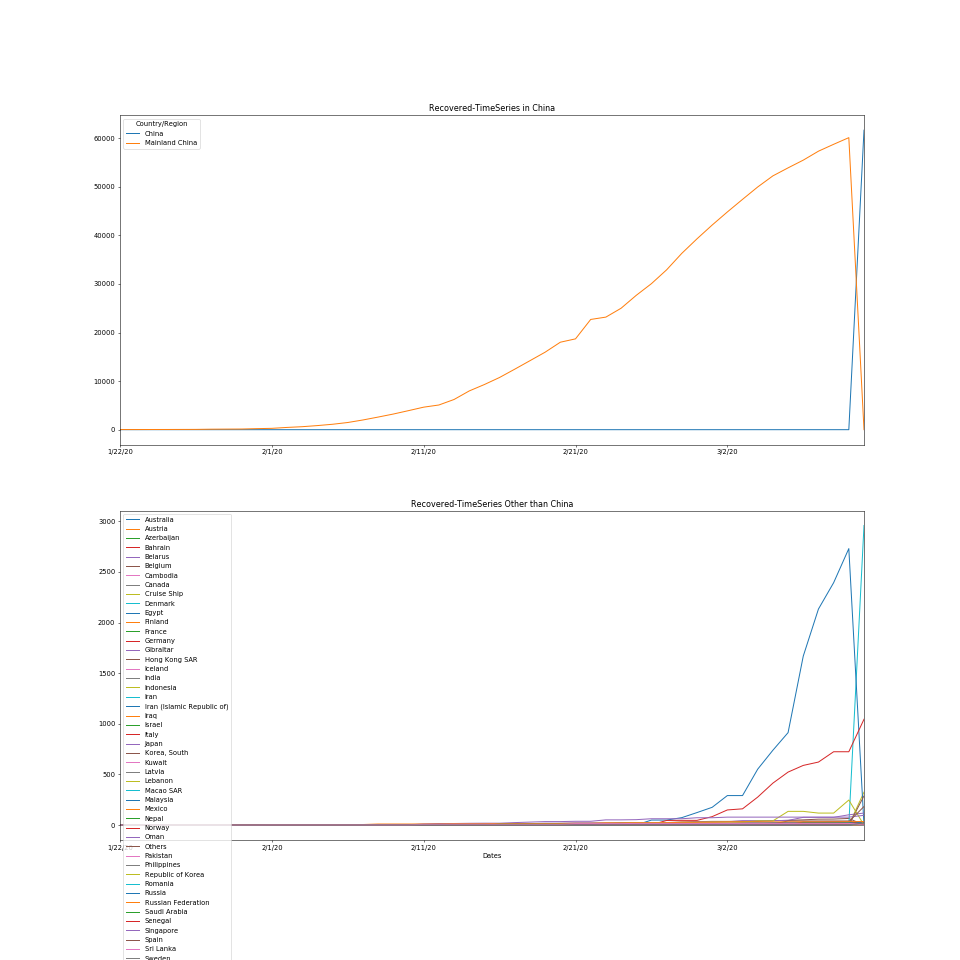

In [50]:
fig=plt.figure()
ax1=fig.add_subplot(211)
ax2=fig.add_subplot(212)

df_4_temp.loc[["China","Mainland China"],:].drop("cummulative_sum",1).T.plot(ax=ax1)
df_4_temp.drop(["China","Mainland China"]).drop("cummulative_sum",1).T.plot(ax=ax2)
ax1.set_title("Recovered-TimeSeries in China")
ax2.set_title("Recovered-TimeSeries Other than China")
ax2.set_xlabel("Dates")
fig.set_figheight(20)
fig.set_figwidth(20)
plt.legend(loc=2)

<IPython.core.display.Javascript object>


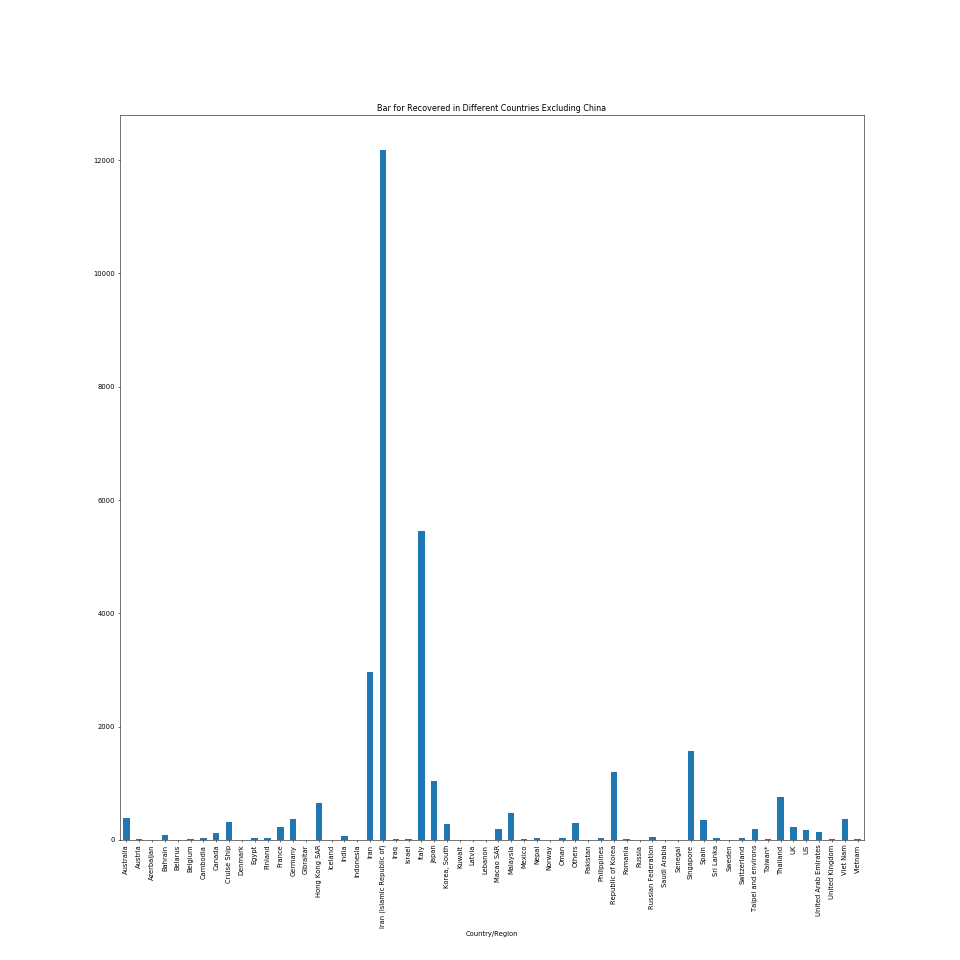

The Mean Recovered WorldWide is 16532.916666666668


In [53]:
fig=plt.figure()
ax1=fig.add_subplot(111)
df_4_temp["cummulative_sum"].drop(["Mainland China","China"]).plot(kind='bar',ax=ax1)
ax1.set_title("Bar for Recovered in Different Countries Excluding China")
fig.set_figheight(20)
fig.set_figwidth(20)
print("The Mean Recovered WorldWide is {}".format((df_4_temp["cummulative_sum"].mean())))
plt.show()

<IPython.core.display.Javascript object>


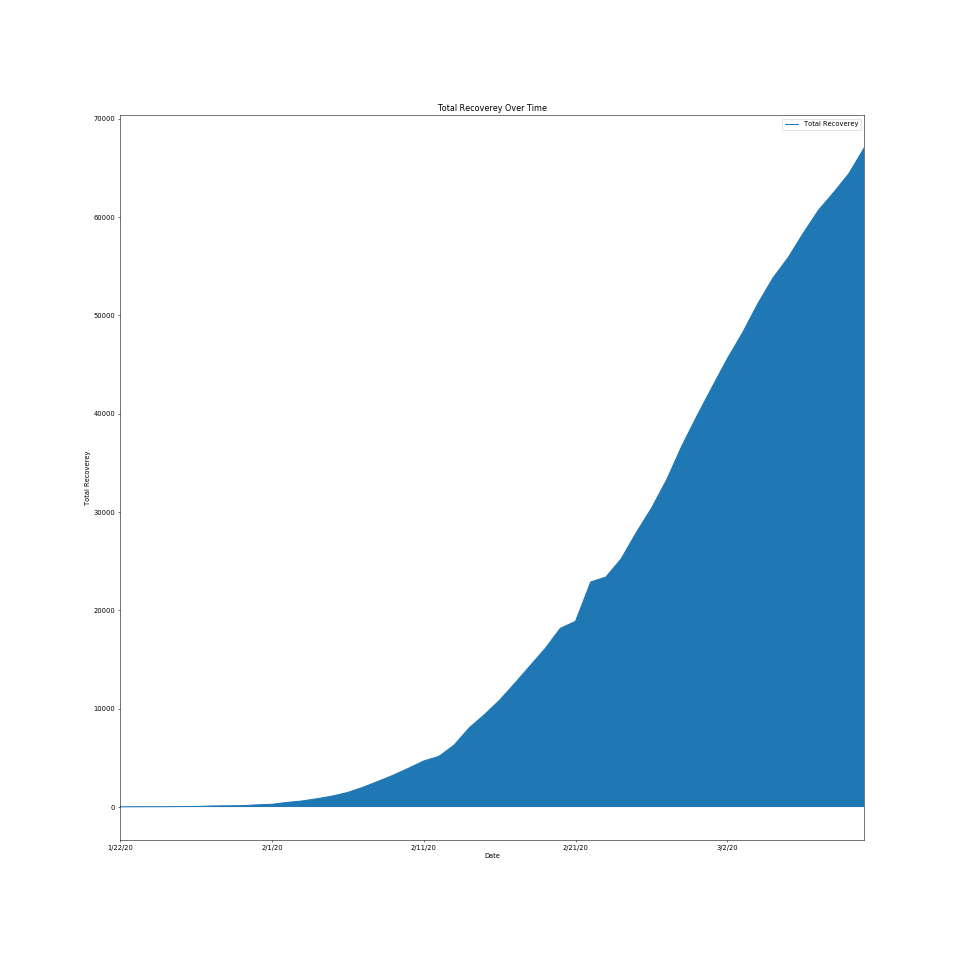

In [54]:
fig=plt.figure()
ax=fig.add_subplot(111)
df_4_temp.drop("cummulative_sum",1).sum(axis=0).plot(label="Total Recoverey",ax=ax)
fig.set_figheight(20)
fig.set_figwidth(20)
ax.set_xlabel("Date")
ax.set_ylabel("Total Recoverey")
ax.set_title("Total Recoverey Over Time")
ax.fill_between(df_4_temp.columns.tolist()[:-1],df_4_temp.drop("cummulative_sum",1).sum(axis=0).tolist())
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


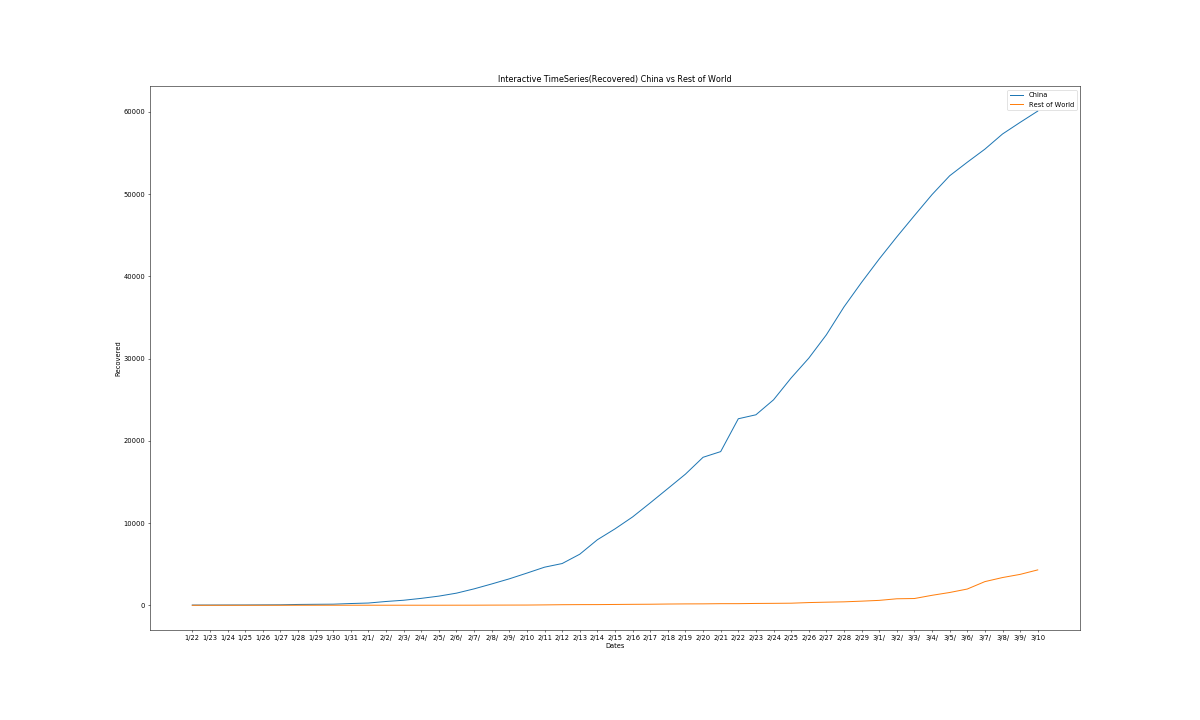

In [32]:
deaths_main_china=df_4_temp.loc["Mainland China",:"3/10/20"].tolist()
deaths_world_wide=df_4_temp.drop(["Mainland China","China"],0).drop(["cummulative_sum"],1).sum(axis=0).tolist()
dates=[date[:4] for date in df_4_temp.loc["Mainland China",:"3/10/20"].index.tolist()]
dates_worldwide=[date[:4] for date in df_4_temp.drop(["Mainland China","China"],0).drop(["cummulative_sum"],1).sum(axis=0).index.tolist()]
n=len(deaths_main_china)

%matplotlib notebook
def update(curr):
    if curr==n:
        a.event_source.stop()
    plt.cla()
    plt.plot(dates[:curr],deaths_main_china[:curr],label="China")
    plt.plot(dates_worldwide[:curr],deaths_world_wide[:curr],label="Rest of World")
    plt.gca().set_title("Interactive TimeSeries(Recovered) China vs Rest of World")
    plt.gca().set_xlabel("Dates")
    plt.gca().set_ylabel("Recovered")
    plt.legend()
    
fig=plt.figure()
fig.set_figheight(15)
fig.set_figwidth(25)
a=animation.FuncAnimation(fig,update,interval=1)

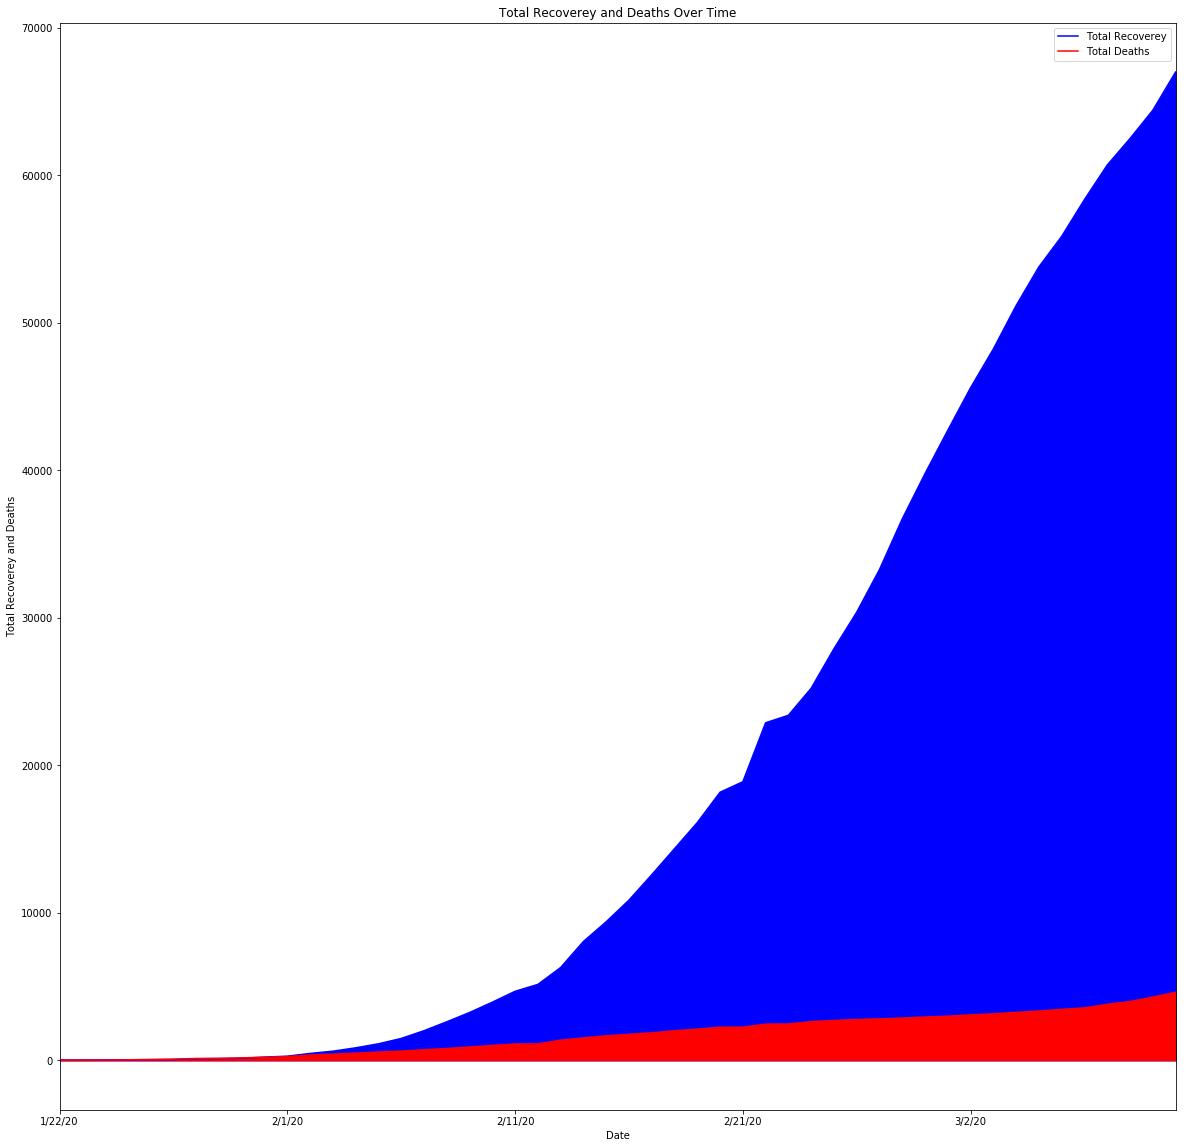

In [30]:
df_4_temp.drop("cummulative_sum",1).sum(axis=0).plot(label="Total Recoverey",color='blue')
df_temp.drop("cummulative_sum",1).sum(axis=0).plot(label="Total Deaths",color='red')

fig=plt.gcf()
ax=plt.gca()
fig.set_figheight(20)
fig.set_figwidth(20)
ax.set_xlabel("Date")
ax.set_ylabel("Total Recoverey and Deaths")
ax.set_title("Total Recoverey and Deaths Over Time")
ax.fill_between(df_4_temp.columns.tolist()[:-1],df_4_temp.drop("cummulative_sum",1).sum(axis=0).tolist(),color='blue')
ax.fill_between(df_temp.columns.tolist()[:-1],df_temp.drop("cummulative_sum",1).sum(axis=0).tolist(),color='red')
plt.legend()

### World Map Representation of Recovery

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAq8AAAE7CAYAAADzfmhVAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjMsIGh0%0AdHA6Ly9tYXRwbG90bGliLm9yZy+AADFEAAAgAElEQVR4nOydZ1gUVxeA34sgCBZUEDRS7Io1drFi%0AN7ZYorEbC9bYjQVjiy3GL4kxltg1sSv22DBibzFRY0dRsSKIgNLZne/HLOsuuyBlEdB5n4eHnXvv%0A3HtmdnbmzLnnniMkSUJBQUFBQUFBQUEhO2CW2QIoKCgoKCgoKCgopBRFeVVQUFBQUFBQUMg2KMqr%0AgoKCgoKCgoJCtkFRXhUUFBQUFBQUFLINivKqoKCgoKCgoKCQbVCUVwUFBQUFBQUFhWyDorwqKCik%0ACCHEWiHErEwaWwgh1gghXgkhLmSGDFkNIcQDIUTTzJYjvQghfIUQA5KocxVCSEII8/ctl4KCQtZF%0AUV4VFLIpGuXlhRDCRqdsgBDCNxPFyijqAc2AopIk1UxcKYToK4RQCSHeCCHChRBXhBBt3r+YHxZC%0AiElCiAOJyvySKPvyPcjjq1FmKycq36kpb5TRMigoKGQ+ivKqoJC9yQGMzGwhUosQIkcqd3EBHkiS%0AFJFMm7OSJOUGbIElwGYhhG1aZXyfZGHL4gnAPeH7EkIUBiyATxOVldS0TTEaa3pankF3gN46/RQE%0A6gBBaehLQUEhG6IorwoK2ZsfgHHGlDRjU666U7Qaa+VpIcRPQohQIYS/EMJdU/5IY9Xtk6hbOyHE%0AESHEayHEcSGEi07fZTV1IUKI20KILjp1a4UQS4UQfwohIgAPI/IWEULs0ex/VwgxUFPeH1gJ1NFY%0AVmckd0IkSVIDvwM2QCmd/msLIc5ojvWKrpVOCFFA45bwVOOasEunbqBGnhCNfEU05UuFEAsSHcNu%0AIcQYnePZIYQIEkLcF0KM0Gk3XQixXQjxhxAiHOgrhDATQkwUQtwTQrwUQmwVQhTQ2aeXEOKhps4r%0AuXMghMgnhFivGfuhEGJKgqKo+X5PCSEWaI71vhCiVRJdXURWVqtotusDx4DbicruSZL0VNO/uxDi%0AohAiTPPfXUcuXyHEbCHEaSASKJ5I7hwauYKFEP5AayMybQC66rwAdQN2ArE6/dQUQpzVfNfPhBC/%0ACiFy6tRLQogRmms+WAjxQxoVaQUFhUxA+bEqKGRv/gZ8gXFp3L8WcBUoCGwENgM1kC1pPYFfhRC5%0Addr3AL4D7IDLyIoEQnZdOKLpoxDwJbBECOGms293YDaQBzhlRJbNwGOgCNAZmCOEaCxJ0ipgMBrL%0AqiRJ05I7II1S8xUQBzzUlH0C7AdmAQWQz9cOIYS9ZrffAWugvEb+nzT7NQbmAl2Awpr+Nmv22YSs%0ARAlN2/xAc2SLrxmwF7gCfAI0AUYJIVroiNoe2I5sKd4AfA18DjTUnINXwGJN327AUqCXpq4gUDSZ%0A07AIyIesHDZEtlR+pVNfC1kBtQPmA6sSjkMXSZJigfNAA01RA+Ak8venW3ZCI2cB5PP8i0bGH4H9%0AQraOJtAL8ES+Dh4mGnIg0Ab4FKiOfB0k5ilwA/lcozm29YnaqIDRmuOrg3z+hyZq00EzRlXk76Kf%0AkbEUFBSyIpIkKX/Kn/KXDf+AB0BToAIQBtgDAwBfTb0rIAHmOvv4AgM0n/sCfjp1FTXtHXTKXgJV%0ANJ/XApt16nIjKwlOQFfgZCL5fgOm6ey7PpljcdL0lUenbC6wVkfWU8ns3xeIB0KRldYooItO/QTg%0A90T7HAL6ICulaiC/kX5XAfMTHXOc5twKIABooKkbCPyl+VwLCEjU1yRgjebzdOBEovqbQBOd7cKa%0AscyBqYnOvQ2ypbGpEZlzaOrcdMoG6VwXfYG7OnXWmu/dMYlzOx3Yqfl8Bdma3TJRWR/N517AhUT7%0AnwX66lx/MxPV+/L2mvwLGKxT1xydazihLfKL1SagLHBHU/cYaJTEMYxKkFezLQEtdbaHAkcz+zet%0A/Cl/yl/K/hTLq4JCNkeSpGvAPmBiGnYP1PkcpekvcZmu5fWRzrhvgBBkS6ALUEszTRsqhAhFttI6%0AGtvXCEWAEEmSXuuUPUS2WqaUc5Ik2QL5gT3I09kJuABfJJKvHrKC6KQZ+1UScmmtg5pjfgl8IkmS%0AhGyF7aap7o7GEq0Zr0ii8SYDDjp9Jz4fLsBOnfY3kRV6B40cuuc+QiOHMeyQp/p1rZqJz+Vznb4i%0ANR91v2ddTgD1NFZVe0mS/IAzyL6wBZBfnhL8XfXOVxJjv+s60K1P3FcC3kBjYDiy1VwPIURpIcQ+%0AIcRzjVvGHOTzokvicYokI5eCgkIWQlFeFRQ+DKYhW/50lYSExU3WOmW6ymRacEr4oHEnKIA8jfsI%0AOC5Jkq3OX25Jkobo7Csl0+9ToIAQIo9OmTPwJLUCahTMIUAvIcSnmuJHyJZXXflsJEmap6krIIwv%0A7nqKrFQCWveIgjpybQI6C9n3txawQ2e8+4nGyyNJ0me6oiYa6xHQKtE+VpIkPQGeoX/urTVyGCMY%0A2WLrolOWpnOp4SyyC8JA4DSAJEnhyOdmIPBUkqT7mrZ65yuJsZO7DvSOU7OvARqF+wDy92ygvCK7%0AWNwCSkmSlBf5xSGxW0TicZ4mI5eCgkIWQlFeFRQ+ACRJugtsAUbolAUhKw09NQth+gEl0jnUZ0KI%0AeprFL98hWzsfIVt+S2sWFVlo/moIIcqlUP5HyNa8uUIIKyFEJaA/8EdahJQkKQR5kddUTdEfQFsh%0ARAvNubASQjQSQhSVJOkZsiK0RAiRXyN7gj/nJuArIUQVIYQlsgXvvCRJDzTj/IusLK4EDkmSFKrZ%0A7wLwWggxQQiRSzNmBSFEjWTEXgbM1ijCCCHshRDtNXXbgTY6534mSdy/JUlSAVs1feXR9DeGtJ/L%0AKGTf6jHI/q4JnNKU6UYZ+BP5OuguhDAXQnQF3JCvj5SwFRghhCiq8SFObjZhMtAw4btIRB4gHHgj%0AhCiLrOQmZrzm+3ZCjtixJYUyKigoZDKK8qqg8OEwE9kXUpeBwHjkKebyyApietiIbOUNAaoh+x6i%0Ame5vjrxQ6ynytPT3gGUq+u6G7Ev6FHn1+DRJknzSIevPyMp2JY1y3B5Z4QlCtnKO5+09sBeytfIW%0A8ALZRxLN+N8iW1SfISv/ieOZbkT2Pd6YUKBRINsgr8i/z1sFN18y8i5Ednc4LIR4DZxDtuYiSdJ1%0AYJhmjGfIi7keJ9PX18iWd39kJXMjsDqZ9u/iOPJCNt2Fdic1ZVrlVZKkl8jHPRb5mvsGaCNJUnAK%0Ax1mB7It8BfgH2T3AKJIkPZUkydjCP5AX5HUHXmv6NKaY7gYuIS883I/s36ygoJANELLbloKCgoKC%0AwseBEEJCdim4m9myKCgopB7F8qqgoKCgoKCgoJBtUJRXBQUFBQUFBQWFbIPiNqCgoKCgoKCgoJBt%0AUCyvCgoKCgoKCgoK2Qbzdzd5i8bJXUFBQUFBQUFBQSFDkSTJIG01pFJ5BZjk5cWqVatBUvMiUE7E%0AM9FrCjOmfkvOnDnTKWby+Pj4sG/fPj799FOKFy9O8eLFKVy4MGZm2deAHBYWhq2tHBu97rrznO5T%0Ai7CwMPLmzavXLjo6GsfChQkLDcWhYXsKN+5EobqfGetSy+GmckKZEydOUL9+fYP6hFTmBQoU4Pjx%0A45QpUwYLC4s0HUezZs3w8dGPatTcJ5iIx3d5tHcdATuWAtB4z33MrfMY68KkJBx7YtavX0+vXr1M%0ANs6rV68oUKCAdrtQ3dZUmbHOZP2birP96vA6wM+gfPTo0fz444/abTMzMOZJJASo1cb7XrhwIaNG%0AjQKgSItuVBi/yCQyZ3USX2OnT5/G3d0dgPnz59OyZUsqVaqU5v4Tfp+F6relyrQ1BvXPfXdxddYA%0A7bZardbukxReXl5UrVqVjh07vrOtrgzNjgQhhODGz2N5vG8dq1evJiwsjNGjRwOQv5I7pQZMxdat%0AOmcHe/D67n+cP3+emjVrpvh4szO167hz/txZbt++TenSpTNbHJMxdOhQNmzcRFiofvK5unXrcubM%0AGfr168eqVUqEsfRw7do1PJo24+WLQD5r2459u3dltkhZhuTuUanyeRVCSAntVSoVv//+O02aNMHJ%0Ayekde5qOuLg4AgIC8Pf3x9/fn2fPnqHWeara2tpSrFgxrXKbJ0/GK0rpIeHLKTNsDq8un+LF6T9J%0A7jvx9vamc+fOSJJE4aZfUHHi0iTbJjxcdR9qkiQlq+zb2Njw5s2btByK0Qst4aEnSRKSKh4z87Qp%0Ax6klKeW1Xbt27N6926RjzZgxg+nTp1P26/k4t+9n0r5NRciV01z/fig2ruUIvqD/kqFSqbTXhKsr%0APDSSkNPFBR48MN637vfe3Cel4TyzL5JKxZEWDnplur+xK1eusGzZMn799Vdy5MiR5nGSO68xL59z%0AvGsFAG7cuIG3dy5WrHAlIACcnWH2bOjRw7DPqKgomjRpwq5duyhUqFCKZWh68Blm5haE3/2Pc4M9%0AmDlrFiOGD9e+eBdycOBNRCQW+QsR9ugeAPny2XLv3l0KFkwqEdiHg6+vLx4eHnTo0AFv7yRD02Yr%0AIiMjyZsvH3369GXVyhV6dXFxcdSpU4dLly4B0Lt3b7y8vD4oxf19s2LFCjw9PXEs6sQvP/6PL774%0AIrNFynQ0uoNRDTbNymtWJTQ0FH9/f+7fv4+/vz+vX79NlZ4jRw6KFClC8eLFqVatmvbGm16CgoII%0ADAykQoUKybbz9/enePHi2u0iRYrw7NkzXLuOoPTAqVqFK6lzHBAQgEqlolixYnTo0IFdu3Ylqywk%0ApcC9i5RYcJIiMjKSOXPmMHv2bAAabb9FTtu0yZEekjv2pCzRqSU6OppcuXLplWUX5S3x+Um45jZs%0AAE9PiIx8W2dtDcuX6ytDt2/fpmzZstpt1y7DKe05PSNFzjIYu7bi4+O1iqparWb9+vXkzZuXjh07%0ApnmckiVLcu+erAjqXleRTx9wqnd1AA4ePEhwcIsUfWcJTJkyhRIlStC3b993/s7nzJmDl5eXdrvq%0AvG3YOJXi6rh2hD0LAODAgQO0bNmSmJgY9u7dS/78+fH29mbJkiXa/caMHcv/FixI9TnITlSoUJHr%0A16+l6/6ZlYiMjCR37tzs37+fVq1aGW3j4+NDs2bNgPQZPhTke/CBAwcYMGgIzx4HUM6tPGdOnzKZ%0AnpId+aiU1+RQqVQ8ffoUf39/Dh06xJw5c0zSr+6N6vjx4zRo0CDZNolp7hNM5LOHnOpVDdB/EBrb%0Af8eOHXTq1EmvvlC9NlSZvtag7+C/j/HPRP03uIbbbmCZX7a6qONiefzn70S/eMyDLW+nez09Pfnt%0At9+SlDk5goKC9Kw6jfc+xDxX4sRPGUtSyuuoUaOYN28elpapSfxknNjYWIN+soPyeuuXbwjY8zbZ%0A0qBBg5gxYwb29vaYmZmxYQN4eWFgxZMkidDQUEqXKUNwUJB2/0peK3D06JAZh/LeMXZdhYaGki9f%0APm7dusWWLVsQQvDmzRvat29P3bp10zROQEAALi4uADQ7FIjIkQNJkniwdRF+K2Zq2zg5OaXJWj5h%0AwgRGjBjBJ5988k5ZHj9+zNy5c7XKaNnh8yhYvRHCLAenetfAy8uLWbNmGeynVqu5du0alStXBpJ+%0AKf9QKFOmLHfu3Ob58+c4ODi8e4csTnx8PBYWFhw7doxGjRpltjjZnqioKMLCwjh//jyXL19m+vTp%0AevVnzpzhn3/+Yfjw4QDkzpMXS0tLjv11lIoVK2aCxJmPorwaYfr06QYXT1pJTjH9+eef6dOnD/nz%0A5zeoq/6/3RSoXJcXZw5wY+5gYqMi6N27NzY2NsyaNYsCBQogSRInT56kYcOG2DiXIkLjt2hnb0/D%0ABg2IiIjg4MGDAOQq7Er93/9O17EkfjivWbOGvn376pWdOHGChg0bAlCqVCk+++wzfv75Z702np6e%0ArFghTzXVWX6cPMXLp0uutHC0rQuqqAhAtiBNmDDBpP7RV69e1T6YE8gOymtyVmljv29j17fHrntY%0A5E4u0+mHx7GOpYkLDzEof/LkCYGBgezatYvJkydjZmbGkydPcHV1TfUYarVa78VV93rS/d50/WtT%0A66e8c+dO7cMztRZC3fY5bfISGxHOH3/8QQ9jJl5g2rRpzJw5k/379/PZZ8n76Gd3hBDkzJmTmJiY%0AzBbFJOzbt4+2bdtqLesKqSM+Pp4ZM2YYfbEDyJ8/P8OGDePw4cNcuHBBry5IYxwoV74CIcFBNPRo%0AzIH9+0xidMlOJKe8Zt+VTlkISZJ4+vQpW7dupUWLFnp1o0aN0lNcm/sEa/8KVJatMsEXfIiNiiBX%0A3vxs2raDpUuXaq2e/QZ60rBhQ4q26kHtJUdpuO2mvE9QEDt27MDe0ZGCheS3fLuaTdN9LImVr6++%0A+oozZ87olen6sPn5+bFw4UJ++OEHHj58qL1x9+zZU9vmrGfDdMuVFvIUf+vGMXnyZObPn2/S/lu3%0AaaO3Xaz7GJP2n1F47LpHlRnrqbfuAnXXnqfRjtvaOiEEPb/qhxCCwYMH6ykrlgUdKVijCc19gj8q%0AxfXZMW8ON7UzqrgCFCpUiIULFzJt2jQsLS2xsLAwUFw3bJD9ic3M5P8bNhj2I4TQU1xrLT6i/ayr%0AuKrVaq3iCrJ13BiOjrFGy588eYK9vT1xcXHGd0wGSZKQJIng4GB2bdtMdHR0kooroLUet27dOtVj%0AZSeuXLkCyLMxHwrjx48HUBTXVDBu/HiEEAghsLCw0CquzZo146+//kKtVmt/QyEhIXz33XecP38e%0ASZKIiYnR1tnZ2WFnZ8cD/3ssXLiQs6dP41i4CPnt7BFCULNmTZYvX05kZCRqtZqVK1fyQDPNEhUV%0AxcGDBwkJMX6/+lBQLK8mJiIigkGDBrF06VK9iAGfztqIfe3mRvdRq+IJv30Zm6IlsMibn78H1cej%0AihvVqldn8qRJ1PnNlzwlDP1pg84dJvzqaawcnCjSrr9J/ax0H5ZLly5l0KBBev3v3r2bzz//3Oi+%0Az549Q5IkihQpoi3LLItkYitjwlRrelm0aBEjRozQK8sOVtfkiA0N5vnx3cSHveTu+reKvqV9ERpu%0AupqJkmUej/et48bPY5OslySJPXv2EB8fn6R/67v8iBP/buutu4D1J7JvfFK+ye/qHyKAgURGrjLw%0AywZZ2VqxYgXdu3fXU4QzgsWLFzN8+HCePHmid0/4UNBdBHvr1i3KlCmTyRKZhoTrsl279uzc6Z2t%0Ao/q8L8aOHcupU6f46quv2LZtGyVKlGD58uXp7vfRo0fMmjWLqOho9uzZaxD9ISlGjRrF+PHjs+3v%0ALtu6DUiSxJUrVzh06BCvXr3C1taWFi1aULFiRczNUx3lS4+MUl4B7t+/T0xMDGXKlNH7wadUubmz%0AeBIPdq7Aqf5nOPX1IrfL+78ZqmKiONr6rZJXpkwZJk2aRO3atbU35zVr1tCv37tX11eZ+TuF3I07%0A/Gc0ca9DOdahpF7ZgwcPtBahtBASEmKwgjq7K64Kb0nKrSIkJET7QNddRHH79m0OHjzIyJEjje6X%0AlE8qPACK6ZXoXkfq+Dh8WhbWbif34qXrp+zkJBEQ0APYpK03dt+WJInJkyfTr18/SpUqZVAfERHB%0A4cOH+eyzz9I1XZngOwmyf/WyZcvS3FdWZNOmTXTv3j3J9Q7ZFZVKhZeXF99//z358+cnODhYUWCz%0AAD/++CNjx44lPDycqKgotm7dSrdu3RBCsGXLFjp16mTgc51djY5ZRnl98uQJTk5OdO/Rgx/mz6dw%0A4cJJto2JicHKyirJ+tjY2DTHJIWMU15fvnyJnZ3hw6/pgaeYWWRsHNykiI+KSNOCKUmSONLMPsk6%0AgNWrV9O/f/9k+6m3/iLWRYol2yajSTztmlYrdUOPxpzwPaZX5rHLH4vceZPYQyG7oI6N4dbiSTze%0Av96gbu7cuUycONHofhcvXsTf35+uXbsarU/KJxXUgOwmUHf1WWyc9RXIhGt26dKlDB48OMXHAdCv%0AXz/WrHkbG1atVnP//n1evXpF5cqVtS//R44cITIykvbt2xv0oevT3bZtWzZv3oy1tXWq5EggIiKC%0ATp06c+iQ7J+/devWDyYUkL+/PyVKlADg9evX5M6dO5MlMi0bNmygZ8+edOnShS1btmS2OB898fHx%0A5LK2ZuHPPzN06NAk29y8eZP169ezQBPlo1q1akRHR3Px4kWjszFZkSyjvL5580Yv7urIUaOxsc6F%0Al5eX3k1RkiRy5cqVrON7et8kMkJ5DQ0NNViY1WRfADms0nbDTy9ht//l/LBmemX5K7nj+uUIbN1q%0AYm6TByEEQeePcPnbHuQpWYlaiw4hjMSmjHh8j9N9a+mV6U6ReXh44OvrC0CT/Y843rUC8W/CKNKi%0AOxXG/5IxB5gKnp/Yw9WZspV49+7dtGvXLk396Cq9pT2n49pluEnkU8h8krK4lixZklu3biUZs/Xa%0AtWucOnUqSQXzXZbXpF5s3xU6LykSL/pKTIUKFfnvv6tERkYycuRIfvvtNwOL2uAhQ/jNiIXUWCSU%0A1BAeHo6bm5vW79bLy4suXboka8jIDjx8+FDr51yiZElu3byZ7tnBrETfvl+xbt1aBnp6sjyNUWgU%0ATEcd97rcuXObl8HvnvELCQmhSJEiWn2qRYsW2kXeWR2TLthq2LAR06dPT5MzcO7cuQkODtbGh1y2%0Adj1z5szBxsaGixcv8uLFCy5fvky7jp2MKq5hYWFah+asRkREhIHi2twnONMUV0CruJ4+fZo//viD%0ARo0a8erqGf6d/CXHPi/OkWb2HG5qx79e3ZDUasLvXOZICwduLjK0MNkULUFzn2CaHX6hLStbtqzW%0AOd3X11frV3O0tRMe3n409wnOEooroOdv3L59e4QQqFSqVPdz48YN7ec7y6ebQjSFTCTk6hkON7Uz%0AqrguWLAASZLw8/N7hzJYgfv37ydZP3u27OOqTwQwmVIDp75zRmbdutRlbDMzM2P79u1J1l+79h9P%0Anz5l9OjRzJgxw+hUsEcSoZHUSaVZSyF58+bl8ePHrFixgqCgIEaNGkWRIkXYt29fuvrNbFxcXAgN%0ADaVjx47cu3sXCwsLhBAfzAKutWvXsGTJEkp/IP682R0XVxci9Z3ck6RAgQJER0dr9aZDhw5lSR0q%0AtaRaeQ1/85r58+djZ2dH5Sqf8t1336Vq/4IFC+Lr60uZcm7EhL6k3vq/sS7iSs2aNXFwcODTTz/l%0AWtzbaRfdFXiJU6ZmFYKCgvSmiuxqN89SPpDu7u706NGDY8eOERcXR8uWLdm3b582vNWdO3eQJIlH%0Ajx4B8Gj3Si5P72O0L2FmRnOfYJr++cSg7unTp3rtshI5cloZfCdpiWNbtmxZHB0dAbC0y97WIgUI%0APu9jtNze3l4bbzElJJcau0cPeXGWi4scvkp2tx4IbKJY1xFJ7tdgo7yCPWFGIzV06tRJuwLeGHPm%0AzGHOnDlJLuTo2rWrUYX91auULRR5FwMGDECSJK0yHJwCC1JWJ1++fOzYsYPw8HA2btwIkOSi1uzI%0AkCFDGDcme0RU+dA5fOgwrVMZei4wMFD7+UNIopFqDePfS5eIiIhgx44dXL1ymalTp6Yq5Mrp06dx%0AdHTk9k3ZgmVmkZN66//GY+ddGu99gMeue0QEyKF7njx5kuxDIavwzz//aD83OxJE1VkbM1GatwhN%0AKlbdC9Xc3JwDBw7QunVrRo4ciSRJ2sUaRYsW1fr1vTi1n8NN7Qi79Y9hx4BZTku9sF9ZSVlPKcOG%0ADdOmN0wpy5Yt4/nz54C8oEYhe/Ngi+HMQLly5Xjx4kWKfeolSSIgICDZ+2CPHnLCALUa8uSpiO5i%0AqqSwKiQnEFi7dm2K5NCld5++BjGIE6hfvz65c+fGzs4OIYQ2xE5iunT9EoDKU9fQ7EgQuQoUwmvK%0AlFTLkhwJqaMTx5LOzuTJk4du3brRsVMnDhw4QPcePYiPj89ssRQ+ACRJov+AAYSGvuKHH35I1b4J%0ARpdr165lhGjvnQz1eVWpVOzYsYPWrVuze/du4uLi5JSEOczx2HUX81yytTLy2UPOD25EXIScyrVT%0A1278vsZ4iBdTYSqfV90wKZW+XYVjQ8OFD5mF7oKr1CxSunLlClWqVAHAxqUMdVedzjAZM4PEU8SJ%0Aw9vs2rWLiIgIunfvrnfO4uLi9F6mmh56jlmOD8ev7WNE91qYMGECdnZ2vHr1ijlz5lCzVi3OnzuX%0Aon6uXr3KkiVLmD9//jtniBKuKYcG7ag8dXWybRPkS62vaVK/9Xbt2rFnzx4AirToxtNDshJ99OhR%0APDw8DPabv+B/TBg/jtyORSk3YSkXR7dl+/btBhn+FAyJjY2lbt26/P23nDgmPj6ePXv2cOfOHdzc%0A3Dhz5gzx8fH07t2bK1eucPv2bcqXL0/ZsmUpUKAAtra2mJubY2lpmS4/Y4XsTUxMDCdPnuTp06fM%0A/G4WD+77s3LlylS/8JUqVYq7d+9y48YNypUrlzHCmpjkfF4z9Mn75s0boytway78E/NcuZEkiTf3%0Ab3Jt7mDiIl6zfft2SpQooVWcsgNbt24F5IVQWUlxTUxqpgkqV67M6tWr6devHxEPbxsoe7WXHSNv%0Ayeybrq7h1usc7/I241fZsmU5d+4cLi4uegtHevbsSXR0NJaWlsTGxhqk0lQU1w+L77//Xm/7wvni%0AuLhIPHok9NLkGsPJyYm8efOmaBaqUaNG+Pr6Uvbrecm2U8VGaz+bQnkZNGgQ+/fvByBPiYpUGL+I%0A8mN+5uaiCXTu0x9nx0KcOHpET/l+9VKeUXnz/DH+62R5//rrL0V5TQE5c+bk4sWL2NvbExwcnOQC%0AroTV4CmhTZs2/Pzzz9roBgofHrt27eLXXxfjf/8+wsyMh/f9te415cpX4NatW5QsWfIdvRiyYsUK%0APDw80hwxJKuR4dEGQkND6dGrN/cfPODmtf8o5FYV68IuvLx2kZjwEFRxseS3K8SyxYvolESQ74zA%0AVJbXBKWwyf5H5LDMWuEndJXOtDhoHz9+PMmc1tnRTSAxEY/vcrpv7WTbPHr0CDs7OywsLPQePuVG%0AzMep3btj3CpkbZJOldsNS9ZFp+wAACAASURBVMvfiYl5qzTqJhZITNeuXfn666+pV6/eO8c8ePAg%0ArVq1wqn9AMolo8Ce6PEp0YGyH3pafr8JYftKlS5NbEwMDx48IDY2loGeg1i/bi2Ntt8ip60mooFK%0AxT8jWtC+QU1WLX/rC+7t7a2nqJYuU4bz587pxblVSJ7IyEjaf/45PkfkjGnFihfH/949QJ7NCQkJ%0A0cbljIuLw9zcnOfPn3P79m2uX79Ojhw52LZtG3/99Zdev2vXrqV9+/bKd/EeCAkJ4dKlSzx9+pTu%0A3bunKkxnwpqdpGLkRkREcO3aNebMncvZs2cJDgrCrUJFypcrS7xKRc8ePWjTpg1mZmZpfokNDw8n%0AXz45K6JKpco28XqzTKis4OBgjh07RmRkJFZWVlSuXJkyZcpkivOwKZTXBLmrfb+dgtUapV8oE6P7%0AYA4NDdVevGkhuZzr2ZnrC0by5KCcq9N91RnO9DfMNlSwYEFevnypV/ahHP/Hju5vpFOnTtSqVYtv%0AvvmG3LmDefOmoEF7FxfZdzUxR48eJTQ0NEUWSd2g/QDNDgUaDU8nqVQcafE22HhERESyVpNPPvkE%0AV1dXg3TOCei6DuXNZ0u+um1wG7tQW397iRcPvX8jKirKIMZ2WFgYe/fupVu3bsoUdjpICDD/888/%0AJ5nUIjkkSWLt2rV6yWHGjh3LpEmTDBKnZBRDh8ovcSoV5MghZ3dbsuS9DJ0pODo66i12Aujduzcz%0AZswwSAOtiyRJLFy4kOnTZxAWFop9IQdymJmR08qSN+GviY+Px9zcnFevQpAkCdfixfFo2JBZs2aZ%0ANCNWbGysNsnIn3/+SatWmZMwKC1kGeU1K2FK5TUrKzIJD+eEDGXpIeF4U5pwQVcxyMrnKDFJW+Pe%0Akp2ORyFp4iNf81c7Ywk01IDhPVMIedFVYsLCwli4cCFTp05N0bjR0dF6Pv1uo/5H0TaGET7ODW1K%0A+J3LemWXLl2iatWqSJLEiBEj+PXXX1M05rRp02jQoAFVqlTB39+fGjVqUH/DvwRf8EFSqbj160SK%0AOjnxKCAgRf0ppJ4EC9ywYcNS/L0lxatXr2jeogV/X7wIwJYtW+jSpYspxEySoUNh6VLD8iFDPjwF%0AVpIkPD09WblyJXv27KFt27aEhYVRvUYN7vr5AbB8+XIGDhyot8+QIUO4ffu2XpSQOXPmEBgYiJmZ%0AGeHh4RQtWhQbGxtev35NnTp1aNmyZYYZ8fz8/ChdujQA58+fp2bNmhkyTkZgUuV1TBKhMqKiorJN%0A1gaQp8MqVKig3U7LhbN3714gaysy6XUdAGjcpAnHdKasPp2zGfuaTZPd5+667/H//e1qyJq/HMTW%0ArXqaxs8sklJia/y0l/wV67xnaRQyAmNZ5ObOncuyZRONJhZwcYH79yWGDRvGd999p7V2HThwgOjo%0AaDp06JCq8X19ffHw8ACg1uIj5CvzqdF24X5XODekyTv7c/liKC6dhmBlVxhVTBQ5LHOhVsXj08JR%0Ar92iRYvwPXGSHdtkn/3K1Wty5+Z17ty6RdGiRVN1DAop5+7du5QqVQpXV9dkYwOnhkePHuHs7AzI%0AMax37dplkn6NYW4uW1wTkyMHfGgBFdzr1uXsmTP06duXtTrZ6hJwcnbm8aNHrF+/nl69enHt2jXq%0A169PaGiots2gQYP47bff6Nu3r17Gu/eNSqXi7t27eguTswMmVV69vb2N1n377bepjvmaWvbu3Uvb%0Atm1N0tf48eO1cRzTqtSNGTMGa6eS1FuTshXJmYEplNe5c+cyefJk7bZF3gJ4eN9Jsn3inOwJZGUl%0A3xgvzhzg8tReFO85jpJ9J6KKiSLc7yr5K9R6984K2YbELylqtZqNGwWenqAbBzzB5zUkZBEjRozA%0AwcGB58+f069fP+rUqcOAAQPS9BLcoEEDTp48CST/G0nqZaq5TzABu1cRdvMSpQZ8i5VO/OHkZhEO%0AHjxI5y5dmDZtBuPGjEq13AqpQ5IkWrZqxeFDh8iZM2eyGSTTQsK1l5Gzo8ld3h/IpCy//PKL1qUj%0AuTTG8fHx1K5d2yDc4s6dO/Xi+7558wYbG5sPIrZqeomJiaF3797ahe7Lly+nf//+BAcHY2traxAa%0A9b24DSSsoM1ITDmGKfrK6m4DklrNkeaFADmRgp3du6fDk2PXrl1ay1Jyx6yKjuRoG9kSkDNnTm2W%0AmTJDZuHSKXU52hUUMprECt6FCxeoUaMGGzaAlxcEBKAXbSDhdz99+nTGjRvH8OHD02xV0X2gOXcc%0ARNmhs5NsK0kSkY/vYuNUiojH9zg7qBHqmCijbV3b9sHMOg/+W+Sp6eXLl/PVV199UClLsxMqlUp7%0A7ps3b87evXtNHsP89OnTegsGN27cSLdu3Uw6xodueR08eLA2ec3JkydTtADzxYsXODo60qRJU44c%0AOZzRImYJjh49yvTp0/H09CQ2NhYvLy8+//xzVCoVQUFB1K5TB9/jxxnYvz9169blyJEjREVFMWjQ%0AIAAcG33Oc1/DGYIHDx7g7OysvS+aND2sgkxqEjNkFgmKK5BuxRVIsVtIguIKUL16dYYNGwbA7aVT%0ACDp/JN1yKChkJAkLG3UTCzx4AJaW2/UWK02fPp3cuXNrg3+nlsSWmOQU14T2Nk6lONzUjtN9a2kV%0A12bNmnHo0CHUajXh4eFs3bqVER6VaV1IYGlpxY0bNxg4cKCiuGYiK1asAGD79u0c0lheTU3dunU5%0AffptTO6EONVJufqlBU/P1JVnNxIU1/j4+BQprgCFChVCrVZ/FIrrkSNHqFyzNk2bNuXUqVN8u2or%0AXr+uITAwkN9++40/7wSye/duJk2cyKEDB+jV35PChQvTu3dvreIKUP6bX2nuE0ytxUfIU6qSNnKP%0Aq6srLi4uvHjx4p2WasXymkZu3LhB+fJyrNCibb8it3NpbCvWzjLxT03hLqBLSEiI0dWsuhbYsFv/%0AcH54c+22u7s7Z86cIVeuXERFvbUQNdpxh5z5CqRbJgUFU/DQ+zduL/HSbhtbkavrV5iYpUuXMnhw%0AymcUEkcbADn2sGUBhyT2eEtqEo/MnTsXDw8PatdOPhycQsaT8D3FxsamKsxSWomOjqZVq1Z6zzhT%0AuRN8yNEGHj16RNGiRZUpfiNs3bqVL7/8kkrT1mJXo3GSoUGfHd2O38rvqPf735iZWxATEohFbltU%0AsTHyzJFzKcyt82jbx4QE6sVdT0ymJCn4kHFzc2PVqlX079+fx3vfThk22HQVK3vThblIL6bKRX7o%0A0CGj5Yeb2uGx8y5RgY/0FNeyZcty+PBh7t27R7t27Xios/rldN9aeOz0M4lcCh82ZwfW5/X9mwbl%0ATQ8+w8zcNEqAee63IeT27NljoLjGxcXpKa4NNl3F0q6wVokcMGBAisbp378/q1cbZtRKjduR7kM1%0AuQdsfHw8b968URTXLICub+v7UFwBrKysOHbsGIDeFGxYWNg7M8C9iyVLPhxlNTFOTk6ZLUKWQ61W%0As2vXLrp27UpFr+U41GudbPvCTTpTuEln7XbCS7lZTkvyla1q0N6ygAOVvVYQ+t9ZrJxKYl+zKRGP%0A/LCr2Uxv9jgxittAOtCNtZeQAePu2rmZJY5R8ufPb5K4jN26dcPHx4c1a9Zogy4ncKxDSc4N9tBr%0Af/LkSWxsbKhUqRKtW7fWC9MV9/oVqiR89RQUEnjqs9Wo4gogTJjdrEiTtwsy2rVrh7m5OdHR0ahU%0AKurXr6+d4nX5YijNfYKxsi+ipzhaWFgQEhLyznG++uorve3mPsHp8pcXQtC0eQujdebm5tnCtelj%0AICFm7vLlyzNlfJVKpXXdypcvH0II5dpQSBFBQUFUqlaDwROnUv1/uynskTGJpBw8OlBmxHxcOnhi%0A/Ulx7Gu3QLwjkYKivKaTyMhI4uLiEELQr18/ba7wzKa5TzAeO+8Cb6cXX79+na4+mzRpos2nvHv3%0AboP62NhYbty4gaenp9bH9ubNm6xbt45///1Xr+3R1k5EabIHKSgkRpIkrs0bCsCaNWsICAigbv0G%0A5LZzoNr32006rSdy5KDZkSDyaqwCKpWKXLlyYW5uzqlTpwCo9oM3ZQbN1NuvyszftZ8fPXr3tazr%0AQ+e+yngigZTQ5M/H2s9Hjxzm+++/x1gUmNDQUKKjow3KFd4vLq6ueHp66sUDfZ+YmZnx66+/8vz5%0Ac22ZKdZAKHz4fDt9Bm8+qUCVJb4UqFw3s8XRQ1Fe00nCQw7eOuWH3/0vM0XSYpHHluY+weSwsgEw%0AaQYWc3NzcubMydatW9m+fTuSJGFhYUG5cuW0Tu8AZcqUoUaNGvTq1YsePXvq9XGyh/GYlgoKurFX%0AW7ZsibOzM6dPnuBNcCC3l03Ff+NP+K2aRejNS8n0knKEENT+9TDV5usrgTYuZWh2+AUFP20AyEr1%0Am4d3+Hvc59hVb6xtl1ymHWPYFE15bnp1bAxPD2/h1k/ywpscOa1o7hNMgZLladu2Le7u7ty7d48v%0AvviCu3fvauX08/Pj7NmzqZLrffD8+XOmTp2aoSGdshIP7t/XuydmFg4ODkiSxPfff094eDhCiBTN%0AGCh8fMTGxjJ46FB+W7KYwm2/ypI+wIrPqwkxMzNjktcU1q+fR/mZcspRSZJQx0SRwyrptI4ZTZN9%0ADznc1M6kU0WtW7dOUZxCMzMzDhw4gL29Pf369eOP33+nZq1aXLxwwWSyKHy4XL9+na+//lqv7M39%0AG6hyxPEq5CX3N/1M/Q2XyeVgmsD6Bas2SHIqX1KruTG1G0/OHQVk14VKXiu4Onsgtra2qVLGjKWD%0ANcaLswe5/G1PXEuVIcDvNpa2BXHuPobAU/kICzjK3ruFuHpVMHt2ff74IwYvLy+ePXuGubk5Dg4O%0A2gQImcXfl/6hRvVqAFhb2xAZGaGtmz59epZ8KH7ofPPNN+z/809OHD/ODz/8wNy5WcvVTSFziYyM%0ApN3nHbj67BXVF+zMMovQE6NYXk1Mx8/b8+TMIZ4d3YbfjyM4+6UbJzqV5t6SScSFm2bxVFqo97ts%0AoTK2YCSjsbKy4s2bN9q87110gj6nJBWrwsfL9evX+fXXX2nTpg0BAQFaf2t/vzvYaEK36QblzwiC%0ALxzlwZZfuPXDMBykSG1aT5EjB44eqcuolVouf9uT+fPnc//OLZ48eULwwd/5b84JbvxogyrWARA8%0AfCiv+N6+3ZIFCxawYcMG1q1bR8eOHdOdgjS9xETr+Lbr6Kl3797F7B0+bQoZx3FNFIJ58+ZRq5aS%0AdEVBZt68edjY2HArQuA2bR0FqtTPbJGSRLl7mBBJkqhRowYA/80dwpBGVbhy4Rz3/O5Qz1biWMdS%0A3PimPf/NGUzQufcbE866sAsA27Zte6/jghy2xc7OTrvK9csvv+T339/6C6qiI5PaVeEjJD7qrXWu%0AV69eFCpUiL179+qtBA4PD+fJkycUbftViq2YaeHRzhXcnN0fcbIhj3028c/50wwfPghhuUrbJsF/%0A1dRWxOC/j2GT15bu3bsDUKRIEfbs2smLM/VQx+jfuiMj5YQKurx8+ZL4TI4cX7duXe0Lxxsdn/sb%0AN25kolQK8DZW+QVlFkwBKFCgAJMmTaLssLmUn7kBy/xJr/TPCijKqwkRQnDgwAHu3buHJEmMHz+e%0A4sWL4+TkxNpVKwgODqZHs3pE/3uUf6d058HmX4h7Hfrujk1I1aqGoSoymm+//Zbmzd+G0XJycqJX%0Ar14AmFlZZ6pLhULW46+2LtrPMTExBg/Xe/fuaRMJlBsxP0Nlubl4ElERc7l9ywNJyoFsPjRHivmK%0Ay9/Ji6Fyu5Sm/NiFAPTq3SfJvqyt5eu8zDuSESTwz8QvmDVjGp988om2rF69egiMh/MJCNDfbt68%0AOb6+vllmZbkQQptbffTo0ZksjUJ4eDgAddzdM1kShcymZ69evHr1Cqf2/XHukDkLC1OLoryamJYt%0AW1K8eHGjdYsXL+aff/7hxYsXXLt2DZcnl7gy+jPiI9MXBSA1zJkz572NlUBgYKBesOxInYTx6uhI%0AJE2YMQUFgKZ/PtHbvnz5svazvb09JUuWBKDe+ovvyWdyMHpz3gAIXhx/m1QgVxFXAPzv39drdebM%0AGZo1a4aLi4s2UYdLx0GkFLVaTevWralTpw61a9emXLlyWFg8N9o2cQ6FEiVK0KtXLw4ePJji8TKa%0AAwcOMHv2bO7du4cQAl9fXyRJIjAwkDVr1lCwYEGEEEyYMIHr16/z4sWLj2Zh1/vmC4371mlNRA2F%0Aj5ObN2+y4Y8/ACj39feZLE3KUZTX90S/fv24f/8+hw8fxtzcnPLly3No/15CHtzhr3bFuL9lUYb6%0AxAadk5MMZIbbQKtWrXj69CkjR44EDNPMHmleSHlAKWgxy2lJjlw22u3Bgwdz9OhRhOhOcPBFQAXc%0A597vTzI0XrCkTeKelFvC2/KEtmNGjdSWCSGoW7cuPj4+BGjMotUXGObzToqCxcuxePFi5s6dy9mz%0AZzl37hx//vknS5fmJ1cu/Rc+IaL45JPF2njTIFuoZ8yYwbBhw+jUqRMTJkwgNPT9zvQkplixYkye%0APJl79+4B4OHhgZmZGY6OjvTr10+7+n3+/PlUqFABBwcHOnfunFyXCmlkyZIlnD59Wlk09xGzefNm%0A3NzccG7Tm2ZHgjJbnFTx0UYbiIiIeHcjE6BWq2nbti3VqlVj5kz9OJFCCC5cuED3Hj3wWzEDvxUz%0AKFSjMY7Nu+HQ6HOT3VQinz3k3yk9ADLlQdCtWzeOHz+On9/brFqSJOkd35Fm9ljaFabh5qwRZkwh%0Ac1FF6f8+hw8/g5nZatRqK02JK8+OOPPsyBKaHuiEmYXpc8WjWVBkZgZGJwd0Xv0LVm1AwYq16Ny5%0AM5Ikce7cOW1d04PPkFTxxIWFYFXoEyMdGeel/03yuLpSqVIlbVmxYsUoVgwsLWUf14AA2eI6e3Yu%0AgoLiqFmzJtWrV+fEiRPkypWLbdu2UaJECWbPns358+cpV64c9vb2mJmZsWnTJsqVK5fq02IKihcv%0AjiRJeHt78+bNG5ycnKhfv7427CBAQEAALi4ueHt7a+8VkZGRBi+/CmkjwYXjYyIyMhIbG/nFOCgo%0A6KONd/vq1Ss6df6CY38dpezQWTh3THl666zCR2t5fR+WvtjYWBo0aED79u0NFNcEatSogd+dO0iS%0AREBAAD0bVuXa3EH8M6YN4X5XUaviiQ0LSbNV9uU/JzjVSw5Vk9HHrOsOkJhly5YRFhbGhAkTtGWJ%0AM3XFBD/D/4//ZaiMClkPSZIIOneYi2Pba68J1y7DAShQtSEAQUGjdRTXBMyAoRxtOzlj5IqLBUCt%0AXgwk/u1IFG2jnwDg5X/nAZgxYwbfTp8OQOM99zEztyCHZa5UKa4JPHjwwGh5jx7w4IGsVD94IG+P%0AGjWKPn36cPHiRa5evcqlS5coU6YM5ubmTJs2DW9vb7Zt28bVq1dZvXq1NuFIZtKxY0d69+6Nh4eH%0AnuIK4OzsjCRJeos7E7KdZTfUajU7duzg3LlzhIWFZbY4Hy3fTJxEXudSgOzO9jESGBiInZ0df9/2%0Ap+7ac9lScYWP2PJqipSpyREZGUmDBg349ttvad++fYr2cXJy4n8//MDUKVMoWLAg54Y0xixHDtTa%0A6cu3VJy0lMI6aS0To46Nweeztw/LjFx1HBAQgEqlonjx4sycOZNvv/3WoE18fDxRUVFGFehTp05p%0Asw/dXTtXm2I3PakzFbIHiUOlJSQnsLaXw1/Fh8rXQEiIDcYxQ4qfliGymeW0pOYvB7gwohWlSpXG%0Az68xkAPMoGibaNxG6L+sOXp05Pkxb9ZfvEvOYvWo+E1bzK3zpHpcSa3m/saftNsrV66kYcOG2Nra%0AYm9vn8ye4O3tzb///mugCIIcsi7hd1a1alWKFy9OVFRUlrdk9uzZk549e/Ls2bMMv29nBAcOHOCX%0AX34hV65ctGjRgr179xIeHo6ZmRn58uVL0rChYHru+vuTy7UcUc8f4ubmltnivFdUKhXz5s1jypQp%0AODftTNmJyzJbpHTx0SqvGennExoaSqNGjfj5559p1KhRqvfPly8fcXFxxMfHExcXh7W1NS9evODJ%0Akyf4+voyZswY/ps7xKjy+uLsQa7O7IdaYzWaNm0a0zVWoIxi2rRprF+/HhsbG/777z+qVq2Kj48P%0Atra2Wh82KysroqKimD/fcHX4nj17jPaboNjkzF+IhluvK75ZHxj/zRtiUNa+fXvGjRsnTyHntiXc%0A/zoAkvQQcE2iJ2ciHv+dqqxVKeXCiFYA5M49EZBTHFdfsIcClQxXaFfyWk4lr3fnr5ckidBr5wm/%0Ac5m4R7d5cfUcVWZtxLpIMZ777uLqrAF67atXr87+/fu5e/cunTt3NnpPiY6Oplq1ajRu3Jjly98t%0AA8DDhw+Jjo7O8sprAoULZ2w8X1Py+PFjjh07xn///cezZ8/46aefKFu2rLY+OjoaKysrvv76awMX%0AKoWMYfv27Rzavw/nDp6Ur/zpR3fOE15oSw+eiWvnoajj4zAzt8hkqdKOSFVWGCGkpNo3atRIb0V5%0ARmDKMWrXrq3nl2aMV69eYWVllaqb+4sXL2jatCmrV6+mevXq6RXTKB06deZ63lIU6zlOr1zXirVm%0AzZr3Ni345ZdfsmXLFtq3b8/mzZs5fPgw//vf/4iPj8fa2pro6GjCwsLo2bMn33zzTZL9TJkyhdmz%0AZ/P8+XMcHR0N6hVL7IeF7vVaokQJ/Pz8tA8UwwdLN+APjHs6PQCKUaafF85dR5g07uvDrb9ye/l0%0AQJ7i9vaW08fW3yBHQLCyL4IwMyMq8BEne3xK0TZ9cRu1IMn+/h7dhvjgp+S3saKJhwduZUoxbpz8%0AO2647SbHv3jrg7px40ZatWqFra0tAEuXLqVOnTpUqVLFoN8tW7awY8cOtm7dmuJjmzt3Lubm5owf%0APz7F+ygYZ968eSxbtoxcuXLRqVMnHB0dqVWrFhUqVEj2+bF69Wpev36tXcyaUl6+fEn+/PmVRA8p%0ARKVSUc+jMaFuTQg9f4iJfbuk+pxnd4wp64XqtaHK9LWp6icmJBCznLmwyJ3XRJIlzeGmdkiSZPQt%0A46NVXqtXr87ff/+dZL1ardZOUaX0HD19+pQWLVqwadMmKlSoYBI5jSGEoNr3OyhYraFeuaRWc6S5%0AHFj4/v37qc63nlby58/P8ePH9RaWpIeXL1/yzTffGGQDU5TX7I3u9amLg4MDPj4+DB48mCpVqjB1%0A6lQcHOQwVNV/3IOtWw3MzC24MjuWwGMO6Cqw1tbwv/+FExm5krFjx+LYoB0Vv11lUqtKgpIdEBDA%0AjO++Y9WKFdq6UgOnEhsazMNtS7RlIoc5NX7cg235mkhqNWG3/iHs+nlu/ya7N2zdupXPP/8cCwvZ%0A6pFYVjc3Nzp06GAwRf7w4UNevnzJsGHDaNmyJSC742zevJlevXrRrVs3Nm7cCMCGDYkXdMl+sbpE%0ARkYyceJE5s2bp41Bq/BuHj9+zI0bNzh8+DBmZmacOnUKPz8/Hj16hJVVYr/s5Pniiy+0MbA9PT21%0ASqmx61eSJE6cOMEvv/yCt7c3YWFh2sQvCsmzZcsWhk6cStWlvpztUZnDe3fh/hHGtw0MDMTHx4fX%0Ar18zZMjbma8q3/1BznwFuTCiFSX7TiLY1xv7Zl1x7fK13rX4cNti7X2s2ZGgDLdeJ6e8frRuA1ZW%0AVoSEhFCgQAGDuj179vDdd99pt2NiYrC0tEy2vwTFdevWrRm+gtfZtRgB2xYZKK9C5y28WLFi72VR%0A2qFDh3B0dDSJ4nrs2DEaN26cZP1r/+tYFixMznyG35lC1ic+Itxo+Y0bN1iwYAFVqlShUKFCWsW1%0AYDUPven5yl45OXysJzAHcMbFxUyjlOUFxlC0aFG6du1KmVcvsCzgYHSstGCRryBxYS9xdXUlPj6e%0An3/8kdGjR7Ny5Ur8Vrz1V7x+/TpTp05lx44dXBj5GXXXXeR0nxrktLKiV+8+tBw5ktatW9OsWTO9%0A/iVJIjo6msWLF9OzZ0/t8RtDkiQ6dOjApk2bEEKwb98+SpYsycCBA2nQoAEgK66ennLWLUCbPhb0%0AFVhra2vGjRvHoEGDWLBgQbLjfqxMmDCBs2fPYmdnx+vXr4mIiKBu3bq0atWKoUOHJhnTO6VMmzaN%0ARYsW4e7uTtWqVSlYsCDt27fH39+fHj16MGHCBOLi4vDz82Pw4MEMHz6ccuXKMXnyZEVxTSHh4eF8%0APWoMRfpM4cGWRajjYrONq4ypcXBwoEePHjx+/FhPeY3wu8Ll9T8A0CZ/DEF1q7NhxUxUocGUHPT2%0AHlegemPQKK+xoUGZmoXLZJbXpk2bki9fPnbs2GEq2QwwpeW1Q4cOTJs2zWAKLioqCmtrawqUqkiI%0Anxy2Sa1WJ/uGcf36dbp27cqOHTveS/iRnTt3MnzmD1RYsNdofYKl6H3FTi1dujTr16+ndu3aae5D%0AkiSDKbBt27bRuXNnXF1defjwoV6dYoXNfkQHP+PElxW128auz4TrwK52c6rO2mhQr1bF49PC0WD/%0AmTNnMm3a24Vbab0+Ip8HEPnoHncWjkaoVLwOeqZXnydPHkJCQoiIiGD//v306NHDIHzTjRs3KF++%0AvHY7Pj7epAuNFixYQI4cObC1taVJkyY4J8pO4OoqK6yJcXGRIxMkxtvbm1OnTmFubm7UJ/1jJSYm%0ABisrK7y9vWncuDHx8fFEREQYnG9TERkZSWhoKPHx8TRq1IihQ4fi6OjIpk2baN68OUOGDCFnzpyo%0A1WpWrlxJYGAg48aN+2gVsZRw8+ZNPJq3wKZqEx4f20Xs61DquLtz5vTpTJUrNjaW6OjoTHsBCQ8P%0A12YpTEzCfXXXrl106NCBsl9/zyctu2OW04rAE3u4+l1/ACpOWkbhJhkbejM5y6vJHGZGjRrFgQMH%0A+O2334iJiTFVtxmGra2tgUIEsg9S7kKfUH3pMRpuu4G5pZVeqJbErF+/nt69e+Pj4/Pe4uap1eqM%0AiWuZRhYtWkSHDh3YfwP14QAAIABJREFUt29fmvY/efKknuLaokULnjx5oo1Jm/A9VatWTdsm8Sp1%0AhaxPwE79hUTGXggTyoLPHdYrD7l6hsNN7bSKa+Kb/oABA/RWbacmeUFc+CtuzvHkcFM7TvWsyj+T%0AvuDN88d85/U2rFtoaKjWRzQmJoZ8+fLRvXt3JEkyUB7c3NxQqVQ0btyYTZs2mXyFfK9evYiPj+er%0Ar74yqkglThP7rvKOHTvy448/cu/ePc6cOWNCSbM3FhYW9O7dm06dOmFtbU3BggUzTHEF2RJepEgR%0A8ubNS5MmTahWrRonT55k1apVjBw5UhsmzMzMDE9PT/r06cP48eP14mcrvOXcuXO416tPnibdcer1%0ADbGaVOzb32Oinvj4eC5dusSmTZvw8vJi+PDhTJ06lenTp9O9e3eGDh3K/v3735s8CeTNmxdJkujb%0Ar79e+LmEdUDh4eHcvn2bn376iVuLJnC0tRPXp/XUKq4A/83N3BBbJrO8gvw2Ub9+fS5fvsy1a9co%0AVaqUKWTUYkrL6+zZs8mVKxdjxozRK584aRLfz5sHQJM/H/N471rur/6O6Kgog4ftiBEjePjwITt3%0A7nyvjvNu5ctz88aNJK1L79vyCvK5sLW1pUSJEvTpY5jfvWbNmowdO5auXbsa1Hl5eWnT1kZERBj4%0A30mSpA0u/dNPP2m/M8X6mr2QJEn2edW5Lo1do87Ozjx69Ej7/QZf/It/JnXRazNhwgTmaX6nupw4%0AcYKGDd+609Rdez7JKASq2GgufdOZ0GvyDbts2bIMHDiQf//9lz/++IPjx4/j5ubGq1evUn0vU6vV%0ADBw4kGXLlml9W03J4MGDWbp0qdEXgNRYXmfPns3du3extLQkf/78zJw5M0Pkza54e3uzeLGcuWzm%0AzJnUr18/s0XSIy4ujjFjxrBgwYJ3urZ9TOzYsYPOnTtT4ZvFFG7Smf+mfIl5oD+//rIwxaEr00tU%0AVBTjxo2jVq1aVKxYkSpVqhj8XuPi4ti0aRNbt26lRIkS2NvbM2HChEz/DSY307x9+3atYSmjn8Hv%0AxfIKcgDp8+fPs2PHDtzd3TM0tmh6cXR0NBqkeK5GiUrAvk4LYmNitOkMExg7dizm5ubs3r37va/4%0AvHnjBgAvL/km2+7ly5fvQRqZY8eOsWDBAgYOHGhQ17x5c8qWLcumTZuM7jt79mxtcHpjC0eEENjY%0A2BAbG2vwsqGQfRBCUG/teb0yY1aj2rVrk9dJVjjjI1/rKa4J14kxxRWgbdu2ettXx7TWpkZOzMtL%0AvlrFFWR3nNGjR9OlSxd+//13GjRogJ2dXZpewh8/fsyrVxmX7jlPnjyojMR/BnlxVuKfkbW1XJ6Y%0AkiVLUqdOHZYtW8bcuXMz/aGZldi/fz9//PEHEyZMYODAgXqhrrIKFhYWjB07VvvyryD/9jp37kyB%0A8jWIfHaf/yZ1xjr8GX9fOP/eFNc3b97g6enJ6NGj6d27N59+ajw0V4J1f9++fSxcuBA7Ozvc3d31%0A0jxnJpMmTdLbrlWrFp06dcokafTJEK2rTZs21KhRA1dXV/7666+MGCLdODs78/z5c4PyhJStFpaW%0ABF84inWRYrh2GMjAwfom8nv37jFq1Kj3Ja4ekiSxYuVKLk3oTHTQU4P6Wr/KU67vM/XdunXr8PLy%0AInfu3AZ1Dx48YPPmzXzySeozDOly6JBxJUQhexAfFcGpPjX1yh4/fqz9LEkSly9fZtu2bbhowsCZ%0AW+ehxk/GfbuNERYWRmBgICqVCkmS8PpmHC8OGHf7ufxtT73t27dv8/TpU9q1a5duC5uzszOTJk1i%0AtjGNMR3ExMQwevRoKlWqZDQRAciLspYvly2tQsj/ly83jDYAsrK/ceNGJEkiPDycmJgYzp8/z7Vr%0A10wqd3YkLi4Od3d3mjdvTvfu3d+ZICKzcHV1xc3NjSNHjmS2KJnOb8tX4OTkBEBMYACc28vUAd24%0A8vfF974gsXDhwowcOTJViujgwYNxd3dny5YtGSjZu0mYEZs7d65eeVRUyt2xMpoMizawevVqli5d%0ASpcuXejWrRuLFi3KqKHShLOzc5KWyRo1arBl82Y6duigLXuA7L+S1APjfTOgf38GDhjAiW6VqLP8%0AOHmKv10gkrfMp+9dnqpVq+Lo6MiUKVNo1KgRYWFhODg4sHnzZq01p1u3brx58yZN/ZuZmdG2bVuu%0AXr1qspBcCu+Xv9q6aD/rugvcvHnTINuNvftnAJzoWZXo57Kz5rFjx1I0TqFC8grYpUuXMnHiRMp+%0AbbgI6WEi/9uEsEPR0dF8/vnnJnG5KVWqlMGMTXq5efMmZ8+excvLK9l2PXoYV1Z1uXXrFpcuXUKl%0AUrF69Wp2795N6dKlKVq0KK9fv+b06dMMGjTIhNJnH27evImvr2+WtLYao2vXrowZMwZ3d3dsbP7P%0A3nmHRXF2ffheli5gAxVRbKigryIq2BtiiRVj7+2NUbFiRaOxBLsoKEaNYo3GRI0tiSI2BOzYRREV%0AUAFpIr3tzvfHhg3rLrA0Ne/HfV25IrMzz8yWmTlznnN+v7zc6L5sIiIiCAoKwt7evkgSTKdOnWLO%0AgoXoVzHDqpYZ/QcMYInLwlI40oIxMDBg3bp1zJ8/n3fv3hXKYMPd3Z1q1arRu3fvz6ooMXDQII4d%0APcrp06flM1p37979bMfzMaUWiVWrVo3ly5ezYMECunTpwogRI9i+ffsXI+9hZmZGdHR0nq8PcHSk%0AW4+enD93Vr5s5qxZeG7dWurHpo5GI0BkZCR2rVpxbVIn2uz0xbBuIyTpqVx0lE255mg+fiqqV6+O%0ARCJhw4YN1K1bF5FIROPGjTEwMGDUqFHMnDmTypUrF2nswMBATpw48cmmfcooXUaMGMHixYsV9JBN%0A2vSkUrP2VG5pj6ZeOW7PHygPXAGFDv7y5cvTpUsXTpw4oXL83De/6t2HKL3+zHOR/N85aiJWVlYY%0AGxvToUMHBY1kdc/HjzE0NCzx6b9mzZoxY8YMAgICkEgk3L17l+zsbCpWrEhCQgLJyck0a9YMS0tL%0A2rRpk+c4YWFhuLm5MW7cOH766SdCQkI4duyYQtnAyJEj6dKlCw0aNCjR91BSvH79GmNjY/T09MjK%0AyuLJkydYW1sXe9wXL14wbtw4du3aRZMmTQre4AvB2dmZTZs28d13333uQyk0sbGxrF69mvr16+Pt%0A7Y2VlRUtW7akVq1aGBqqtlj29fXl4qVLBD17zlV/fxI+fKByR0fenN6D+/EjtGvX7hO/C0WePXvG%0Aq1evijQDOmXKFCIjIz9bvCSVSjl29CgAv/zyi3z5vXv3aN68+Wc5po8p0YatvIiOjmbs2LF8+PCh%0AWN2sJW2EUNB4giDw9u1b+TQEyJrStLS0cHR0xMPDo8S7Tz/WaARZvVpe034ANjY2vHqfQuOlewmY%0A+M8Jq6r56VNjbm5Or1692L698D7Kb9++pV69evmqV5Q1bf17uDWnP+/vq5Co0dCg29koBZ1ikFkd%0Afzy1n5u2bdvir0LyJnfg+p8F26je7Z/gNfykF0+33CVHKxbC2bhRF2fnavTt25cDBw7IHa2gaOdj%0AbgYNGsSPP/5YolPO33//Pb6+vgwdOpTJH5UzZWZmEhoayp49e4iMjOTVq1fo6upSpUoV9PX1sbe3%0AJyMjgzNnzrBixYp8M4udO3dm9+7d1KtX8ra7xeX58+dYWVnRuXNnwsPDsbKyQiQSyc0b2rVrV6zA%0A8/79+7i5uVGnTh1Gjx79RX4Gqti/fz+NGjUqNXfH0iAxMZGpU6eycuVK6tSpA8CNGzcIDQ3lyZMn%0AZGVl0aJFC2xtbRXut0NGjOS3w7IEjaaOHoI0myY2LVmxZBF9+/T5LO8lhzdv3uDq6oqHh0eR6siT%0AkpIYMWIEp0+rXzJVEpw7dw5PT0+l/Zr3GUv4mX2ALC6aM2cObm5utN3tj0Gt0lNZ+iQOW+owZswY%0ANDQ08PLyKlKTU0kHr+pYxAJs3LhRbuE4d9481q9bV2rBa2E1GgGcnJzYtm2b0vKC9Gm/VFRpvqrC%0AfMAkLJ3KGhX+TQTvXEbor7LZC0un1dR0/G++v1FBEBCyMvHppVwvnde16OPxuv7xmsTnD4j5cx+h%0A3mLgJ+CfqVWxOJ3OnQ8hkRzg8OHDCtbERTkfc/P8+XOOHTvGwoUlN335/PlzNm3apPKcz01ycjJa%0AWlpoaWnh7++PSCQiMjKS2rVrs3HjRpYtW5Zv8Lpw4UKysrIwMjJi4cKFX0Q3e1hYGD4+Ply5cgU3%0ANzcMDAwIDg7GwsICqVRKYGAgFStWZNGiRYwdO5aBAweq7PBOTU1FQ0MDiURCZGQkpqamCg8tOYSE%0AhODq6sqWLVtU1vN/aUilUnkGdsWKFdy9e5eVK1d+0RnkFStWMHDgQIWZldwkJiby9OlTvLy8GDNm%0AjIIz1v3797l27RpGRkb07t07T+3ST82oUaNYvXq1QuKrsIhEImJiYj5Z78rQoUPl9tItbW3ZumUL%0A48ePJygoiG7n3iHNyuBCH3MuX75Ms2bN5OdLaSaQPpnaQEHs378fAwODL+ZEUndKL6fuS1OvHJol%0ArNn4MYXVaATYunUraWlpuLm5UbduXR49esTVq1f/lYEroBC41ho0BfvT/0QPuZu+ygLXfx8NJi2j%0Au08s3X1iMR/wTYG/UZFIJA9cbWxsOHr0KOPGjSMuLo47d+6wePFiRCKR/L9+/fqxefNmqpnVAMCg%0ApgVXBlgQs82ZOlmxVK++j9yBK4BEooufXy8uX76sELhC0c5HkDUpikQivvrqK1xcXAgMDCwx6br6%0A9euTmZmJn59fvusZGBigo6ODhoYGHTp0oH379gwePBhbW1t++eWXAus516xZw/fff0/Pnj2ZNm1a%0AiRx7cYiPj2fixInY2Niwf/9+jI2N0dXVpWnTpujr62NgYEDHjh1p0qQJp06dIiEhgf79+9OpUyeC%0AgoIAOHPmDJaWlri4uDBu3DjGjx/P6dOn6dGjh7wZ5d27d9y6dQuQORVWqVLlXxG4guza2a9fP4YP%0AH05sbCzOzs5MnjyZ8PBw0tLSePToEVOmTMHZ2ZmNGzeSlZVVYvvOyMjg6tWrvH79ulDbhYeHyzOu%0AqjAyMsLOzo5JkyYp1ZBbW1szefJkRowY8cUErnfu3KFRo0bFClwBzp8/z59//llCR6UaqVRKeHg4%0AIpGIX3/9lbHjxiGVSrl18yatWrUiJS2dGr1GIRKL0dCR6Vk/e/aM8uXLM3nyZPSMqxWwh9Ljk3cf%0Abd26lQEDBmBubs7t27flzRWfA3WzvzlNRtlppT8Nb26uOtOTX4JXJBKhq6vL7NmzOXHiRJ5PsF86%0AOe5mOeQ80eXo1m7dulV+E+189OmnP8AyPjk53/26deuwt7eXT4fu3btX5frXI5MJPHyaioNnUd+2%0AK1dH2uDu7s6MGTNYsmQJly6pfvjMzKyKubk558+fV7BvLcz5mJWVxYULF1i1ahUdOnTg7du3xMTE%0AYGJiwoEDBxg7diyWlpb8+uuvxX6w7Nu3L1evXqV9+/bFGqcgjIyMaNWqFevXr5fP5OQcuyAIpfqA%0AnJWVhUgkQlNTkxEjRmBqasr27duxsLAocFuRSMR///tffHx86Nu3L/v37yclJQVjY2OeP3+OhoYG%0AycnJ6OnpIRaL6dq1K0uWLOH+/fuUK1cOa2trTp8+jSAI9OrVq9TeY2lgb2/P48ePmTZtGiKRCA8P%0AD37++Wfev39PuXLlWLduHYaGhly+fBk3NzcWLFhQ8KB5kFNa5+HhgVgsRiKR4O/vT6dOndDR0UFX%0AV5epU6fmWbcKst/yrl27mDFjRr77atSoEStWrGD48OEqG6ejoqKoXLnyZ5V7EwQBT09P3N3diz2W%0Ag4MDs2bNYuDAgaXShPexJnZgYCA2Nv80e2dlZREe+oqOa04BkBErcxuc9LfX9NChQ/lpt1eJH5e6%0AfNKygdycO3eO7777Tv6Eqw6fq2xAKpXStEVLyhsZ4XP2L/T09L6omtfclPRnVBjs7e3V7ggviNxT%0AEdfHtKBbm5Zcu3aNiIgIDOs1oc2OktlPGV8mSa+CuPaNarkqh3NRhB52R5KZQY1eo9CrpvocFASB%0A891MEIvFcs3pmjUlvHmjHMDWqgWzZ7vj5+fHb7kceNQ5H9PS0rC3t8fKyoomTZowY8YMla5aMTEx%0AcsHygIAArK2tOXPmDLq6uup+LABcvHiRQ4cOsXDhQrUCuZLgzJkznDp1iujoaMzMzDAyMuLhw4fs%0A3bu3VKY1BUFg7ty5fPjwgU2bNuHm5sb8+fMLbYUaFxeHkZERWlpaxMbGFnisQUFBaGlpfbLP9XMz%0Abdo0evfuTY8ePQpdyufn58fBgwdp2LAhgwcPpkaNGgqvZ2dnExAQQGRkpEpzmtzMmDEDDw+PAvd5%0A48YNDh8+TMWKFenduzfa2tocOXIEiURC5cqVSUlJITo6msqVK2NhYaHSMKcw3L9/n7/++otq1aox%0AYsQIBTcqVQQHBzNx4kSuXr1arP3msGbNGtq0aaMQZJYUlpaWPHv2DFBdYiiVShGLxbTyPE/5hjZI%0AMtK40Lsmd+/epVmzZmRlZaGjo0OHn++hW6V4Mph5kV/ZQKEzr7Vrq99tmx89evT47ILz6mYNNDQ0%0AeHQ3sJSPRkbO51qU7mb4tK5aufn4s9SqYEzDScvRMTElJTyErKR4Ul+HEHnhaL7jVOsygKaLf5L/%0A7TuiGenRb9i795H86T3pxUO8HYxptnw/Vdr9u7IiZahHwmNFM4NOvz7mypDGNJzqioZYk7qj5gAg%0AqCj9SXnzgqdbFshNPHIyBQBr1ohVBKMCvXtf48cff+ToUcXfpzrno66uLqampowcOZKuXbvm+Z5M%0ATEzw9fXl119/5eDBgzg5OdG8eXPGjRvHrFmzCrwxgsxIITIykp9++umTlgX16dOHPn83wURERFC9%0AenVev37N4sWLuXv3Lo6OjvTv37/EZn3Onj2LkZER8+bNY+7cuVSrVo2//vqLr7/+ulDj5FY3USfI%0AtrKyKvSx/pv54Ycf8PHxoUePHgo6sfll1f38/NixYwcDBgzA1dU1TwUZTU1N2rVrx9KlS/H19aVq%0A1aqEh4djYmJC3bp1adKkCSYmJnh4eKg9g9CqVStatWpFWFgYV65cAWSGQZUqVVJa99ChQ8yaNQst%0ALS1cXFxUrpMX0dHRrF+/nrp168rLLmbPnk2XLl24d+8empqaTJ8+XeG9//777zx58kTuPlUSODk5%0AsXr16hINXuPi4rBq1IiYv9WWDhw8qPK7zszMBCBw4RC6/P4c8d9lAzkqTVpaWkye6oT38e3Um7yy%0AxI5PXQqdeQWhUJnA/DA1NSUsLEytizaUfFaxTZs2XLt2rUjbllbmtbh06tRJflJ/KqKjo6latSo1%0A+oyl0ayNJTauNDsLn54yfbyAgACFQv0c6o1dwIt9a7H54WdMWvcosX2X8fmRZmWS9i6ccjVUZ8Gi%0A/f/k3vdjAGji8iOmXQcTe/sSgQsHY2RkxJQpU1ixYoXS9eUf6SuBSpVSMDPbho3NE1q0aIGrq6tK%0A85KCuHjxImfPnmXdOmVN2fwQBIFNmzbx/v17Bg0ahLGxcZ5mHv7+/vj5+RVrmrekSUpKQktLi5CQ%0AEA4cOEBsbCydO3dm4MCBRS6xys7OxsXFhXXr1iESiQgICEAqldKuXbt/bR3/l87GjRtJS0ujfv36%0AZGVlMXr0aCQSiTwbKwgCMTExeHt78+OPP/LXX38VSsZJEATev3+Pnp4eGRkZPHv2jIcPHxIWFoaz%0AszMVK1YsrbfGiRMnePHiBXPmzClw3djYWGJjY1m7di2bN29WqKNNSkri2bNnNGnShH379nH79m1q%0A1qxJs2bN8PX1xc7OjkGDBpXob1QikTB27FhGjBhBWloaDRo0KHbP0IQJE9izZw+AvPZZFSkpKRgY%0AGMhlOAGuj2jCTd9LNGwoUxi4efMmDr370frnB4hKoR+oRNUGQLa+ut22+dGzZ0+aNm2q9gX/Swpe%0Ax48fj5mZGT/88EOJHU9J8CmD19mzZ7N582YAKlk0ptmmP4kPvEJi8H2yP8SgXaUmFRq1pFKzorkV%0APd44i7d/HQRkN7RVq1aRmJjIhg0b8tzG4a8INLTUexgq499NVvIHLjn+I2FkaGJKUoysLmvx4sVq%0An5txcXEcOnSIixcvEhoayqZNm2jfvn2hDUkmTZpE69atmTBhgtrbPH36lGHDhtG8eXPEYjEXLlxg%0A9OjRBAUFER8fLw9kZ82axdmzZxk/frxSU9mXRFJSEq6urgwcOBBbW9sijREWFoanp2ehHwTKKDpZ%0AWVmEhITg7+8vDzCDg4NZtmwZgYGBeHh4IJVKsba2Zvbs2Z9dgrEwCILAgQMHuH//Prq6ulStWpXO%0AnTtTrlw5qlatyl9//cX169cpV64choaGVKxYkf79++cpb5eZmcmiRYvYsGED6enp+Pj40KJFi0IZ%0AERSGtLQ0rly5go6ODp6eniQmJjJw4MAiG4gEBgbSokULQFYWkZfpzy+//MLw4cPpfOwZ2uUrI83M%0AwKeXGSkpKdy8eZPVGzchkUi58NcZWm31prxlyeu/lkrwCgLLlq1Qa7t3795haGiIvr4+4eHh8myl%0AVCrFy8uL1q1bK4iV58WePXsYP3682sebw8uXL6lbt67S8uPHj9O7d+8CJWDCw8MxNTVVKAS/evUq%0Atra2eVqiFsTr169p/J//0KlzZ0aPHCnzczcyUinXUhg+RfCanp6uVHtmVKsBiWHBtGjTnrZ2LUlP%0ATUGCCK+fZE5G3byjlXQ88yMzIZbLg2Td0FZWVjx58kTh9dxPt2vXrpVnoxz+fIuG9ueX9Cmj5BEE%0Agdtz+vH+wTWlZr6cYO/gwYMsWbKkyDeS+Ph4nJyciIqKokaNGpiZmbF69Wq1syn79u3j+vXrbNiw%0AgXLlypGYmMiMGTMYOnQo7du3l5e+vH//nsTERL7++mv8/Pzk59PNmzeJjo6mT58+ZGZmoq2tTWZm%0AJq6urri7u/P9998ze/bsIr23T8GdO3dYuHAhx44dK7LA+vv373F2dpZnh8r49OzevRsfHx+0tbUJ%0ADw/nzJkz/1rnro95/vw5t27dIioqipSUFDp16kTHjh3V3n7nzp20a9fuszVGC4KAq6srJiYm9OzZ%0AE3Nzc7WuT4IgkJKSQrVq1eS1wfnpT+eMmXOtjb19ibBNM4iNikAkElGj73gq23Tk/gpZTFYa994S%0ArXnNwdwcli5dqta6kydPpnv37tjb29O5c2d27dolf23ZsmVq79PIyIhZs2YV9lDp1KmTyu5kdY//%0Ahx9+QEdHh3nz5iks9/X1Zd68eVhbW9O1a1fu3LmDlZUVTZs2zfPHJAgCfn5+8pPl7IXLXPK7Rkp8%0ADAAtbe24dfOGym2/BARBUNk0MW3kIKZPn66UFcoJXhOD76n9ZPbqsDvPd8tqaLp3786mTZuU1snI%0AyEAsFiMWixU+a59eZrTdHYBBrS/TFaiMwiFIpZzvrqxIkhO05mBhYYGmpqbK0pLCUKlSJQ4fPgzI%0AshJeXl6FmgYcO3YshoaGdO3alZkzZ3Lw4EHGjBlDdnY2o0ePxtjYmDNnzvDu3TsWLlzIX3/9pXA+%0A2dnZAZCQkEB6ejoAVatWxdTUlFOnThXqJvs5ePbsGaGhocUKdHbs2KHkqV7Gp+Xy5cvs37+fjIwM%0AunXrJm94/F+gfv361K9fv0jbpqen8+jRI4U6+tJk6lRZiaZEAmKxrHl02zYR3333HRcvXsTR0RF/%0Af/8CM+ExMTEKyk4eHh6FNk55f8Obtq1bcfv2bYyqmNJwykrE2rp0PPwA3+FNeX1mL7W+/nR20kUM%0AXgVSUkQcOqRe3WtuHcbcUiuFpagZh+LsE2RBc1JSktIYnTp1on379jx+/JjDhw/Tq1cvduzYwatX%0Ar5g8eTL9+/cnOzubjIwM+cV8165dCj/8TkceIdbVR5BKef/oOred+5GWllbortpPwfz581m/fr3C%0Asg0bNuDs7Kwgn+Pv70/79u25ffs2xiZViI2JLlQ3Yugvm+X/HjRokJLvPaBQx9i9ew+8vc/J/059%0A+6IseP0f4fkuxdmdw4cP8+7dO4WH2MqVK6vs7i8uXl5eKh+c8kIQBK5fv46bmxvt229jxoyGxMUN%0A4/FjEa6ucOKEzB981KhRrF27Vqm2VRAEEhMTiYmJ4fvvv6dJkyYkJycTHBzM27dv5QLi+ZFTr6il%0ApUXNmjURi8V8++23Sp3gpUXXrl3x8fEp1vdx9+5datWqxZAhQ0rley1DNWlpaSxZsgRBEBgzZozc%0A4GLVqlXMmTOHGTNm5DnF/P+Fc+fOMXjw4E+yr6lT4ccf//lbIvnn723bZOo+Q4cO5fTp00pqDpmZ%0Amdy6dYtOnTohkUjky0NCQqhRo0aBs805ush1R8+VLzOxH4TfijF4bPWk6ldjEGvLVFJ0TarT0u0U%0A5WoW7YGgqBQxeBURFwejRsHMmeDurn7zVk424d+EhYUFx44dU/maWCymadOm8pO6ZcuW+Pr6Eh4e%0AzoABA6hduzZv3ryhefPmXLt2jdOnT6NdwRjzAZPQr2nBcy9XTFr3oJJNByo1bUt1284MGDSYdm1a%0AE/76NevWrCnVYvbCkDtwdXBwYPXq1WzatIk1a9bQqFEjHB0dlbap1robXXb+iJaheuUQ2WnJaIhl%0AP0t/f3+lTFpycjI//PADsbGx8gx+o0ZWCsHrvaWjy2xj/0ewmLBY7sgFMHDgQLS0tJg5c2ap7jcz%0AMxORSFQo+aCffvrpbyH9C0ybpiNXNAgLk2VMQHadnDJlCrNmzcLLy0teRrBixQoCAwMxMDCgVq1a%0AeHh4yDuZJRIJ8fHxzJkzh+zsbBo0aIC1tTV16tTBwMCAOnXq8PTpU8LCwti1axfly5cnJiaGAwcO%0AcOPGDfr370/Hjh0ZOXJkqduG6ujo8Pbt22KN8csvv+Ds7Ey9evXkmegySp/ffvuNMWPGKAWoXbp0%0Awc7OjsWLF1MZo3QOAAAgAElEQVSpUiW5QP2X4Lj2qTl06BA7d+5EEAQkEgmampr4+voSEBBA/fr1%0AGThwYInta+fOvJfnmOs1aNBAKSvetl07rgUEyP8eOnQoUVFRHD9+XC3FhRs3btC1W3caTl5BrUFT%0A5csrWLUAbT0O7NuL3ZZzCttUalq8Ga+iUGyTgrg4xQtzQejr63P48GGGDx9e3F1/Mr766iu+//57%0AtdfPmdobNWoUHz58YOF3S1i7cRNaFU0w6dCPZt/9JO/Mq9qhLzHXz/Hsx++o0rYnDRbu5MXJn3h4%0AMZCIS78zt5Q7MdXlzZs38n/PmDEDd3d3GjVqxOLFi7lw4QJnz56lX79+nDp1SmG7qOvnaapm4AqQ%0AEhZMRuJ7QOZPnh+7d+/O8zWpJFseBJfx70VDU4vKLboQd0em65s74x4ZGVlg89I/ygKFk517/fo1%0AL1+2xswsi4gIMbq6McyZE8fcudUpX748SUlJGBkZyTun3dzcMDc3JyAggJCQhQpSXCCT5lq8GLKy%0A9rJ+/XqaNWvG4sWLKV++PFKplKSkJE6cOKHyWMRiMT4+PkilUkaOHIm1tTUvXrzg3r17vHz5kufP%0An9O3b19q1qzJ3r17MTIyYvjw4YSHh9OqVSvu3LlDVFQUQ4cOLZV6+NDQUFatWkXdunWJi4tj+fLl%0AxRpPJBJhb2/PpEmT6Nu3L9WrV2fKlCkldLRl5EVcXBzVq1dX+Vq5cuXYvHkz4eHhBAUF4eDgwMKF%0AC+ndu/cnPsrPS8uWLZk5cyY1atRAKpWSkJBAw4YNmTx5Mj4+PixatAgXF5d8TRnUJVfCNM/l/fr1%0Ao3PnzkqZ185durBj+3bq1auHWCxm1KhRasURSUlJ9Ozdl9qTVmL2leKFMuXNC9ISZEmhvLS1PyXF%0AaNhSJD/1gcmTJzNkyBDs7e35888/GT16NK9evSpyQX9hKYkmJltb20IZKoDsBti2Y2cyq9bB4tsV%0AvH98i5pfjUIQBJKe38eoQTP5uoIgEBPwF/H3/anW2ZFyNSy49HV9xk74L3t3/5TPXhRp3rw5t2/f%0ALrTgdH5ERETIpzj79OmLvr4eSUlJREREcObMGaUpyd9++42RI0fKrQcLkwXNEZYvLjkdkmX8byAI%0AAgiCUv3rpk2b8qyDL6rhR58+fbhxw4K4uNUIwj/lO9raWTRsuJGHD10wNzfH2NiYihUrMnLkSOrX%0Ar09YWBg3b95kyxZ3VF1WRSKYP38hRkZGuLi4qF3KdPv2bU6dOsWKFeo1yIKsZnbixIkcPnxYHvD3%0A7duXmTNn4uDgoPY46jB48GCGDh3Khg0bWLVqlVwVobiaqdnZ2WhqanL06FHS09MZNWpUCR3x/29y%0A7vkf//7OnTuHhoaGgsNcfnzzzTfs3Lnz/518WU4jJcgC/txaryEhIbi4uLBnz55iWwpraqoOYMVi%0AyEm2SqVSFi1axNq1axXWyR3Xbd26ldTUVObPn1/gPkeNHs25wCc09/BWei3qykm0zu/mznVZVvdT%0AKPvk17BVYhFOQV7fOfTq1Ytt27bRvn17Uj9OT3zB6OjokJKSovb658+fp3HTZrzPFqNXuxG6xjVJ%0ACXtOclgwDxcN4fpUB7wdjIm8eAypJBuRSESVdr1oOHklae9e8/KQG8Z2XdnntYsPHz6ovd+6deuW%0AqJxYUFCQPHB1dByApWVDnJycqFevHps2bWL16tVEREQobDN48OBCeWanvAnB28GY+Ht+iEQiuvvE%0A5vtfOdOCn/rKAtf/LUQiESINDflvwLCeTJ0kvzr4xYvJMwOaFzdu3CA7Oxt9/U0KgStAZqYWwcHj%0AOHz4ML6+vnh7ezN58mSysrK4ePEiI0eOxN3dPU8r55o1BdauXSu37VSXdevWsWTJErXXB6hQoQKL%0AFi3im2++Qfq3kcP+/ftVBoBZWVlK53B+CIKAt7e3vJfg6NGjDB48WDbd2LUr69ev59Kly4U6XlUM%0AHjIUd3d3Bg0aRFBQkMJ18OHDh9jZtaJyVVN09fSYMmUKa9auxc3NTe4aVFJER0cr1A1+agRBkN8r%0A82ucEgRBLZOa+fPnM2vWLPbu3cuJEyc4e/YsDx8+ZM+ePYWyax8+fDhbtmxRe/3/FXLP/nxs0GBh%0AYcHGjRtZnN9FRk3y6gnLWZ6dnY1YLFYIXLt37yE/30Gm1Xrv3j21AtftO3Zy5oIvDeZsVfm6WFef%0AZ0FPSEpKAuDFvrWfzRQJSjB4LYxW/9ChQ5k9eza1a9f+18ih1KhRgxs31FMBWLZsGd27dycpIZ6U%0AN88JO7KF16d38f7KMYIXD2JIu2Z0/Nsx4+Gqbwly/S+pb1+S+vYlr7xWknzzHAnX/iL25gX5eOqy%0Afft2Vq5cWazuUIlEwrhx4xCJRPL6p+XLl9O7dy8cHR3p2LEjW7ZsoUuXLvTv359Xr14pjfHnn3+q%0Ata+0d6/xH9cagNtzlWtmVZES+c+TUjfvaPRMVE91lfG/S5sdlwFo8LdYtirCwgq3/N27d6xfv55T%0Ap07x+rXq4DIzsyrLli1j5MiRTJw4kWrVqtG+fXv8/Pw4efIkb9++5YcfpHzc/KutnUVm5lxsbGwK%0ANaW4Y8cO+vbtq9Kv/eefZY6HGhqy///8s+LrLVq0oEePHvj7+wNQsWJF1q5dy5o1a5BIJOzduxeR%0ASIS2tjZmZmYEBqp2EUxPTyc+Ph53d3d5HXCPHsqGIJ06dSIwMBBBEJg6tfjT/DeuX2PWrFncvHmT%0AR48esXjxYubNm8e3335L06ZNuXXrJrVmbKSCXXe2b9+Oy8KFrNjmhaWlpcINvLDkDsxFIhFVq1Zl%0A4n//W+z3UxR+//13NDQ0KFeuHCKRCC0tLflxTZ06lREjR7Jw4UL596KhoZFvQJGTVNi8eTNt2rTB%0AzMyMZ8+e8dtvv7F//36sra3VPjZ7e3vS09N5/Phxsd/nv5Xs7GwSEhL45ZdfWL9+PVOnTuXt27fE%0AxcUplNoVhW3bYMoUWaYVZP+fMuWfetd3794BMq3onAeXc+fOKjwYX716lSFDhhS4r8zMTGbMnEGD%0A+Z55NjvH+v+BQ7du8uvXq1/ciTh3uBjvsHgUumygcmWBuDjF5QVNxTk5OdGlSxcl2zRfX19Gjx5N%0AWF53kxKiJMoG3NzciIyMVOq2V4WNjQ1TpkzBzs6OiIgIevfuTcWKlRgzZjRr1qxBV1eX9PR0RCIR%0A6enpNGnWnNehLwH45tvJdGjXlqioKIWnpcWLF9OzZ0+qVKlCRkYGjRs3zrM0YNu2bfz2228sWrRI%0AbrunrnqBt7e3wo3p2LFjfP3116SnpzNv3jylJ+2LFy8iFotV2tflqDQAdDkdhpaesnxOoMsQYm9d%0AlP/d8ZeH6BoXTqNTEAQSHl3n1uy+VGjcipZuJ8vqXf8fkB4bie8wmdvM3Llzlc5NdabdctOhQwca%0ANWqEnZ0dK1dOVBnkVqyYyPv35Tl79qzCeZKZmUlAQACPHj3C2dmZ9u23cevWAJKTK2Jiks6kSaE0%0AanSPFStW0Lp1a5XSfbkRBIHg4GBcXFw4evSo0rmubknE06dPOXPmDHZ2dnTq1IkqVaogkUqJi1Vd%0AypOVlUV8fDwmJiaIRCI+fPgg157WrVSF9HiZNWSjOZsp37A51ybJ6vtPnjxJv3798n1PRSEnuJ4w%0AYQLbt2+XL2+28iBV2vSU/51TVnLLuR8Jj64ruEMVhg1um5g3R9m2XFXzaGmSkZHB4KHDOH3yBFqG%0AFchKSlBrO21tbfm9RRXnz59HJBKVWOnIr7/+SpUqVejcuXOJjPdvISYmhsOHD3Px4kUqVqzIpEmT%0AqFWrFlKplMDAQDIzMxk4cOBnL6kYMmQI+/btK/D+/93Spbht3U6H34LyXOfpinGE+54BQENLG2mW%0AzD62NJujS9SkICYmhnPnjFU2QSQnJ/Pw4UMuXLig8OT79OlToqOj8fHxURjvyJEj7Nq1S8FTuTQo%0ACWeuHHvCghy5EhISsLGxUcpGxsfHs2bNGm7cuEF6ejoNGjSgV69e8sa1GzduEBsby40bN3j6LJjr%0At+9gamLMzRvXZQOINKhUsy7x4SFK+1y3bh1z5sxRuFhfvHiRgwcPcufOHR48eECNGjXw8fGR27qp%0Aon2HDvj7+QHw4sULBWOHU6dOkZmZqfQAcuXKFbKzs1V6ukulUgWpG5s1RzFp2RkASXoqob958mLf%0AWqXtypQCylCXlNfP8R/fBkAp45TffUPVZa9SpUr4+PgwdepUxo8/z8yZ+mRk/PP71dbOYsaMR9Sr%0Ad4PJkyfnObZIJJILgEulUjQ0NFi6dCnm5uZMnDiRq1ev0qlTJ0JDQ6lVqxaCIPD8+XNOnjzJ06dP%0AycrKIjExkdq1azN37lyVMle1a6vOIH/ce7B9+3ZsbGy4desW5ubmdOnSRd5rYD5gEpZOq5Q0c3NI%0ASEhQME3pdj5G6Wacs+2UadPYVgpTyM+fPyckJIRevXoBYNK6OzY/HMpz/Q9PAwleNor4mHeF2k94%0AeDjLV6zA6+8m0JrdBmPadyI3Z/TE1s6Om2rOupUUBgYGsjI1kQgEgYEDB7J79265XWlqairv37/n%0A/v37HD9+nDuBgUxzcmLw4MH59pIsWLCAVatWlZgE2c6dO2nbtq1aJkP/K6SmpuLs7MzcuXMxMjIq%0AVKnFpyQ+Pp6BAwdy6dKlfNcLCgqiWfMWNHc7rdCH8zE5+utNFu/EtMvXeDsYU96qJa22nC3pQ5dT%0AoiYFS5cuZfr06djZfY+dHdSqVYu9e++xZYtMB7VevXq0atVKQTTXzMwMT09PduzYoWBpFhkZSVZW%0AFuvXr1cyAChJ3rx5U+wnw/j4eLVqdNu2bYubm5vS8kqVKsntDjMzMzl58iRubm7s27dPno0B0Dcx%0AxaR1Dwz7TeHm5r+9mEUa1Bu7EBECzYfPRKQhJj7QlzsLZLIc8+fP59SpU1y9elW+P3t7e+zt7QGZ%0AKHNISAiWlpa8fPmSGjVq4O3tzfz588nKypLpWXpswd/Pj6lTp7J161aFm1R2djbHjx9XqbiQlJRE%0AWFgYXbp0Ucp0BOSS6wC4u1Ax8C2jjOKSW1tQEASF322tWnkHeKqIj48HZNPkr1+vZdiwjvj42BMR%0AIUZTM5IdO4wZN84GsFHa9uHDhwoSQ1ZWVkRHR/P+/XsiIyO5desWc+bMQSQS0bFjR/bv38/cuXMx%0AMzMjIiKCe/fu4eXlxbx588jKymL27Nl07949T33WvHoMPl4uFosJDg7mxo0b/Pe//1XIwDSc6grI%0AHhYlGWnE3DjPgxX/WNvevn1b/u92e64pBa6vDsmuc3Z2dnxTCEtcdRAEQel6Us1+IE0X7ch7G6mU%0AVzu+w6kIJQuOQ4bx8MEDAP6zcBumXQcTf1d2PXXs37/Q4xWHjIwMUlJSEOsbIElNxtXVVanBT19f%0AH319fczMzOSBfUEkJCRgYGBQYoGrIAjcvXuX0aNHl8h4/wYEQcDDw4MhQ4ZgYWHxuQ8nXyZNmsSP%0AuYViVRASEkL3Xn2oM84l38AVoGrHviQ8DKBqO5nCRCvP8xjW/TwuY1CE4DU9PZ358+ezYMECEhIS%0AePv2LdOnT6d69eoFeoFfu3ZNIXi1srJi7dq1PHnyhC5dupSaBqGZmVmxM6+TJ09Wq2ErISGBLl26%0A5LuOtrY2gwcPZvDgwejr6zN0xCjEuvqI9Qxo7nEO7XKGXJ8iCzzd3d1Zsmw5H/xPYvLVWIJ3fE+1%0AzgOo2KwdDae6UqlZB1LfvMBvxXg6drHH99JFpf09f/6csLAwateurdImt0OHDgDUrFUbT09PpW3H%0Ajx/P5MmTqVOnjtK23bp1Y+bMmVy/fp02bdqwfft2VqxYQVRUlMr3/s033/DTT6rVExrP9cCs54h8%0AP7syyviYcrUakhL2jA4dO+F31Ve+3NVV9dS6q2v+440dO5aaNWvyww/dcy3Nu666Q4cO+P09Y5FD%0AXFwcYrGYOnXqYGxszLJly+RZM4DRo0cr3PTHjRsnr2HT0tJi+fLlzJgxg/bt26vMpJmbqw7MP+49%0AyMzMxNPTk7Vr18ofnkF5dkMk1lQIXD/OYudktz9m5MiRHDx4UOVrJUVOMKlqCjbpVRDPPeahIclE%0ArKlF9MOb7Ip7y/y5c/KtLZZIJAQGBnLp0iVevnzJg8A71B23kGpdvkaviuyBIaf2b/HixUyYMKFA%0AWbaSIidol6QmA7KSmOJMPycmJuLn50f16tV58eKF0kNeUUlOTkZfX/+LNNQpSZ48ecLPP/+Mnp4e%0AUVFR9O/fv8B7/OcgKCiI+vXro6mpyalTp2jSpAmWlpZ5rv/kyRPsu/fEqOdYzAfm/8CX+SEOv7F2%0A6FeqQnZaCtraOpRvqPwQ/ykpdPDq5eVVpB1t27ZNacq9R48e8qzEhAkTePD3k29udu7cmWcglBcf%0AP7HHfVykWwS2b99eoO4oQJUqVRSm2nLIS2+ySpUqhL4Mod3+2yQ+DSTu5gWCNsk6qE+cOEH//v2Z%0AOnUqPXv25ILHfBy8o3mxdzX6ZnV4tk3W0dhsxQE0tHW5evkSz58/V2l9l1OPExERwbp163BycsLG%0AxkaeTW7Tti3Dhw3jyJEj8m0ePHjAiRMnsLS0ZMQI1UGljo4OXbt2Veuz0dHRYceOHYSFheHtrSjF%0AUVYqUEZRMbUfSMieVfj7XSU9PR1dXZnzS07tZ2F0Xh88eICXlxf79u1Te/+5Z5m6+8QqTMO/evWK%0AlStXYmhoyNdff02lSpWoWrUq79+/JyMjA6lUSnZ2Nra2tgwaNIiUlBT09fWpXLkyS5cupU2bNly8%0AeJGqVasq7FPdwNzJyYnatWuzadMmevaU1YiatFFuthKJNbEYv4iQPasAWLdxI/PnzEEQBDp27Kgw%0Aq5Obgmp3i0pOWYbD2Ug0NJWb1QDSosK59k0HrK2tcZruRPXq1fHz8yMyKirPRMqZM2cICAhALBbT%0AokULJk2axPTZztQe7ESVdr14fz8AvW6yBhedytVw+CsCn6+qY2pqWqAXfEmhpaXFo0eP5FPxubvb%0A1UEQBE6fPo2/vz8aGhryIP7SpUslqppgaGhI3bp1mTFjBiKRCBMTE+rVq0dKSgq1a9fG1tZW4YHt%0AS0YikbBp0yaSkpJwcnKSlwKEhITg6enJ+vXr0dTUlDfMfUlkZ2dz7do1NmzYIP/NPHr0KE9jJYAL%0AFy7g4OCA5ZSVBQauAKlvZWWQwwY6cmB0Czode1bqMlkF8Um6Wg4cOEDt2rXzPAltbW0xMTFh2LBh%0A/PLLL/I6sV69evH06dNCyU6oquEt7MmfF6o6fj9GX1+fxMREhWzJx80VOY47d+/elTerpUeF8/6+%0AP1Hnf5Fv1//v6SpNTU3WrFmDra3t352mGmiXr0y9cQt5sXcN95aOxqzXaN7+eYAGDRrk2W0qEokw%0AMzOjadOm8trX5s2bs2bNGipUqMD48eMVLCg9PT0ZNmwYMTExCg8EEomE1q1b07hxY6WbfL0x83mx%0AX5bh+X7ZMha5uMidWDIyMpQeLPK7OZVRhjrkBFwdOnRQ+n2NHKm++x+ApaUl5cqVU/kAmhfnzp3L%0A94Y2atQofHx8aNOmDUOHDsX87/SoRCJBKpUiCALDhg3DxsZGIRBu2LAhpqam7Nixg4EDBxIREYGD%0AgwMikahQgXmTJk04d+4c587JXHGslykH5iKRiLojnak70hlvB2MWzJ1La1tbRo4bz5tXL9GvXpva%0AQ6Yj0tKmYpM2RF48you9a9DS0iIiIgJT08I1WebHgYMH2blzJ/W/+V7ltUEQBF4d3kzkhaMA9OzZ%0Ak2+++QagQNF8iUSCq6urwvd1+tRpLFccolwNC8rV+GcqWJBKebj6n9rmgmYWS5LGjRuzY8cOXr58%0AWehtX79+zZYtW2jUqBHu7u6lcHT/4OTkBMi+k5SUFEJDQ9HV1SU8PJz169dTo0YNJk2aVKK646XB%0AgQMH6NixI1ZWVmzYsIEzZ3py964dglAPsXgrgiCSd/l/aUydOpUmTZpw9OhRtLS0EASB9+/f5/l7%0A9ff3x8HBgYqN7dQKXAHKW7UA4L/jx+H1006CN82i4TzPzxrIf5KzcdmyZdy/fz/fdS5cuEDDhg3l%0AdSRGRkZoaGggFouZOHFisfZf2tNauVm9ejXt27ene/fubNiwAchbb3L//oZoa2sj0talfCNbxLr6%0ApN06R/CTR0o/vJyufZFIhFjfgOyUJDJCgyhfoQJf9fyKKwG+aGlrE6bCKSLH5zgzM5NFi7/j+rUA%0AWrVqxfXr1xXW09fXp1GjRoCs4Ss8PBw7Ozv279+vsN6iRYu4ffu2Qk0cQNc/XnOhd03538u+/56a%0ANWvyMUYNbWjtWbpNemX8/8PX17fglQpAW1sbIyMj+e82d7e9paUlN2/ezHM6uvEcWaDQ3SeW1Lcv%0A0TerK8/COjg4sGjRImJjY+XBq1gsltcfbt26VaWSibe3N5cvX2bVqlUcOnSI2NhYubakuoF5zoyW%0ASEsbhz/eIFIzkOjUqRONpq+j61cj5D7mOdQd4YyucXUeb5hB9erVWb5yJTOnTy+RTNuOXbvR0Nah%0AWucBKl9PffuSEK9/Usxr165l2bJl8ox7fty9e1eeFMhBJIKsv139chN1+QTvfGWOgVKp9JPfqCfl%0AJfRZAObm5pw5c4alS5eW8BHljUgkwsDAQJ75s7CwwN7enuvXrzNt2jQmTJhA5cqVVZaefQncuHGD%0AcePGARATs5zcqnESCeSUjpZ2ADt1qkwxRCKRqaJMmlTwPidMmEBMTIw8uSYSifK0gX3+/Llcgajl%0A5j/UPi5BIpNnMTQ05O3bt5iZmRHu/SuW09di3l8Wn6WEPyfh8U0lZ67SotBqA0URpR09ejSJiYmc%0APHky3/Wys7PJzMxUyD6UhFJASYxR2HGcnJwIDw/nyJEjGBjo5+m4s8DlO/Z5+6FdtwnSyFcMtLVk%0A08YNCus9efKExo1lhdE12vWkQvu+gIhXP7rwOvQVFStWVPBaTk5O5v79+zx58oSNbm48e/pUad+q%0ALsbNmjXj3r17gEwj8uTJk2hrazNu3Dj+/PPPPC/e3c69k9vd5tysBUHg8OHD8nKDNjt90alctcw8%0AoIwSx9vBmAsXLsgbFIvLtWvXOHDgAG/fvuXylSskqjAJ+ViKKefcaL3NR6HxQSrJxqeHrFby1q1b%0A7Nu3j40bNyrNBmVnZ9OlSxecnZ0ZMEA5aEtPT6dPnz40aNCAbXnczZKSkvjtt9948eIFSUlJ1KtX%0Aj44dO/L1118TGhqqdmmOIAi8u3ISw3qNFRriVK4rkRBz/RxRZ7zIDn/K7RvXqZVXR5yaREZGMuGb%0ASVy5dpOWW7zRq6rYtCZIJIT9uoXoswdYuXAu06ZNU3vsZcuWKelmDxs5Cp8nYRhYNKHh5JXy5ZcG%0A1Ccr6T0TJ05k165dxXpPnxqJRIKLi4tCnfPnIjU1ldOnT7Nx40auXLnyRdbILl68mGHDhtGkSZNC%0AS+yVFFOn/hMk5ya3tqsqsrKy+O6775Rctj4mdxNkN+9otR9iAVIjQvEb01IeN2RlZeU5o12SJYAl%0AqjZQFOrXr6+WVZqmpmapTM18DhcIT09PDhw4wLx58zA398yzueLiVT+q9B5P1Q59eDC7Fy2bD1da%0Ab+OmTfJ/d65bhauPboBeOWrWqSf3KxaJRIjFYjy3bWP+Qhd0K1VBu0pNssubA7LgtbxlCz48vcO+%0AfftUBqI5DjaPHj1CT09P7t+cmpqqtH6Ltceo3EJZ2zWH3Ot3/eM1Yp0v74JVxucn6tLvPHCVTflq%0AVzAmMyGW8lYt+RAky+rn1v2VpKeSEReFvtk/TYfZqbIZiTZtVDcUqUIQBPz8/LC1tVWZrXv27JlC%0Al679qVdo6suyrde+7UzSi0fMmjULDw8PeS27SCRFW/sd16c6I9I6Rpdjz9DUN0RDrElDp1U881yE%0Ara0tS5YswdnZmfXr1yvcxHNmmfKafn/48CFfffUVDx48wMXFBZC5+yQmJlKxYkXq16/P8ePHmTt3%0Artxg5NGjR/z666/o6emhb1pb7c9HJBJRrbN6hiEisZgq7Xph0vYrwg5uoHX7jpw9c4qaNWvmmf0p%0ACFNTU04eP4aOjg43pnWj80fakyKxmNrDZ6FXw4LV679n1KhRhSrz+JiqJibE3fuZuHt+hB39EfM+%0AYxDpGZKVJMvG2tracurUKfr168ebN2+4cuUKhoaGWFtbU7lyZWbNmsWoUaO+KK1TsViMSCRSsDL9%0AXOjr6zN06FDq1KnDnj17mDp16mc9HlUsWrSIoUOHcubMGZWBK6gOaEuSnTvzXp5f8BoXF6dUE6+K%0AnMC1w8HAQgWuAI+/H4X+30YZgLw84WNd+E/JJwle09PTVTYRfSpKarrn1q1bhbpASaVSXr58ydq1%0AniqbK5YuTWfazEAse3zL27OHkEqyefjwodI4C+bNQ0tLi3lz5hAaGsr56XMR1/4P2h89Bv7xxx9M%0Ac3JCv4YFYqPKZCdEo6Gjj6nDECSZaUT7yaYJunfvrrQPkD3BJSQk4OrqyqpVsjpCDQ0NuYQQoDBN%0AoIoWa4/JJbwA7E+HlgWuZSjx3GuVXGoph8wE2RN7TuAKyE0I8kNbW1vtbM7y5ctVOtY5ODhw/vx5%0AuXQVQMdD99GtYqawXpsdl/F2MGbLli20auWR67wWkZFRDV3dg6Snw8V+deQZiFoDJqFtVJGHq6ew%0AcqUss3f//n0uX76MWCxGIpHQpk0bMjIy8pTja9myJR4eHixbtox69eohCAKxsbFUqFCB9+/f8+TJ%0AE3788Ud5fTnIal03eWwhKCiIemNKT4oQZNfY2qPn8cawAi1t7ahlXhN9fX2qV6/OokWLsLOzIzEx%0AUW1NzJyEg1nPvKcgq7TvTeTJn1iyZAnu7u5FrqucPs0JTbHsOpfTVJpDr169+fbbb9m2bRsdOnTA%0AyMiIpk2bkpKSgpeXFx8+fGDMmDE4Ozszffp0xo8fX6RjUIUgCGRmZip8p4XBwcGB33//naFDh5bY%0AMRUHOwo+GJYAACAASURBVDs7hZ6KLwGpVMr27dt5+vSpvMxPLM4781qaFDVo1tXV5fXr1/I4548/%0A/lCQT0tKSsKhm+yeX2fEbPSqqWeHmvE+Bv8xLdHQ0SczIYafP7bwQxZL5JyrOfv3djD+JA3YZTZE%0AefDq1SvKly9PpUqV5A1k5cuXL3T5QefOnfNsrrCxeUlWVhblLVuQFv2arPb9WLt2GWvWrFEYo0GD%0ABmz/+9GrQoUKvAu6h0FkGDsPHpCvk1M2ULehFS+fBVG3oh6bf3QnNDSUq9euk5WhQ/utW5kyJe8C%0A7QYNGqCvr8+LFy949aotX3/N325q94FY/rNQh+oOWfm+38otOtHdJxZBKi30010Z/z/ITktWCFx3%0A797NhDx0QjMyMjh37hzBwcGkp6dz8+ZN/vjjD3r27Mmff/5JgwYNiIuLw83NjUGDBsnrSVVhY2Mj%0AL4uxPx3G61NePP9pOQA+Pj7yi69eNXM6HFS2Sk16+ZjslESarzpC4KKhLFiQTWqq4iU0PV0DY+Of%0AiI1VtE007ToY066DEaRSznevgp+fH5qamqSmpnLkyBEmTpzIoEGD8PT05PHjx4wdO1ah6VMkEuHq%0A6sqCBQs4fPiwvLsbZIolqoLCO3fusGfXT9j88DOVW3waaZ8ajt+gVaka91eMp6pZTQYOGoSbmxsx%0AMTGIxWIiIyNxdHRkzZo1+eqN6ujoIBKJ0KmctzyVSCSifONWbN3qRlJyMjNnzMDa2rrQQWyOHz3I%0ArqPTpk2jcePGCkmPqVOn5psxHDt2LHZ2dsTGxioZxhSF69evs3XrVipWrEj58uX59ttvMTMz48GD%0AB2hpaZGcnEx2djZVq1alevXqaGtrK8xaCoLA/v37sbOzK9ZxlDSOjo6sWrVKSbf2c7F69Wq++uor%0Ahe920iTV0/dFLEFWm8IEzSEhIQQHB9OrVy8ePHjA5s2b5a/17t2bixcvoq+vz4IFC7hy5QoiDQ3s%0Atpyjwt+NV+qQEvaM7LQUSJNJhObWsc7h8ePHOHTrRlRkpNrjlhSfpOZ10aJFNGnSRO4mVRhKol7V%0AwsIiT7HvvEhMTCQuLg5DQ0N0dXXJyMjg3bt3REdHF2qcdu3a0a5dO5W1R9nZ2ejp69N2323Cft9J%0ArQGTCJzSmaSEeBUjyRg3YSL3793l7F9/cffuXfYcPIS+rg57d8tqsoyq1SAx6g0aGhqFlkVp1qwZ%0AFSpU4M6dhqSkbEEQPppuEgv8Z34y1btmFmrcMsrIjTQrE5+vZLqpL1++LJEmjuDgYLZu3UpWVhYi%0AkYh79+7RvHlzjI2NmThxIjVr1pTfLFVlBTI/xPPqkBt1hs9Cu4JqxylBEMiMj0aQSvAd3hSQAMpB%0AikgkIAga1B01B4txLkqvJ718IrdVBahXrx4XLlygVq1aBAQEMGXKFA4cOKBws0hJSaFt27acP39e%0Arexl7vq2zyFDJ83MIOa6N/dXjGfq9Bl4esia2TIzMxk7dizHjx+nY8eOPHr0iA8fPjBx4kTWrVun%0AkEFft349q7Zsx3anX76yPMlhwTxb9V/iXjwB8i8TU1Xzevz4cY4fP87y5cupW7dukYOq27dv07lz%0AZxISEtQuf3v69CkLFy6Uz0yampoyevRo1q1bx7p16xCJRERFRXHkyBHi4uIwNzdHKpViZGSEtrY2%0AkZGRREZGIpVKkUgkCILA2rVrOXHiBKdOnWLPnj1Fei+lybFjx7hw4QLGxrLzTFdXFwsLC4yNjalU%0AqRJ6eno8ffqU169fIwgCTZo0wc7OTqEXpjgIgkBAQAAnT56kQ4cO9O3bV2mdojROFZfC1LxOnz6d%0Ap0+fKriWGjW0IfHZXaXtGzlvokavwhlJxN/35/YcWWPjmjVrsLGxoUePHgQGBmJjI9N3/fnnnxk1%0AahQiTS0qNmpJ/INrCv0vJUGJ2sP+G4PXkhgjIiICKysrAgIC5M1T6pCdnU3Hjh159+6dUgAdHe3A%0A06djAHNEWu8wd3yF4ctZPLyt2opw5syZeHh4ALKLXGRkJPXGLyY17CmRF2WabgYmpnRo04pfDuzL%0A1yZQFW3btiUgICBP60kA3SoSOh5Sz2e7jDLy4va8AXIHo5KuSc8twp5jwGFtbU1wcDDnz5+nonU7%0AbDfm3zyaF4nB9zBq0AxBEDjfLRmorbROrVrg6DgLd3d36o6ei8XYhSrHkmZn4dPznxrXkydPyjOA%0Aa9euxcbGhujoaCIiIrh58ybXr19XOXWnitwB2OfUUP7wNJAb07qTlpamUF+8e/duvL292b17N76+%0AvqxevZoHDx7I6+5B1ujTyaEbCTVtqDtpeYH7Ctm7mpcHNxIfH8+5c+eIjIykb9++Ck5IHwevOeYq%0AAwcOpEWLFkRFRdGmTRsGDRpUpP6LsWPHqq0RnBOYnT9/Xl7r/OrVKw4dOiSzfL1zp9D79/b25sKF%0AC7x69Yrly5djZWVV6DE+NWlpabx48YK4uDji4uJITU3F0tKSqlWroqury71797h58yYALi4uamW1%0A37x5w+XLl/H398fY2FhuVZ6dnU1qaiqdO3fG3t6+0PfI0kadoNnR0RGRSMSJEycUluec59KsTEKP%0AbMG02xD0qiqr/aiD/1hbUt6+UlouEokYNWYszrNm0q5DR0wHOVFv1Nwi7UMdPknwGhgYSPPmzVW+%0AtnnzZho0aKDSxi45OZm3b9/KdUc/5ksJXkH2pHH06FF+//33Qm9rbW3N7t275S5iH2u/AiBKw8np%0AHlu3KDefpKamUq5cOfnfBtVrY2DZgnI1LMhKjCfi7M9kp6dStWpV7Ozs8s0eSKVSpFIpO3bskAfU%0A4eHhtGrVCjMzM+7cuYmqjJIMge4+eWeGyyhDHdJjIvAd3pRatWrRq1cvpk+fzqNHj4iJicHR0ZHq%0A1fN2tCoKgiDw5s0bzM3NMWpgTettF4o9ZtjxFIJ3VEOQ/JMV1NeX3XxGjoQVK1YoWCqXM6+P1Yz1%0AVGrWXmGcCJ9febRGNm159+5dLC0tGTNmDNWqVcPY2Bhra2vKlSvHwYMHmThxojwgV0V2dja7d+/m%0Ajz/+4PTp0wB0+PmeUse+KmJu+pAc8oikW+fQNTYl9cN7DGo15OXvu6gzbCb1/7ukUJ9PDt4OxuzZ%0As0cuRaQKiURCtWrVEIvF7N69m169eiESiYiLi6NB4/9Qc8paqrbPX8P1+mgbzCtXICgoCCkC9g7d%0A6dXdAUEQcHZ2RiQSyYPXN2/e8MMPP2BkZISLiwvp6emYmpoSGhqKl5cXpqam+ZZY5cWkSZNo2LCh%0AfH95ERAQgIuLC8nJyaxevTrPPoSi8PjxY2bPns3SpUvlskj58TmyjEXh+vXr/Pnnn6SlpWFtbc2g%0AQYPQ1dUlLS0NPT09BEHg7NmzXLp0CTMzM3r27ImFhUWJ2eEWl+J8zkeOHOHBgwdER0fTvHlzQkND%0A5bO5bXf5YVA7byetovDu0nHuu/5TJ9F4jjtmX40kIy6KwHmOJIWHAKX/YFyiwWunTqo7zO/du0ez%0AZvl746riw4cPREZG5mlj9ubNG0JCQgo9bm46derElStXijVGDg0aNCA4OLhQ26Snp2NnZ8fFixfl%0AUyV5ZTd1dKJo3XoYIJtSrV69Ojo6Orx9+5YXL14AYGjRBKP61ugaViDq7EH6OzpioKuNp6en2m5k%0AgYGBzJ49Wz7m7du32bx5M3v37sXCQjPPzCuE0t0nb9vFMspQh4y4KK4M/Q9BQUFs3boVkHV1Z2Rk%0AcPLkSY4ePVqikjpXrlzhv99OIeRZEJ2OPMq3lrIwRFzQ5tk2EVkf9KlcORV3dwMF7dWHDx8qTP9X%0AaGyHnfufSuPkSNGALNAeO3YsXl5eCjdeQRAYP348e/fuRSqVcv/+fWrWrCm/pty/f59Ro0YxefJk%0AJk+ezJkzZ3B0dCwwWE95E8K1SZ2QZmZgYGjI7l27ePHixd+zMLXl3w9AzW5DsFqgfmQjzczAp5cZ%0Ae/bsoU+fPkRFRcm1QFUxaNAg0tLSaNy4Ma6urmhpabF9xw7mzJtPg/nbqNKmZ57b3prUgfcvg6j/%0AjcxCO2BsS9LT0vjtt98wNjamW7du8uB17ty5LF26VGXmLSIigrZt2xKqQjO7IDIzM9nyf+yddVhU%0A+dvGP0OjCDaChCIqdqyxBmtgx9rJoq5dazdiJ7qia4u6tqtr61rYYmMn4KIg0qB0zpz3j3EGhpmB%0AodR9f3yui0s4c2qOM9/znOf7PPe9fj2Ojo4q7WRDQ0Pl47SOjg6zZ8+mfPnyxMTE5EkxQRAEzp07%0Ah4eHB+bm5kyYMEGjRq/cyjN9ax49esTZs2dJSUnhwoUL9OnTh/fv39OtWze5kcf3RE6vc0BAAE2a%0ANGHBggWMGDGCkSNHMnXqVKpWrUpaWppc07Wggse0+FiudEsv5ypR7Qca/HFefl0Tgv2Je/eKsk07%0AFsjxZXyVzGtus5v37t1j8+bNam0G8yNrmp/Ba7169Rg2bJjG2oKDBw/Gx8eH4cOHK5gtaGmhVvtV%0AIpH+7ujoyPTp06lbty5paWmMGDFCfp2q1qpLJZuKbN+8ETMzs1xdpyZNmpCSksK5c+e4evUqY8eO%0A/aIsMAD4E8g8+CVhNyESq5+zFwMvpJDsuNimNM7OzixZskS+LCAggBkzZrBjxw6FmYbc4OvrK218%0A2biJ+/fuUm2CK2Zt+6JjmL1sX2aeLRtNyJUjSjquMmTT4/oGBiQnJbFnzx6cnNLrzD59+iSXjqo6%0AejGW3YcruUdl1Eju1q2bgi52amoqvr6+TJgwAWtra+Lj4zEzM8PLy4u6detSqVIl7t+/T2JiIlWq%0AVJFrPk6ZMgU3NzdK2dYg8u1L7H5byaentylmWwvzNn0IPLYJvyNbqVK1KocPHaJOnTpK700miePl%0A5cWiJUtJSUoEoNG6sxiYWsqlzASxmJToCPRLSmV7IryuEvSXGyFPbjN27FjEYjEhISHUrVuXuXPn%0AcuPGDYKDgzl//jwGBgYYGRlRo0YNrl69ipOTEx4eHtja2hIQEECrVq3o0bc/jXbcUVuTHHL9JM8W%0AD6PBmlOUrN2UZ9O6YluiCH9u28K2bduoWLEiJ06coGvXrnIR/6ZNmyrtJyEhAUdHR8aOHStXgHBw%0AcJCbQ2SHl5cXAQEB9OjRg6ioKEqUKIGWlhaXLl1iw4YN7N69m+vXr7Nr1y569+6Nn58fLi4uhIaG%0AaqzGkBGJRMLYsWPp3LkzXbp0yVHg9q00TfOTlJQUPn78iIWFhUYumN+CnF7n/v37s3r1ambNmoWe%0Anh6PHz9mz5491KpVi6ioKEqVKkX1yWuw6DyoQM43LSGWKz9XRFvfEHGy9PteeZgLFQdMLJDjqeM/%0AHbxaWVlhY5Ou6ygWi0lISFDrcqOKt2/fKtQ9paamygennLJp0ya8vLzYuXOnRut3794dJycnevWS%0AykfJdCHVZTatrUH2wO/o6MjUqVOVyjFUaffl9PpLJBIsLS3ZuXMn06ZN48WLF5nWGACi9SBIb7g6%0AxQTsxscXNmsVkm9cbFOaihUryi0wU1JS6NChA8ePH8+zU5OzszPLli1DS1ePCr3HUKpRG0rU0lwL%0AVsabddNIjY+V15SD+myHJC0V/8Mb+Xhhv9wLPKMZyIcPH6hXrx6RUgkP6i37i9INHRQkZkAaLM6f%0AP58KFSpgYWHByZMnSUxMREdHh5UrV2JiYsKtW7cUygf09PRISUmhbNmyhISEEBERQYPGTQh492+W%0A78/M0prdO9xp27atRtfj/PnznDhxQkFOqkydJoQ/vSP/27RGA5KjI4gPC8Jl3jymT50qr3cVBIF5%0A8+Zx4MABateuTZEiRXj69CmhoaHs2bOH58+fc/HiRQYPvsDMmWJCQnSxtIRly0Ts/7sn3vrmVBqx%0AQG2AJruGlYe5UKpBS+6OcQCkn63379/z/v176tSpQ2xsLBUrVlRbPxkbG8uDBw8IDg6mRIkSHD9+%0AnK1bt2pUb5mWlsaqVaukDbmGhjx58oRx48axe/du3NzcMDQ05PXr18ycOZO2bdty6dIlXFxccHV1%0Axd7enmbNmqktwZNx8OBBvLy80NLSIjU1lf79+/Pjjz9me26ZySrO/Qby6N89OZ36T2+clACqL3bG%0A6/z582ecnZ1xcHCgZ8+eKte/du0arVq1ylZrPa94dLZE+BK4Avyw8gilfmhZYMdTxTc3KcgLAQEB%0ACn9HRUXh6OjIuXPncr1Pf39/Jk6cmKvgtVGjRqxcuZJff/0VXV1duRh0amqqwk9MTAy1a9fmxYsX%0A8m5GlXWuGShSRCqhJUMikahsGsgcuB4/flyh0UETrl69SpUqVWjUqJE8cK0zfxem9l0yrVlY31pI%0AweHg4CD/XU9PjypVqigFrrIHvowyc1nZol64cEGuU9zmXFCezi/g9C5AWnMm08sUJyeq1C7W0tGl%0A4sBJVBw4SR5EaWlpcfPmTZo3b46lpSURERG8fv2aLl268HiOtDyo5VEf9EwUBf3nzJlDly5dGD9+%0APOPHj8fOzg6RSMS2bdu4fv06mcu3zNoPxP/0LsLCwpQCrGoTXHn9xwyFZbltkuvQoQMdOnSQa2P6%0A+Phw+/ZtHpQyxN3dHUEQ2LdvHw0aNKB9+/ZK45dIJGLx4sV8/PhRIQEwfvx4QkNDmTFjBuXLz/gy%0ATkpLJgICpOPmihXuXJ5hQVKQH2XbDqBsM8UeCkE2ZQX47liM7w6ppu6GjZvQ1dWlcuXK8q7+7DKc%0AxYoVU3BsS0xMVHpgUIesHEDGlClT6NSpEz4+Pvzyyy8YGhp+cXLSoVmzZvz2228ALF68mGnTprFl%0AyxaePn0qv3axsbGkpqayd+9eJkyYwKdPn3jw4AFr1qxRefyc8K00Tf+LZJ7618Q2Nv27KEZVuCW7%0AzmlpaWzevJn169fj5uZG586q67tHjRrFti9uBiXqNsvFu9CM8LsXEZITqVq1Kt7e3gCE3jj11YPX%0ArPjug9eCQCQS5XrwbtCgAWKxmObNm1OxYkXEYrH8CVtfX1/+U6JECerVq8fRo0flwaazs7rAVcDa%0AWqR0U85Y25IVV65cIT4+Pkfvo1mzZgQHB3Pq1Cn5MuXAtZBCCgZxkvSLsHBhehf5x48fiYuLU1gv%0A8wOfv3+63qKqADYpKYkOHaR1kQ5nApRXyCV9+/bFwsKCZs2aIUlNydZ4o92lCO5P7kLcvy+xt7fn%0A33//pWLFioSEhFC9enWFdR+Oa03jnekKIxKJBB8fH6ytrenWrZt8mYyMgWv9ZYco3ciB5KhQ9MpZ%0Ay3VrM5IxcP306VOes9oy7OzssLOz4+eff1ZYnrFJTRWy5rmMjB07lvXr12Nvb4+zcyWlcTIhAX7/%0AvRQD+vdn965dBHmeo9nOOxS1Sje/SQx+j56BAYnx8bx9+5ZPnz5hYWFB+fKKRhO5oXv37gwdOpTG%0AjRvn2LFqzZo1TJs2jQsXLvD69WtOnz6Nt7c39+7dY9euXezatQuxWMzevXtxdnbm5MmT8qAnLi6O%0A3r17Y2FhgbW1NU5OTkRERGisaJAd30rT9L9IThywkpKSGD16NACNN1zk48VUAk9pkzn7OnIkhISE%0AMG3aNHr37o23t7fKWQVfX1+qVKkCgE3/CdgOn5fn95MVOkWlM9tvvljL37x5k59++olyrXtRsk7B%0ABc054X8yeM2rgPSFCxfo2LEjM2bMyLL21dbWVqGJLUDtvVTg/XvlD6xYLNZooLxy5YpaW0lV+Pj4%0A4OzsTFxcnEa2vYUUkt/E+r0EkNsbg7R5M7MQtqoHvoQE6XJVwauhoSH6JiWxP/wKLe28D28WnQcR%0A+M8ePn/+zOPHUg1FXSPNgr9GbmeI8/fh9rCmVKpUiRUrVuDj40OpGg2pt+oE749s4u3OpcSGBJLy%0AOUJuI6utrU3Dhg05f/68fF8pKdJyHYuuv5IUFkjEPQ8ARF8ebhNDA4n/IG1sHT58OFu3bmX16tWM%0AGjUKExMTxGIxWlpa30Uji0gkolWrVkyfPh0TExOmTZuGtbU1x44dY9SoUWrHyYAAgd27dvHDyiNI%0AxGnol1FUpNA1KU1KUhLa2toYm5gQ/Tn/JP20tbXp1KkTU6ZMUWhg05To6GicnJywt7fH3d2d6tWr%0Ay1VrVq5cibe3NxEREQrj/Zo1a4iKimL37t0qm7/yA1nQ9V9QG/jWZOWApaOTft2a29tzy9MTgNou%0AOzCxq0/EvfmAFSLRGARBG5FIjCBsZvPm3+QPD7t27VL6fmZWGao2cRWWXfPPxU0dDyZLZ4tlMYJs%0AxsFrardvKr2Xkf/J4BWkTzJ58aJu0qQJrq6uWQavw4cPp2fPnpw/fx4tLS2srNQpDIQByoOTWCzO%0AMvMqkUi4fPky+vr6GBoa0rJlS/79919KlSqFt7c3aV8qwZs0aYKWlhaCIHDjxg359t7e3nKJspo5%0A6CAupJC8IElL5f6EjrRs3VquKODq6sr9+/eVsnbqAxnlZc7OzgD8uP1WvgSuAMUqSTvjBUEgJiYm%0Ax9sbWVehrUc4H8/vZ/ufW4mLjSYyKIho78fYDJxMkfI2pIYHYlC2PJZdf8Vv3++kRku1LmUNXiAV%0Act+1axcjRo+lya57JIUFUtSqKrpG0m55Y9taFDGVuott376dBg0bMmNGesb1e5ELkjF79mzEYjEO%0ADg6cPHmSqlWrMnLkSFavXk2JEpuJilLuaShVKoHYlOJqpy51jYwp16oHIVePExMdnaV8Y27o168f%0Ar1+/pmHDhuzYsUOl41BGZM5vRkZG3L17l6tXr7J69WqKFSvGmTNn6NatG7/99hunTp1i6tSpCoHr%0AmzdvuHXrFkePHs3iCPnDpk2FwWpekZUQ+Pm95ZanJ+U7/kL1KW6IRCJSPkfw795VALRte5qLFy+q%0ArCeW3evj4+PlhgyymZca0/6gfIeBX+fNAOVadifk2gkCAwPVKkF9a/4ng1ctLS1sbGw4c+ZMrvcR%0AGBhI8+bNsxwgf/31VxITE+nYsSMXLlxg6VLlmlc9vTQaNDgOKGsKxsTEcO/ePZWWlykpKVSpUoWK%0AFSty+/ZteUNE5cqVMTQ05OjRo/Tp0wdtbW3Cw8N5+fKl0g0so7auedu+ubgKhRSSc8LvXgRgvIIl%0A40hevXqlNKWu7oFPlQuszPpVv0SZfDvXwH+kFswZA8mcIhKJMHPojdf+1Vw6fZLNmzezc3IX2l2K%0AoFyLbvL1tHR0aXXUm4ttSvPy5Uv69OnDhg0bMDWVdu/fuHGD1KQEbvSvpZT90NLVw6TaD+gUNSYt%0APoagjx9zfb5fiyZNmrB06VJev37N58+fiYmJoUePHpw754yu7mpSU9ODOUNDCRERI4Css6nWvccS%0AclWa0bx582a+Bq8gNTkYOXIknTp1wsXFRd6Iq4ozZ85gY2PDgAEDGD58OGXKlMHGxoZixYoRHx/P%0A58+fOXToEEOGDGHixIl8+vQJe3t79PT0iI6OplWrr2PpW0j+ceFCBQBqTE23aw25lm4mcPGidOxr%0A9ucdilpKS14kqSl8en6XhzOkDVoZncRkDlolaue82TQvlO88iJBrJ9Tq738P5Jv5vJ2dHdOmFZzT%0AQn6S17IBAAsLC1xcXNisqmAoA2PHjiUyMpLatWvToIE327ZJFQVEIum/EyY8p1Sp80rbvXjxggcP%0AHsgFrAMCApBIJPj7+xMXF0fRokXlsjIZnWtevnyJs7Mzo0ePZu/evdy4cYMuXboo3Xx1MmR0v5dp%0AgEL+N0gIkOok9+7dW76sePHipKWlKWkoL10qbWTMSObGRhl79uwB4OGUn5VfzCX6pdNnRLT0Danl%0ArKbwLRu0dPSIDgmkYcOG2SqVtL0otaA+cuSIfLo4MjIy2+1KNWhJU3epa9miRYtydZ5fk5YtW1K1%0AalV+++03SpYsiVgsZsuWLVhZ3WThwpAv46SAvn4IvXtfBA5SbYKyzXZGjKvUpd6SAwBMmjSpQM7b%0A3Nycu3fvcvDgQWrWrImXl5fK9QYOHEhoaCj9+vWTy2xZWVlRokQJLCwsqFmzJosXL6ZevXp4eHhw%0A69Yt3NzcWLlyJfPnz5e7ShXy7di/X6rJrqWlaRObNg7/fFBY8maDosNeu0sR8sAVpA+e6upIZcGr%0A56CGhNw4pXKdguDhdGkgLStjKFMm/xIC+UW+Ba9btmxBS0uLDh06yKerv2fyw5LSyspKo4YqLy8v%0AjI2NKVasGI6OUiksiUT6r1i8V6le9dGjR7Ro0YJx48Zx//59evXqRefOnalWrRpNmjShR48eDBs2%0AjH/++Udhu9jYWGrVqsWkSZM4d+4cPXv2pG7duqxevVpJjSAtNRWAth7heboGhRSSU4qYp4tfyzqq%0A4+LikEgkSnaWjo4oPfDJHKwyM3ToUAAin93Ot3Otv/Qgtedup9acrbT55wNmrVTL12SFIBYTfE2a%0ADTQ2NqZ8x19ocfil2vVFWlpY90nPSrdp00ZuRCDj5ZrJKsewGwPTdVpTv3zHv1fatm3LtWvXEIlE%0AjB8/Hjc3N06ePMmjR4+YPduK9+8hOTmNsWNd+fx5ExatemD589As9ykSiSjzYzuqTXClY9duWa6b%0AFwwMDDhy5AjXrl3DxcWFrl27Kt33dHV1mTNnDubm5ioTJiEhIfz111+IvxRTZjQVKFeuHHFxcQwc%0AOJCZM2fmuCH3/wMZA8cKFaR/FxRjx0rrVkUi6b9jx6Y3i/r7S+Ws1NW8KqCFUjOnzKK17qK9ahNF%0AHu1N5b8nZJiadXBwkMvtPVs0FIm44GOrqKe3AOSKTrt37yYiQnre31OiK8fBq0g0kGLFIlV+oFxd%0AXRk+fDgNGzYkKChvEjUFiaz+82sSGRmp5OZy584dNm/ezMaNG5FIJLi6utKnTx+6devG06dPWbly%0AJTo6OowaNYrnz5/j7e3N0aNH8ff3548//lA6xoABA/j11185cuQINWrU0Oi8vocGjkL+tzBt2Z2q%0Ao6UyRj169ACkN+43b96o0BtG6YFPVeAaEhLCqVOnsOo5Sp65zC/KteyOWWv108MAsX6vuNimtPzH%0ADi3fSgAAIABJREFUx30hH88f4PHEDni0N+XFslEASHQNsOgyWC7kr46qo9Izp5cvK7tjfTy7l1eu%0AivX2iWGKHfzfexKhYsWKCk1pIJ0yzTgm6erqsmbNGmxsbNDNgeOaIEDxDM2AwcHBHDx4kMOHDzNk%0AyBAmT56sIGeVW0qXLs25c+dwcnLixx9/pH79+ixfvlzeYAfSusV9+/YpbJeUlMTEiRMRi8XMmTNH%0Aab8ikYhjx45x4MABTExMFAKa/wUyB44ylZHsAlhVQWh2yCSwZMGprH511CjV6kDqM7ACSDYqxRb2%0A+x/T7lKEWjeqlOhIhb/d3d1JSUnh8uXLTJ8+nVmzZslNRz6c0kxfPrdIxGl4TZU+9MlUW7Kydf6W%0A5CLz6k5cXCm1H6jevXtz4MAB2rdvj+eXjrvvjfwoG8gpGzduxNbWlr///lu+bO7cuSQlJVGyZEnM%0AzMyYP38+8fHx7Ny5EwsL1V7kjRs3RiKR8DlTJ+3BgwcRiUTMmjVLyaZXEARq1aqltC+bIcqDZiGF%0AfA2sekqDuaVf5v9DQ0OpWrUqFSpUyPG+Pn/+LJ+9qDpmCaJv8P1+tmQ4AFbW1gC8P7Seci/OM65P%0Auvyclo4OVWdtwaRqPY32afUly/jkyRMePHhAxQxmLQAfPQ4p/G1Y1gLr3ul36z///DPnb+Qr4uPj%0Ag56enkaJhK5duxLz+qHGmafU6Aisy0s/E3v27GHjxo3UqlULMzMz3NzccHNzo1q1akybNo3Vq1fj%0A4+OjsbW2Kvr27YuXlxdeXl4cPXqUHTt2yF/z9PTkhx9+UFjf0dGRJUuW0LdvXy5evMizZ8/U7rtu%0A3bp56s/4L5KVyog61AWh2QWw6iSw1CW7JRJpQD1mjCyQFRCJJMBG4DcCjkt3GHByJzf62HG5syUR%0AD64gSCRIUpKV9qdTRLE5cdKkSejr69OmTRtcXV1ZuXIl06dPZ/ny5fhunUdCsFrv9jwhCAKX2kvL%0AlO7cuaPwWu2527+rrCvkKnhVtGxU9YGqVq0at27dYtq0aXJB3e+Nr515bd26NX5+fnJdSy8vL548%0AeYKnpyfR0dF8+PCBxMREzp49m6XbjZaWFr///jsWFhaEhYXx4sULevXqxbBhw7IUrVbVWGD7y5S8%0Av7FCCskDiYlSB5dt27Zhbm7Oxo0bc7T9uHHj5HJbesVLF9hMgkScRuTjG1ztUZlo78dKr1ce7gJA%0AgL8/pqamJCQkcOncP/K63uZ7H9LmfAil6v2k8TGt+00AwGXhYho0aMC7L05kWVF19CLqLpZmE8aN%0AG/fdZF8lEglJSUlcvXqVO3fuIAgCDRo0QCKRaDRL16JFC+pWrcQ9xzpcbFOagEPKM08ZMSxnzZ0H%0Aj9i1axdPnz5lyZIl1KxZE3t7e/nnZdCgQaxevRp7e3tOnTrFhg0bmDcv9/qZa9asYcaMGYjFYoyN%0AjYmMjOTy5cvUrVsXOzs7Xr9+za5du5gyZQpisRhra2t0dXXp16+fQlPuvXv3mDFjBmfOnGHXrl0E%0ABwfnyZTnv0hOVEZkZKXDmhUalQNkQPZftWmT1NpVEERIJFqIxdIo2dDUkottSvNm/Qxq2FgjTk7k%0A0ey+eLQry6VO5aWuURl0m7V09RQCQ7O2/eS/ZzRpmjVrFoMHDeLeqBYK2+eW179P5GKb0rzd/SWr%0Ae3QLpU3LIZFIFNza+jk6KWWHvwfyRW3A319aQqDogGPM7du36dmzJ69fv8bNzU3t9j4+Pqxdu1bt%0A6xmJj4/n3bt3Gq+vbh/v37/P0z5AmhHJ2CyVHUWKFCEsLAwLCwuSkpKYNWsWzZpJC7U1Fb5esWIF%0Ahw8fZuvWrbRv3x4DAwPatWvH/v37szyXzNNWhbWuhXxLAs9Km6syzxKAVAXj4sXuWWpPCoLAy5cv%0A2bRpE7Wd3TFt2V3jwDUpIpiIex4YlLWgSPmKFDGviCAIRD64wqM56TcO656jMKnRiLTYz7xaO1W+%0A/N64tpRq6EDkg8vY73+CoakFZZt2pN2lCIIuHuKF6zh5x7DMCvbx3IE023ErR9fI0NQCq56jOH1s%0AK7379JVbwILUOUxLV/WYUbZJe/nvspr8jDa1AMnJyURFRVGiRAmNx7DQ0FC0tbWV6m8FQVC69g8f%0APuTEiRPo6ekhFouJjIzk9evX9OjRAxMTEw4fPszdu3cxNTVl1qxZ7N27N8tj6+jocOncP/j5+XHn%0Azh1Gj/sN7RJlMW/TVynTnhr7mYTg97y4dIE/fndl0KCs/d8bN25M48aNAWnp26RJk5g2bZra2a/M%0AbNiwgaCgIGxsbHBycqJ+/fqYmZnh4uKCl5cXgwYNomvXrgQHB6Orq4unp6eC81hMTAwmJiYEBgay%0AZcsWrK2tGThwIEuWLMHa2po1a9YwevRo0tLSVDou/n8kJyojMrLSYc0KdS5jWlpgYKCYAVbVLJpu%0AGSsCUnkyfwsAHTt25OzZswCsXbuWyZMnZ3kesgD286sHBH+ZVXnz5g3WX2ZzADZu2MCfO3cS6nmG%0Acj/lvjE1MfQDH85JH3LjA3zwGvYjRtpw4+oVhe+yIAhcPHcWi1FNc32sgiJfvgkiUfoHTdEBR4sT%0AJ04wdepUevTowdGjR7/JlH1GZNaKo0aNyvO+zM3Nc6z9uGbNGsaMGUNwcDCvXr1izJgx8inP+Ph4%0AihcvTsmSJRGJRBgYGFCyZEn09fV5/Pgxu3fvxsDAAFdXV8RiMcuWLaNWrVoYGxtnO6j5+voqfCgL%0Aa10L+ZaUrN0My27DKGpZmTcbZmFQzgr7PV4EX/qbHj0CAQGZG410+k9gy5YtCILiHGC5Rg6Ua9VD%0A5TESgv2J83uJSFePqMc38f9bMatrUrIU0VHqMwr+x7bCsa3o6Ooydvx4NvzxB7GxsZiYmBD5QFqH%0AmhwRhKFpepBj3q4fZm378u7gOiKuHZV3mVv3zN14Y1JVGtwfPZJeblSibnO1gas6ZOOubMbJ2NhY%0AHgjb2NqyZ9cu+YO0jKtXrypYpAKUNi3HECepxamtrS3Pnz+XS/BVrlyZqKgowsPDqVmzJnPnzkUk%0AEpGQkMCiRYvYvHmz3J71l19+ITQ0lLS0NIYNG0ZSUpJGQbSNjQ02NjbY2dkxaNgInp7YilGd5hhY%0AVSXp7VMSfB4T/eFfEuNiAakKTk7uOTNmzCAuLo7p06fTs2dPtLS0aN26tdrxMiUlhYCAAFxd01UQ%0ABg6U6nG2atWK5ORkjh07xuHDhxUkkDJiZWWFi4sL9+/fx9LSErFYjL+/P5aWlhQpUoR9+/aRnJxM%0A27ZtWbx4Mc2bN9f4/XxPpAd52ZshqJKVzBg4qrKMzq3VrTqXsVGjoFmzrK2pFS1jRUhDqnE4Ojqx%0Ab58J9vb2Kssnsyptuj8hvTZ2zBgxAQEZr5kh1WvVJiHAN+s3lQ2iDDrY0fdLY1T0CR8ii9Cxo6LT%0A56FDh4iNj6dk/ZZ5Ol5BIMrJ9LlIJBK09CVIkjMGQagU3LW2ljZXyNi8eTP79u3j8uXLCoPUvXv3%0A2Lx5M7t27dLoHKKionB0dMzVNEr37t158eKFyifqiIgIBg0apCDsnR0PHz6kbdu22YpVg7ShZMyY%0AMUyaNInq1atTpkwZoqKiaN26NTVr1kQQBPT09EhISCAqKgpBEEhOTiY6OprU1FSCgoIoWrQoRYsW%0ARSQSERAQwIMHD2jatCnJycmkpqZmWwqRlJTEvXtSG8oWh16gX6pgXFsKKSS3CGIxHu1LovK5WiSh%0AQp+JFK/RCEQidI1LYmxbC20DxaAgxvcpwUc24n/5GAAVK1clLTmRTp0707xpU1q1aiW3DI2JiWHc%0AuHGYmpqyatUqpSBl3bp16OjoMG7cOPkyWVBn22cMNqMWq30vkrRUIr2ukPIpgvIdVXSZaUhC0Hs8%0ABzWQ/13UqjLNdt7JYguIeHidRzNVN5kZGhqSmJiIcdV61Jq9mX+3LSDk9nnOnj1Lu3btePToEY0a%0ANQKktW4pn8J5s1Ha3NSzT1+S4uNYtmwZIpFIPvbFxMQQGRlJqVKlFBpTDxw4wNu3bxk0aJDaeuY9%0Ae/YQHBzMzJkzNb4mIDVxuXbtGrfv3OHxi1c0bVBfnkXV1tYmNTU1RzNjGQkNDcXX1xd3d3fWrVtH%0A8eLFVa53584dfH19s83uZoWHhwczZsxg8+bNCtO1mREEgUmTJrFu3bpcH+tboRjkpTNmjPoAVlWA%0A6uiobBkN0sC2SRNQ0duY5TEynl9uXMZ0dNQFzAK2ttXw9vaWL2t51Ac9k+z1oi+2kc1srAeUTZBM%0AzY9Tqu87LLoMzv4EVfD59UPu/9aeRUuW8t6vMX/91ZqEhPRxTxZXSyQgEokpZufFj+ttc3WsvHKx%0ATWkEQVD55Jjj4LXm7Bh83fVJjtDByOgTcXGl1KwrffMZuXDhAjNnzuTixYuULVuWH374gaCgIJyd%0AnbN0qspIXoLXli1bcu3aNZWvnTlzBg8PjxwNDCkpKbRv356rV69mu27RokUxNjamatWqas9BExwd%0AHfH09MTExIQbN26oHVQz4+XlRcOGDRWWfW8F2IUUAnCxTUkye4BLEWh3KUrlNpLUFEJvnsZ7iwsp%0AUWHMcXbmt/Hj82yree7cOQV7RJBqL/Z0HEzDHXfQMSyaxdb5hyAIxL17TRELG7R09XM8cyIRp3G9%0Ab3VSo9OvX6vjb9EtJh0/wu958Nh5gMI2pj/9TJ150u5mQSLBo11ZGjZsSI8ePTTu1HdxcWH+/PnZ%0Azgx16NCBuXPnUqtWLUxMNLPf/RosWrSIPn36KEi4RUdHc/fuXbZs2ULNmjVxcXHRuOwrM8HBwQwZ%0AMoSzZ89q5ILWs2dPli9fjrm5OcWKKbuQfa+oD/KkdaM5oUIF1SUF1tbQqZPqIDS3wWl2qP8aCsha%0Aisp3cqLGFPVlk6qQBrCpqJ4cTwN0c3z/Fqckoa1nwJ1BDSilB35+flSsKFJ5LRURsPg5ieoTvr7i%0ARVbBa47LBswdUjB3SJF7dpcsGaPSyk9VbUr79u0pX748Dg4OHD58GJFIRHBwcE5P4btBVs+lCd7e%0A3lhaWuaqAzghIYE//viDv/76i5o1a3L37l0lbdjsOH36dI6PW0gh3wQtQFU/wpeMQFJEMPolTeVT%0Ab95b5+H/d/qd6NChQ/Ttmz+OcWlpaUqBYsuWLYkNC+JKV2tan/b/KgGsSCSimE317FdUg5a2Dq2O%0A+qh9vUzjtjj884HU6Cj0S5spTWsmBP4LSGVzxmqiP/SF6tWr8/z5c+rVy1ph4dSpU6xYsQJ7e3uC%0Ag4Pz/NCRX1SrVo0TJ04oBK/Nmzdn1apVHD58WCOd76wwMzOjVq1afPjwQSOljY0bN7J48WJiYmIY%0AOnQo9erVIyUlRe7C9r2S23pUVWTVzKXK6jZz1lemQgB5D2DVlSqAdGHTHbcwss6tS5W6h5msH3Iy%0APohWGbWQdwfcSI1VVCeKhS8zuJqch4jAMwbfJHjNilwXoBpZV6HRH+eJihqFrm6KwmvqHHAAatas%0AyYULF+jXrx/6+vqEheWvJmNukeSye0/TDIiTkxPm5uZy7TRNCQgIwM7OjqSkJM6fP8/OnTs5dOgQ%0Ay5cvZ/PmzRw5ckRBU1AdmR13Wp9+n6PzKKSQr4VhufNIMxcZEUCyCZ81E7nRvxYe7cry7uA6vKb3%0AxP/vTdSvX5+4uDgEQci3wBWkOp6PHyuqC+jo6MgNAGLfPs+3Y31rtPUNMShbXmU9nu6X6c7MszfZ%0A8eLFC43KqvT09Pjtt9/49ddfv5vAFaQNM4mJicyYMYO+ffvi7OzMiBEj6NChQ54DVxk//fSTkjSR%0AOszMzNi0aRNbt27lwYMHdO7cmQEDBmS/4TdGXVJZM9cqRdQ1balbnlsVAk2Q9fcoIgBbaH36fa4C%0A19CbMlk0dZG9GL0SZVW+8v7IJoUZFLvw57RupmwtGxUVxahRoyhfXsOnh7yLG+Q7eeqeKl69ASVq%0Av6eM6TyNHHBkmJub4+npyevXr4mLi8vLKeQrBdVM5u3tzc2bNzly5IjC8rZt29KoUSNatmxJx47p%0ARdonT57k9evXgFQew8jIiKtXr1K1alXq1q2Lv78/xYsX5/Pnzxw+fBhLS0s2bNjA9u3bVeoFZs4O%0At/UIR8fQqADeaSGF5J3EoE78+OMjBQ3FokZ76dz5HL2rp884+O5YTNTjG5w7d46HDx9StGj+Z0Cj%0AoqKws7NTWn7ihNSvXL90zmZA/qvomUjLw3KabNDR0dFoOhykJQbfU+AK8OnTJxYtWoSrqyuzZ89m%0A8uTJTJgwId/2LwgCZ86cUam6AVK1iszjd0JCAv7+/kRFRXHr1i0cHR15+VK9Y9v3gOogT/3yrMiJ%0AZTTkb9Y3M5s2ZdR7ldaIwkZan+6a63vs04VDvvy2BZUP8Wyh5d+vFJcKAg9n98Nnyzy5K5cgCJw4%0AcpgL56Ullm5ubsyYMQNBEFi+fDnbtm0jMNAJ0MC97dv22askz2oDpRu1xXf7IiZMTKKcqSl9+vTB%0A1jb74l5jY2POnTvH6NGjuXjxosJr6gq1C5ISJUpw69Ytjh07Rvfu3fM1kO3atSvm5ubcu3dPoVbs%0A+fPnjBs3Tp4VXbt2LSdOnCAkJISEhARsbGzo3r07Bw5IvbqtrKwYPnw4U6Yo6rNeuHCBp0+fEhUV%0AxdChQ5k+fTr9+kklf2JjY5WcvQqVBgr5Xvn88j7FipfA07PulxuC6MvPoC8/sGrVKkA6YLdo0SJL%0AXeS8EB0dzeHDh+XuNjIMDQ1JSkrC3KE3Rcys1Wz9/4sgDx3gHV26WFG6dDxr1xbNdkyOi4vTaFYI%0A4O7duzx69Ijbt/PP2jevnDt3TsGyNbvSh9wwbdo0hg4dqmSLDNLZMn19fbl1srGxMVFRUcTHx5OS%0AksLixYsRiUT06dOHCRMmMGjQICV1iO8F2fR8ftSdyj53msYIuVEhyEmNbMZSBXf3nYwc+RtXuv5G%0A1TFLsOo5Kg/329++/DsaaamAGIufU6k+IT2zKggClzqVR0hN/56VLFlSZfwik+pauXKlfAyFg1/+%0AXQZYAXFAMRR7DgQsuiTl8j0UHDlu2MpcJCxJS+XDCXfS4qJJ/vcZgXc8WLBgAaVLl1bo0FWFRCLB%0A1NSUq1evUrNmTfbvh4kTITKTek2RIunZ3IJq2AJp16urqyupqak0bdoUIyMj1q9fn+U+W7RowfXr%0A19W+vm7dOiZNmsSnT5+UmqvUbRsTE0OPHj2UbCGTkpLo2rUrK1eupH79+iqPl5aWRuvWrRk8eDAD%0ABw6Uy7P8sOpYjgTSCynka5OWGMeVrhVYuHChxmLxkyZNYtmyZWpliHJLYmIiY8aMYcmSJQrqJMeO%0AHZMbfvyvNDwGXdbjpas+gji9KSnjmJwZsVjMwYMHefLkCVOnTlVbn9+1a1d+/vlnRowYwY4dOyhW%0ArFi+lnzkhbS0NDp06MDixYtp0kR52jUvpKSkkJCQQPHixXFxceGXX36halXl6WWZfneZMmUAqZOc%0Arq6u2hmGHj16sG7dOgXDg0JyrnSQG2WEjMTExNCgQQN8fX2pNGQWlX6ZlqPzlTVHZqTNhRC0tJVz%0AjeEPLvN4dj+l5Vlx4cIF2rdP14JudykCcUoSQmoqIm1tvLeVJvCMgbRUQAssunybZi3I54atzGjp%0A6CpYEpa8cYqdV44ScOMfxo8fT3JystpOTHd3d9q3by8PXDPLX8iQuXjlNfuaXaA+aNAgBg0aRFxc%0AHMeOHeP48eOUKFGCpKQkxGIxZmZmmJub4+/vjyAI1K9fn+RkZbu3jEyaNIlNmzZprAoAihqMGTEw%0AMGD37t04ODhw5MgRatSoobSOjo4O+/fvl2dpARzOBqKtlzvJmEIKKWgEQeDRrL5EPrxKkaJFmTt3%0ArsbbmpqakpiYmO/B66tXr+jcubOSrJ5sDClr35XQm2co27zz//uZjLc7iiCIFdNUqsZkQRA4ffo0%0AV69eZcCAAfzyyy8q9yebWfP3P8mZMwEUKSINFr+1BnhGBEGgadOm+R64grR51s3NjVatWqGtrS3X%0Avs1Mhw4dmDhxonzmLbt7iJmZGSVLZi/F9L9GTrO+WdXIaia5ZYxY7AOk8e+uLVRS/TVQi0hLK9sH%0AY0EQuDPiJ+Lev85yveHDh7N9+3aFZbLA1X7/YwxNLQGk8cGXGKH6hITvrjlLFfk+WpT76Wfs5u2W%0A/21uMRNLSzFaWlKJi/3709fdt28f/fv3B1R7GWdEs664/MHIyIhBgwZx/PhxPn36hLe3N69fv+bw%0A4cOsXbuWoKAggoODGTx4MP7+/tlOW+bGEEHdDdHc3JwzZ87Qvn17lV7cHz9+xMrKCutuw2i+9yFt%0AL4QWBq6FfJdIxGm8WDGGe071iHx4lfnz5xMbE5OjIKZs2bK8ffs238+tVq1aPHjwQGl5r169WL9+%0APWE3T/N04RDu/dZexdb/v0gKU/3/kXFMPnv2LJMmTaJo0aK4ubnJdWIzI0tSSOV5tIAKjBwJRkaj%0A2LJlC1u2bMn3888N2traPHv2jMOHD+f7vrt3746VlRUzZsxgwYIFaj/vsn4ITdm8ebPKe0IhGa1c%0Apf9mFYTmtkZWlrFNX09qWPBiTe5k1NTht38NHm3LZBu4AgqBq6F5Bfnvdeb9KQ9c/6sU2KNuu0sR%0A1JwVTVTUCgIDtRGEdPctWQAbGBgolwfJLjjNj5mQ3D7ZW1lZUalSJQUbQYC+ffsSHBws7zzOz+Ma%0AGRmpHYgqVarEnDlz+Omnn0hKSq9FcXd3l2eKqoxfQREza0S5aecspJCvwKX25Qi69Dd/796BRCLJ%0A8kaujipVqsibG/MTPT09qlSpwooVK5ReGz9+PJ8/S6VnYt484mKb0kQ98UQQiwm7c56492+yneXR%0AlORPYQRdOkzIjVOkRKvWuC1otHRVj0NWVtIxfMaMGezbtw8nJyccHByy3JeqJEVCAsyaJcbDw4N5%0A8+Z9F028WlpaWFlZ0aOHave23PLhwwemTp2KsbFxthn7xMTEHElJvnr1in79+sktiQvJHblVRlCd%0AsRURdNYwr6ekwNs/lyn8ndVYU3veTsxbdqPdpQjs93jx4+Yr1F/xN6Y/dc3Xc/oWFOg8zdudRRHE%0A+grLEhJg4sQ4Vq1ahYmJidz7N6vgNKtOwpyQXzeUzAQGBtKyZUuVP4DKEoCwsLAspzpbtmzJpiwe%0AD8eOHUvv3r35/fff+eeffxCJRIz80rppN275//upzEL+27xcJv2svnnzhnbt2uX689qsWTMuXrxI%0AeHh4fp4eIJ1ys7GxkbvSZcTExARBEJg6dSrjxo3j2dz+eLQ35YnLL9we3pxL7cry79rJJIUH5Wrc%0ACb97keeTO3G9T3W4sJ3ni4dxrVcVLrYpTUJwtqri+UZi6AckqVPR01N8QC9SRMDe/hy7d+9m3rx5%0A/Pnnn5w8eTLb/alLUgQGitDS0iI8PJyOHTtm2UegjrFjpWL4IpH03xzI0arEyMgo3+SwZGzdupXx%0A48ezZcsWjIyy7kZv27YtaWlpGgXQISEhCILA4sWLuXTpUn6dbr5f0/8CmigjqLou6jOz2qTGRefb%0A+f24RdEUaeLEifj6KtvFtjrmS7mffqbm3B3yZcaVa1O6Qat8O5dvSYEGr0nhqncfFVWUcuXKUaNG%0ADeLj47l16xZLlkiU5C8ASpXKXnrrW2NhYcG1a9dU/gDs3btXaZsHDx5QqVIltfscP348e/bsyfK4%0A06ZNw93dnS5dusiXtT71DqseI3L3Rgop5CsgTkrg45VjeHt7q2xU0Xg/YjFaWlo4OTnxxx9/5OMZ%0AptOmTRt2797NmzdvlF7z9fXlw4cPLFq0iOTERNLS0hAEAbFYzL///ksdw2Qejv6J6z9XINZPcykj%0Ar0mdCd8+lwXjhxEdHc3zRw+RSCS8/+K37en0A/cndkKcnJhfb1MtsX4vKWt2ndTUoZQpkwAIFCsW%0ARfPme5g71wZnZ2eMjIzkXfl+fn5Z7k99kiI9qvX09GT48OE4OjpqrL+decpWJkSfl2DLzs4u37P6%0AQUFBWY77mVm8eDHNmzdn3LhxvHjxQu16gwcPZv78+Rw+fJg2bdrkx6kWyDX9L5BZ/kpbW7FZS911%0AEYnUPaSKudq9EhJxDq3E1GBsW0vhb319fXnddJuzH2nx92t+cD2GrnGJfDne90qeG7aywqCMhKQw%0A5Vy7lZWI8+fPc+DAAT59+sTNmzd59WouHTr8wO3bXQgN1cPKSpStRFZqaqo8q3H9+nUmTJiQpdPI%0Av//+m+f3pIro6GgSEhKUMqlRUdJpvowarjKePXtG9erqHXM+fPig1CySGWNjY/y/eLsVr/kjjdae%0AyXL9Qgr5Hgi7cYpy5S3VNqpkx549e/Dx8UFXVxeJRMKzZ89YuHBhPp+llJIlS/LHH38wdepUXFxc%0AKF1a6ju+bds2wsLC2Llzp7z7W6ZnqqWlRcWKFTl6+BCCIDB9+nSOe/xFsVGLsz1e+D0Pol7c41VI%0AiNJYZm1tzcSJEzl+8hQBL+9zubO0Zs2koh2N3T3z823LCfw7is/h9xEEc/T0xOzbJ6J/fxO0tAYh%0AEokQBIE3b97g4eFBdHQ0x48fJzQ0lIYNG9KrVy+lMpClS1X70m/bVgFHR+lYLhKJePv2LW5ubmzY%0AsEEjXdW8NNmoo1SpUoSHh6uUscoJnz9/RiwWU7JkSYyMjHI0yyAIAhKJBD8/PwwN1U8/u7i48OzZ%0Asxy5n2VHQVzT7xVV0ljqbGvVXZf0GRZFmSl4CaRyqb12vnXvt7sU8cVCFhYuXCiXvtLS00dfrwz6%0AJcrkaf//BQo0eLUdlsCrNUZIktP/M2UlAJMmSbVdS5SQPh3s3r0bF5dO/PPPaby8vDAxMaFBg56A%0A6syMRCKhffv28qfMhIQErKys2LZtG9bWX1d7sW/fvsyePZt169YpLLexsWHkyJGYm5srbZOcnJzl%0AYPTx40eVagIZyTilVRi4FvJfICk8iOeu43n69GmOSwVWrVpFZGQktra2LFmypIDOUBkdHR21Tchw%0AAAAgAElEQVScnJzw9PSke/fuuLq6UrZsWY1UEWQ6nNu798ay74RsbyrJUaG0aNNW7UP42rVrWbt2%0ALRKJhE2bNlGsWDGGDBnCxTalMa1SEwPLKuhaV6N49QYYV62nUig9IdgfT6cflJZn7nB+u+cjEc+G%0AAdKH8o8fdb5MnWpTtOgJvLy8EAQBOzs7+vbtq2AwcPPmTSZPnky3bt0UtEc10eiUSCQkJCRQtGhR%0AjQ0BCkKIXiQS8f79e+rXr5/tFL86tm3bxrVr1/Dw8MDe3p4xY8bkaPuQkBA+ffqUrTRko0aNWL58%0AOcOGDVPQps0LBSnunxtyor2a0/3mxD5W/fsXMWqUhO3btRGLpeYqenrvSE6ujTyglUDgqfSu/vwg%0Av5VW/ivkWec1O4Iu6/F2R5EvHav+bN9uyrBhhvIbl1mbvgRfSu/olJ3P58+fOXbsGH5+fujopMfY%0AaWlpnDhxgu7du1O7dm0FXcC4uDhcXFzo3Llzvk2daEJKSgrW1tZKxfW6urpqm7nWr19PUlIS06dP%0AV/n6/fv3Wbp0aZZ1ZLJr2PZimEpLx0IK+d54u3slMed3Ex4WmuNtW7Rowe7duzXygM9v0tLSWLJk%0ACQsWLGDmzJlKxgXZ4Tx/AWvd1lK8QhV0ihqjX/UHSjfrQjEbxdmXxNAP3B/RnED/9/Isb1Y8evSI%0AXbt2YWlpSfPmzfH09MTr0WMO/yUVHy9RtS7mXX6ldOM26Jc05e2u5fjt+12+fbly5VQ2hpau25yI%0Ap/tBUJ7nt7YGJycX2rVrh729vdpzEwSBkydPcvPmTVq2bEnnzp1z1JCXkpLCypUrcXFxyXZdHR31%0AQvTqMmjZkZCQwPnz5/H19UVbW5tp0zTT60xNTWXcuHHo6upy/Phx3r17h76+fq7MdyIjI1m4cGG2%0AZTGCINCsWTPKli3LkSNHFO6ZuaUgrmluyav2albk9H2qWx/SEAQdzdbVEmh3MW8NmLLMq4xWJ/5F%0A18gkT/v83shK57XAIx5zhxR+OvCZdpeiKGbWgnteUwFw/PKtrT759y/KBIqfwOLFizN06FD5DUP2%0As2TJEiZMmMCQIUOUBK2NjIxYs2YNDx8+ZNOmTUq2egWFnp4ehoaGSvVZNjY2Cs1bxYsXl9u3li5d%0AmkOHDiESiShZsiTNmjVTWHfatGm8efOGK1eu8Pr1axIyteguzdDBVhi4FvJfQbdYcZKScl6refv2%0AbUqXLq2yMeFroKOjQ1qGO1lOm7CWLlzAh/d+HN7sxvrZE2gshPJ8+s88Ge9A5KMb6fsVp5GcEK+x%0ApWqFChUwNzdn+vTpNGnShOnTp3Po4AGSk5PZsGEDHRvWosTDE1zvW4PHo38i6txu3Nzc5PW5wcHB%0ADBo0SGm/7WtYg6BaSicgQOr+5OHhkaUtqUgkonv37qxevZpixYoxY8YMdu/erfG109bW5vnz59y4%0AcSPbdfPTflRGkSJF6NmzJ5MmTSIoKEjj7SZOnMjUqVPZuHEjQUFB8sBVJhGmSnlHHZqaDohEIm7f%0Avs3ChQsZMWIEs2fPJjExbzXRBXFNc0tWJQxZoUnDWVYZZolEwowZM/Dw8JB/blW/f4HRo5Xvw2pD%0AEM1KubOk6fb0UqHWp/3/3wWu2VHgmdeMhN48w9OFQ/j48SPm5uaIRCKabLtOMZsaSFKSudGrCu5b%0ANqkcTDPy5MkTXr9+zYABA9Suc/PmTa5du6bRU3teSUlJoU6dOlkW98+dO5fTp08TGxvLu3fvst3n%0Atm3bMDEx4dKlS0RFRfH582d5FjciIgI/Pz+5TNb/itNPIf99gi4e4oXrOIKDgzXysb9z5w7Hjh2j%0AZs2aODk5fVMh+6VLl2Jvb8/NmzdxdnbO8/5SUlJYtWoVc+fOpbLTNHTLlMd7/UxWrXJl8sSJGu0j%0AICCAI0eOKFlGZyY4OBhfX1+aNm2qMisnm8XJeD+wthYICFBOelhbw/v30pmu9u3b4+npqXEJyM6d%0AO/n06RPt2rWjVq1aatfbv18qnxUYKELazDUHmZVlXFwcRYoUUTpmQUwrC4LAzJkzGTdunEblaElJ%0ASSxZskSprKVCBZm2rSKya6mKefPmYWtrm+39UBV79+7l/PnzzJ8/H5DeMxs1apTjWYuCmqrPKVl9%0AvNSFMJpma7PKvL5790H+8NCiRQt5E/aYMRK2bJEgtW2VMGaMFps2KZ7kr7/+yq5d7qiszsyHzOv/%0AAt8085qRUj+0ABSFcyPuSy1QtfT0sRowiREjsu+Ur127tsru34zY29sTFhb2VbKvv/76K58+fVJY%0A9vnzZ/mNQFYC8OzZM40CV4CRI0fSq1cv3N3dOXr0KJcvX+batWtcv36dhw8fcujQoXzXICykkIJG%0Api+oyfcyMDCQv/76C1dXVwYPHvzNHZjevHnDgwcPmDlzZr7sT09PD2dnZx4/fkzVWD+KPzqN2++r%0ANQ5cQSq9pMmYaWZmxk8//aR2OrlrV+n/y7Fjx+TLli0ToaurKPMn61mIiIhg8eLF7N69O0e1y4MH%0AD6ZTp05s3bpV7Tr798OIERICA7WRGRmAOyBNVhgZGan8LOREiF5TVqxYQb9+/TTuo4iOjlZ5jdVJ%0AhKlb/ujRIx4/fpyrwBXAycmJ1atXU6NGDfr370/JkiUZMWJEjtUTCuKa5obcaK9qmq3NKsNsaWmJ%0AIAiYm5tz/fp1li9fTkREBGf+qQDocvPmLQRBWyFwlWZ7BXbt2on085s5uhaw6JJEIXmjQBu2lA5W%0ApBhVhruwxm0tPXv2ZP78+SxcuBAdw6JYdhuGmUMf/Pas5P79+2odWkBz0f927dpx5swZunXrJl/m%0A5ubG5cuXqVChAs+fP2fPnj25avDq16+fkvuKSCTi5569OHXsqMLy1NRU9PX1Faxks8qWympZMg+C%0AWlpaCIKAgYEBP//8M+Hh4Rw/fhxJWipaOvmrR1hIIQXBe/f5/NCoMeXLl1d6zcvLi4SEBNauXYud%0AnR1lypRh2bJl341m8cCBA0lNTc2XesKM1K1bl9PHj2a/ogp++OEHXrx4kWcb03HjxnH69Gm2bdtG%0Az549AWk9pr9/EIsWGZCSUk5ep/nixWzCw03p27cvtra2OTqOtrY21apVw8BAveufszMkJmYe44ui%0AXWQDduObEXzpb6IeXWffvn1qLWjzg5iYGP7++2+0tbXR09OjZs2aSp/FiIgIwsPDSU1N5dKlS4SH%0Ah/Pjjz8q7cvKSnXmVVVFQHx8PHv27MmTu5cgCEyePJmAgABEIhHlypWjUaNGLFu2DD09PcaMGYOZ%0AmVmu9/+1GTlSdRY1qxIGTRvONLGP/fjxI1WrVmXOnDnMmTMHgN9//53mzZsr7Cs92yv7nIiQBq+S%0AL7+Lsfg59T9hv/q981XLBkBqCRnw1zp8/lzOL06DaNa0CVOmTqN8rzHYDJ7F5S5WiJMSSE5ORk9P%0Ata2av78/7u7u2XYcC4KAm5sbsbGxDB8+HG1tbZYtWyYvfn/37h1z585l/vz5VKlSJUfvI+MgZtFl%0AMGV+bI9BWQvCrp/g3/1rst2+xaEX6JdSPW0qCAL3J3aiWMVqVJu4GpGWFld7VSU1WuqckpiYKB/8%0Aq9Wug6i1E5Zdf83R+RdSyNcm7PY53q+bgp+vt1xlBKQd1atWrcLW1pby5cvTsGHD7/bGOmvWLJWu%0AW9+KgIAATp8+zbhx4/K0n4cPH9KgQQNAWs4gUzKpXacOz589Y+PGjdSsWRNPT08aNWqU54bYgwcP%0A4ufnR5kyZWjXrh3lypWTj2laWgIqZwpFAu08pFOtD2f2IfLhVaKjozE2Ns7TuWTF5cuXefbsGaam%0Aprx48UJ+XQRBIC4ujuLFi1O5cmVEIhFt2rRR22Qnq3lVlghTbtratGkTrVu3xs7OLtfnffbsWT58%0A+KDSmvzJkydMnTqVUaNGYWVlpTLYzi/S0tI4fvw4derUoVSpUqxevZqwsDDWrFmDiUnOajRzWsJQ%0AEA1nO3bsYPjw4YDUxMTd3V2jY0IaIP3sFJb5aU5WZQNfPXiVkRgayE3HuhgZGbFo0SKmTJlCmSYd%0AqDFtHdd6SeWx1J3bx48fOXPmjMovpiqCg4Nxdnbmw4cPbNu2jYoVK8pfS01NZcSIEfz5559ZZnhS%0AU1MZM2YMderUYcOGDfj4+ADZd/pn7giUUWfBbkybd9bo/FXtS3Ztli5dyty5c2lz9iNaevkjkVJI%0AIfmJOCmBwOPb+Hh0E+dOn1TIVhw9epRHjx4xa9YsihUr9g3PUjPmz5/PggULvptsMCCfwcorIpEI%0A3aLFGPLLQLZt2SJfBtIx9+XLl1hZWeXJWCIzvr6+3Lhxg7CwMHkN/++//0Z8vPK4aVBWzE8HpLa8%0AUU9u4jVNWjZVUM6JMgYPHszWrVuzzBZrQnZqA2lpaezZs4fIyEi1KjSaMnToUBYsWKC22ev9+/ds%0A2PCJjRvNSU4uq5Guek6Ji4tjyJAhDBkyhCNHjpCSksLixYuxtbVl1qxZLF++PP8OpoKCUCjw9fVV%0ASHRl/uypHxYEQIsqoxZSoU/eHjT/l8gqeP2qZQMZMTS14MfNl7k7xkHeiBR+5zzBHocp1dCByAeX%0AmTNnDsuWLVPaVltbO0f+12ZmZpiamrJ+/Xq5oLgMXV1dOnXqxLFjx+jVq5fafWTOAleb4Irlz0Oz%0APXbmYP/+5C5U+20lxWyy1nBVt6/MwfCcOXOYO3culzqVL3yiK+S7Q5KSzM3+NTEvW4aH9+4oDPyX%0AL18mLCxMQTmjkG/Hxo0bmThlKu5bt7Lhjz/kJis9evXG3NxcpV51XqlcubKSWUWVKspZSkSJ2A5L%0AT5eVrJsu0SUIQoE+TMybN4/p06czdOhQ6tWrl+v9ODpmHRyuWLGCLl26ULdu3VwfQ0bHjh3p3Lkz%0As2fPpn///kqldrduVWDz5gp8eV7A3x9GjBAAUZ4DWLFYzIQJExAEgRUrVmBra6vgAnny5ElWrVqF%0AIAjcu3eP4sWL5ynLrA5NygFA84yudL3KSEsAxAwapFy3qq2tLvMqXVgYuOYf37QDwrhyHQBmzpwp%0Al/WIffOQH5YfokzjNixfvhxdXV2FWtH3798zefLkHMmAPH36lEqVKikFrjL69OnDsWPHiIyMVPl6%0A5oGx9al3GgWuqmjkdiZXgas6vqcMUCGFACR/CiPs1lmeLfyVO461aevgwFsfb6XSnJiYGJo2bfqN%0AzjJ3pKWlfXffufw6n7Fjx9K5UycAzMuXl9dcHj96hKtXr2a1ab7i6CgNJqytpZabxsafQBhG2R8V%0Ax+e2F8MAzXsgckulSpVYtGgRXl5eDBw4MNf7mTZtGiKRiNlz5iCRSPj8+bP8tQcPHlC0aNF8CVxB%0Aek97/vw5hoaGdOjQgZiYGIXXnZ0zPRwAiYkiRo+OxNPTk+vXrytkFaOjo3n+/DkA+/btY+zYsUyZ%0AMoXnz5/j4+MjXzciIoJhw4YxcuRINm3apLImOjExka5duzJ69GiWLl2Ks7Mznp4F4xCXXcOZpha4%0AiuuJAB327DFSWk+djBZsyY+3U0gGvlnZwLUetqTEpn95Fy9ezOPHjzl27Bitjvmia1yCyz9XQJwg%0AzbC+evWKatWqkZSUxOTJk9m4caPGg9bMmTNZunRplo0Wf/75J0eOHOHkyZMK63Xo0IELFy4A4HA2%0AEG29vE0d5RVZ5nX79u0MGzYMkDp8/f3337T1CP/ubqyF/G8R5+/D/TGtsLaxwdLcnDWrV6nNVh0/%0AfhwbGxvq1Knzlc8y92zbtg0HB4cc+dMXNDIN7PxA5mylihAVlrVfA7FYLB+TM49xGWeiJk6cyIoV%0AK/I8vZ8VCxYsYO7cuTlq2gsMDMTSMl0z9+3bt+zYsQN/f39atmzJhw8fiIuLY/Xq1QUSiHt7e7Pp%0AS9TWu3dvGjdujIGBnhqJKYGaNWvTvn17uelOXFwcgiCgo6ND165dMTIyonfv3ty+fRtvb2/8/Px4%0A/vw5tWrV4vDhwxw4cEBeP50V7u7uvHv3jgULFtCnTx/27NmT4zpYVeSkNlbTutic1M+mH19AmnHd%0AglXPF1QZtRAt7W822f2f5LuseX13cB2+O9K9vgVBICUlhVq16+Dj/UY+SAWc2M6bDbPk6wBcuXKF%0AsLAw+vfvr9Gxli1bxqRJk1TaqAmCwKFDh3j+/DmnTp3CwcGBtWvXyl+XDZQ/rDwql/r6lsgGa7FY%0ALB/oUlNT0dPTo/6yQ5Ru5PAtT6+Q/3G8l4/gJ3MjbGxssl339evXtG7dWuPa9e+B8ePHs2bNGrXN%0ApN+C/AxeAczNzQkODqZ4zcbUdnZHv7QZHm2ltrYFXV+qjowBa+YANj7wX164jif61QNAKiyv7iE+%0ANjaWc+fO0aFDh1w1ei1evJjhw4fnqKEw47kkJiZy7tw50tLS6NChA4GBgVSrVi3H55EbEhIS2LZt%0AG97e3uzdu1hlXbEq3dlNmzbh4ODAggULsLOzk2vHZmTAgAFUqVJFo3rwoKAgrl69ypkzZzh4UKrd%0A6+LiItdmzws5rXPVVD82Nzqzsn6UCn3HU2XkAvU7KEQt32XNa8UBEylWqSaP5vSjZu06DBgwgLj4%0AeJ4/e4q+vj4ebcvQ9kIoVt2Hy4NXkUiEIAjUrVtXfsPTJIBt0qQJt2/fVtkhGxISwvjx4wkODkYk%0AEuHn5yd/LaNj1vcQuALyemBtbW0+ffpE8eLF5R2wj+b0K6x7LeSbkRQeRNj9y6zzf6+gJqCOgwcP%0Acvr0aezs7GjR4vv4fmVH0aJF5d+3/xqa2pN6e3tjbGxM8RqNMCgjrXOtu3APT+YP4vbt29+k1CNj%0AXatH+6kYlN5JUrgWBv/H3pnH1ZT+cfx9S6W0KVlCshtbyPrLErIOw6CMfQmTJWTfzRDZs2cdjX0f%0Au6TsUWQdhNJCKdKmvW73/P6409HVolI0pvfr1evVPctznnOXc77neb7fz8dARg3rH2ix/jzxr33x%0AGNEK/bLlWbHMAeuRI8R9bty4kcnK1svLK0dJxqz44YcfsLKyYv369bnKf/3rr78AaN26NdevX+fZ%0As2e8ePFC1Ar+WoEryB3DJk+ejCAI/PBDJLNmCSQmSjKsF5CnnyvGCqGhoejq6hITE0Pfvn3FB5io%0AqCj09PRIS0vD2dkZa2vrHANXQRBwcnIiMjKSWrVq4eXlRWpqKioqKixevBhbW9svPsectF2zCl6z%0Ay1H9VD82+1zWj6Oy6aO88+eHKuSH1xgxJ5e9LyYvfNOc1zLNO9L+Lz8eP3rIwYMHOXP6NHXr1qVb%0At24A3LSWXyQzBmQSiYT79+9Tq1YtgoODuXfvnrguLi4OU1NTli9fzuvXr4mPj2fPnj24urqKF5FP%0ACQsLE5PFmzVrxqtXrzh79ixQ+LlU+cHU4ZD4f8YAYdOmTd+iO8UUA0BCaBAvN86gn6VlrgJXgJIl%0ASzJjxgxCQ0OZNWsW798X/QcvHR2dPFmFFhXyYk+qpaWFqqoqH/4ZyQQoa9Ydg1ZdMTMzy2RV/bUQ%0ABAEbm2sg20zSO2UQJCS9U+bpGk3euKtSqnJNOl0Mp8qkNYwZPQolJSUkEgldu/8oBq6Nft8t5sou%0AX748T8f38/MjJCQEFRWVXM0sgNzABuSOjyA3r4mIiPjiEcYvQSKRMHGiPtu3S8S8Yh2daExNt3Hs%0AWF82b97Mu3fveP78OQC9evViw4YNbN68mYMHD2JlZYWNjQ2rVq1iwYIFTJkyhTFjxuSYShMQEICV%0AlRXGxsbMmzcPKysr/P39FR4E1dS+XC0nt9qu6eTWAjc3erLp+bKGhh81m1vvuYuSStGZpfme+GZp%0AAxkRBAFpbDSX+8irThs3aYKqigpeXl50OBVACQ25hE66vSzIR0Xj4+OZNm0ay5YtQ1dXl9GjR2Nr%0Aa4uqqionTpwgMDAQU1NTRo8ezbFjx1BTU1OoepRKpfTo0YPTp0+LP6KhQ4cSGBhIlSpVWLFihfgE%0AVW/qOip2K0AdkS9AEIRM03hnzpyh1899sHAJ/ZZdK+Y/yLurJ3m6yhbbCRNYOH9eriWvMua8RkdH%0As2rVKmrXrs3gwYOLZO72vn37CAoKYtasWUXqwTY3aQN5tSd99uwZP/zwA+2OPEWtdFng43WnS9eu%0AuJw//8X9zg/ZnUdGGS0AmTQVafwHgo5uRlmaguHPNpQsWzGTWktu73/btm3D3d2d5cuXK2jSfg4j%0AIyMxpzU9lzg8PJxFixaxYcOGXLXxNQkODub9+/ccOXKEyMhIUlJSCAkJEes+tLS02L9/P48ePWLu%0A3LmYmJjw4MGDz7a7ZMkSRowYkaNixS+//MLBgwe/qP/50XbNm9rAx+1ksuxSBoo1XQuKIpk2kBGJ%0ARIKKdmk6u70nxGU/91dNZMmSJXh5eRF0fCvVB08DEAPX9H00NTWxtrZm9uzZbNiwAUEQaNiwISAX%0AE8+IkZGRmICeTokSJbC0tMTT01N8Mt+5cycTJkwgJiaGlStXMmrUKHbs2MGT1ZOKTPCa8caenkqR%0Abu9YTDFfE0EQCD26gZ3btmZyO3JxccHFxQVdXd0s93379i0LFiwAQFdXF3t7ezw8PJg8eTKTJk3K%0A9ejW10IikdCiRYsiFbjmlrzak9apU4fefftxcVJ3zHZ7A/Lzb+Z4hgt2PZg7d+43kTjLrr9J7xQ/%0AE6USKqjq6FPTer647O9lY8X/G8x24m+HsUgkEtauXUuDBg3o0KFDlm0nJCQQFBTEoUOHslyfkXTz%0AgvQHuNu3b1OhQgU0NTXFQNnAwABBEEhOTi6Q0caCpFKlSlSqVElB9cDFxYWWLVsyc+ZM/vzzT4V7%0ATWwuJSuTkpKIjY3Ndn1MTAyurq6ZlufVmCA/TlybN+dO9/XT7bJ/vpbnHHS6GP75RovJN0Vi5PVT%0A0p+OS5UqRXx8vGgEEHH3Cndn9hO3e/PmDRUqVGDfvn24ubkxZcoUGjRokGWby5Ytw8rKKtMNMT4+%0AHgMDA96+faswYmRtbc2mTZtQV1cHwGTBLtGXvSggyGRc7Fw20/LiJ71ivibRT70JWj6akKAAlD9J%0AFHN2dsbc3BxjY+M8tZmcnMzatWspVaoUY8eOzdTut0IQBGbOnMmMGTOydVL6FuTGpCCvI68gdzI0%0ANjbOdO1Lvz5ndOL6WmR3Hqp6SZgfjs92v09HXDu5vsvy+vkpsbGxuLu7I5VKsbCwICwsjOTkZHr3%0A7k1AQAAA8+bN4+7du6irq3P8+HEAmjZtyp078rSL9MGGjPfaO3fuMHPmTM6cOZNlIXFRIj4+nsWL%0AFxMdHY2Tk5P48Jbb2MHb25vdu3eLzpaf8uHDB1q3bs3evXvFwSfIv8lAXgPe/PI5N62M9+KEN4Go%0AaOuholl4bnDfIzmNvBbpIYR0HTz/fasB0Dc1p/U/owAgr4q9efMmysrKOQauIK/ODw8PZ8uWLcyb%0AN499+/bJ0xWkUlq1aiV6rScnJzNz5kyqVq2q8OMsm0c3rMJGoqSUKVCtYGH1jXpTzH+V914X6W/Z%0At8ACzPj4eO7cuUPr1q0pUaIEzZo1w8PDo0Da/lLkuYITczUC9zXJTYrFkiVyO9KMaGhAToOnVapU%0AYdyECTzfMENhefqI0qezW1+DrM4D4tGtdyLbfcK9Lor/29nZoaSqJl4/O7u9x/zYczqefZ3lvlpa%0AWvTu3Zt+/fqJYvomJiZi4Apgb2/P+fPnxcAV5AFbTsFds2bNWLNmDc7Ozjmeb1Fgl7MzNWrUwNXV%0AlUuXLgFQrVo1Zs+ezYwZM5g1axZjxoxh8uTJ3Lx5M9P+Bw8eFAvUPkUqldKnTx+OHj2qELhCzsVX%0AOfE5bdeCIjearoJMxrVf6nNjaFMu965GwKGilyryb6VIpA1kx8GDB+natStuB9dTfYjcLk/D0JjO%0Abu+RpUlx61IeMzMzgoODsba25vjx49k+xc6aNYvZs2fz7NkzZsyYQXJyMhYWFrRv35569erh7u5O%0AVFQUM2bMoHXr1gwbNoywsDBx/5wsYL8l5kef4TWxG4lvAmgwq5B+pcUUkwVCWhpJQT5UaVJw8mxP%0Anjzh9OnTWFhYUL16dZYsWYK7uzt37txhwoQJedLXLAzKlCnDw4cPiY+PR0NDo0jm5mZFuqpAbtQG%0AMrJk8WI2b9xI5IMb6DWS2/qmn/OaNWtYvXr1F/UrtwoIn57HjBmpvHmjDLwC5vDDxI/pAW/cVfHb%0AqUFSuBIIQcApLl26hK+vr6hSk5aSJGp2q+roA1nPWiWFv+HVie0EHtpAnQnLqNRzuIJWpyxNiiwl%0AiRLqmuKyl3tW8vLP5SgpKbFr165/+jsjU9uNGjXC0dGRsWPHFtnv0YcPH7CdMIFatWrh7+8vKvDo%0A6etnsnc9ceIE69evz6RGIZVKs82Dd3FxoXPnzpkMTCDvxVc5URijsen7b90qQyaTkK7p2nCeOuXN%0A3/N0vQbBp1SANygpgUy2CT2TgrNW/q9TJNMGoh57cWeyfKRz0qRJrFu3DoB2hx6jpl9e3C7jVNDt%0A27dZsmQJgwcPpl+/fnzKmjVruHq1EpcudSQ+Xk/0cvbymkhUVBR79uzB2dkZJSUlhg4dCshlTJ49%0Ae4b50Weo6hadacJiivnWyNKk+K6ZhNY7X9xdzlO2bOYp2PykDYSGhnLixAnGjh2rsPzx48ds2bIF%0AW1tbatf+tjcALy8vzp49S2pqKmpqakybNg1NTc3P71hIFLTO66d06doN1wsutD/xEhVNuYh8uOcF%0A7s+TR5KhoaGUL18+pyayJF0BIaN4gYaGPMjIjUXp8+fPRaUYQwtLKvcejd/uECLvDkRIy1jhHc/e%0AvaUIDFxCx44dadWqFQYNW9Fo9alCCxpj/Z9wa8xH+bfY2FhmzJhB8+bNqVmzJvfu3cPDwwNPT098%0AfX2LtPxauu4vwJUrVzA3NwcU0wY8PT0ZPXo09+7dUziX9PPMTgZr9erV6OjoYG1tLbaXnpaQn+Kr%0ArMhr+kFeA92M36GSZSvRdv+DfwLXkijKjgkYdo+j/pSU3Hf+P86/Lm2gdP0WdLoYTsI3SioAACAA%0ASURBVMXuQ9j2h7O4/Gr/+go/mM5u76nUYxgAzZs3Z/fu3dy7dy+TlMvGjRt5+7Yjbm5WxMXpIwgS%0AgoJg5EgpUqkVlStXJjk5mZYtW4ryIABHjx4FQOWfJ/NiiilGPuLq1qU8QRcOcfPqlSwD1/xSrlw5%0A3r59m2l5/fr1cXR05NSpU2zZskVBg/lr06JFCxYtWoSDgwMjR45ky5bv2/rx7JnTAFzu/VEKyaBl%0AF7Rqyqd5K1SoQHBwcJ7bzcqiNCFBvjw31K5dW0zheON2BK8JnYm4bf5J4ApQilmzpLi4uHDv3j1i%0AY2MpnRaHz6JhPPh9BPHBL/Pc98/xqQW4lpYWTk5OmJub8+bNG1q2bMmKFSvw9vYu0oEryGtLdu7c%0ACSAGrhmZM2cODg4OHD16VEG1Z8SIEcyaNYvRo0dn23bZsmWZO3cu8+bNQ1lZmWfPnonrcitj9Tny%0Akn6QW7tYyGwV3eliOG33y5UXgs98GrgCSHjj8u0ecr83imTwCvKnmXpTHDFZeQKtshWYMNkOFVVV%0A/LcoXtnqTl5Nh9OBAJiammJhYaFQtSgIAjdu3ODAgQaZLpQpKSU4d641ZmZmuLi4MGXKFIWK6XQB%0A6bSkb6NrWEwxRZEX238D5CYDOclivXv3Ls9tKykpZZsrqKKiwvTp0zE1NWXy5Mn5CpgKGiMjI/z8%0A/Pjrr79yPF+pVMqFCxeIj8++qKiokl2qRiunS6Jmakb709ySVwWErLCysuLNmze0aNGC69evI5EY%0AZ7ldSIgyNjY2jBs3Dk1NTbxveWDXuyPvrp/GY3gLXC3KZCrq+lKqD8uc52lsbIylpSXNmjXDyMio%0ASBX+5YSZmRmjRo0Si9cy/kYfP37M3r17qVOnDkeOHAHkObFbtmxh165dOcqK9evXDz8/P5YsWcLU%0AqVMVfh+bN8tHR9PT6ZWVcy7WSssmnyD79AO58YVEIqFGjRpA7gLddMOMjA8dnS68VRzFz+7Z+ts9%0Ac393FNngNR3tGg1ouu0Gmzesp2OHjiT6P860TQl1TerYrsDPzw9XV1d27drF5cuXEQQBX19f2rVr%0AR3Bw1qf66pX8wuvo6Ej9+vWzdDxRVlMv8PPKK9L4WPECm9Xfw8XWvNyzEllK8rfuajHfOUkBT/ix%0AZ89s3e2uXLnClClTKFeuXL6Cms/RrFkzli9fzvbt2zl8+HCBt59bQkJCmD59Ou3bt6dixYocPHiQ%0AefPmsWDBAiIjIwH5je7o0aPMmDGDtLQ0HBwcWL16NR8+fPhm/c4PtX+oS8mylTItlygpUWe8PPcx%0Au2ry7DAyytvy7KhQoQJt27blf//7X7b7amlFY2VlleG1FlOmTEEQBBITE8XlSe8LTie7+pDpdHZ7%0AT6utV8Rlf//9N+/evUNZWZndu3cX2LEKm9q1a3P//n0MDQ0zFWc+e/aM7t27c/36dZ4+fUpKSgpP%0Anz5FTU1NLITODnV1dfEBuHv37sydOxcXFxdxfW6Lr5YuXYqFhQVHjhwh7hP5ruxrST9GtS9fvkQi%0AkZCWlvWDc1oa/PqrlPj4eIXPre3+h3R2e48k00GyiZiLfMT17+Ff8VaqaOpQsXV3XC64UNU26wIB%0Ao14jKWlQkeXLl5OYmMi1a9cYOnQot27dIjg4mIoVs/4yGRlBw4YN2bFjBz4+PuzZs0dcJ47gfsNk%0AemmCPGi91KuqwnIjIyMFR5O3V0/y8s/luHWviPANp1SL+b5JjnzL27vXWJyNNFNERAQXL15k9erV%0ADBs2rNBkrtTV1fn999/R1tZm5syZXzUYlEqlbNiwgV27drFw4UL69+9P8+bNmThxIvb29kydOpWF%0ACxeyd+9eJk6cyI0bN1izZg3du3fH3t4eKysrVq1axcqVK4mJiflq/c4PgiAwZcoU/P18SXoXjM+6%0A6ZlGxo1+lk8LT5o0KU9t50cBITt+/PFHfv/9dxo3PoKKimJOoYaGgJnZ2Wyn50uWLIkgCIydMIFr%0AvzQg+Myfee9ADmhVr08VS/m8c8OGDSlXrhwymYxhw4YV6HEKmzFjxigEhuvWrUMikeDr64uAPJ0m%0ALCyMe/fuUbNmzTy336FDBzZt2pSjfvCePXu4f/8+f/75JzNnzsTe3p5Ro0YhCAJubm5ERkZiZ2dH%0A48aNcXd3/6ffWbc1dmwJBEGQm29cvEjr1q2RqwVkzbZtymhq7mL48OEAmDl7UrJs1sF56cY+WbQl%0AUKlHUrbtF5M3imTB1pfwdO00gs848+DBAw4cOIC7uzve3t6ULTuZiIhlpKV9FIVWUkpi1aoY7OzK%0AAfKnr2XLllGmTBl8fX159OgRvr6+31Q7NauprLJm3XnncU58nZiYSMmSJQkODs400mV+7LlYTVtM%0AMV+CLDWF+7OtMK2oy4V/8iA/JTU1FQcHB9F8ID8sXLiQ3377LdfFNOHh4SxZsoQBAwbQokWLfB83%0AN9y8eZODBw9iY2ND3bp1s90uNTUVT09PWrduzYIFC1i8eHGmbUJCQti2bRuampr8+uuvaGvnTwPy%0ASwq24uLiUFVVRVU1s4VldHQ0x48fx8DAgJ49e7J9+3bGjBmDTs2GNF17VmFG6tGSMYRdPo5MJstT%0AEVRe1QZy2+asWWmEhCihqxuLmdlZSpY8zrp163J0eEpJSRFNAyxcQlEqUbC5qJ9ey9u3by9KT8HH%0Awh8rK6siJcd26NAhqlatSnx8PEFBQdSuXZv+/fvz+rVcXqykQUWSwkNwdnbG19eXgQMH4urqyuTJ%0Ak/N8rGvXrhEYGCgWTadjb2/P9evXMTIyonLlyqSkpFCrVi2ioqIYOHAgBgYGCtv36dMHJycnypWT%0A39tzW4SlpJSda1Y6UkyXn0LftF1OGwHganEAsAGUQQkq9Uii7sTiFMS8kFPB1ncXvKZ+iOJyn5qE%0AhYVRrlw5xowZQ9u2bVm3bh2xsT0JCRlPfLweJUuG07jxEY4e7UOFChUU20hNxdLSEjs7O8zNzTFZ%0A6Ey5Nj2yOWLhkNECNiMdTgWgpKaOW5fM1b3q6uqEhYWxZcuWTLp65sdeoKqjV2j9Leb759XJnbzc%0AMo8XL17kqCCQG9H8nNiwYQO//PJLphtSTgiCwNatW0lKSmLixIkF7oIVFRXF6tWrqVWrFkOGDMlT%0AgLZgwQIWLVqU7frg4GC2bdtG6dKlGTNmjGgjmlssLS1zDKSzIt2Z7+LFi+jr69OkSRNxXdOmTenR%0AowfW1tYMHjwYc3Nz8f0MDw8XC/Qy3gvSA7O83E++JnFxcSxZsgQHB4ccA+bdu3djt8Ae0x03C1yJ%0AIGPw+mmQn9GVC3L3PhZG4P8pMpnss7MnFi6huHWV30NHjBjBrl27uHHjBmZmZnk+nrOzM7du3UJL%0AS4tVq1aJywcPHoyjoyOTJk1i3rx5n/2+r1q1ipcvX7J582YkEgl3796ladOm3L9/X64gZG6uoJBx%0A8+bNf/orI3OhVUYEOrtF5upcMt7Di3rcVFQp8vawBYmKdmkAypcvj0wmo3fv3vj4+KCjo8O1a9Np%0A3rw5TZo0Yfjw4axbd5FVq/xRVVVFKpVSr149wsLC6NSpE48fPxb16h7+PlyekP2FU6CCIJAS+Zb4%0A4Jd4T+0FgGETM97ck4uwm+26RanKmadbKlhY8sOklQpaguk/BiEtDWliHI+XjSXc0xUdHR0MK1cB%0A5GkPnTt3BuBK31pU6jmCupNWftE5FPPfJerqcVasWJFnx6y8UqlSJYKDg/MUvEokEmxsbPDx8WHS%0ApEmMGzcuy/z1vCIIAocPH+bBgwdMnTo1XwU2UqkUmUyWbUBdqVIlFi1aRGBgIPb29hgZGTFy5Mhc%0AW4fWq1cv3yOvWT1kuLi4MG/ePGxsbGjevLnCuuw+k3ozNvJkxQQiIiLQ1y96Mz1paWloa2tnkucK%0ACvo4rdytWyR202ZQZdKaQpHQan/Cn8u95Q6Pb9++zVZerHTp0p9tK6fzKIgA9sOHD+jo6Hx2u9a7%0A7yiMUOvr6xMeHp7vQrThw4czfPhw5syZw6pVq1BSUuLUqVNYW1vj4eHBqlWrqFixIi9evMiUmpBe%0ASAUwdepUzp07R926dRUUDBo3biz+v2LFChITE1m4cGGGVtLIMSzKwzOxRCLB5Lc/US+XOVe8mC/n%0Auxt5BfBzdsB/72ri4uJ4+vQp06dPR11dndKlS9OgQQNmz57NqVOnCA8Px9rampCQEJKTkxk0aBBD%0Ahgzh2LFj/P3334waNYp169aRkJAgWtTmB0EQeLlzMZFX/0KWlECFSpV5/vcDRo8ejYWFBf379xe3%0A/ZL3VxAEPjy/T9yrFzxZMUFcNmzYsEzFAfVnbsawU7EjVzG5x9WiDNWrV2fw4ME5jgyVL18+k05r%0AXrhz5w5hYWEKHup5QSqVsnHjRgRBwM7OLt/9CAoKwtHRkV69etG+fft8t+Pl5cW9e/dy/Z74+Pjw%0Axx9/0LBhQwYOHPjZka/C1nn9FHd3dywsLICP1ytZSjJu3Svy559/ZpryLQocOHCAevXq8dNPDbO0%0Al61UKQ1K1ESlfmtqFFLwCojmOoBodJHx/Uznc/fl/Nj95oUu3brh6uLCD5NXYWhhRYjLfrRqNECW%0Amox+47aZtn+4aCRvr51CX1+fBw8eUKnSlwVscXFxeHh4sHnzZlJSUvDx8cHBwYEBAwZgZmbGqVOn%0AMj0k9enTl7/+Os7t27dp3bo1KSmKuc9lWnTifQa3tU8x23WLoL9MstBnTUeg0k/FU/9fk/9U2gDA%0ApV5VkcbHMnHiRM6dO8fNmzfR1tbG29sbMzMzQkND2bRpE/b29oA8CfzixYssW7aMyZMns337dk6f%0APs369evp27cvs2bNoupAO2qOzKUA4Sek/7C9vLxo1qyZwoXRxcWFlJQU+v/yC/ptf6be9LxV7GbH%0A61N/4LP+o6uLg4MD5cuXx8XFRSGfqtqQadQY9vVtHov595Fx2rMwp4ezMyrIK9OnT2fw4MGYmJjk%0Aed/9+/cTEBDAlClTUFf/crWRIUOGsGvXrjw5hN2+fZsDBw5gYWFB9+7dsw2ovnbwCh/zM/8tqQOz%0AZ89m6dKlKCtLsslplKFbqwnNN7sXel/SkhNx/zGzCkfz9ee5PbEb8Pn3MLvcTIkECqJeN6vP93Nk%0AvD7ExsZ+kXGHTCajX79+NG3alNmzZ5OamoqSkhIlSpTg9evXojFIWloalStXZuHChXh7e9OqVatM%0AbX068JSxnxqVqtPa2Uth+6frNeQ6rRnfx+Kc1W/Cv86k4EtIfBuMND4WkFdDenp6YmBggJqaGmZm%0AZoSFheHs7ExAQICYLK+kpMTgwYNZtGgRdnZ26OjocOzYMe7cucOcOXNo3aYNAfsdiXxwPV99envt%0AFACXLl0SLwopKSmsWbOGp0+f4rBiJRqVa1F3imMBvANyKv80EpUMrmCzZ89m2LBhHDx4UGE7/z2r%0A8LLtipAfz71i/lO03HJZ/P9TI5CCJDujgrwyd+5cdu/ezZ49ewgJCcnVPoIgsHLlSrS0tJg7d26B%0ABK4g//3llPeaFc2bN2fNmjWUKFECOzs77ty5UyB9KSiU1RVzc9ufkIv9SySSLD3uvxWJiYmoq6sj%0AkUhykOF6RY1f8/b55BdlNXU6XQwXX5v89ied3d6jW7dZrtsoKJmxrMjvb6/u1LXi/znpP38OJycn%0AfvnlF9LS0pgzZw4SiQRVVVXxwa9y5cocOnSIcePGsWvXLhwdHblz5w4tW7bkwoULCm11dnufaca0%0AxaaPo68JWRhU1J2YQGfXSDq7ZfhzjSwOXIsY313wqqYvry5MF0vOOLUwZ84cqlSpgqWlJY0bN2bL%0Ali1MnDiRN2/eMGfOHKKjo9m1axdTp05lx44ddO/ena1btxL74QMNGjTEe9rPpKXkX+rCwMCAmzdv%0AcuvWLaZNm0aPHj2oX78+nh43MFnx1xfn1H5K+6PPFF63ad8hy9GbGB9vpPGx+G7/nUdz+3PVqi7+%0A+9dyd3ofrg9piqtFGUIuHCiSIyrFfD20azSg0wX5jc3T07PQjpOTUUFe0NXVZeXKlSgpKbFixQoW%0ALlzI3bt3s91eKpUyd+5c2rRpk++UhezQ1tbO10iURCKhS5curF69Gh8fH2bMmEFAQAB+fn7MnDmT%0AhQsXfjPjg7RExeOqaOrQeo/8/TUzM2PgwIHfolsKRERE4ODgQNeuXYGs5bmQJFK5dwB6JnkvMMov%0AEomEzm7v6ez2nnKtf1RYN2XKlM/uX5AyY+lERkYyZMgQMRfX7I9bedq/UrfBaNdqJL6WSCS5csIT%0ABAGZTIZMJmP8+PF4eXmxYMEC6tWrh4eHR7b7mZqaIpFI8PPzo3PnzgiCwOnTH1VQLM6/ybTP9RF3%0A8RpvjnxYNRXYwOv9WctvFlO0+S7TBiLuXuXuzL7iaIevry/lypUjNjaWQYMG/ePEIg/iEhMTCQoK%0AYseOHSxYsIC9e/fy6tUrXF1dUVZWxtbWlpMnT3L06FFKqqtTe8o6KnTsl6f+uFqUYc2aNUyePJmB%0AAwfSpUsXhg0bJrp7QOFVI746toVnTvMAqDXmN95cPExcwFNxfYuNrmjVaEDsy8d4je/02faM+0/E%0AsJMVmsZ1CqW/xRRtnm9dQNCRzaI8W2HxpYoFWZGUlMTo0aMVtJzTiY6OZuHChYwbN47atWsX6HEB%0ADh48SMOGDfOsCvApiYmJbN68maNHj7Jly5Z8pUQUBJ+7bvlsmMnrkzs5efIkP/3009fsGrGxsZw8%0AeZLHjx+jr69Pnz59FDSxP1bpCwhCEPVmlqZiJ+lX7WN25CX1oiDVBjZt2sSECRPE1+2O+KBWOvcF%0AkxkR0tK42KXcx9efORd7e3u8vb3R09Oje/fu9Osnv78uXLiQ1NRUZDIZS5YsyTL3e/r06QQGBtKk%0ASRNmz54tfi8tzr9BSUVR/u32lFdEP2qEYj6rAGyis9uAfJ1rMYXLf0ptABA12BwcHHBwcGDixImE%0AhoYyceJEoqKiSEhIEOVo1NXVqVy5MqGhoWhpaeHn58edO3cwNDSkWrVqjB07lh49erBlyxZ69ujB%0AMQcbyjTrKKoa5IRMmkrIyR1ol9Zj7NixSCQSatWqJYocfw2M+tpg1NdGfG1sNSHL7XRqN6bFpoti%0AAJuWlsagQYM4cOAAIJ8mbt+hA7cPrSfw0HrqTnGkYrfBhVbYUEzR5NWJHQBF3o89K9LF6MPDw3n0%0A6BG3b98W0x+0tLSYPXt2thXgX0pgYGCBBHHq6upMnTqV0qVLZ2uHWRT4wXY5H3y86dWr11eZsUlM%0ATOT8+fPcvn0bLS0tevXqpWD1nZFBg+R/ERGRlClTlbKtXgKfr6wvaqSfx5eipaVFXFwcjRbtoez/%0Aun1xe3mdQXz27BknTpzItHzq1Kn4+vqydetW0tLSMgWvkZGR/PHHH9y7d48qVaqQlCSfFa3UY3im%0AwBUg+lEDMhdiSUAyFojOU5+L+fZ8d2kD6XR2e0/F7kMAuW3hixcvcHZ25t69ewo6ioIg0LNnTyZM%0AmMD169cJCgrC0tISdXV1Bg0aREREBLq6ugwbNoytW7cCcLlPTW4Mbcbb62cyHTf08nHuzx+Mq0UZ%0A3LpWwMdpPndve2U5SpUe+GnXaFAYbwEAaSlJOd48Yv2f8veysTxdOxX18kZU7fsrAFevXsXf31/c%0ATkNDA89bH6eRnq6xw3ftFGRpRWPEopivQ8fT8hLn8+fPF/qxCiPoGTZsGH/++Sdv376lRIkSLF68%0AmMWLFzNjxoxCC1xBHlxpZJqvzj/a2tpZGgt8LXr1kkv9PdswK9vPqc5EuSzfkydPCuSYSUlJ+Pn5%0AcfXqVfbv38+KFSuYP38+8+fPp3fv3mhpaeHg4MDcuXOpX79+tu14eHhQr7Ep5Q0rgkQi1kgUJaTS%0Ar3Nd3b59O3FxcZRr16tAAtd0Wv95W/y/W7fs242KispWWk1bWxtTU1MMDAyIjs4cXOrp6eHn54ej%0AoyNLlizB29sbgCr9bDJtKyeboFoovDAo/rUvr884kxItn6H4krTDYhT5Lkde06k3xZF6Uxx5d/M8%0ADxYMwdzcXLzQWlpaEhMTg56eHnfu3GHy5MmMGDGCsmXLcu3aNcqWLUuLFi149OgR/fr1o02bNrx7%0A947Nmzczbtw4Et4E8PD34VQbNBX/fdnnzAwdPoIaNWpkWp7RAq/2P97gBUlGSZaMfKou4LdxJuGP%0A5EFpRlvE0aNHY2Jiwp07d2jevDnKysqZRnoCz+6hytCZqOkX3k2/mKKFUgkVqg+YxNVr1+nRo/CM%0AO3R1dYmOjs6V5mVe6NSpE506deLt27ccP368QNv+L3HixAksLS05enQHr07uyNKRSqeO3Pigfv36%0AX/QgEh0dLa89iI2lVq1aVKpUCVNTU3766Scxj/jNmzfs37+fTp0+n/rUunVryrX+EfPT51BSLlq3%0AwBKaOkjjYkhLS8uTMkV+sLe3Z/78+SiplsRk/s4CbVujYjU6XXjLxS7lcHFxyXa7smXLioNC2eHt%0A7Y2BgYE4+ppx5rRkyZIkJiZy6dIl8ffsMbwl7U+8REXz09H0bDRcCyl2lSbG4TFCrn7gs3aauLzt%0A/ofZ2soWk3u+25HXjJT9Xzcq/ziEdevWoa6uTv1GjXnh58f+/fs5ePAg4eHheHp6YmNjg5OTE0ZG%0ARujp6TFnzhxMTExYu3YtP//8M0+ePMHT05N9+/YhCAI7d+7MFLjevHmTkJAQfvzxR3r37o2xUWXC%0AwsL48OEDHz58IDk5mdWrVytURerUbVrg5yxkGBHNOELjv2cVqbEfn2Kr2yxGo3xm2ZYPKlocP35c%0AFClPS0ujYoc+mC4/Rl27NZTUL0f1YcWB63+RkpVqEBiSuRiiIEk3Kiim6HLkyBFGjx4NIDosfYpB%0AK3mh1Jw5c/J1jICAAObPn8/QoUOxt7dn6NChdOjQgdq1aysUwBkaGhIZGSlOHX+Kv78/S5cuxbL/%0ALygpK1N7wrIiF7iCvC4B5DJphYlEImH+/PkAWJwrnN9ZbtIH9u7dm2PBYVpaGoaGhly8eBErKyts%0AbW3FgjYTExOSkpLo3bs37du3R1VVVTyny72rZ2rLsFsC8hzXjAhU6lE4o6HBZ3ejq6ePIAicOnVK%0AXK6kmjvzkWJy5rss2MqJpPA3RD3y4NWRzcT4/c3169dp3bp1pu0uXrzIq1ev6NGjB2XKlBHzbZ4+%0AfcrSpUvx9vbGx8cHqVTK9u3bxarIVq1a8ezZM2JjYzE0NKRy5co8f/6cKlXkrlcxMTH4+/sTHx/P%0AX3/9Revd3mgYGhfa+frtWor/vjUKyzqeeYVyyY9TmIJMRtK7YNTLf9RZyWht1/6EPyqa+fNdL+b7%0AI+ioE20loWzbvKnQjnHz5k0+fPggVokXNO/evePIkSOMHz++UNr/lIIuQDt69Ch16tTJcXr8a+Du%0A7s7vv//O9evXaTh3O+Xb/5xpm0/1gV++fIlUKqVmzZpERUUhlUrR1tbOJEuWkJDA9OnTcXR0zFWK%0AxNOnT7l16xbW1tYKy1NTU9HW1UW/ZVc0qtVHt34LStdvkc8zLnxcLcpQpkwZwsPDP79xHgkODqZt%0Au3YE+PvTYLYTFTpaFvgxMpIQGsSNIaaEhIRgaGgoLvfw8OD169f06tWL8ePH4+TklKWj3OXLl9my%0AZQthYWG4u7sTGBhIQEAAHTt2RElJCVtbWzZu3MjAgQPZt28fEyZMoEOHDvTt25fWf95Go2I1hfYU%0ANFwLWbv10+K7LVu2MHbsWCwuhBXJB6eiyH/OpCA3yNKk+O1YROCRzfQfNIThgwdiYWEhTtVER0cz%0Ac+ZMNm/enClR/NGjRyQmJuLk5ETt2rVRVlbm8ePH7Ny5k3Xr1jF69Gh0dHQYPXo0Z8+e5e7du1So%0A8HFkok+fPly6dImYmJhMgWRRQiZNJfVDJGp65T6/cTH/GZ7OsWTF5NEMGFB4Fbrpih+jRo3Kcbu9%0Ae/dy69YtSpcuTffu3TExMVHIac+O8PBwDh06pFBhXZh8b8Grv78/jo6OVKtWje7du3Po0CF23XxC%0Arembs9w+/UYeFxdHt27d+PHHH3n48CFNmzZFXV2dsLAwcdukpCR69erFzZs36du3L1WrVs11v6ZN%0Am8aKFStQUlLCy8uLp0+f8vvvvxMUFESHkwGUKJV//dGvRWGZPVy5ckV0issqsCsM3l4/w8Pfh+Pv%0A76/wOdatWxcfHx+cnJxo27YtmzZtYuPGjZkKgKVSKQ8fPsTU1DTbY/Ts2ZMzZ84gCAJJSUkMHz6c%0AmNg4rtzwoPGqk2hVq1do55cTrhZlqFqtOv4v/QC5Coa2tnwQ6HuJowqb/5zaQG5QUi5BrV8XUcVy%0APA8v/8VPP/clNSkBBwcHGjVqRIsWLZBIJERHR2dKKG/YsCEALVq0IDExkYkTJ7J8+XJUVFSYNu1j%0Absu2bduwtbXlwIEDCtp99erV482bN3h5ecmtUoooSiVUigPXYhSID35JzIuHtGzZEkdHR6ZMmYKS%0AkhJDhw5l165dBXacChUqEBoammm5IAg0adKEBw8eZFqXnkeem5v+27dvC1XqKyOBgYFZjir9WxEE%0AgUGDBuHg4IC5uTkA/fr1Y+HChdScsiHL6eI2+x5wfVAjNDU1GTBgADNnzsyx/VWrVlG1atU8Ba4A%0ADRo0wOqXXzh37hyJ8fHo12pIRFAQ5cy6/ysC18IkPXD9moHTw9+HA4if47179xQC0bFjx3L79m2q%0AVq3KqlWrmD59usL+JUqUyDFwTd8mnZIlS7J792569epFcmwMt8Y8AomZvCjrK7tkVerYj/8ZfnyQ%0ATjduUFL5fq4F35KiGzl9JdT0ymHU1wbz00FU6WvD8l0H6datG3p6egQHB6Ojk7WEyosXLzh9+jQP%0AHz5EQ0NDYWQ1HYlEwsaNG3n8+DHz5sm1VmUyGdevX5cHroCy6te5gRZTTEHw6qgTsdGRVKtWTXwg%0Ak8lkODs7I5FIePHiRYEcR0VFhdevXxMVFSUui42NRU1NjeBguVvW+PHjCQ4OFyCWywAAIABJREFU%0ARhAEBEEQDQhy40Tl7+9P5cqZc70LmrCwMFavXq3wUPtv5/3793Tv3l0MXAFRvzY2g4Z0RtTLVaJM%0AcwuAz0oFSiQSpk+fLup95oa4uDhat+/IhKkzuBOnSp3Z27C4EIbp5kt0dnuPye+7c91WUaEgRl7j%0A4+PRL1Pmm0saxsbGkpqaqlDkqVtPnrrRvHlzxo4dy6ZNm7h3716e265XTz6ymq5qoaqqSps2bTAw%0AOASMB0EZkIBMQvCpkjxdX/gzna4WZQh2P0o144+peM7OzgD874+i4z73b+Y/H7ymI5FIqD3Wnuab%0A3el0MZw645bgHfiW2vUbMGbceM6fP09aWhpeXl50+7EHtWvXxmaBAz8NsWbvgYOsXbdO4WLz8OFD%0Apk2bxrBhw7h79y4uLi707t2bnTt34uMjd77SqtkQjxGtuDXOgoh71wj3usi9WZa4/1gJ3+2LuGb1%0AA64WZfjg9/e3eluKKUaB12ecAXkeYVpamhg4/vqrXGKtdu3avHyZ2XIxP7Rs2ZLIyEjx9dSpU0lN%0ATWXBgvkIgsDGjRupWPFj1W6TJk1o2LAhzZs3/6yzz6VLl+jcuXOB9DM7oqKiWLx4McuWLfumslYF%0Aja+vL3XqZDYp0dXTJ/xW9pXltX6Vp00Uxvu+dOlSfEIjabX/b+pMXYdByy7/2rxC82PPAXmqSX5J%0ATU1l4sSJaGpqEhkRAcjtnb/VdHW6tFv6bIqFSyjN150V12toaMhzk7U/1lbs2wfGxvLJSWNj+eus%0AsLe3B+SqFosXLwbkBYLv3/cjK13X4DOFO2AkS0kW/w8IDATA0tKKESNGAKBRoUqhHv+/wn825zU3%0ACGlphHu5EhfgQ/SVY7wPkF9Uqg+YTDkLKzSr1EIQBCLvXePuzL78r007Lru5oqKiwqRJk5gzZw7z%0A5s3j+vXrPH78mKdPn2JnZ0f79u1ZsGCBwrGMqtckLiaGcmUNqFC+HEZVqnDR1VX0ZC+hqUP7476Z%0AfJqLKeZrkVF+Lf268anLT1DQQOCA6MB1+PBhQkJCmDBhAkFBQVSoUIGAgABmzZrFuHHjxOA345/S%0AP9/xCxcusGHDBnHUSBCEz44gRUZGMnrMGPbu2ZOpAAjkAeW5c+dISEgQK+ULA5lMxuTJk1m0aBG6%0AuroF1u7ChQuRSqWEhoayaNEiKlWqVGBt55apU6fi4OCQKSAfOXKkmDqSVVHK03XTCT69q8BzOS9d%0AukTHjh0xsuhHnVlbCrTtb8WX5r1m/J2o6pXF/HDWI+KFje9OewIOrBVf15uxkYqdfxFfp5+nVCrl%0At99+E4PPfftgzBhIyDDDr6EB27ZlbcyQ8bqR/p5JJAKZg1cAgc5ukVksLxjSi53Nzc25dOmSgpNm%0AVpJyxWRPccFWAZEaF0MJdc0sc7rSUpK4PaYtZdVL8OeuP5g8ebJ4cb958ya9e/cmOjoabW1tKleu%0ATHBwMGXKlGHnzp3s2bOHDx8+cPv2bQRBEG1qfX19cXZ2VnAzar3nbvGTWzHfhKCD69B9dpWbVy+j%0ApKSU5Q1GTS2N5OQh/O9/QXh4eDBixAgsLS2xs7PDxsaGDx8+oKOjQ926dcWgLv3inv6XPmqqp6dH%0AtWryohJBELh9+zYtWmRdJZ6UlMT169cpX748NWvWRF1dnT/++IOXL1+KBZdpaWlIpVIaNGjAoIKw%0AJsqBDRs2YGZmRpMmTQqszZSUFKZMmcLGjRsLrM288u7dO9auXcvSpUszrUtOTlbIIzZZ6Ey5Nh+n%0AidMDldTU1C/WMPX09OTc+fPs2X+AQD9fjPv+StXB01HRKrgHhW/JB9+HeI7tiJOTEzY22YnuZ026%0ARmyNkXOpNtCukHpYMHhYmxEf9JwuXbrw888/izM4xsYQFJR5+ypV4J/BTAVSUlLEvPJ0BaESJSBL%0AEzolgc6uhRe8gvy7Xr9BQ/5+9FDUpW2+/jy6dZsV6nG/N4qD16+ELCWZm8ObU7+GMbqapfD19SU+%0APh4lJSXKli1LREQEpqamxMTEEBwcjLm5OQkJCTx8+BB9fX2OHDlCuXIfC6QsLCwYPXo0Li4u/Pnn%0AnwiCgF7jNjRd+dc3PMti/oukBx5BQUEYGcnzuLK7wVSokIKt7Wr8/PwoX748S5YsITY2VixYyA/G%0AxsYEBQVlGokKCwvj8OHD+Pn50blzZ2JiYnB2diYuLo4f6tblj50FK76eGyIiIlixYgXLly8vsDYF%0AQWDKlCmMHj1azC/9Fjx+/BgfHx8sLS0RBIHBgwczffp0GjVqxKtXr3j58iUdOnQQt687dS0Vuw5C%0AIpGQHPWOq5Z12bBhQ75UHm7fvs2uPXs5sP8AMZHvqWY5Du36LdFr3IYSGt9fMVb6by4pKSlPBX9S%0AqRQVFRWarvoLvUZtCqt7BcLbG2d5+NswBg0axO7du8XRUyUlyCo0kUggu4ygU6dOic5vUqkUW1tl%0AnJw+HX0VqNAligbTC9ey+PmW+QQddQJg4e+L+H3hAqr0sqa2bcFdE/4LFAevXxFZagoPZ/cjwe9v%0ASuvqIJVK0dDQIDw8nKZNm/LkyRMqV66MiooK6urqxMTEoK2tzdKlS1m9ejVDhgzhp59+Ytu2bezb%0Atw9ra2tMTEyoVasWpUqVosVGV9G5pphivha37XoQ/bcn8+bNE6f2PneDadasGZ6enpmk5vKCu7s7%0Ac+fOxcHBgdKlS9OoUSNALqXl7+/PwYMHWbhwoULBpLW1NR07dmTQoEGkpaWJN8SvxcSJE7GxsSnQ%0AINPHx4c1a9awffv2AmszP0RGRmJnZ4eBgQEPHz7E2tqaa9euoaGhwerVcsOWjh070qRJEx49eoTX%0AHW/K95+MUd+xgPxmpKenR8Q/eZi55fLly3To0IFq/Wwo1+kX1A2NKaGu+fkd/8XEB7/EY7h8piGv%0A6QMSiQSjPr9SZ9ySz2/8DcmoJ75o0SLRZCCnkdenTxPYuXMnnp6elChRAg0NDZKTk4mKiuLEiROo%0AqKhQv3596tevz8mTnYmPH0RamgRlZUhL20gp402Y7bhRqOf1qcNlh44dufXIh8RwublLvanrqNCx%0AX7FhwWfIKXgtTqAsYJRUVGm04gQV+40nLPw9emXLolZKE21tbSIjI9HX1+f169fEx8cTEBBAWloa%0A1atXZ/v27axYsYKdO3dSt25dgoODUVVVZeDAgTRq1Ej0bS5lVPMbn2Ex/0WaO55Bt15z7O3tOXfu%0AHACVK2d9Q/1nYJbhw4fz+PHjPB9LKpWybds2JBIJFhYWojJHeuB69+5dli1bxuPHj5kzZ04mpY9G%0AjRphbGyskAeXHTKZjMjISO7fv18guZjnXVw4dPQYly9f+eK2MuLl5ZWlosnXJjIyEmNjYwYMGMDY%0AsWPp378/mzdvZtWqVWLOspubG3Z2djRr1oz1ax155jSfm9ZmANSd4khMTEyujvXgwQMaNGmKRCKh%0AQ4cOVB80hRo29mhVr//dB64ApSpldonKCyraBWutXBhkzM01MTFhxYoVACxZIs9xzYiGhnz5nDlz%0A6Nq1K3v37sXJyYlNmzaxYMECateuDcjTUu7evcvy5csZONCDlBQBQQCpFMCW+MBnhX5eSsol6HA6%0AEAADAwO8PKuRGO6B3KI2gCerPXHrXlEenH2muLSYrCkeeS1EkiPCCDzqhKZxHZ6stAVAp3RpVEuU%0AoGTJkqSmpiqIc1euXJkffvgBFRUV2rRpQ4sWLUQ5mh4/9eLKw2eYFctsFPONSI2N5vLPNcTX5crZ%0A8fatPfDxLpOxqMLJyQljY2O6deuWq/YjIiJYuHAhmzZ9dO66dOkS7du3RyqVcuXKFbS1tfnxxx95%0A/PixQopNRpKTkxk+fDgWFhaMHDkyyyKviIgIli9fjpKSEurq6tSpUwdvb290dHSYM2fOZ4PepKQk%0AMVjT+OcuGxISQvsOHfD9Ry7MyWkLv/46pkBkiqytrdn5DVIgPuXQoUMYGRnRqlWrz26bnupQpkwZ%0AUSqw47lg3LtXIi4uTsFMIi0tjYsXL+Lj48OHDx+4cPkaD+7dxdh6Pqra+mjXboR6ucKXNitqRNy7%0Axt0ZffKcJ1y6dGmio6P/FWL46ekR+vr6DB48GEdHR/bu3ctkuztERU5DECpTpYqEJUvA3X0k7dq1%0AY9iwYVm2lf5bCw4OpmLFihw7dowyZcrQrl07hfVf632Rn9sAYDuQ0TwlHhgNHMDM2ZNSlWpktft/%0AnmKTgm+Emn55av8jD1OxywA++D4i6skdnm/MLNBtZWXFo0ePkEgk1KhRg5s3bzJ58mRxfXhEJNq1%0AG3+1vhdTzKdE+3grvDY2vsmoUYGsX1+e2Fhd9PTiWb9eS6wGHjx4MObm5qSkpIi5aNmRmppKmTIf%0AbUTd3d0VcidHjBhBVFQUurq6uLu7Zxu4AqipqXHgwAEkEgndunVTsKVM59y5c/Tr14/mzZuLy/r3%0A78/Dhw9Zvnw5enp6PH36FEEQaNu2rag5evv2bQ4fPoyuri7KyspytZHISCpUqICzszMb1q8XLW3H%0AjrVh7FgbGjRogLe3d77lssLDw0lOTiYtLe2LUjAKAm9vb6ysrHK1rUQiYdmyZfz222+sXbuWyZMn%0A4/mrXCg/IiJCDF7fvHmDzfgJ3Pr7GVq1myApoYJmm4G0tNuOimbWOtv/FfQay3NWvb29admyZa73%0Ai46OLqwuFTjmx15wpW8tIiIiSE5OJiUlhaFDh/6zdgMAgYHyQTZvb51sA1eQF3lGRkaKv3l9fX3i%0A4+MLtf850dntPVd/0Sb5/acKA6WApcAB3nucp1R/22/Qu383xcHrV0S7ZkO0azakSm9rwq6d4r3X%0ARd5cOADIpwV79OiBl5cX//vf//Dz82Pnzp2inNDtm/IcnQYzC89P/lNkadJ/rVZiMQXP26snxf9T%0AUlKIiorC3d2d7dv/RklJieTkZNTUSuLn14gaNWqgpaWFp6cnjRs3zjZ4TQ8OR48Zw507d2jSpEmm%0AUc+YmBgePXrEw4cP89TfrVu3cuDAAQwNDWnevDnVq8unYRMTE7l16xa//PJLpn1MTEyIiopCR0eH%0AMWPGAHDy5Enmzp2LkpISSkpKov1oxnN48uQJo0aNQkdHhz59+nD8+HFx/d9//01CQkK+g9etW7fS%0ArFkzIiMjMTAwyFcbX4pMJuPgwYMkJSXlaSRZTU2NJUuWMG7cOCwsLHBzcwOgSpUqCq8BOpwK+C4L%0Ar76E9Pe6VatWBS4xVlRQ1dHDsMtA3lzYj66uLkFBQWiU0uSHBc7cnSl/aEx/H2xsbIiOjlaQn3v5%0A8iXly5eX14S0aMH58+fF7V+9epWlhbI0IfarfdeSI7K7h8rzq55v/x2ZTEZSeAh1xjtkqWZUTGaK%0A0wa+MRkT1rds2cL79++5f/8+BgYGhIaGcuLECfz8/KhZU57r+jXef5k0FbeuH/PrzI8+o0Qpbd7f%0AdqN0w/99N3I0xeSNd7dceDB/MACmpqb06tWLn3/+GSUlJVJTU7G3t2f48OE4ODhQvXp18QZz5coV%0ADh06RJkyZYiPj0dFRYWRI0cycuRIHj58yNKlS7G3t2fu3LlZHvfFixcsXryYPXv25LnPPj4+nD59%0Amlu3blGnTh2GDh3K0aNHGTFiRKFppCYlJVG1eg3C3oTQt29fVq5cmWeb04xERETg6upKaGiogs10%0AQZOUlISPjw/ly5fPlF/r5ORE1apVMTMzy5dqRHh4OP369UNJSYkrV66g26Al8YHPqNJvHH67lmJx%0ALqS4eCUb0qfVZTJZrh4cgoODqVy5MiYLdlGubc/C7l6BkH6O9+7dw9nZmfXr12O64jjRT7wIOLge%0AWXKiuO1PP/3EyZMfH6QlkoHIRzGrAEHAHARhP2/fvmX+/PkMHjyYtm3b/rPtP3qrWegQFxbXBuqS%0A9C5zQFqybBpJ7zL3oTjG+kix2sC/gCerJxNyfi+NGjWiZ8+eTJw4kR07dtC4cWMcHBy4evUq7U/4%0Ao6Kp/fnGvgBpQix3pvxEbAZXr3rT1vPuxhnCPV0xbNeL+vO/fe5dMd+G9JtMRu7cuYOJiQk9evTg%0AwoULgPyhTCaTkZCQwKhRowgKCkJfXx9TU1Pev3/PrFmzmDZtGkeOHKFmzZpZ2soGBwfj6OjI69ev%0AWb16db7tXBMSEjA1NeXEiROsW7eOyMhI9u/fX+gqBPHx8QwePJhy5cqxZcuXiecLgkCtWrXw9fUt%0AoN4p4uLiwqFDh9DU1CQ2Nla0sgT5w8P27dtZuXJlvtoWBIFp06Yxbdo0li9fzrp162gwdxsV2vfJ%0Ad3/DPV25P28gmhWr0sjhCBqGxvluq6iTcYAjN/frr53XWRA82zyXV8e3MnXqVK5evYq3tzctNl1E%0AJ0OqXMiFA2LtSLp82L59MHhwAhnz7kuUSMHEZCPNmvlia2uroPrxLd6bN+6qPF2jiSz5YwympCZQ%0Ad0ochh1TuDGoEQlvg8V1/6bPrbApznn9F1Bv6lo++NzhwYMHVKxYER0dHTQ1NTl58iQ9e/bk6tWr%0ASOM/FErwenNUG6r0G8vrUzv58EI+Nauvry/K2Rh26s+TVRMBeHP1JEnBL9Bp3A6j/hNRK122wPtT%0ATNGls9t7Qlz2i98HkMsY/fHHH6ioqIguWBKJBGVlZbS0tDh06BAymQyZTCYWnYwcORJ3d3cAnj9/%0AnuWxIiMjiYuL4/Dhw/nqqyAIHDlyBJlMxrBhw6hduzZr1qxBXV0dbW1ttm3blq92c4ufnx+1atUS%0AXfK+BIlEQteuXXn+/LlYVV2QVK1aFSMjI/r378/du3cV1u3cuZMlS/IvuXT+/HnatGmjkHusWSWz%0AvWx2pMbFkBgaiLK6JhE3zxF28RDRAc8oV64cb0MCSAh++V0HrxKJhPozN/N4+TgsLS05cuTIt+5S%0AgWNsOZ5Xx7eKcmuAQuAK8roRw86/cLGTASVLlkQQBOSTNYqyBFKpKoGBY/D2VlSkKCjb6s/xYvsi%0Ayrf/Ge0aDQAw7JgCxPHYIQJ5qsArZMlzSHxjBEyn9b4HCoMCaUkJKJfUyKrpYjJQLJVVhGi5XZ7X%0AevbsWUaMGEH9+vVp2bKlaLlY0iBz4Ul+EQQBV4syuFqUIS7QhyerJoqB66hRozAo+zEovdjlY3FM%0AzZo1WTbTDt0Ab65a1iXm2b0C61Mx/w4qdh1I+xMfbwQzZsxg06ZNnDlzJttpTSUlJYVq6V27donu%0AWbJspGJ8fHyydKhKS0vj1q1b3Lp1Cw8PDy5dusTZs2fZs2cP/fr1Y+PGjVy+LHcBe/HiBRUrVmTG%0AjBkAlCxZknHjxjF79ux8n//nSLeGPXv2LLNnz/6ilIF0kpOT6d+/P2vWrCmAHmamevXqpKamUqlS%0AJdF/Ph2pVJrvfF2Qf/bh4eH07t2bdu3aIZFI8N84PdMoYmpcjFzBIS2NkDPO3B7ahL/tuuE5pAmv%0Al4/i+ew+VPC/xfJZdvj6+vLsmVzy6L9QyGrYSV4kd/To0VxtX9rErDC7U+Co6snvN507dwag8dKD%0AWW6X8foikUh49SrrkejIyFI4ODgA8lHaTp06UaOGvKK/k+u7Auv3p7zzOEfgofV42rRXWG7YMYXK%0APX+nRYv/AVWBA7z8M2vDgntzBxRa/74nioPXIkT6EzbIq6HPnDmDmpqaWGF8b3buqnw/hywlWZyG%0ASsfe3p6uXbvi6OhIeHg4t//R1gQ4fPgwb968YeXKlZibm/Pq1SuaNDIBwGtCZ/5ePp5HS8ZwZ1I3%0ArvWvx7PNH3MXBZlMDJKz+ivm34mKpg6lqnwcAUx/wMotJ0+eZP/+/fz888+Eh4eLy58/f46trS0R%0AERHcuHGDkSNHZtr34MGD3Lp1i5iYGD58+EBqairh4eFERUVhYmKCkZERR44cYcuWLcybN482bdoo%0ApAhYWVmJ2rGFwZEjR+jZsydz5sxBR0eHxMTEz++UA7t27WLEiBE8efIEQRBISUkpoJ7KEQQBe3t7%0AOnXqhLa2NteuXSMxMZGAgAB69OjxxdXa6Q8gEyZMoHTp0iQmJlJORYbfuqmkpSQRG+DDi9W2XO5d%0AnYudDLgzsjkpF3Zx8I9t7Fj2G3/fv0twgD/hb4K5dPECY8aMoUaNGujoyJUIpHH/nsr6L6HtQXkq%0A16NHj3LcrlOnziD8u7RD0wX9372TB5ZlmnXMdtuGcz8adQhCFk4G/yyfM2cO7u7uqKur4+bmRv0Z%0Am+h0MRxJIaYLPVg4NNt1oW5HMl133l47DchntEo3lMvP1RnvUGj9+54oThsoYqSPrkZFRbF69Wou%0AXLiAiYkJL1++JOLuFZIjwlDTL/+ZVnLGrXtFALp06YKtrS2GhoY4Ojry22+/YWlpydOnT/Hw8BC3%0Ad3JyYuXKlezYsQM7Oztmz56NiYkJxsbGBAYGEnrxEJpaWqiqqJAUGcmr41uJvHuFWjaLcwy4K3Tq%0A/0XnUcy3xWynBwkh/twY1hxra2vU1dUZMCB3owY//fQTIBcct7W1xc/Pj3bt2uHq6oqxsTE2NjYk%0AJiayYMECcQQlHTU1NTQ0NERJqoyEhoYyYMAArKysMDY2zvLYZ8+eFUd4ChpBEHjw4IHYZ4lEgrq6%0AOk+ePKFevXp5bi88PJxr167xf/bOO67m/Y/jz3OKdlKEKK4RMjLL5lL23uOW0HWNkJ2ykmRl33Al%0AZJS9s/fMRYjMSBJSmtI+vz+OvjrOKWX8rnGej8d93M53fr7HOef7/r4/7/frtWXLFkA69enq6ioz%0Aje/j40NoaCgJCQksW7Ysz6aesLAwjh49ip2dnZBNXb9+Pa1ataJpU6ks0/Lly5k0aRI1atRg4cKF%0AX1ymYGhoyJ9//snbt28JCAhATU2NsyeO0c9mIIfaS5vm+vb/g2MPH5KSkkJiYiKWlpafrEkeM2YM%0AAOcHWvwSdYLqxaRNdObm5rnWvn4NTeH/khs3blC4qGGe11Hy927omppzfqAF4IxiDVVnQGqxXmHA%0AeIy7D6VwEYNvOHJ4flRxtjgbtSL6FNIpyruoD/WtORvq6i/a/83G9jOizLx+Z3xs/dqmTRsCAgLo%0A2LEjAGf6VCfjXe6ZkHevnuX7XE2aNKFUqVI8fvyYfv36YWlpSalSpdDS0qJt27YUNW+EqpoGz549%0AIyMjg+TkZMRiMXv37mXTpk3Ex8fTtWtXypUrh7WVFa1atRLkhVQTosjYKa1f0tHRoWvXrgQFBdGr%0AVy/h/C+ObZUWZGdm5nvMSr4vNEuXp9qkFQD0799fuOkcOHCAsWPHMnr0aEaMGJFrtsjMzIyXL19y%0A7tw5+vfvz4kTJ9ixYweurq7s37+fR48e4eHhwY0bN5g+fTp//vkn4eHhxMbGKjxeqVKlMDU1xcbG%0AhoiICLn6wJiYGEJDQwXzj6/N3r17MTY2JiIigpEjR+Ls7ExaWhqzZ88u8LEePpQ2nOQM3itUqEC1%0AatW4fPkyIK2rjYiIwN3dnQ4dOuDr66vwWBKJhPDwcCZNmoSFhQUTJ07k5MmT7N+/n7dv3wqBK0jr%0AX9u0acOJEycwMjL6agGRlpYW9evXZ+3atRQpUoSAfXt49+4dEokEv80bqVixItWrV6dhw4b5aqaL%0ATUyi0p8zvuk08I9Edm24qlYREIl4c/PCJ/b4Pqk0ZOont9EsXR7ro1FUHVMH/TqbgTAg6/3/peL/%0AIDXFqDBoyjcPXNOT4rkz3wEAw7rNsT72Wm6bxpuCUNP/MONZeZibzPq4u9eyG5S+6Vh/FpTB63eG%0AiromTXyvyjQgZN9wx48fD8DJTmV5cUK29ikzLYWjVsU4N6C2MCV/ZXQ7UqJl69eir54CpE/o9+7d%0A49KlS6SlpbF+/Xq8vLyEuiCA2JsXMe7+FwkJCYwaNYqGDRtSsmRJKleuTN26dXnz5g2amprs3LmT%0ANm3aEBgYiL29PS9fvqRihQrMc5uJRCIhLi6O4sWLU6tWLZnmm2xnomNtSpD4OOSrvo9K/n+Ubt1X%0AJoCIiIhg48aNeHp6smzZMpYtW4a7uzuJiYly+6qqqqKtLW2ssLCwoFSpUmhqamJmZoZIJGLr1q2E%0Ah4czduxYHBwc8PLyIjIyUq6pKCdr1qwhJCSEHj16yAXNs2fPxsPDA1VVVaKiorhz585Xm4ZPSEhg%0A27ZttGvXjh07dtC9e3fmzJnDvHnz8PPzK9Cxnj17xqhRo/Dx8aFkSdmZlurVq3Pnzh0AFi9ezOTJ%0AUtOTtm3b8uzZM5ydnZk2bRozZszAxcWFe/fu4ezszL59+5g+fTq1atVi8eLFREdHI5FIGDlypNz5%0AX79+jVgsRlf36zaI9u3bl4cPH3L37l1AWoP8udwOuYu6YelvOg38vdFko/Rzn/nRA79EIqFPnz4Y%0A1G1BrVm+IJFwdXwXgucO/y+GWSDiQmTNT+4sHM3TXas/uZ9ILMa40yBqTGmGimolXr58zaVLL8kO%0AXBusPIlK4c//fOWXpKf3OdX1g5VvrXk7c33gi7sXJPwde+eK7LrgSwAcsy5OwsO8S0OUKIPX7xJN%0Ao3I08b2K9dEoqjjMBaQOK6GhoTRq1AiAYI9hHLUqRtTFQxy1KsaJ9vKalXEh/3K2bw2ujGkPQFpc%0ANNedpJnP1q1bY2pqys2bN1m7di36+vp4eHiwdetWmcDgif9SChcuzIsXLzAzM+PixYvs27ePW7du%0AcffuXYyNjalWrRoDBgzgzz//pFatWpQoUUJooHnx4oVgo5ktF9S9u1QiZ8yYMSQkJAAQpCxS/6ER%0AicVYLDsESG2Os61XQRqg9u7dmyVLlsjtV7hwYXR0dDh37pzC44rFYlauXMmpU6cwNDSkUKFCzJ07%0AN9fMK8Dx48e5ceMGenp6xMbGkp6eDsDu3btJT0/H1NQUAD8/P6pXr46amhotWrQgOTn5i96Dy5cv%0A07ZtW3777TfGjBnD4cOHCQnJ30NZWFgYPj4+LFq0iN69ezN8+HB8fHyEB7ycbNiwgRo1pJ3Mmpqa%0AqKl90EedOnUqc+bMwc3NDVdXV3r16kVQUBCdOnXCwcFBEGwXi8X07t0v65YQAAAgAElEQVSbzp07%0AK7zRDho0SHifvjbTpk3D39+fTZs2kZKS8lnHOHPmDPdCQjCo3ewrj+77RqOkVNg+Z/Ojl5eX8F2L%0AuXaa1BwJixfHtxN1IeD/O8gComdWT27ZfS+XfGcgk57cJTMjA7c5c2hhZY1uWVOa+P6LbqWaX3uo%0AciQ8vMnFIR+a46wOv8hja2h18Bna73sFtEp/aOR84juPB//MFF5fHt7y412VfIQyeP2OEYnFmHS1%0Ap+XeJwDs2bOHBw8e0L9/f2GbG9Nt0NLWzvNGE3fnCketinG6ZxUqmZoikUioVasWNjY2qKurs3Xr%0AVtLT0xk4cCCHDh1i/vz5nD59GlNTU+Z6eNC6dWt0dXWxtbXF3d2dnTt3Ur16dRYvXszTp09RU1ND%0AW1ubqVOnUqiQ1AbP0NCQtLQ0rl27hoqKCmvWrEFTU5NatWoJ4/Lw8CAyMhKAlNfPuTS4AfH3gxRe%0Ag5LvHz2z+sLfjx49klnXvXt3rly5wv3792UCuqysLMzMzISHmPygqqpK48a5d1NHREQI2VRTU1Pi%0A4+MBqeXs8uXLhe3GjBlDdHQ09evX58yZM2hpaX2yLjUlJYXoaPn6ygcPHrBq1SqhDjfbGnX37t35%0AamabNGkSYrGYnj174u/vz4EDBxTa2oK05tfHxwcbGxvatGmT53Fr1apFv379hIfe/JCWlkZGRoZc%0Adu9roaWlhaurKxUrVsTDwwNnZ2f2799PampqvvaXSCT0t7Wj/FBXCuv9Wk2fOR80smcVsjPn1sde%0A0/p4NMEew4APmrA3Zth+11PRqW9eAfD3338L+tAA4bvzKWX3/i35e9ky6v19nAZrL6Jp9OUKH58i%0A5XUkl4d/aCxrfTwaserHNrCyqKhpYPH3MUSF1Hjiv4yjVsV4sHwSD32lGsr5tV5WogxefwhUNLQw%0AaiS9KUZHRwvNGyD9wlvUry+IvBet1USueSFnYNuoobSjsU2bNtjb2/P48WMMDAxISkrCz88Pa2tr%0AQkJCmDNnDhYWFnTs2JEqVarg4ODA5MmTWbNmDefPn+fly5cMGjSIjIwMdu/eLTfm69ev07JlS2rU%0AqIGNjQ0VK1Zk4MCB3Lx5U7DOrFTJFC0tLbZt20b/AQNQfxdP4EhrHi2bQHpS/oMZJd8f+vr6Mq+v%0AXr1KREQETk5OmJubExws7Zw+deoUy5cv59mz/Ndqg3TaNDf/9n79+rFv3z5AegPP7vbX0NCQyzIa%0AGBhw5coV0tLSePHiBSEhIdSsWZONGzeyceNGmXN4enqioaGh0KJ11qxZLF26FMMcEnMqKiq4uLjw%0A/PlzOfmpnERFRaGtrU2PHj0wMTH5ZL3nnDlzBDe+4OBgGbWGLyUkJAQLCwtGjhxJ+/btv9pxFdGg%0AQQNcXV2ZPXs2+vr6zJkzBxcXF44cOSJkyxXh7e1NikgVo1+04TP7993c3JxOnaW2yw1WnsyzNvn2%0A+3rM7xGxqrRxcOTIkSxatEi4jvteih33PsagdjOabg7C+mgUWmUqfnqHr0TM9TMAqBmUyHfDYGLo%0AbW5M+wNJ+ocHtbC9PoBUkm7r1q3C8oQHN77iaH8+lGoDPwAisZjqszZROSmBq+M7k/HuLe8ipdnY%0AnPVqpVr1pMYU6dS8xdIAroxpz+rVqylZsqTgLd+jRw8kEgn79++nY8eOQhZs69at9O3bl4yMDDQ1%0ANXF1dWXdunVMnTpVmO49f/48mzZtwsDAADU1Nfz9/alQoQLz5s3j7t27lCpViq1btwouSx9jYmLC%0AnDlz6Ny5Mzo6Ojx9KpUz0dDQID4uji5dujBq1CjmLvRk75+Nqe91QmmC8IPReN0lLgxqSN26dTl+%0A/DitWkkzE1WqVMHMzAwfHx9u3rzJwYMHqVSpklDnOmHChHyfIzIykkePHglSSR9TuHBhwVVHQ0ND%0ACAaLFi2a6zELFSpEyZIl6datG7t378bWVl7yplGjRtSpU4dNmzbJLI+NjcXY2DhXB7A///yTlStX%0AMnPmTLy8vGjWrBlHjhzhxYsXqKurIxaLWbBgQYFtVwMCAggPD8fR0RF3d/dc1RUKwtatW7Gzs8PG%0AxgYDg2/b5JKNWCymcePGNG7cmMzMTM6ePcvs2bORSCR4eXnx+PFjofb27t27DB06FMsVRxEX+nzt%0A2R8d62OvCfVxJ+jFExqvv6wwaNu8GcqWlfD0aRYvjoVjULcQRla5PxT8VxTSLUqpVj15cWIH48eP%0Ap3bt2qSlpaGtW4SMd29R1dD65DE0Snye+96XULpNP4yseiNSkbd+VcTTHSu5v2qa3PLt27fTs2dP%0A4XVsbCxFixYleO5wGvtc+mrj/dlQ2sP+wCjSSc3575O93srKCnt7e3bv3o2Ojg7x8fEMHDiQDh06%0A8Mcff9C9e3dWrFhB0aJFKVWqFIGBgRQtWpRHjx6hqanJkiVLOHjwIJUrV8be3l6m3iqbI0eOyEgX%0ALV26FHd3d6Kiojhz5gxNmzZVmBnIysoiLCyMqVOnChnl2NhYqppVI02jCPXfGzco+XHItnoEiI+P%0AJykpienTpzN79mxKlixJcHAwjo6OlCxZkpCQEBYsWICVlVW+j7948WIGDBggk+XMSVxcHA4ODmza%0AtAkfHx9atmxJuXLl6Nu3L/7+ecvZ1K9fn6tXr5Keno6qqiqnTp2iR48e2NnZ4enpqfAzPGvWLHr3%0A7k2VKopdo16+fEnHjh2xtLTE1NSUiIgI2rZtKwT2X4qfnx8xMTE4OHx5di05OZnAwED27t2LjY0N%0AdevW/QojLDgZGRk4OztjY2Mj1PcCOE+dypo9R6iz9PB/Mq4fgaNWxShWbDTJyUvJWcYtUkml2qS0%0A945P3x8Z75I42akcAGfPnqVZs2ZUHj6bsj2G/bcD+0rkpWueHYfNnj0bLW1txo0dCyitYvOyh1UG%0Arz840VdOcN1ZOn1Wf8lBila3FNalvI7kbD9p0bq/vz8DBw4kKSmJy5cv06RJE0Cqqzd48GD69u0r%0AOCUFBAQQGBiIuro6xYoVIy4ujiJFijBo0CAcHR0VjiP7pr5r1y66detWoGuQSCSYmJhQs2ZNjI2N%0A+ffff5kwYQL9+/en0l+ulOs54ofXL/zVeOjtRmzgEeKeSF2Qsj9DIA1MNm3aRGpqKqGhoUyYMCHX%0AQPRjJBIJdnZ2bNiwIddtUlJSGD58OOvWrWPixImMHTsWIyMjhg4d+klL2PLly/PkyZNcawTT0tLw%0A9/dn9+7deHp6UqRIEbp06cL587k/ZI0ZM4bp06d/s0ymRCJh/fr1Qk1vXhnm/JKWlkavXr3w9PSU%0AUSD5f5Cens7kyZMZNmyYTMnT3bt3qd+oCXX+PvGfZNp+FKRB0hOgnNw6dcNMmm35fk0dYm8H8q9j%0AB7nlZToOxMzRU8Ee/w2Xhrck8b0iQH5jouzgteZUb1TUNUiNfknIEqmCkEQiITQ0VOa79r1d839B%0AXsGrsub1B6eYRStaH4+WOnTkCFxBanhQoplUDN7Ozo4dO3agqqoqBK4Aenp6WFhYMGLECAA6depE%0A8eLF6dSpE3fu3OHAgQPcvn2bPXv2cPToUby9veXGkN0xPH/+/AIHrlevXsXa2hoXFxf27NnDypUr%0AWbFihRAkP1w9g+CpfclK/z6zBUoUU8l+GhY5suZ6enpCN7+qqip2dnYMGDAAHx+fAgV1d+7cwcLC%0AIs9txGKx0PSR7cIVHBzM3bt3KVOmDCKRiIoVKxISEiIXpD558iTX4yYnJzNgwAA0NTWZPn06zs7O%0AzJo1i/Xr1+e6z8WLFzEzM/umU/AikYhBgwYxe/ZsBgwY8FWOWbhwYbZs2cK8efOIiIj49A5fiYyM%0ADJycnBgxYoRcE+rYSU6U6TNGGbjmCxOFS1Nef9+3/KLVLSluKZ2FqVq1qmDGEXFgA5FHt+a16/+N%0A9KR4IXAF8q3NWnX0fLRMKlGyRVeKN2hDmY4DZdZXqlRJdvtR87/OgH9SlJnXX4DsJ77atWszYsQI%0A7O3thXWDBw9myJAh1KlTh4cPH3LkyBGioqKIjY0lOTmZuLg44SaSkJDAhQsXqFChApmZmWRkZBAb%0AG8vjx0+Ij48jJSUFNTU1goODycjIoHbtT3uOb9++nbS0NLmbrouLC0uWLKF58+YcOiSVYKrpsgbd%0AyrURFypM4pMQUmNeolHCBO2ypl/sOqbk25Hw8KbQlevs7CzckNLT02natCmlS5fGw8MjX9JMiYmJ%0AeHp6MnPmzDy3O336NFOcnYl6E8fj+1JNUZVChcl8/xCkWawkydEv0dTU5O7duxgaGqKuro6ZmRl3%0A796VuxnFxcXh6OiIk5OTUB5w8+ZNYmJiaNlSsazNgwcP8PDwwNvbW7B4/tbY2tpiZ2eX65gKyosX%0AL/D19RW0ZL8lmZmZTJkyhSFDhsi5eiUnJ6NfrDiNttyikI7eNx/Lj8zrK8cJcrbkR8y8wofsq7qG%0ABl06d6ZmzZqYmJhgY2MDSOt9/8uZOEXT/zn7TT7nWKdPn6Zly5bCQ7eaQQmab73zZQP9CVCWDfzi%0AZH9Bsp1++vXrx4sXL4Qsh7a2NsWKFWPXrl34+vryxx9/cOfOHapUqSLUt0okEsaNG0fNmjXR0dHB%0AwsICTU1NihUrRt++fXn9+jUjRoxg7dq1lCpVihs3buDt7f3JAHbIkCHMmTOHEiVKyK0bPnw4ly9f%0ApmbNmvj6+lJYTQ0VVVXe5eK1XqJZF2o4eSEurKZwvZL/jsy0FO4tm8zzw5uZNWsW06Z9aFx49uwZ%0A1apV4/r16/maora1tcXLy0swNxDOkZnJ9u3bme7qxsN7IegamWA6bilFqtRFRV1eLzUt/g2ne3wI%0AmCUSiXBT/Ph3sUOHDmzatKlAU/KHDx/m1q1bTJo0Kd/7fClhYWF4enqipaXF3Llzv8oxR40axdKl%0AS/PlevW5SCQSpk2bRr9+/RTKlU2bMRPfs9epMvXTsmNK4KjVKD62TRWrSTAbl/Sf1LxmJCdyZXR7%0ATP9yxaDe758MPrMy0jnethTXrl2jb9++mJubC7MBAFYBz//vv/NZmRmc6WVGesIbVq1axV9//cW0%0AadNk3PMarDxZIH3ZrPQ0Lg5pTHLkhxkfyxVH5Zw2f1WUwesvTHpSAqe6lsfW1pYNGzYwduxYli9f%0Ajr29Perq6jx+/BgdHR1u377Ntm3bFPqY37x5kzVr1tC5c2c5T/jr169z7Ngxfv/9d0A61aOtrc31%0A69eZN2+ejKOWIhISEpgyZQqDBw9GVVUVc3NzQCoJNmXKFLp06ULHjh2ZO3cukydPZvjw4RQpUoQK%0AFSowffp0atSoQYcOHVixYgVPw8PJSE9HJFahVUDEJzX3lPz/eXFiO8EeUtefnL89M2fORE9PTygX%0AycrK4tChQ6irq5Oens6tW7eYPHkyTZs2ZdiwYVy/fp2FCxcC8ObNG2FaXsfQiKJNOlFIuwil29sI%0AfvC5kfDgBpdHSKcp4+PjKVKkCJs2bZKZCZBIJIwePVpGIzY/PH/+HG9vb2bMmFGg/QpKeno6EydO%0ApFGjRjRo0AATExNGjhyJm5ubnGTZ53D16lWcnJwYMGAAgwYN+gojlmf+/Pk0bdqUhu+l/HISFBRE%0Ak99bUW/12U/+eyr5QOSJwjxaq0nKazHqxbOoOCT5P2vWyqtZqf7i/RStIf/vftSqGGvWrKFatWrU%0Ar18fiURCZGSkoKrx/45FzvatTkr0S7p1686uXTuF5R/X4GsaGtFkS8EcsiRZWdxb5IgkLRUz50+7%0Ai/0q5BW8KqWyfnIKaUslZrLrDVNSUsjMzCQxMZHatWtTpkwZhgwZQnh4ONu2bZPJiIG0ocvLywsv%0ALy+FKgO3b9+mXbt21Kwp+7RZrly5fEn36OrqMmXKFJo1a0a7du2YNWsWBgYG3Lp1C1NTU3R1dYUM%0A7OTJk5FIJEycOJFRo0Zx+PBhHB0duXjxIvfu3WPo0KH06dOHtm3bcrxtKVrue4KqZsHkh5R8W0q1%0A6oWqVhGCpvZHJBLx77//Uq9ePYKDg1m5ciXBwcH8NWwYly5elNmvTGOpksW5c+c4d+4cWrpF8PSU%0AbWYQiVVosOlGgexCdU0/mGbo6uqSlpbGs2fPePXqFSVKlBAyRGPGjCnwtRoYGPDmzZt8bfvy5Uvc%0A3NxQVVWlUqVKDBs2TOH37fnz5xgZGfHvv/8yceJE1NXV0dPTw9LSksDAQPz8/MjKysLIyAgbGxt2%0A7NiBhoZGgceeTWxsLIGBgZiYmHD79u3PPk5OkpOTOXjwICEhIWhraxMdHU2zZs0UBq4pKSl06dGL%0ACiM8lIFrATFq9f0oC9SevZmgqQM4f/48np6L2L17l7Du37GdaLHzAYWLyD9oDRs2jIyMDOF12bJl%0AiYmJwcDAgBendlHq9+7ffOxRlw5zY9ofwuucgSvA+vXrZYLXwroFr28XicVUnbDs8wf5C6IMXn8R%0AduzYwaNHjzA0NKRixYqEhYVha2vLmzdvMDMzY+bMmaSkpNC4cWMOHz7MlStX2L9/PyoqKnTr1k3h%0AjRSk2SotLXkdPgMDA8qWLcuyZcsYPXq0wn2zsrIYPHgw58+fZ/HixXh4eLBhwwYSEhJ49+4dp0+f%0AJioqiv79+7Ny5UomTZrEb7/9RlRUFC1atKB69eqYm5ujq6uLqqoqJiYm1KlTh8DAQCwtLTnZ+TfK%0A/zGeCraTfyn/8++d4g1a02LHPU73rEL9+lJXriJFigilI5oljKk8zA2THsNkphfN3v9fkpXF2/AH%0AXLSXNh622HmfwkU+vyGq0pBpPFzrludU5tKlS1mwYIHgIJcf1NWlvuovXrygVKncA6/U1FTmzJmD%0Au7s7enp63Lhxg7Fjx9K/f38sLS2F6fpFixZx6dIlRCIRLVq0YMeOHairq6Otra1w7GfPnqVTp05s%0A3LiRtWvXYmxszIYNG1i/fj0mJoobenISEBDA3LlzMTc35/79+2RkZLBv3z60tLSoWrVqrg5geXHh%0AwgX27NlDv3796NatG8nJyaSlpVGsmOLMnLuHBxhVolSrngrXK/kxKN5A6gTXpEkTEhMT0daWBoAS%0AiQSxWMzpHqZYH42S+51W5PKWPZtwZ77DNw1eJRIJx6xlDUmCgoJISEggPT0ddXV1njx5IiPlZjp0%0AJuV6f7+GED8TyrKBn5yMd2852aksAH379qV3795s2LABR0dHEhISmDdvHhcvXqRKlSrUrVuXevXq%0AcevWLTp06EC7du24du0aaWlpCjUpb9y4weXLlzE0NKR7d/kfkfT0dKpUqYKxsTErVqxAS0uLEiVK%0A0Lt3b2JiYkhISMDc3JwlS5ZgaGjIq1ev6NGjB2fOnEFFRYWJEyfy+vVrvL29SU5Oplu3bnh5eeHi%0A4sLq1atZuXKlkIVauXIl+/fvR09Pj6ZNm/Ly5UshYCjX/S9MR7h/2zdayWeREv2CJ35LebbXm8J6%0AxWi87vJ/0pCT27SmXvUGxN2+LLOsIL+ZiYmJ2NraKnShy2bx4sVUrFiRTp06CcuCgoJ4+PAhZ8+e%0ApXDhwqiqqpKcnMyKFSvyfW6QqjN4eXkxYMAA7ty5Q4sWLXBxcWHdunUKHzqzOXz4MNu3b2ft2rXC%0AsuTkZK5du0ZWVhbHjh3DxMQEe3t7uVrY+Ph41q5dS1BQEI6OjmhpabFr1y7evXuHlpYWTk5O+Rr7%0A5i1bGDl+MuaLDqJuWLpA163k+yMrM4PjbUuBRPI+gJXWrOvp6QkWzjnji+vOfYm+cpzz58/L2UFr%0AampSuEwlLFee/Gbjvb9qGk93rKRnz57ExMRgaWmJhoYGz58/RywWU7x4cdzc3GT2abLhCpqly3+z%0AMf1qKGtef3Gyb8ze3t4MHDgQe3t7fHx8kEgk1KpVi7p167J27VqFHdHnzp0jNTUVKysrYmNjCQkJ%0AIS4ujsWLF6Ovr4+uri4xMTFs27ZNYVZq48aNXL9+nStXrvD69Ws0NTXR0NDg0KFD6OnJBilZWVn0%0A7t2bJUuWUKZMGSIiIli5ciXt27cnJSWFZcuWkZSUxMCBA1FXVycxMZEhQ4awbNkyKlasiJWVFY6O%0Ajnh5eZGSkkL//v2FoEH5uVXyJZztV5OU15GAtAa0IOL93bt3x9fXV7hZR0REcPfuXcLCwrCwsGDb%0Atm3Y2NjkanLwtXn8+DFjx46ladOmREZGkpiYSIMGDQgLCyM+Ph4NDQ2MjY2ZMmUKx48fx9LSUuFx%0Arl69yoYNG2jTpg36+vrUq1eP169f4+rqypQpUzAxMcHb25srV67QsmXLAsl4HThwgP52g6nusROd%0A8maf3kHJD4EkK4vj7UsjyZA6fUkkEuLj44V7gaZROeou2INGiTJkJCdysvNvGBsbEx4eLnOc7JmG%0Ab/W7/vLMXm65DeHKlSuYmZkRHx+PkZERI0eO5O+//wZg586dgjOWSLUQ1odzt4BW8nkoa15/YbIy%0AP9QLmZiYMHbsWJo3b86IESMERYF169blOmUqEolIS0vDysqKQoUK0bhxY5KTk9m0aRMlS0rlqdas%0AWcP+/fsVZl9tbGwIDg7mwoULAGzYsIG6devKBa4Ar169wtDQkDJlygBQpkwZXF1dsbGxoXr16mza%0AtAlLS0s2b95M8eLFBZvO9u3b4+/vT/v27YXjenp6MmvWLExMTFi6dOkXvINKlEAzv1uELBlPxIEN%0ABAYGFih4XbVqFU5OTsydO5fTp09z4sQJGjVqhLm5OXv27OH+/ftC5un/Qfny5Vm5ciXW1tbcunWL%0At2/f4uvry4wZM2TKgzp16oS/v3+uwWu9evWoWrUqV65cITAwkB07dhAZGYmPjw+amlJ1h7Zt2/Lq%0A1asCBa4XLlyg/8BBmM3aogxcfzJEYjFWAc95unMlD1bPwMfHh8GDByORSAgKCqJOnTqcG1CLWq6+%0AGDZuT+P1gVyws+TkyZNfTf4tN6QNbhqkRKkALRk9+rJQ1qSlpUVWVhZpaR9qiCMjI4W/W2y/+03H%0ApkQeZeb1J0aSlcWx1lLnorFjx1K+fHlMTEzYuHEjnp6erFu3jk6dOlGnjqwsR1JSEqdOnSIzM5PY%0A2FgOHz5M79696dGjh9w5jh07xs6dO1m5cmWuAfDSpUtp27atQiWDnGzatInKlSsLPxg5qVOnDlev%0AXuXatWscOnSIadOmCedbtGgRzZo1w9zcHBcXF8aNG8eSJUuYO3euUFNVe/Zmoe5KiZLP5ahVMdq1%0Aa0dAQECB9ouMjGTw4MHUqFGDWbNmyTRRzZkzh5EjRwoOZP8vhg0bxqpVuWtTZmVl8ccff7BixYrP%0AUi1ISEjA2dmZhQsXCvW/n+LgwYP0HziIiuNXUMzi69jnKvk+CdvhxYNV0zlz5gzNmjUTlrdt25Yj%0AR45QY8pKSrXqxVGrYlSuXJk7d+4Is4PZv/3WR14h+kINZUlmJmf/WEjq6xnklBbT1IR//oEBA6Tm%0AGb169WLgwIF07doVkNbjZj/stTr4DBW1z2+MVKIYpcPWL8jpnlWEwBWkAd7QoUOJjY3l3r17PHz4%0AkHv37sk8PXp7e/P7779Tt25drl69ilgsJjQ0lNTUVIVZVYCmTZtiYGCQ5828TZs2TJ06lc2bN+c5%0AZh0dHWJjYxWuc3R05J9//qFcuXKcOHGCpUuXYm1tTd++fQkJCaF48eLs2rWLxo0bs2jRIsExTCQS%0A0aRZc4Kmfh3nISW/NiIVVZmazTdv3hAdHU1MTAzp6ekKG0wAjIyMsLS0JCEhQTZw9fAgNjY2z8D1%0A3bt3REREyHRdfymZmZkEBQXlqYYgFotxdXVlzpw5n3WOoKAgunXrlq/AVSKR4OfnR+9+AzB1WasM%0AXH8ByvUcgW7l2jRv3lxm5uHw4cMABHsMJ+7OFcq0t+X+/fuoqqry/PlzQFrLDXB1YtcvHsexNiVI%0AfT2CnIErQHIyuLhI/w4PDycuLk4IXAFUVFSEcoYTHb6d65tEIiH1zatvdvwfFWXw+hMiycwkLU6a%0AId+9ezddunTh7NmzBAcHc/HiRQ4cOMCuXbvYsmULr169ws3NjTdv3rBmzRp8fX25f/8+rq6udO7c%0AmdmzZ9O0aVMhGMzJ7du3uXTpEoGBgTJCzR9Tvnx5mjdvnmfTCoC1tTU7duyQW56eno6Ghgbr1q3j%0A1KlTiMViunbtyqFDh3j16hXR0dFMmDCBs2fP4uXlRaNGjWS6qfv0ktYlxYX8i+S9g4kSJZ+DJDMD%0Af39/Zs6cycyZMxk2bBgbNmxg3bp1zJgxg/bt2/Pnn38yY8YMRo8eTdmyZXF1deX06dPExcUJesjZ%0AuDg7U7astKEyJSUFX19fDA0NEYlEwn+ampoYGxtTqFAh+vTpI7jwfAkqKiq4ubnRv3//PLerWLHi%0AF7kZ5cfYYMuWLYjFYoZPnEL12X7o12z02edT8mNR5X0jrZ6ensyM2+vXrwG4MqY9EQG+VJuwDDV9%0AaUlZv379CAqqSrFiScTeOs+ZfrpEniicr/Olxr7mqFUxrjn1Jj0pPkfzpWL1jexS27/++outW+Xt%0AaY2Nv71V8amu5TnTuxqSXB6Mf1WUZQM/Iae7m5KW8AYNDQ2Sk5Px9/fHx8eHQYMG8eDBA6KionB1%0AdRXkaV68eIG3tzcREREsW7YMNTVZ55JXr16xZs0aQkNDuX79Orq6uojFYgIDA5FIJCxbtgxXV1cu%0AX74sJ8GTlZWFt7c3ampq2NracvXqVcqWLYuhoSGK6Nu3L0OHDqVly5bcuXOHAwcO8PDhQ1q2bEl0%0AdDSamprExsYyceJEANzc3Hjw4AFjxoyhXr16Co+Znp6OUenSRL9+jaqGFi33P/3St1jJL0igQxvi%0A710jKSlJ6NTPDmKzGT58OIsWLRKyq8nJyZw/f563b98ybtw4Tp48yW+//SZsLxKJuH79OhcuXGDU%0AqFHC8rJlyyIBLC0sWbhwAcWKFaP/gD/Yu2c3v5Uvz+PQ0C+6lszMTDw8PGjevDlNmzbNdTuJRIKj%0Ao+Nn1Y2fOXOGrKwsuYA9m5SUFBzGOLL2n9UYdx5M5ZFzEKso29NYPE8AACAASURBVDB+RS4Mbsjb%0A8Ic0btyY8+fPA9LPXn0LC24HB5OamorpwElolDPjpusRRKK1SCQfZjDy6x52xcGauHtBcsuLFIkl%0APl6+D8PYOIujRx8wd+5c1q9fr/CYOR/uFMVHkszMPEsbstLTON5OKjvXfPtd1Ip+kOe66TaEV2f2%0ASl+IxVToP5YKdlNyPdbPhlJt4BdBIpEQtm0FD9e4AlKdx6ZNmyKRSNi8eTNz587FxMSE5cuXU6FC%0ABbn9Q0JCWL58OW5ubgp1F8+ePcvjx4/p3bu30JCRTdWqVenYsSMLFiwQlh08eJBNmzaho6PDqlWr%0AEIvFxMTEsHjx4lwztRKJBA8PDwIDA4mLi2PGjBmfLNRPSkqiQ4cORERE8OjRo1wzRcWLFyc6Olqp%0APKCkwOTUfMz5mzljxgxcXV2F12PGjOHhw4eULl2akiVLyknp5OTQoUO0b9+e31u24tTJE1hYWuK7%0AYUOeteEHDhygU6dO6OrqcunSJczMCt7QlJCQgJOTE0OHDqVWrVp5brtx40YSEhIYOXJkgc+TV/Ca%0A7ZSkXdaUmnO2oaYvbw+t5NfiqFUxKlWqxIMHD2SWZ2Zmcv78eVq0aIFxRzteX/F+31Qli7phJs22%0AxOV6/Njgy/w7tiMHDhxgy5YtqKmpsW6d1G54/vwIpk0rSWrqh+OqqKRiZbWVxo2fMnjwYEqXVizX%0A1q9fP/z9/YXX1sdeIxKJSI19zZleVWW2LaSrT9152ymkq4968dIgkXCszYfPfsPVp9GpUF14fXVC%0AV97cOC9zjF/p/qUMXn8BkiPDOG/7IfNoYmJCyZIlqVatGkOGDGHHjh2MGDECT09PkpKSqF69OuPG%0AjaNwYdnplpiYGFatWkVUVBROTk4y4urR0dG4uroKmaKcREZGEhAQwMuXL4mNjWXfvn0MHjwYJycn%0AuWByxowZTJkyJc9auOzu7IIwf/586tatq1CTdsGCBUyaNAmRiirWR14W6LhKlMAHybmcdq/VqlWj%0AV69ewuusrCxhut/BwQEXF5dcDQosLCz4999/AQSv9PywYcMG7OzsABg0aBA+Pj4Fuo5hw4YxYsQI%0AOVe8j7l79y5btmxh1qxZn1U6kFvwGh4ejmWjJqibN6PiGE9ltlUJ8OH7lVtMsmrVKsZOciIlMRZQ%0A8HkUSWh9LPca7vC9a7m3fDKpqakUKlSIuXPncuPGDapWrcrz589JTe3B6dOtiYgQY2IC7u4SBgz4%0A9Of+4+9GM/9gMpOTuDBY3jEuL3RNzWngdUJm2cf607/1GUWlP7+t3fT3hFIq6xcg6qK0Yerhw4dc%0AvHiRixcvYmhoyMmTJ3FyckJHR4e3b9+ioaHB9OnTefz4Mb169cLf31+mgcTAwAAXFxeeP39Oo0aN%0AOHDgANWqVQPAwcGBhg0bClJWOTEyMsLe3p7w8HB0dXVp3bo1bdoo7u5XU1PL9WYYFxcnKAQUlAkT%0AJjBx4kS54DU4OJhJkyahV82C+ksOFvi4SpSkxX+4KY4ZM4aiRYsq3C77c7t582Z0dHTydNYqU6aM%0AELzmN3AFGDhwIAMHDmTIkCEMHDgw3/uB1EDA0NBQYeC6bNkyHB0dheChU6dObN++/YtqXj8mKiqK%0AJi1aUrSjPca9Cp7NVfLz0nTzDc4NqIW7uzsu2Z1SORg2bBiampoMHPgUKCe3Xr143rXgagZSaUeJ%0ARIJIJGLKlE9Nv3/6c5/tCljFYS5RFwIwat0X9WKlcjU9yYuPA1eAGlNWEewxTHj9ZOtyKtpP/6rf%0AyR8VZfD6kxBx0BdAsHfV1dXl3LlzZGZmcurUKY4cOcKFCxewsbHBw8MDFRUV2rRpQ/v27VmxYgUV%0AKlSQyYSeO3eOnj17Mn/+fDIyMqhQoQKVK1f+pMe7kZERd+/elZHfSkhIIDExESMjI0QiERUqVODB%0AgwcytnoAvr6+3Lt3D0NDQ549e1bg90AsFqOqqkpSUpIgCD9x4kQWLlwIgHpxI2KuniIx9DZi1ULo%0AVbdEt5L5F0utKPm1GDlyJFu2bMlzm7Nnz7J69eo8t/lUA+OnyOl+lV+8vLywtbWVWXbr1i3Mzc3l%0Att2/fz9ubm5069atQLq2OcmZRYuIiKBB46ZoteipDFyVyKFRQpoUmTp1KlOnTlWYgZX2NTgDa8ip%0ADiBWk1BxSHKex9erJm0Ic3R0ZOXKlXluu3mzVGkgPJz3WVipZNbHREVFAWDS1R6TrvYAxFw/K6xv%0AsvEakUf9MGzYlnevItA0KoeqdhFib17k0XoPUqIiALAKeK5wHCVb9hCC18L6hmS+e0tWeioqhfMn%0APfczowxefwLeRjwi+dkjfHx8OHToELVr16ZmzZoEBgbi6+uLuro6Xbp0EbYvW7YsVapUwdHRkUKF%0ACjF48GCMjIwoWrQoIpGIQoUKYWJiIlO/OmHCBN6+fcuWLVvy7FD+lPf7sWPHMDY25uHDh9SoUYPQ%0A0FCSkpIQi8XcunVLCDTnzJlDSkpKvvUhs7G3t2f8+PGsXr2aGzduCMcDeHl6D6XeRRF1/y76xYsT%0AuGoahk06EHVemo39fddDCukqzqgp+XV5df4gEQd9KVS4MEePHKF58+af3EdLS4sRI0awZMkSudKc%0Aj1m8ePHXGuonSUpKomLFijLL3Nyk9edVHOZSppMdYhVVHvsv45H3LNzd3Xn4KJSt/n4FPpdYLCY9%0APV04b3ZntrXN5C+8CiU/K62PRwtZyydPnsg0NwKYmZkhkWxBJOoPzAFRWdSLZ1FxSPInm7XUikqb%0AhFetWoWXl1eu2cvNm2HoUKlUFsDTp9LXoDiA/RiNUmWFvzVLlaXiQKm0nq6ptL78xcmdhG5aSM2p%0A3uiZKW4yzibnGJusC0RVSyfXbZOePuCumx2xYQ8oVr0+lUYvRLtslZ82OaMMXn9wJJmZXJsklYJ6%0A9eoV8fHxjBw5El1dXUJCQqhUqRIAjx494s2bN9SvXx8DAwMGDhxIu3btaNCgASdPnsTd3V140k1O%0ATpbzPV+wYAF6enq8evWKHj16yCkSZPP06VP09fV59uwZU5yd0dTQYPTo0WhqamJubo61tTV16tal%0Ac6dOmJubs3z5csRiMcHBwXh6egrHadGiBRs2bCjQdCpApUqVqFixIgcPHqRP374AqBUrSWr0S4KD%0Ag6leXVoMn5CQQJEiRYTAFeBU90rC360CIpRPt0oAuDlTOjVfvXp1WrRoka99Fi1axPLly7l3757c%0AFH1sbCwt35e2+Pv706dPn6863rzI1lGWSCRERUWRmZnJjh3bqWg3hRJNO5L+XmLv7bOHwnU4Ojp+%0A1rlUVVWJi4sjMzMTHR0dRGIxLQ+EK6c8leRJ6+PRBLn0pXz58qSkpORyr/ED/DBq3Y8STTsW2IBG%0ALBbnWlvr4vIhcM0mW/M1O3hNTk4WtGY/5v7yDw9nj7csplyfURxvU1Juuyuj2+ar+arhP2e5NLQZ%0AJ7v8pnD7Fyd2CNnZyU5OVDMz4581azg/VPqQrV22Mo3WXpDb70dHqfP6g/M2IpSUqAj++ecfzp07%0AR+nSpXn69ClHjx7lzZs3jBw5EhcXF86cOcOaNWuYM2cO169f5+nTp5QrV46WLVsikUjo1asXsbGx%0AiEQiucAVpE+AN2/eJDMzkz179uQ6HhMTE7S1talatSp7du9my5YtNGjQgJo1ayKRSBg0xJ7r164x%0Ac+ZMTE1NsbCwwNPTk4CAAJmbfKNGjXjw4MFn2Wb26dMHJycn3iYlAZAaLW3QevbsGVlZWezbt09G%0AFP7Ro0cMHz5c5hgn2pfhqFWxz6pdUvJzYdJd+gCVlxuVIpKTk+VskBMSEtDX1+dGUBAzZ878vwau%0AAKGhoezcuZNatWqxdu1aDhw4AED0vyeIunSYqEuHeXUhgBdHpJnW4sWL53qT/xT16tXjyJEjggvR%0A73tClQ+ESvJFrdnSz19uM28REREYm5gQecRPMKCRSCSkxb8hKz33DGwT36vC3z179lS4Tba2a17L%0AtbS0sLCwAKDye61agHevInh95Thz587Fzs6ORz7uQuDapGkzdHQ+ZE5NB+TvoVCnvBkWSwMo19tB%0A4frswPWPP/5g+rRp2NjYcO7sWdLT02nZsiVJT+/nqRGb+OQuYTu88jWW7wml2sAPTnpSPKe6VmD8%0A+PFERkYybtw43N3dyczM5Pnz57Rp00ZwyMnMzOTp06e4ublRp04dGV3J69evs3z5cv755588p/53%0A7dqFkZERDRo0+Owxv3nzhnETJrDhvUxJbp/BiIgIhg8fTqtWrTA2NqZbt26IxWLevn1LcHAwlpaW%0AQhbnyZMnTJkyRaGQdDamlSvz4P59ueXh4eHClOa///4r/CjlRPm5/7X5VCc0IFNrDdLa2BEjRggN%0AjwCtWrXi5MmTxMfHo6ur++0GrIBVq1aRlJRERkYGAwYMYMWKFcybNw/94iUw/sudkr93Az5ca+PG%0AjVm4cCF+fn706NFDxsIzPxw/fhw7OzueP39O7dlbKN6g9Ve/JiU/L9mfw4yMDMEW9mOSkpLQ0dGh%0A0bpLXBz0obs/W67qYyQSCa9O7+GW+5+0+P13Tp08KbdNuXLSUoGPKVsWwsKge/fuQr261ZGXMmoZ%0Ar68cJ8i5r/A7YWxsTEREhNyxvub95OMES87fqKpVq3Lv3j2FNro57eMBNA2NMB05l+KN2n03syNK%0Ae9ifmHcvpY+DFStWxM/PD3d3dw4cOMCgQYMYN24cxsbGLFmyhHfv3qGiokJqaipGRkY4OMg+xdWu%0AXZty5cpx5swZQBroHjlyhLdv3/I0xzf57t27n9SG/BT6+vqs9/Hh8uXLAPyei45rmTJl2LFjB82b%0AN+ft27cMGjSIzp07o62tTcOGDRGLxYhEIgYPHkz58uWFwPXgQWkpwMeuYB8Hrps3byYuLk7GJeXN%0Amzd4e3tz6dIlufG8exlOcmTYZ1+3kh8Xs3HSutSbN28qXH/q1Cnq16/PkSNHSExM5MqVK4SFhVGl%0AShVhGw8PD06ePMmw4cP/74ErSB/wJkyYgJOTE8bGxmRmZkql7aKjKFTEgNSYl8RcOy1sv2/fPho0%0AaMCSJUt49eoV48ePl9PgzA2JRIK1tbVg56kMXJUUFKv3kobz5s3LdZvszGzOwBUgMfS2wu1FIpHw%0AkHb61CmF27i7w0cy5mhqSpfDh0bLRmsvyMm8hXhKG5qzA8hnz57JmOc0Xh/41RMhrY/LapePGzeO%0A7t27IxKJuHfvHoBc4Hq6Z1WZwDU0NBTn0SO4McOWY9bFueLYkaSwe9+1I6Uy8/qDE3UhgBszZLuH%0Au3XrxpMnT/Dz86NKlSo8efIENzc3wWLSyclJmMrLyYMHD3BwcEBPTw9dXV3KlCnD8ePHMTc3Jyws%0ADE9PTzZv3iwnvN6nb1+2b9sml5Xy9vZmyJAheY5/2rRpzJ49m4CAANq1aye3Prs2NScNGjQQAt+c%0A5Dx/9pOjtrY2SUlJ2NnZsW7dOpo3b87Zs2dJTEyUyZJl06hRI44dO4aWlhanTp3K1SChdLsBqBuW%0A4bf+YxGrqArn/l6eWJV8fc70q0nq60ju3bsnGAkEBAQwffp0qlWrxqhRo3BycqJ06dL4+fnh4ODA%0AokWLhP01NDRISUn57Gn4L2HatGmUKlWK4cOHU6NGDVJSUrC1tcXBwQEDAwOF+7x+/VrGrCQ1NZXV%0Aq1fz5s0bHBwcFBqZgFTubuCgwezbs5vC+oa02BbyTa5Jyc/PmR6VSY2P4d27d7mWEOT2m1u2x19U%0AHu6ucN11575EXzme63cxL7UBW1tbNm7ciJmjJ2U6fpCqS4t/w+kephQpUkSQfBw8eDDr16+nXLly%0AhIWFUW/Rvi+yP5ZIJEiyMhGJVeSu+23EIy7Y5T4jmh27hSydSMT+dcLy5ORkQS4zKyuLdevWYW9v%0AL7Nv0drNqOO2CRX1j6L6b4zSpOAn5+MA1sXFhZMnT7Jt2zZCQ0M5cuSIIBaem/ZqNhkZGaiqqpKZ%0AmUl8fDz6+vqANLB1cXGhSpUqMsHrx18gkUiEvr4+MTExgLQcoXbt2rmeLyUlRfji9OvXj3///Zed%0AO3dSo0YNtm3bRt/3TVe169Th/r17dO7cGT8/P2JiYihWrBgzZsygd+/eVK1aVWYs2UGqRCIhMDCQ%0AypUro6enh0gkokuXLgrrdu/cuYOzszN790rt+LKysuSmqxYuXMiECRPyfA/LDxhPxUG/joXfr4Ik%0AM1Nww9m6dSu9e/dm48aNPHv2DGdnZ5ltc5oVZGNkZMSLFy/+k+DVz8+Pv/76i+7du9O/f3/69+/P%0Azp07ad68udx3uG3btmzatCnXoDYmJobly5ejq6uLg4ODnJpC9vHqzNlKMQt5wxAlSvJLekIsp7pX%0Aomu37uzetVPhNg8ePGDJkiWMHTsWU1NTYblOheo0XH1a4T4Jj4K5PExqnjFo8GDW+fjQtn17Dh08%0AyPnz59m7dy8TJkwQdFxzkv35/rhkIHjucF4c3879+/cxNTWV+V65urqSkpaGh7s7TTffEGTB8vUe%0AvC8NVIS+eWPqeUrvV5/qzyjdbgA6FWty731D2ad+h+Li4hTqWTfzu4V6caP8DP2LUQavPzlZmRlC%0AUbiJiQmzZs3iwoULWFpasnv3bhYtWiTzpc6NtLQ0uc7O1NRUChcuzOzZs+nZsyd+fn54e3uTmpqK%0AtrY2T58+Zdy4cTJKASAtO8jO7q5evZqh2VojH/HmzZtcb5LC9b0PBKZNm4azszMaGhp4e3vz559/%0A5ppBffv2LX5+fnJPkCKRiGbNmgnlETkZNWoUvXr1Emr7cpol5LyGrKws/P39OXToEJs2bQJg+/bt%0AVK5cmXr16pGWJm0Y+H33IwrpyPtlK/lxyWkTu23bNjp27IiVlRUnTpz4pKzbP//8w5OnT/FwV5wN%0A+pYkJiZSs1YtDh08SJUqVbh69Sp//fUX165dE2oKHzx4wN69exk/fnyuNYY52bBhA0WLFqVz587C%0AspzfGeW9QsnXIDH0Npf+aoHXypX8NXRongY2+vr6gqJGbXc/ilta57ptdpd+2bb9eHpY2iBWx7IB%0A1wPlZ/WCgoKoVasW7969E6zRP/58P/Rx58kWaXlRfHy8zIzh+fPnadSo0Wd9N27OGsyrs/tyXa9T%0AoQYNV59SOAsL0p4OExMTmWWZmZn5NgJavXo1nTt35vbt27RuLS3/MbZsSSFjU4o174Ze1c/TgM4P%0AyprXn5jMlGRuT+4mvK5Zsybz588nOjqaf/75B09PT07lUtvzMRkZGUKWNLshK9sNa9q0aaxZs4ZZ%0As2YRGRlJTEyMUAvr5OQkdywVFRWuXLkCSN2DRCIRlSpVYuHChUJGqlChQjKBq5ubG8nJyTx//pxh%0Aw4Zx9OhRMjIyEIlEvHnzBg0NDSFLGxsbSxUzM4WBK0i7QT8OXLNR5Af/8uVLChcuLNOUIhKJ+Pvv%0Av8nIyJAJvr28vIiOjsbb25tRo0Yxb948evbsSY0aNUhNTeXVq1dUqFiJU90qcryDsdy5lPy4iEQi%0A4cbTu3dvevToQVxcXL70iCMjI3EcPfpbD1Ehjx49IuzxY65du0Z6ejpTp07l+PHjgFTSSiQSUbly%0AZSZNmpSvwBWk36P9+/eTkpIiLMt+SP59T+jXvwglvyQ6FapTd8EuJkydSb368s20OckOXFsfj84z%0AcAUo1aonrY9HU3nCcurO34VIRZXY3ywp23M4zfxu8VvnQRSpLO3v6NKlC0uXLhUCV+tjr+WOl21S%0AAFIjhJxlcJMnTyYxMTF/F/wRJVt0Q7tsZcr3GkExCyvK9RqBYaN2FCkt1ZNNDA0GwLBxe4VBcXbg%0AWqtWLdatW0dWVtZnOVhaW1sjkUiIjo5m4bi/KB0VwpVRbf4zVR5l5vUHRpKZye3p/dCOe87rV69Y%0AsmQJJiYmHDp0iPLly1O1alWaNWuGk5NTnkXvuREeHk6rVq149OiR/LkL8LkJCAigQ4cOCtf5+/vT%0As2fPT94wFy1aRJ8+fShdunS+z6uI48eP06RJE7lgY8iQIcyYMUPuCfVjXr58ybx58wRh+bi4OHr3%0A7s3Ro0fltm3SpAkXLlzAbOwiynSQfyJW8mOT/YOdlJSkUF4uJiYGAwMDkpKSmD59Oo0aNcpVnudb%0As3HjRmxtbalVrx42/frRuHFjLC0tv/i4T58+ZcGCBYwYMQIzMzNhqlR5n1DytYm5fpZrk7rj4+PD%0AoEGDFG4jEokwqNOMuvN3fbXzBjq0If7eNQA0S5enkc9FuUatnHwcyBVr0Jroy0dZsmQJGzZsICgo%0ACHFhdawC5FUICsqNGbboVqxOeZtJuZ4/J9kzqQUhO/OqyOo6ewY0m4KWRGST+DiES0OliSPjLkOo%0AOkoarygzrz8pCQ9v8iLwJAEHDlC5cmVu3LiBt7c3qqqqHDhwgGbNmhEeHv5ZAV9AQAATJkygUqVK%0AuLq6EhQUJKx7/PhxgY7Vvn179u/fD8DFixelRefv/+vTp88nA9f09HSioqK+OHAFsLKykglc3717%0Ax6xZs2jbtu0nA1eQBq/lypUTXmtqapKUlESmAh298+fPM2/ePEIWj+PR2tlkpaV+8fiVfD9YH41C%0Au0wFtLW1efz4Mba2ttjZ2XH//n3atGlDtWrVCAsLY8KECQwaNOg/C1wBYYbixtWr6OjofJXAFaRu%0AfUuWLCEgIEAIXFvsuPdVjq1ESU4M6jSjlqsvgwcPRiQSCeVZH5MY9nU/fzWnrqGGyz+0Ph5Nkw1X%0A8gxcFVFnttRK2tHRUbiPZqWl5LVLvqnl6isTuII0K9zwnzNYHX4hp0SQPZMqEokwNzf/4vp7e3t7%0AJBIJYWFhAJwbUIuXZ/YW+Dhvn35QAnq2N3+210qHrR+Y7KLpCxcuCN33I0eO5Pr160LT1IkTJ4Q6%0Alfzw/PlzZs2aRcOGDdm6datM0fmXfNA7duwo1K4WlB07dnyTG//Tp0+ZN28eI0aMEJy3PkWRIkVI%0AzmG/UqhQISQSCampqcKUUk4mTZqEgYEB9vb2PPZbIiyvPMwNw6Yd0SihLCv4URGJxVh4Hedk59+w%0AtramZs2atGjRAnt7e/z8/Ni+fTuzZ89mwYIFChsf/p/o6+ujXqQoKfGxlC9f/qseW1VVFQcHByZO%0AnAhAYT2lsYeSb4Nh4/Y08b3Kedt6qKmp4evri42NjbC+bLnfyKxeMD3iT6FR0gSNkp9ObOREXV2d%0AlJQUwc5Vt1xlEsKkAVoz/2DUDOQdt74WIpEInfLVZJa1Ph6NJCuLjOQkTnWVfv9v3bollA+8fPlS%0AYXNafilbtiwSiYQJEybg6TaEks27fHKfWzNtKda4I8UbtuWW+5+f3P5jlJnXH5jsL4Dvxk0cOHBA%0AmOYfPnw4ZmZmaGpqUrt2bWbOnJnvwHPatGlMmTIFOzu7ry779DnHk0gkXLt2TUYr72vw7t07mjVr%0Axrt379iyZYtMQJoXurq6MrVLIpGIMmXKEBkZqXD7zMxM7ty5Q3S07DRq6dCznBtQm6yM9M+/CCX/%0AOaqaOuhUrMHjx4+pWbMmY8aM4dy5c5QpU4axY8fi7e39nweuAOXKlSMrNQW1osXZtm3bVz++n5+0%0A4UVRLaASJV8TTaNyWB97TckWXbG1taVDhw7s2rULkUhEbFwsGiUKFmh+TbLvs1nv9VEz3krvFQ28%0AL9ByfxjWR6NQL1bqP5FUFInFFNLWFbKxjdZeFNaVLFkSb2/vLz5HnTp1AAiabkNafIzMumuTunN7%0AwWihRvbl+QBuzxshBNPZmM9Yn69zKTOvPzgGNRty8sRxShgW59y5czx69AhHR0dCQ0NRU1MjPDwc%0Ac3NzRowYga2tLcbGxpQpo7gmJTExEQMDA5lp8f+aCxcu0KjR5+vi5YaGhgaHDx/G1dWVzp07s2XL%0AllwbvHIyd+5cOVmk8uXLU7x4cYXbr1ixAjs7OwwMDOQeIEQiEcFz/sJ8us/nX4iS/5zqk1ZwaWhz%0AduzYQePGjYn7H3vnHRXV9bXhZ2hSlCIgSLErKjYES2JXFHuP0YgSK8FExQqIDVGDvWKNjWDvnyiC%0AvTfssUTFjtJUOkiZ+f6Y39w40gbEfp+1XIu5c865Z8aZufues/f7xsWRlZUlBK1JSUlCkYSamhpt%0A27bNcZX+Y1K2bFm0tDRJin/F3YePi3x8hZ6zqHMs8imQSCTUmvgXeqXLcWCzPG0FICEujoR1M9Eo%0Ars+bG+coUakG5X/+dEWSis+/IqWh4s//mQFp6ORcXPy5KF62Cm0Ox/L2VSQnfq7BkCFD+OWXXz7o%0At6lr16441KtH2Nlgjp8NxqReK7TNrKk2cg6vrpzMfwA1NUzq5aytnq1poWcp8kUgyZTnUZYoUYLp%0A06djYWEhuFLt2rWLzp078/btW7p06cKBAwdwcXFhzJgxQqXxu5w+fTrXwqrPxd69e+nSJf8tiMJw%0A6NAhWrVqRd26dXmam6H1e5QtW5Z//lF2bxkwYAC7dmUvEFiwYAGvXr0iODiYmjVrcu/ePd68ecPL%0Aly+FNnlJoIh8HSi26G7fvo22tjYVK1akRo0a6OnpUbx4cWxsbLC1taVKlSqkp6czd+7cTz7HrKws%0AkhISQCrFqETxItealclk6JiXLdIxRUTyo+KgiRjXaUxJuyaYt+whPyjN4s6icUQe28X91dOElb6E%0Ae9ey9U95+YTk50WrjNHmcCyOByJocziWikOmFunYH4NixuZUHyNPacvJGv7tW9VrNXR1dbl08SIy%0AmYxVq1ZhmRXH86D1HO1Snlr5LNI0WneONqHRKhshiMHrV06deUFU+sWdv7dsw2viJMqXL0/Tpk35%0A9ddfefDgAefOnSMjI4PXr1/j6+vLggULcHZ25vjx40rjJCQkcPDgQUqVKpXziT4Dt27domLFiipL%0A9xSE+/fvs2XLFnr37k1iYqIgwZUb9+7d4/r16zRr1ozg4GCl56ysrDh69Gg2KZRNmzZx48YNKlas%0AiJmZGWlpaXTv3p1Zs2bh7e2t5Hkv8nVj5dSHFq3b0KRJxorFlAAAIABJREFUE+zt7alZsyZNmjSh%0AcePG1KxZE1tbW2rVqkXv3r1VtlgtStTV1fmlrzMAe3fvYtiIkUV+jtTIJ9yaV/Tjiojkhf3cPdhN%0A30TkUbmJgY+PD1KplPT0dO7evSvkcp4f5sihNmbEnA8hLfYl8f9e5XQ/e8782oBLw1rx4tA24u9e%0AIT3uw5Uy1LSK5d/oC8Kqnfy3QUtLK1uwGhQUlOvOYl60adOGhDevAchKScK8aWdaH4qh6ZabSu0a%0ArTtHm8Ox6FlXLtD4olTWN0J6/CuO97Chjp0drVq2ZO7cuWRkZPDDDz/g5+eHo6MjAJcvX2batGm4%0AuLjQvXt3oX/fvn3x8fGhUqVKn+slZGPnzp1oaGgU+crr0aNHOX36NO7u7ujr67N161YMDQ1zdR/b%0Atm0be/bsoVGjRmRkZNCvX79sxgr79u0jKyuLrl27AnLN3IEDBxIQEIBMJiMwMJCwsDAePHjA/v37%0AAXlAbGNjQ/3FwRhWr1ekr1Hk05KVlsKRjmUYMWIEixYtyrOtu7s748aNy6ae8ebNGyZPnoympibX%0Arl3jyJEjRboNHxUVRfWatckoYULiw1u5WjIXFsVcWx+KEdMHRD4pOVmjvlsg/K65wPts3LiRjZs2%0AcfP2XZ49kq/Cfo+f4Qu/tyb+36t06dKFXbt2CcVcrq6uzJo1C0PDghnurFu3joEDB6JdyhJtM2vq%0ALwgq8JxEqazvAC0DYxqtPce1q1dJSUkhLCwMiUSChoYGYWFhQrv79+/j7u6uFLjevn2b27dvExAQ%0AwJw5c3j9+vXneAnZ6NGjB6tXryYjo2iLmsLCwvj111/R19cH4P/+7/+IiopSaiOTyTh06BC//vor%0AqampbNy4kd9//x13d/ccHcFCQkI4c+YM3t7erFu3DnV1dWHM8PBwNm7ciLW1tRC4RkdHs3atfBvl%0A/cR2ka8PxVbX4sWL823bq1cvZs+ene34tWvXaNasGfPnz6dHjx74+PgwZcoUfvrppyKZo5mZGedO%0An8RUUy7r9v7ui4jI14qeVSWhEKmC8xgA1NTU0NDQYN++fWhra+Pn58ekSZOIi4tDKpWSmppKVlYW%0Av/zyC/uDgnj68AH//itXBLg4sj1psS95vN2fzNSkz/nSPgm35o0k/l+5jNfevXuFgjOQF2GlpqZm%0A6xMaGkq79u0F6a33g/3+/eXa5mnREYUKXPNDDF6/IfTKVMaiXjPu3LnDgwcPBAegqKgoIcetbdu2%0AHDlyRKmfiYkJBgYGTJs2jV9++YU1a9YwceJEJk+ezI4dO4iOji6S+T1//pxHjx6pnENz/fp1DAwM%0ABI3YoiQp6b8fpLVr17Jy5UqCg4MFV7BVq1YRHR2Nv78/Li4u+d6Fq6urM2nSJGbMmIGlpSUNGjTg%0A7du3VKhQgfXr19OgQQMqVKjAqlWraNSoEf3798fNzQ2A1IhHRf76RD499nPkec8HDx7Ms92PP/5I%0AQkICFy5cIDExkdOnT3P+/Hn+/vtvmjVrBsgl76ZOnYqPj0+RFlBWqVKF3j/JZef+3rhZ6SJVVHxv%0AK1YiXxYVXTyxn7WTCv3GoVexJp07d0ZNTQ1PT098fX0xNDRETU2N5s2bk5CQoNRX4RAXf/sSJ3vX%0A5N7KKRztVI7X107ner6MxDhSo1Q3HEiLfUlGYlzhXtxH4OneNUQEb6Rv377CsTt37rBu3boc2yti%0AiRkzZnDwvRQ6RRB79+5d1NXVqVq1KiBfQU1+er9I5y2qDXxjVBy5gLOuzejePQZ/f3/c3NyQSqW4%0Auroybdo0zMzMePVKeaWvVKlS9OjRgzNnztCoUSNBrzErK4sbN26wadMmIiMjsbGxoV+/fmhoFOxj%0AI5PJmDdvHlFRUVSrVo2rV6+ycOHCfHNZX7x4wYABA/i///s/pZXiD0VLS0vJd7pYsWLs37+frVu3%0AsnLlSvbs2cP58+dZu3atShfi6Oho4uLihNfTpk0bWrdujUQiQSaTIZFI2LVrF4GBgdjZ2XH69Gkk%0AEgmXLl0CwKx51yJ7bSKfD2M7ub7knHnzadu2bZ5t/f398fLyIikpSXB8c3R0zDW3LDk5OUcXL1VR%0A2DrevXsXs/+d42XEM1auXCncRImIfAtIJBKM7ZthbN+MSi4eyGQyUiLC0TIwQaKmjkwmJXy9Hxf2%0ArM5Xxu7q1avY2dmh/z+b2HcJG9ed11ezV9A32XiVK959SH7HLKG6+zzi7lzG9Acnrk91AXJ2oUuP%0Ai+XV5WNkpiYjTUkkPe4VFX71RF0rf/vpwnJ3iQcgrzFRUKtWLUC+yPOuI5eDgwOXL19W6l/DYxkl%0AKtXk9vxRxN+R7/JWq1aNpKQk7ty5w7Fjx2jZsiVnBv5QpM57Ys7rN0j0mQNcm9KfPn364O/vT1hY%0AGH/++Sc2NjYYGRlhamrKqFGjOHfuHNu3b2f+/Pm8ffuWgQMHMn/+/FzFiq9evUpAQADNmzenc+fO%0AKq+wnDx5kqCgIGbNmiXcla1evRorKyuaNGkiFIm967wllUrx8PDA39+fefPmMXXq1CKRF0pOTsbb%0A25uFCxdme27MmDF06dIFKysrVq1ahZ+fX77jXb58GXd3d1auXEn16tU5d+4cK1asoGHDhnTo0AFr%0Aa2ukUinq6upkZGQI1Zxv374VnL7E79S3w8VRHYm7eb5Iq/n/+usvGjVqRLVq1Qo9xrp164iIiKB+%0A/fpUrVqVsmXlygBaxbQ5cfwYDRs2zGeE/BGtYUW+NpKfh3Pm1//c5tS0tHN0v6rjE0CpRu2Fx/+u%0AnMKT7f4fdO53vycZSfFcGtqUpOiIbO1a7LqPpv7H04q+PWc4z0PkOs0O8/aia1mBYsbm/DP7D14e%0A2srEiRMZNmwYpUuX5v79+8LqNED9RQcwtK2vNJ5MKuVQm/+u6QD79++nY8eOOMzbS8najVSeW145%0Ar2Lw+g2S04dn8uTJODk5kZCQwJYtW5g8eTIbNmwgKSmJ+fPnAxAfH4+3tzdLly7Nc/zDhw8TFBSE%0Ak5MTTk5OQmL3+7x48YIlS5aQmZnJlClTBItKBVFRUXh5edG4cWPhmGLbQU1NDT09Pbp3786tW7eY%0APXs2CxcupGTJkoV+X9LT0xk+fDiTJk3KpnX74sULXF1d2bdvHz4+Pri5ueWpvCCTyQgICODIkSPU%0Arl2bUqVKkZmZyenTp1m8eDF3797l559/pmfPnixfvpxBgwYxa9Ys0tLSGDhwIEZGRqxevRrUNWgT%0AElno1yTy5RB1ch/Xpw2gXLlyPHpUdKkgkyZNYurUqYVW3bhz5w6rVq1i3rx5wnc1KyuLzVu2kP72%0ALdevXycmJgZXV1eaNm1a6G1/RT+H+f9HyVpFr80sIvKpiToVxL8rJ1N3+iaKl6sqHD/Z1460qGc5%0A9indpg8vQ+XBoLqWNlnvBMNmzbpQqnEHzJt3QyKRkPw8nCfb/Xm+PwBLK2s0NdQFq9XyPw+n7E+/%0Af1bHusjD27jhN4yOnTtTo3p1Tp48Re3atTh85Cj37/1LwxXH0K9UM1u/R1uXcH+1D/BfDPL+74oq%0AsaQYvH6HhDrKP/CK/9+DBw+SkpJC9+7d2bp1K1euXGHy5Mn89NNPbNy4ESMjI8LCwvj9999p3rw5%0Abm5uQq7d9evX+fvvv5X0KWUyGUeOHCEkJITy5cvTt29fSpQogaenJ1lZWWhraxMZGcnixYvz3O6c%0AOHEi06dPz/f1PH78GE9PT2xsbChWrBglS5bE2NiYkiVLUrJkSQwNDdHX18fAwCDXtIbFixfTtm1b%0ApTvHd1m+fDmlSpVCV1eX9PR0JZWDK1eu4O7uTunSpalQoQKPHj2iSZMmDBkyBDU1NapWrcrgwYPx%0A8PBQ+pK2adMGV1dXqlatiq+vLxUrVqR8+fIMGSK3w2sdEoXkI0iBiXx6pJkZHG5bmlGjRgk3hEWB%0Ah4cHs2bNKnT/3377jaFDhwruNzmRnJzM9u3bWb58OU2aNKFYsWKcOX+Bg/uDhB2C/IiPj8fQ0BDr%0ALoOpNjz/XQsRka8VmVTKncXjKFHBFos2vVHX1kUmlXJhQH0SIh4L7WpPXodZ0045jqHYIS1pbExm%0ARoaQf1uh7xgq9BuLmkZ2zdXPwfPgQOKvnkTLyJSYK6fIiotG09CUmlPWo2dVMdd+ihgE5PFCcnIy%0A8+fPZ/LkycLxVvufoV4sd5lKMXj9DslIeMOx7pUZOnQoK1euZOTIkcyfP19YvVmxYgXPnj0jPDyc%0AcePGYW9vL/R99eoVgwYNYtSoUfzzzz+cPHmSjIyMHIX4AR49ekRgYCAHDx6kSpUqREVF8e+//3Lg%0AwAFsbGzynOeECROYOXNmgV5bWloar1+/VvoXFxdHfHw8CQkJZGZmZusjk8m4d+8eW7ZsyXXcZ8+e%0AMXPmTPr06UNiYqKSYUNkZCQBAQGMGzeOx48fU6ZMGZVWwg4fPszGjRvR09OjQ4cOtGvXTghum+/8%0AFy2D7MoFIl8vd2a5YfrmEZf/l89cFISEhHDlyhW8vLwK1f/+/fvs3LkTT0/PfNueOXOGoUOHom9g%0AyPlzZ2naoiUnjh7Jt58CQS5LvCkT+c6QyWRccW/Pq1vK3/0qrj6U++n3bO0Vwd2uXbuEmo5vLb56%0AN4AtVaoUy5cvJzw8nPHjxwNQ1287Jg4t8uyfW/AqFmx9oyhyZFatWoWPjw/Pnj1jwoQJGBkZoaur%0Ai4aGBjNmzCAsLIxHjx4pBa/GxsZ4eHiQlpbGjz/+yNWrV/nhhx9yPZdUKiUiIgIPDw86d+4MwLJl%0Ay4iLy7uiMjo6GhOTgm+JaGtrY2FhgYWFhcp9Tpw4Qc2a2bc33sXa2ppGjRoxc+ZM7OzscHJyElZx%0AT548SY0aNZBIJJQvX17l8zo6OhIUFMSCBQuYM2cO7dvL86YaLj8iBq7fIFY9f+eca3OePHki5JV+%0AKE5OThw7doy3b99SrFjBxc8TEhIoXbq0Sm0bNWpE7969KV68OOfPneXksaOCta0qBAUF0bFjRw45%0AmVFr0hrMm30cdzwRkS8NiUSC/SJ59f27QVvMuZBsweu7qQTdu3enuvs8rDq6fJqJfkLaHI7l9qJx%0APN+3jujoaHr06KH0/BVPuQxg0y030TZR7TdKgSiV9Q2jcLKoXbs2ffv25dWrV3Tp0gVTU1NMTU2Z%0AMmUKurq63Lt3j4CAACUttx9++IGaNWuyb98+atasSbFixYRiKgUJCQmMHz+eFStWMGvWLDp37kx6%0AejqNGzdmy5YtQsVibhgZGfHgwQPS0rInyBc1u3btUsns4Mcff8TCwgJbW1uWLFnCvn37GDVqFE+e%0APCmUoPvff/8t6Aru3iu3grXqPBD9yrULPJbIl0+JijXQNbMuUnkrkK/qxMfHC49TUlJUlpwrXrw4%0AERHZC0Fyw9bWVknr+c6dOyr3bd++PSNHyl22bvgOUrmfiMi3RJvDsTRaf54fVp+i3vzsFuBqmsWo%0AMd4fh3l7aR0S9dUErvfXziDU0YTYsGMq96k+co6gwdtq/zMqDfTO1qaggSuIaQPfPOdcW5AYfhOZ%0ATMbcuXMJCwujWbNm2NvbU6ZMGVatWoW6ujq1atXi6dOnNGvWjAMHDrB48WKGDRvGkCFDkEql9O/f%0An5o1a/Ls2TNMTEx48OABZcuWZdq0aZibmwvnW7hwIRKJhKysLFq2bEmdOtklRt7lyZMnLFiwAJlM%0ARokSJRgzZky+8iWFYfTo0SrlIY4fP55BgwZhY2PDsWPHePPmDd26dSt0EcvAgQPx9vamX79+nDt3%0AjpZ7H6GhV6JQY4l8Hdxd5s3TXSuLVHGgV69eGBsbU6JECaRSKXfu3OH169fs2bOHFy9eYGRklGvA%0AvGDBAvr06aP0Pc2Ltm3bEhQUhEXZcsS8iGDLli38/PPPObaNiYlBJpPx7NkzTpw4wePHj+nQoYMg%0AFSZeL0REPg2K1V51HT0aLD1E8bI513YUxTngw7/bCfeuEXVyH5UGTcz1+iqmDXzHVHOfy8XhTvhO%0An87PvXoRGRmppOuoSJ6+ePEiW7du5fLlyzx+/Bhra2u8vLyED1VISAggt9nz9vYmODg421aij48P%0A//77Lxs3biQgIIBr167lG7yWLVtWkK1aunQpd+/ezTNFoTBkZGSoHEhERUVx584dbGxsaNEi91wc%0AVRkxYgR9+/blwoUL2I5ZJAau3wFa+oVXxMiNadOmUb58eSFtICgoiJCQEMaMGSMc9/b2FrSFt23b%0AJgScDx8+VDlwVeyuaGhooK+vT3xaBs7O/YiMjOTcuXN07dqVypUr8/z5c8qWLcvs2bOpWrUqpUuX%0AFgLkrCy5g5eGnn6Rvw8iIiLZeff6lpWazNlBP2JS3xGLNr0xa9alSIxDEu7fAGD16tV4/Tnvg8fT%0Ar1IH/Sp5xwd5IQav3ziG1eyxcZvO5EkTmejtjb6+PoGBgfTu3Zv9+/eTnp5Ojx49iIyMpGXLlgwc%0AOJC9e/diYGCQ4wdeR0eHVq1acfDgQezt7YVVnSpVqrBz505u3JB/wPv160eFChVo2LCh4LKRHwkJ%0ACbmKtH8ImpqaKldMDx8+nLFjx9K1a9EYB9SpU0eQPrFs1zfvxiLfBNKsDKpUty3SMd//Dr1+/Ro3%0ANzeqV6+OTCZj8uTJuLm5UaJECfT19Tl48CDFihWja9euWFtbs337dpVsZiUSCbVr1yYmJobwu3fQ%0AsaqIrhq0atWKoUOHsmPHDs6ePUvFihW5dOkSK1asEGyWFSjyxKVZ2QsnPwTFqo+4misi8h9vbp4n%0A4cENWu57wqPNi3i0Sb7DGHvxMLEXD8P0wQBYdejP8/0BSn1bH4pRObA979YSgGbNmhE7ZAiXx3fH%0AfnbORdyfAjFt4DsgIzGOY90qYWhkRHRUFDt27ODOnTuEhIRQrVo1UlNTkclkrFy5EiMjI0F/ddy4%0AcbkKo7u5ufH27VsmT57MiRMnuHbtGs+fP2f79u1Cm1evXjFw4EB++uknatasSaVKlfKUzQoPD+fo%0A0aOCjFRRMnbsWCWpr9xYsWIFdnZ2NGjQIN+2eSGTyfjnn3/IysrCzs6Omt6rKN2i6FzCRL5M0uNi%0AOd6zKi6//sr6XOwVi4IdO3ZgaWmZbZdCJpMRERGBpaUlU6dOJSYmBmdnZ86fP8+9e/fYvn07x44d%0AyzMfvWnTptjb27Nw4UKKW5RjQM/OLF60qEDzK2rDgne3K+2mb8K0YZsiGVdE5Gvm3e/Fuxw8eJDG%0AjRuzZMmSPFVKStZpjMPcPfmeJyMpnmNd5bJYCtdI+Pg3knmlDYgFW98BmiUMqb84mLg3bzhx4gSO%0Ajo4cOHCAw4cP89tvv9G4cWP09PQE9yczMzMmTJiAv78/sbHZP5wZGRmcO3cOb29vypUrh4uLC05O%0ATjRt2lSpnbGxMTt27CAxMZGzZ88yduxY3N3dc/VTDw0NpUaNGkX/BiC3vlNsZ+ZFy5YtCX7Pr7kw%0AqKmpUatWLezs7LBo2V0MXL8DXl0+zvGe8hXSNX/99VHPdePGDWxts6/uSiQSrKyskEgk+Pj4MHPm%0ATAIDA2nQoAFeXl5MmzYtzwJJX19fmjZtiq+vLwBJUc+F34UvhasTf/ncUxAR+ey8G7jev3+fyMhI%0AwsPDiYuLw8nJCT09PTw9PYVUoOjoaDIyMpTMdyw79FfpXCnPw5UeL1iwAIAnO5YXwSspHGLawHeC%0AYfV6lO3YnwGDBoFUyurVq3n9+jWbN2+mVKlS1KtXj1WrVjF69GgAKlWqxODBg1m9ejVxcXFcu3aN%0AevXq0bVrVyHtoGLF/wSKPTw8cgz6NDU1lXJsT506hbOzM0ZGRixZskTIm33+/Dm3bt36aD7rpqam%0AZGVl5avNWqFCBSWP56LA1mtlkY4n8uUhzcrkskdPgCIt1AJ5UeO4ceOoXr260rGkpKRsW/bvY2ho%0AiI+PD3/88QcrVqzg4cOH1K9fP9f2T58+ZdWqVUgkEipVrsKD+/eQSD7vGkdGwhvh7/79+xMQEEDc%0AncsYVrPPo5eIyLeL7J0FoNu3b1OpUqV8+5iamgpBrAJVF1Wy0pIBaN68OQDu7u6MGjWKF0e2U7bn%0Ax7lm54cYvH5HVHT15WgnuULAqVOnuHHjBk+fPmXhwoU0bNiQ0qVLc+vWLSwsLHB3d6dOnTrUqVOH%0AyMhIVqxYwZgxY9i7dy+dOnXiyZMnwrhnzpzByclJJd3VJk2a0KRJEy5dukSrVq0oU6YMurq6vH37%0AlhkzZnyU1x0bG4ulpSVaWlr5tn3x4kWOK1qFRUyz+T4479YKkKfKFDWJiYn89NNPKuWs5oSpqSnT%0Apk1jwoQJPHjwQJCyep9///2X2NhYYUuwU5cuLJg7hzVr1zJjum+hNGY/lPe3RTds2EBAQAAXhzuJ%0A3y2Rb5pQRxOq/v4nZbplT6NT2L9v27Yt19S+nAgP/28FtcHSUJX7Jf9v5XXz5s1KxxP/V8T1ORDT%0ABr4jXh7aCsDQoUO5efMmBgYG1K5dG4lEQqtWrdi0aRNr1qzht99+Y9q0aUK/adOmMXjwYEqUKIGz%0As7MQbCo4duwYLi7569TJZDLOnz/P5MmT2bt3L1OnTmXdunV4eXkRExNDiRIfpxI/JCREME/Ij5iY%0AmA8OXhWpFtpm1h80jsjXQ9JD+Wp9yZJFrzSgUBD4EGxsbFi+fDmHDh2iTJkyObYxMzPj9u3brPtf%0Aru7YUe4AxL1+xe+/Z3cI+tQo3oOCXKxFRL4m0mJeEOpoIty03fX3UuR9Cm3CA+W1G7NmzSrwDa2l%0ApSUANr/5YlA1d7vo93kb+ZSOnTorqZb88OOPgNxwIfHh7QLNoygQg9fviNKt5dI54z082bhxI7t2%0A7RKSuTt06EBoqPxOLC4uTlillMlkZGRkYGVlJYyTlpbGy5cvhce3b9/ON+CLjo5myJAhvHz5Em9v%0Ab6ZPn06zZs1QU1OjTJky2NnZqSy6XlCuXLmSr7uWgrp163Lw4EGSk+XbJKdOnWLYsGE4OzsrCbfn%0AhbGx3Dmr1sSPm/co8mUxePDgjzJuUcjc5MWNGzeYMWMGfn5+jBo1ikuXLnHgwAH2798vtAk9dJjz%0A588XeOzMlMRCz+v19TPC3+9evH/830VTRORbItTRhJN9ci6kPNT6PxWe8PV+AAwaVHATEF1dXQDK%0A9PitQP0y098StE/ZbGHL/1Zhj7S34tzQpkSd3p9T14+GmDbwHaGho4fD3D0EjO2Kg4M9FhYWhIaG%0A0qlTJ7S0tPD09GTWrFnCyuqFCxcAlFZE09LSWLx4MTt27BCOWVpaEhMTk6fMlSIIrFs357s9MzMz%0A3rx5IwR+RUVGRgbp6ekUL15cpfbDhw9HS0uL2NhYZs+ejbq6Ov7+/gQHB+Ph4YGBgQFlypTB1dU1%0A123UpKQkAPQrqRYwi3zdZL2VO9N9rHztokYmkxEWFsb+/fvJzMykUqVKjBgxQvieJycns2jRItq1%0Aa4e7uzsTJ04kLi6OmTNn0rBhwwKd6/W105T6seDOdK+vnSJsbDdAvhvyLj179mTNmjVKVc8iIl8z%0AGUnxSo8vXbqEg4MDAFZWVkRERGRLoTExMSnQjozimm0/a0eBvze6lhUp/t7OaJkyZejTpw8ODg6M%0AGTOG61NdsGznjO2YhQUau7CIwet3Rsk6jflh5XFGuDYH5MFos2bNcHBwEFZjvb29uXHjBlOnTiUp%0AKUmpwCMzMxNtbW2lwqc+ffpw9OjRXF14ACpXrsz//d//5Rq8rl+/vtA5fbkRHh7O+PHjGTNmjErt%0AnZ2dqV69Olu3bmXGjBl4eXlRvnx5QG572b59ewDCwsIYN24c6enp9O3blyZNmiiNowgCkh7fEW1g%0AvwNuLxwLkOtn+0vj9OnT7N27l5kzZ+aYB66np8eECRMAWLt2LcbGxhgbG+cpc5cbJg1aF7jP8+BA%0Abs+TpyxUqFABE5P/Ltrp6enC4+tTXajjE5DjGCIiXwuJj+5wbsh/15D3A9KnT5/mWGhsbV2wtDTF%0Ajedlj55UHT6bMl0Gqtw34d8rJCVm30XZtGkTIHewlEgkRAQHisGryMejRMUaWLbrS0TwRh6EP8Le%0A3p42bdpgYGCAl5cXurq6NGzYkODgYB4+fMiyZcuEvklJSUpSGwC1a9dmxYoV/PTTT9lctxSUL1+e%0A69evk5qaio6OTrbnt23bRkBAAGPHji2y17lu3ToWL14s5Pm8j0wmY/DgwVhZWaGrq0uxYsWYMGEC%0Af/zxR55V3A4ODjg4OCCTyZgwYQIJCQkYGxtTr149pR+Z+3/5Yj9rR67jiHz9yKRSXh7aWmSmFh+T%0AN2/eEBoaSkREBA8ePMi3gPHFixdKuy6GhoYqneddSTo1ddUuMdLMDA63ze5v/m6BCUDrNk6cPHEc%0AqzJlKV63mUpji4h8ybwbuK5fvz7b8+9KSypszk+dOkXjxo0LdB4rKyvS09Np0bIlZ5aM5+6S8bQ6%0A8Bx1rfwNfF6EbinQuT4FYs7rd4rtmEW02P2Ax1JtHjx4wM1//mH8+PHZiqYqVKjAkydPWLNmDQD6%0A+voYGRkptVFXV8fa2ppRo0aRmirfQp07dy6TJk2iefPmTJkyhRUrVtChQ4dctznKly9PYg53doUh%0ALS2NKVOmYGJikmvgCvLt0X/++QdLS0u2b98upBbkJz+kQCKRMHLkSF6+fMk///zD4MGDhTtRAImK%0AF26Rr5eE+9cB8Pb2/qjn+dCCreDgYGbOnEnFihXp1asXampqTJ06laVLl5Kenp5jn61btwq7DQ8e%0APCAhISHf88TExAgOWy33PcmnNUJxyvuB69mzZ3N8zcYl5b89z58+KVQ6gojIl8K7hVkAV69epV+/%0AftnaaWhoIJVKkUqllC1blpiYmAIHrgo0NTU5feqU8PhIeytCHU3ISMr/u+3h4ZHn83fv3gUgMzWp%0AUHMrKOLV9TtGs4QhdWftJPHhLU4NbYaRkRHm5uZcunRJKNC6e/cuBgYGREZG8uzZM6ytrSlRogTD%0Ahg1TWpEtW7YsdnZ2eHl5YWBggL6+Pr6+vvz222+MUApgAAAgAElEQVT4+PioNB91dXWmTJkiPL50%0A6RKbN2/GwMCgQK9rzZo1tGjRQtCky43ixYuzb98+kpOTuX79OosK6CIEYG5uLhTq1KtXj507dwoi%0A8NVGzinweCJfF3rWcn1FRX7ax8DKyoqAgIA803LyQiaTERwczOLFi4Vj27dvJzExkbt37zJixAjK%0AlStH06ZN+eGHH4R8uN69ezNhwgSsra2ZNGkSU6dOzfdcil2Z+osPoqGTd5rB/bXK0nhqamqcOXOG%0AO3fuZHMOU2BnZ8fu3btpsvEa2qb5S/OJiHxp5OaK9eeff7J169Ycn1N8J4sqx1smk/Hs2TPKly9P%0AVlYWx7pWoOW+Jzl+ZxWash06dMhzzCpVqgAQ989FTOq1LJJ55oUYvIpQooItbQ7HEnl8DzemDxZy%0Aad68ecOsWbOYNWsWmZmZ9O3bl2PHjvHs2TNGjRqlNEaHDh2YM2cOCxcuJCMjA01NTVJTU1XSVlUw%0AefJkpcdjxowpsHzW6dOniYmJyTdwVVCqVCkyMzNJTEwU5l0YYmNj8fLyYs+ePWzZIt9i0RGlsr55%0ApBkZSo9jYmLQ09MTqnqLAn19fWrUqMGqVasYOnSoyv1kMhn79+/n8OHDwgqqAnV1dQwNDWnYsCEN%0AGjQgKiqKkJAQZs+ezZ49e5DJZIJu88GDBxk2bBg2Nja5nmf27Nl4enoCUMzYDMPq+QfzjzYtEPq/%0AS15FYYrfCB0zq1zbiIh8qZzonXsRryLPPC+kUmmuqXkFxdramszMTFJSUtDT0+Nop7IAlPt5BFWG%0A/HctPvmLvG6jUaNGeY6nCKyvePWiycarH/36J6YNiAiYN+9Km8Ox2M/ZBYCRkRGXLl0iKSmJiRMn%0AUq5cOQYMGEDz5s2pXLmyUt+wsDDMzMwAhABQR0eH9PR0/v7770LNR0NDI0d72tyQyWRs2rRJpRWi%0Ad8nIyCAsLOyDpLpWrVrFtGnT0NLS4uLFi4UeR+TrIumRXN/Qzc0NNzc3Vq1ahZubG1euXCEpKYnE%0AxEThX0JCAomJiSQlJZGcnExSUhIJCQl52rUqcHZ2xtjYmJUrVXdr27RpE2/fvmXBggW0bds213YS%0AiQRzc3NcXFyEHReJREJ8fDxVq1YlMjIyx5vQpKQkJBIJampqQuDaYvcDmm3N36EuJeKhyq9DgeJ9%0AMm/RrcB9RUQ+N4kPb/M29mW248nJychkMmrXVq24t6gVNnR1dZkyZQoXLlygQYMGPN66mGdB64Xn%0A38a+xM3NTaWgWeHe9WTniiKdY06IK68i2TC2a4pjSCS3F4zh1sGNTJkyhTVr1pCQkEC7du3w8PAg%0AJSWFLVu2UKVKFY4fP86tW7eUtGAV/P777/j7++eYy5Mf7u7uLF++HBsbG3r37p1v+4yMjEIZHdy8%0AeRNLS0uV5bRyQl1dnYMHD+Lg4IC/v3+hxxH5upCoq6Olrc28efMA+YUgKyuLlStXsn//fqE4UXHB%0AUfiMK2Se1NTUuHHjBp6entjY2OR5gWjTpg3Lli2jT58+VKpUCQMDA16+fEmxYsWYNm0a6urqwnku%0AXbpEeHh4tt2M/NDQ0BBslPX19bl16xbq6up4enoKOW8ZGRnZglnHAxGoaanuwHXapb7wfqiKohCs%0A+qj5KvcREflSUNywyWQyIiIihOtlTgXMuVHU1tPvUr9+fc6dO0cVGxvuLBzLnYX/FU8vXKiagoCp%0AqSn6+vo83bWSqsM+jmOmAjF4FckRNXUNqg33Iys2gsDAQJydnTE3N6dPnz64uLhQu3ZtRo8ezfHj%0Ax2nZsiUTJ06kf//+uLu7k5SUhK+vL6VLl2bu3LlCsVdBKV26NJMnT8bZ2Vml4FVLS0ulopL3sbe3%0A/yB92ZMnT7Jt2za0tbXz3VoR+bbQK1OF9LQ0NDQ0hIBOXV2dYcOGqTxGeno6S5cuZf369aSnpwsp%0ANwpzkLS0NJKSkoiPj0cikdC9e3fatm2Lj48PMTExPHz4kN69eyORSChVqhRGRkakpqYyd+7cAr+e%0A5ORkJcUMNTU19u7dS5cuXThz5gyNGjVSClxbH4r5ZFqrcXFx8j9EbVeRrxBdS7ns4q1bt7C1teXi%0AxYvUrVu3wN+fj/l9k0gk3L93j927dzNz5kxatmzJuHHjCpT+V5hrcGEQg1eRXFEvpkNtvx28CA6k%0Abdu2dOjQgfXr15OVlUW3bt2oVKkSVatWFdq/fPkSHx8f0tPTad68OVu3bqVBgwYEBgby66+/FmoO%0AEomEjIwM4uLiVJLqyczMJCQkBCcnp2zPSaVS3rx5w4kTJzh58iTJycmoqalx9epVfH19CzU/kBsb%0ABAQEUKlSJYoXL45h9XrUXxxc6PFEvh60DIwxq1mfuXPnqpSzluMYWlqMHj062/ElS5YQEyMPDm1s%0AbLCzs6NmzZqMHj2azZs3M3fuXExNTdHV1WXEiBHMmzcPbW1tYmNjlbRRCzqXtLQ0tLX/k8/p3Lkz%0AsbGxGBgYMHHiROF4m8Oqp/S8T02v5dz804309HSVL4y7d+8GQEOn8DskIiKfg7TYl5wbKpd2U1zH%0A6tWr9zmnlCfdunWjW7cPS89JenyX4uWq5t+wkIjBq0i+WLRz5p957hgZGWFiYkKTJk24cuUKlSpV%0AUmo3duxYAgMDGTlyJGlpaSxZsoTy5ctz4MABXFxcCnXHKJVKsbCwUFljctSoUQQEBHD69GlGjx4t%0AyHrdunWLOXPmULJkSXR0dJgzZw6ampokJiYikUgKnTKQkZHBw4cPMTAwEETcdSzKF2oska+Tcr/N%0AwPv31jg4ONCmTZsiG/fVq1dMmzYt2/F58+ahpqamVBTm4eGBt7c38+bNK3Tg+uTJE54+faoUuCow%0ANjamcePGnDkjt2z9kMAVwLxlT27+6Ubbtm05evSoSn2GDx9OuZ9UX9EWEflSOPm/Qq24uLgCq+e8%0Az8dMHSgKoqOjKVWqFPfXTMfON/CjnUcMXkVUwrx+K8EOtW7duixfvpymTZtibm4utHFwcGDmzJn0%0A7t0ba2trevTogaOjI5s3b0ZNTQ2pVJprAJuZmcmmTZuIi4vDwsICR0dHDA0NuXXrVoHyWKtXr46f%0Anx+RkZHCtmmrVq1YunQpGzduzJZfVJgc2XfR0NCga9euQpFatVq10fgEMiEiXw4GNnZYtu+Hk5MT%0Ab9++LdAWW2HI6UarTJky6OnpER8fX+iLY1ZWVo5566C8Vdlo3blCjZ/TeMeOHVOp/YMHDwCw6jTg%0Ag88tIvIpUVi/duvW7YMD16/BDtnU1JTGTZtx+uRBQh1NMGnYhrrTN+XfsYCIagMiKpGekS7krmpp%0AaeHm5oaLiwvBwcFERkYyZ84c5s+fz+7du6lcuTIBAQEsXryYgQMH4uLiwpQpU7LdMf755580bdqU%0Apk2b0rJlS/bt28fp06e5cOECTk5OuLi4sHbtWqWtSlUxNzcXLF6nTp3K7Nmzc1xR+lAkEgmZmZkU%0AK1aMqKgo7ty4jlbJUvl3FPmmUBQRLV++/LPNwcXFheHDhxdaNcPc3Dybo9W0adOEC2bFXz1pczgW%0APevKOXX/qAgFceKuhshXQmZqMo+2LuFkr+oMHzWaXbt2fe4pfTJOnTjOyJEjAYg9H0qoo0mRrxiL%0AK68iKmH6YzteX/3PmeP06dP07NkTTU1NNmzYwIABA5RsYzU0NLC1tRUKmAwNDXnz5o1QGJWUlMTu%0A3bs5f/68UoW1t7c3EydOREdHh507dzJkyBBGjx5dYB9nBcWLF8fa2poFCxagpaVFeno68fHx+Pn5%0A8erVK4KCgrh37x6dOnWiZ8+eBR7/9u3b2NvbY2JigkQiQbd0WUrWaZJ/R5FvColEgv2cXcyaPwpX%0AV9ePcqOUHxUrVsTb25vhw4fToEEDBg4cWKCVGl1dXWQymaA2AAimIQX1Qi9qVqxYgXnzL9+CV+T7%0ARZaVxSEnM6VjtR3qsXb1qkKp7eR6ni88bUDBwoULWbhwofAbdKi1KfDhKUcKxJVXEZVIjXik9PjM%0AmTNCWoCHh4dS4Apw9OhRBg8eTPfu3QG5coC7uzu7d+9m165dODk5MWPGjGzSQP369SMwUJ4n06NH%0AD2QyWa5bmaoQGBhI3bp18ff3Z8GCBfj7+9OlSxesra25e/cuOjo6+Pr6EhQURGZmZoHGXrBgAX/9%0A9RdDhw4V3MZqeq/+KrZ2RIqeknWaIDOWu2F9LmxsbFi1ahWPHj1i8eLFBVqFffz4MXZ2dkpqAwo+%0AZ+AaHy/fdi3Xe+Rnm4OIyLu8fR3Fobalibl4WLB5VQSuDRs2pFatWqSkpHDt0kX69+9fZNeEr/Ha%0AIpPJePXqlfD4aOei2T0Rg1cRlVDX/q84JCsrCwcHB2bPnp1r+6SkJLKysnj16hVPnz6ldevW+Pj4%0AUL58eSpWrEh6ejqtW7fO1q9q1ao8fvxYKOLQ0dEptNTWvXv3eP78OWPGjFE6/tNPP5GWlsbPP//M%0A6NGjKVOmDFWqVMm2ZZoXGRkZ7N69mxEjRvD69Wt+//13AAyq1i3UXEW+fiQSCSZOfVkbuOmzr454%0AeHgglUq5d++eyn1mzpzJpEmTcnzuYeC8opoa8J9F5tmzZ/Ntu2TJEgD0K+XuTiQi8imQyWSEOppw%0AopctsswMrk74T8JxxYoVSKVSzp07x/Xr1wuk3/qtU7JkSR49ki+AZaYkFsmYYvAqohIG1eyFvyMj%0AI5k8eTIxMTG8fv06x/aRkZG4uLjg7OxMr169WLBgARs2bGD37t1s27Ytz3P5+vqydu1aevfujbGx%0AMZcuXSrUnFeuXJmrnaai+EyBtbU14eHhghB6fuzatYvGjRvj7u5Oz54/AdBy76N8eol865T6sR3/%0APnzM9u3bP+s8SpQoQbly5VS+IUtNTSUlJSVbAaMiCH+w/s8im5vCoADghx9+yLf9wdBDaJeyLLLz%0Ai4gUBmlGurD1DRAREcGyZctIS0tDJpPh6ur6SVZGP/eNcWEpV66c8Lfi5vVDEHNeRVRCodfm5eWF%0Aubk558+f5+3bt5w9e5aOHTtma29hYUHPnj3x8vLK9tz8+fOFdIKcUFNTIzAwkNTUVDp27EjXrgXP%0Adbt+/Tra2tqULFlSpfZ9+/ZlzJgxrFmzhp07d+bbft26dQQFBaGmpoa6ujo1vVagofdhygUiXz8a%0AuiWoOGI+g4YOon379h/k2vahdOvWjf79+xMeHk6TJk2oV69erhfXxYsXF2leXl4onIaePHmSb9u0%0AtDTOnDpJrclrP/a0RESykRr1HDWtYpz4qZpwLCgoiA4dOgByW+hPzdeYOqBA4SxYFIjBq4hKvLp8%0AHJArBCjIyMjA09NTCF5lMhlubm5oa2vj4ODAkydPSE5ORltbGz8/PzQ0NJBKpezZs4cjR47ke04d%0AHR2Sk5OFVVKZTMa///6rZIyQEzKZrMAqBWpqanTt2pUTJ07k+Hx4eDhnz54lKiqKFy9e0LNnTzQ0%0ANPjnn38A0DI0zbGfyPeHsX0zDG3r8/uIkWxYW7CUF5lMxrx588jKyuLKlSsfPJcNGzYQFRXF9u3b%0AOXr0KP3798fc3Fwp13zZsmXY2dnlqlHr6emJn58fabEv0TYp/UHzkWb9l1depkyZfNtv2bIFALMm%0AnT7ovCIiBSUt5gWn+tZROnb79m2qVauWS4+Pz9e66vou3bt3Z9euXTwP2oBZ085o6hsVahwxeBVR%0AibTYyGzHNDU1SU9PRyaTkZyczKBBg3BxcaF69eqEhISQnJxM//79ady4MdWrV6d169YkJiaydetW%0AXr58SeXK+UvuNGrUiICAAFauXMmZM2fo168fMTExuLu7U6NGjWztnz59yvz58+nRowf6+voFeo1Z%0AWVmkp6cD8h+JZ8+eMX/+fKRSKRUqVKBBgwbY2tpSu3ZtJBKJ0h2koe2X65Yi8umpNGYpAT2qMOL3%0AYdjb2+ff4X/IZDJev37NxIkTGTVq1AfPQyKRYGZmhoGBAcHBwWRkZBAbG4umpibq6uo8efKEnj17%0A5mmu4OLigp+fH093raTK0KkfNJ/MJLl15MuXL1Vqv/KvNZg17fxVrzaJfJ1c9e6j9PhLCRy/9u+C%0AQm/99sIx3F4or0cpjAKBGLyKqERG9NMcj5uamnL8+HECAwPx8fERVkUtLCwoXbo0NjY2NGzYkDdv%0A3gBy6aqdO3fSvXt3wsLCBHH/3KhRowbJycn88ccfTJ8+nYiICCZPnszChQuZP3++Utu9e/eyZMkS%0AqlWrRkBAAPv37ycjIwN9fX26du2Kvr4+5ubmSs5E79KiRQv++OMPLC0tGTZsGGPGjKFevXo4OztT%0Ao0YNJk2aRFJSEu3atSMpKQkAh7l7KFmncYHeS5FvHy0DebpK165defbsmcr9JBIJxYoVy/UzWlCO%0AHj3K5s2badOmjZDm8i6zZs2iZcu8TTWqVq1K5Wq2aJWp8sHz0TIoiZZucY4ePcovv/ySb/tbt29T%0Aa/7+Dz6viEhB0dbRRVFa9KUErvBlzaUw5CQjmJWWolQUrgpi8CqSLy8ObeP54R3CFt67uLq6EhYW%0AhkQiUZK0atWqFb1792bv3r3C1roCPT09OnXqxLhx45g1a5aQFnDv3j3+/PNPDA0NKVeuHJ07d0Yq%0AlRIYGMjQoUMZOHAgQUFBhIaGZpO1io6O5vr16xw+fDj7/F+8YP369QBcuXKFv//+O8dKUIlEQmho%0AKGfPnuXFixdKObPvvobg4GDhb6PajfJ7+0S+Y6Kiogrcp6guTgcPHmTDhg1s2rQp19WaTp06sX//%0A/nzzXe/fuUVZ2ztFMq9STTvTt2/ffIPXq1evkvjmNboWFYrkvCIiBcGgXitszfQ5diT7NeVz8bWv%0AuipQ/MY9fvyY8uULJ50lBq8i+ZIRL9doa9CgQbbnzMzM6NChA2fOnKF48eJ06tSJn3/+GWdnZ1xd%0AXenTpw/Fixfnr7/+UupnZWVFvXr1GDx4MOPGjePixYscPXqUDRs2kJKSwv3799m6dSsSiQRXV1dc%0AXFwoU6YMiYmJ3Lt3j4yMDKXkby8vL6V83HexsLBgwoQJgNyp59q1a7lWOVtZWWFlZcWgQYOUgtQ2%0Ah2OLNNlc5PvAzs6uQO2L4vOVlZVFhw4dsLW1ZcOGDXmOaWVlxebNm/McLyFBvtVv3WXwB88NwLq7%0AK88PbmLJkiUMHz4813aLFi0CQJKD7qyIyMcm9eE//Ng4+zVPpOhQKBAc6VimwKkDYvAqki+lGnfg%0A3xWTcq3cf/DgAVevXiUsLAw7OzsCAwPp06cPHTp0oHXr1nh7eyu1l8lkyGQy7O3tWb16Nd26dcPa%0A2ppffvmFzMxMDAwMcHBwwMHBAYC3b9+yc+dOZs2aBUCTJk1o1qwZvr6+xMTEoKOjQ926dbMZJeSE%0Ag4MD586dyzF4vXv3brZk/FYHnqOuJd/mEANXkYJQrkM/ejb79NqkZ8+epUePHgwZMiTftvr6+hQr%0AVoznz5/nagayf7982z7+9iV0S5f94Plp6st/RwYOzNv4YMOGDZi36PbB5xMRKShxt8OIu3qScXv/%0A/txTycbHSBv4ElIRQh1NMKzZkPoLglRqL+q8iuRLWkwEQLYCqLt37+Lp6cm+ffvYtGkT586do2fP%0Anvz2228sWbKEqKgooqKiiI+PV/pySKVSQkJC8PX1RV1dneDgYPz8/NDT02PQoEGcPHlS6TzFihXD%0AwsKCxER5BpKlpSWTJk3i/Pnz+Pn58eLFi1z1XN+nadOmXLhwQVhNUtCtWzchcK3gPIY2h2NpczhW%0ACFxFRAqKRnFDIqNjPuk509LSCAgIoFs31YO+bt265an+YWtrC4BRrR8/eH4AxYzN0S5hwIsXL3Jt%0Ao0jzqe4+P9c2IiIfi4R716hYqTKGhoafeypKfIu7fzKZTDAsirt5XuVAWgxeRfIlMzm7I0ZCQgLj%0Ax4/H19eXUaNGYWRkxPDhw6lVqxZdu3aldu3azJ49mwkTJjB27FjhCyeTyVi6dClLliyhXbt2uLq6%0AcvPmTUqWLEmLFi3YuHEjV69eZcqUKdy+fVs4n76+Pq9fv+bWrVtERUXx6NEjTE1NUVdXp3Tp0vkW%0AfimQSCSYm5vToEEDevXqxZYtW5BIJOzZsweQpwdU+jW7Nq2ISEEp2bgjq1avFor7VCU5OblQ51u3%0Abh0zZ85k/PjxmJioLgJua2vLw4cPsx0/fvw4TZs1x97Bgeruc9E2tSjUvN5HIpFg9mNbpkzzzbXN%0AgAEDAETtZJHPgkHVuty4elklB7hPiVQqzVZ0WRR87oA4NDRUUPo51NoUmQpmQWLagEi+KAwKMjIy%0AhCBRJpMRERFBeHg4JiYmZGVlkZWVJWhItmjRghYtWmQba82aNTg5OWFtbY21tTVLly7Fw8ODli1b%0A0q1bNyQSCSNHjiQ6Opr169ezYMECatWqxfHjx8nMzOT+/fuMHTsWAwMDoqOjSU1NVTlwVbBo0SKy%0AsrLQ0NAQnJAaLj+KfuVaH/hOiYj8h2E1e3RKWXLq1CnatWuncj9NTU1WrlyJq6trtufevn1LcnJy%0AthSerKwsoeDxQ4iNjcXU1BTT0hbEvHyBhp4+9ZcfE34DigrLXiPZPOhHNgf+TUREBBYWFrx+/Zq5%0A8+bx58yZRXouEZGCorD5btSo0Rexpf4unzvQ/FhoamqyZ88eunbtyiEnM1ofynvXSgxeRfLlVdgx%0AQH7hBFi7di0nTpzAycmJy5cv8/r1a9TV1Xn8+DH169enZ8+eSv3v3r2LpqYmN2/eJDY2lk6dOhEV%0AFYWWlhZGRkYsWbKEFStWsH79en799VcASpUqxfjx44UtBZlMRmRkJI6OjpQvX56tW7cik8lYsWIF%0A4eHhBAYG4uzsrPJr0tD476Nf03uVGLiKfBSk72gHq4qWlpbwI25mZiYcV1gu29nZoaOjw4ABAwSh%0A/5CQkBxvFlVBJpORlZVFRESEkPdaytmLOo69PlqxVPGyVbDuMohne9dgW6cu3Tp3ZO++/ejayDVx%0AKw+ZQvmfcy/mEhH5mCTcvyH8HR4eTsWKFT/jbL4funTpIvx9yrlunm0lBbmrkEgkssKIyYp83Zzu%0A50DKy8e4u7ujo6NDixYtaNCgAQsWLGDKlClCuy5durBs2TIsLS2RSqVIJBKysrJwc3OjUaNGxMTE%0AoKenJ7QPDQ0VtusBfHx8hEp/BQpjgjZt2nDlyhW6d+/O8ePH0dTUZObMmWzZsoUSJUpw6NAhQkJC%0AlILSd3n8+DEZGRmULFkSLS0tli1bhqenJ9VGzMa6c96FIyIiheUfzx70aebA3LlzVe4zdepUWrZs%0Ayc2bN/n999+F4/7+/tja2tK8eXMuXLjArl27yMzMRE1NDUtLS0aMGFGgLcXU1FTGjh1LRkYGZmZm%0ATJ8+HYDWh2I+6erOq6snibt1EWO7phja1v9k5xURyY1QR+W0my9l9dXPzw8HBwdKlCihlIoH8hXZ%0Ad7//isJoRZ6sor1UKlXqI5FIWL16NYMHD1bqB3LnSV1dXWrW/HSFp5mZmUq7qTKZLMcfI3HlVSRf%0AdMtUIeXlY3x9fQWv9vj4+Gy5fJ06dcLT0xM1NTVevXqFlZUVaWlp9OrVi/bt22cbNzo6WunxlClT%0AWLhwIb/99hvjx4+nbNmyjBkzhvr169OrVy9KlixJbGws8+bNw8/PD1dXV7S1tQkNDaV+/foMGTKE%0Axo0bU7ZsWezt7TEyMiIqKopRo0bx6tUrGjZsSGpqKikpKfj7+wOIgavIR+VF2AnmhZ0oUPAKUKFC%0ABSWr4tOnT3PmzBl+++03QC5bl5N0XUFYuXIlf/zxByYmJnh4eAjHs9JS0NDRy6Nn0WJs1xRju6af%0A7HwiIl8rUqmUuLg4JSfId4PYdwNPRWAqkUiUglgAdXV1pfYdO3bk1atXwvPvBrrbt2/Hw8MDU9NP%0AY4Ge2wJUtnYfeR4i3wCxF0IBhMAV5MHr+x/mQYMGkZKSQnx8POvWrUNNTY2pU6cWSITY3d2de/fu%0A8ddff2Fubo6TkxM3b95k+fLlREREMGDAAGbMmMGyZctISUnBw8MDDQ0NEhIS6NSpE+XKlSM2NpbF%0AixeTlJTEiRMn8Pf3p149ZftWRfAqIvIxcZi7h7CxXUlLS8vRWSY3/P39GTp0KPHx8ezbt4+rV6+y%0AcePGIl0RffDgAe7u7gAYGhoSFRWFmZlZgZ1uRES+Zfz8/D73FAR0dHRo3bo1BgYGn+ycjx8//mJW%0Ant9FDF5F8iT9fwYF76+cPnz4kJCQEMaNG6d0t+bm5sbo0aNRU1MT8ugUlrHvk9sXokqVKkycOJHq%0A1avj7u6Oo6Mj6urq2NjYEBwcjJeXF0FBQRw5ckQQMr9w4QKamprcuHGD4cOH4+joiJqaGqmpqTm6%0AaTVo0IALFy6QGvkUHfMyhX5/RETyQr9KbUCeItO5c2eV+7Vv357AwEA0NDQoW7Ys8+bNK/K5paen%0Ac//+faytrTl9+jReXnKVjW+1IERERFXaHI4l1NGEqtVtlXYlRD4VfYCZQO4LX2LwKpInSY/klpB7%0A9+4VjkVHR7N9+3YCAgKyXehOnz6NkZERADNmzGDAgAG5XgxzOy6VSoXc2FGjRmV7fvbs2XTo0IF9%0A+/axa9cuxo8fT9++fdHR0eHJkyeMGTOGDRs2UKdOHf766y/s7e2zjTF69Gh+/vlnMlMLJ0skIqIK%0AGrolsPjRiclTphQoeG3SpAlNmjT5iDODpUuXMn/+fOLi4vDw8ODylSuUa9v7o55TRORrocWeh5z5%0ApSbXrl2jTp06n3s63w0bNwKsBvJOXRKDV5E8CRvbFVDOQ5k7dy5qamps2rSJcePGKbVv0aIF27dv%0AZ/fu3Zw8eZJJkyblOrZMJiMzMzNb4rlUKgVg48aN9OnThyNHjjBnzhwuXLyIkVFJmjVtgp+fH0OG%0ADCErK4vLly9nE5Nev349ISEhLFq0iEaNGmWTHVq7di0AJcorO2qJiBQ15Yf6cObXhty7d48qVap8%0A7ukIaGlp4enpKTye778Cw+b9P+OMRES+HObciK8AABbWSURBVDSL65OeksysWbPytVAWKTrkhpz5%0A59yLwatIvrwbGF66dInk5GT8/f2ZOXMmgwYNonfv3piYmGBhYYGZmRlz5sxhyZIllC1bNs8tyOjo%0AaP78889sCeYbNmwA5IGwRCLB0dERR0dHod+ZM2dwdHRk7ty5tG3bNtfxnZyccHJyYu7cuezYsUNJ%0AwiskJKTQ74eISEHQs6pEZefROHXsxNkTxxk/frzghJVTSsvnIC0tjbPHDtN44KzPPRURkS+GSj//%0AQWLq8y/K2epLzD8tSp4+lQH5v9eiw5ZIrkizMgFYvHgxIP/STJgwQSjUmjBhAn/88QcPHz7k5s2b%0ArFixgr1796Knp4enp2e+VYOmpqZMmjSJyZMnM3nyZCZNmsTEiRN58OABAKVLl87WJzMzEz8/P2bM%0AmJFn4PouY8eOFTQyK1euzJs3b1R+D0REioJyLl4Ua9wdCwsLYmNjadSoEbt371a6ED18+BBXV1ds%0AbGyK7Lypqals27aN0NDQXNvIZDIhr0+3dNkiO7eIyNdOGeexnLtxh1WrVn3uqQDfRj56fHw8Y8eO%0ApWfPngwePJidO3eS9T9HrbZt21KiRJxK44grryK5crq/vEK/fPnypKenk5KSQosWLbC3t2fLli3/%0A397dx9V4/w8cf53OcaJbqVBKCbOKKXfDGCptX4/dYGJuNsxMIyxaU/Ylxnxzs/D9YpObsR82U22W%0AmPji62Yzi3nY3C3K7UZRR6S70/n9cdbh6HQk5W7v5z92rutzXZ9Pe9S53tf1+VzvN6+//jr+/v74%0A+/sD+ovgG2+8QdOmTWnZsmW5KkC3q+ju8Y8//gDA27v8dL5Op2PChAnMnj3b5H5zwsLCSEtLw9nZ%0A2TCuzsv33tM5hKgqhUKBx+AITqz8F1u2bOHzzz9n6dKlvPfee1hbW3Pz5k0OHz5MYmJitdVT37Vr%0AF7GxsUycOJG9e/dy6tQpQkNDjS6ARUVFtO3wLL8e/oXOy/ZUS79CPClUdWxwDOjPP6fG8Pbbb6Os%0AoaId9+JBP3nNz89n3bp12Nramu3/zsD6znZled8TEhIMWYiuX7/O3r17efPNNyksLOTatWssXuzA%0AO+9Afr75cUnwKipk27QlBZfOodFo+Oijj7hx4wahoaFYW1sTHx9frr1CoWD16tVEREQQGRmJUqkk%0AOzub48eP06FDB9RqtaHtn3/+ScOGDcudw9VVXz89JSWl3L7Fixfz4osv3nPgWuatt97i3IWLNAro%0Ai2/0o3EnLf5eAr47w39f9mDdunXl1oNX59RkXl4ec+bMITk5GQsLCwIDA5k3bx67du2ie/fuhv4s%0ALS0B6PHNKWrZPLj0O0I8LjxCRpO7K4GEhAT69+//UMdSlrP1QVKr1XTu3BlnZ+dyeWDL3C2gvX3/%0A0KFDDbFAgwYNaNq0KdbW1nh5eeHn50fZqYcMyTQ7LgleRYW8x8aStW8zvXr14uTJkxw4cAB3d3dO%0AnTrF6dOniY6OJjw83Cjfq4WFBZMnTyYmJgYXFxcWLlyIj48P69atQ6FQ0KVLF7RaLefPn68wyXqn%0ATp3w9PQ02rZ+/XoKCgpMFjuorKHDhjFn9QZ8Jn1a5XMIcT9Udaxp2KMPGxKTDDlWy1RX4KrVahk1%0AahSLFi0yqrjzww8/GKroALz22msABKVcwEJtWS19C/GksVDVwqZpK3JzKzedXZMeRvCqUqlo3Lgx%0A9evXr7E+yr6LygweDEOGmM8PL8GrqNChfw4G9BfDsipVp0+fpmXLlqxevZqcnByioqKIjIzEy8vL%0AcJyjoyNBQUEsWbKEhIQErK2tef3118nKyiI7OxulUkloaCinTp0y2W9ZDtbc3Fy6detGamoqO3fu%0ApEWLFhQXFxuVjrubsoCgdu3aFBQU0DJyEYp7KKEpRHXz6DeavWN63vPvcmUplUqefvppcnNz8fDw%0AYNOmTezbt4/AwEBDcvNr166RlJSEjae3BK5C3MX1S+dJSEjgnXfeeajjeBLWvFZGZQpDyFVcmKTT%0A6chLP4JCoUClUnHjxg22bdtmtI7VwcGBBQsWMHv2bK5cuWJ0/J49e0hJSTHkawX9C1re3t489dRT%0AvPHGGxWWmzt48CBnz55FpVIxfvx4Vq1ahZOTE8899xxhYWHlytJWRkFBAQAuPR/utI8Q9i30a8Q/%0A/PDDGutjzJgxrFq1iqSkJPbu3cvkyZN59913DfunxsQA0HnZ7hobgxBPijpNfM2+9PiglJaW/i0C%0A2LKCKeZI8CrMKpsqSUlJYcGCBeUyAFhaWhIbG8vUqVMN286ePYunp6fRlOWd+vbty6xZs4y2/fLL%0AL4C+MEFISAiBgYF4enpSXFzMoEGDaN26Ne3atSMyMpJFixZRUlJidux3BrnPTI7/W/zhi0ef78QF%0ALFv5uaFGeXVzdHQkIiKCY8eOMXnyZKysbpV8TUtLY35cHP4zJXelEJXRuLd+uc2dD2ketNLSUrPX%0A1ZrwsFJz2TV/xux+CV6FSWVB3vHjxwGIjY3Fzc3NZFt7e3uj6c8dO3bwwgsvmD2/tbU1rVq1MnzW%0A6XSGrAW9e/c2bK9fvz4TJ05k27ZtTJs2DWtra7Zv345arWbMmDFoNBqT5z9z5ozh7UgAGxcPGnTv%0AbbKtEA+a64uDUDm78c8pU2quD1dXoqOjjWY/Ll26RLt27QBwfrZnjfUtxJPEqpEXjToG8u9///uh%0AjsNU8FpUVGSYWawpD+Ohj42Xr9n9ErwKs5YuXYpWqyUgIIBGjRpV2K5Ro0YcOHAA0P+B3S3Ha0pK%0ACj169ADg/Pnzhj/IP//806jdl19+yaZNm3jllVeYMWMGp06dYuzYsajVakaNGsWUKVP46quvyp3/%0Azhe+2i/ZIU9dxSNDoVDQ9L35zI6NNZm5oyZ88803hgwfPVOzHkifQjwpnIKHMG3atCotW6sOhYWF%0A7N69m5Gjw+gW/A9827SndYdONPL0op6TM9Omf1RjMzkP0tWrVwFo3Mf8+mJ5YUuYtXz5cnr16kVm%0AZiZHjhzBwcGBr776it69e1NYWIhKpSI7O5sTJ06wb98+mjdvbvgcHR2NnZ2dyfPm5eVhY2MD6JcQ%0AAOzcuZMGDRoY2hQUFODu7k5UVBTLly8nKyuLQ4cOsW7dOpYuXUp6ejp5eXls2rSJAwcOMH36dKPp%0A0TIBGzNQWdmW2y7Ew2Tr5YOVaxMmRUUxcuTIGu1r0aJFhIWFARC8LbtG+xLiSdTg+ZcBsLW1rdGp%0A9NLSUnQ6HUqlEq1Wy86dO0lO2czKVauxad4auyZdsWzRABt7R0q1JTS3tkNZx5r4JdHETNXP5Pj5%0At+GXQwf59NNPy5VGf5TpdDocHR0BsGvWymxbCV7FXanVanJycpg7dy5169Zl6NChpKamcvXqVRQK%0ABfv372fcuHEEBAQYjjl//jyvvvoqa9euNVkpy8rKijNnzuDh4cHBgwcB6Natm1EbhUKBWq1Gq9Xi%0A7u5Ow4YNuXLlCmq1GhcXF1q0aMHMmTNZs2YNGRkZxMfHM378eKOUJnKhFo8y584vcmbDkhrtY8uW%0ALRK4CvGIKykpYcXKlXwQ/SEFN/Oxq+uA5uoV7N2bYte+J76xSdh4Pl3h8T7T1mD5xRysXJvwS+xo%0AAEJDQ9m/fz8rVqyo8Li0tDQuXLjAK6+8Uu0/073avbvyL5Aq7uUOQqFQ6OTL7+9ja5ATAMuWLWPQ%0AoEFMnDiRxYsXl2tXlhB9+vTpRts3bNiAm5sbHTt2LHdMfn4+oaGhrF692mQiY9CXtgwJCcHb25t+%0A/frx/vvvG/1yjxw5kiFDhrB//37y8/PJyMjAy8sLd3d3pq1OosWHK+/7/4EQNeXKwf+RFtmXkIGD%0AWb/2/2qkj/j4eEN6H/nuFqLqSm7e4L8ve7Bjxw5DoY/qcPnyZbZu3cr70ZMptXbAa9w86jT0oPh6%0ALrXsHKllY3r2sjLKruEajabCWdCKrr9lFi1aRP/+/SvMDlRdbl/W1z3hJGr7emwNckKn05lc7ydr%0AXoVJpVr9m/x16tRh2bJlDBgwgGPHjlFaWlqura2tLYWFheW279ixw/ByyJ20Wi21a9cGMATEd94d%0AWllZ8dNPP6HRaBgxYgS//fabYd+FCxc4cuQIJ06cICQkhICAAGxsbOjatSsLlnyG/XMP/y5SCHPS%0AIvXLZd4PH1/t59ZqtXTp2lUCVyGqibK2fkla8+bNq+2cycnJeD31NFHzl+I6Zh5+/9mO3VN+1LJz%0AwMq1yX0FrgCe/fUzLvb29uTl5ZXbf/s7Jvv27buvvqpqzRqwsroMaIEMmg7/FbV9xaXly0jwKkxS%0AWOhrOHfv3p2vv/6aNWvW4O/vb/LlKNDftd155+bg4FDhi1u3P6kNDg6mXbv2xMcvIz09HbiVkqS4%0AuJglS5bg5OREWFgYAwYMIDIyktmzZ3Pp0iWOHj1KWFgYK1asQKVSMfuT+WQrbWjwvASv4tEWtOUP%0AADp06FAt59NoNBQVFZGQkIBKpWLvnj08t+IHCVyFuE9X0nZxbGEkAKdPn66Wc5aUlBA2Ppxm78Xh%0AE5uEU7se1XLe2zUfeSuF5aBBg4z2FRQUEBUdbfjs4+NT7f3fzZo18M47Om7erI8+HPUkY60PF7er%0A73aorHkVpl3enQxAXFwcSqWS1NRUWrduTZMmpku2tW/fnu3btxMUFGTYplQqTbbdvXs3zZs3p2HD%0AhmRmZjJ37lyGDx/GiBEjiIuLIy0tDQ8PDwA6d+7M9u3bcXZ2Jjg4mGPHjhETE0NGRgaNGjVi/Pjx%0AjBo1iuXLl6NUKqn3tB9t4lJQVNC3EI8KC1Ut2sxaz8Go/ly5csXwooIp586dIykpiZKSEvz9/Skq%0AKqJJkya4ubmRmJjIJ3FxHDp4EAulklKtlqdHz8Dt1bexUMpXvBD3K33ZdDS/H2btunV07drVbFud%0AToe3tzdarZZaajXHjh6tsG2devVpWgNBaxmFQkHwtmzObFhM8qdTSEtLo23bthw5coRnnjHOo1q3%0Abt0aG0dFJk+G/HzjVQGlhQrSl1vhGmg+c4J8swmTDk8fDujzu5aUlNC+fXsSExOZNGmSyfb9+vVj%0AxIgRRsGrKfn5+SQkJBAXF8fFixf55JNPWLBgAWq1/k5r0qRJ6HQ6QkJCAH1KrV69emFvb8/XX3+N%0Ao6Mj27Zt44svviA+Pp6xY8fi7u7Ox7NmUdvegbYLt0r5V/HYyDv1KwBOTk6MGzeOBQsWAPr13t9+%0A+y2//vor+/f/xLZtqUbH1W3clNyzxuWVG/boi0/4PJSWVnLzJkQ1qmWnD+xaP2M+cX5eXp5hbanS%0Asg4u3V+leafXUDs4c+l/G8n+aRu17B0p1uhnFv3+tQFVHWtzp6wWHv1Gc27jSl566SU2b96Mv78/%0AHn1H4dJzAD++GwAMpF69a+Tm2tG4McycCYP11eFJTU1l/fr1aDQaLCws+Pbbb3F3d6+WcZ09a3p7%0AQdbdr+ESvAqTLFS1WPrpEuLj4+nUqRM6nY4mTZpUeNepUChwcHAot+124eHhWFpaolQqiYmJMVTn%0AKgtcbz8uODiYhIQEAMOb0sPeGsH21K20b98ejUbD1KlTcXNzY+PGjfz888+0+2SjBK7iseL+8nB+%0AX6ZfPrNw4UKOHj2Knb09iX/97pfxCBlNi1HGL0SWFhVy+cfvcWzTjVo29g9szEL83bj+4w2y03bh%0A6+vL2rVrGThwoNF+rVZrtETOJSiEVpOMs4g0etF42v5By7+YQT4YigG1GD2Ty/s2AwOBeHJy9EH0%0AmTPw11J5Bg+G1q1bExMTQ2lpKYcPH6Zt27YMHDiQ6dOnY29/f987jRvr+7tTbefy79bcSbINiHJu%0AnPudvcM78fLLL3P58mU6dOhATk4Oo0aNokuXLhUet2TJEoKCggwL2seOHUtwcDCgD0i/++47Pvvs%0As0qP4/bgt33cd2Slfklmyppy7awbuNFyykpDzXghHkfnkj/n2PwIADou2Y5d89YPeURCiNvlHv2Z%0An8a9aPjcsWNHfvzxR8Pndp9sxNqtKZb1Gpg6/KH6bd57XNisz2ri2T8Mpw5B/BzRG8gAPMu19/CA%0AzEyYOnUq06ZNM2wfMGAAFy9eJDc3lyNHjtzXmLy9P+L48QnArafPFpY6fCZcxzWwyGy2AXnyKsrZ%0AO7wToC/TqtFoyMnJYcuWLaxevdrscWVracqC11q1auHq6mp4mcvS0vKexqHT6SgqKuLjWbOYO304%0A7Zftw7nn6xRfy8G58z/IObyHwpwsXHr0rdoPKsQjxP2lYbi/NOxhD0MIUYG6Pu3o9vUxdoV4AxgF%0Arm0+/op6z3R+WEO7K9+J82nYoy+X926iyaAJ7Ojt9deexibbl03p3zmDWvbS9qRJk0hKSqJPnz6V%0AHkNqairDhw9n8+bNtGrViuPHpwDHsHRaReEVFbWdS2k2Iv+u611Bgldxh6wftwIwYcIEdu7cia+v%0AL4MGDeLQoUN3PVaj0Ri9dGJra0vbtm0Nn5OTk+95PGq1muHDhjEtJobivKs4tOpk2FfPz/zCeSGE%0AEKI6WTo4P7YZPBzbPI9jm+cBeO7z/VBaStokHQWXy7dt/FdMW9Hs/IwZM5g/fz4ffPABM2bMMCyb%0AMFeG/YsvvqBly5Z4eXkZ2vl//CrOHa7d888iwaswcv7b5YD+xaqlS5eSmZnJnDlzuH79erl1Pd9/%0A/71RbrgTJ07g4aFP4gz6VCC3M/dLbc6ECRMAsGrUtErHCyGEEOIWazf99bTZiHyOzrOmtOj290Vu%0A8NFHdTCXTVWlUhEREcEPP/xAv379uHjxIn5+fqSnp+Ps7IyDgwOenp5s2bKFZ599ltjYWIYOHcr+%0A/fuxtr61TMC5g/mXvCvsv0pHiSeSrrSUrAPb6dOnDxcuXCA8PBwfHx8sLCzQ6XRkZGQYJWg+evQo%0AI0eOxM3NrXLnr2I96NjYWBITE0nt6UyrqE9xCexXpfMIIYQQ4payKfr05VYUZFlg6VhMYfZIzp71%0ABSbf9fhOnToxa9YsrKys8PT0BPRZF65fv05mZibh4eEsXLiQkydPEhgYSGBgYLWMW4JXYZAaXB+A%0A7Oxsdu3aRUlJCZGRkXh5eTFv3jzCw8OZM2cO9erpq1/Y2dmZrLhVkao+eW3WrBlZWVk4OzujkLyV%0AQgghRLVxDSwyWmf6+zJnsq5crfTxdxY4sLW1xdbWFhcXF0BfiCgiIoKNGzeiUCi4efMmAM/+Z2uV%0Axyx5hQQAR+MmGP67S5cuvPnmm6hUKgoKCggICMDOzo6oqCiio6NJTk5Gq9UCVQ9I75VOp8OhfkPq%0AuHg8kP6EEEKIv6Or+1K4lpsD6K/x5mZN16wBT0+wsND/u6Z8QiB8fHwYMGAAERERJCYmMnPmTABq%0AN6jcrK0pErwKAM5v0mcS8PX1NVSz+uCDDwzrV0D/BDQqKori4mLGjh3Lnj17SE9Pr/JygMrSarW8%0AHfou9Z7vLemwhBBCiBpk79eVlStXcvLkSbPt9OVd9bladbpbOWLvDGDVajVDhgxh7ty51K9f3xC8%0AllzXVHmMErwKg3bt2uHo6MjOnTvx8/Nj1qxZuLi4GJ6yAnh4eNCnTx8WL16Mq6srycnJrF+/vkbH%0ApVKp2JiYgMdQ09W9hBBCCFE9Woydrf+3RQuzT1715V2Nt+Xn67eXUSqVKBQKFAoFFhYWRoWOrNya%0AVXmM91ykoMo9CSGEEEIIUUkVFSm4p+BVCCGEEEKIh0mWDQghhBBCiMeGBK9CCCGEEOKxIcGrEEII%0AIYR4bEjwKoQQQgghHhsSvAohhBBCiMeGBK9CCCGEEOKxIcGrEEIIIYR4bEjwKoQQQgghHhsSvAoh%0AhBBCiMfG/wPgfEJNkbVJDQAAAABJRU5ErkJggg=='>

### Lets Check the Recovered-to-Death Ratio for Entire Countries

In [48]:
recovered=pd.DataFrame(df_4_temp['cummulative_sum'])
death=pd.DataFrame(df_temp['cummulative_sum'])
recovered.rename(columns={'cummulative_sum':'Recovered'},inplace=True)
death.rename(columns={'cummulative_sum':'Deaths'},inplace=True)
R_D=recovered.join(death,on='Country/Region',how='inner')
R_D.head()

                cummulative_sum
Country/Region                 
Albania                     1.0
Argentina                   4.0
Australia                  23.0
Belgium                     3.0
Bulgaria                    1.0
                cummulative_sum
Country/Region                 
Australia                 390.0
Austria                    10.0
Azerbaijan                  3.0
Bahrain                    83.0
Belarus                     7.0


,Recovered,Deaths
Country/Region,,
Australia,390.0,23.0
Belgium,24.0,3.0
Canada,121.0,3.0
China,61644.0,3161.0
Cruise Ship,325.0,7.0


In [75]:
R_D["Sum"]=R_D['Recovered']+R_D['Deaths']
R_D['Ratio']=(R_D['Recovered']/R_D['Deaths'])

<IPython.core.display.Javascript object>


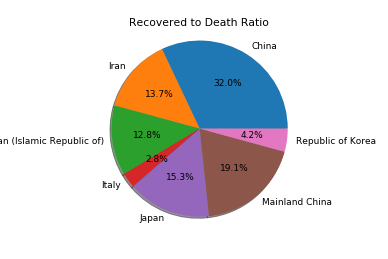

In [91]:
fig=plt.figure()
ax=fig.add_subplot(111)
ratio_data=R_D[(R_D["Sum"]>=1000)]["Ratio"].tolist()
ax.set_title('Recovered to Death Ratio')
ax.pie(np.array(ratio_data)/sum(ratio_data),labels=R_D[(R_D["Sum"]>=1000)]["Ratio"].index.tolist(),shadow=True,autopct='%1.1f%%')
plt.axis('equal')
plt.show()

## DashBoard in Production

In [ ]:
import dash 
import dash_core_components as dcc
import dash_html_components as html
deaths=df_temp


app=dash.Dash()
app.layout=html.Div(children=[html.H1('Dash Tutorial'),
                             dcc.Graph(id='example',
                                      figure={
                                          'data':[{'x':pd.DataFrame(deaths.drop('cummulative_sum',1).loc['Mainland China',:]).index.tolist(),
                                                   'y':deaths.drop('cummulative_sum',1).loc['Mainland China',:].values.tolist()
                                                   ,'type':'line','name':'Deaths in China'},
                                                 ]
                                      ,'layout':{'title':'China DashBoard Practice'}})])


if __name__ == '__main__':
    app.run_server(debug=False)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [16/Mar/2020 01:45:06] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [16/Mar/2020 01:45:07] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [16/Mar/2020 01:45:07] "GET /_dash-dependencies HTTP/1.1" 200 -
